<a href="https://colab.research.google.com/github/somiyagawa/IOSOT2025/blob/main/IOSOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intertextuality Detection by Passim and Visualization by Pandas

Made by So Miyagawa for IOSOT2025; Thanks to the developers of Passim (David Smith and his team)

For Coptic, tokenization by space is strongly recommended.

For automatic tokenization, use [Coptic NLP Service](https://tools.copticscriptorium.org/coptic-nlp/) by Zeldes et al. and replace hyphens/pipes/underscores with space.

In [ ]:
# Process Target text
besa = """
Besa 3:2:3 ⲟⲩⲧⲉ ⲙⲡⲣ ⲧⲛⲧⲛ ⲧⲏⲩⲧⲛ ⲉ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲉⲧ ⲥⲱϣϥ ⲛ ⲛ ⲧⲱϣ ⲙⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲟⲩϫⲁⲓ ⲉⲧⲉⲣⲉ ⲡⲉ ⲭⲥ ⲓⲥ ⲉⲓⲣⲉ ⲙⲙⲟ ⲟⲩ ϩⲓ ⲛⲁⲓ ϩⲛ ⲛⲉϥ ⲧⲟⲡⲟⲥ ⲉ ⲩ ⲥⲱⲧⲉ ⲙⲛ ⲟⲩ ⲥⲙⲓⲛⲉ ⲛ ⲛⲉϥ ϣⲏⲣⲉ ⲙⲛ ⲛⲉϥ ϣⲉⲉⲣⲉ ⲉⲧ ⲟⲩⲉϣ ⲡⲉⲩ ⲟⲩϫⲁⲓ ⲕⲁⲧⲁ ⲡ ⲉⲧ ⲥⲏϩ ϫⲉ ⲁ ϥ ϯ ⲛ ⲟⲩ ⲙⲁⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲉ ⲧⲣⲉ ⲩ ⲡⲱⲧ ϩⲁ ⲑ ⲏ ⲛ ⲟⲩ ⲥⲟⲧⲉ ϫⲉⲕⲁⲥ ⲉⲣⲉ ⲛⲉⲕ ⲙⲉⲣⲓⲧ ⲛ ⲟⲩ ϩⲙ
"""

# Load Source text
psalms = """
Psalms 1:1 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧⲉ ⲙⲡⲉ ϥ ⲃⲱⲕ ϩⲙ ⲡ ϣⲟϫⲛⲉ ⲛ ⲛⲁ ⲥⲉⲃⲏⲥⲙⲡⲉϥ ⲁϩⲉ ⲣⲁⲧ ϥ ϩⲓ ⲧⲉ ϩⲓⲏ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉⲙⲡⲉϥ ϩⲙⲟⲟⲥ ϩⲓ ⲧ ⲕⲁⲑⲉⲇⲣⲁ ⲛ ⲛⲗⲟⲓⲙⲟⲥ
Psalms 1:2 ⲁⲗⲗⲁ ⲉⲣⲉ ⲡⲉϥ ⲟⲩⲱϣ ϣⲟⲟⲡ ϩⲙ ⲡ ⲛⲟⲙⲟⲥ ⲙ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ϥ ⲛⲁ ⲙⲉⲗⲉⲧⲁ ⲙ ⲡⲉϥ ⲛⲟⲙⲟⲥ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲙⲛ ⲧⲉⲩ ϣⲏ
Psalms 1:3 ϥ ⲛⲁ ⲣ ⲑ ⲉ ⲙ ⲡ ϣⲏⲛ ⲉⲧ ⲣⲏⲧ ϩⲓϫⲛ ⲙ ⲙⲁ ⲛ ϩⲁⲧⲉ ⲙⲙⲟⲟⲩ ⲡⲁⲓ ⲉⲧ ⲛⲁ ϯ ⲙ ⲡⲉϥ ⲕⲁⲣⲡⲟⲥ ϩⲙ ⲡⲉϥ ⲟⲩⲟⲉⲓϣ ⲛ ⲛⲉϥ ϭⲱⲃⲉ ⲛⲁ ⲥⲣⲟϥⲣⲉϥ ⲁ ⲛ ϩⲱⲃ ⲛⲓⲙ ⲉⲧ ϥ ⲛⲁ ⲁⲁ ⲩ ⲛⲁ ⲥⲟⲟⲩⲧⲛ
Psalms 1:4 ⲛ ⲧⲁⲓ ⲁⲛ ⲧⲉ ⲑ ⲉ ⲛ ⲛ ⲁⲥⲉⲃⲏⲥ ⲛ ⲧⲁⲓ ⲁⲛ ⲧⲉ ⲑⲉⲁⲗⲗⲁ ⲉ ⲩ ⲛⲁ ⲣ ⲑ ⲉ ⲙ ⲡ ϣⲟⲉⲓϣ ⲉϣⲁⲣⲉ ⲡ ⲧⲏⲩ ⲑⲗⲟ ϥ ⲉⲃⲟⲗ ϩⲓϫⲙ ⲡ ϩⲟ ⲙ ⲡ ⲕⲁϩ
Psalms 1:5 ⲉⲧⲃⲉ ⲡⲁⲓ ⲙⲛ ⲁⲥⲉⲃⲏⲥ ⲛⲁ ⲧⲱⲟⲩⲛ ϩⲛ ⲧⲉⲕⲣⲓⲥⲓⲥⲟⲩⲇⲉ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϩⲛ ⲧ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲛ ⲛⲇⲓⲕⲁⲓⲟⲥ
Psalms 1:6 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲟⲟⲩⲛ ⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲛⲇⲓⲕⲁⲓⲟⲥ ⲧⲉ ϩⲓⲏ ⲇⲉ ⲛ ⲛ ⲁⲥⲉⲃⲏⲥ ⲛ ⲁϩⲉ ⲉⲃⲟⲗ
Psalms 2:0 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲟⲟⲩⲛ ⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲛⲇⲓⲕⲁⲓⲟⲥ ⲧⲉ ϩⲓⲏ ⲇⲉ ⲛ ⲛ ⲁⲥⲉⲃⲏⲥ ⲛ ⲁϩⲉ ⲉⲃⲟⲗ
Psalms 2:1 ⲁϩⲣⲟ ⲟⲩ ⲛ ϩⲉⲑⲛⲟⲥ ⲁ ⲩ ϫⲓⲥⲉ ⲛϩⲏⲧⲁⲛ ⲗⲁⲟⲥ ⲙⲉⲗⲉⲧⲁ ⲛ ϩⲉⲛ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧ
Psalms 2:2 ⲁ ⲩ ⲁϩⲉ ⲣⲁⲧ ⲟⲩ ⲛϭⲓ ⲛ ⲣⲣⲱⲟⲩ ⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲁ ⲛ ⲁⲣⲭⲱⲛ ⲥⲱⲟⲩϩ ⲉ ⲩ ⲙⲁ ⲛ ⲟⲩⲱⲧⲉϯ ⲟⲩⲃⲉ ⲡ ϫⲟⲉⲓⲥ ⲙⲛ ⲡⲉϥ ⲭ︤ⲣ︦ⲥ︥ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 2:3 ⲙⲁⲣ ⲛ ⲥⲱⲗⲡ ⲛ ⲛⲉⲩ ⲙⲣⲣⲉⲛⲧⲛ ⲛⲟⲩϫⲉ ⲙ ⲡⲉⲩ ⲛⲁϩⲃ ⲉⲃⲟⲗ ϩⲓϫⲱⲛ
Psalms 2:4 ⲡ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲙ ⲡ ⲏⲩⲉ ⲛⲁ ⲥⲱⲃⲉ ⲛⲥⲱⲟⲩ ⲁⲩⲱ ⲡ ϫⲟⲉⲓⲥ ⲛⲁⲕⲟⲙϣⲟⲩ
Psalms 2:5 ⲧⲟⲧⲉ ϥ ⲛⲁ ϣⲁϫⲉ ⲛⲙⲙⲁ ⲩ ϩⲛ ⲧⲉϥⲟⲣⲅⲏⲛϥϣⲧⲣⲧⲱⲣ ⲟⲩ ϩⲙ ⲡⲉϥ ϭⲱⲛⲧ
Psalms 2:6 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲩ ⲕⲁⲑⲓⲥⲧⲁ ⲙⲙⲟ ⲓ ⲛ ⲣⲣⲟ ⲉⲃⲟⲗ ϩⲓⲧⲟⲟⲧ ϥⲉϫⲛ ⲥⲓⲱⲛ ⲡⲉ ϥⲧⲟⲟⲩ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 2:7 ⲉ ⲓ ϫⲱ ⲙ ⲡ ⲟⲩⲉϩ ⲥⲁϩⲛⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲉϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲓ ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡⲁϣⲏⲣⲉ ⲁⲛⲟⲕ ⲁ ⲓ ϫⲡⲟ ⲕ ⲙ ⲡⲟⲟⲩ
Psalms 2:8 ⲁⲓⲧⲉⲓ ⲙⲙⲟ ⲓ ⲧⲁ ϯ ⲛⲁ ⲕ ⲛ ϩⲉⲛ ϩⲉⲑⲛⲟⲥ ⲉⲧⲉⲕⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁⲁⲩⲱ ⲡⲉⲕ ⲁⲙⲁϩⲧⲉ ϣⲁ ⲁⲣⲏϫ ϥ ⲙ ⲡ ⲕⲁϩ
Psalms 2:9 ⲕ ⲛⲁ ⲙⲟⲟⲛⲉ ⲙⲙⲟ ⲟⲩ ϩⲛ ⲟⲩ ϭⲉⲣⲱⲃ ⲙ ⲡ ⲉⲛⲓ ⲡⲉⲛⲅⲟⲩⲟϣϥⲟⲩ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ϩⲛⲁⲁⲩ ⲛ ⲕⲉⲣⲁⲙⲉⲩⲥ
Psalms 2:10 ⲧⲉⲛⲟⲩ ϭⲉ ⲛ ⲣⲣⲱⲟⲩ ϯ ϩⲧⲏ ⲧⲛ ϫⲓ ⲥⲃⲱ ⲧⲏⲣ ⲧⲛ ⲛ ⲉⲧ ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲕⲁϩ
Psalms 2:11 ⲁⲣⲓ ϩⲙϩⲁⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩϩⲟⲧⲉⲛ ⲧⲉⲧⲛ ⲧⲉⲗⲏⲗ ⲛⲁ ϥ ϩⲛ ⲟⲩⲥⲧⲱⲧ
Psalms 2:12 ϭⲗϫⲧⲏⲩⲧⲛ ⲛ ⲧⲉ ⲥⲃⲱ ⲙⲏⲡⲟⲧⲉ ⲛⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲟⲩ ϭⲥ ⲛ ⲧⲉⲧⲛ ϩⲉ ⲉⲃⲟⲗ ϩⲓ ⲧⲉ ϩⲓⲏ ⲛⲧⲉϥ ⲙⲛⲧ ⲙⲉⲉⲣϣⲁⲛ ⲡⲉϥ ϭⲱⲛⲧ ⲙⲟⲩϩ ϩⲛ ⲟⲩϭⲉⲡⲏ ⲛⲁ ⲓⲁⲧ ⲟⲩ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉ ⲧ ⲕⲱ ⲛ ϩⲧⲏ ⲩ ⲉⲣⲟϥ
Psalms 2:13
Psalms 3:0
Psalms 3:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲛⲧⲉⲣⲉ ϥ ⲡⲱⲧ ϩⲏⲧ ϥ ⲛⲁⲃⲉⲥⲁⲗⲱⲙ ⲡⲉϥ ϣⲏⲣⲉ
Psalms 3:2 ⲡ ϫⲟⲉⲓⲥ ⲉⲧⲃⲉ ⲟⲩ ⲁ ⲩ ⲁϣⲁⲓ ⲛϭⲓ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲓⲁ ϩⲁϩ ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 3:3 ⲟⲩⲛ ϩⲁϩ ϫⲱ ⲙⲙⲟ ⲥ ⲛ ⲧⲁ ⲯⲩⲭⲏϫⲉ ⲙⲛⲧ ϥ ⲟⲩϫⲁⲓ ⲙⲙⲁⲩ ⲛⲛⲁϩⲣⲙ ⲡⲉϥ ⲛⲟⲩⲧⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 3:4 ⲛⲧⲟⲕ ⲇⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲕ ⲡⲁⲣⲉϥϣⲟⲡⲧ ⲉⲣⲟⲕⲛⲧⲕ ⲡⲁ ⲉⲟⲟⲩ ⲁⲩⲱ ⲉ ⲧ ϫⲓⲥⲉ ⲛ ⲧⲁ ⲁⲡⲉ
Psalms 3:5 ϩⲛ ⲧⲁ ⲥⲙⲏ ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲁ ϥ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲉⲃⲟⲗ ϩⲙ ⲡⲉ ϥⲧⲟⲟⲩ ⲉⲧ ⲟⲩⲁⲁⲃⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 3:6 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ⲛⲕⲟⲧⲕ ⲁⲩⲱ ⲁ ⲓⲱⲃϣⲁ ⲓ ⲧⲱⲟⲩⲛ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ⲛⲁ ϣⲟⲡ ⲧ ⲉⲣⲟϥ
Psalms 3:7 ⲛ ϯ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲁⲛ ϩⲏⲧ ⲟⲩ ⲛ ϩⲉⲛ ⲧⲃⲁ ⲛ ⲗⲁⲟⲥⲉⲩ ϯ ⲟⲩⲃⲏ ⲓ ⲙ ⲡⲁⲕⲱⲧⲉ
Psalms 3:8 ⲧⲱⲟⲩⲛ ⲡ ϫⲟⲉⲓⲥ ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲡⲁⲛⲟⲩⲧⲉϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲛⲧ ⲁ ⲕ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲟ ⲛ ϫⲁϫⲉ ⲉⲣⲟ ⲓ ⲉ ⲡ ϫⲓⲛϫⲏⲛ ⲟⲃϩⲉ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲁⲕⲟⲩⲟϣϥⲟⲩ
Psalms 3:9 ⲡⲁ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲟⲩϫⲁⲓ ⲁⲩⲱ ⲡⲉⲕ ⲟⲩⲱϣ ⲉϫⲙ ⲡⲉⲕ ⲗⲁⲟⲥ
Psalms 4:0 ⲡⲁ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲟⲩϫⲁⲓ ⲁⲩⲱ ⲡⲉⲕ ⲟⲩⲱϣ ⲉϫⲙ ⲡⲉⲕ ⲗⲁⲟⲥ
Psalms 4:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 4:2 ϩⲙ ⲡⲣⲁⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲁ ⲕ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲡ ⲛⲟⲩⲧⲉ ⲛⲧ ⲁ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏϩⲛ ⲧⲉ ⲑⲗⲓⲯⲓⲥ ⲁ ⲕ ⲟⲩⲱϣⲥ ⲛⲁ ⲓ ⲉⲃⲟⲗ ϣⲛ ϩⲧⲏ ⲕ ⲉϫⲱ ⲓ ⲁⲩⲱ ⲛ ⲅ ⲥⲱⲧⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉ ⲡⲁϣⲗⲏⲗⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 4:3 ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ ϣⲁ ⲧ ⲛⲁⲩ ⲛ ⲉⲧ ⲛ ϩⲏⲧ ϩⲟⲣϣ ⲉⲣⲱ ⲧⲛ ⲉⲧⲃⲉ ⲟⲩ ⲧⲉⲧⲛ ⲙⲉ ⲙ ⲡ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧ ⲧⲉⲧⲛ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡϭⲟⲗ
Psalms 4:4 ⲉⲓⲙⲉ ϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ϯ ⲉⲟⲟⲩ ⲙ ⲡⲉϥ ⲡⲉⲧ ⲟⲩⲁⲁⲃⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ϩⲙ ⲡⲣⲁⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟϥ
Psalms 4:5 ⲛ ⲟⲩϭⲥ ⲙⲡⲣ ⲣ ⲛⲟⲃⲉ ⲙⲕⲁϩ ⲛ ϩⲏⲧ ⲉϫⲛ ⲛⲉ ⲧⲉⲧⲛ ϫⲱ ⲙⲙⲟ ⲟⲩ ϩⲛ ⲛⲉⲧⲛ ϩⲏⲧ ϩⲓϫⲛ ⲛⲉⲧⲛ ⲙⲁ ⲛ ⲛⲕⲟⲧⲕ
Psalms 4:6 ϣⲱⲱⲧ ⲛ ⲟⲩ ⲑⲩⲥⲓⲁ ⲛ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲛ ⲧⲉⲧⲛ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 4:7 ϩⲁϩ ⲛ ⲉⲧ ϫⲱ ⲙⲙⲟ ⲥ ϫⲉ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ⲥⲁⲃⲟ ⲛ ⲉ ⲛⲁⲅⲁⲑⲟⲛⲁ ϥ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲉϫⲱ ⲛ ⲛϭⲓ ⲡ ⲟⲩⲟⲉⲓⲛ ⲙ ⲡⲉⲕ ϩⲟ ⲡϫⲟⲉⲓⲥ
Psalms 4:8 ⲁ ⲕ ϯ ⲛ ⲟⲩ ⲟⲩⲛⲟϥ ⲉ ⲡⲁϩⲏⲧ ⲁⲩ ⲁϣⲁⲓ ⲉⲃⲟⲗ ϩⲙ ⲡⲉⲩ ⲕⲁⲣⲡⲟⲥ ⲙ ⲡⲉ ⲥⲟⲩⲟ ⲙⲛ ⲡ ⲏⲣⲡ ⲙⲛ ⲡ ⲛⲉϩ
Psalms 4:9 ⲁⲛⲟⲕ ⲇⲉ ϩⲛ ⲟⲩ ⲉⲓⲣⲏⲛⲏ ϩⲓ ⲟⲩ ⲥⲟⲡ ϯ ⲛⲁ ⲛⲕⲟⲧⲕ ⲛ ⲧⲁ ⲱⲃϣϫⲉ ⲛⲧⲟⲕ ⲙⲁⲩⲁⲁ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲧⲣⲁ ⲟⲩⲱϩ ϩⲛ ⲟⲩϩⲉⲗⲡⲓⲥ
Psalms 5:0 ⲁⲛⲟⲕ ⲇⲉ ϩⲛ ⲟⲩ ⲉⲓⲣⲏⲛⲏ ϩⲓ ⲟⲩ ⲥⲟⲡ ϯ ⲛⲁ ⲛⲕⲟⲧⲕ ⲛ ⲧⲁ ⲱⲃϣϫⲉ ⲛⲧⲟⲕ ⲙⲁⲩⲁⲁ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲧⲣⲁ ⲟⲩⲱϩ ϩⲛ ⲟⲩϩⲉⲗⲡⲓⲥ
Psalms 5:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲧⲉⲧ ⲛⲁ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 5:2 ⲥⲱⲧⲙ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲛⲁ ϣⲁϫⲉ ⲉⲓⲙⲉ ⲉ ⲡⲁⲁϣ ⲕⲁⲕ
Psalms 5:3 ϯ ϩⲧⲏ ⲕ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲥⲟⲡⲥ ⲡⲁ ⲣⲣⲟ ⲁⲩⲱ ⲡⲁⲛⲟⲩⲧⲉϫⲉ ⲉ ⲓ ⲛⲁ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡ ⲛⲁⲩ ⲛ ϩⲧⲟⲟⲩⲉ
Psalms 5:4 ⲕ ⲛⲁ ⲥⲱⲧⲙ ⲉ ⲡⲁϩⲣⲟⲟⲩ ⲙ ⲡ ⲛⲁⲩ ⲛ ϩⲧⲟⲟⲩⲉ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲧⲁⲛⲁⲩ
Psalms 5:5 ϫⲉ ⲛⲧⲕ ⲟⲩ ⲛⲟⲩⲧⲉ ⲉ ⲛⲉϥ ⲟⲩⲉϣⲁⲛⲟⲙⲓⲁ ⲁⲛ ⲁⲩ ⲱ ⲡ ⲉⲧ ⲟ ⲙ ⲡⲟⲛⲏⲣⲟⲥ ⲛⲁ ϭⲱ ϩⲁϩⲧⲏ ⲕ ⲁⲛ
Psalms 5:6 ⲟⲩⲇⲉ ⲙ ⲡⲁⲣⲁⲛⲟⲙⲟⲥ ⲛ ⲁⲙⲟⲩⲛ ⲉⲃⲟⲗ ⲁⲛ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ⲃⲁⲗⲁⲕⲙⲉⲥⲧⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁ
Psalms 5:7 ⲕ ⲛⲁ ⲧⲁⲕⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϫⲱ ⲙ ⲡ ϭⲟⲗ ⲡ ϫⲟⲉⲓⲥ ⲃⲱⲧⲉ ⲛ ⲟⲩ ⲣⲱⲙⲉ ⲛ ⲥⲛⲟϥ ⲁⲩⲱ ⲛ ⲕⲣⲟϥ
Psalms 5:8 ⲁⲛⲟⲕ ⲇⲉ ϩⲙ ⲡ ⲁϣⲁⲓ ⲙ ⲡⲉⲕ ⲛⲁ ϯ ⲛⲁ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲡⲉⲕ ⲙⲁ ⲉⲧ ⲟⲩⲁⲁⲃ ⲧⲁⲟⲩⲱϣⲧ ⲛⲛⲁϩⲣⲙ ⲡⲉⲕ ⲣⲡⲉ ⲉⲧ ⲟⲩⲁⲁⲃ ϩⲛ ⲧⲉⲕ ϩⲟⲧⲉ
Psalms 5:9 ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲉⲧⲃⲉ ⲛⲁϫⲁϫⲉ ⲥⲟⲟⲩⲧⲛ ⲛ ⲧⲉⲕ ϩⲓⲏ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 5:10 ϫⲉ ⲙⲛ ⲙⲉ ϣⲟⲟⲡ ϩⲛ ⲧⲉⲩ ⲧⲁⲡⲣⲟ ⲡⲉⲩ ⲗⲁⲥ ⲙⲛ ⲡⲉⲩ ϩⲏⲧ ϣⲟⲩⲉⲓⲧⲟⲩ ⲧⲁⲫⲟⲥ ⲉ ϥ ⲟⲩⲏⲛ ⲧⲉ ⲧⲉⲩ ϣⲟⲩⲱⲃⲉⲟⲩ ⲙⲁⲧⲟⲩ ⲛ ϩⲟϥ ⲧⲉⲧ ϩⲁ ⲛⲉⲩ ⲥⲡⲟⲧⲟⲩ ⲁ ⲩ ⲣ ⲕⲣⲟϥ ϩⲛ ⲛⲉⲩⲗⲁⲥ
Psalms 5:11 ⲕⲣⲓⲛⲉ ⲙⲙⲟ ⲟⲩ ⲡ ⲛⲟⲩ ⲧⲉ ⲙⲁⲣⲟⲩ ϩⲉ ⲉⲃⲟⲗ ϩⲛ ⲛⲉ ⲩ ϣⲟϫⲛⲉ ⲕⲁⲧⲁ ⲡ ⲁϣⲁⲓ ⲛ ⲛⲉⲩ ⲙⲛⲧ ϣⲁϥⲧⲉ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϫⲉ ⲁ ⲩ ϯ ⲛⲟⲩϭⲥ ⲛⲁ ⲕ ⲡϫⲟⲉⲓⲥ
Psalms 5:12 ⲙⲁⲣ ⲟⲩ ⲉⲩⲫⲣⲁⲛⲉ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲛⲁϩⲧⲉ ⲉⲣⲟⲕⲥⲉ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛ ϣⲁ ⲉⲛⲉϩ ⲛ ⲥⲉ ⲟⲩⲱϩ ϩⲛ ⲟⲩϩⲉⲗⲡⲓⲥⲛⲥⲉ ϣⲟⲩϣⲟⲩ ⲙⲙⲟ ⲟⲩ ⲛϩⲏⲧ ⲕ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲙⲉ ⲙ ⲡⲉⲕ ⲣⲁⲛ
Psalms 5:13 ϫⲉ ⲛⲧⲟⲕ ⲕ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡⲇⲓⲕⲁⲓⲟⲥ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲟⲡⲗⲟⲛ ⲛ ⲟⲩⲱϣ ⲡ ⲉⲛⲧ ⲁ ⲕ ⲁⲁ ϥ ⲛ ⲕⲗⲟⲙ ⲉϫⲱⲛ
Psalms 6:0 ϫⲉ ⲛⲧⲟⲕ ⲕ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡⲇⲓⲕⲁⲓⲟⲥ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲟⲡⲗⲟⲛ ⲛ ⲟⲩⲱϣ ⲡ ⲉⲛⲧ ⲁ ⲕ ⲁⲁ ϥ ⲛ ⲕⲗⲟⲙ ⲉϫⲱⲛ
Psalms 6:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲛ ⲛⲉ ⲥ ⲙⲟⲩ ϩⲁ ⲡ ⲙⲉϩϣⲙⲟⲩⲛ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 6:2 ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣ ϫⲡⲓⲟ ⲓ ϩⲙ ⲡⲉⲕ ϭⲱⲛⲧ ⲟⲩⲇⲉ ⲙⲡⲣ ϯ ⲥⲃⲱ ⲛⲁ ⲓ ϩⲛ ⲧⲉⲕⲟⲣⲅⲏ
Psalms 6:3 ⲛⲁ ⲛⲁ ⲓ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁⲛⲅ ⲟⲩⲁⲥⲑⲉⲛⲏⲥⲙⲁⲧⲁⲗϭⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁ ⲛⲁ ⲕⲉⲉⲥ ϣⲧⲟⲣⲧⲣ
Psalms 6:4 ⲁⲩⲱ ⲁ ⲧⲁ ⲯⲩⲭⲏ ϣⲧⲟⲣⲧⲣ ⲉⲙⲁϣⲟ ⲛⲧⲟⲕ ⲇⲉ ⲡ ϫⲟⲉⲓⲥ ϣⲁⲛⲧⲉ ⲟⲩ ϣⲱⲡⲉ
Psalms 6:5 ⲕⲟⲧ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲙⲁⲧⲟⲩϫⲉ ⲧⲁⲯⲩⲭⲏⲙⲁⲧⲁⲛϩⲟⲓ ⲡ ϫⲟⲉⲓⲥ ⲉⲧⲃⲉ ⲡⲉⲕ ⲛⲁ
Psalms 6:6 ϫⲉ ⲙⲛ ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲙ ⲡⲉⲕ ⲙⲉⲉⲩⲉ ϩⲛ ⲛ ⲉⲧⲙⲟⲟⲩⲧ ⲛⲓⲙ ⲇⲉ ⲡ ⲉⲧ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϩⲛ ⲁⲙⲛⲧⲉ
Psalms 6:7 ⲁ ⲓ ϩⲓⲥⲉ ϩⲙ ⲡⲁⲁϣⲁϩⲟⲙϯⲛⲁ ϫⲱⲕⲙ ⲙ ⲡⲁ ϭⲗⲟϭ ⲕⲁⲧⲁ ⲟⲩϣⲏ ⲟⲩϣⲏ ϯ ⲛⲁ ϩⲱⲣⲡ ⲙ ⲡⲁ ⲡⲣⲏϣ ϩⲛ ⲛⲁⲣⲙⲉⲓⲟⲟⲩⲉ
Psalms 6:8 ⲁ ⲡⲁ ⲃⲁⲗ ϣⲧⲟⲣⲧⲣ ⲉⲃⲟⲗ ϩⲙ ⲡⲣⲓⲙⲉⲁⲓⲱⲥⲕ ϩⲛ ⲛⲁ ϫⲓϫⲉⲉⲩⲉ ⲧⲏⲣⲟⲩ
Psalms 6:9 ⲥⲁϩⲉ ⲧⲏⲩⲧⲛ ⲉⲃⲟⲗ ⲙⲙⲟ ⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧ ⲁⲛⲟⲙⲓⲁ ϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲣⲓⲙⲉ
Psalms 6:10 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉ ⲡⲁⲥⲟⲡⲥⲁ ⲡ ϫⲟⲉⲓⲥ ϣⲉⲡ ⲡⲁ ϣⲗⲏⲗ ⲉⲣⲟϥ
Psalms 6:11 ⲉⲩⲉ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ϣⲧⲟⲣⲧⲣ ⲉⲙⲁⲧⲉ ⲛϭⲓ ⲛⲁ ϫⲁϫⲉ ⲧⲏⲣ ⲟⲩ ⲙⲁⲣⲟⲩ ⲕⲟⲧ ⲟⲩ ⲉ ⲡⲁϩⲟⲩ ⲛ ⲥⲉ ϫⲓ ϣⲓⲡⲉ ⲉⲙⲁⲧⲉ ϩⲛ ⲟⲩϭⲉⲡⲏ
Psalms 7:0 ⲉⲩⲉ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ϣⲧⲟⲣⲧⲣ ⲉⲙⲁⲧⲉ ⲛϭⲓ ⲛⲁ ϫⲁϫⲉ ⲧⲏⲣ ⲟⲩ ⲙⲁⲣⲟⲩ ⲕⲟⲧ ⲟⲩ ⲉ ⲡⲁϩⲟⲩ ⲛ ⲥⲉ ϫⲓ ϣⲓⲡⲉ ⲉⲙⲁⲧⲉ ϩⲛ ⲟⲩϭⲉⲡⲏ
Psalms 7:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡ ⲉⲛⲧ ⲁ ϥ ϫⲟⲟ ϥ ⲉ ⲡ ϫⲟⲉⲓⲥϩⲁ ⲛ ϣⲁϫⲉ ⲛⲭⲟⲩⲥⲉⲓ ⲡ ϣⲏⲣⲉ ⲛⲓⲉⲙⲉⲛⲉⲓ
Psalms 7:2 ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ⲁ ⲓ ⲛⲁϩⲧⲉ ⲉⲣⲟⲕ ⲙⲁⲧⲟⲩϫⲟ ⲓ ⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲡⲏⲧ ⲛⲥⲱ ⲓ ⲁⲩⲱ ⲛ ⲅ ⲛⲁ ϩⲙⲉ ⲧ
Psalms 7:3 ⲙⲏⲡⲟⲧⲉ ⲛ ϥ ⲧⲱⲣⲡ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲟⲩⲓⲉⲙⲛ ⲡⲉⲧ ⲥⲱⲧⲉ ⲁⲩⲱ ⲉ ⲙⲛ ⲡ ⲉⲧⲛⲟⲩϩⲙ
Psalms 7:4 ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ⲉϣϫⲉ ⲁ ⲓ ⲣ ⲡⲁⲓⲉϣϫⲉ ⲟⲩⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ϩⲛ ⲛⲁϭⲓϫ
Psalms 7:5 ⲉϣϫⲉ ⲁ ⲓ ⲧⲱⲱⲃⲉ ⲛ ⲛ ⲉⲧ ⲧⲱⲱⲃⲉ ⲛⲁ ⲓ ⲛ ϩⲉⲛ ⲡⲉⲑⲟⲟⲩⲉⲓⲉϩⲉ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲛⲁ ϫⲁϫⲉ ⲉ ⲓϣⲟⲩⲉⲓⲧ
Psalms 7:6 ⲛⲧⲉ ⲡ ϫⲁϫⲉ ⲡⲱⲧ ⲛ ⲥⲁ ⲧⲁ ⲯⲩⲭⲏ ⲛ ϥ ⲧⲁϩⲟⲥⲛϥϩⲱⲙ ⲙ ⲡⲁ ⲱⲛϩ ⲉϩⲣⲁⲓ ⲉ ⲡ ⲕⲁϩⲛ ϥⲧⲣⲉ ⲡⲁ ⲉⲟⲟⲩ ϣⲱⲡⲉ ϩⲙ ⲡⲉⲭⲟⲩⲥⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 7:7 ⲧⲱⲟⲩⲛ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉⲕⲟⲣⲅⲏϫⲓⲥⲉ ϩⲛ ⲛ ϩⲁⲏ ⲛ ⲛⲁ ϫⲁϫⲉ ⲧⲱⲟⲩⲛ ϩⲙ ⲡ ⲟⲩⲉϩ ⲥⲁϩⲛⲉ ⲉⲛⲧ ⲁ ⲕ ϩⲱⲛ ⲙⲙⲟϥ
Psalms 7:8 ⲁⲩⲱ ⲟⲩⲛ ⲟⲩ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲛ ⲗⲁⲟⲥ ⲛⲁ ⲕⲱⲧⲉ ⲉⲣⲟⲕⲁⲩⲱ ϩⲁ ⲧⲁⲓ ⲕⲟⲧ ⲕ ⲉ ⲩ ϫⲓⲥⲉ
Psalms 7:9 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲛ ⲗⲁⲟⲥ ⲕⲣⲓⲛⲉ ⲙⲙⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲕⲁⲧⲁ ⲧⲁⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ⲕⲁⲧⲁ ⲧⲁ ⲙⲛⲧ ⲃⲁⲗϩⲏⲧ ⲉϩⲣⲁⲓ ⲉϫⲱⲓ
Psalms 7:10 ⲙⲁⲣⲉ ⲥ ⲱϫⲛ ⲛϭⲓ ⲧ ⲡⲟⲛⲏⲣⲓⲁ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉⲁⲩⲱ ⲕ ⲛⲁ ⲥⲟⲟⲩⲧⲛ ⲙ ⲡⲇⲓⲕⲁⲓⲟⲥ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲧ ϩⲉⲧⲁⲍⲉ ⲛ ⲛ ϩⲏⲧ ⲙⲛ ⲛⲉϭⲗⲟⲧⲉ
Psalms 7:11 ⲟⲩ ⲙⲉ ⲧⲉ ⲧⲁ ⲃⲟⲏⲑⲓⲁ ⲛⲛⲁϩⲣⲙ ⲡⲛⲟⲩ ⲧⲉ ⲡ ⲉⲧ ⲛⲟⲩϩⲙ ⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 7:12 ⲡ ⲛⲟⲩⲧⲉ ⲟⲩ ⲕⲣⲓⲧⲏⲥ ⲙ ⲙⲉ ⲡⲉ ⲛ ϫⲱⲱⲣⲉ ⲛ ϩⲁⲣϣϩⲏⲧⲉⲛ ϥ ⲛⲁ ⲉⲓⲛⲉ ⲁⲛ ⲛ ⲧⲉϥ ⲟⲣⲅⲏ ⲙⲙⲏⲛⲉ
Psalms 7:13 ⲉ ⲧⲉⲧⲛ ⲧⲙ ⲕⲉⲧ ⲧⲏⲩⲧⲛ ϥ ⲛⲁ ϫⲱⲣ ⲛ ⲧⲉϥ ⲥⲏϥⲉⲁ ϥ ⲥⲱⲙⲛⲧ ⲛ ⲧⲉϥ ⲡⲓⲧⲉ ⲁ ϥ ⲥⲃⲧⲱⲧⲥ
Psalms 7:14 ⲁ ϥ ⲥⲟⲃⲧⲉ ⲛϩⲏⲧ ⲥ ⲛ ϩⲉⲛ ⲥⲕⲉⲩⲏ ⲙⲙⲟⲩⲛⲉϥ ⲥⲟⲧⲉ ⲁ ϥ ⲧⲁⲙⲓⲟ ⲟⲩ ⲛ ⲛ ⲉⲧ ⲟⲩⲛⲁ ⲣⲟⲕϩⲟⲩ
Psalms 7:15 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲁ ⲡ ϫⲓ ⲛ ϭⲟⲛⲥ ϯ ⲛⲁ ⲁⲕⲉⲁϥⲱ ⲙ ⲡ ϩⲓⲥⲉ ⲁ ϥ ϫⲡ ⲉⲧⲁⲛⲟⲙⲓⲁ
Psalms 7:16 ⲁ ϥ ϣⲉⲕⲧⲟⲩ ϣⲏⲓ ⲁ ϥ ϭⲣⲏ ⲙⲙⲟϥ ϥ ⲛⲁ ϩⲉ ⲉϩⲣⲁⲓ ⲉ ⲡⲉ ϩⲓⲉⲓⲧ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲟϥ
Psalms 7:17 ⲡⲉϥ ϩⲓⲥⲉ ⲛⲁ ⲕⲟⲧ ϥ ⲉϫⲛ ⲧⲉϥ ⲁⲡⲉⲁⲩⲱ ⲡⲉϥ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛⲏⲩ ⲉϫⲛ ⲧ ⲙⲏⲧⲉ ⲛ ϫⲱϥ
Psalms 7:18 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲕⲁⲧⲁ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ϫⲟⲥⲉ
Psalms 8:0 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲕⲁⲧⲁ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ϫⲟ ⲥⲉ
Psalms 8:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲛⲉ ϩⲣⲱⲧ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇ︤ⲁ︦ⲇ︥
Psalms 8:2 ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ϫⲟⲉⲓⲥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϣⲡⲏⲣⲉ ⲡⲉ ⲡⲉⲕ ⲣⲁⲛ ϩⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ϫⲉ ⲁ ⲡⲉⲕ ⲥⲁ ϫⲓⲥⲉ ⲉ ⲧ ⲡⲉ ⲛ ⲙ ⲡⲏⲩⲉ
Psalms 8:3 ⲁ ⲕ ⲥⲟⲃⲧⲉ ⲛ ⲟⲩ ⲥⲙⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲣ ⲱ ⲟⲩ ⲛ ⲛ ϣⲏⲣⲉ ϣⲏⲙ ⲙⲛ ⲛ ⲉⲧ ϫⲓⲉⲕⲓⲃⲉⲉⲧⲃⲉ ⲛⲉⲕ ϫⲁϫⲉ ⲃⲱⲗ ⲉⲃⲟⲗ ⲛ ⲟⲩ ϫⲁϫⲉ ⲙⲛ ⲟⲩⲣⲉϥ ϫⲓⲕⲃⲁ
Psalms 8:4 ϫⲉ ϯ ⲛⲁ ⲛⲁⲩ ⲉ ⲙ ⲡⲏⲩⲉ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉⲕ ⲧⲏⲏⲃⲉ ⲡ ⲟⲟϩ ⲙⲛ ⲛ ⲥⲓⲟⲩ ⲛⲁⲓ ⲛⲧⲟⲕ ⲉⲛⲧ ⲁ ⲕ ⲥⲙⲛ ⲥⲛⲧⲉ ⲙⲙⲟⲟⲩ
Psalms 8:5 ⲟⲩ ⲡⲉ ⲡ ⲣⲱⲙⲉ ϫⲉ ⲕ ⲉⲓⲣⲉ ⲙ ⲡⲉϥ ⲙⲉⲉⲩⲉⲏ ⲡ ϣⲏⲣⲉ ⲙ ⲡ ⲣⲱⲙⲉ ϫⲉ ⲕ ϭⲓⲛⲉ ⲙ ⲡⲉϥ ϣⲓⲛⲉ
Psalms 8:6 ⲁ ⲕ ⲧⲥⲃⲕⲟ ϥ ⲛ ⲟⲩ ⲕⲟⲩⲓ ⲡⲁⲣⲁ ⲛⲁⲅⲅⲉⲗⲟⲥ ⲟⲩ ⲉⲟⲟⲩ ⲙⲛ ⲟⲩ ⲧⲁⲓⲟ ⲁ ⲕ ⲁⲁ ⲩ ⲛ ⲕⲗⲟⲙ ⲉϫⲱϥ
Psalms 8:7 ⲁ ⲕ ⲕⲁⲑⲓⲥⲧⲁ ⲙⲙⲟ ϥ ⲉϫⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩ ⲛ ⲛⲉⲕ ϭⲓϫⲁⲕⲕⲁⲛⲕⲁ ⲛⲓⲙ ϩⲁ ⲛⲉϥ ⲟⲩⲉⲣⲏⲧⲉ
Psalms 8:8 ⲛ ⲉⲥⲟⲟⲩ ⲙⲛ ⲛⲉ ϩⲟⲟⲩ ⲧⲏⲣ ⲟⲩ ⲁⲩⲱ ⲛ ⲕⲉ ⲧⲃⲛⲟⲟⲩⲉ ⲛ ⲧ ⲥⲱϣⲉ
Psalms 8:9 ⲙⲛ ⲛ ϩⲁⲗⲁⲧⲉ ⲛ ⲧ ⲡⲉ ⲙⲛ ⲛ ⲧⲃⲧ ⲛ ⲑⲁⲗⲁⲥⲥⲁ ⲛ ⲉⲧ ⲙⲟⲟϣⲉ ϩⲓ ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲛ ⲛⲉⲑⲁⲗⲁⲥⲥⲁ
Psalms 8:10 ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ϫⲟⲉⲓⲥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϣⲡⲏⲣⲉ ⲡⲉ ⲡⲉⲕ ⲣⲁⲛ ϩⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 9:0 ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ϫⲟⲉⲓⲥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϣⲡⲏⲣⲉ ⲡⲉ ⲡⲉⲕ ⲣⲁⲛ ϩⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 9:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲛ ⲉⲑ ⲏⲡ ⲙ ⲡ ϣⲏⲣⲉ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ
Psalms 9:2 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲁ ϩⲏⲧ ⲧⲏⲣ ϥ ϯⲛⲁ ϫⲱ ⲛ ⲛⲉⲕ ϣⲡⲏⲣⲉ ⲧⲏⲣⲟⲩ
Psalms 9:3 ϯ ⲛⲁ ⲟⲩⲛⲟϥ ⲛ ⲧⲁ ⲧⲉⲗⲏⲗ ⲉϩⲣⲁⲓ ⲛ ϩⲏⲧ ⲕ ϯⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡ ⲉⲧ ϫⲟ ⲥⲉ
Psalms 9:4 ϩⲙ ⲡ ⲧⲣⲉ ⲡⲁ ϫⲁϫⲉ ⲕⲟⲧ ϥ ⲉ ⲡⲁϩⲟⲩ ⲥⲉⲛⲁ ϭⲃⲃⲉ ⲛ ⲥⲉ ϩⲉ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 9:5 ϫⲉ ⲁ ⲕ ⲉⲓⲣⲉ ⲙ ⲡⲁ ϩⲁⲡ ⲙⲛ ⲡⲁⲕⲃⲁⲁ ⲕ ϩⲙⲟⲟⲥ ϩⲓ ⲡⲉⲕ ⲑⲣⲟⲛⲟⲥ ⲡ ⲉⲧ ⲕⲣⲓⲛⲉ ⲛ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 9:6 ⲁ ⲕ ⲉⲡⲓⲧⲓⲙⲁ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲁ ϥ ⲧⲁⲕⲟ ⲛϭⲓ ⲡⲁⲥⲉⲃⲏⲥⲁⲕϥⲉⲧ ⲡⲉⲩ ⲣⲁⲛ ⲉⲃⲟⲗ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 9:7 ⲁ ⲛ ⲥⲏϥⲉ ⲙ ⲡ ϫⲁϫⲉ ⲱϫⲛ ⲉ ⲡ ⲧⲏⲣ ϥ ⲁ ⲕ ϣⲟⲣϣⲣ ⲛ ⲙ ⲡⲟⲗⲓⲥⲁ ⲡⲉⲩ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲧⲁⲕⲟ ϩⲛ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ
Psalms 9:8 ⲡ ϫⲟⲉⲓⲥ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉ ϩⲁ ϥ ⲥⲟⲃⲧⲉ ⲙ ⲡⲉϥ ⲑⲣⲟⲛⲟⲥ ϩⲛ ⲟⲩϩⲁⲡ
Psalms 9:9 ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ϩⲛ ⲟⲩⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏϥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲛ ⲗⲁⲟⲥ ϩⲛ ⲟⲩⲥⲟⲟⲩⲧⲛ
Psalms 9:10 ⲁ ⲡ ϫⲟⲉⲓⲥ ϣⲱⲡⲉ ⲙ ⲙⲁ ⲙ ⲡⲱⲧ ⲙ ⲡ ϩⲏⲕⲉ ⲛ ⲃⲟⲏⲑⲟⲥ ϩⲙ ⲡⲉ ⲟⲩⲟⲉⲓϣ ⲛ ⲧⲉⲑⲗⲓⲯⲓⲥ
Psalms 9:11 ⲙⲁⲣ ⲟⲩ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟ ⲕ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉ ⲧ ⲥⲟⲟⲩⲛ ⲙ ⲡⲉⲕ ⲣⲁⲛϫⲉ ⲙⲡⲉ ⲕ ⲕⲱ ⲛⲥⲱ ⲕ ⲛ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛⲥⲱ ⲕ ⲡϫⲟⲉⲓⲥ
Psalms 9:12 ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲥⲓⲱⲛ ϫⲱ ⲛ ⲛⲉϥ ϩⲃⲏⲩⲉ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥ
Psalms 9:13 ϫⲉ ⲉ ϥ ϣⲓⲛⲉ ⲁ ϥ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛⲉⲩ ⲥⲛⲱⲱϥⲁⲩⲱ ⲙⲡ ϥ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡ ⲁϣ ⲕⲁⲕ ⲛ ⲛ ϩⲏⲕⲉ
Psalms 9:14 ⲛⲁ ⲛⲁ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲁⲛⲁⲩ ⲉ ⲡⲁ ⲑⲃⲃⲓⲟ ⲉⲃⲟⲗ ϩⲛ ⲛⲁϫⲁϫⲉⲡ ⲉⲧ ϫⲓⲥⲉ ⲙⲙⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲙ ⲡⲩⲗⲏ ⲙ ⲡ ⲙⲟⲩ
Psalms 9:15 ϫⲉⲕⲁⲥ ⲉⲓⲉ ϫⲱ ⲛ ⲛⲉⲕ ⲥⲙⲟⲩ ⲧⲏⲣ ⲟⲩϩⲛ ⲙ ⲡⲩⲗⲏ ⲛ ⲧ ϣⲉⲉⲣⲉ ⲛ ⲥⲓⲱⲛϯ ⲛⲁ ⲧⲉⲗⲏⲗ ⲉϫⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ
Psalms 9:16 ⲁ ⲩ ⲧⲱⲗⲥ ⲛϭⲓ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲙ ⲡ ⲧⲁⲕⲟ ⲛⲧ ⲁ ⲩ ⲁⲁϥ ϩⲙ ⲡⲉⲓ ⲡⲁϣ ⲉⲛⲧ ⲁ ⲩ ϩⲟⲡ ϥ ⲙⲁⲣ ⲟⲩ ϭⲱⲡⲉ ⲛ ⲧⲉⲩ ⲟⲩⲉⲣⲏⲧⲉ
Psalms 9:17 ⲡ ϫⲟⲉⲓⲥ ⲟⲩⲟⲛϩ ⲉⲃⲟⲗ ⲉ ϥ ⲉⲓⲣⲉ ⲛ ⲛ ϩⲁⲡ ⲙⲁⲣⲟⲩ ϭⲱⲡⲉ ⲙ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϩⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉϥ ϭⲓϫ ⲧⲱⲇⲏⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 9:18 ⲙⲁⲣⲉ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲕⲟⲧ ⲟⲩ ⲉ ⲁⲙⲛⲧⲉⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ⲉⲧ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡⲛⲟⲩ ⲧⲉ
Psalms 9:19 ϫⲉ ⲛ ⲥⲉ ⲛⲁ ⲣ ⲡ ⲱⲃϣ ⲁⲛ ⲙ ⲡ ϩⲏⲕⲉ ϣⲁⲃⲟⲗ ⲑⲩⲡⲟⲙⲟⲛⲏ ⲙ ⲡ ⲉⲃⲓⲏⲛ ⲛ ⲁϩⲉ ⲉⲃⲟⲗ ⲁⲛ ϣⲁ ⲡⲧⲏⲣϥ
Psalms 9:20 ⲧⲱⲟⲩⲛ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣⲧⲣⲉ ⲡ ⲣⲱⲙⲉ ϭⲙϭⲟⲙ ⲙⲁⲣⲟⲩ ⲕⲣⲓⲛⲉ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 9:21 ⲥⲙⲓⲛⲉ ⲛⲁ ⲩ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲟⲩ ⲣⲉϥ ⲥⲙⲛⲛⲟⲙⲟⲥⲙⲁⲣⲉ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ⲉⲓⲙⲉ ϫⲉ ϩⲉⲛ ⲣⲱⲙⲉ ⲛⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 9:22 ⲉⲧⲃⲉ ⲟⲩ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲟⲩⲉ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲛⲁⲕⲟⲃϣ ⲕ ϩⲙ ⲡⲉ ⲟⲩⲟⲉⲓϣ ⲛ ⲛⲉⲑⲗⲓⲯⲓⲥ
Psalms 9:23 ϩⲙ ⲡ ⲧⲣⲉ ⲡ ⲁⲥⲉⲃⲏⲥ ϫⲓⲥⲉ ⲙⲙⲟ ϥ ϣⲁⲣⲉ ⲡ ϩⲏⲕⲉ ϫⲉ ⲣⲟⲥⲉⲛⲁ ϭⲟⲡ ⲟⲩ ϩⲛ ⲛⲉ ⲩ ϣⲟϫⲛⲉ ⲉⲧ ⲟⲩ ⲙⲉⲉⲩⲉ ⲉⲣⲟ ⲟⲩ
Psalms 9:24 ϫⲉ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲥⲉ ⲧⲁⲉⲓⲟ ⲙⲙⲟ ϥ ϩⲛ ⲛ ⲉⲡⲓⲑⲩⲙⲓⲁ ⲛⲧⲉϥ ⲯⲩⲭⲏⲁⲩⲱ ⲡ ⲉⲧ ϫⲓ ⲛ ϭⲟⲛⲥ ⲥⲉ ⲥⲙⲟⲩ ⲉⲣⲟϥ
Psalms 9:25 ⲁ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϯ ⲛⲟⲩϭⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲕⲁⲧⲁ ⲡ ⲁϣⲁⲓ ⲛ ⲧⲉϥ ⲟⲣⲅⲏ ⲛ ϥ ⲛⲁ ϣⲓⲛⲉ ⲁ ⲛ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ⲁⲛ
Psalms 9:26 ⲛⲉϥ ϩⲓⲟⲟⲩⲉ ⲥⲟϣ ϥ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙⲁ ϥ ϥⲓ ⲛ ⲛⲉⲕ ϩⲁⲡ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ϥ ⲛⲁ ⲣ ϫⲟⲉⲓⲥ ⲉ ⲛⲉϥ ϫⲁϫⲉ ⲧⲏⲣⲟⲩ
Psalms 9:27 ⲁ ϥ ϫⲟⲟ ⲥ ⲅⲁⲣ ϩⲙ ⲡⲉϥ ϩⲏⲧ ϫⲉ ⲛ ϯ ⲛⲁ ⲕⲓⲙ ⲁ ⲛ ϫⲓ ⲛ ⲟⲩ ϫⲱⲙ ϣⲁ ⲟⲩ ϫⲱⲙ ⲁϫⲛ ⲡⲉⲑⲟⲟⲩ
Psalms 9:28 ⲡⲁⲓ ⲉⲣⲉ ⲧⲉϥ ⲧⲁⲡⲣⲟ ⲙⲉϩ ⲛ ⲥⲁϩⲟⲩ ϩⲓ ⲥⲓ ϣⲉ ϩⲓ ⲕⲣⲟϥⲟⲩϩⲓⲥⲉ ⲙⲛ ⲟⲩ ⲙⲕⲁϩ ⲡ ⲉⲧ ϩⲁ ⲡⲉϥ ⲗⲁⲥ
Psalms 9:29 ϥ ϩⲙⲟⲟⲥ ϩⲛ ⲙ ⲙⲁ ⲛ ϭⲱⲣϭ ⲙⲛ ⲛ ⲣⲙ ⲙⲁⲟⲁⲩⲱ ϩⲛ ⲙ ⲙⲁ ⲉⲧ ϩⲏⲡ ⲉ ⲙⲟⲩⲟⲩⲧ ⲛ ⲟⲩⲁⲧⲛⲟⲃⲉⲉⲣⲉ ⲛⲉϥ ⲃⲁⲗ ϭⲱϣⲧ ⲉ ⲡ ϩⲏⲕⲉ
Psalms 9:30 ϥ ϭⲟⲣϭ ϩⲛ ⲟⲩ ⲡ ⲉⲧ ϩⲏⲡ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲟⲩⲓ ϩⲙ ⲡⲉϥ ⲃⲏⲃⲉⲧⲱⲣⲡ ⲛ ⲟⲩ ϩⲏⲕⲉ ϩⲙ ⲡⲧⲣⲉ ϥ ⲥⲟⲕϥ
Psalms 9:31 ϥ ⲛⲁ ⲑⲃⲃⲓⲟ ϥ ϩⲛ ⲧⲉϥ ϭⲟⲣϭⲥ ϥ ⲛⲁ ⲡⲁϩⲧ ϥ ⲛ ϥ ϩⲉ ϩⲙ ⲡ ⲧⲣⲉ ϥ ⲣ ϫⲟⲉⲓⲥ ⲉ ⲛ ϩⲏⲕⲉ
Psalms 9:32 ⲁ ϥ ϫⲟⲟ ⲥ ⲅⲁⲣ ϩⲙ ⲡⲉϥ ϩⲏⲧ ϫⲉ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲣ ⲡⲱⲃϣⲁ ϥ ⲕⲧⲉ ⲡⲉϥ ϩⲟ ⲉⲃⲟⲗ ⲉ ⲧⲙ ϭⲱϣⲧ ⲉ ⲡⲧⲏⲣϥ
Psalms 9:33 ⲧⲱⲟⲩⲛ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲙⲁⲣⲉ ⲥ ϫⲓⲥⲉ ⲛϭⲓ ⲧⲉⲕ ϭⲓϫⲙⲡⲣⲣⲡ ⲱⲃϣ ⲛ ⲛ ϩⲏⲕⲉ
Psalms 9:34 ⲉⲧⲃⲉ ⲟⲩ ⲁ ⲡ ⲁⲥⲉⲃⲏⲥ ϯ ⲛⲟⲩϭⲥ ⲙⲡⲛⲟⲩⲧⲉ ⲁ ϥ ϫⲟⲟ ⲥ ⲅⲁⲣ ϩⲙ ⲡⲉϥ ϩⲏⲧ ϫⲉ ⲛ ⲅ ⲛⲁ ϣⲓⲛⲉ ⲁⲛ
Psalms 9:35 ⲕ ⲛⲁⲩ ϫⲉ ⲛⲧⲟⲕ ⲉⲧ ϯ ⲛ ϩⲧⲏⲕ ⲉ ⲩ ϩⲓⲥⲉ ⲙⲛ ⲟⲩϭⲱⲛⲧⲉ ⲧⲣⲉ ⲩ ⲧⲁⲁ ⲩ ⲉϩⲣⲁⲓ ⲉ ⲛⲉⲕ ϭⲓϫⲉⲣⲉ ⲡ ϩⲏⲕⲉ ⲛⲁ ⲛⲟϫ ϥ ⲉⲣⲟⲕ ⲛⲧⲟⲕ ⲉ ⲧ ⲃⲟⲏⲑⲉⲓ ⲉ ⲡⲟⲣⲫⲁⲛⲟⲥ
Psalms 9:36 ⲟⲩⲱϣ ϥ ⲙ ⲡⲉ ϭⲃⲟⲓ ⲙ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲙⲛ ⲡⲡⲟⲛⲏⲣⲟⲥ ⲥⲉⲛⲁ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲉϥ ⲛⲟⲃⲉ ⲛ ⲥⲉ ⲧⲙ ϩⲉ ⲉⲣⲟ ϥ ⲉⲧⲃⲏⲏⲧ ϥ
Psalms 9:37 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲣ ⲣⲣⲟ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ ⲛ ϩⲉⲑⲛⲟⲥ ⲧ ⲉⲧ ⲛⲁ ϥⲱⲧⲉ ⲉⲃⲟⲗ ϩⲙ ⲡⲉϥ ⲕⲁϩ
Psalms 9:38 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉ ⲡ ⲟⲩⲱϣ ⲛ ⲛ ϩⲏⲕⲉ ⲁⲡⲉϥ ⲙⲁⲁϫⲉ ϯ ϩⲧⲏϥ ⲉ ⲡ ⲥⲟⲃⲧⲉ ⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 9:39 ⲉ ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲟⲣⲫⲁⲛⲟⲥ ⲙⲛ ⲡ ⲉⲧ ⲑⲃⲃⲓⲏⲩϫⲉ ⲛⲛⲉ ⲡ ⲣⲱⲙⲉ ⲟⲩⲱϩ ⲉⲧⲟⲟⲧ ϥ ⲉ ϣⲟⲩϣⲟⲩ ⲙⲙⲟ ϥ ϩⲓϫⲙ ⲡ ⲕⲁϩ
Psalms 9:40
Psalms 10:0
Psalms 10:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇⲁⲓⲛⲁϩⲧⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲁϣ ⲛ ϩⲉ ⲧⲉⲧⲛ ⲁ ϫⲟⲟ ⲥ ⲛⲧ ⲁ ⲯⲩⲭⲏϫⲉ ⲡⲱⲱⲛⲉ ⲉⲃⲟⲗ ⲉϫⲛ ⲛⲧⲟⲟⲩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϫⲁϫ
Psalms 10:2 ϫⲉ ⲉⲓⲥ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲁ ⲩ ⲥⲱⲙⲛⲧ ⲛ ⲧⲉⲩ ⲡⲓⲧⲉ ⲁⲩ ⲥⲟⲃⲧⲉ ⲛ ⲛⲉⲩ ⲥⲟⲧⲉ ⲉ ⲡⲉⲩ ϩⲛⲁⲁⲩ ⲛ ϯ ⲥⲟⲧⲉⲉⲛⲉϫⲥⲟⲧⲉ ϩⲙ ⲡ ϩⲱⲡ ⲉ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 10:3 ϫⲉ ⲛ ⲉⲛⲧ ⲁ ⲕ ⲥⲃⲧⲱⲧ ⲟⲩ ⲁ ⲩ ⲧⲁⲩⲟ ⲟⲩ ⲉϩⲣⲁⲓ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲇⲉ ⲛⲧ ⲁ ϥ ⲣ ⲟⲩ
Psalms 10:4 ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲉϥ ⲣⲡⲉ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡ ϫⲟⲉⲓⲥ ⲉⲣⲉ ⲡⲉϥ ⲑⲣⲟⲛⲟⲥ ϩⲛ ⲧⲡⲉ ⲛⲉϥ ⲃⲁⲗ ϭⲱϣⲧ ⲉϫⲛ ⲧⲟⲓⲕⲟⲩⲙⲉⲛⲏⲛⲉϥ ⲃⲟⲩϩⲉ ϫⲛⲟ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 10:5 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϫⲛⲉ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲙⲛ ⲡⲁⲥⲉⲃⲏⲥ ⲡⲉⲧ ⲙⲉ ⲇⲉ ⲙ ⲡ ϫⲓ ⲛ ϭⲟⲛⲥ ϥ ⲙⲟⲥⲧⲉ ⲛ ⲧⲉϥ ⲯⲩⲭⲏ ⲙⲁⲩⲁⲁ ϥ
Psalms 10:6 ϥ ⲛⲁ ϩⲱⲟⲩ ⲉϫⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛ ϩⲉⲛ ⲡⲁϣⲟⲩ ⲕⲱϩⲧ ⲙⲛ ⲟⲩ ⲑⲏⲛ ⲙⲛ ⲟⲩ ⲡ︤ⲛ︦ⲁ︥ ⲛ ϩⲁ ⲧⲏⲩ ⲧⲉ ⲧ ⲙⲉⲣⲓⲥ ⲙ ⲡⲉⲩ ϫⲱ
Psalms 10:7 ϫⲉ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲁⲩⲱ ⲁ ϥ ⲙⲉⲣⲉ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲡⲉϥ ϩⲟ ⲛⲁ ⲩ ⲉ ⲡ ⲥⲟⲟⲩⲧⲛ
Psalms 10:8
Psalms 11:0
Psalms 11:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲡⲙⲉϩϣⲙⲟⲩⲛ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 11:2 ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲱϫⲛ ϫⲉ ⲁ ⲙ ⲙⲛⲧ ⲙⲉ ⲥⲃⲟ ⲕ ⲉⲃⲟⲗ ϩⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 11:3 ⲁ ⲡ ⲟⲩⲁ ⲡ ⲟⲩⲁ ϣⲁϫⲉ ⲛ ϩⲉⲛ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧ ⲛⲛⲁϩⲣⲙ ⲡ ⲉⲧ ϩⲓⲧⲟⲩⲱϥϩⲉⲛ ⲥⲡⲟⲧⲟⲩ ⲛ ⲕⲣⲟϥ ϩⲛ ⲟⲩ ϩⲏⲧ ⲁⲩⲱ ⲁ ϥ ϣⲁϫⲉ ϩⲙ ⲡⲉϥ ϩⲏⲧ
Psalms 11:4 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲛ ⲥⲡⲟⲧⲟⲩ ⲛⲓⲙ ⲛ ⲕⲣⲟϥⲁⲩⲱ ⲟⲩ ⲗⲁⲥ ⲛ ⲣⲉϥ ϫⲉⲛⲟϭ ⲛ ϣⲁϫⲉ
Psalms 11:5 ⲛ ⲉⲛⲧ ⲁ ⲩ ϫⲟⲟ ⲥ ϫⲉ ⲧⲛ ⲛⲁ ϫⲓⲥⲉ ⲙ ⲡⲉⲛ ⲗⲁⲥ ⲛⲉⲛ ⲥⲡⲟⲧⲟⲩ ϩⲉⲛ ⲉⲃⲟⲗ ϩⲓⲧⲟⲟⲧ ⲛ ⲛⲉ ⲛⲓⲙ ⲡ ⲉⲧ ⲟ ⲛ ϫⲟⲉⲓⲥ ⲉⲣⲟⲛ
Psalms 11:6 ⲉⲧⲃⲉ ⲧ ⲧⲁⲗⲁⲓⲡⲱⲣⲓⲁ ⲛ ⲛ ϩⲏⲕⲉ ⲙⲛ ⲡ ⲁϣ ⲁϩⲟⲙ ⲛ ⲛⲉⲃⲓⲏⲛ ⲡⲉϫⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲧⲉⲛⲟⲩ ϯ ⲛⲁ ⲧⲱⲟⲩⲛ ϯ ⲛⲁ ⲕⲱ ⲉϩⲣⲁⲓ ⲛ ⲟⲩ ⲟⲩϫⲁⲓ ⲛ ⲧⲁ ⲡⲁⲣⲣⲏⲥⲓⲁⲍⲉ ⲙⲙⲟ ⲓ ⲛ ϩⲏⲧ ϥ
Psalms 11:7 ⲛ ϣⲁϫⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲉⲛ ϣⲁϫⲉ ⲉ ⲩ ⲟⲩⲁⲁⲃ ⲛⲉ ⲟⲩ ϩⲁⲧ ⲉ ϥ ⲡⲏⲥⲉ ⲉ ϥ ⲥⲟⲧⲡ ⲉ ⲁ ⲩ ⲧⲃⲃⲟ ϥ ϩⲙ ⲡ ⲕⲁϩⲛ ⲥⲁϣϥ ⲛ ⲥⲟⲡ
Psalms 11:8 ⲛⲧⲟⲕ ⲇⲉ ⲡ ϫⲟⲉⲓⲥ ⲕ ⲛⲁ ϩⲁⲣⲉϩ ⲉⲣⲟⲛⲁⲩⲱ ⲕ ⲛⲁ ⲧⲟⲩϫⲟ ⲛ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲓ ⲅⲉⲛⲉⲁ ϣⲁ ⲉⲛⲉϩ
Psalms 11:9 ⲛ ⲁⲥⲉⲃⲏⲥ ⲛⲁ ⲙⲟⲟϣⲉ ⲉ ⲩ ⲥⲟⲟⲩϩⲕⲁⲧⲁ ⲡⲉⲕ ϫⲓⲥⲉ ⲁ ⲕ ⲧⲁϣⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 12:0 ⲛ ⲁⲥⲉⲃⲏⲥ ⲛⲁ ⲙⲟⲟϣⲉ ⲉ ⲩ ⲥⲟⲟⲩϩⲕⲁⲧⲁ ⲡⲉⲕ ϫⲓⲥⲉ ⲁ ⲕ ⲧⲁϣⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 12:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 12:2 ϣⲁ ⲧ ⲛⲁⲩ ⲡ ϫⲟⲉⲓⲥ ⲕ ⲛⲁ ⲣ ⲡⲁ ⲱⲃϣ ϣⲁⲃⲟⲗ ϣⲁ ⲧ ⲛⲁⲩ ⲕ ⲛⲁ ⲕⲱⲧⲉ ⲙ ⲡⲉⲕ ϩⲟ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲓ
Psalms 12:3 ϣⲁ ⲧ ⲛⲁⲩ ϯ ⲛⲁ ⲕⲱ ⲛ ϩⲉⲛ ϣⲟϫⲛⲉ ϩⲛ ⲧⲁⲯⲩⲭⲏϩⲉⲛ ⲗⲩⲡⲏ ϩⲙ ⲡⲁ ϩⲏⲧ ⲙ ⲡⲉϩⲟⲟⲩϣⲁ ⲧ ⲛⲁⲩ ⲡⲁ ϫⲁϫⲉ ⲛⲁ ϫⲓⲥⲉ ⲙⲙⲟ ϥ ⲉϩⲣⲁⲓ ⲉϫⲱⲓ
Psalms 12:4 ⲕⲟⲧ ⲕ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲡⲁⲛⲟⲩⲧⲉⲁⲣⲓⲟⲩⲟⲉⲓⲛ ⲉ ⲛⲁⲃⲁⲗ ⲙⲏⲡⲟⲧⲉ ⲛ ⲧⲁ ⲱⲃϣ ⲉ ⲡ ⲙⲟⲩ
Psalms 12:5 ⲙⲏⲡⲟⲧⲉ ⲛⲧⲉ ⲡⲁ ϫⲁϫⲉ ϫⲟⲟ ⲥ ϫⲉ ⲁ ⲓ ϭⲙϭⲟⲙ ⲉⲣⲟ ϥ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟ ⲓ ⲛⲁ ⲧⲉⲗⲏⲗ ⲉⲓϣⲁⲛ ⲕⲓⲙ
Psalms 12:6 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡⲉⲕ ⲛⲁ ⲡⲁ ϩⲏⲧ ⲛⲁ ⲧⲉⲗⲏⲗ ⲉϫⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ ϯ ⲛⲁ ϫⲱ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲣ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲛⲁⲓ ⲁⲩⲱ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ϫⲟ ⲥⲉ
Psalms 13:0 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡⲉⲕ ⲛⲁ ⲡⲁ ϩⲏⲧ ⲛⲁ ⲧⲉⲗⲏⲗ ⲉϫⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ ϯ ⲛⲁ ϫⲱ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲣ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲛⲁⲓ ⲁⲩⲱ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ϫⲟ ⲥⲉ
Psalms 13:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡⲉϫⲉ ⲡ ⲁⲧ ϩⲏⲧ ϩⲙ ⲡⲉϥ ϩⲏⲧ ϫⲉ ⲙⲛ ⲛⲟⲩⲧⲉ ϣⲟⲟⲡⲁⲩ ⲧⲁⲕⲟ ⲁ ⲩ ⲥⲱⲱϥ ϩⲛ ⲛⲉ ⲩ ⲙⲉⲉⲩⲉ ⲙⲛ ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲙⲙⲛ ⲟⲩⲟⲛ ϣⲁϩⲣⲁⲓ ⲉ ⲟⲩⲁ
Psalms 13:2 ⲁ ⲡ ϫⲟⲉⲓⲥ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉ ⲉϫⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉⲉ ⲛⲁⲩ ϫⲉ ⲟⲩⲛ ⲗⲁⲁⲩ ⲛ ⲥⲁⲃⲉ ⲉ ϥ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲛⲟⲩⲧⲉ
Psalms 13:3 ⲁ ⲩ ⲣⲓⲕⲉ ⲉⲃⲟⲗ ⲧⲏⲣ ⲟⲩ ⲁ ⲩ ⲣⲁⲧϣⲁⲩ ϩⲓ ⲟⲩⲥⲟⲡ ⲙⲙⲛ ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲙⲛ ⲟⲩⲟⲛ ϣⲁϩⲣⲁⲓ ⲉ ⲟⲩⲁⲟⲩ ⲧⲁⲫⲟⲥ ⲉ ϥ ⲟⲩⲏⲛ ⲧⲉ ⲧⲉⲩ ϣⲟⲩⲱⲃⲉⲁⲩⲣⲕⲣⲟϥ ϩⲛ ⲛⲉ ⲩ ⲗⲁⲥⲟⲩ ⲙⲁⲧⲟⲩ ⲛ ϩⲟϥ ⲧⲉⲧ ϩⲁ ⲛⲉⲩ ⲥⲡⲟⲧⲟⲩⲉⲣⲉⲧⲉⲩ ⲧⲁⲡⲣⲟ ⲙⲉϩ ⲛ ⲥⲁϩⲟⲩ ϩⲓ ⲥⲓϣⲉ ⲛⲉⲩ ⲟⲩⲉⲣⲏⲧⲉ ϭⲉⲡⲏ ⲉ ⲡⲉⲛ ⲥⲛⲟϥ ⲉⲃⲟⲗⲟⲩ ⲟⲩⲱϣϥ ⲙⲛ ⲟⲩ ⲧⲁⲗⲁⲓⲡⲱⲣⲓⲁ ⲛ ⲉⲧ ϩⲓ ⲛⲉ ⲩ ϩⲓⲟⲟⲩⲉ ⲧⲉ ϩⲓⲏ ⲛ ϯ ⲣⲏⲛⲏ ⲙⲡ ⲟⲩ ⲥⲟⲩⲱⲛⲥⲛ ⲧ ϩⲟⲧⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲛ ⲛⲉⲩ ⲃⲁⲗ ⲉⲃⲟⲗ ⲁⲛ
Psalms 13:4 ⲙⲏ ⲛ ⲥⲉ ⲛⲁ ⲉⲓⲙⲉ ⲧⲏⲣ ⲟⲩ ⲁⲛ ⲛϭⲓ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁ ⲛ ⲉⲧ ⲟⲩⲱⲙ ⲙ ⲡⲁ ⲗⲁⲟⲥ ⲛ ⲟⲩ ϩⲣⲉ ⲛ ⲟⲉⲓⲕ ⲙⲡ ⲟⲩ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ ⲡϫⲟⲉⲓⲥ
Psalms 13:5 ⲁ ⲩ ⲣ ϩⲟⲧⲉ ⲙⲙⲁⲩ ϩⲛ ⲟⲩ ϩⲟⲧⲉ ϩⲙ ⲡ ⲙⲁ ⲉⲧⲉ ⲙⲛ ϩⲟⲧⲉ ⲛϩⲏⲧ ϥϫⲉ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲟⲩ ⲅⲉⲛⲉⲁ ⲛⲇⲓⲕⲁⲓⲟⲥ
Psalms 13:6 ⲁ ⲧⲉⲧⲛ ϯ ϣⲓⲡⲉ ⲙ ⲡ ϣⲟϫⲛⲉ ⲙ ⲡ ϩⲏⲕⲉ ⲡ ϫⲟⲉⲓⲥ ⲇⲉ ⲡⲉ ⲧⲉϥ ϩⲉⲗⲡⲓⲥ
Psalms 13:7 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϯ ⲉⲃⲟⲗ ϩⲛ ⲥⲓⲱⲛ ⲙ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ϩⲙ ⲡ ⲧⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲕⲧⲉ ⲧ ⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁ ⲙ ⲡⲉϥ ⲗⲁⲟⲥϥ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛϭⲓ ⲓⲁⲕⲱⲃ ⲛ ϥ ⲟⲩⲛⲟϥ ⲛϭⲓ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 14:0 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϯ ⲉⲃⲟⲗ ϩⲛ ⲥⲓⲱⲛ ⲙ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ϩⲙ ⲡ ⲧⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲕⲧⲉ ⲧ ⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁ ⲙ ⲡⲉϥ ⲗⲁⲟⲥϥ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛϭⲓ ⲓⲁⲕⲱⲃ ⲛ ϥ ⲟⲩⲛⲟϥ ⲛϭⲓ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 14:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡ ϫⲟⲉⲓⲥ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ⲟⲩⲱϩ ϩⲙ ⲡⲉⲕ ⲙⲁ ⲛ ϣⲱⲡⲉⲏ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ⲙⲧⲟⲛ ⲙⲙⲟ ϥ ϩⲙ ⲡⲉⲕ ⲧⲟⲟⲩ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 14:2 ⲡ ⲉⲧ ⲙⲟⲟϣⲉ ⲡⲉ ⲉⲧ ⲟⲩⲁⲁⲃ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲉϥ ϣⲁϫⲉ ⲛ ⲧ ⲙⲉ ϩⲙ ⲡⲉϥ ϩⲏⲧ
Psalms 14:3 ⲡⲁⲓ ⲉⲧⲉ ⲙⲡ ϥ ⲣ ⲕⲣⲟϥ ϩⲙ ⲡⲉϥ ⲗⲁⲥⲟⲩⲇⲉ ⲙⲡ ϥ ⲣ ⲡ ⲉⲧ ϩⲟⲟⲩ ⲙ ⲡ ⲉⲧ ϩⲓⲧⲟⲩⲱϥⲟⲩⲇⲉ ⲙⲡ ϥ ⲛⲟϭⲛⲉϭ ⲛ ⲛ ⲉⲧ ϩⲏⲛ ⲉⲣⲟϥ
Psalms 14:4 ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲟ ⲙ ⲡⲟⲛⲏⲣⲟⲥ ⲥⲟϣϥ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗⲉϥ ϯ ⲉⲟⲟⲩ ⲇⲉ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥⲉϥⲱⲣⲕ ⲙ ⲡ ⲉⲧ ϩⲓⲧⲟⲩⲱ ϥ ⲉ ⲛ ϥ ϥⲱϭⲉ ⲙⲙⲟ ϥ ⲁⲛ
Psalms 14:5 ⲙⲡ ϥ ϯ ⲙ ⲡⲉϥ ϩⲁⲧ ⲉⲙⲏⲥⲉⲙⲡ ϥ ϫⲓ ⲇⲱⲣⲟⲛ ⲉϫⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲛⲁⲓ ⲛ ϥ ⲛⲁ ⲕⲓⲙ ⲁⲛ ϣⲁ ⲉⲛⲉϩ
Psalms 14:6
Psalms 15:0
Psalms 15:1 ⲧⲉ ⲥⲧⲏⲗⲟⲅⲣⲁⲫⲓⲁ ⲛ ⲇⲁⲩⲉⲓⲇϩⲁⲣⲉϩ ⲉⲣⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁ ⲓ ⲕⲁϩⲧⲏ ⲓ ⲉⲣⲟⲕ
Psalms 15:2 ⲁ ⲓ ϫⲟⲟ ⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲛⲧⲕ ⲡⲁϫⲟⲉⲓⲥϫⲉ ⲛ ⲅ ⲣ ⲭⲣⲉⲓⲁ ⲁⲛ ⲛⲁⲁⲅⲁⲑⲟⲛ
Psalms 15:3 ⲁ ϥ ⲟⲩⲟⲛϩ ϥ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲉⲧ ϩⲙ ⲡⲉϥ ⲕⲁϩⲛⲉϥ ⲟⲩⲱϣ ⲧⲏⲣ ⲟⲩ ϣⲟⲟⲡ ϩⲣⲁⲓ ⲛϩⲏⲧⲟⲩ
Psalms 15:4 ⲁ ⲛⲉⲩ ϣⲱⲛⲉ ⲁϣⲁⲓ ϩⲣⲁⲓ ⲛϩⲏⲧ ⲟⲩ ⲙⲛⲛⲥⲁ ⲛⲁ ⲓ ⲁ ⲩ ϣⲧⲟⲣⲧⲣ ⲛ ⲛⲁ ⲥⲱⲟⲩϩ ⲉϩⲟⲩⲛ ⲛ ⲛⲉⲩ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲉⲃⲟⲗ ϩⲛ ϩⲉⲛ ⲥⲛⲟϥ ⲟⲩⲇⲉ ⲛⲛ ⲁ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛⲉⲩ ⲣⲁⲛ ⲉⲃⲟⲗ ϩⲛ ⲛⲁⲥⲡⲟⲧⲟⲩ
Psalms 15:5 ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲧ ⲙⲉⲣⲓⲥ ⲛ ⲧⲁ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ ⲙⲛ ⲡⲁϫⲱⲛⲧⲟⲕ ⲡ ⲉⲧ ϯ ⲛⲁ ⲓ ⲛⲧ ⲁ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ
Psalms 15:6 ⲁ ϩⲉⲛ ⲥⲛⲁⲩϩ ϩⲉ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ϩⲛ ⲛ ⲉⲧⲁⲙⲁϩⲧⲉⲕⲁⲓ ⲅⲁⲣ ⲧⲁ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ ⲧⲁϫⲣⲏⲩ ⲛⲁⲓ
Psalms 15:7 ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲥⲁⲃⲟⲓⲉⲧⲓ ⲇⲉ ϣⲁ ⲧ ⲕⲉ ⲟⲩϣⲏ ⲛⲁ ϭⲗⲟⲧⲉ ⲛⲁ ⲡⲁⲓⲇⲉⲩⲉ ⲙⲙⲟⲓ
Psalms 15:8 ⲛⲉ ⲓ ⲛⲁⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ϫⲉ ϥ ϩⲓ ⲟⲩⲛⲁⲙ ⲙⲙⲟ ⲓ ϫⲉ ⲛ ⲛⲁ ⲕⲓⲙ
Psalms 15:9 ⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲡⲁ ϩⲏⲧ ⲉ ⲩⲫⲣⲁⲛⲉ ⲁⲩⲱ ⲁ ⲡⲁ ⲗⲁⲥ ⲧⲉⲗⲏⲗⲉⲧⲓ ⲇⲉ ⲧⲁ ⲕⲉ ⲥⲁⲣⲝ ⲛⲁ ⲟⲩⲱϩ ϩⲛ ⲟⲩϩⲉⲗⲡⲓⲥ
Psalms 15:10 ϫⲉ ⲛⲛⲉ ⲕ ⲕⲱ ⲛ ⲧⲁ ⲯⲩⲭⲏ ϩⲛ ⲁ ⲙⲛⲧ ⲉ ⲟⲩⲇⲉ ⲛ ⲛⲉⲕ ϯ ⲙ ⲡⲉⲕ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲉ ⲛⲁⲩ ⲉ ⲡ ⲧⲁⲕⲟ
Psalms 15:11 ⲁ ⲕ ⲟⲩⲱⲛϩ ⲛⲁ ⲓ ⲉⲃⲟⲗ ⲛ ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲙⲡⲱⲛϩⲕⲛⲁ ϫⲟⲕ ⲧ ⲉⲃⲟⲗ ⲛ ⲟⲩ ⲟⲩⲛⲟϥ ⲙⲛ ⲡⲉⲕ ϩⲟ ⲟⲩ ⲙⲧⲟⲛ ⲡ ⲉⲧ ϩⲛ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ϣⲁⲃⲟⲗ
Psalms 16:0 ⲁ ⲕ ⲟⲩⲱⲛϩ ⲛⲁ ⲓ ⲉⲃⲟⲗ ⲛ ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲙⲡⲱⲛϩⲕⲛⲁ ϫⲟⲕ ⲧ ⲉⲃⲟⲗ ⲛ ⲟⲩ ⲟⲩⲛⲟϥ ⲙⲛ ⲡⲉⲕ ϩⲟ ⲟⲩ ⲙⲧⲟⲛ ⲡ ⲉⲧ ϩⲛ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ϣⲁⲃⲟⲗ
Psalms 16:1 ⲡⲉ ϣⲗⲏⲗ ⲛⲇⲁⲩⲉⲓⲇ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉⲧⲁⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏϯϩⲧⲏ ⲕ ⲉ ⲡⲁ ⲥⲟⲡⲥ ϫⲓ ⲥⲙⲏ ⲉ ⲡⲁ ϣⲗⲏⲗ ϩⲛ ϩⲉⲛ ⲥⲡⲟⲧⲟⲩ ⲁⲛ ⲛ ⲕⲣⲟϥ
Psalms 16:2 ⲉⲣⲉ ⲡⲁ ϩⲁⲡ ⲉⲓ ⲛⲁ ⲓ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗⲉⲣⲉ ⲛⲁ ⲃⲁⲗ ⲛⲁ ⲩ ⲉ ⲡ ⲥⲟⲟⲩⲧⲛ
Psalms 16:3 ⲁ ⲕ ⲇⲟⲕⲓⲙⲁⲍⲉ ⲙ ⲡⲁ ϩⲏⲧ ⲁ ⲕ ϭⲙ ⲡⲁ ϣⲓⲛⲉ ⲛ ⲧⲉⲩ ϣⲏⲁⲕⲡⲁⲥⲧ ⲙⲡⲉ ⲕ ϩⲉ ⲉ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛϩⲏⲧ
Psalms 16:4 ϫⲉ ⲛⲛⲉ ⲧⲁ ⲧⲁⲡⲣⲟ ϫⲱ ⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛ ⲣⲱⲙⲉ ⲉⲧⲃⲉ ⲛ ϣⲁϫⲉ ⲛ ⲛⲉⲕ ⲥⲡⲟⲧⲟⲩ ⲁ ⲓ ϩⲁⲣⲉϩ ⲉ ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲉⲧ ⲛⲁ ϣⲧ
Psalms 16:5 ⲁ ⲓ ⲥⲟϥⲧⲉ ⲛ ⲛⲁ ⲧⲁϭⲥⲉ ϩⲛ ⲛⲉⲕ ϩⲓⲟⲟⲩⲉϫⲉⲕⲁⲥ ⲛⲛⲉ ⲩ ⲕⲓⲙ ⲛϭⲓ ⲛⲁ ⲧⲁϭⲥⲉ
Psalms 16:6 ⲁⲛⲟⲕ ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉⲃⲟⲗ ϫⲉ ⲁ ⲕ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲡⲛⲟⲩ ⲧⲉ ⲣⲓⲕⲉ ⲙ ⲡⲉⲕ ⲙⲁⲁϫⲉ ⲉⲣⲟ ⲓ ⲛ ⲅ ⲥⲱⲧⲙ ⲉ ⲛⲁϣⲁϫⲉ
Psalms 16:7 ⲙⲁⲣ ⲟⲩ ⲣ ϣⲡⲏⲣⲉ ⲛ ⲛⲉⲕ ⲛⲁ ⲡ ⲉⲧ ⲛⲟⲩϩⲙ ⲛ ⲛ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟⲕ ⲛⲁϩⲙⲉ ⲧ ϩⲛ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲉ ⲛ ⲉⲧ ⲁϩⲉ ⲣⲁⲧ ⲟⲩ ⲟⲩⲃⲏⲓ
Psalms 16:8 ϩⲁⲣⲉϩ ⲉⲣⲟ ⲓ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲕⲉⲕⲉ ⲛⲃⲁⲗⲕⲛⲁ ⲣ ϩⲁⲓⲃⲉⲥ ⲉⲣⲟ ⲓ ϩⲛ ⲑ ⲁⲓⲃⲉⲥ ⲛ ⲛⲉⲕ ⲧⲛϩ
Psalms 16:9 ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛ ⲁⲥⲉⲃⲏⲥ ⲛⲁⲓ ⲉⲛⲧ ⲁ ⲩ ⲙⲟⲕϩⲧⲁⲛⲁ ϫⲁϫⲉ ⲁⲙⲁϩⲧⲉ ⲛ ⲧⲁ ⲯⲩⲭⲏ
Psalms 16:10 ⲁ ⲩ ϩⲱϫⲡ ⲙ ⲡⲉⲩⲱⲧⲁⲧⲉⲩ ⲧⲁⲡⲣⲟ ϣⲁϫⲉ ϩⲛ ⲟⲩⲙⲛⲧϫⲁⲥⲓϩⲏⲧ
Psalms 16:11 ⲉ ⲩ ⲛⲟⲩϫⲉ ⲙⲙⲟ ⲓ ⲉⲃⲟⲗ ⲧⲉⲛⲟⲩ ⲁ ⲩ ⲕⲱⲧⲉ ⲉⲣⲟⲓ ⲁⲩ ⲕⲱ ⲛ ⲛⲉⲩ ⲃⲁⲗ ⲉ ⲣⲓⲕⲉ ϩⲙ ⲡ ⲕⲁϩ
Psalms 16:12 ⲁ ⲩ ⲉⲓⲱⲣⲙ ⲛⲥⲱ ⲓ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ⲙⲟⲩⲉⲓ ⲉⲧ ⲥⲃⲧⲱⲧ ⲉ ⲩ ⲡⲁϩⲥⲁⲩⲱ ⲛ ⲑ ⲉ ⲛ ⲛⲓⲙⲁⲥ ⲙ ⲙⲟⲩⲓ ⲉⲧ ϣⲟⲟⲡ ϩⲛ ⲛⲓ ⲙⲁ ⲉⲑⲏⲡ
Psalms 16:13 ⲧⲱⲟⲩⲛ ⲡ ϫⲟⲉⲓⲥ ⲁⲣⲓ ϣⲟⲣⲡ ⲉⲣⲟ ⲟⲩ ⲛ ⲅ ⲧⲁⲩⲟ ⲟⲩ ⲉϩⲣⲁⲓ ⲛⲉϩⲙ ⲧⲁ ⲯⲩⲭⲏ ⲉⲧⲟⲟⲧ ϥ ⲙ ⲡⲁⲥⲉⲃⲏⲥ ⲧ ⲥⲏϥⲉ ⲛ ⲛ ϫⲁϫⲉ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲕ ϭⲓϫ
Psalms 16:14 ⲡ ϫⲟⲉⲓⲥ ϥⲱⲧⲉ ⲙⲙⲟ ⲟⲩ ⲉⲃⲟⲗ ϩⲓϫⲙ ⲡ ⲕⲁϩⲡⲟϣ ⲟⲩ ϩⲙ ⲡⲉⲩⲱⲛϩⲙⲁⲣⲉ ϩⲏⲧ ⲟⲩ ⲥⲉⲓ ⲛ ⲛⲉⲕ ⲡⲉⲑⲏⲡⲁⲩⲙⲉϩ ϩⲏⲧ ⲟⲩ ⲛⲁ ϥ ⲛ ϣⲉⲁ ⲩ ⲕⲁ ⲡ ⲥⲉⲉⲡⲉ ⲛ ⲛⲉⲩ ϣⲏⲣⲉ
Psalms 16:15 ⲁⲛⲟⲕ ⲇⲉ ϩⲛ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ϩⲟϯⲛⲁ ⲥⲉⲓ ϩⲙ ⲡ ⲧⲣⲉ ⲡⲉⲕ ⲉⲟⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ
Psalms 17:0 ⲁⲛⲟⲕ ⲇⲉ ϩⲛ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ϩⲟϯⲛⲁ ⲥⲉⲓ ϩⲙ ⲡ ⲧⲣⲉ ⲡⲉⲕ ⲉⲟⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ
Psalms 17:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡ ϩⲙϩⲁⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ϣⲁϫⲉ ⲛ ⲧⲉⲓ ⲱⲇⲏ ⲉⲛⲧ ⲁ ϥ ϫⲟⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲛⲁϩⲙⲉ ϥ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲛⲉ ϥ ϫⲁϫⲉ ⲧⲏⲣ ⲟⲩ ⲁⲩⲱ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲥⲁⲟⲩⲗ ⲡⲉϫⲁ ϥ ϫⲉ
Psalms 17:2 ϯ ⲛⲁ ⲙⲉⲣⲓⲧ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲧⲁϭⲟⲙ
Psalms 17:3 ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲁ ⲧⲁϫⲣⲟ ⲙⲛ ⲡⲁ ⲙⲁ ⲙ ⲡⲱⲧ ⲙⲛ ⲡⲁⲛⲟⲩ ϩⲙ ⲡⲁ ⲛⲟⲩⲧⲉ ⲡⲉ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ϯ ⲛⲁ ⲛⲁϩⲧⲉ ⲉⲣⲟϥ ⲧⲁⲛⲁϣⲧⲉ ⲡⲉ ⲁⲩⲱ ⲡ ⲧⲁⲡ ⲙ ⲡⲁ ⲟⲩϫⲁⲓ ⲡⲁⲣⲉϥϣⲟⲡⲧ ⲉⲣⲟϥ
Psalms 17:4 ⲉ ⲓ ⲥⲙⲟⲩ ϯ ⲛⲁ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ϯ ⲛⲁ ⲟⲩϫⲁⲓ ⲉⲃⲟⲗ ϩⲛ ⲛⲁϫⲁϫⲉ
Psalms 17:5 ⲁ ⲛ ⲛⲁⲁⲕⲉ ⲙ ⲡ ⲙⲟⲩ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟⲓ ⲙⲙⲟⲟⲩ ⲛ ⲥ ⲱⲣⲙ ⲛ ⲧ ⲁⲛⲟⲙⲓⲁ ⲁ ⲩ ϣⲧⲣⲧⲱⲣⲧ
Psalms 17:6 ⲁ ⲛ ⲛⲁⲁⲕⲉ ⲛ ⲁⲙⲛⲧⲉ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟⲓⲁⲙ ⲡⲁϣ ⲙ ⲡ ⲙⲟⲩ ⲣ ϣⲟⲣⲡ ⲉⲣⲟⲓ
Psalms 17:7 ϩⲙ ⲡⲧⲣⲁ ⲑⲗⲓⲃⲉ ⲁ ⲓ ⲱϣ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥⲁⲓϫⲓϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡⲁ ⲛⲟⲩⲧⲉ ⲁ ϥ ⲥⲱⲧⲙ ⲉ ⲡⲁ ϩⲣⲟⲟⲩ ⲉⲃⲟⲗ ϩⲙ ⲡⲉϥ ⲣⲡⲉ ⲉⲧ ⲟⲩⲁⲁⲃ ⲁⲩⲱ ⲡⲁ ⲁϣ ⲕⲁⲕ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛⲁ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲛⲉϥ ⲙⲁⲁϫⲉ
Psalms 17:8 ⲁ ⲡ ⲕⲁϩ ⲕⲓⲙ ⲁⲩⲱ ⲁ ϥ ⲥⲧⲱⲧⲁⲛ ⲥⲛⲧⲉ ⲛ ⲛ ⲧⲟⲟⲩ ϣⲧⲟⲣⲧⲣ ⲁ ⲩ ⲕⲓⲙ ϫⲉ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲟⲩϭⲥ ⲉⲣⲟ ⲟⲩ
Psalms 17:9 ⲁ ⲩ ⲕⲁⲡⲛⲟⲥ ⲉⲓ ⲉϩⲣⲁⲓ ϩⲛ ⲧⲉϥⲟⲣⲅⲏⲁⲩ ⲕⲱϩⲧ ⲙⲟⲩϩ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗⲁϩⲉⲛ ϫⲃⲃⲉⲥ ϫⲉⲣⲟ ⲉⲃⲟⲗ ⲙⲙⲟϥ
Psalms 17:10 ⲁ ϥ ⲣⲉⲕ ⲧ ⲧⲡⲉ ⲁ ϥ ⲉⲓ ⲉ ⲡⲉⲥⲏⲧⲉⲣⲉ ⲟⲩ ϭⲟⲥⲙ ϩⲁ ⲛⲉϥ ⲟⲩⲉⲣⲏⲧⲉ
Psalms 17:11 ⲁ ϥ ⲁⲗⲉ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲛⲉ ⲭⲉⲣⲟⲩⲃⲓⲛ ⲁ ϥ ϩⲱⲗⲁ ϥ ϩⲱⲗ ⲉϫⲛ ⲛ ⲧⲛϩ ⲛ ⲛⲧⲏⲩ
Psalms 17:12 ⲁ ϥ ⲕⲱ ⲛ ⲟⲩ ⲕⲁⲕⲉ ⲛⲗⲓⲕⲧϥⲉⲣⲉ ⲧⲉϥ ⲥⲕⲏⲛⲏ ⲕⲱⲧⲉ ⲉⲣⲟϥ ⲟⲩ ⲙⲟⲟⲩ ⲉ ϥ ϩⲏⲡ ϩⲛ ⲛⲉ ⲕⲗⲟⲟⲗⲉ ⲛⲁⲏⲣ
Psalms 17:13 ⲉⲃⲟⲗ ⲙ ⲡⲟⲩ ⲟⲩⲉⲓⲛ ⲁ ⲛⲉ ⲕⲗⲟⲟⲗⲉ ⲥⲓⲛⲉ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉ ⲃⲟⲗ ⲟⲩ ⲭⲁⲗⲁⲍⲁ ⲙⲛ ϩⲉⲛ ϫⲃⲃⲉⲥ ⲛ ⲕⲱϩⲧ
Psalms 17:14 ⲁ ⲡ ϫⲟⲉⲓⲥ ϯ ϩⲣⲟⲩ ⲃⲃⲁⲓ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉⲁⲡ ⲉⲧ ϫⲟⲥⲉ ϯⲛⲧⲉϥ ⲥⲙⲏ
Psalms 17:15 ⲁ ϥ ⲧⲛⲉⲩ ϩⲉⲛ ⲥⲟⲧⲉ ⲁ ϥ ϫⲟⲟⲣ ⲟⲩ ⲉⲃⲟⲗⲁϥ ⲧⲁϣⲉⲛ ⲉⲃⲣⲏϭⲉ ⲁ ϥ ϣⲧⲣⲧⲱⲣⲟⲩ
Psalms 17:16 ⲁ ⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲛϭⲓ ⲙ ⲡⲏⲅⲏ ⲛ ⲙ ⲙⲟⲟⲩ ⲁⲩ ϭⲱⲗⲡ ⲉⲃⲟⲗ ⲛϭⲓ ⲛ ⲥⲛⲧⲉ ⲛ ⲧⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲉⲃⲟⲗ ⲛ ⲧⲉⲕ ⲉⲡⲓⲧⲓⲙⲓⲁ ⲡϫⲟⲉⲓⲥⲉⲃⲟⲗ ⲙ ⲡ ⲛⲓϥⲉ ⲙ ⲡⲉ ⲡ︤ⲛ︦ⲁ︥ ⲛ ⲧⲉⲕⲟⲣⲅⲏ
Psalms 17:17 ⲁ ϥ ⲧⲛⲛⲟⲟⲩ ⲉⲃⲟⲗ ϩⲙ ⲡ ϫⲓⲥⲉ ⲁ ϥ ϫⲓⲧ ⲁϥ ϣⲟⲡⲧ ⲉⲣⲟ ϥ ⲉⲃⲟⲗ ϩⲛ ϩⲉⲛ ⲙⲟⲟⲩ ⲉ ⲛⲁϣⲱⲟⲩ
Psalms 17:18 ϥ ⲛⲁ ⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲛⲁ ϫⲁϫⲉ ⲛ ϫⲱⲱⲣⲉ ⲁⲩⲱ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟⲓϫⲉ ⲁ ⲩ ϭⲙϭⲟⲙ ⲉϩⲟⲩⲉ ⲉⲣⲟⲓ
Psalms 17:19 ⲁ ⲩ ⲣ ϩⲁⲣⲱ ⲓ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲙ ⲡⲁⲙⲕⲁϩⲁ ⲡ ϫⲟⲉⲓⲥ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲛ ⲧⲁ ϫⲣⲟ
Psalms 17:20 ⲁ ϥ ⲛⲧ ⲉⲃⲟⲗ ⲉ ⲩ ⲟⲩⲟⲥⲧⲛϥⲛⲁ ⲧⲟⲩϫⲟ ⲓ ϫⲉ ⲁ ϥ ⲟⲩⲁϣⲧϥ ⲛⲁ ⲛⲁϩⲙⲉ ⲧ ⲉⲃⲟⲗ ϩⲛ ⲛⲁ ϫⲁϫⲉ ⲛ ϫⲱⲱⲣⲉ ⲁⲩⲱ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟⲓ
Psalms 17:21 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲧⲱⲱⲃⲉ ⲛⲁ ⲓ ⲕⲁⲧⲁ ⲧⲁⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ϥ ⲛⲁ ⲧⲟⲩⲉⲓⲟ ⲛⲁ ⲓ ⲕⲁⲧⲁ ⲡ ⲧⲃⲃⲟ ⲛ ⲛⲁ ϭⲓϫ
Psalms 17:22 ϫⲉ ⲁ ⲓ ϩⲁⲣⲉϩ ⲉ ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲙ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲙⲡ ⲓ ⲣ ϣⲁϥⲧⲉ ⲉ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 17:23 ϫⲉ ⲛⲉϥ ϩⲁⲡ ⲧⲏⲣ ⲟⲩ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ ⲁⲩⲱ ⲛⲉϥ ⲇⲓⲕⲁⲓⲱⲙⲁ ⲙⲡ ⲓ ⲥⲁϩⲱ ⲟⲩ ⲉⲃⲟⲗ ⲙⲙⲟⲓ
Psalms 17:24 ϯ ⲛⲁ ϣⲱⲡⲉ ⲉ ⲓ ⲟⲩⲁⲁⲃ ⲛ ⲙ ⲙⲁ ϥ ϯⲛⲁ ϩⲁⲣⲉϩ ⲉⲣⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲧⲁⲁⲛⲟⲙⲓⲁ
Psalms 17:25 ⲁⲩⲱ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲧⲟⲩⲉⲓⲟ ⲛⲁ ⲓ ⲕⲁⲧⲁ ⲧⲁⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ⲕⲁⲧⲁ ⲡ ⲧⲃⲃⲟ ⲛ ⲛⲁ ϭⲓϫ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛⲉϥ ⲃⲁⲗ
Psalms 17:26 ⲕ ⲛⲁ ⲟⲩⲟⲡ ⲙⲛ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲁⲩⲱ ⲕ ⲛⲁ ⲣⲁⲧⲛⲟⲃⲉ ⲙⲛ ⲟⲩ ⲣⲱⲙⲉ ⲛⲁ ⲧⲛⲟⲃⲉ
Psalms 17:27 ⲕ ⲛⲁ ⲣ ⲥⲱⲧⲡ ⲙⲛ ⲟⲩⲥⲱⲧⲡⲁⲩⲱ ⲕ ⲛⲁ ϭⲱⲱⲙⲉ ⲙⲛ ⲡ ⲉⲧ ϭⲟⲟⲙⲉ
Psalms 17:28 ϫⲉ ⲛⲧⲟⲕ ⲕ ⲛⲁ ϫⲓⲥⲉ ⲙ ⲡ ⲗⲁⲟⲥ ⲉⲧⲑⲃⲃⲓⲏⲩⲁⲩⲱ ⲕ ⲛⲁ ⲑⲃⲃⲓⲟ ⲛ ⲛ ⲃⲁⲗ ⲛ ⲛ ϫⲁⲥⲓϩⲏⲧ
Psalms 17:29 ϫⲉ ⲛⲧⲟⲕ ⲉ ⲧⲣ ⲟⲩ ⲟⲩⲉⲓⲛ ⲉ ⲡⲁ ϩⲏⲃⲥ ⲡϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ⲕ ⲣ ⲟⲩⲟⲉⲓⲛ ⲉ ⲡⲁⲕⲁⲕⲉ
Psalms 17:30 ϫⲉ ϯ ⲛⲁ ⲛⲟⲩϩⲙ ⲛϩⲏⲧ ⲕ ⲉ ⲩ ⲙⲁ ⲛ ⲥⲟⲟⲛⲉ ⲁⲩⲱ ϩⲙ ⲡⲁ ⲛⲟⲩⲧⲉ ϯ ⲛⲁ ⲟⲩⲱⲧⲃ ⲛ ⲟⲩ ⲥⲟⲃⲧ
Psalms 17:31 ⲡⲁ ⲛⲟⲩⲧⲉ ⲧⲉϥ ϩⲓⲏ ⲟⲩⲁⲁⲃ ⲛ ϣⲁϫⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲟⲥⲉⲧ ⲛⲁϣⲧⲉ ⲡⲉ ⲛ ⲟⲩⲛ ⲛⲓⲙ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟϥ
Psalms 17:32 ϫⲉ ⲛⲓⲙ ⲡⲉ ⲛⲟⲩⲧⲉ ⲛⲃⲗ ⲙ ⲡⲉⲛ ϫⲟⲉⲓⲥⲏ ⲛⲓⲙ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲃⲗ ⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ
Psalms 17:33 ⲡ ⲛⲟⲩⲧⲉ ⲉⲧ ⲙⲟⲩⲣ ⲙⲙⲟ ⲓ ⲛ ⲟⲩ ϭⲟⲙⲁⲕⲕⲁⲧⲁϩⲓⲏ ⲉ ⲥⲟⲩⲁⲁⲃ
Psalms 17:34 ⲡ ⲉⲧ ⲥⲟⲃⲧⲉ ⲛ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲛ ⲑ ⲉ ⲛⲛⲁⲛⲓⲉⲉⲓⲟⲩⲗⲉϥ ⲧⲁϩⲟ ⲙⲙⲟ ⲓ ⲉ ⲣⲁⲧ ⲉϫⲛ ⲛⲁϫⲓⲥⲓⲉⲉⲩ
Psalms 17:35 ⲉ ϥ ⲧⲥⲁⲃⲟ ⲛ ⲛⲁ ϭⲓϫ ⲉ ⲡ ⲡⲟⲗⲉⲙⲟⲥⲁⲕ ⲕⲱ ⲛ ⲛⲁ ϭⲃⲟⲓ ⲙ ⲡⲓⲧⲉ ⲛ ϩⲟⲙⲛⲧ
Psalms 17:36 ⲁ ⲕ ϯ ⲛⲁ ⲓ ⲛ ⲟⲩ ⲛⲁϣⲧⲉ ⲛ ⲟⲩ ϫⲁⲓ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲧ ⲉⲛⲧ ⲁ ⲥ ϣⲟⲡ ⲧ ⲉⲣⲟⲥⲧⲉⲕ ⲥⲃⲱ ⲧ ⲉⲛⲧ ⲁ ⲥ ⲥⲁϩⲱ ⲓ ϣⲁⲃⲟⲗ ⲧⲉⲕ ⲥⲃⲱ ⲧ ⲉⲛⲧ ⲁ ϯ ⲥⲃⲱ ⲛⲁⲓ
Psalms 17:37 ⲁ ⲕ ⲟⲩⲉϣ ⲥ ⲛⲁⲧⲁϭⲥ ⲉⲃⲟⲗ ϩⲁⲣⲁⲧ ⲁⲩⲱ ⲙⲡⲉ ⲛⲁ ⲧⲁϭⲥⲉ ϭⲃⲃⲉ
Psalms 17:38 ϯ ⲛⲁ ⲡⲱⲧ ⲛ ⲥⲁ ⲛⲁ ϫⲁϫⲉ ⲛ ⲧ ⲁ ⲧⲁϩⲟⲟⲩⲁⲩⲱ ⲛⲛ ⲁ ⲕⲧⲟ ⲓ ⲉ ⲙⲡ ⲟⲩⲱϫⲛ
Psalms 17:39 ϯ ⲛⲁ ⲗⲟϫϩ ⲟⲩ ⲛ ⲥⲉ ⲧⲙ ϭⲙϭⲟⲙ ⲛⲁϩⲉ ⲣⲁⲧ ⲟⲩ ⲥⲉⲛⲁ ϩⲉ ϩⲁ ⲛⲁⲟⲩⲉⲣⲏⲧⲉ
Psalms 17:40 ⲁ ⲕ ⲙⲟⲣⲧ ⲛ ⲟⲩ ϭⲟⲙ ⲉ ⲡ ⲡⲟⲗⲉⲙⲟⲥⲁⲕⲧⲁⲩⲟ ⲉ ⲡ ⲉⲥⲏⲧ ϩⲁⲣⲁⲧ ⲛ ⲛ ⲉⲧ ⲧⲱⲟⲩⲛ ⲧⲏⲣ ⲟⲩ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 17:41 ⲁ ⲕ ϯ ⲛ ⲛⲁ ϫⲁϫⲉ ϩⲁ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉⲁⲕ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟⲓ
Psalms 17:42 ⲁ ⲩ ϫⲓ ϣⲕⲁⲕ ⲉⲃⲟⲗ ⲁⲩⲱ ⲛⲉ ⲙⲛ ⲡ ⲉⲧⲛⲟⲩϩⲙⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲁⲩⲱ ⲙⲡ ϥ ⲥⲱⲧⲙ ⲉⲣⲟⲟⲩ
Psalms 17:43 ϯ ⲛⲁ ⲧⲣⲉ ⲩ ⲡⲁⲕⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϣⲟⲉⲓϣ ⲛⲁϩⲣⲛ ⲟⲩⲧⲏⲩ ϯⲛⲁⲟⲥϭⲟⲩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲉ ⲛ ϩⲓⲣ
Psalms 17:44 ⲕ ⲛⲁ ⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲟⲩⲱϩⲙ ⲙ ⲡⲁⲗⲁⲟⲥⲁⲩⲱ ⲕ ⲛⲁ ⲕⲁⲑⲓⲥⲧⲁ ⲙⲙⲟ ⲓ ⲛ ⲁⲡⲉ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲡ ⲗⲁⲟⲥ ⲉⲧⲉ ⲙⲡ ⲓ ⲥⲟⲩⲱⲛ ϥ ⲁ ϥ ⲣ ϩⲙϩⲁⲗ ⲛⲁⲓ
Psalms 17:45 ⲁ ϥ ⲥⲱⲧⲙ ⲛⲥⲱ ⲓ ϩⲛ ⲟⲩ ⲥⲱⲧⲙ ⲙⲙⲁⲁϫⲉ ⲁ ⲛ ϣⲏⲣⲉ ⲛ ϣⲙⲙⲟ ϫⲓ ϭⲟⲗ ⲉⲣⲟⲓ
Psalms 17:46 ⲁ ⲛ ϣⲏⲣⲉ ⲛ ϣⲙⲙⲟ ⲣⲁⲥⲁⲩ ⲣϭⲁⲗⲉ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲩ ϩⲓⲟⲟⲩⲉ
Psalms 17:47 ⲡ ϫⲟⲉⲓⲥ ⲟⲛϩ ⲁⲩⲱ ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲛϭⲓ ⲡⲁⲛⲟⲩⲧⲉ ⲙⲁⲣⲉ ϥϫⲓⲥⲉ ⲛϭⲓ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲁ ⲟⲩϫⲁⲓ
Psalms 17:48 ⲡ ⲛⲟⲩⲧⲉ ⲉⲧ ϯ ⲛⲁ ⲓ ⲛ ϩⲉⲛ ϫⲓ ⲕⲃⲁ ⲡⲉⲛⲧ ⲁ ϥ ϩⲩⲡⲟⲧⲁⲥⲥⲉ ⲛ ϩⲉⲛ ⲗⲁⲟⲥ ϩⲁⲣⲁⲧ
Psalms 17:49 ⲡⲁⲣⲉϥ ⲛⲁϩⲙⲉ ⲧ ⲉⲃⲟⲗ ϩⲛ ⲛⲁ ϫⲁϫⲉ ⲛ ⲣⲉϥ ⲛⲟⲩϭⲥⲕⲛⲁ ϫⲁⲥⲧ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲕⲛⲁ ⲛⲁϩⲙⲉ ⲧ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲟⲩ ⲣⲱⲙⲉ ⲛϫⲓⲛϭⲟⲛⲥ
Psalms 17:50 ⲉⲧⲃⲉ ⲡⲁⲓ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥⲁⲩⲱ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉⲕⲣⲁⲛ
Psalms 17:51 ⲡ ⲉⲧ ϫⲓⲥⲉ ⲛ ⲛⲉⲩ ϫⲁⲓ ⲙ ⲡⲉϥ ⲣⲣⲟⲉⲧ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲛⲁ ⲙⲛ ⲡⲉϥ ⲭⲣⲓⲥⲧⲟⲥ ⲇⲁⲩⲉⲓⲇ ⲙⲛ ⲡⲉϥ ⲥⲡⲉⲣⲙⲁ ϣⲁ ⲉⲛⲉϩ
Psalms 18:0 ⲡ ⲉⲧ ϫⲓⲥⲉ ⲛ ⲛⲉⲩ ϫⲁⲓ ⲙ ⲡⲉϥ ⲣⲣⲟⲉⲧ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲛⲁ ⲙⲛ ⲡⲉϥ ⲭⲣⲓⲥⲧⲟⲥ ⲇⲁⲩⲉⲓⲇ ⲙⲛ ⲡⲉϥ ⲥⲡⲉⲣⲙⲁ ϣⲁ ⲉⲛⲉϩ
Psalms 18:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 18:2 ⲙ ⲡ ⲏⲩⲉ ϫⲱ ⲙ ⲡ ⲉⲟⲟⲩ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲡⲉ ⲥⲧⲉⲣⲉⲱⲙⲁ ϫⲱ ⲙ ⲡ ⲧⲁⲙⲓⲟ ⲛ ⲛⲉϥ ϭⲓϫ
Psalms 18:3 ⲡⲉ ϩⲟⲟⲩ ϫⲱ ⲛ ⲟⲩ ϣⲁϫⲉ ⲙ ⲡⲉϩⲟⲟⲩ ⲧⲉ ⲩϣⲏ ϫⲱ ⲛ ⲟⲩ ⲥⲟⲟⲩⲛ ⲛ ⲧⲉⲩ ϣⲏ
Psalms 18:4 ⲛ ϩⲉⲛ ⲁⲥⲡⲉ ⲁⲛ ⲛⲉ oⲩ ⲇⲉ ⲛ ϩⲉⲛ ϣⲁϫⲉ ⲁⲛ ⲛⲉ ⲉⲛ ⲥⲉ ⲛⲁ ⲥⲱⲧⲙ ⲁⲛ ⲉ ⲡⲉⲩ ϩⲣⲟⲟⲩ
Psalms 18:5 ⲁ ⲡⲉⲩ ϩⲣⲟⲟⲩ ⲉⲓ ⲉⲃⲟⲗ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ⲁⲩⲱ ⲁ ⲛⲉⲩ ϣⲁϫⲉ ⲡⲱϩ ϣⲁ ⲛⲉⲕ ⲣⲱⲟⲩ ⲛ ⲧⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲁ ϥ ⲕⲱ ⲙ ⲡⲉϥ ⲙⲁ ⲛ ϣⲱⲡⲉ ϩⲙ ⲡⲣⲏ
Psalms 18:6 ⲁⲩⲱ ⲛⲧⲟϥ ⲉ ϥ ⲟ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲛⲩⲙⲫⲓⲟⲥ ⲉ ϥ ⲛⲏⲩ ⲉⲃⲟⲗ ϩⲙ ⲡⲉϥ ⲙⲁ ⲛ ϣⲉⲗⲉⲉⲧ ϥ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲅⲓⲅⲁⲥ ⲉ ⲡⲱⲧ ⲛ ⲧⲉϥ ϩⲓⲏ
Psalms 18:7 ϫⲓⲛ ⲁⲣⲏϫ ⲥ ⲛ ⲧ ⲡⲉ ⲡⲉ ⲡⲉϥ ⲙⲁ ⲛ ⲉⲓ ⲉⲃⲟⲗ ⲁⲩⲱ ϣⲁ ⲁⲣⲏϫ ⲥ ⲛ ⲧ ⲡⲉ ⲡⲉ ⲡⲉϥ ⲙⲁ ⲛ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲙⲛ ⲡ ⲉⲧ ⲛⲁ ϣ ϩⲱⲡ ⲉⲧⲉϥ ϩⲙⲙⲉ
Psalms 18:8 ⲡ ⲛⲟⲙⲟⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲟⲩⲁⲁⲃ ⲉ ϥ ⲕⲧⲟ ⲛ ⲛⲉⲯⲩⲭⲏ ⲧ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ϩⲟⲧ ⲉ ⲥ ⲧⲥⲁⲃⲟ ⲛ ⲛ ⲕⲟⲩⲓ
Psalms 18:9 ⲛ ⲇⲓⲕⲁⲓⲱⲙⲁ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲥⲟⲩⲧⲱⲛ ⲉ ⲩ ⲉⲩⲫⲣⲁⲛⲉ ⲙ ⲡ ϩⲏⲧ ⲧ ⲉⲛⲧⲟⲗⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲟⲩ ⲟⲩⲟⲉⲓⲛ ⲧⲉ ⲉ ⲥ ⲣ ⲟⲩⲟⲉⲓⲛ ⲉ ⲛ ⲃⲁⲗ ⲛ ⲛ ⲕⲟⲩⲓ
Psalms 18:10 ⲑ ⲟⲧⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲟⲩⲁⲁⲃ ⲉ ⲥ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ ⲛ ϩⲁⲡ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲉⲛ ⲙⲉ ⲛⲉ ⲉ ⲩ ⲧⲙⲁⲉⲓⲏⲩ ϩⲓ ⲟⲩⲥⲟⲡ
Psalms 18:11 ⲛⲉ ϥ ⲟⲩⲱϣ ⲥⲟⲧⲡ ⲉ ⲡ ⲛⲟⲩⲃ ⲙⲛ ⲡ ⲱⲛⲉ ⲙ ⲙⲉ ⲉⲧ ⲛⲁ ϣⲱϥⲁⲩⲱ ⲥⲉ ϩⲟⲗϭ ⲉ ⲡ ⲉⲃⲓⲱ ⲙⲛ ⲡⲙⲟⲩⲗϩ
Psalms 18:12 ⲕⲁⲓ ⲅⲁⲣ ⲡⲉⲕ ϩⲙϩⲁⲗ ϩⲁⲣⲉϩ ⲉⲣⲟ ⲟⲩϩⲙ ⲡ ⲧⲣⲉ ϥ ϩⲁⲣⲉϩ ⲇⲉ ⲉⲣⲟ ⲟⲩ ⲟⲩ ⲧⲟⲩⲉⲓⲟ ⲡⲉ ⲉ ⲛⲁϣⲱϥ
Psalms 18:13 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ⲉⲓⲙⲉ ⲉ ⲙⲡⲁⲣⲁⲡⲧⲱⲙⲁⲧⲃⲃⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲛⲁ ⲡ ⲉⲧ ϩⲏⲡ
Psalms 18:14 ϯ ⲥⲟ ⲉ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲉⲃⲟⲗ ϩⲛ ⲛ ϣⲙⲙⲟⲉⲩ ⲧⲙ ⲣ ϫⲟⲉⲓⲥ ⲉⲣⲟ ⲓ ϯ ⲛⲁ ϣⲱⲡⲉ ⲉⲓ ⲟⲩⲁⲁⲃ ⲁⲩⲱ ϯ ⲛⲁ ⲧⲃⲃⲟ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲛⲟϭ ⲛ ⲛⲟⲃⲉ
Psalms 18:15 ⲛ ϣⲁϫⲉ ⲛ ⲧⲁ ⲧⲁⲡⲣⲟ ⲛⲁ ϣⲱⲡⲉ ⲉ ⲩ ⲥⲙⲟⲩ ⲁⲩⲱ ⲧ ⲙⲉⲗⲉⲧⲏ ⲙ ⲡⲁ ϩⲏⲧ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉ ⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ⲁⲩⲱ ⲡⲁⲣⲉϥ ⲥⲱⲧⲉ
Psalms 19:0 ⲛ ϣⲁϫⲉ ⲛ ⲧⲁ ⲧⲁⲡⲣⲟ ⲛⲁ ϣⲱⲡⲉ ⲉ ⲩ ⲥⲙⲟⲩ ⲁⲩⲱ ⲧ ⲙⲉⲗⲉⲧⲏ ⲙ ⲡⲁ ϩⲏⲧ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉ ⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ⲁⲩⲱ ⲡⲁⲣⲉϥ ⲥⲱⲧⲉ
Psalms 19:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲛⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 19:2 ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉⲣⲟ ⲕ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲛⲧⲉⲕ ⲑⲗⲓⲯⲓⲥⲉϥⲉⲣⲛⲁϣⲧⲉ ⲉⲣⲟ ⲕ ⲛϭⲓ ⲡ ⲣⲁⲛ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃ
Psalms 19:3 ⲉϥⲉ ⲧⲛⲛⲟⲟⲩ ⲛⲁ ⲕ ⲛ ⲟⲩ ⲃⲟⲏⲑⲉⲓⲁ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲁⲩⲱ ⲉϥⲉ ϣⲟⲡ ⲕ ⲉⲣⲟ ϥ ⲉⲃⲟⲗ ϩⲛ ⲥⲓⲱⲛ
Psalms 19:4 ⲉϥⲉ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲧⲉⲕ ⲑⲩⲥⲓⲁ ⲧⲏⲣ ⲥⲉⲣⲉ ⲛⲉⲕ ϭⲗⲓⲗ ϣⲱⲡⲉ ⲛⲁ ϥ ⲉ ⲩ ⲕⲓⲱⲟⲩ ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 19:5 ⲉϥⲉ ϯ ⲛⲁ ⲕ ⲕⲁⲧⲁ ⲡⲉⲕ ϩⲏⲧ ⲛ ϥ ϫⲱⲕ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ϣⲟϫⲛⲉ ⲧⲏⲣ ϥ
Psalms 19:6 ⲧⲛ ⲛⲁ ⲧⲉⲗⲏⲗ ⲉϫⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓⲁⲩⲱ ⲧⲛ ⲛⲁ ⲁⲓⲁⲓ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲱⲕ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ⲁⲓⲧⲏⲙⲁ ⲧⲏⲣ ⲟⲩ
Psalms 19:7 ⲧⲉⲛⲟⲩ ⲁ ⲓ ⲉⲓⲙⲉ ϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲟⲩϫⲉ ⲡⲉϥ ⲭⲣⲓⲥⲧⲟⲥⲉϥⲉⲥⲱⲧⲙ ⲉⲣⲟ ⲕ ϩⲙ ⲡⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃⲉⲣⲉ ⲡ ⲟⲩϫⲁⲓ ⲛ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ϩⲛ ϩⲉⲛ ϭⲟⲙ
Psalms 19:8 ⲛⲁⲓ ϩⲛ ϩⲉⲛ ϩⲁⲣⲙⲁ ⲁⲩⲱ ⲛⲉⲓ ⲕⲟⲟⲩⲉ ϩⲛ ϩⲉⲛ ϩⲧⲱⲱⲣⲁⲛⲟⲛ ⲇⲉ ⲉ ⲛⲁ ⲁⲓⲁⲓ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ
Psalms 19:9 ⲛⲧⲟⲟⲩ ⲁ ⲩ ϭⲗⲟⲙⲗⲙ ⲁⲩⲱ ⲁ ⲩ ϩⲉ ⲁⲛⲟⲛ ⲇⲉ ⲁ ⲛ ⲧⲱⲟⲩⲛ ⲁⲩⲱ ⲁ ⲛ ⲥⲟⲟⲩⲧⲛ
Psalms 19:10 ⲡ ϫⲟⲉⲓⲥ ⲛⲁϩⲙ ⲡⲉⲕ ⲣⲣⲟⲁⲩⲱ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟ ⲛ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲉⲧ ⲛ ⲛⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟⲕ
Psalms 20:0 ⲡ ϫⲟⲉⲓⲥ ⲛⲁϩⲙ ⲡⲉⲕ ⲣⲣⲟⲁⲩⲱ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟ ⲛ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲉⲧ ⲛ ⲛⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟⲕ
Psalms 20:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 20:2 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲣⲣⲟ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ϩⲛ ⲧⲉⲕ ϭⲟⲙⲁⲩⲱ ϥ ⲛⲁ ⲧⲉⲗⲏⲗ ⲉⲙⲁⲧⲉ ϩⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ
Psalms 20:3 ⲁ ⲕ ϯ ⲛⲁ ϥ ⲙ ⲡ ⲟⲩⲱϣ ⲙ ⲡⲉϥ ϩⲏⲧⲁⲩⲱ ⲙ ⲡ ⲕϩⲟⲩⲣⲱⲱϥ ⲙ ⲡ ⲥⲟⲡⲥ ⲛ ⲛⲉϥ ⲥⲡⲟⲧⲟⲩ
Psalms 20:4 ϫⲉ ⲁ ⲕ ⲧⲣⲉ ϥⲣϣⲟⲣⲡ ϩⲛ ⲛⲉ ⲥ ⲙⲟⲩ ⲛ ⲧⲉⲕ ⲙⲛⲧ ⲭⲣⲓⲥⲧⲟⲥ ⲇⲓⲁⲯⲁⲗⲙⲁⲁⲕ ⲕⲱ ⲛ ⲟⲩ ⲕⲗⲟⲙ ⲉϫⲛ ⲧⲉϥ ⲁⲡⲉ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲱⲛⲉ ⲙⲙⲉ
Psalms 20:5 ⲁ ϥ ⲁⲓⲧⲉⲓ ⲙⲙⲟ ⲕ ⲛ ⲟⲩ ⲱⲛϩ ⲁ ⲕ ⲧⲁⲁ ϥ ⲛⲁ ϥ ⲟⲩⲁϣⲏ ⲛ ϩⲟⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 20:6 ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡⲉϥ ⲉⲟⲟⲩ ϩⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ ⲕ ⲛⲁ ⲕⲱ ⲉϫⲱ ϥ ⲛ ⲟⲩ ⲉⲟⲟⲩ ⲙⲛ ⲟⲩⲥⲁ
Psalms 20:7 ϫⲉ ⲕ ⲛⲁ ϯ ⲛⲁ ϥ ⲛ ⲟⲩ ⲥⲙⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ ⲕ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲙⲙⲟ ϥ ϩⲛ ⲟⲩ ⲣⲁϣⲉ ⲙⲛ ⲡⲉⲕ ϩⲟ
Psalms 20:8 ϫⲉ ⲡ ⲣⲣⲟ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲛⲉ ϥ ⲕⲓⲙ ϩⲙ ⲡ ⲛⲁ ⲙ ⲡ ⲉⲧ ϫⲟⲥⲉ
Psalms 20:9 ⲉⲩⲉ ϩⲉ ⲉ ⲧⲉⲕ ϭⲓϫ ϩⲛ ⲛⲉⲕ ϫⲁϫⲉ ⲧⲏⲣ ⲟⲩⲉⲣⲉ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ϩⲉ ⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟⲕ
Psalms 20:10 ⲉⲕⲉ ⲕⲁⲁ ⲩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲧⲣⲓⲣ ⲛ ⲕ ⲱϩⲧ ⲉ ⲩ ⲟⲩⲟⲉⲓϣ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ⲡ ϫⲟⲉⲓⲥ ⲕ ⲛⲁ ϣⲧⲣⲧⲱⲣ ⲟⲩ ϩⲛ ⲧⲉⲕ ⲟⲣⲅⲏ ⲛⲧⲉ ⲟⲩ ⲥⲁⲧⲉ ⲟⲩⲟⲙⲟⲩ
Psalms 20:11 ⲕ ⲛⲁ ⲧⲁⲕⲟ ⲙ ⲡⲉⲩ ⲕⲁⲣⲡⲟⲥ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲡⲉⲩ ⲥⲡⲉⲣⲙⲁ ⲉⲃⲟⲗ ϩⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 20:12 ϫⲉ ⲁ ⲩ ⲣⲓⲕⲉ ⲉⲣⲟ ⲕ ⲛ ϩⲉⲛ ⲡ ⲉⲧ ϩⲟⲟⲩ ⲁⲩ ⲙⲉⲉⲩⲉ ⲉ ϩⲉⲛ ϣⲟϫⲛⲉ ⲉ ⲛ ⲥⲉ ⲛⲁ ϣ ⲧⲁϩⲟ ⲟⲩ ⲉⲣⲁⲧ ⲟⲩ ⲁⲛ
Psalms 20:13 ϫⲉ ⲕ ⲛⲁ ⲕⲱ ⲙⲙⲟ ⲟⲩ ⲉ ⲧⲣⲉ ⲩ ϩⲟⲙⲟⲩⲕⲛⲁ ⲥⲟⲃⲧⲉ ⲙ ⲡⲉⲩ ϩⲟ ϩⲛ ϩⲉⲛ ⲥⲉⲉⲡⲉ
Psalms 20:14 ϫⲓⲥⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉⲕ ϭⲟⲙ ⲧⲛ ⲛⲁ ϫⲱ ⲧⲛ ⲯⲁⲗⲗⲉⲓ ⲛ ⲛⲉⲕ ϭⲟⲙ
Psalms 21:0 ϫⲓⲥⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉⲕ ϭⲟⲙ ⲧⲛ ⲛⲁ ϫⲱ ⲧⲛ ⲯⲁⲗⲗⲉⲓ ⲛ ⲛⲉⲕ ϭⲟⲙ
Psalms 21:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲡ ϯ ⲧⲟⲟⲧ ϥ ⲙ ⲡ ⲛⲁⲩ ⲛ ϩⲧⲟⲟⲩⲉⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ
Psalms 21:2 ⲡ ⲛⲟⲩⲧⲉ ⲡⲁ ⲛⲟⲩⲧⲉ ⲙⲁ ϯ ϩⲧⲏⲕ ⲉⲣⲟ ⲓ ⲉⲧⲃⲉ ⲟⲩ ⲁ ⲕ ⲕⲁⲁⲧ ⲛ ⲥⲱⲕⲥⲉ ⲟⲩⲏⲩ ⲉⲃⲟⲗ ⲙ ⲡⲁ ⲟⲩϫⲁⲓ ⲛϭⲓ ⲛ ϣⲁϫⲉ ⲛⲙ ⲡⲁⲣⲁⲡⲧⲱⲙⲁ
Psalms 21:3 ⲡⲁ ⲛⲟⲩⲧⲉ ϯ ⲛⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲛ ⲅ ⲧⲙ ⲥⲱⲧⲙ ⲉⲣⲟⲓϩⲛ ⲧⲉ ⲩϣⲏ ⲛ ⲥ ⲧⲙ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲛ ⲟⲩ ⲙⲛⲧ ⲁⲑⲏⲧ
Psalms 21:4 ⲛⲧⲟⲕ ⲇⲉ ⲉ ⲕ ⲟⲩⲏϩ ϩⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡ ⲧⲁⲉⲓⲟ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 21:5 ⲛⲧ ⲁ ⲛⲉⲛ ⲉⲓⲟⲧⲉ ⲛⲁϩⲧⲉ ⲉⲣⲟⲕⲁⲩ ⲛⲁϩⲧⲉ ⲁⲩⲱ ⲁ ⲕ ⲛⲁ ϩⲙⲟⲩ
Psalms 21:6 ⲁ ⲩ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲁ ⲩ ⲟⲩϫⲁⲓⲁⲩ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟ ⲕ ⲙⲡ ⲟⲩ ϫⲓϣⲓⲡⲉ
Psalms 21:7 ⲁⲛⲟⲕ ⲇⲉ ⲁⲛⲅ ⲟⲩ ϥⲛⲧ ⲁⲛⲅ ⲟⲩ ⲣⲱⲙⲉ ⲁ ⲛⲉⲓ ⲟ ⲛ ⲛⲟϭⲛⲉϭ ⲛ ⲛ ⲣⲱⲙⲉ ⲛ ⲥⲱϣϥ ⲙ ⲡⲗⲁⲟⲥ
Psalms 21:8 ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲛⲁⲩ ⲉⲣⲟ ⲓ ⲁ ⲩ ⲕⲱⲙϣ ⲛ ⲥⲱⲓ ⲁⲩ ϣⲁϫⲉ ϩⲛ ⲛⲉⲩ ⲥⲡⲟⲧⲟⲩ ⲁ ⲩ ⲕⲓⲙ ⲛ ⲛⲉⲩ ⲁⲡⲏⲩⲉ ⲁⲩⲱ ⲡⲉϫⲁ ⲩ ϫⲉ
Psalms 21:9 ⲁ ϥ ⲛⲁϩⲧⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲙⲁⲣⲉ ϥ ⲛⲁ ϩⲙⲉϥⲙⲁⲣⲉ ϥⲧⲟⲩϫⲟ ϥ ⲉϣϫⲉ ⲁ ϥ ⲟⲩⲁϣϥ
Psalms 21:10 ϫⲉ ⲛⲧⲟⲕ ⲡ ⲉⲛⲧ ⲁ ⲕ ⲛⲧ ⲉⲃⲟⲗ ϩⲛ ⲑⲏⲛⲧⲕ ⲧⲁ ϩⲉⲗⲡⲓⲥ ϫⲓⲛ ⲉ ⲓ ϫⲓ ⲉⲕⲓⲃⲉ ⲛⲧⲛ ⲧⲁⲙⲁⲁⲩ
Psalms 21:11 ⲁ ⲓ ⲛⲟϫ ⲧ ⲉⲣⲟ ⲕ ϫⲓⲛ ⲉ ⲓ ϩⲛ ⲧⲟⲟⲧⲉϫⲓⲛ ⲉ ⲓ ⲛ ϩⲏⲧⲥ ⲛ ⲧⲁ ⲙⲁⲁⲩ ⲛⲧⲕ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 21:12 ⲙⲡⲣ ⲟⲩⲉ ⲙⲙⲟ ⲓ ϫⲉ ⲟⲩⲛ ⲟⲩ ⲑⲗⲓⲯⲓⲥ ϩⲏⲛ ⲉⲣⲟⲓϫⲉ ⲛ ϥ ϣⲟⲟⲡ ⲁⲛ ⲛϭⲓ ⲡ ⲉⲧⲃⲟⲏⲑⲉⲓⲁ
Psalms 21:13 ⲁ ⲩ ⲙⲏⲏϣⲉ ⲙ ⲙⲁⲥⲉ ⲕⲱⲧⲉ ⲉⲣⲟⲓⲁ ϩⲉⲛ ⲙⲁⲥⲉ ⲉ ⲩ ⲥⲁ ⲛⲁϣⲧ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟⲓ
Psalms 21:14 ⲁ ⲩ ⲟⲩⲱⲛ ⲛ ⲣⲱⲟⲩ ⲉⲣⲟⲓⲛⲑⲉ ⲛ ⲛⲓ ⲙⲟⲩⲓ ⲉⲧ ⲧⲱⲣⲡ ⲉ ⲧⲗϩⲏⲙ
Psalms 21:15 ⲁ ⲓ ⲡⲱⲛ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲟⲩ ⲁⲩ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲛϭⲓ ⲛⲁ ⲕⲉⲉⲥ ⲧⲏⲣ ⲟⲩ ⲁ ⲡⲁ ϩⲏⲧ ⲣ ⲑ ⲉ ⲛ ⲛⲓ ⲙⲟⲩⲗϩ ⲉ ϥ ⲃⲱⲗ ⲉⲃⲟⲗ ⲛ ⲧ ⲙⲏⲧⲉ ⲛϩⲏⲧ
Psalms 21:16 ⲁ ⲧⲁ ϭⲟⲙ ϣⲟⲟⲩⲉ ⲛ ⲑ ⲉ ⲛ ⲛⲓⲃⲗϫⲉⲁ ⲡⲁ ⲗⲁⲥ ϭⲱⲗϫ ⲉ ⲧⲁϣⲟⲩⲱⲃⲉⲁⲩⲱ ⲁ ⲕ ϫⲓⲧ ⲉϩⲣⲁⲓ ⲉ ⲡⲉ ⲭⲟⲩⲥ ⲙ ⲡ ⲙⲟⲩ
Psalms 21:17 ⲁ ⲩ ⲕⲱⲧⲉ ⲉⲣⲟ ⲓ ⲛϭⲓ ⲟⲩ ⲁⲧⲟ ⲛ ⲟⲩ ϩⲟⲣⲁⲩ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲙ ⲡⲟⲛⲏⲣⲟⲥ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟⲓⲁⲩⲉϥⲧⲧⲟⲟⲧ ⲙⲛ ⲣⲁⲧ ϯ ⲛⲁ ϫⲱ ⲛ ⲛⲉⲕ ϣⲡⲏⲣⲉ ⲧⲏⲣ ⲟⲩ
Psalms 21:18 ⲁ ⲩ ⲱⲡ ⲉⲃⲟⲗ ⲛ ⲛⲁ ⲕⲉⲉⲥ ⲧⲏⲣ ⲟⲩ ⲛⲧⲟⲟⲩ ⲇⲉ ⲁ ⲩ ϯ ϩⲧⲏ ⲩ ⲁ ⲩ ⲉⲓⲙⲉ ⲉⲣⲟⲓ
Psalms 21:19 ⲁ ⲩ ⲡⲉϣ ⲛⲁ ϩⲟⲉⲓⲧⲉ ⲉϫⲱⲟⲩⲁⲩⲉⲛⲓⲙ ⲉ ⲧⲁϩⲃⲥⲱ
Psalms 21:20 ⲛⲧⲟⲕ ⲇⲉ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣⲧⲣⲉ ⲧⲉⲕ ⲃⲟⲏⲑⲉⲓⲁ ⲟⲩⲉ ⲙⲙⲟⲓ ϯ ϩⲧⲏ ⲕ ⲉ ϣⲟⲡ ⲧ ⲉⲣⲟⲕ
Psalms 21:21 ⲙⲁⲧⲟⲩϫⲉ ⲧⲁ ⲯⲩⲭⲏ ⲉⲧ ⲥⲏϥⲉⲁⲩⲱ ⲧⲁⲙⲛⲧϣⲣ ⲛ ⲟⲩⲱⲧ ⲉ ⲧ ϭⲓϫ ⲛ ⲛⲓ ⲟⲩϩⲟⲟⲣ
Psalms 21:22 ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲉ ⲧ ⲧⲁⲡⲣⲟ ⲙ ⲡ ⲙⲟⲩⲓⲁⲩⲱ ⲡⲁ ⲑⲃⲃⲓⲟ ⲉⲛ ⲧⲁⲡ ⲛ ⲛⲁⲛⲓⲧⲁⲡ ⲛ ⲟⲩⲱⲧ
Psalms 21:23 ϯ ⲛⲁ ϫⲱ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲛⲛⲁ ⲥⲛⲏⲩ ϯⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲧⲉⲕ ⲕⲗⲏⲥⲓⲁ
Psalms 21:24 ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲟⲩ ⲉⲣⲟϥ ⲡⲉ ⲥⲡⲉⲣⲙⲁ ⲧⲏⲣ ϥ ⲛ ⲓⲁⲕⲱⲃ ϯ ⲉⲟⲟⲩ ⲛⲁ ϥ ⲙⲁⲣⲟⲩ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲛϭⲓ ⲡⲉ ⲥⲡⲉⲣⲙⲁ ⲧⲏⲣ ϥ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 21:25 ϫⲉ ⲙⲡ ϥ ⲥⲱϣϥ ⲟⲩⲇⲉ ⲙⲡ ϥ ⲙⲉⲥⲧⲉ ⲡ ⲥⲟⲡⲥ ⲙ ⲡ ϩⲏⲕⲉ ⲟⲩⲇⲉ ⲙⲡ ϥ ⲕⲱⲧⲉ ⲙ ⲡⲉϥ ϩⲟ ⲥⲁⲃⲟⲗ ⲙⲙⲟⲓⲁⲩⲱ ϩⲙ ⲡⲧⲣⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ϥ ⲁ ϥ ⲥⲱⲧⲙ ⲉⲣⲟⲓ
Psalms 21:26 ⲉⲣⲉ ⲡⲁ ⲧⲙⲁⲓⲟ ϩⲁϩⲧⲏ ⲕ ϩⲛ ⲟⲩ ⲛⲟϭ ⲛⲉⲕ ⲕⲗⲏⲥⲓⲁ ϯⲛⲁ ϯ ⲛ ⲛⲁ ϣⲗⲏⲗ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ
Psalms 21:27 ⲛ ϩⲏⲕⲉ ⲛⲁ ⲟⲩⲱⲙ ⲛ ⲥⲉ ⲥⲉⲓⲁⲩⲱ ⲥⲉ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛϭⲓ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲱϥϥ ⲛⲁ ⲱⲛϩ ⲛϭⲓ ⲡⲉⲩ ϩⲏⲧ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 21:28 ⲥⲉ ⲛⲁ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲥⲉ ⲕⲟⲧ ⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛϭⲓ ⲛⲉⲕ ⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ ⲛ ⲥⲉ ⲟⲩⲱϣⲧ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛϭⲓ ⲙ ⲡⲁⲧⲣⲓⲁ ⲧⲏⲣ ⲟⲩ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ
Psalms 21:29 ϫⲉ ⲧⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲉ ⲧⲙ ⲛⲧⲉⲣⲟⲛⲧⲟϥ ⲉⲧ ⲟ ⲛ ϫⲟⲉⲓⲥ ⲉϫⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ
Psalms 21:30 ⲁ ⲩ ⲟⲩⲱⲙ ⲁⲩⲱ ⲁ ⲩ ⲟⲩⲱϣⲧ ⲛϭⲓ ⲛ ϫⲱⲱⲣⲉ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩⲥⲉⲛⲁ ⲡⲁϩⲧ ⲟⲩ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛϭⲓ ⲛ ⲉⲧ ⲃⲏⲕ ⲧⲏⲣ ⲟⲩ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲡ ⲕⲁϩ ⲧⲁ ⲯⲩⲭⲏ ⲟⲛϩ ⲛⲁ ϥ
Psalms 21:31 ⲡⲁ ⲥⲡⲉⲣⲙⲁ ⲛⲁ ⲣ ϩⲙϩⲁⲗ ⲛⲁ ϥ ⲥⲉ ⲛⲁ ϫⲱ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛϭⲓ ⲧ ⲅⲉⲛⲉⲁ ⲉⲧ ⲛⲏⲩ
Psalms 21:32 ⲁⲩⲱ ⲥⲉ ⲛⲁ ϫⲱ ⲛ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲙ ⲡ ⲗⲁⲟⲥ ⲉⲧ ⲟⲩ ⲛⲁ ϫⲡⲟ ϥ ⲡ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲁⲙⲓⲟ ϥ
Psalms 22:0 ⲁⲩⲱ ⲥⲉ ⲛⲁ ϫⲱ ⲛ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲙ ⲡ ⲗⲁⲟⲥ ⲉⲧ ⲟⲩ ⲛⲁ ϫⲡⲟ ϥ ⲡ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲁⲙⲓⲟ ϥ
Psalms 22:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ⲙⲟⲟⲛⲉ ⲙⲙⲟ ⲓ ⲛ ϥ ⲛⲁ ⲧⲣⲁ ϣⲱⲱⲧ ⲁⲛ ⲛ ⲗⲁⲁⲩ
Psalms 22:2 ⲁ ϥ ⲧⲣⲁ ⲟⲩⲱϩ ϩⲛ ⲟⲩ ⲙⲁ ⲛ ⲟⲩⲟⲧⲟⲩⲉⲧⲁⲥⲁⲛⲟⲩϣⲧ ϩⲓϫⲛ ⲟⲩ ⲙⲟⲟⲩ ⲛ ⲙ ⲧⲟⲛ
Psalms 22:3 ⲁ ϥ ⲕⲧⲉ ⲧⲁⲯⲩⲭⲏⲁ ϥ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϩⲓ ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲛ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲉⲧⲃⲉ ⲡⲉϥ ⲣⲁⲛ
Psalms 22:4 ⲕⲁⲛ ⲉⲓϣⲁⲛ ⲙⲟⲟϣⲉ ⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲑ ⲁⲓⲃⲉⲥ ⲙ ⲡ ⲙⲟⲩⲛϯ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲁⲛ ϩⲏⲧ ⲟⲩ ⲛ ⲙ ⲡ ⲉⲧ ϩⲟⲟⲩ ϫⲉ ⲛⲧⲟⲕ ⲕ ϣⲟⲟⲡ ⲛ ⲙ ⲙⲁⲓ ⲡⲉⲕ ϣⲗⲉϩ ⲙⲛ ⲡⲉⲕ ϭⲉⲣⲱⲃ ⲛⲧⲟⲟⲩ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲥⲉⲡⲥⲱⲡⲧ
Psalms 22:5 ⲁ ⲕ ⲥⲟϥⲧⲉ ⲛ ⲟⲩ ⲧⲣⲁⲡⲉⲍⲁ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϩⲟⲧ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲓⲁⲕⲧⲉϩⲥⲧⲁⲁⲡⲉ ⲛ ⲟⲩⲛⲉϩⲁⲩⲱ ⲡⲉⲕ ϫⲱ ⲉ ϥ ⲧⲁϩⲉ ⲛ ⲑ ⲉ ⲙ ⲡ ⲉⲧⲁⲙⲁϩⲧⲉ
Psalms 22:6 ⲡⲉⲕ ⲛⲁ ⲛⲁ ⲡⲱⲧ ⲛⲥⲱ ⲓ ⲛ ⲛⲉϩⲟⲟⲧ ⲧⲏⲣ ⲟⲩ ⲙ ⲡⲁⲱⲛϩⲉⲧⲃⲉ ϫⲉ ⲁ ⲓ ⲟⲩⲱϩ ϩⲙ ⲡ ⲏⲓ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ϩⲉⲛ ϩⲟⲟⲩ ⲉ ⲛⲁϣⲱⲟⲩ
Psalms 23:0 ⲡⲉⲕ ⲛⲁ ⲛⲁ ⲡⲱⲧ ⲛⲥⲱ ⲓ ⲛ ⲛⲉϩⲟⲟⲧ ⲧⲏⲣ ⲟⲩ ⲙ ⲡⲁⲱⲛϩⲉⲧⲃⲉ ϫⲉ ⲁ ⲓ ⲟⲩⲱϩ ϩⲙ ⲡ ⲏⲓ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ϩⲉⲛ ϩⲟⲟⲩ ⲉ ⲛⲁϣⲱⲟⲩ
Psalms 23:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲛ ⲥⲟⲩ ⲁ ⲛ ⲛⲥⲁⲃⲃⲁⲧⲟⲛ ⲡⲁ ϫⲟⲉⲓⲥ ⲡⲉ ⲡ ⲕⲁϩ ⲙⲛ ⲡⲉϥ ϫⲱⲕ ⲉ ⲃⲟⲗ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲙⲛ ⲛ ⲉⲧ ⲟⲩⲏϩ ⲧⲏⲣ ⲟⲩ ϩⲣⲁⲓ ⲛϩⲏⲧⲥ
Psalms 23:2 ⲛⲧⲟϥ ⲁ ϥ ⲥⲙ ⲛ ⲥⲛⲧⲉ ⲙⲙⲟ ⲥ ϩⲓϫⲛ ⲛⲉⲑⲁⲗⲁⲥⲥⲁⲁⲩⲱ ⲁ ϥ ⲥⲃⲧⲱⲧ ⲥ ϩⲓϫⲛ ⲛⲓⲉⲣⲱⲟⲩ
Psalms 23:3 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ⲃⲱⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ⲧⲟⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥⲏ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ⲁϩⲉ ⲣⲁⲧ ϥ ϩⲙ ⲡ ⲙⲁ ⲙ ⲡⲉϥ ⲧⲃⲃⲟ
Psalms 23:4 ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ϩⲛ ⲛⲉϥ ϭⲓϫ ⲡⲉ ⲉ ϥ ⲧⲃⲃⲏⲩ ϩⲙ ⲡⲉϥ ϩⲏⲧⲉ ⲙⲡ ϥ ϫⲓ ⲛ ⲧⲉϥ ⲯⲩⲭⲏ ⲉϫⲛ ⲟⲩⲙⲛⲧⲉⲡ ⲣⲁⲉⲙⲡϥⲱⲣⲕ ⲙ ⲡ ⲉⲧ ϩⲓⲧⲟⲩⲱ ϥ ϩⲛ ⲟⲩⲕⲣⲟϥ
Psalms 23:5 ⲡⲁⲓ ⲛⲁ ϫⲓ ⲛ ⲟⲩ ⲥⲙⲟⲩ ⲉⲃⲟⲗ ϩⲓⲧⲙ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲟⲩ ⲛⲁ ⲉⲃⲟⲗ ϩⲓⲧⲙ ⲡ ⲛⲟⲩⲧⲉ ⲡⲉϥ ⲥⲱⲧⲏⲣ
Psalms 23:6 ⲧⲁⲓ ⲧⲉ ⲧ ⲅⲉⲛⲉⲁ ⲛ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡϫⲟⲉⲓⲥ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡ ϩⲟ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 23:7 ϥⲓ ⲛ ⲛⲉⲧⲛ ⲡⲩⲗⲏ ⲉϩⲣⲁⲓ ⲛⲁⲣⲭⲱⲛ ⲛⲧⲉⲧⲛ ϫⲓⲥⲉ ⲉϩⲣⲁⲓ ⲙ ⲡⲩⲗⲏ ⲛ ϣⲁ ⲉ ⲛⲉϩ ⲧⲁ ⲣⲉϥ ⲉⲓ ⲉϩⲟⲩⲛ ⲛϭⲓ ⲡ ⲣⲣⲟ ⲙ ⲡⲉⲟⲟⲩ
Psalms 23:8 ⲛⲓⲙ ⲡⲉ ⲡⲉⲓ ⲣⲣⲟ ⲙ ⲡⲉⲟⲟⲩ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡ ⲇⲩⲛⲁⲧⲟⲥ ⲉⲧ ⲧⲁϫⲣⲏⲩ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧⲉ ⲟⲩⲛ ϭⲟⲙ ⲙⲙⲟ ϥ ϩⲙ ⲡ ⲡⲟⲗⲉⲙⲟⲥ ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 23:9 ϥⲓ ⲛ ⲛⲉⲧⲛ ⲡⲩⲗⲏ ⲉϩⲣⲁⲓ ⲛⲁⲣⲭⲱⲛ ⲛⲧⲉⲧⲛ ϫⲓⲥⲉ ⲉϩⲣⲁⲓ ⲙ ⲡⲩⲗⲏ ⲛ ϣⲁ ⲉ ⲛⲉϩ ⲧⲁ ⲣⲉϥ ⲉⲓ ⲉϩⲟⲩⲛ ⲛϭⲓ ⲡ ⲣⲣⲟ ⲙ ⲡⲉⲟⲟⲩ
Psalms 23:10 ⲛⲓⲙ ⲡⲉ ⲡⲉⲓ ⲣⲣⲟ ⲙ ⲡⲉⲟⲟⲩ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϭⲟⲙ ⲛⲧⲟϥ ⲡⲉ ⲡ ⲣⲣⲟ ⲙ ⲡⲉⲟⲟⲩ
Psalms 24:0 ⲛⲓⲙ ⲡⲉ ⲡⲉⲓ ⲣⲣⲟ ⲙ ⲡⲉⲟⲟⲩ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϭⲟⲙ ⲛⲧⲟϥ ⲡⲉ ⲡ ⲣⲣⲟ ⲙ ⲡⲉⲟⲟⲩ
Psalms 24:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲓ ϥⲓ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 24:2 ⲁ ⲓ ⲕⲁϩⲧⲏ ⲓ ⲉⲣⲟ ⲕ ⲙⲡⲣⲧⲣⲁϫⲓϣⲓⲡⲉ ⲟⲩⲇⲉ ⲙⲡⲣⲧⲣⲉ ⲛⲁ ϫⲁϫⲉ ⲥⲱⲃⲉ ⲛⲥⲱⲓ
Psalms 24:3 ⲕⲁⲓ ⲅⲁⲣ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉⲣⲟ ⲕ ⲛ ⲥⲉ ⲛⲁ ϫⲓ ϣⲓⲡⲉ ⲁ ⲛⲉⲩ ⲉ ϫⲓ ϣⲓⲡⲉ ⲛϭⲓ ⲛ ⲉⲧ ⲁⲛⲟⲙⲉⲓ ⲉ ⲡ ϫⲓⲛ ϫⲏ
Psalms 24:4 ⲡ ϫⲟⲉⲓⲥ ⲙⲁ ⲧⲁⲙⲟ ⲓ ⲉ ⲛⲉⲕ ϩⲓⲟⲟⲩⲉⲁⲩⲱ ⲛ ⲅ ⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ⲙⲁ ⲙⲙⲟⲟϣⲉ
Psalms 24:5 ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϩⲛ ⲧⲉⲕ ⲙⲉⲁⲩⲱ ⲛ ⲅ ⲧⲥⲁⲃⲟ ⲓ ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡⲁⲥⲱⲧⲏⲣⲁⲩⲱ ϯ ⲛⲁ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉⲣⲟ ⲕ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 24:6 ⲁⲣ ⲓ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛⲉⲕ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲉ ⲕ ⲛⲁ ϫⲉ ⲥⲉ ϣⲟⲟⲡ ϫⲓⲛ ⲉ ⲛⲉϩ
Psalms 24:7 ⲛ ⲛⲟⲃⲉ ⲛ ⲧⲁ ⲙⲛⲧ ⲕⲟⲩⲓ ⲙⲛ ⲛⲁ ⲙⲛⲧ ⲁⲧ ⲥⲟⲟⲩⲛ ⲙⲡⲣ ⲣ ⲡⲉⲩ ⲙⲉⲉⲩⲉ ⲁⲣⲓⲡ ⲙⲉⲉⲩⲉ ⲛⲧⲟⲕ ⲕⲁⲧⲁ ⲡ ⲁϣⲁⲓ ⲙ ⲡⲉⲕ ⲛⲁ ⲉⲧⲃⲉ ⲧⲉⲕ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲡϫⲟⲉⲓⲥ
Psalms 24:8 ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲁⲩⲱ ⲉ ϥ ⲥⲟⲩⲧⲱⲛ ⲡⲉ ⲡϫⲟⲉⲓⲥⲉⲧⲃⲉ ⲡⲁⲓ ϥ ⲛⲁ ϯ ⲥⲃⲱ ⲛ ⲛ ⲉⲧ ⲣ ⲛⲟⲃⲉ ϩⲓ ⲧⲉϩⲓⲏ
Psalms 24:9 ϥ ⲛⲁ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ⲛ ⲛ ⲣⲙ ⲣⲁϣ ϩⲛ ⲟⲩϩⲁⲡ ϥ ⲛⲁⲧⲥⲁⲃⲉ ⲛ ⲣⲙ ⲣⲁϣ ⲉ ⲛⲉϥ ϩⲓⲟⲟⲩⲉ
Psalms 24:10 ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲉⲛ ⲛⲁ ⲛⲉ ϩⲓ ⲙⲉ ⲛ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏ ⲁⲩⲱ ⲛⲉϥ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉ
Psalms 24:11 ⲉⲧⲃⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡ ϫⲟⲉⲓⲥ ⲕⲁⲡⲁⲛⲟⲃⲉ ⲛⲁ ⲓ ⲉⲃⲟⲗ ϫⲉ ϥ ⲟϣ ⲅⲁⲣ
Psalms 24:12 ⲛⲓⲙ ⲡⲉ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ϥ ⲛⲁ ⲥⲙⲛ ⲛⲟⲙⲟⲥ ⲛⲁ ϥ ϩⲓ ⲧⲉ ϩⲓⲏ ⲉⲛⲧ ⲁ ϥ ⲟⲩⲁϣⲥ
Psalms 24:13 ⲧⲉϥ ⲯⲩⲭⲏ ⲛⲁ ϣⲱⲡⲉ ϩⲛ ϩⲉⲛ ⲁⲅⲁⲑⲟⲛ ⲡⲉϥ ⲥⲡⲉⲣⲙⲁ ⲛⲁ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲙ ⲡ ⲕⲁϩ
Psalms 24:14 ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡ ⲧⲁϫⲣⲟ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲁⲩⲱ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲡⲉ ⲁⲩⲱ ⲉ ⲧⲁⲙⲟ ⲟⲩ ⲉ ⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏ
Psalms 24:15 ⲉⲣⲉ ⲛⲁ ⲃⲁⲗ ⲉⲓⲟⲣⲙ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲧⲉⲕⲙ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲡⲁϣ
Psalms 24:16 ϭⲱϣⲧ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ⲛ ⲅ ⲛⲁ ⲛⲁⲓ ϫⲉ ⲁⲛⲅ ⲟⲩ ϣⲏⲣⲉ ⲛ ⲟⲩⲱⲧ ⲁⲩⲱ ⲁⲛⲅ ⲟⲩ ϩⲏⲕⲉ ⲁⲛⲟⲕ
Psalms 24:17 ⲁ ⲛⲉ ⲑⲗⲓⲯⲓⲥ ⲙ ⲡⲁ ϩⲏⲧ ⲟⲩⲱϣⲥ ⲉⲃⲟⲗ ⲁⲛⲓⲧ ⲉⲃⲟⲗ ϩⲛ ⲛⲁⲁⲛⲁⲅⲕⲏ
Psalms 24:18 ⲁⲛⲁⲩ ⲉ ⲡⲁ ⲑⲃⲃⲓⲟ ⲙⲛ ⲡⲁ ϩⲓⲥⲉⲛ ⲅ ⲕⲱ ⲉⲃⲟⲗ ⲛ ⲛⲁ ⲛⲟⲃⲉ ⲧⲏⲣ ⲟⲩ
Psalms 24:19 ⲁⲛⲁⲩ ⲉ ⲛⲁ ϫⲁϫⲉ ϫⲉ ⲁ ⲩ ⲟⲩⲱϣⲥ ⲉⲃⲟⲗ ⲁⲩⲱ ⲁ ⲩ ⲙⲉⲥⲧⲱ ⲓ ϩⲛ ⲟⲩ ⲙⲟⲥⲧⲉ ⲛ ϫⲓⲛϭⲟⲛⲥ
Psalms 24:20 ϩⲁⲣⲉϩ ⲉ ⲧⲁ ⲯⲩⲭⲏ ⲛ ⲅ ⲧⲟⲩ ϫⲟⲓⲙⲡⲣⲧⲣⲁ ϫⲓ ϣⲓⲡⲉ ϫⲉ ⲁ ⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟⲕ
Psalms 24:21 ⲛ ⲃⲁⲗϩⲏⲧ ⲙⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ⲁ ⲩ ⲧⲟϭ ⲟⲩ ⲉⲣⲟⲓ ϫⲉ ⲁ ⲓ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ
Psalms 24:22 ⲡ ⲛⲟⲩⲧⲉ ⲥⲉⲧⲡⲓ︤ⲏ︦ⲗ︥ⲉⲃⲟⲗ ϩⲛ ⲛⲉϥ ⲑⲗⲓⲯⲓⲥ ⲧⲏⲣ ⲟⲩ
Psalms 25:0 ⲡ ⲛⲟⲩⲧⲉ ⲥⲉⲧⲡⲓ︤ⲏ︦ⲗ︥ⲉⲃⲟⲗ ϩⲛ ⲛⲉϥ ⲑⲗⲓⲯⲓⲥ ⲧⲏⲣ ⲟⲩ
Psalms 25:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇⲕⲣⲓⲛⲉ ⲙⲙⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁⲛⲟⲕ ⲁ ⲓ ⲙⲟⲟϣⲉ ϩⲛ ⲧⲁⲙⲛⲧⲃⲁⲗϩⲏⲧⲁⲩⲱ ⲉ ⲓ ⲕⲱ ⲛ ϩⲧⲏⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ϯ ⲛⲁ ⲕⲓⲙ ⲁⲛ
Psalms 25:2 ⲇⲟⲕⲓⲙⲁⲍⲉ ⲙⲙⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲅ ⲡⲉⲓⲣⲁⲍⲉ ⲙⲙⲟⲓⲡⲓⲥⲉ ⲛ ⲛⲁ ϭⲗⲟⲧⲉ ⲙⲛ ⲡⲁϩⲏⲧ
Psalms 25:3 ϫⲉ ⲡⲉⲕ ⲛⲁ ⲙ ⲡⲉ ⲙⲧⲟ ⲛ ⲛⲁ ⲃⲁⲗ ⲉⲃⲟⲗ ⲁⲩⲱ ⲁ ⲓ ⲣ ⲁⲛⲁ ⲕ ϩⲛ ⲧⲉⲕ ⲙⲉ
Psalms 25:4 ⲙⲡ ⲓ ϩⲙⲟⲟⲥ ⲙⲛ ⲟⲩ ⲥⲩⲛϩⲉⲇⲣⲓⲟⲛ ⲉ ϥ ϣⲟⲩⲉⲓⲧⲁⲩⲱ ⲛ ⲛ ⲁⲃⲱⲕ ⲉϩⲟⲩⲛ ⲙⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ
Psalms 25:5 ⲁ ⲓ ⲙⲉⲥⲧⲉ ⲧ ⲥⲟⲟⲩϩⲥ ⲛ ⲛ ⲉⲧ ⲟ ⲙⲡⲟⲛⲏⲣⲟⲥⲁⲩⲱ ⲛⲛ ⲁ ϩⲙⲟⲟⲥ ⲙⲛ ⲛⲁ ⲥⲉⲃⲏⲥ
Psalms 25:6 ϯ ⲛⲁⲉⲓⲱ ⲛ ⲛⲁ ϭⲓϫ ϩⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲧⲁⲕⲱⲧⲉ ⲉ ⲡⲉⲕⲑⲩⲥⲓⲁⲧⲏⲣⲓⲟⲛ ⲡϫⲟⲉⲓⲥ
Psalms 25:7 ⲉ ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙⲡⲉⲕ ⲥⲙⲟⲩⲉϫⲱ ⲛ ⲛⲉⲕ ϣⲡⲏⲣⲉ ⲧⲏⲣ ⲟⲩ
Psalms 25:8 ⲡ ϫⲟⲉⲓⲥ ⲁ ⲓ ⲙⲉⲣⲉ ⲡ ⲥⲁ ⲙ ⲡⲉⲕⲏⲓⲙⲛ ⲡ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲙ ⲡⲉⲕⲉⲟⲟⲩ
Psalms 25:9 ⲙⲡⲣ ⲧⲁⲕⲟ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲙⲛ ⲛⲁⲥⲉⲃⲏⲥⲁⲩⲱ ⲡⲁ ⲱⲛϩ ⲙⲛ ϩⲉⲛ ⲣⲱⲙⲉ ⲛ ⲥ ⲛⲟϥ
Psalms 25:10 ⲛⲁⲓ ⲉⲣⲉ ⲧ ⲁⲛⲟⲙⲓⲁ ϩⲛ ⲛⲉⲩ ϭⲓϫⲁⲧⲉⲩ ⲟⲩⲛⲁⲙ ⲙⲟⲩϩ ⲛⲇⲱⲣⲟⲛ
Psalms 25:11 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ⲙⲟⲟϣⲉ ϩⲛ ⲧⲁⲙⲛⲧⲃⲁⲗϩⲏⲧ ⲥⲱⲧⲉ ⲙⲙⲟ ⲓ ⲛ ⲅ ⲛⲁ ⲛⲁⲓ
Psalms 25:12 ⲁ ⲧⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲅⲁⲣ ⲁϩⲉ ⲣⲁⲧ ⲥ ϩⲙ ⲡ ⲥⲟⲟⲩⲧⲛϯ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛⲉⲕ ⲕⲗⲏⲥⲓⲁ
Psalms 26:0 ⲁ ⲧⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲅⲁⲣ ⲁϩⲉ ⲣⲁⲧ ⲥ ϩⲙ ⲡ ⲥⲟⲟⲩⲧⲛϯ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛⲉⲕ ⲕⲗⲏⲥⲓⲁ
Psalms 26:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲉ ⲙⲡⲁⲧ ⲟⲩⲧⲁϩⲥϥ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲁ ⲟⲩⲟⲉⲓⲛ ⲙⲛ ⲡⲁ ⲥⲱⲧⲏⲣ ⲉ ⲓ ⲛⲁ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲛ ⲛⲓ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ⲛⲁϣⲧⲉ ⲙ ⲡⲁ ⲟⲩϫⲁⲓ ⲉ ⲓ ⲛⲁ ⲣ ϭⲱⲃ ϩⲏⲧ ϥ ⲛ ⲛⲓⲙ
Psalms 26:2 ϩⲙ ⲡ ⲧⲣⲉ ⲩ ϩⲱⲛ ⲉϩⲟⲩⲛ ⲉⲣⲟ ⲓ ⲛϭⲓ ⲛ ⲉⲧ ⲙⲟⲩⲕϩ ⲙⲙⲟ ⲓ ⲉ ⲟⲩⲱⲙ ⲛⲛⲁ ⲥⲁⲣⲝⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟ ⲓ ⲙⲛ ⲛⲁ ϫⲁϫⲉ ⲛⲧⲟⲟⲩ ⲁ ⲩ ϭⲃⲃⲉ ⲁ ⲩ ϩⲉ
Psalms 26:3 ⲕⲁⲛ ⲉⲣϣⲁⲛ ⲟⲩ ⲙⲗⲁϩ ⲥⲱⲣ ⲉⲣⲟ ⲓ ⲙ ⲡⲁ ϩⲏⲧ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲁ ⲛ ⲕⲁ ⲛ ⲉⲣϣⲁⲛ ⲟⲩ ⲡⲟⲗⲉⲙⲟⲥ ⲧⲱⲟⲩⲛ ⲉϫⲱ ⲓ ϩⲙ ⲡⲁⲓ ⲁⲛⲟⲕ ϯ ⲛⲁ ⲕⲁϩⲧⲏⲓ
Psalms 26:4 ⲟⲩ ϩⲱⲃ ⲛ ⲟⲩⲱⲧ ⲡ ⲉⲛⲧ ⲁ ⲓ ⲁⲓⲧⲉⲓ ⲙⲙⲟ ϥ ⲛⲧⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲁⲓ ⲡ ⲉ ϯ ϣⲓⲛⲉ ⲛ ⲥⲱϥⲉⲧⲣⲁ ⲟⲩⲱϩ ϩⲙ ⲡ ⲏⲓ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ⲉϩⲟⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡⲁⲱⲛϩⲉⲧⲣⲁⲛⲁⲩ ⲉ ⲡ ⲟⲩⲛⲟϥ ⲙ ⲡ ϫⲟⲉⲓⲥⲉ ϭⲙ ⲡ ϣⲓⲛⲉ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ
Psalms 26:5 ϫⲉ ⲁ ϥ ϩⲟⲡⲧ ϩⲛ ⲧⲉϥ ⲥⲕⲏⲛⲏ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲛⲙ ⲡⲉⲑⲟⲟⲩⲁϥ ⲣ ϩⲁⲓⲃⲉⲥ ⲉⲣⲟ ⲓ ϩⲙ ⲡ ⲡⲉⲑⲏⲡ ⲛ ⲧⲉϥ ⲥⲕⲏⲛⲏⲁϥϫⲁⲥⲧ ϩⲛ ⲟⲩ ⲡⲉⲧⲣⲁ
Psalms 26:6 ⲧⲉⲛⲟⲩ ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲁ ϥ ϫⲓⲥⲉ ⲛ ⲧⲁ ⲁⲡⲉ ⲉϫⲛ ⲛⲁϫⲁϫⲉ ⲁⲓⲕⲱⲧⲉ ⲁ ⲓ ϣⲱⲱⲧ ϩⲛ ⲧⲉϥ ⲥⲕⲏⲛⲏ ⲛ ⲟⲩ ⲑⲩⲥⲓⲁ ⲛ ⲥⲙⲟⲩ ϯⲛⲁ ϫⲱ ⲛ ⲧⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 26:7 ⲥⲱⲧⲙ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲛⲧ ⲁ ⲓ ⲱϣ ⲉⲃⲟⲗ ⲙⲙⲟϥ ⲛⲁ ⲛⲁ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟⲓ
Psalms 26:8 ⲛⲧ ⲁ ⲡⲁ ϩⲏⲧ ϣⲁϫⲉ ⲉⲣⲟ ⲕ ⲁ ϥ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲉⲕ ϩⲟ ⲡⲉⲕ ϩⲟ ⲡ ϫⲟⲉⲓⲥ ϯ ⲛⲁ ϣⲓⲛⲉ ⲛ ⲥⲱϥ
Psalms 26:9 ⲙⲡⲣ ⲕⲱⲧⲉ ⲙ ⲡⲉⲕ ϩⲟ ⲥⲁⲃⲟⲗ ⲙⲙⲟⲓⲙⲡⲣ ⲣⲁⲧ ⲕ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗ ϩⲛ ⲟⲩⲟⲣⲅⲏ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲛ ⲃⲟⲏⲑⲟⲥ ⲙⲡⲣ ⲧⲥⲧⲟ ⲓ ⲉⲃⲟⲗ ⲙⲡⲣ ⲕⲁⲁ ⲧ ⲛⲥⲱ ⲕ ⲡ ⲛⲟⲩⲧⲉ ⲡⲁⲥⲱⲧⲏⲣ
Psalms 26:10 ϫⲉ ⲁ ⲡⲁ ⲉⲓⲱⲧ ⲙⲛ ⲧⲁ ⲙⲁⲁⲩ ⲕⲁⲁ ⲧ ⲛⲥⲱⲟⲩ ⲡ ϫⲟⲉⲓⲥ ⲇⲉ ⲡ ⲉⲛⲧ ⲁ ϥ ϣⲟⲡ ⲧ ⲉⲣⲟϥ
Psalms 26:11 ⲥⲙ ⲛ ⲛⲟⲙⲟⲥ ⲛⲁ ⲓ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉⲕ ϩⲓⲏⲁⲩⲱ ⲛ ⲅ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϩⲛ ⲟⲩ ϩⲓⲏ ⲉ ⲥ ⲥⲟⲩⲧⲱⲛ ⲉⲧⲃⲉ ⲛⲁϫⲁϫⲉ
Psalms 26:12 ⲙⲡⲣ ⲧⲁⲁⲧ ⲉⲧⲟⲟⲧ ⲟⲩ ⲛ ⲛⲉ ⲯⲩⲭⲏ ⲛ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲓϫⲉ ⲁ ⲩ ⲧⲱⲟⲩⲛ ⲉⲣⲟ ⲓ ⲛϭⲓ ϩⲉⲛ ⲙⲛⲧⲣⲉ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲁⲩⲱ ⲁ ⲡ ϫⲓϭⲟⲛⲥ ϫⲓ ϭⲟⲗ ⲉⲣⲟ ϥ ⲟⲩⲁⲁ ϥ
Psalms 26:13 ϯ ⲡⲓⲥⲧⲉⲩⲉ ⲉ ⲛⲁⲩ ⲉ ⲛ ⲁⲅⲁⲑⲟⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡ ⲕⲁϩ ⲛ ⲛ ⲉⲧⲟⲛϩ
Psalms 26:14 ϯ ⲛⲁ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲣⲟ ⲁⲩⲱ ⲙⲁⲣⲉ ⲡⲉⲕ ϩⲏⲧ ⲧⲱⲕ ⲛⲅ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 27:0 ϯ ⲛⲁ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲣⲟ ⲁⲩⲱ ⲙⲁⲣⲉ ⲡⲉⲕ ϩⲏⲧ ⲧⲱⲕ ⲛⲅ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 27:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇⲁⲓϫⲓϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ⲙⲡⲣ ⲕⲁ ⲣⲱ ⲕ ⲉⲣⲟⲓ ⲙⲏⲡⲱⲥ ⲛ ⲅ ⲕⲁ ⲣⲱ ⲕ ⲉⲣⲟⲓⲧⲁⲣⲑⲉ ⲛ ⲛ ⲉⲧ ⲃⲏⲕ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲡϣⲏⲓ
Psalms 27:2 ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁ ⲥⲟⲡⲥ ϩⲙ ⲡ ⲧⲣⲁ ⲥⲉⲡⲥⲱⲡⲕⲛⲧⲁ ϥⲓ ⲛ ⲛⲁ ϭⲓϫ ⲉϩⲣⲁⲓ ⲉ ⲡⲉⲕ ⲣⲡⲉ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 27:3 ⲙⲡⲣ ⲥⲉⲕ ⲧⲁ ⲯⲩⲭⲏ ⲙⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉⲁⲩⲱ ⲙⲡⲣ ⲧⲁⲕⲟ ⲓ ⲙⲛ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉⲧⲁⲛⲟⲙⲓⲁ ⲛ ⲉⲧ ϣⲁϫⲉ ϩⲛ ⲟⲩ ⲉⲓⲣⲏⲛⲏ ⲙⲛ ⲛ ⲉⲧ ϩⲓⲧⲟⲩⲱⲟⲩⲉⲣⲉ ⲙ ⲡ ⲉ ⲑⲟⲟⲩ ϩⲛ ⲛⲉⲩ ϩⲏⲧ
Psalms 27:4 ϯ ⲛⲁⲩ ⲕⲁⲧⲁ ⲛⲉⲩ ϩⲃⲏⲩⲉⲁⲩⲱ ⲕⲁⲧⲁ ⲧ ⲡⲟⲛⲏⲣⲓⲁ ⲛ ⲛⲉⲩ ⲙⲉⲉⲩⲉ ⲧⲱⲱⲃⲉ ⲛⲁ ⲩ ⲕⲁⲧⲁ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉⲩ ϭⲓϫϯⲛⲁⲩ ⲙ ⲡⲉⲩ ⲧⲟⲩⲉⲓⲟ
Psalms 27:5 ϫⲉ ⲙⲡ ⲟⲩ ⲉⲓⲙⲉ ⲉ ⲛⲉ ϩⲃⲏⲩⲉ ⲙ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉϥ ϭⲓϫⲕ ⲛⲁϣⲣϣⲱⲣ ⲟⲩ ⲛ ⲅ ⲧⲙ ⲕⲟⲧⲟⲩ
Psalms 27:6 ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲁⲙⲁⲁⲧ ϫⲉ ⲁ ϥ ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲥⲟⲡⲥ
Psalms 27:7 ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ⲁⲩⲱ ⲧⲁⲛⲁϣ ⲧⲉⲛⲧ ⲁ ⲡⲁ ϩⲏⲧ ⲕⲁϩⲧⲏ ϥ ⲉⲣⲟ ϥ ⲁ ⲓ ⲣϩⲟⲧⲉⲁ ⲧⲁ ⲥⲁⲣⲝ ϯⲟⲩⲱϯⲁⲛ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲛⲁ ϥ ϩⲙ ⲡⲁ ⲟⲩⲱϣ
Psalms 27:8 ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡ ⲧⲁϫⲣⲟ ⲙ ⲡⲉϥ ⲗⲁⲟⲥⲁⲩⲱ ⲧ ⲛⲁϣⲧⲉ ⲡⲉ ⲛ ⲛⲉⲩ ϫⲁⲓ ⲙ ⲡⲉϥ ⲭ︤ⲣ︦ⲥ︥
Psalms 27:9 ⲙⲁⲧⲟⲩϫⲉ ⲡⲉⲕ ⲗⲁⲟⲥ ⲛ ⲅ ⲥⲙⲟⲩ ⲉⲧⲉⲕ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁⲛⲅ ⲙⲟⲟⲛⲉ ⲙⲙⲟ ⲟⲩ ⲛ ⲅ ϫⲁⲥⲧ ⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 28:0 ⲙⲁⲧⲟⲩϫⲉ ⲡⲉⲕ ⲗⲁⲟⲥ ⲛ ⲅ ⲥⲙⲟⲩ ⲉⲧⲉⲕ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁⲛⲅ ⲙⲟⲟⲛⲉ ⲙⲙⲟ ⲟⲩ ⲛ ⲅ ϫⲁⲥⲧ ⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 28:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲉⲃⲟⲗ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛⲧⲉⲥⲕⲏⲛⲏ ⲁⲛⲓⲛⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ϣⲏⲣⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲁⲛⲉⲓⲛⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ϩⲉⲛ ϣⲏⲣⲉ ⲛⲟⲓⲗⲉⲁⲛⲓ ⲟⲩ ⲧⲁⲉⲓⲟ ⲙⲛ ⲟⲩ ⲧⲓⲙⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 28:2 ⲁⲛⲓ ⲟⲩ ⲉⲟⲟⲩ ⲙⲡⲉϥ ⲣⲁⲛ ⲟⲩⲱϣⲧ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉϥ ⲁⲩⲗⲏ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 28:3 ⲧⲉ ⲥⲙⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲓϫⲛ ⲙⲙⲟⲟⲩ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡ ⲉⲟⲟⲩ ⲱϣ ⲉ ⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ϩⲓϫⲛ ϩⲉⲛ ⲙⲟⲟⲩ ⲉ ⲛⲁϣⲱⲟⲩ
Psalms 28:4 ⲧⲉ ⲥⲙⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩϭⲟⲙⲧⲉ ⲥⲙⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩⲙⲛⲧⲛⲟϭ
Psalms 28:5 ⲧⲉ ⲥⲙⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲉ ϥ ⲟⲩⲱϣϥ ⲛ ⲛ ⲕⲉⲇⲣⲟⲥ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲟⲩⲱϣ ϥ ⲛ ⲛ ⲕⲉⲇⲣⲟⲥ ⲙ ⲡⲗⲓⲃⲁⲛⲟⲥ
Psalms 28:6 ⲛ ϥ ⲧⲣⲉ ⲩ ⲣϣϩⲓϭ ⲙⲛ ⲡ ⲗⲓⲃⲁⲛⲟⲥ ⲛ ⲑ ⲉ ⲙ ⲡ ⲙⲁⲥⲉⲁⲩⲱ ⲡ ⲙⲉⲣⲓⲧ ⲉ ϥ ⲟ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϣⲏⲣⲉ ⲙⲙⲟⲛⲟⲕⲉⲣⲟⲥ
Psalms 28:7 ⲧⲉ ⲥⲙⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲉ ϥ ⲟⲩⲱϣϥ ⲛ ⲟⲩ ϣⲁϩ ⲛⲥⲁ ⲧⲉ
Psalms 28:8 ⲧⲉ ⲥⲙⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲉ ϥ ⲕⲓⲙ ⲉⲧⲉⲣⲏⲙⲟⲥ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲕⲓⲙ ⲉ ⲧ ⲉⲣⲏⲙⲟⲥ ⲛ ⲕⲁⲇⲏⲥ
Psalms 28:9 ⲧⲉ ⲥⲙⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲉ ϥ ⲥⲟⲃⲧⲉ ⲛ ⲛⲉⲉⲓ ⲟⲩⲗⲁⲩⲱ ϥ ⲛⲁ ϭⲱⲗⲡ ⲉⲃⲟⲗ ⲛ ⲙ ⲙⲁ ⲛ ϣⲏⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϩⲙ ⲡⲉϥ ⲣⲡⲉ ϫⲱ ⲙⲡⲉϥ ⲉⲟⲟⲩ
Psalms 28:10 ϣⲁⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲉⲓⲛⲉ ⲙ ⲡ ⲕⲁⲧⲁⲕⲗⲩⲥⲙⲟⲥⲁⲩⲱ ⲛ ϥ ⲧⲣⲉ ϥ ϩⲙⲟⲟⲥ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲣⲣⲟ ϣⲁ ⲉⲛⲉϩ
Psalms 28:11 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϯ ϭⲟⲙ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡⲉϥ ⲗⲁⲟⲥ ϩⲛ ⲟⲩⲉⲓⲣⲏⲛⲏ
Psalms 29:0 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϯ ϭⲟⲙ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡⲉϥ ⲗⲁⲟⲥ ϩⲛ ⲟⲩⲉⲓⲣⲏⲛⲏ
Psalms 29:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧ ⲱⲇⲏ ⲙ ⲡ ϫⲓⲁⲉⲓⲕⲙ ⲡ ⲏⲓ ⲛ ⲇⲁⲩⲉⲓⲇ
Psalms 29:2 ϯ ⲛⲁ ϫⲁⲥⲧ ⲕ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁ ⲕ ϣⲟⲡ ⲧ ⲉⲣⲟⲕⲁⲩⲱ ⲙⲡ ⲕ ⲉⲩⲫⲣⲁⲛⲉ ⲛ ⲛⲁ ϫⲁϫⲉ ⲉϫⲱⲓ
Psalms 29:3 ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲁ ⲕ ⲧⲁⲗϭⲟⲓ
Psalms 29:4 ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉϩⲣⲁⲓ ϩⲛ ⲁ ⲙⲛⲧ ⲉⲁⲕ ⲧⲟⲩ ϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ⲃⲏⲕ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲡϣⲏⲓ
Psalms 29:5 ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲉ ϥ ⲡⲉⲧ ⲟⲩⲁⲁⲃⲛⲧⲉⲧⲛ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙⲡⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲉϥ ⲟⲩⲟⲡ
Psalms 29:6 ϫⲉ ⲟⲩⲛ ⲟⲩ ⲟⲣⲅⲏ ϩⲙ ⲡⲉϥ ϭⲱⲛⲧⲁ ⲩⲱ ⲟⲩⲱⲛϩ ϩⲙ ⲡⲉϥ ⲟⲩⲱϣ ⲡ ⲣⲓⲙⲉ ⲛⲁ ϣⲱⲡⲉ ⲉⲣⲟⲩ ϩⲉⲛⲧⲉⲡ ⲧⲉⲗⲏⲗ ϣⲱⲡⲉ ⲉϩⲧⲟⲟⲩⲉ
Psalms 29:7 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ϫⲟⲟ ⲥ ϩⲙ ⲡⲁ ⲟⲩⲱⲱⲗⲉϫⲉ ⲛ ϯ ⲛⲁ ⲕⲓⲙ ⲁⲛ ϣⲁ ⲉⲛⲉϩ
Psalms 29:8 ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲉⲕ ⲟⲩⲱϣ ⲁ ⲕ ϯ ⲛ ⲟⲩ ϭⲟⲙ ⲉ ⲡⲁⲥⲁⲁⲕⲕⲧⲉ ⲡⲉⲕ ϩⲟ ⲇⲉ ⲉⲃⲟⲗ ⲁ ⲓ ϣⲱⲡⲉ ⲉ ⲓϣⲧⲣⲧⲱⲣ
Psalms 29:9 ⲉ ⲓ ⲛⲁ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲧⲁⲥⲟⲡⲥ ⲙ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 29:10 ⲟⲩ ⲡⲉ ⲡ ϩⲏⲩ ⲙ ⲡⲁⲥⲛⲟϥϩⲙ ⲡⲧⲣⲁ ⲃⲱⲕ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲡ ⲧⲁⲕⲟⲙⲏ ⲉⲣⲉ ⲡⲉ ⲭⲟⲩⲥ ⲛⲁ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲛ ⲁⲕⲙⲏ ⲉ ϥ ⲛⲁ ϫⲱ ⲛ ⲧⲉⲕ ⲙⲉ
Psalms 29:11 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲁ ϥ ⲛⲁ ⲛⲁ ⲓⲁ ⲡ ϫⲟⲉⲓⲥ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲛⲃⲟⲏⲑⲟⲥ
Psalms 29:12 ⲁ ⲕ ⲕⲧⲉ ⲡⲁ ⲛⲉϩ ⲡⲉ ⲛⲁ ⲓ ⲉ ⲩⲣⲁϣⲉⲁⲕ ⲡⲉϩ ⲧⲁϭⲟⲟⲩⲛⲉ ⲁ ⲕ ⲙⲟⲣⲧ ⲛ ⲟⲩ ⲟⲩⲛⲟϥ
Psalms 29:13 ϫⲉ ⲉⲣⲉ ⲧⲁ ⲟⲩⲛⲁⲙ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲛ ⲧⲁ ⲧⲙ ⲙⲕⲁϩ ⲛϩⲏⲧ ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ϯ ⲛⲁ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲛⲁ ⲕ ϣⲁ ⲉⲛⲉϩ
Psalms 30:0 ϫⲉ ⲉⲣⲉ ⲧⲁ ⲟⲩⲛⲁⲙ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲛ ⲧⲁ ⲧⲙ ⲙⲕⲁϩ ⲛϩⲏⲧ ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ϯ ⲛⲁ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲛⲁ ⲕ ϣⲁ ⲉⲛⲉϩ
Psalms 30:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲙ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲛ ⲧⲉ ⲡ ⲡⲱϣⲥ
Psalms 30:2 ⲁ ⲓ ⲕⲁϩⲧⲏ ⲓ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣⲧⲣ ⲁ ϫⲓ ϣⲓⲡⲉ ϣⲁ ⲉ ⲛⲉϩ ⲛⲁ ϩⲙⲉⲧ ⲛ ⲅ ⲧⲟⲩϫⲟ ⲓ ϩⲛ ⲧⲉⲕⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 30:3 ⲣⲓⲕⲉ ⲙ ⲡⲉⲕ ⲙⲁⲁϫⲉ ⲉⲣⲟⲓⲛⲅ ϭⲉⲡⲏ ⲉ ⲧⲟⲩ ϫⲟⲓ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲉ ⲩ ⲛⲟⲩⲧⲉ ⲛⲛⲁϣⲧⲉⲁⲩⲱ ⲟⲩ ⲏⲓ ⲉ ⲙⲁ ⲙ ⲡⲱⲧ ⲉⲧⲟⲩ ϫⲟⲓ
Psalms 30:4 ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡⲁ ⲧⲁϫⲣⲟ ⲁⲩⲱ ⲡⲁ ⲙⲁ ⲙ ⲡⲱⲧⲉⲧⲃⲉ ⲡⲉⲕ ⲣⲁⲛ ⲕ ⲛⲁ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲁⲩⲱ ⲛ ⲅ ⲥⲁⲛⲟⲩϣⲧ
Psalms 30:5 ⲕⲛⲁⲛⲧ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲓ ϭⲟⲣϭⲥ ⲉⲛⲧ ⲁ ⲩ ϩⲟⲡ ⲥ ⲉⲣⲟⲓϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲧⲁⲛⲁϣ ⲧⲉ
Psalms 30:6 ϯ ⲛⲁ ϭⲟⲓⲗⲉ ⲙ ⲡⲁ ⲡ︤ⲛ︦ⲁ︥ ⲉ ⲛⲉⲕ ϭⲓϫⲁⲕ ⲥⲱⲧⲉ ⲙⲙⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲧⲙⲉ
Psalms 30:7 ⲁ ⲕ ⲙⲉⲥⲧⲉ ⲛ ⲉⲧ ϩⲁⲣⲉϩ ⲉ ⲙ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧ ⲉ ⲡ ϫⲓⲛϫⲏⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ⲕⲁϩⲧⲏ ⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 30:8 ϯ ⲛⲁ ⲧⲉⲗⲏⲗ ⲧⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲉϫⲙ ⲡⲉⲕ ⲛⲁϫⲉ ⲛⲧⲟⲕ ⲁ ⲕ ϭⲱϣⲧ ⲉϫⲙ ⲡⲁⲑⲃⲃⲓⲟⲁⲩⲱ ⲁ ⲕ ⲧⲟⲩϫⲉ ⲧⲁ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲛ ⲛⲁⲁⲛⲁⲅⲕⲏ
Psalms 30:9 ⲁⲩⲱ ⲙⲡ ⲕ ⲧⲁⲁⲧⲉ ⲉⲧⲟⲟⲧ ϥ ⲙ ⲡ ϫⲁϫⲉ ⲁ ⲕⲧⲁϩⲉ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲉⲣⲁⲧ ⲟⲩ ϩⲛ ⲟⲩⲟⲩⲟⲥⲧⲛ
Psalms 30:10 ⲛⲁ ⲛⲁ ⲓ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ϯⲑⲗⲓⲃⲉⲁⲡⲁⲃⲁⲗ ϣⲧⲟⲣⲧⲣ ϩⲙ ⲡⲉⲕ ϭⲱⲛⲧⲁ ⲩⲱ ⲧⲁ ⲯⲩⲭⲏ ⲙⲛ ϩⲏⲧⲧ
Psalms 30:11 ⲁ ⲡⲁ ⲁϩⲉ ⲱϫⲛ ϩⲛ ⲟⲩ ⲙⲕⲁϩ ⲛϩⲏⲧ ⲁⲩⲱ ⲛⲁ ⲣⲙⲡⲟ ⲟⲩⲉ ϩⲛ ϩⲉⲛⲁ ϣⲁϩⲟⲙⲁ ⲧⲁ ϭⲟⲙ ϭⲃⲃⲉ ϩⲛ ⲟⲩⲙⲛⲧϩⲏⲕⲉⲁⲩⲱ ⲁ ⲩ ϣⲧⲟⲣⲧⲣ ⲛϭⲓ ⲛⲁ ⲕⲉⲉⲥ
Psalms 30:12 ⲁ ⲓ ϣⲱⲡⲉ ⲛ ⲛⲟϭⲛⲉϭ ⲡⲁⲣⲁ ⲛⲁ ϫⲁϫⲉ ⲧⲏⲣ ⲟⲩ ⲁⲩⲱ ⲛ ⲛ ⲉⲧ ϩⲓⲧⲟⲩⲱ ⲓ ⲉⲙⲁⲧⲉ ⲁⲩⲱ ⲛ ϩⲟⲧⲉ ⲛ ⲛ ⲉⲧ ⲥⲟⲟⲩⲛ ⲙⲙⲟⲓ ⲛ ⲉⲧ ⲛⲁⲩ ⲉⲣⲟ ⲓ ⲁ ⲩ ⲟⲩⲉ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲓ
Psalms 30:13 ϫⲉ ⲁ ⲩ ⲣ ⲡ ⲱⲃϣ ϩⲛ ⲛⲉⲩ ϩⲏⲧⲛⲑⲉ ⲛ ⲛⲓ ⲕⲱⲱⲥ ⲁ ⲓ ⲣ ⲑ ⲉ ⲛ ⲟⲩ ϩⲛⲁⲁⲩ ⲉ ⲁ ϥ ⲥⲱⲣⲙ
Psalms 30:14 ϫⲉ ⲁ ⲓ ⲥⲱⲧⲙ ⲉⲡ ⲥⲱϣ ϥ ⲛ ϩⲁϩ ⲉ ⲩ ⲟⲩⲏϩ ϩⲙ ⲡⲁⲕⲱⲧⲉϩⲙ ⲡ ⲧⲣⲉ ⲩ ⲥⲱⲟⲩϩ ϩⲓ ⲟⲩ ⲥⲟⲡ ⲉⲣⲟⲓ ⲁⲩ ϣⲟϫⲛⲉ ⲉ ϫⲓ ⲛ ⲧ ⲁ ⲯⲩⲭⲏ
Psalms 30:15 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ⲕⲁϩⲧⲏ ⲓ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥⲁⲓ ϫⲟⲟ ⲥ ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 30:16 ⲉⲣⲉ ⲛⲁ ⲕⲗⲏⲣⲟⲥ ϩⲛ ⲛⲉ ⲕ ϭⲓϫ ⲙⲁⲧⲟⲩ ϫⲟ ⲓ ⲉ ⲧ ϭⲓϫ ⲛ ⲛⲁϫⲁϫⲉⲙⲛ ⲛⲉ ⲡⲏⲧ ⲛ ⲥⲱⲓ
Psalms 30:17 ⲟⲩⲉⲛϩ ⲡⲉⲕ ϩⲟ ⲉⲃⲟⲗ ⲉϫⲙ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲙⲁⲧⲟⲩϫⲟ ⲓ ϩⲙ ⲡⲉⲕ ⲛⲁ
Psalms 30:18 ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣⲧⲣ ⲁ ϫⲓ ϣⲓⲡⲉ ϫⲉ ⲁ ⲓ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕⲉⲩⲉϫⲓϣⲓⲡⲉ ⲛϭⲓ ⲛ ⲁⲥⲉⲃⲏⲥ ⲁⲩⲱ ⲛ ⲥⲉ ϫⲓⲧ ⲟⲩ ⲉ ⲁⲙⲛⲧⲉ
Psalms 30:19 ⲙⲁⲣ ⲟⲩ ⲣⲙⲡⲟ ⲛϭⲓ ⲛⲉ ⲥⲡⲟⲧⲟⲩ ⲛ ⲕⲣⲟϥ ⲛⲉⲧ ϫⲱ ⲛ ⲟⲩ ⲁⲛⲟⲙⲓⲁ ⲉϩⲟⲩⲛ ⲉ ⲡⲇⲓⲕⲁⲓⲟⲥϩⲛ ⲟⲩ ⲙⲛⲧ ϫⲁⲥⲓ ϩⲏⲧ ⲙⲛ ⲟⲩⲥⲱϣϥ
Psalms 30:20 ϫⲉ ⲛⲁϣⲉ ⲡ ⲁϣⲁⲓ ⲛ ⲧⲉⲕ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲡϫⲟⲉⲓⲥ ⲧⲁⲓ ⲉⲛⲧ ⲁ ⲕ ϩⲟⲡ ⲥ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ⲕⲁⲕⲧⲟϣ ⲥ ⲛ ⲛ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟⲕ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 30:21 ⲕ ⲛⲁ ϩⲟⲡ ⲟⲩ ϩⲙ ⲡ ⲡⲉⲑⲏⲡ ⲙ ⲡⲉⲕ ϩⲟ ⲉ ⲡⲉ ϣⲧⲟⲣⲧⲣ ⲛ ⲛ ⲣⲱⲙⲉⲕⲛⲁ ⲣ ϩⲁⲓⲃⲉⲥ ⲉⲣⲟ ⲟⲩ ϩⲛ ⲟⲩ ϩⲁⲓⲃⲉⲥ ⲉ ⲡ ⲟⲩⲱϩⲙ ⲛ ϩⲉⲛ ⲗⲁⲥ
Psalms 30:22 ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲁⲙⲁⲁⲧ ϫⲉ ⲁ ϥ ϯ ⲉⲟⲟⲩ ⲙ ⲡⲉϥ ⲛⲁ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ϩⲛ ⲟⲩ ⲡⲟⲗⲓⲥ ⲉ ⲥⲧⲁϫⲣⲏⲩ
Psalms 30:23 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ϫⲟⲟ ⲥ ϩⲛ ⲧⲁⲉⲕ ⲥⲧⲁⲥⲓⲥϫⲉ ⲙⲉϣⲁⲕ ⲁ ⲓ ϩⲉ ⲉⲃⲟⲗ ⲛⲛⲁϩⲣⲛ ⲛⲉⲕⲃⲁⲗⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲕ ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲥⲟⲡⲥϩⲙ ⲡⲧⲣⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲟⲩⲃⲏ ⲕ
Psalms 30:24 ⲙⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲧⲏⲣ ⲟⲩϫⲉ ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲙⲙⲛⲧⲙⲉⲁⲩⲱ ϥ ⲛⲁ ⲧⲟⲩⲉⲓⲟ ⲛ ⲛ ⲉⲧ ϫⲟⲥⲉ ⲛ ϩⲏⲧ ⲉⲙⲁⲧⲉ
Psalms 30:25 ϫⲣⲟ ⲛⲧⲉ ⲡⲉⲧⲛ ϩⲏⲧ ϭⲙϭⲟⲙ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡⲁ ϫⲟⲉⲓⲥ
Psalms 31:0 ϫⲣⲟ ⲛⲧⲉ ⲡⲉⲧⲛ ϩⲏⲧ ϭⲙϭⲟⲙ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡⲁ ϫⲟⲉⲓⲥ
Psalms 31:1 ⲡⲁ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛⲇⲁⲩⲉⲓⲇ ⲛⲁ ⲓⲁⲧ ⲟⲩ ⲛ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲕⲱ ⲉⲃⲟⲗ ⲛ ⲛⲉⲩ ⲁⲛⲟⲙⲓⲁⲙⲛ ⲛ ⲉⲛⲧ ⲁ ⲩ ϩⲱⲃⲥ ⲉⲃⲟⲗ ⲉϫⲛ ⲛⲉⲩⲛⲟⲃⲉ
Psalms 31:2 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲁⲉ ⲡ ⲛⲟⲃⲉ ⲉⲣⲟ ϥ ⲁ ⲛ ⲟⲩⲇⲉ ⲉ ⲙⲛ ⲕⲣⲟϥ ϩⲛ ⲧⲉϥ ⲧⲁⲡⲣⲟ
Psalms 31:3 ⲁ ⲓ ⲕⲁ ⲣⲱ ⲓ ϫⲉ ⲁ ⲛⲁ ⲕⲉⲉⲥ ⲣ ⲁⲥ ϩⲙ ⲡ ⲧⲣⲁ ϫⲓ ϣⲕⲁⲕ ⲉⲃⲟⲗ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 31:4 ϫⲉ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲙⲛ ⲧⲉ ⲩϣⲏ ⲁ ⲧⲉⲕ ϭⲓϫ ϩⲣⲟϣ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲁⲓⲕⲧⲟ ⲓ ⲉ ⲩ ⲧⲁⲗⲁⲓⲡⲱⲣⲓⲁ ϩⲙ ⲡⲧⲣⲁ ⲧⲱⲗⲥ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ϣⲟⲛⲧⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 31:5 ⲁ ⲓ ϫⲱ ⲙ ⲡⲁⲛⲟⲃⲉⲙⲡⲓϩⲉⲡⲧⲁⲁⲛⲟⲙⲓⲁⲁⲓ ϫⲟⲟ ⲥ ϫⲉ ϯ ⲛⲁ ϫⲉ ⲡⲁ ⲛⲟⲃⲉ ⲉⲧ ϯ ⲟⲩⲃⲏ ⲓ ⲉ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲧⲟⲕ ⲡ ⲉⲧ ⲛⲁ ⲕⲱ ⲉⲃⲟⲗ ⲛ ⲧ ⲙⲛⲧ ϣⲁϥⲧⲉ ⲙ ⲡⲁϩⲏⲧⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 31:6 ⲉⲣⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲟⲩⲁⲁⲃ ⲛⲁ ϣⲗⲏⲗ ⲉⲣⲟ ⲕ ϩⲁ ⲧⲁⲓ ⲙ ⲡⲉ ⲟⲩⲟⲉⲓϣ ⲉⲧⲥⲃⲧⲱⲧ ⲡⲗⲏⲛ ϩⲛ ⲟⲩ ⲕⲁⲧⲁⲕⲗⲩⲥⲙⲟⲥ ⲙⲙⲟ ⲟⲩ ⲉ ⲛⲁϣⲱ ϥ ⲛ ⲥⲉ ⲛⲁ ϩⲱⲛ ⲉⲣⲟ ϥ ⲁⲛ
Psalms 31:7 ⲛⲧⲟⲕ ⲡⲉ ⲡⲁ ⲙⲁ ⲙ ⲡⲱⲧ ⲉⲃⲟⲗ ϩⲛ ⲧⲉ ⲑⲗⲓⲯⲓⲥ ⲉⲧ ⲕⲱⲧⲉ ⲉⲣⲟⲓ ⲡⲁ ⲧⲉⲗⲏⲗ ⲥⲟⲧⲧ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ϩⲙ ⲡⲁⲕⲱⲧⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 31:8 ϯ ⲛⲁ ⲧⲁⲙⲟ ⲕ ⲛ ⲧⲁ ⲧⲥⲁⲃⲟ ⲕ ⲉ ⲧⲉ ϩⲓⲏ ⲉⲧ ⲕ ⲛⲁ ⲃⲱⲕ ⲛ ϩⲏⲧ ⲥ ϯⲛⲁ ⲧⲁϫⲣⲉ ⲛⲁ ⲃⲁⲗ ⲉϩⲣⲁⲓ ⲉϫⲱⲕ
Psalms 31:9 ⲙⲡⲣ ⲣ ⲑ ⲉ ⲛ ⲛⲓ ϩⲧⲟ ⲙⲛ ⲛⲓ ⲙⲁⲥⲡⲟⲣⲕ ⲉⲧⲉ ⲙⲛⲧ ⲟⲩ ⲙⲛⲧ ⲥⲁⲃⲉⲥⲱⲕ ⲛ ⲛ ⲟⲩⲟⲟϭⲉⲛⲛⲉⲧⲉⲛ ⲥⲉ ϩⲱⲛ ⲉⲣⲟ ⲕ ⲁⲛ ϩⲛ ⲟⲩ ⲭⲁⲗⲓⲛⲟⲥ ⲙⲛ ⲟⲩϣⲧⲟϥ
Psalms 31:10 ϩⲁϩ ⲛⲉ ⲙ ⲙⲁⲥⲧⲓⲝ ⲙⲡⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲡ ⲛⲁ ⲇⲉ ⲛⲁ ⲕⲱⲧⲉ ⲉ ⲛ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 31:11 ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲉⲩⲫⲣⲁⲛⲉ ⲉϫⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲧⲉⲧⲛ ⲧⲉⲗⲏⲗⲛⲧⲉⲧⲛ ϣⲟⲩϣⲟⲩ ⲙⲙⲱ ⲧⲛ ⲧⲏⲣ ⲧⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 32:0 ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲉⲩⲫⲣⲁⲛⲉ ⲉϫⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲧⲉⲧⲛ ⲧⲉⲗⲏⲗⲛⲧⲉⲧⲛ ϣⲟⲩϣⲟⲩ ⲙⲙⲱ ⲧⲛ ⲧⲏⲣ ⲧⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 32:1 ⲉⲇⲁⲩⲉⲓⲇ ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲧⲉⲗⲏⲗ ⲙ ⲡϫⲟⲉⲓⲥⲉⲣⲉ ⲡⲉ ⲥⲙⲟⲩ ⲡⲣⲉⲡⲉⲓ ⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ
Psalms 32:2 ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩⲕⲓⲑⲁⲣⲁⲯⲁⲗⲗⲉⲓ ⲉⲣⲟ ϥ ϩⲛ ⲟⲩ ⲯⲁⲗⲧⲏⲣⲓⲟⲛ ⲙ ⲙⲏⲧ ⲛ ⲕⲁⲡ
Psalms 32:3 ϫⲱ ⲉⲣⲟ ϥ ⲛ ⲟⲩ ϫⲱ ⲛ ⲃⲣⲣⲉ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟ ϥ ⲕⲁⲗⲱⲥ ϩⲛ ⲟⲩⲗⲟⲩⲗⲁⲓ
Psalms 32:4 ϫⲉ ⲡ ϣⲁϫⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲥⲟⲩⲧⲱⲛ ⲁⲩⲱ ⲛⲉϥ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩ ϣⲟⲟⲡ ϩⲛ ⲟⲩⲡⲓⲥⲧⲓⲥ
Psalms 32:5 ϥ ⲙⲉ ⲛ ⲧ ⲙⲛⲧ ⲛⲁ ⲙⲛ ⲡ ϩⲁⲡ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ⲙⲉϩ ⲙ ⲡⲛⲁ ⲙ ⲡϫⲟⲉⲓⲥ
Psalms 32:6 ⲁⲩⲱ ϩⲙ ⲡⲉϥ ϣⲁϫⲉ ⲛ ⲧⲁ ⲙⲡⲏⲟⲩ ⲉ ⲧⲁϫⲣⲟⲁⲩⲱ ⲛⲉ ⲩ ϭⲟⲙ ⲧⲏⲣ ⲟⲩ ϩⲙ ⲡⲉ ⲡ︤ⲛ︦ⲁ︥ ⲛ ⲣⲱϥ
Psalms 32:7 ⲡ ⲉⲧ ⲥⲱⲟⲩϩ ⲛ ⲙ ⲙⲟⲟⲩ ⲛ ⲑ ⲁⲗⲁⲥⲥⲁ ⲛ ⲑ ⲉ ⲛ ⲛⲓⲁⲥⲕⲟⲥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲕⲱ ⲛ ⲛ ⲛⲟⲩⲛ ϩⲛ ⲛⲉⲩⲁϩⲱⲱⲣ
Psalms 32:8 ⲙⲁⲣⲉ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲙⲁⲣⲉ ⲙⲁ ⲛⲓⲙ ⲥⲧⲱⲧ ϩⲏⲧ ϥ ⲙⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲟⲩⲏϩ ⲛ ϩⲏⲧ ⲟⲩ
Psalms 32:9 ϫⲉ ⲛⲧⲟϥ ⲡ ⲉⲛⲧ ⲁ ϥ ϫⲟⲟ ⲥ ⲁ ⲩ ϣⲱⲡⲉ ⲛⲧⲟϥ ⲡ ⲉⲛⲧ ⲁ ϥ ϩⲱⲛ ⲁⲩⲱ ⲁ ⲩ ⲥⲱⲛⲧ
Psalms 32:10 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲙ ⲡ ϣⲟϫⲛⲉ ⲛ ⲛ ϩⲉⲑⲛⲟⲥϥⲛⲁ ⲁⲑⲉⲧⲉⲓ ⲛ ⲙ ⲙⲉⲉⲩⲉ ⲛ ⲛ ⲗⲁⲟⲥⲁⲩⲱ ϥ ⲛⲁ ⲁⲑⲉⲧⲉⲓ ⲛ ⲛ ϣⲟϫⲛⲉ ⲛ ⲛⲁⲣⲭⲱⲛ
Psalms 32:11 ⲡ ϣⲟϫⲛⲉ ⲛⲧⲟϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ϣⲟⲟⲡ ϣⲁ ⲉ ⲛⲉϩ ⲙ ⲙⲉⲉⲩⲉ ⲙ ⲡⲉϥ ϩⲏⲧ ϫⲓⲛ ⲟⲩ ϫⲱⲙ ϣⲁ ⲟⲩϫⲱⲙ
Psalms 32:12 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ϩⲉⲑⲛⲟⲥ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲉϥ ⲛⲟⲩⲧⲉ ⲡ ⲗⲁⲟⲥ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲟⲧⲡ ϥ ⲉ ⲩ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ ⲛⲁ ϥ
Psalms 32:13 ⲁ ⲡ ϫⲟⲉⲓⲥ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉⲉ ⲛⲁⲩ ⲉ ⲛ ϣⲏⲣⲉ ⲧⲏⲣ ⲟⲩ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 32:14 ⲉⲃⲟⲗ ϩⲙ ⲡⲉϥ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲉⲧ ⲥⲃⲧⲱⲧⲁϥ ϭⲱϣⲧ ⲉϫⲛ ⲛ ⲉⲧ ⲟⲩⲏϩ ⲧⲏⲣ ⲟⲩ ϩⲙ ⲡ ⲕⲁϩ
Psalms 32:15 ⲡ ⲉⲛⲧ ⲁ ϥ ⲡⲗⲁⲥⲥⲉ ⲙⲁⲩⲁⲁ ϥ ⲛ ⲛⲉⲩ ϩⲏⲧ ⲡⲉⲧⲉⲓⲙⲉ ⲉ ⲛⲉⲩ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩ
Psalms 32:16 ⲙⲛ ⲟⲩ ⲣⲣⲟ ⲛⲁ ⲟⲩϫⲁⲓ ⲉⲧⲃⲉ ⲧⲉϥ ⲛⲟϭ ⲛϭⲟⲙⲁⲩⲱ ⲙⲛ ⲟⲩ ϫⲱⲱⲣⲉ ⲛⲁ ⲛⲟⲩϩⲙ ϩⲙ ⲡ ⲁϣⲁⲓ ⲛ ⲧⲉϥ ⲛⲟⲙⲧⲉ
Psalms 32:17 ⲙⲛ ⲟⲩ ϩⲧⲟ ⲛ ϩⲟⲧⲉ ⲉ ⲩ ⲟⲩϫⲁⲓ ⲛϥ ⲛⲁⲟⲩϩⲙ ⲁⲛ ϩⲙ ⲡ ⲁϣⲁⲓ ⲛ ⲧⲉϥ ϭⲟⲙ
Psalms 32:18 ⲉⲓⲥ ⲛ ⲃⲁⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϭⲱϣⲧ ⲉϫⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲛⲉⲧ ⲕⲱ ⲛ ϩⲧⲏ ⲩ ⲉ ⲡⲉϥ ⲛⲁ
Psalms 32:19 ⲉⲧ ⲟⲩ ϫⲉ ⲛⲉⲩ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲙ ⲡⲙⲟⲩ ⲁⲩⲱ ⲉ ⲥⲁⲛⲟⲩϣ ⲟⲩ ϩⲙ ⲡ ϩⲃⲱⲱⲛ
Psalms 32:20 ⲧⲉⲛ ⲯⲩⲭⲏ ⲛⲁ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲡⲉⲛ ⲃⲟⲏⲑⲟⲥ ⲡⲉ ⲁⲩⲱ ⲧⲉⲛ ⲛⲁϣⲧⲉ ⲡⲉ
Psalms 32:21 ϫⲉ ⲉⲣⲉ ⲡⲉⲛ ϩⲏⲧ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲛϩⲏⲧ ϥⲁⲩⲱ ⲛⲧ ⲁ ⲛ ⲛⲁϩⲧⲉ ϩⲙ ⲡⲉϥ ⲣⲁⲛ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 32:22 ⲉⲣⲉ ⲡⲉⲕ ⲛⲁ ⲡ ϫⲟⲉⲓⲥ ϣⲱⲡⲉ ⲉϫⲱⲛ ⲕⲁⲧⲁ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲛ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟⲕ
Psalms 33:0 ⲉⲣⲉ ⲡⲉⲕ ⲛⲁ ⲡ ϫⲟⲉⲓⲥ ϣⲱⲡⲉ ⲉϫⲱⲛ ⲕⲁⲧⲁ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲛ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟⲕ
Psalms 33:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲛⲧⲉⲣⲉ ϥ ϣⲓⲃⲉ ⲙ ⲡⲉϥ ϩⲟⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛⲁⲭⲓⲙⲉⲗⲉⲭ ⲁ ϥ ⲕⲁⲁ ϥ ⲉⲃⲟⲗⲁϥ ⲃⲱⲕ
Psalms 33:2 ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙⲛ ⲟⲩⲟⲉⲓϣ ⲛⲓⲙ ⲡⲉϥ ⲥⲙⲟⲩ ϩⲛ ⲣⲱⲓ
Psalms 33:3 ⲧⲁ ⲯⲩⲭⲏ ⲛⲁ ϫⲓ ⲧⲁⲉⲓⲟ ϩⲙ ⲡϫⲟⲉⲓⲥ ⲙⲁⲣⲉ ⲛ ⲣⲙ ⲣⲁϣ ⲥⲱⲧⲙ ⲛ ⲥⲉ ⲟⲩⲛⲟϥ
Psalms 33:4 ϫⲓⲥⲉ ⲛⲙⲙⲁ ⲓ ϩⲙ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲛ ⲧⲉⲧⲛ ϫⲓⲥⲉ ⲙ ⲡⲉϥ ⲣⲁⲛ ϩⲓ ⲟⲩⲥⲟⲡ
Psalms 33:5 ⲁⲛⲟⲕ ⲁ ⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ⲥⲱⲧⲙ ⲉⲣⲟⲓ ⲁⲩⲱ ⲁ ϥ ⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲛⲁ ⲙⲁ ⲛ ϭⲟⲓⲗⲉ ⲧⲏⲣ ⲟⲩ
Psalms 33:6 ϯ ⲙ ⲡⲉⲧⲛ ⲟⲩⲟⲓ ⲉⲣⲟ ϥ ⲛ ⲧⲉⲧⲛ ⲣⲟⲩⲟⲉⲓⲛⲁⲩⲱ ⲛⲉⲧⲛ ϩⲟ ⲛ ⲛⲉⲩ ϫⲓϣⲓⲡⲉ
Psalms 33:7 ⲡⲁⲓ ⲡⲉ ⲡ ϩⲏⲕⲉ ⲛⲧ ⲁ ϥ ⲱϣ ⲉⲃⲟⲗ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉⲣⲟϥ ⲁⲩⲱ ⲁ ϥ ⲧⲟⲩϫⲟ ϥ ϩⲛ ⲛⲉϥ ⲑⲗⲓⲯⲓⲥ ⲧⲏⲣ ⲟⲩ
Psalms 33:8 ϣⲁⲣⲉ ⲡ ⲁⲅⲅⲉⲗⲟⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲕⲱⲧⲉ ⲉ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲛ ϥ ⲛⲁ ϩⲙⲟⲩ
Psalms 33:9 ϫⲓ ϯⲡⲉ ⲛ ⲧⲉⲧⲛ ⲉⲓⲙⲉ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲟⲗϭ ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲛⲁ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟϥ
Psalms 33:10 ⲁⲣⲓ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲉϥ ⲡⲉⲧ ⲟⲩⲁⲁⲃϫⲉ ⲙⲛ ϭⲣⲱϩ ϣⲟⲟⲡ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ
Psalms 33:11 ⲁ ⲛ ⲣⲙ ⲙ ⲁⲟ ⲣ ϩⲏⲕⲉ ⲁⲩⲱ ⲁ ⲩ ϩⲕⲟ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲇⲉ ⲛ ⲥⲁ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲥⲉ ⲛⲁ ϣⲱⲱⲧ ⲁⲛ ⲛ ⲁⲅⲁⲑⲟⲛ ⲛⲓⲙⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 33:12 ⲁⲙⲏⲓ ⲧⲛ ⲛⲁ ϣⲏⲣⲉ ⲛ ⲧⲉⲧⲛ ⲥⲱⲧⲙ ⲉⲣⲟⲓⲧⲁ ϯ ⲥⲃⲱ ⲛⲏ ⲧⲛ ⲛ ⲑ ⲟⲧⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 33:13 ⲛⲓⲙ ⲡⲉ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲟⲩⲉϣ ⲡⲱⲛϩⲉⲧ ⲙⲉ ⲛ ⲛⲁⲩ ⲉ ⲛⲉ ϩⲟⲟⲩ ⲉⲧ ⲛⲁⲛⲟⲩ ⲟⲩ
Psalms 33:14 ⲙⲁ ⲧⲁⲗϭⲉ ⲡⲉⲕ ⲗⲁⲥ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲡ ⲉⲑ ⲟⲟⲩ ⲁⲩⲱ ⲛⲉⲕ ⲥⲡⲟⲧⲟⲩ ⲉ ⲧⲙ ϫⲱ ⲛ ⲟⲩ ⲕⲣⲟϥ
Psalms 33:15 ⲣⲁⲕⲧ ⲕ ⲉⲃⲟⲗ ⲙ ⲡ ⲡ ⲉⲑ ⲟⲟⲩ ⲛ ⲅ ⲉⲓⲣⲉ ⲙⲡ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ϣⲓⲛⲉ ⲛ ⲥⲁ ϯⲣⲏⲛⲏ ⲛ ⲅ ⲡⲱⲧ ⲛ ⲥⲱⲥ
Psalms 33:16 ϫⲉ ⲉⲣⲉ ⲛ ⲃⲁⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϭⲱϣⲧ ⲉϫⲛ ⲛⲇⲓⲕⲁⲓⲟⲥⲁⲩⲱ ⲛⲉϥ ⲙⲁⲁϫⲉ ⲉ ⲩ ⲣⲟⲕⲉ ⲉ ⲡⲉⲩ ⲥⲟⲡⲥ
Psalms 33:17 ⲉⲣⲉ ⲡ ϩⲟ ⲇⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ϭⲱϣⲧ ⲉϫⲛ ⲛ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲙ ⲡⲉⲑⲟⲟⲩⲉϥⲱⲧⲉ ⲙⲡⲉ ⲩ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲉⲃⲟⲗ ϩⲓϫⲙ ⲡ ⲕⲁϩ
Psalms 33:18 ⲁ ⲛ ⲇⲓⲕⲁⲓⲟⲥ ϫⲓ ϣⲕⲁⲕ ⲉⲃⲟⲗ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉⲣⲟⲟⲩ ⲁⲩⲱ ⲁ ϥ ⲧⲟⲩϫⲟ ⲟⲩ ϩⲛ ⲛⲉⲩ ⲑⲗⲓⲯⲓⲥ ⲧⲏⲣ ⲟⲩ
Psalms 33:19 ⲡ ϫⲟⲉⲓⲥ ϩⲏⲛ ⲉϩⲟⲩⲛ ⲉ ⲛ ⲉⲧ ⲟⲩⲟϣ ϥ ϩⲙ ⲡⲉⲩ ϩⲏⲧⲁⲩⲱ ϥ ⲛⲁ ⲧⲁⲛϩⲉⲛ ⲉⲧ ⲑⲃⲃⲓⲏⲩ ϩⲙ ⲡⲉⲩ ⲡ︤ⲛ︦ⲁ︥
Psalms 33:20 ⲛⲁϣⲱⲟⲩⲛⲉ ⲑⲗⲓⲯⲓⲥ ⲛ ⲛⲇⲓⲕⲁⲓⲟⲥⲁⲩⲱ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲛⲁ ϩⲙⲟⲩ ⲛϩⲏⲧ ⲟⲩ ⲧⲏⲣ ⲟⲩ
Psalms 33:21 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲩ ⲕⲉⲉⲥ ⲧⲏⲣ ⲟⲩⲛⲛⲉ ⲟⲩⲁ ⲟⲩⲱϣ ϥ ⲉⲃⲟⲗ ⲛ ϩⲏⲧ ⲟⲩ
Psalms 33:22 ⲡ ⲙⲟⲩ ⲛⲧⲟⲟⲩ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϩⲟⲟⲩ ⲁⲩⲱ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ⲣⲛⲟⲃⲉ
Psalms 33:23 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲥⲱⲧⲉ ⲛ ⲛⲉ ⲯⲩⲭⲏ ⲛ ⲛⲉϥ ϩⲙϩⲁⲗⲁⲩⲱ ⲛ ⲛⲉⲩ ⲣ ⲛⲟⲃⲉ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟϥ
Psalms 34:0 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲥⲱⲧⲉ ⲛ ⲛⲉ ⲯⲩⲭⲏ ⲛ ⲛⲉϥ ϩⲙϩⲁⲗⲁⲩⲱ ⲛ ⲛⲉⲩ ⲣ ⲛⲟⲃⲉ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟϥ
Psalms 34:1 ⲡⲁⲇⲁⲩⲉⲓⲇϯϩⲁⲡ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲛ ⲉⲧ ϫⲓ ⲙⲙⲟ ⲓ ⲛ ϭⲟⲛⲥ ⲙⲓϣⲉ ⲙⲛ ⲛ ⲉⲧ ⲙⲓϣⲉ ⲛ ⲙ ⲙⲁⲓ
Psalms 34:2 ⲁⲙⲁϩⲧⲉ ⲛ ⲟⲩ ϩⲟⲡⲗⲟⲛ ⲙⲛ ⲟⲩ ⲑⲩⲣⲱⲛ ⲛ ⲅ ⲧⲱⲟⲩⲛ ⲉ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟⲓ
Psalms 34:3 ⲡⲱϩⲧ ⲛ ⲟⲩ ⲥⲏϥⲉ ⲛ ⲅ ϩⲟϫⲡⲟⲩ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲓⲁϫⲓⲥ ⲛ ⲧⲁ ⲯⲩⲭⲏ ϫⲉ ⲁⲛⲟⲕ ⲡⲉ ⲡⲟⲩ ⲥⲱⲧⲏⲣ
Psalms 34:4 ⲙⲁⲣ ⲟⲩ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ⲟⲩⲱⲗⲥ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲁⲯⲩⲭⲏⲙⲁⲣⲟⲩ ⲕⲟⲧ ⲟⲩ ⲉ ⲡⲁϩⲟⲩ ⲛ ⲥⲉ ϫⲓ ϣⲓⲡⲉ ⲛϭⲓ ⲛ ⲉⲧ ⲙⲉⲉⲩⲉ ⲉⲣⲟ ⲓ ⲉ ϩⲉⲛ ⲡⲉⲑⲟⲟⲩ
Psalms 34:5 ⲙⲁⲣ ⲟⲩ ϣⲱⲡⲉ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ϣⲟⲉⲓϣ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ⲧⲏⲩ ⲉⲣⲉ ⲡ ⲁⲅⲅⲉⲗⲟⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲟⲩ
Psalms 34:6 ⲙⲁⲣⲉ ⲧⲉⲩ ϩⲓⲏ ⲣ ⲕⲁⲕⲉ ⲛ ⲥ ⲥⲗⲁⲁⲧⲉ ⲛⲁ ⲩ ⲉⲣⲉ ⲡ ⲁⲅⲅⲉⲗⲟⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲏⲧ ⲛⲥⲱⲟⲩ
Psalms 34:7 ϫⲉ ⲁ ⲩ ϩⲱⲡ ⲉⲣⲟ ⲓ ⲛ ⲟⲩ ϭⲟⲣϭⲥ ⲉ ⲡ ϫⲓⲛϫⲏ ⲉ ⲡⲉⲩ ⲧⲁⲕⲟⲁⲩⲛⲟϭⲛⲉϭ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲡ ϫⲓⲛ ϫⲏ
Psalms 34:8 ⲙⲁⲣⲉ ⲟⲩ ϭⲟⲣϭⲥ ⲉⲓ ⲛⲁ ⲩ ⲉ ⲛ ⲥⲉ ⲥⲟⲟⲩⲛ ⲙⲙⲟ ⲥ ⲁⲛ ⲁⲩ ⲱ ⲡ ⲡⲁϣⲉ ⲛⲧ ⲁ ⲩ ϩⲟⲡ ϥ ⲙⲁⲣⲉ ϥ ϭⲟⲡ ⲟⲩ ϩⲣⲁⲓ ϩⲛ ⲧ ϭⲟⲣϭⲥ ⲥⲉ ⲛⲁ ϩⲉ ϩⲣⲁⲓ ⲛϩⲏⲧⲥ
Psalms 34:9 ⲧⲁ ⲯⲩⲭⲏ ⲛⲧⲟⲥ ⲛⲁ ⲧⲉⲗⲏⲗ ⲉϫⲙ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲥ ⲛⲁ ⲟⲩⲛⲟϥ ⲉϫⲙ ⲡⲉϥ ⲟⲩϫⲁⲓ
Psalms 34:10 ⲛⲁ ⲕⲉⲉⲥ ⲧⲏⲣ ⲟⲩ ⲛⲁ ϫⲟⲟ ⲥ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲓⲙ ⲡ ⲉⲧ ⲉⲓⲛⲉ ⲙⲙⲟⲕ ⲡ ⲉⲧ ⲛⲟⲩϩⲙ ⲛ ⲟⲩ ϩⲏⲕⲉ ⲉⲃⲟⲗ ϩⲛ ⲧ ϭⲓϫ ⲛ ⲛ ⲉⲧ ϫⲟⲟⲣ ⲉⲣⲟϥ ⲟⲩ ϩⲏⲕⲉ ⲙⲛ ⲟⲩ ⲉⲃⲓⲏⲛ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲛ ⲉⲧ ⲧⲱⲣⲡ ⲙⲙⲟϥ
Psalms 34:11 ⲁ ⲩ ⲧⲱⲟⲩⲛ ⲉⲣⲟ ⲓ ⲛϭⲓ ϩⲉⲛ ⲙⲛⲧⲣⲉ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲁ ⲩ ϫⲛⲟⲩ ⲓ ⲉ ⲛ ⲉⲧⲉ ⲛ ϯ ⲥⲟⲟⲩⲛ ⲙⲙⲟ ⲟⲩ ⲁⲛ
Psalms 34:12 ⲁ ⲩ ⲧⲱⲱⲃⲉ ⲛⲁ ⲓ ⲛ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲉ ⲡ ⲙⲁ ⲛ ϩⲉⲛ ⲡⲉⲧ ⲛⲁⲛⲟⲩⲟⲩ ⲁⲩⲱ ⲟⲩⲙⲛⲧⲁⲧϣⲏⲣⲉ ⲛ ⲧ ⲁ ⲯⲩⲭⲏ
Psalms 34:13 ⲁⲛⲟⲕ ⲇⲉ ϩⲙ ⲡ ⲧⲣⲉ ⲩ ⲉⲛⲱⲭⲗⲉⲓ ⲛⲁ ⲓ ⲁ ⲓ ϯ ϩⲓⲱⲱ ⲧ ⲛ ⲟⲩ ϭⲟⲟⲩⲛⲉ ⲛⲉⲓ ⲑⲃⲃⲓⲟ ⲛ ⲧⲁ ⲯⲩⲭⲏ ϩⲛ ⲟⲩⲛⲏⲥⲧⲓⲁⲁⲩⲱ ⲡⲁ ϣⲗⲏⲗ ⲛⲁ ⲕⲟⲧ ϥ ⲉϩⲣⲁⲓ ⲉ ⲕ ⲟⲩⲟⲩⲛⲧ
Psalms 34:14 ⲛⲉ ⲓ ⲣ ⲁⲛⲁ ⲕ ⲛ ⲑ ⲉ ⲙ ⲡ ⲉⲧ ϩⲓⲧⲟⲩⲱ ⲓ ⲙⲛ ⲟⲩⲥⲟⲛ ⲛⲉⲓ ⲑⲃⲃⲓⲏⲩ ⲛ ⲑ ⲉ ⲙ ⲡ ⲉⲧ ⲣ ϩⲏⲃⲉ ⲁⲩⲱ ⲡ ⲉⲧⲟⲕⲙ
Psalms 34:15 ⲁ ⲩ ⲥⲱⲟⲩϩ ⲉⲣⲟ ⲓ ⲁⲩⲱ ⲁ ⲩⲉⲩⲫⲣⲁⲛⲉⲁϩⲉⲛ ⲙⲁⲥⲧⲓⲝ ⲥⲱⲟⲩϩ ⲉⲣⲟ ⲓ ⲁⲩⲱ ⲛ ⲡⲓ ⲉⲓⲙⲉ ⲁ ⲩ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲁⲩⲱ ⲙ ⲡⲟⲩ ⲙⲕⲁϩ ⲛϩⲏⲧ
Psalms 34:16 ⲁ ⲩ ⲡⲉⲓⲣⲁⲍⲉ ⲙⲙⲟ ⲓ ⲁ ⲩ ⲕⲱⲙϣ ⲛⲥⲱ ⲓ ϩⲛ ⲟⲩ ⲕⲱⲙϣⲁⲩ ϩⲣⲟϫⲣⲉϫ ⲛ ⲛⲉⲩ ⲟⲃϩⲉ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 34:17 ⲡ ϫⲟⲉⲓⲥ ⲉ ⲕ ⲛⲁ ϭⲱϣⲧ ⲧⲛⲁ ⲩ ⲧⲁϩⲉ ⲧⲁ ⲯⲩⲭⲏ ⲉⲣⲁⲧ ⲥ ⲉⲃⲟⲗ ϩⲙ ⲡⲉⲩ ϣⲟϫⲛⲉ ⲉ ⲑⲟⲟⲩⲧⲁⲙⲛⲧϣⲏⲣⲉ ⲛ ⲟⲩⲱⲧ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲙⲙⲟⲩⲓ
Psalms 34:18 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩ ⲛⲟϭ ⲛⲉⲕ ⲕⲗⲏⲥⲓⲁϯⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ϩⲛ ⲟⲩ ⲗⲁⲟⲥ ⲉ ϥⲟϣ
Psalms 34:19 ⲙⲡⲣⲧⲣⲉ ⲩ ⲣⲁϣⲉ ⲙⲙⲟ ⲓ ⲛϭⲓ ⲛ ⲉⲧ ⲟ ⲛ ϫⲁϫⲉ ⲉⲣⲟ ⲓ ϩⲛ ⲟⲩ ϫⲓⲛ ϭⲟⲛⲥ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲓ ⲛ ϫⲓⲛϫⲏ ⲉⲧ ϫⲱⲣⲙ ⲛ ⲛⲉⲩ ⲃⲁⲗ
Psalms 34:20 ϫⲉ ⲛⲉ ⲩ ϫⲱ ⲙⲉⲛ ⲛⲁ ⲓ ⲛ ϩⲉⲛ ϣⲁϫⲉ ⲛⲉⲓⲣⲏⲛⲏ ⲉⲩ ⲙⲉⲉⲩⲉ ⲇⲉ ⲉ ϩⲉⲛ ⲕⲣⲟϥ ϩⲛ ⲟⲩⲟⲣⲅⲏ
Psalms 34:21 ⲁ ⲩ ⲟⲩⲱⲛ ⲛ ⲣⲱⲟⲩ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲁⲩⲱ ⲡⲉϫⲁ ⲩ ϫⲉ ⲉϩⲉ ⲉϩⲉ ⲁ ⲛ ⲙⲉϩⲉⲓⲁⲧⲛ ⲙⲙⲟϥ
Psalms 34:22 ⲁ ⲕ ⲛⲁⲩ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣ ⲕⲁⲣⲱⲕ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣ ⲟⲩⲉ ⲙⲙⲟⲓ
Psalms 34:23 ⲧⲱⲟⲩⲛ ⲡ ϫⲟⲉⲓⲥ ϯ ϩⲧⲏ ⲕ ⲉ ⲡⲁϩⲁⲡ ⲡⲁ ⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲡⲁ ϫⲟⲉⲓⲥ ⲉ ⲡⲁ ⲕⲃⲁ
Psalms 34:24 ⲕⲣⲓⲛⲉ ⲙⲙⲟ ⲓ ⲕⲁⲧⲁ ⲉ ⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲡ ϫⲟⲉⲓⲥ ⲡⲁⲛⲟⲩⲧⲉⲙⲡⲣⲧⲣⲉ ⲩ ⲣⲁϣⲉ ⲙⲙⲟⲓ
Psalms 34:25 ⲙⲡⲣⲧⲣⲉ ⲩ ϫⲟⲟ ⲥ ϩⲙ ⲡⲉⲩ ϩⲏⲧ ϫⲉ ⲕⲁⲗⲱⲥ ⲛ ⲧⲉⲛ ⲯⲩⲭⲏⲁⲩⲱ ⲙⲡⲣⲧⲣⲉ ⲩ ϫⲟⲟ ⲥ ϫⲉ ⲁ ⲛⲟⲙⲕ ϥ
Psalms 34:26 ⲉⲩⲉ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ⲟⲩⲱⲗⲥ ϩⲓ ⲟⲩ ⲥⲟⲡ ⲛϭⲓ ⲛ ⲉⲧ ⲣⲁϣⲉ ⲉϫⲛ ⲛⲁ ⲡⲉⲑⲟⲟⲩⲙⲁⲣⲟⲩ ϯ ϩⲓⲱ ⲟⲩ ⲛ ⲟⲩ ϣⲓⲡⲉ ⲙⲛ ⲟⲩ ⲟⲩⲱⲗⲥ ⲛϭⲓ ⲛ ⲉⲧ ϫⲉⲛⲟϭ ⲛ ϣⲁϫⲉ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 34:27 ⲙⲁⲣ ⲟⲩ ⲧⲉⲗⲏⲗ ⲛⲧⲟⲟⲩ ⲛ ⲥⲉ ⲟⲩⲛⲟϥ ⲛϭⲓ ⲛ ⲉⲧ ⲟⲩⲉϣ ⲧⲁⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲛⲥⲉ ϫⲟⲟ ⲥ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ϫⲉ ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲓⲁⲓ ⲛⲉⲧ ⲟⲩⲉϣϯⲣⲏⲛⲏ ⲙ ⲡⲉϥ ϩⲙϩⲁⲗ
Psalms 34:28 ⲁⲩⲱ ⲡⲁ ⲗⲁⲥ ⲛⲁ ⲧⲉⲗⲏⲗ ϩⲛ ⲧⲉⲕⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲙⲛ ⲡⲉⲕ ⲧⲁⲉⲓⲟ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 35:0 ⲁⲩⲱ ⲡⲁ ⲗⲁⲥ ⲛⲁ ⲧⲉⲗⲏⲗ ϩⲛ ⲧⲉⲕⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲙⲛ ⲡⲉⲕ ⲧⲁⲉⲓⲟ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 35:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡ ϩⲙϩⲁⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 35:2 ⲡ ⲡⲁⲣⲁⲛⲟⲙⲟⲥ ϫⲱ ⲙⲙⲟ ⲥ ϩⲙ ⲡⲉϥ ϩⲏⲧ ϫⲉ ϯ ⲛⲁ ⲣ ⲛⲟⲃⲉ ⲛ ⲑⲟⲧⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲛ ⲛⲉϥ ⲃⲁⲗ ⲉⲃⲟⲗ ⲁⲛ
Psalms 35:3 ϫⲉ ⲁ ϥ ⲣ ⲕⲣⲟϥ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ⲉϩⲉ ⲉ ⲧⲉϥ ⲁⲛⲟⲙⲓⲁ ⲁⲩⲱ ⲛ ϥ ⲙⲟⲥⲧⲉ
Psalms 35:4 ⲛ ϣⲁϫⲉ ⲛ ⲣⲱ ϥ ⲟⲩ ⲁⲛⲟⲙⲓⲁ ⲧⲉ ⲙⲛ ⲟⲩⲕⲣⲟϥ ⲙⲡ ϥ ⲟⲩⲱϣ ⲉ ⲥⲟⲩⲛ ⲡ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲉ ⲁⲁϥ
Psalms 35:5 ⲛⲉ ϥ ⲙⲉⲉⲩⲉ ⲉ ⲩ ⲁⲛⲟⲙⲓⲁ ϩⲓ ⲡⲉϥ ϭⲗⲟϭⲁ ϥ ⲁϩⲉ ⲣⲁⲧ ϥ ϩⲓ ϩⲓⲏ ⲛⲓⲙ ⲉ ⲑⲟⲟⲩ ⲧ ⲕⲁⲕⲓⲁ ⲇⲉ ⲙⲡ ϥ ⲙⲉⲥⲧⲱⲥ
Psalms 35:6 ⲡ ϫⲟⲉⲓⲥ ⲉⲣⲉ ⲡⲉⲕ ⲛⲁ ϩⲛ ⲧⲡⲉ ⲁⲩⲱ ⲧⲉⲕ ⲙⲉ ⲡⲏϩ ϣⲁ ⲛⲉⲕⲗⲟⲟⲗⲉ
Psalms 35:7 ⲉⲣⲉ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲟ ⲛ ⲑ ⲉ ⲛ ⲛ ⲧⲟⲟⲩ ⲙ ⲡ ⲛⲟⲩⲧⲉⲉⲣⲉ ⲛⲉⲕ ϩⲁⲡ ⲟ ⲛ ⲑ ⲉ ⲙ ⲡ ⲛⲟⲩⲛ ⲉⲧ ⲛⲁ ϣⲱϥ ⲛ ⲣⲱⲙⲉ ⲙⲛ ⲛ ⲧⲃⲛⲟⲟⲩⲉ ⲕ ⲛⲁ ⲧⲟⲩϫⲟ ⲟⲩ ⲡϫⲟⲉⲓⲥ
Psalms 35:8 ⲛ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲕ ⲧⲁϣⲉⲡⲉⲕ ⲛⲁ ⲡⲛⲟⲩⲧⲉ ⲉⲣⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ ⲛⲁ ϩⲉⲗⲡⲓⲍⲉ ϩⲁ ⲑ ⲁⲓⲃⲉⲥ ⲛ ⲛⲉⲕ ⲧⲛϩ
Psalms 35:9 ⲥⲉ ⲛⲁ ⲥⲉⲓ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲥⲉⲓ ⲙ ⲡⲉⲕⲏⲓⲛⲅⲧⲥⲟⲟⲩ ⲙ ⲡⲉ ⲭⲉⲓⲙⲁⲣⲣⲟⲥ ⲛ ⲧⲉⲕ ⲧⲣⲩⲫⲏ
Psalms 35:10 ϫⲉ ⲉⲣⲉ ⲧ ⲡⲏⲅⲏ ⲙ ⲡ ⲱⲛϩ ϩⲁⲧⲏⲕϩⲣⲁⲓ ϩⲙ ⲡⲉⲕ ⲟⲩⲟⲉⲓⲛ ⲧⲛ ⲛⲁ ⲛⲁⲩ ⲉ ⲩ ⲟⲩⲟⲉⲓⲛ
Psalms 35:11 ⲡⲉⲣϣ ⲡⲉⲕ ⲛⲁ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲧ ⲥⲟⲟⲩⲛ ⲙⲙⲟⲕⲁⲩⲱ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲛ ⲡⲉⲩ ϩⲏⲧ
Psalms 35:12 ⲙⲡⲣⲧⲣⲉ ⲟⲩ ⲟⲩⲉⲣⲏⲧⲉ ⲛ ϫⲁⲥⲓ ϩⲏⲧ ⲉⲓ ⲛⲁⲓ ⲁⲩⲱ ⲙⲡⲣⲧⲣⲉ ⲧ ϭⲓϫ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲕⲓⲙ ⲉⲣⲟⲓ
Psalms 35:13 ϫⲉ ⲛⲧ ⲁ ⲩ ϩⲉ ⲙⲙⲁⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁⲁⲩ ⲧⲁⲕⲟ ⲛ ⲥⲉ ⲛⲁ ϣ ϭⲙϭⲟⲙ ⲁⲛ ⲉ ⲁϩⲉ ⲣⲁⲧ ⲟⲩ
Psalms 36:0 ϫⲉ ⲛⲧ ⲁ ⲩ ϩⲉ ⲙⲙⲁⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁⲁⲩ ⲧⲁⲕⲟ ⲛ ⲥⲉ ⲛⲁ ϣ ϭⲙϭⲟⲙ ⲁⲛ ⲉ ⲁϩⲉ ⲣⲁⲧ ⲟⲩ
Psalms 36:1 ⲛ ⲇⲁⲩⲉⲓⲇⲙⲡⲣ ⲕⲱϩ ⲉ ⲛ ⲉⲧ ⲟ ⲙ ⲡⲟⲛⲏⲣⲟⲥⲟⲩⲇⲉ ⲙⲡⲣ ⲕⲱϩ ⲉ ⲛ ⲉⲧ ⲉⲓⲣⲉ ⲛⲧⲁ ⲛⲟⲙⲓⲁ
Psalms 36:2 ϫⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲭⲟⲣⲧⲟⲥ ⲥⲉ ⲛⲁ ϣⲟⲟⲩⲉ ϩⲛ ⲟⲩϭⲉⲡⲏ ⲁⲩⲱ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ⲟⲩⲟⲟⲧⲉ ⲉⲧ ⲟⲩⲉⲧⲟⲩⲱⲧ ⲥⲉ ⲛⲁ ⲥⲣⲟϥⲣⲉϥ ϩⲛ ⲟⲩϭⲉⲡⲏ
Psalms 36:3 ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲅ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲛⲅⲟⲩⲱϩ ϩⲓϫⲙ ⲡ ⲕⲁϩ ⲛ ⲥⲉ ⲙⲟⲟⲛⲉ ⲙⲙⲟ ⲕ ϩⲓϫⲛ ⲧⲉϥ ⲙⲛⲧ ⲣⲙⲙⲁⲟ
Psalms 36:4 ⲥⲁⲛⲟⲩϣ ⲕ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲧⲁⲣⲉ ϥϯ ⲛⲁ ⲕ ⲛ ⲛ ⲁⲓⲧⲏⲙⲁ ⲙ ⲡⲉⲕ ϩⲏⲧ
Psalms 36:5 ⲟⲩⲉⲛϩ ⲧⲉⲕ ϩⲓⲏ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲅ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟ ϥ ⲁⲩⲱ ϥ ⲛⲁ ⲉⲓⲣⲉ ⲛⲁⲕ
Psalms 36:6 ϥ ⲛⲁ ⲉⲓⲛⲉ ⲉⲃⲟⲗ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲛ ⲑ ⲉ ⲙⲡ ⲟⲩⲟⲉⲓⲛⲁⲩⲱ ⲛⲉⲕ ϩⲁⲡ ⲛ ⲑ ⲉ ⲙ ⲡ ⲛⲟⲩ ⲙ ⲙⲉⲉⲣⲉ
Psalms 36:7 ϩⲩⲡⲟⲧⲁⲥⲥⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲁⲩⲱ ⲛ ⲅ ⲥⲉⲡⲥⲱⲡϥⲙⲡⲣ ⲕⲱϩ ⲉ ⲡ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉϥⲱⲛϩϩⲛ ⲟⲩ ⲣⲱⲙⲉ ⲉ ϥ ⲉⲓⲣⲉ ⲛ ⲙ ⲡⲁⲣⲁⲛⲟⲙⲓⲁ
Psalms 36:8 ⲥⲁϩⲱ ⲕ ⲉⲃⲟⲗ ⲛ ⲧ ⲟⲣⲅⲏ ⲛ ⲅ ⲕⲱ ⲛⲥⲱ ⲕ ⲙ ⲡ ϭⲱⲛⲧ ⲙ ⲡⲣ ⲕⲱϩ ϩⲱⲥⲧⲉ ⲉⲣ ⲡⲟⲛⲏⲣⲟⲥ
Psalms 36:9 ϫⲉ ⲛ ⲉⲧ ⲟ ⲙ ⲡⲟⲛⲏⲣⲟⲥ ⲥⲉ ⲛⲁ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗⲛⲉⲧ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲇⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲟⲟⲩ ⲛ ⲉⲧ ⲛⲁ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲙ ⲡ ⲕⲁϩ
Psalms 36:10 ⲉⲧⲓ ⲕⲉ ⲕⲟⲩⲓ ⲡⲉ ⲛⲧⲉ ⲧⲙ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϣⲱⲡⲉⲛ ⲅ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲉϥ ⲙⲁ ⲛ ⲅ ⲧⲙ ϩⲉ ⲉⲣⲟϥ
Psalms 36:11 ⲛ ⲣⲙ ⲣⲁϣ ⲛⲧⲟⲟⲩ ⲛⲁ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲥⲉ ⲛⲁ ⲥⲁⲛϣ ϩⲛ ⲟⲩ ⲁϣⲏ ⲛⲉⲓⲣⲏⲛⲏ
Psalms 36:12 ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛⲁ ϯ ϩⲧⲏϥ ⲉ ⲡⲇⲓⲕⲁⲓⲟⲥⲛϥϩⲣⲟϫⲣⲉϫ ⲛ ⲛⲉϥ ⲟⲃϩⲉ ⲉϫⲱϥ
Psalms 36:13 ⲡ ϫⲟⲉⲓⲥ ⲇⲉ ⲛⲁ ⲥⲱⲃⲉ ⲛ ⲥⲱϥϫⲉ ϥ ϭⲱϣⲧ ϫⲉ ⲡⲉϥ ϩⲟⲟⲩ ⲛⲏⲩ
Psalms 36:14 ⲁ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲧⲱⲕⲙ ⲛ ⲧⲉⲩⲥⲏϥⲉⲁⲩ ⲥⲱⲙⲛⲧ ⲛ ⲧⲉⲩ ⲡⲓⲧⲉⲉⲧⲁⲩⲟ ⲉϩⲣⲁⲓ ⲛ ⲟⲩ ϩⲏⲕⲉ ⲙⲛ ⲟⲩⲉⲃⲓⲏⲛⲉ ⲕⲱⲛⲥ ⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 36:15 ⲉⲣⲉ ⲧⲉⲩ ⲥⲏϥⲉ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲡⲉⲩ ϩⲏⲧⲁⲩⲱ ⲛⲧⲉ ⲛⲉⲩ ⲥⲟⲧⲉ ⲟⲩⲱϣϥ
Psalms 36:16 ⲛⲁⲛⲟⲩ ⲟⲩ ⲕⲟⲩⲓ ⲙ ⲡⲇⲓⲕⲁⲓⲟⲥⲉϩⲟⲩⲉ oⲩ ⲙⲛⲧ ⲣⲙ ⲙ ⲁⲟ ⲉ ⲛⲁ ϣⲱⲥ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ
Psalms 36:17 ϫⲉ ⲛⲉ ϭⲃⲟⲓ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛⲁ ⲟⲩⲱϣϥ ⲡ ϫⲟⲉⲓⲥ ⲇⲉ ⲧⲁϫⲣⲟ ⲛ ⲛⲇⲓⲕⲁⲓⲟⲥ
Psalms 36:18 ⲡ ϫⲟⲉⲓⲥ ⲥⲟⲟⲩⲛ ⲛ ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲛ ⲛⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲁⲩⲱ ⲧⲉⲩ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ ⲛⲁ ϣⲱⲡⲉ ϣⲁ ⲉⲛⲉϩ
Psalms 36:19 ⲛ ⲥⲉ ⲛⲁ ϫⲓ ϣⲓⲡⲉ ⲁⲛ ϩⲛ ⲟⲩⲟⲉⲓϣ ⲉ ϥ ϩⲟⲟⲩ ⲁⲩⲱ ⲥⲉ ⲛⲁ ⲥⲉⲓ ϩⲛ ⲛⲉ ϩⲟⲟⲩ ⲙ ⲡ ϩⲉⲃⲱⲱⲛ
Psalms 36:20 ϫⲉ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛⲁ ⲧⲁⲕⲟ ⲛ ϫⲁϫⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡ ⲧⲣⲉ ⲩ ϫⲓ ⲉⲟⲟⲩ ⲛ ⲥⲉ ϫⲓⲥⲉϩⲛ ⲟⲩ ⲱϫⲛ ⲁ ⲩ ⲱϫⲛ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲕⲁⲡⲛⲟⲥ
Psalms 36:21 ϣⲁⲣⲉ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϫⲓ ⲉϫⲱ ϥ ⲛ ϥ ⲧⲙ ⲧⲁⲁⲩϣⲁⲣⲉ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲇⲉ ϣⲛ ϩⲧⲏ ϥ ⲁⲩⲱ ⲛ ϥ ϯ
Psalms 36:22 ϫⲉ ⲛ ⲉⲧ ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ⲛⲁ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲙ ⲡ ⲕⲁϩⲛ ⲉⲧ ⲥⲁϩⲟⲩ ⲇⲉ ⲙⲙⲟ ϥ ⲥⲉ ⲛⲁ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ
Psalms 36:23 ⲉⲣⲉ ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲙ ⲡ ⲣⲱⲙⲉ ⲥⲟⲩⲧⲱⲛ ϩⲓⲧⲙ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ϥ ⲛⲁ ⲟⲩⲉϣ ⲧⲉϥ ϩⲓⲏ
Psalms 36:24 ⲉⲣϣⲁⲛ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ϩⲉ ⲛ ϥ ⲛⲁ ϣⲧⲟⲣⲧⲣ ⲁ ⲛ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ϯ ⲛⲧⲟⲟⲧ ϥ
Psalms 36:25 ⲛⲉ ⲓ ⲟ ⲛ ⲕⲟⲩⲓ ⲡⲉ ⲁⲩⲱ ⲁ ⲓ ⲣ ϩⲗⲗⲟ ⲙⲡⲓ ⲛⲁⲩ ⲉ ⲇⲓⲕⲁⲓⲟⲥ ⲉ ⲁ ϥ ⲕⲁⲁ ϥ ⲛ ⲥⲱϥⲟⲩⲇⲉ ⲡⲉϥ ⲥⲡⲉⲣⲙⲁ ⲉ ϥ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲟⲉⲓⲕ
Psalms 36:26 ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ϣⲁ ϥ ⲛⲁ ⲁⲩⲱ ⲛ ϥ ϯⲁⲩⲱ ⲡⲉϥ ⲥⲡⲉⲣⲙⲁ ⲛⲁ ϣⲱⲡⲉ ⲉ ⲩ ⲥⲙⲟⲩ
Psalms 36:27 ⲥⲁϩⲱ ⲕ ⲉⲃⲟⲗ ⲙ ⲡ ⲡ ⲉⲑ ⲟⲟⲩ ⲛ ⲅ ⲉⲓⲣⲉ ⲙⲡ ⲡⲉⲧ ⲛⲁⲛⲟⲩϥ ⲛⲅ ⲟⲩⲱϩ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 36:28 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲙⲉ ⲙⲡ ϩⲁⲡⲁⲩⲱ ϥ ⲛⲁ ⲕⲱ ⲁⲛ ⲛⲥⲱ ϥ ⲛ ⲛⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲥⲉⲛⲁ ϩⲁⲣⲉϩ ⲉⲣⲟ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲥⲉ ⲛⲁ ⲣ ⲡ ϩⲁⲡ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲁⲩⲱ ⲡⲉ ⲥⲡⲉⲣⲙⲁ ⲛ ⲛ ⲁⲥⲉⲃⲏⲥ ⲥⲉ ⲛⲁ ϥⲟⲧ ϥ ⲉⲃⲟⲗ
Psalms 36:29 ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲥⲉ ⲛⲁ ⲟⲩⲱϩ ϩⲓϫⲱ ϥ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 36:30 ⲧ ⲧⲁⲡⲣⲟ ⲙ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ⲙⲉⲗⲉⲧⲁ ⲛ ⲧⲥⲟⲫⲓⲁⲁⲩⲱ ⲡⲉϥ ⲗⲁⲥ ⲛⲁ ϫⲱ ⲙ ⲡ ϩⲁⲡ
Psalms 36:31 ⲡ ⲛⲟⲙⲟⲥ ⲙ ⲡⲉϥ ⲛⲟⲩⲧⲉ ϩⲙ ⲡⲉϥ ϩⲏⲧⲁⲩⲱ ⲛⲉϥ ⲧⲁϭⲥⲉ ⲛⲁ ⲥⲗⲁⲁⲧⲉ ⲁⲛ
Psalms 36:32 ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϯ ⲛϩⲧⲏ ϥ ⲉ ⲡⲇⲓⲕⲁⲓⲟⲥⲁⲩⲱ ϥ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲙⲟⲟⲩⲧϥ
Psalms 36:33 ⲛⲛⲉ ⲡ ϫⲟⲉⲓⲥ ⲇⲉ ⲧⲁⲁ ϥ ⲉϩⲣⲁⲓ ⲉ ⲛⲉϥ ϭⲓϫⲁⲩⲱ ⲛⲛⲉ ϥ ⲧϭⲁⲉⲓⲟ ϥ ⲉϥϣⲁⲛ ϫⲓ ϩⲁⲡ ⲛ ⲙ ⲙⲁ ϥ
Psalms 36:34 ϩⲩⲡⲟⲙⲓⲛⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲅ ϩⲁⲣⲉϩ ⲉ ⲧⲉϥ ϩⲓⲏⲁⲩⲱ ϥ ⲛⲁ ϫⲁⲥⲧ ⲕ ⲉ ⲧⲣⲉ ⲕ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲙ ⲡ ⲕⲁϩ ⲕ ⲛⲁ ⲛⲁⲩ ⲉ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲉ ⲩ ⲛⲁ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ
Psalms 36:35 ⲁ ⲓ ⲛⲁⲩ ⲉ ⲡ ⲁⲥⲉⲃⲏⲥ ⲉ ϥ ϫⲓⲥⲉ ⲙⲙⲟϥⲁⲩⲱ ⲉ ϥ ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲛ ⲑ ⲉ ⲛ ⲛ ⲕⲉⲇⲣⲟⲥ ⲙ ⲡⲗⲓⲃⲁⲛⲟⲥ
Psalms 36:36 ⲁ ⲓ ⲥⲁⲁⲧ ϥ ⲁⲩⲱ ⲁ ϥ ⲱϫⲛⲁⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲉϥ ⲙⲁ ⲙ ⲡⲓ ϩⲉ ⲉⲣⲟϥ
Psalms 36:37 ϩⲁⲣⲉϩ ⲉ ⲧ ⲙⲛⲧ ⲃⲁⲗϩⲏⲧ ⲛ ⲅ ⲛⲁⲩ ⲉ ⲡ ⲥⲟⲟⲩⲧⲛ ϫⲉ ⲟⲩⲛ ⲟⲩ ϣⲱϫⲡ ϣⲟⲟⲡ ⲙ ⲡ ⲣⲱⲙⲉ ⲛ ⲣⲉϥ ⲣ ⲉⲓⲣⲏⲛⲏ
Psalms 36:38 ⲙ ⲡⲁⲣⲁⲛⲟⲙⲟⲥ ⲇⲉ ⲛⲧⲟⲟⲩ ⲥⲉ ⲛⲁ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲓ ⲟⲩⲥⲟⲡ ⲛ ϣⲱϫⲡ ⲛ ⲛ ⲁⲥⲉⲃⲏⲥ ⲥⲉ ⲛⲁ ⲧⲁⲕⲟⲟⲩ
Psalms 36:39 ⲉⲣⲉ ⲡ ⲟⲩϫⲁⲓ ⲇⲉ ⲛ ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲧⲙ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲧⲉⲩ ⲛⲁϣⲧⲉ ⲡⲉ ϩⲙ ⲡⲉ ⲟⲩⲟⲉⲓϣ ⲛ ⲧⲉⲩ ⲑⲗⲓⲯⲓⲥ
Psalms 36:40 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲟⲩ ⲁⲩⲱ ⲛ ϥ ⲛⲁ ϩⲙⲟⲩⲁⲩⲱ ϥ ⲛⲁ ⲧⲟⲩϫⲟ ⲟⲩ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉⲁⲩⲱ ⲛ ϥ ⲛⲁϩⲙⲟⲩ ϫⲉ ⲁ ⲩ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟϥ
Psalms 37:0 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲟⲩ ⲁⲩⲱ ⲛ ϥ ⲛⲁ ϩⲙⲟⲩⲁⲩⲱ ϥ ⲛⲁ ⲧⲟⲩϫⲟ ⲟⲩ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉⲁⲩⲱ ⲛ ϥ ⲛⲁϩⲙⲟⲩ ϫⲉ ⲁ ⲩ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟϥ
Psalms 37:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲉ ⲩ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲉⲧⲃⲉ ⲡⲁⲥⲁⲃⲃⲁⲧⲟⲛ
Psalms 37:2 ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣ ϫⲡⲓⲟ ⲓ ϩⲙ ⲡⲉⲕ ϭⲱⲛⲧ ⲟⲩⲇⲉ ⲙⲡⲣ ϯ ⲥⲃⲱ ⲛⲁ ⲓ ϩⲛ ⲧⲉⲕⲟⲣⲅⲏ
Psalms 37:3 ϫⲉ ⲁ ⲛⲉⲕ ⲥⲟⲧⲉ ⲧⲣⲧⲱⲣⲧⲁⲩⲱ ⲁ ⲕ ⲧⲁϫⲣⲟ ⲛ ⲧⲉⲕ ϭⲓϫ ⲉϩⲣⲁⲓ ⲉϫⲱⲓ
Psalms 37:4 ⲙⲛ ⲧⲁⲗϭⲟ ϩⲛ ⲧⲁ ⲥⲁⲣⲝ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲧⲉⲕⲟⲣⲅⲏⲙⲛ ⲉⲓⲣⲏⲛⲏ ϣⲟⲟⲡ ⲛ ⲛⲁ ⲕⲉⲉⲥ ⲛⲁϩⲣⲛ ⲛⲁⲛⲟⲃⲉ
Psalms 37:5 ϫⲉ ⲁ ⲛⲁ ⲁⲛⲟⲙⲓⲁ ϫⲓⲥⲉ ⲉ ⲧⲁⲁ ⲡⲉⲁⲩ ϩⲣⲟϣ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲉⲧⲡⲱ ⲉ ⲥϩⲟⲣϣ
Psalms 37:6 ⲁ ⲩ ⲕⲛⲟⲥ ⲁⲩⲱ ⲁ ⲩ ⲗⲟϥⲗⲉϥ ⲛϭⲓ ⲛⲁ ⲥⲁϣⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲧⲁ ⲙⲛⲧ ⲁⲧ ϩⲏⲧ
Psalms 37:7 ⲁ ⲓ ⲧⲁⲗⲁⲓⲡⲱⲣⲉⲓ ⲁⲩⲱ ⲁ ⲓ ⲱⲗ ⲕ ϣⲁⲃⲟⲗ ⲛⲉⲓ ⲙⲟⲟϣⲉ ⲡⲉ ⲉ ⲓ ⲟⲕⲙ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 37:8 ϫⲉ ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲙⲟⲩϩ ⲛ ⲛⲟϭⲛⲉϭⲁⲩⲱ ⲙⲛ ⲧⲁⲗϭⲟ ϣⲟⲟⲡ ϩⲛ ⲧⲁⲥⲁⲣⲝ
Psalms 37:9 ⲁ ⲓ ⲙⲕⲁϩ ⲁⲩⲱ ⲁ ⲓ ⲑⲃⲃⲓⲟ ⲉⲙⲁⲧⲉ ⲁⲓϫⲓϣⲕⲁⲕ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲁϣ ⲁϩⲟⲙ ⲙ ⲡⲁϩⲏⲧ
Psalms 37:10 ⲧⲁ ⲉⲡⲓⲑⲩⲙⲓⲁ ⲧⲏⲣ ⲥ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲙⲡⲉ ⲡ ⲁϣ ⲁϩⲟⲙ ⲙ ⲡⲁ ϩⲏⲧ ϩⲱⲡ ⲉⲣⲟⲕ
Psalms 37:11 ⲁ ⲡⲁ ϩⲏⲧ ϣⲧⲟⲣⲧⲣ ⲁ ⲧⲁ ϭⲟⲙ ⲕⲁⲁ ⲧ ⲛ ⲥⲱⲥⲁⲩⲱ ⲡ ⲟⲩⲟⲉⲓⲛ ⲛ ⲛⲁ ⲃⲁⲗ ⲡⲉⲓ ⲕⲉ ⲛⲙⲙⲁ ⲓ ⲁⲛ
Psalms 37:12 ⲛⲁ ϣⲃⲉⲉⲣ ⲙⲛ ⲛ ⲉⲧ ϩⲓⲧⲟⲩⲱ ⲓ ⲁ ⲩ ϩⲱⲛ ⲉϩⲟⲩⲛ ⲉⲣⲟ ⲓ ⲁ ⲩ ⲁϩⲉⲣⲁⲧⲟⲩ ⲁⲩⲱ ⲛ ⲉⲧ ϩⲏⲛ ⲉⲣⲟ ⲓ ⲁ ⲩ ⲁϩⲉ ⲣⲁⲧ ⲟⲩ ⲙⲡ ⲟⲩⲉ
Psalms 37:13 ⲁ ⲩ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛϭⲓ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲁⲯⲩⲭⲏⲁⲩⲱ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲉⲣⲟ ⲓ ⲁ ⲩ ϫⲱ ⲛ ϩⲉⲛ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧⲁⲩⲙⲉⲗⲉⲧⲁ ⲛ ⲟⲩ ⲕⲣⲟϥ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 37:14 ⲁⲛⲟⲕ ⲇⲉ ⲛⲉ ⲓ ⲁϣⲉ ⲡⲉ ⲉⲃⲟⲗ ϩⲓⲧⲟⲟⲧ ⲟⲩ ⲁⲩⲱ ⲁ ⲓ ⲣ ⲑ ⲉ ⲛ ⲟⲩ ⲁⲗ ⲉ ⲙⲉ ϥ ⲥⲱⲧⲙ ⲁⲩⲱ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲡⲟ ⲉ ⲙⲉ ϥ ⲟⲩⲱⲛ ⲛ ⲣⲱϥ
Psalms 37:15 ⲁ ⲓ ⲣ ⲑ ⲉ ⲛ ⲟⲩ ⲣⲱⲙⲉ ⲉ ⲛ ϥ ⲥⲱⲧⲙ ⲁⲛ ⲁⲩⲱ ⲉ ⲙⲛ ϫⲡⲓⲟ ϩⲛ ⲧⲉϥ ⲧⲁⲡⲣⲟ
Psalms 37:16 ⲁ ⲓ ⲛⲁϩⲧⲉ ⲉⲣⲟⲕ ⲛⲧⲟⲕ ⲉⲧ ⲛⲁ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 37:17 ϫⲉ ⲁ ⲓ ϫⲟⲟ ⲥ ϫⲉ ⲙⲏⲡⲟⲧⲉ ⲛⲧⲉ ⲛⲁ ϫⲁϫⲉ ⲣⲁϣⲉ ⲙⲙⲟⲓϩⲙ ⲡ ⲧⲣⲉ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲕⲓⲙ ⲁ ⲩ ϫⲉ ⲛⲟϭ ⲛ ϣⲁϫⲉ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 37:18 ϫⲉ ⲁⲛⲟⲕ ϯ ⲥⲃⲧⲱⲧ ⲉ ϩⲉⲛ ⲙⲁⲥⲧⲓⲅⲝⲁⲩⲱ ⲡⲁ ⲙⲕⲁϩ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 37:19 ϫⲉ ϯ ⲛⲁ ϫⲱ ⲁⲛⲟⲕ ⲛ ⲧ ⲁ ⲁⲛⲟⲙⲓⲁⲁⲩⲱ ϯ ⲛⲁ ϥⲓ ⲣⲟⲟⲩϣ ϩⲁ ⲡⲁⲛⲟⲃⲉ
Psalms 37:20 ⲛⲁ ϫⲁϫⲉ ⲛⲧⲟⲟⲩ ⲟⲛϩ ⲁⲩⲱ ⲥⲉ ϭⲙϭⲟⲙ ⲉ ϩⲟⲩ ⲉⲣⲟⲓⲁⲩ ⲟⲩⲱϣⲥ ⲉⲃⲟⲗ ⲛϭⲓ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲓ ϩⲛ ⲟⲩϫⲓⲛϭⲟⲛⲥ
Psalms 37:21 ⲛ ⲉⲧ ⲧⲱⲱⲃⲉ ⲛⲁ ⲓ ⲛ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲉ ⲡ ⲙⲁ ⲛ ϩⲉⲛ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩⲟⲩⲁⲩϯϣⲧⲟⲩⲏⲧ ⲉⲣⲟ ⲓ ⲉⲃⲟⲗ ϫⲉ ⲁ ⲓ ⲡⲱⲧ ⲛ ⲥⲁ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲛⲟϫ ⲧ ⲉⲃⲟⲗ ⲡ ⲙⲉⲣⲓⲧ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲣⲉϥ ⲙⲟⲟⲩⲧ ⲉ ϥⲃⲏⲧ
Psalms 37:22 ⲙⲡⲣ ⲕⲁⲁ ⲧ ⲛⲥⲱ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ⲙⲡⲣ ⲥⲁϩⲱ ⲕ ⲉⲃⲟⲗ ⲙⲙⲟⲓ
Psalms 37:23 ϯ ϩⲧⲏ ⲕ ⲉ ⲧⲁ ⲃⲟⲏⲑⲓⲁ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲁ ⲟⲩϫⲁⲓ
Psalms 38:0 ϯ ϩⲧⲏ ⲕ ⲉ ⲧⲁ ⲃⲟⲏⲑⲓⲁ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲁ ⲟⲩϫⲁⲓ
Psalms 38:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲛⲓⲇⲓⲑⲟⲩⲛ ⲧ ⲱⲇⲏ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 38:2 ⲁ ⲓ ϫⲟⲟ ⲥ ϫⲉ ϯ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲛⲁ ϩⲓⲟⲟⲩⲉ ⲉ ⲧⲙ ⲣ ⲛⲟⲃⲉ ϩⲙ ⲡⲁⲗⲁⲥⲁⲓ ⲕⲱ ⲛ ⲟⲩ ϩⲁⲣⲉϩ ϩⲓⲣⲛ ⲣⲱⲓϩⲙ ⲡ ⲧⲣⲉ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲁϩⲉ ⲣⲁⲧ ϥ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 38:3 ⲁ ⲓ ⲣⲙⲡⲟ ⲁ ⲓ ϣⲧⲟⲣⲧⲣ ⲁ ⲓ ⲑⲃⲃⲓⲟ ⲁⲩⲱ ⲁ ⲓ ⲕⲁ ⲣⲱ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲛⲁⲁⲅⲁⲑⲟⲛⲁⲩⲱ ⲁⲡⲁ ⲥ ⲁϣ ⲣ ⲃⲣⲣⲉ ⲉⲣⲟⲓ
Psalms 38:4 ⲁ ⲡⲁ ϩⲏⲧ ϩⲙⲟⲙ ϩⲙ ⲡⲁ ⲥⲁ ⲛ ϩⲟⲩⲛ ⲁⲩⲱ ⲟⲩⲛ ⲟⲩ ⲕⲱϩⲧ ⲛⲁ ⲙⲟⲩϩ ϩⲛ ⲧⲁⲙⲉⲗⲉⲧⲏⲁⲓϣⲁϫⲉ ϩⲙ ⲡⲁ ⲗⲁⲥ ϫⲉ
Psalms 38:5 ⲙⲁ ⲧⲁⲙⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲉⲧⲁϩⲁⲏⲁⲩⲱ ⲧ ⲏⲡⲉ ⲛ ⲛⲁ ϩⲟⲟⲩ ϫⲉ ⲟⲩⲏⲣ ⲧⲉ ϫⲉ ⲉⲓⲉ ⲉⲓⲙⲉ ϫⲉ ⲉ ⲓ ϣⲁⲁⲧ ⲛ ⲟⲩ
Psalms 38:6 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲁ ⲕ ⲧⲣⲉ ⲛⲁ ϩⲟⲟⲩ ⲣ ⲁⲥ ⲁⲩⲱ ⲉⲣⲉ ⲡⲁⲧⲁϫⲣⲟ ⲟ ⲛ ⲑ ⲉ ⲛ ⲗⲁⲁⲩ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲡⲗⲏⲛ ⲡ ⲧⲏⲣ ϥ ϣⲟⲩⲉⲓⲧ ⲣⲱⲙⲉ ⲛⲓⲙ ⲉⲧⲟⲛϩⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 38:7 ⲙⲉⲛⲧⲟⲓⲅⲉ ⲉⲣⲉ ⲡ ⲣⲱⲙⲉ ⲙⲟⲟϣⲉ ϩⲛ ⲟⲩϩⲉⲓⲕⲱⲛⲡⲗⲏⲛ ⲉ ϥ ϣⲧⲣⲧⲱⲣ ⲉ ⲡ ϫⲓⲛϫⲏϥⲥⲱⲟⲩϩ ⲉϩⲟⲩⲛ ⲛ ϥ ⲥⲟ ⲟⲩ ⲁⲛ ϫⲉ ⲉ ϥ ⲥⲱⲟⲩϩ ⲙⲙⲟ ⲟⲩ ⲛ ⲛⲓⲙ
Psalms 38:8 ⲧⲉⲛⲟⲩ ⲛⲓⲙ ⲡⲉ ⲧⲁ ϩⲩⲡⲟⲙⲟⲛⲏ ⲙⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲁⲛ ⲡⲉ ⲁⲩⲱ ⲡⲁ ⲧⲁϫⲣⲟ ⲙⲏ ⲉ ϥ ϩⲁⲧⲏ ⲕ ⲁⲛ
Psalms 38:9 ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲛⲁ ⲁⲛⲟⲙⲓⲁ ⲧⲏⲣ ⲟⲩ ⲁⲕ ϯ ⲙⲙⲟ ⲓ ⲛ ⲛⲟϭⲛⲉϭ ⲛ ⲛⲓⲁⲧϩⲏⲧ
Psalms 38:10 ⲁ ⲓ ⲣⲙⲡⲟ ⲙ ⲡⲓ ⲟⲩⲱⲛ ⲛⲣⲱ ⲓ ϫⲉ ⲛⲧⲟⲕ ⲡ ⲉⲛⲧ ⲁ ⲕ ⲧⲁⲙⲓⲟⲉⲓ
Psalms 38:11 ⲥⲟⲟϩⲉ ⲛ ⲛⲉⲕ ⲙⲁⲥⲧⲓⲝ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲓ ⲉⲃⲟⲗ ⲅⲁⲣ ϩⲛ ⲧ ϭⲟⲙ ⲛ ⲧⲉⲕ ϭⲓϫ ⲁⲛⲟⲕ ⲁ ⲓⲱϫⲛ
Psalms 38:12 ⲁ ⲕ ⲡⲁⲓⲇⲉⲩⲉ ⲙ ⲡ ⲣⲱⲙⲉ ϩⲛ ϩⲉⲛ ϫⲡⲓⲟ ϩⲁ ⲧⲉϥ ⲁⲛⲟⲙⲓⲁⲁⲕⲃⲱⲗ ⲉⲃⲟⲗ ⲛ ⲧⲉϥ ⲯⲩⲭⲏ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ϩⲁⲗⲟⲩ ⲥⲡⲗⲏⲛ ⲣⲱⲙⲉ ⲛⲓⲙ ⲉⲧ ⲟⲛϩ ϣⲧⲣⲧⲱⲣⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 38:13 ⲥⲱⲧⲙ ⲉ ⲡⲁϣⲗⲏⲗⲙⲛ ⲡⲁ ⲥⲟⲡⲥ ϫⲓⲥⲙⲏⲉⲛⲁ ⲣⲙⲉⲓⲏ ⲙⲡⲣ ⲕⲁ ⲣⲱ ⲕ ⲉⲣⲟⲓϫⲉ ⲁⲛⲅ ⲟⲩ ⲣⲙ ⲛ ϭⲟⲓⲗⲉ ϩⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲉ ⲓ ϭⲁⲗⲱⲟⲩ ⲕⲁⲧⲁ ⲑ ⲉ ⲛ ⲛⲁ ⲉⲓⲟⲧⲉ ⲧⲏⲣ ⲟⲩ
Psalms 38:14 ⲃⲱϣ ⲛⲁ ⲓ ϫⲉ ⲉⲓⲉ ⲙⲧⲟⲛ ⲙⲙⲟⲓⲉⲙⲡⲁϯⲃⲱⲕ ⲧⲁ ⲧⲙ ⲥⲟⲧⲧ ⲉϣⲱⲡⲉ
Psalms 39:0 ⲃⲱϣ ⲛⲁ ⲓ ϫⲉ ⲉⲓⲉ ⲙⲧⲟⲛ ⲙⲙⲟⲓⲉⲙⲡⲁϯⲃⲱⲕ ⲧⲁ ⲧⲙ ⲥⲟⲧⲧ ⲉϣⲱⲡⲉ
Psalms 39:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 39:2 ϩⲛ ⲟⲩ ϩⲩⲡⲟⲙⲟⲛⲏ ⲁ ⲓ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ϯ ϩⲧⲏ ϥ ⲉⲣⲟⲓ ⲁⲩⲱ ⲁ ϥ ⲥⲱⲧⲙ ⲉ ⲡⲁⲥⲟⲡⲥ
Psalms 39:3 ⲁ ϥ ⲛⲧ ⲉϩⲣⲁⲓ ϩⲙ ⲡ ϣⲏⲓ ⲛ ⲧ ⲧⲁⲗⲁⲓⲡⲱⲣⲓⲁⲙⲛ ⲡ ⲟⲙⲉ ⲛ ⲧⲗⲟⲉⲓϩⲉⲁϥ ⲧⲁϩⲉⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲉⲣⲁⲧ ⲟⲩ ϩⲓϫⲛ ⲟⲩ ⲡⲉⲧⲣⲁⲁⲩⲱ ⲁ ϥ ⲥⲟⲟⲩⲧⲛ ⲛ ⲛⲁ ⲧⲁϭⲥⲉ
Psalms 39:4 ⲁ ϥ ⲛⲟⲩϫⲉ ⲉⲣⲱ ⲓ ⲛ ⲟⲩ ϫⲱ ⲛ ⲃⲣⲣⲉ ⲟⲩ ⲥⲙⲟⲩ ⲙ ⲡ ⲉⲛ ⲛⲟⲩⲧⲉ ⲟⲩⲛ ϩⲁϩ ⲛⲁ ⲛⲁⲩ ⲛ ⲥⲉ ⲣ ϩⲟⲧⲉ ⲁⲩⲱ ⲛ ⲥⲉ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 39:5 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲧⲉϥ ϩⲉⲗⲡⲓⲥⲁⲩⲱ ⲉ ⲙⲡ ϥ ϭⲱϣⲧ ⲉϫⲛ ϩⲉⲛ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧ ⲙⲛ ϩⲉⲛ ⲙⲁⲛⲓⲁ ⲛ ϭⲟⲗ
Psalms 39:6 ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲁ ⲕ ⲧⲁϣⲉ ⲛⲉⲕ ϣⲡⲏⲣⲉⲁⲩⲱ ⲙⲛ ⲡ ⲉⲧ ⲉⲓⲛⲉ ⲙⲙⲟ ⲕ ϩⲛ ⲛⲉⲕ ⲙⲉⲉⲩⲉ ⲁⲓ ϫⲟⲟⲩ ⲁ ⲓ ⲧⲁⲟⲩⲟ ⲟⲩ ⲁ ⲩ ⲁϣⲁⲓ ⲉϩⲟⲩⲛ ⲉ ⲟⲩⲏⲡⲉ
Psalms 39:7 ⲟⲩ ⲑⲩⲥⲓⲁ ⲙⲛ ⲟⲩ ⲡⲣⲟⲥⲫⲟⲣⲁ ⲙⲡ ⲕ ⲟⲩⲁϣⲟⲩ ⲟⲩ ⲥⲱⲙⲁ ⲇⲉ ⲁ ⲕ ⲥⲃⲧⲱⲧ ϥ ⲛⲁ ⲓ ⲛⲉ ϭⲗⲓⲗ ⲙⲛ ⲛⲉ ϣⲁ ⲩ ⲧⲁⲁ ⲩ ϩⲁ ⲛⲟⲃⲉ ⲙ ⲡ ⲕⲟⲩⲁϣⲟⲩ
Psalms 39:8 ⲧⲟⲧⲉ ⲁ ⲓ ϫⲟⲟ ⲥ ϫⲉ ⲉⲓⲥ ϩⲏⲏⲧⲉ ϯ ⲛⲏⲩ ϥ ⲥⲏϩ ϩⲛ ⲟⲩ ⲕⲉⲫⲁⲗⲓⲥ ⲛ ϫⲱⲱⲙⲉ ⲉⲧⲃⲏⲏⲧⲧ
Psalms 39:9 ⲉ ⲧⲣ ⲁ ⲉⲓⲣⲉ ⲡⲁ ⲛⲟⲩⲧⲉ ⲙ ⲡⲉⲕ ⲟⲩⲱϣⲁⲩⲱ ⲡⲉⲕ ⲛⲟⲙⲟⲥ ϩⲛ ⲧ ⲙⲏⲧⲉ ⲙ ⲡⲁϩⲏⲧ
Psalms 39:10 ⲁ ⲓ ⲉⲩⲁⲅⲅⲉⲗⲓⲍⲉ ⲛ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϩⲛ ⲟⲩ ⲛⲟϭ ⲛⲉⲕ ⲕⲗⲏⲥⲓⲁⲉⲓⲥ ϩⲏⲏⲧⲉ ⲛⲛ ⲁ ⲕⲱⲗⲩ ⲛⲛⲁ ⲥⲡⲟⲧⲟⲩ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲟⲕ ⲉⲛⲧ ⲁ ⲕⲉⲓⲙⲉ
Psalms 39:11 ⲉ ⲧⲁ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲙ ⲡⲓ ϩⲱⲡ ⲛ ⲧⲉⲕ ⲙⲉ ϩⲙ ⲡⲁϩⲏⲧⲁⲩⲱ ⲁ ⲓ ϫⲱ ⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓⲙⲡⲓ ϩⲱⲡ ⲙ ⲡⲉⲕ ⲛⲁ ⲁⲩⲱ ⲧⲉⲕ ⲙⲉ ⲉ ⲩ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲉ ⲛⲁϣⲱⲥ
Psalms 39:12 ⲛⲧⲟⲕ ⲇⲉ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣⲧⲣⲉ ⲛⲉⲕ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ⲟⲩⲉ ⲙⲙⲟⲓ ⲡⲉⲕ ⲛⲁ ⲙⲛ ⲧⲉⲕ ⲙⲉ ⲛ ⲉⲛⲧ ⲁ ⲩ ϣⲟⲡ ⲧ ⲉⲣⲟ ⲟⲩ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 39:13 ϫⲉ ⲁ ⲩ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟ ⲓ ⲛϭⲓ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲉ ⲙⲛⲧ ⲟⲩⲏⲡⲉⲁⲩⲧⲁϩⲟ ⲓ ⲛϭⲓ ⲛⲁ ⲁⲛⲟⲙⲓⲁ ⲙⲡ ⲓ ⲉϣ ϭⲙϭⲟⲙ ⲉ ⲛⲁⲩ ⲉⲃⲟⲗ ⲁⲩ ⲁϣⲁⲓ ⲉϩⲟⲩⲉ ⲛ ϥⲱ ⲛⲧ ⲁ ⲁⲡⲉ ⲁⲩⲱ ⲁ ⲡⲁ ϩⲏⲧ ⲕⲁⲁ ⲧ ⲛ ⲥⲱϥ
Psalms 39:14 ⲡ ϫⲟⲉⲓⲥ ⲁⲣⲓ ϩⲛⲁ ⲕ ⲉⲧ ⲟⲩ ϫⲟⲓ ⲡ ϫⲟⲉⲓⲥ ϯ ϩⲧⲏ ⲕ ⲉ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟⲓ
Psalms 39:15 ⲉⲩⲉ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ⲟⲩⲱⲗⲥ ϩⲓ ⲟⲩ ⲥⲟⲡ ⲛϭⲓ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲧⲁⲕⲟⲥⲉⲩⲉⲕⲟⲧ ⲟⲩ ⲉ ⲡⲁϩⲟⲩ ⲛ ⲥⲉ ⲟⲩⲱⲗⲥ ⲛϭⲓ ⲛ ⲉⲧ ⲟⲩⲉϣ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲉⲣⲟⲓ
Psalms 39:16 ⲙⲁⲣ ⲟⲩ ϫⲓ ϣⲓⲡⲉ ⲛ ⲧⲉ ⲩⲛⲟⲩ ⲛϭⲓ ⲛ ⲉⲧ ϫⲱ ⲙⲙⲟ ⲥ ⲛⲁ ⲓ ϫⲉ ⲉⲩⲅⲉ ⲉ ⲩⲅⲉ
Psalms 39:17 ⲉⲩⲉ ⲧⲉⲗⲏⲗ ⲛ ⲥⲉ ⲉⲩⲫⲣⲁⲛⲉ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲕ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϣⲓⲛⲉ ⲛⲥⲱ ⲕ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲛ ⲥⲉ ϫⲟⲟ ⲥ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ϫⲉ ⲙⲁⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲁⲓⲁⲓ ⲛ ⲉⲧ ⲙⲉ ⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 39:18 ⲁⲛⲟⲕ ⲇⲉ ⲁⲛⲅ ⲟⲩ ϩⲏⲕⲉ ⲁⲛⲅ ⲟⲩ ⲉⲃⲓⲏⲛ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲁⲣⲟⲟⲩϣⲛⲧⲟⲕ ⲡⲉ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ⲁⲩⲱ ⲧⲁ ⲛⲁϣⲧⲉ ⲡⲁ ⲛⲟⲩⲧⲉ ⲙⲡⲣⲱⲥⲕ
Psalms 40:0 ⲁⲛⲟⲕ ⲇⲉ ⲁⲛⲅ ⲟⲩ ϩⲏⲕⲉ ⲁⲛⲅ ⲟⲩ ⲉⲃⲓⲏⲛ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲁⲣⲟⲟⲩϣⲛⲧⲟⲕ ⲡⲉ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ⲁⲩⲱ ⲧⲁ ⲛⲁϣⲧⲉ ⲡⲁ ⲛⲟⲩⲧⲉ ⲙⲡⲣⲱⲥⲕ
Psalms 40:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 40:2 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲛⲁ ϯ ϩⲧⲏ ϥ ⲉ ⲩ ϩⲏⲕⲉ ⲙⲛ ⲟⲩⲉⲃⲓⲏⲛ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲧⲟⲩϫⲟ ϥ ϩⲛ ⲟⲩ ϩⲟⲟⲩ ⲙ ⲡⲟⲛⲏⲣⲟⲛ
Psalms 40:3 ϥ ⲛⲁ ϩⲁⲣⲉϩ ⲉⲣⲟ ϥ ⲛ ϥ ⲧⲁⲛϩⲟ ϥ ⲛ ϥ ⲙⲁⲕⲁⲣⲓⲍⲉ ⲙⲙⲟ ϥ ϩⲓϫⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲛⲛⲉ ϥ ⲧⲁⲁ ϥ ⲉⲧⲟⲟⲧ ϥ ⲙ ⲡⲉϥ ϫⲁϫⲉ
Psalms 40:4 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ϥ ϩⲓϫⲙ ⲡⲉ ϭⲗⲟϭ ⲙ ⲡⲉϥ ⲙⲕⲁϩⲁⲕ ⲕⲧⲟ ⲙ ⲡⲉϥ ⲙⲁ ⲛ ⲛⲕⲟⲧⲕ ⲧⲏⲣ ϥ ϩⲙ ⲡⲉϥ ϣⲱⲛⲉ
Psalms 40:5 ⲁⲛⲟⲕ ⲁ ⲓ ϫⲟⲟ ⲥ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲛⲁⲓ ⲙⲁⲧⲁⲗϭⲉ ⲧⲁ ⲯⲩⲭⲏ ϫⲉ ⲁ ⲓ ⲣ ⲛⲟⲃⲉ ⲉⲣⲟⲕ
Psalms 40:6 ⲁ ⲛⲁ ϫⲁϫⲉ ϫⲱ ⲉⲣⲟ ⲓ ⲛ ϩⲉⲛ ⲡⲉⲑⲟⲟⲩϫⲉ ⲉ ϥ ⲛⲁ ⲙⲟⲩ ⲧ ⲛⲁⲩ ⲛⲧⲉ ⲡⲉϥ ⲣⲁⲛ ⲧⲁⲕⲟ
Psalms 40:7 ⲁⲩⲱ ⲛⲉ ϥ ⲃⲏⲕ ⲉϩⲟⲩⲛ ⲉ ⲛⲁⲩ ⲉ ϥ ϫⲱ ⲛ ϩⲉⲛ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧⲁ ⲡⲉϥ ϩⲏⲧ ⲥⲱⲟⲩϩ ⲛⲁ ϥ ⲉϩⲟⲩⲛ ⲛ ⲟⲩⲁⲛⲟⲙⲓⲁ ⲛⲉϥ ⲙⲟⲟϣⲉ ⲉⲃⲟⲗ ⲉ ϥ ϣⲁϫⲉ ⲉⲣⲟⲓ
Psalms 40:8 ⲛⲉ ⲩ ⲕⲁⲥⲕⲥ ⲉⲣⲟ ⲓ ⲧⲏⲣ ⲟⲩ ⲛϭⲓ ⲛⲁ ϫⲁϫⲉ ϩⲓ ⲟⲩⲥⲟⲡ ⲛⲉⲩ ⲙⲉⲉⲩⲉ ⲉⲣⲟ ⲓ ⲉ ϩⲉⲛ ⲡⲉⲑⲟⲟⲩ
Psalms 40:9 ⲁ ⲩ ⲥⲙⲓⲛⲉ ⲛ ⲟⲩ ϣⲁϫⲉ ⲙ ⲡⲁⲣⲁⲛⲟⲙⲟⲛ ⲉⲣⲟⲓⲙⲏ ⲡ ⲉⲧ ⲛⲕⲟⲧⲕ ⲙⲉ ϥ ⲟⲩⲱϩ ⲉⲧⲟⲟⲧ ϥ ⲉⲧⲱⲟⲩⲛ
Psalms 40:10 ⲕⲁⲓ ⲅⲁⲣ ⲡ ⲣⲱⲙⲉ ⲛ ⲧⲁ ⲉⲓⲣⲏⲛⲏ ⲛⲉ ⲓ ⲕⲱ ⲛ ϩⲧⲏⲓ ⲉⲣⲟϥ ⲡⲉⲧ ⲟⲩⲱⲙⲟⲉⲓⲕ ⲛⲙⲙⲁ ⲓ ⲁ ϥ ϥⲓ ⲙ ⲡⲉϥ ϯⲃⲥ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 40:11 ⲛⲧⲟⲕ ⲇⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲛⲁ ⲓ ⲛ ⲅ ⲧⲟⲩⲛⲟⲥⲧ ⲧⲁ ⲧⲱⲱⲃⲉ ⲛⲁⲩ
Psalms 40:12 ϩⲙ ⲡⲁⲓ ⲁ ⲓ ⲉⲓⲙⲉ ϫⲉ ⲁ ⲕⲟⲩⲁϣⲧϫⲉ ⲛⲛⲉ ⲡⲁ ϫⲁϫⲉ ⲣⲁϣⲉ ⲙⲙⲟⲓ
Psalms 40:13 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲕ ϣⲟⲡ ⲧ ⲉⲣⲟ ⲕ ⲉⲧⲃⲉ ⲧⲁⲙⲛⲧⲃⲁⲗϩⲏⲧⲁⲩⲱ ⲁ ⲕ ⲧⲁϫⲣⲟ ⲓ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ϣⲁ ⲉⲛⲉϩ
Psalms 40:14 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲛϭⲓ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ϫⲓⲛ ⲉⲛⲉϩ ϣⲁ ⲉⲛⲉϩⲉϥⲉ ϣⲱⲡⲉ ⲉϥⲉ ϣⲱⲡⲉ
Psalms 41:0 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲛϭⲓ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ϫⲓⲛ ⲉⲛⲉϩ ϣⲁ ⲉⲛⲉϩⲉϥⲉ ϣⲱⲡⲉ ⲉϥⲉ ϣⲱⲡⲉ
Psalms 41:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲛ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ
Psalms 41:2 ⲛ ⲑ ⲉ ⲉⲧⲉⲣⲉ ⲟⲩⲉⲉⲓⲟⲩⲗ ⲙⲉ ⲛ ϭⲱ ϩⲓϫⲛ ϩⲉⲛ ϩⲟⲛⲃⲉ ⲙⲙⲟⲟⲩ ⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲉⲧⲉⲣⲉ ⲧⲁ ⲯⲩⲭⲏ ⲙⲉ ⲛ ⲉⲓ ⲉⲣⲁⲧ ⲕ ⲡⲛⲟⲩⲧⲉ
Psalms 41:3 ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲓⲃⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧⲟⲛϩϫⲉ ⲉ ⲓ ⲛⲏⲩ ⲧ ⲛⲁⲩ ⲧⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϩⲟ ⲙ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 41:4 ⲁ ⲛⲁ ⲣⲙⲉⲓⲟⲟⲩⲉ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲛ ⲟⲉⲓⲕ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲙⲛ ⲧⲉⲩϣⲏϩⲙ ⲡ ⲧⲣⲉ ⲩ ϫⲟⲟ ⲥ ⲛⲁ ⲓ ⲙ ⲙⲏⲛⲉ ϫⲉ ⲉ ϥ ⲧⲱⲛ ⲡⲉⲕ ⲛⲟⲩⲧⲉ
Psalms 41:5 ⲛⲁⲓ ⲁ ⲓ ⲣ ⲡⲉⲩ ⲙⲉⲉⲩⲉ ⲁ ⲓ ⲡⲱϩⲧ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉϩⲣⲁⲓ ⲉϫⲱⲓϫⲉ ϯ ⲛⲏⲩ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲟⲩ ⲙⲁ ⲛ ⲥⲕⲏⲛⲏ ⲛ ϣⲡⲏⲣⲉ ϣⲁ ⲡ ⲏⲓ ⲙⲡ ⲛⲟⲩⲧⲉϩⲛ ⲟⲩ ⲥⲙⲏ ⲛ ⲧⲉⲗⲏⲗ ϩⲓ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲛ ϩⲣⲟⲟⲩ ⲙ ⲡ ⲉⲧⲣϣⲁ
Psalms 41:6 ⲉⲧⲃⲉ ⲟⲩ ⲧⲉ ⲗⲩⲡⲉⲓ ⲧⲁ ⲯⲩⲭⲏ ⲁⲩⲱ ⲉⲧⲃⲉ ⲟⲩ ⲧⲉ ϣⲧⲟⲣⲧⲣ ⲙⲙⲟⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ⲛⲟⲩⲧⲉ ϫⲉ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ϥ ⲉ ⲃⲟⲗ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡ ⲁϩⲟ ⲡⲉ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 41:7 ⲁ ⲧⲁ ⲯⲩⲭⲏ ϣⲧⲟⲣⲧⲣ ⲛϩⲏⲧⲧⲉⲧⲃⲉ ⲡⲁⲓ ϯ ⲛⲁ ⲣ ⲡⲉⲕ ⲙⲉⲉⲩⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡ ⲕⲁϩ ⲙ ⲡ ⲓⲟⲣⲇⲁⲛⲏⲥ ⲙⲛ ϩⲉⲣⲙⲱⲛ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲧⲟⲟⲩ ϣⲏⲙ
Psalms 41:8 ⲡ ⲛⲟⲩⲛ ⲛⲁ ⲱϣ ⲟⲩⲃⲉ ⲡ ⲛⲟⲩⲛ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲛⲉⲕ ⲕⲁⲧⲁϩⲣⲁⲕⲧⲏⲥⲛⲉⲕ ⲣⲟⲟⲩϣ ⲧⲏⲣ ⲟⲩ ⲙⲛ ⲛⲉⲕ ϩⲟⲉⲓⲙ ⲁ ⲩ ⲉⲓ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 41:9 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϩⲱⲛ ⲙ ⲡⲉϥ ⲛⲁ ⲙ ⲡⲉϩⲟⲟⲩⲛϥ ⲟⲩⲟⲛϩ ϥ ⲉⲃⲟⲗ ⲛ ⲧⲉⲩ ϣⲏⲉⲣⲉ ⲡⲁ ϣⲗⲏⲗ ⲛⲧⲟⲟⲧ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲁⲱⲛϩ
Psalms 41:10 ϯ ⲛⲁ ϫⲟⲟ ⲥ ⲙ ⲡⲁ ⲛⲟⲩⲧⲉ ϫⲉ ⲛⲧⲕ ⲡⲁⲣⲉϥϣⲟⲡⲧ ⲉⲣⲟ ⲕ ⲉⲧⲃⲉ ⲟⲩ ⲁ ⲕ ⲣ ⲡⲁⲱⲃϣⲉⲧⲃⲉ ⲟⲩ ⲁ ⲕ ⲕⲁⲁⲧ ⲛⲥⲱ ⲕ ⲁⲩⲱ ⲉⲧⲃⲉ ⲟⲩ ϯ ⲙⲟⲟϣⲉ ⲉ ⲓ ⲟⲕⲙ ϩⲙ ⲡ ⲧⲣⲉ ϥ ⲑⲗⲓⲃⲉ ⲙⲙⲟ ⲓ ⲛϭⲓ ⲡⲁϫⲁϫⲉ
Psalms 41:11 ϩⲙ ⲡ ⲧⲣⲉ ⲩ ⲗⲱϫϩ ⲛ ⲛⲁ ⲕⲉⲉⲥ ⲁ ⲩ ⲛⲉϭⲛⲟⲩϭⲧ ⲛϭⲓ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲓϩⲙ ⲡ ⲧⲣⲉ ⲩ ϫⲟⲟ ⲥ ⲛⲁ ⲓ ⲙ ⲙⲏⲛⲉ ϫⲉ ⲉ ϥ ⲧⲱⲛ ⲡⲉⲕ ⲛⲟⲩⲧⲉ
Psalms 41:12 ⲉⲧⲃⲉ ⲟⲩ ⲧⲁ ⲯⲩⲭⲏ ⲧⲉ ⲗⲩⲡⲉⲓ ⲁⲩⲱ ⲉⲧⲃⲉ ⲟⲩ ⲧⲉ ϣⲧⲟⲣⲧⲣ ⲙⲙⲟⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ⲛⲟⲩⲧⲉ ϫⲉ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ϥ ⲉ ⲃⲟⲗ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡ ⲁϩⲟ ⲡⲉ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 42:0 ⲉⲧⲃⲉ ⲟⲩ ⲧⲁ ⲯⲩⲭⲏ ⲧⲉ ⲗⲩⲡⲉⲓ ⲁⲩⲱ ⲉⲧⲃⲉ ⲟⲩ ⲧⲉ ϣⲧⲟⲣⲧⲣ ⲙⲙⲟⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ⲛⲟⲩⲧⲉ ϫⲉ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ϥ ⲉ ⲃⲟⲗ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡ ⲁϩⲟ ⲡⲉ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 42:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇⲕⲣⲓⲛⲉ ⲙⲙⲟ ⲓ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲅ ⲣ ⲡⲁ ϩⲁⲡ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ϩⲉⲑⲛⲟⲥ ⲉ ϥ ϫⲁϩⲙ ⲙⲁⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲣⲱⲙⲉ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲁⲩⲱ ⲛ ⲕⲣⲟϥ
Psalms 42:2 ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡⲁ ⲧⲁϫⲣⲟ ⲉⲧⲃⲉ ⲟⲩ ⲁ ⲕ ⲕⲁⲁ ⲧ ⲛ ⲥⲱⲕⲁⲩⲱ ⲉⲧⲃⲉ ⲟⲩ ϯ ⲙⲟⲟϣⲉ ⲉ ⲓ ⲟⲕⲙ ϩⲙ ⲡ ⲧⲣⲉ ⲡⲁ ϫⲁϫⲉ ⲑⲗⲓⲃⲉ ⲙⲙⲟ ⲓ ϩⲙ ⲡ ⲧⲣⲉ ⲩ ⲗⲱϫϩ ⲛ ⲛⲁ ⲕⲉⲉⲥ ⲁ ⲩ ⲛⲉϭⲛⲟⲩϭⲧ ⲛϭⲓ ⲛⲁϫⲁϫⲉ
Psalms 42:3 ⲙⲁ ⲧⲛⲛⲟⲟⲩ ⲙ ⲡⲉⲕ ⲟⲩⲟⲉⲓⲛ ⲙⲛ ⲧⲉⲕ ⲙⲉⲛ ⲧⲟⲟⲩ ⲛ ⲉⲛⲧ ⲁ ⲩ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲁ ⲩ ⲛ ⲧ ⲉϫⲙ ⲡⲉⲕ ⲧⲟⲟⲩ ⲉⲧ ⲟⲩⲁⲁⲃ ⲁⲩⲱ ⲉ ⲛⲉⲕ ⲙⲁ ⲛ ϣⲱⲡⲉ
Psalms 42:4 ϯ ⲛⲁ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲛⲛⲁϩⲣⲙ ⲡⲉ ⲑⲩⲥⲓⲁⲥⲧⲏⲣⲓⲟⲛ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲛⲁϩⲣⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧ ⲉⲩⲫⲣⲁⲛⲉ ⲛ ⲧⲁ ⲙⲛⲧ ϣⲏⲣⲉ ϣⲏⲙ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡⲁ ⲛⲟⲩⲧⲉ ϩⲛ ⲟⲩⲕⲓⲑⲁⲣⲁ
Psalms 42:5 ⲉⲧⲃⲉ ⲟⲩ ⲧⲉ ⲗⲩⲡⲉⲓ ⲧⲁ ⲯⲩⲭⲏ ⲁⲩⲱ ⲉⲧⲃⲉ ⲟⲩ ⲧⲉ ϣⲧⲟⲣⲧⲣ ⲙⲙⲟⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ⲛⲟⲩⲧⲉ ϫⲉ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ϥ ⲉ ⲃⲟⲗ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡ ⲁϩⲟ ⲡⲉ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 42:6
Psalms 43:0
Psalms 43:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧⲙⲛⲧⲣⲙⲛϩⲏⲧ
Psalms 43:2 ⲡ ⲛⲟⲩⲧⲉ ⲁ ⲛ ⲥⲱⲧⲙ ϩⲛ ⲛ ⲉ ⲛ ⲙⲁⲁϫⲉ ⲛⲉⲛ ⲉⲓⲟⲧⲉ ⲁ ⲩ ⲧⲁⲙⲟⲛⲉ ⲡ ϩⲱⲃ ⲛⲧ ⲁ ⲕ ⲁⲁ ϥ ϩⲛ ⲛⲉ ⲩ ϩⲟⲟⲩ ϩⲛ ⲛⲉ ϩⲟⲟⲩ ⲛ ϣⲟⲣⲡ
Psalms 43:3 ⲁ ⲧⲉⲕ ϭⲓϫ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲛ ϩⲉⲛ ϩⲉⲑⲛⲟⲥ ⲁ ⲕⲧⲟϭⲟⲩⲁⲕⲑⲙⲕⲟ ⲛ ϩⲉⲛ ⲗⲁⲟⲥ ⲁ ⲕ ⲛⲟϫ ⲟⲩ ⲉⲃⲟⲗ
Psalms 43:4 ⲛⲧ ⲁ ⲩ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲅⲁⲣ ⲁⲛ ⲙ ⲡ ⲕⲁϩ ϩⲛ ⲧⲉⲩⲥⲏϥⲉⲁⲩⲱ ⲙ ⲡⲉⲩ ϭⲃⲟⲓ ⲁⲛ ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲟⲩϫⲟⲟⲩⲁⲗⲗⲁ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲧⲉ ⲙⲛ ⲡⲉⲕ ϭⲃⲟⲓⲁⲩⲱ ⲡ ⲟⲩⲟⲉⲓⲛ ⲙ ⲡⲉⲕ ϩⲟ ϫⲉ ⲁ ⲕⲟⲩⲁϣⲟⲩ
Psalms 43:5 ⲛⲧⲟⲕ ⲡⲉ ⲡⲁ ⲣⲣⲟ ⲁⲩⲱ ⲡⲁ ⲛⲟⲩⲧⲉ ⲡ ⲉⲧ ϩⲱⲛ ⲛ ⲛⲉⲩ ϫⲁⲓ ⲛⲓⲁⲕⲱⲃ
Psalms 43:6 ϩⲣⲁⲓ ⲛϩⲏⲧ ⲕ ⲧⲛ ⲛⲁ ⲕⲱⲛⲥ ⲛ ⲛⲉⲛ ϫⲁϫⲉⲁⲩⲱ ϩⲙ ⲡⲉⲕ ⲣⲁⲛ ⲧⲛ ⲛⲁ ⲥⲱϣϥ ⲛ ⲛ ⲉⲧ ⲧⲱⲟⲩⲛ ⲉϫⲱⲛ
Psalms 43:7 ⲛⲉ ⲓ ⲕⲱ ⲅⲁⲣ ⲁⲛ ⲛ ϩⲧⲏⲓ ⲉ ⲧⲁⲡⲓⲧⲉⲁⲩⲱ ⲛ ⲧⲁ ⲥⲏϥⲉ ⲁⲛ ⲧⲉⲧⲛⲁ ϫⲟⲩϫⲟⲓ
Psalms 43:8 ⲁ ⲕ ⲧⲟⲩϫⲟ ⲛ ⲅⲁⲣ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲛ ⲁⲩⲱ ⲁ ⲕ ϯ ϣⲓⲡⲉ ⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟⲛ
Psalms 43:9 ϩⲣⲁⲓ ϩⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲧⲛ ⲛⲁ ϫⲓ ⲧⲁⲉⲓⲟ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ⲁⲩⲱ ⲧⲛ ⲛⲁ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲙ ⲡⲉⲕ ⲣⲁⲛ ϣⲁ ⲉⲛⲉϩ ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 43:10 ⲧⲉⲛⲟⲩ ⲇⲉ ⲁ ⲕ ⲥⲁϩⲱ ⲛ ⲉⲃⲟⲗ ⲁ ⲕ ϯ ϣⲓⲡⲉ ⲛⲁⲛⲁⲩⲱ ⲛ ⲅ ⲛⲏⲩ ⲁⲛ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲛ ϭⲟⲙ
Psalms 43:11 ⲁ ⲕ ⲕⲧⲟ ⲛ ⲉ ⲡⲁϩⲟⲩ ⲡⲁⲣⲁ ⲛ ⲉⲛ ϫⲁϫⲉⲁ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲛ ⲧⲟⲣⲡ ⲛ ⲛⲁⲩ
Psalms 43:12 ⲁ ⲕ ⲧⲁⲁ ⲛ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ⲉⲥⲟⲟⲩ ⲉ ϣⲁ ⲩ ⲟⲩⲟⲙⲟⲩⲁⲩⲱ ⲁ ⲕ ϫⲟⲟⲣ ⲛ ⲉⲃⲟⲗ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥ
Psalms 43:13 ⲁ ⲕ ϯ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥ ⲁϫⲛ ⲁ ⲥⲟⲩ ⲁⲩⲱ ⲛⲉ ⲙⲛ ⲙⲏⲏϣⲉ ϩⲛ ⲛ ⲉⲛ ⲗⲟⲩⲗⲁⲓ
Psalms 43:14 ⲁ ⲕ ⲕⲱ ⲙⲙⲟ ⲛ ⲛ ⲛⲟϭⲛⲉϭ ⲛ ⲛ ⲉⲧ ϩⲓⲧⲟⲩⲱⲛⲛ ⲕⲱⲙϣ ⲁⲩⲱ ⲛ ⲥⲱⲃⲉ ⲛ ⲛ ⲉⲧ ⲙ ⲡⲉⲛ ⲕⲱⲧⲉ
Psalms 43:15 ⲁ ⲕ ⲕⲱ ⲙⲙⲟ ⲛ ⲉ ⲩ ⲡⲁⲣⲁⲃⲟⲗⲏ ⲛ ⲛ ϩⲉⲑⲛⲟⲥⲁⲩⲱ ⲛ ⲕⲓⲙ ⲛ ⲁⲡⲉ ⲛ ϩⲉⲛ ⲗⲁⲟⲥ
Psalms 43:16 ϫⲉ ⲡⲁ ϣⲓⲡⲉ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ⲁⲩⲱ ⲡ ϣⲓⲡⲉ ⲙ ⲡ ⲁϩⲟ ⲁ ϥ ϩⲱⲃⲥ ⲉⲃⲟⲗ ⲉ ϫⲱⲓ
Psalms 43:17 ⲉⲃⲟⲗ ⲙ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡ ⲉⲧ ⲛⲟϭⲛⲉϭ ⲙⲛ ⲡ ⲉⲧ ⲡⲁⲣⲁⲗⲁⲗⲉⲓⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲁϫⲉ ⲙⲛ ⲡ ⲉⲧ ⲇⲓⲱⲕⲉ
Psalms 43:18 ⲛⲁⲓ ⲧⲏⲣ ⲟⲩ ⲁ ⲩ ⲉⲓ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲛ ⲙ ⲡⲛⲣ ⲡⲉⲕⲱⲃϣⲁⲩⲱ ⲙⲡ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ϩⲛ ⲧⲉⲕⲇⲓⲁⲑⲏⲕⲏ
Psalms 43:19 ⲁⲩⲱ ⲙⲡⲉ ⲡⲉⲛ ϩⲏⲧ ⲥⲁϩⲱ ϥ ⲉ ⲡⲁ ϩⲟⲩⲁ ⲕⲣⲓⲛⲉ ⲛ ⲛⲉⲛ ϩⲓⲟⲟⲩⲉ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲕ ϩⲓⲏ
Psalms 43:20 ϫⲉ ⲁ ⲕ ⲑⲃⲃⲓⲟ ⲛ ϩⲛ ⲟⲩ ⲙⲁ ⲛ ⲙ ⲕⲁϩⲁⲩⲱ ⲁ ⲥ ϩⲟⲃⲥ ⲛ ⲛϭⲓ ⲑ ⲁⲓⲃⲉⲥ ⲙ ⲡ ⲙⲟⲩ
Psalms 43:21 ⲉϣϫⲉ ⲁ ⲛ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡ ⲣⲁⲛ ⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲉϣϫⲉ ⲁ ⲛ ⲡⲉⲣϣⲛⲉⲛ ϭⲓϫ ⲉⲃⲟⲗ ⲉ ⲩ ⲛⲟⲩⲧⲉ ⲛ ϣⲙⲙⲟ
Psalms 43:22 ⲙⲏ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲁⲛ ⲡ ⲉⲧ ⲛⲁ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲁ ⲓ ⲛⲧⲟϥ ⲅⲁⲣ ⲉ ⲧ ⲥⲟⲟⲩⲛ ⲉ ⲛ ⲉⲑ ⲏⲡ ⲙ ⲡ ϩⲏⲧ
Psalms 43:23 ϫⲉ ⲉⲧⲃⲏⲏⲧ ⲕ ⲥⲉ ⲙⲟⲩⲟⲩⲧ ⲙⲙⲟ ⲛ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ⲁⲩⲟⲡⲛ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ⲉⲥⲟⲟⲩ ⲉ ⲕⲟⲛⲥⲟⲩ
Psalms 43:24 ⲧⲱⲟⲩⲛ ⲡ ϫⲟⲉⲓⲥ ⲉⲧⲃⲉ ⲟⲩ ⲕ ⲛⲕⲟⲧⲕ ⲧⲱⲟⲩⲛ ⲙⲡⲣ ⲕⲁⲁ ⲛ ⲛⲥⲱ ⲕ ϣⲁⲃⲟⲗ
Psalms 43:25 ⲉⲧⲃⲉ ⲟⲩ ⲁ ⲕ ⲕⲧⲉ ⲡⲉⲕ ϩⲟ ⲉⲃⲟⲗⲁⲕⲣⲡ ⲱⲃϣ ⲛ ⲧⲉⲛ ⲙⲛⲧ ϩⲏⲕⲉ ⲙⲛ ⲧⲉⲛⲑⲗⲓⲯⲓⲥ
Psalms 43:26 ϫⲉ ⲁ ⲧⲉⲛ ⲯⲩⲭⲏ ⲑⲃⲃⲓⲟ ϣⲁ ⲡ ⲕⲁϩ ⲁ ϩⲏⲧⲛ ⲧⲱϭⲉ ⲉ ⲡⲉⲥⲏⲧ
Psalms 43:27 ⲧⲱⲟⲩⲛ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲛ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲅⲥⲟⲧ ⲛ ⲉⲧⲃⲉ ⲡⲉⲕⲣⲁⲛ
Psalms 44:0 ⲧⲱⲟⲩⲛ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲛ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲅⲥⲟⲧ ⲛ ⲉⲧⲃⲉ ⲡⲉⲕⲣⲁⲛ
Psalms 44:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲉⲧⲃⲉ ⲛ ⲉⲧ ⲛⲁ ϣⲓⲃⲉ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ ⲉ ⲩ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲧ ⲱⲇⲏ ϩⲁ ⲡⲙⲉⲣⲓⲧ
Psalms 44:2 ⲁ ⲡⲁ ϩⲏⲧ ⲧⲁⲩⲟ ⲉⲃⲟⲗ ⲛ ⲟⲩ ϣⲁϫⲉ ⲉ ⲛⲁⲛⲟⲩ ϥ ϯⲛⲁ ϫⲱ ⲁⲛⲟⲕ ⲛ ⲛⲁ ϩⲃⲏⲩⲉ ⲙⲡⲣ ⲣⲟ ⲡⲁ ⲗⲁⲥ ⲟⲩ ⲕⲁϣ ⲛ ⲅⲣⲁⲙⲙⲁⲧⲉⲩⲥ ⲡⲉ ⲛ ⲣⲉϥ ϭⲉⲡⲏ ⲉ ϥ ⲥϩⲁⲓ
Psalms 44:3 ⲉ ⲛⲉⲥⲱ ϥ ϩⲙ ⲡⲉϥ ⲥⲁ ⲡⲁⲣⲁ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉⲁ ⲧⲉ ⲭⲁⲣⲓⲥ ⲡⲱⲛ ⲉⲃⲟⲗ ϩⲓ ⲛⲉⲕ ⲥⲡⲟⲧⲟⲩ ⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ϣⲁ ⲉⲛⲉϩ
Psalms 44:4 ⲙⲟⲣ ⲕ ⲛ ⲧⲉⲕ ⲥⲏϥⲉ ⲉϫⲙ ⲡⲉⲕ ⲙⲏⲣⲟⲥ ⲡ ⲉⲧⲉ ⲟⲩⲛ ϭⲟⲙ ⲙⲙⲟϥϩⲙ ⲡⲉⲕ ⲥⲁ ⲙⲛ ⲡⲉⲕⲁⲛⲁⲓ
Psalms 44:5 ⲛ ⲅ ⲥⲱⲙⲛⲧ ⲛ ⲅ ⲥⲟⲟⲩⲧⲛ ⲛ ⲅ ⲣⲣⲣⲟⲉⲧⲃⲉ ⲧ ⲙⲉ ⲙⲛ ⲧ ⲙⲛⲧ ⲣⲙ ⲣⲁϣ ⲙⲛ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲛⲁ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲕ ϩⲛ ⲟⲩϣⲡⲏⲣⲉ
Psalms 44:6 ⲛⲉⲕ ⲥⲟⲧⲉ ⲧⲏⲙ ⲡ ⲉⲧⲉ ⲟⲩⲛ ϭⲟⲙ ⲙⲙⲟϥϩⲙ ⲡ ϩⲏⲧ ⲛ ⲛ ϫⲁϫⲉ ⲙ ⲡ ⲣⲣⲟ ⲛ ⲗⲁⲟⲥ ⲛ ⲁϩⲉ ϩⲁⲣⲁⲧ ⲕ
Psalms 44:7 ⲡⲉⲕ ⲑⲣⲟⲛⲟⲥ ⲡ ⲛⲟⲩⲧⲉ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ ⲟⲩ ϭⲉⲣⲱⲃ ⲛ ⲥⲟⲟⲩⲧⲛ ⲡⲉ ⲡ ϭⲉⲣⲱⲃ ⲛ ⲧⲉⲕ ⲙⲛⲧ ⲉⲣⲟ
Psalms 44:8 ⲁ ⲕ ⲙⲉⲣⲉ ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲁ ⲕ ⲙⲉⲥⲧⲉ ⲡ ϫⲓⲛϭⲟⲛⲥⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ϥ ⲧⲁϩⲥ ⲕ ⲛϭⲓ ⲡ ⲛⲟⲩⲧⲉ ⲡⲉⲕ ⲛⲟⲩⲧⲉ ⲛⲟⲩ ⲛⲉϩ ⲛ ⲧⲉⲗⲏⲗ ⲡⲁⲣⲁ ⲛ ⲉⲧ ϩⲓⲧⲟⲩⲱⲕ
Psalms 44:9 ⲟⲩ ϣⲁⲗ ⲙⲛ ⲟⲩ ⲥⲧⲁⲕⲧⲏ ⲙⲛ ⲟⲩ ⲕⲁⲥⲓⲁ ⲉⲃⲟⲗ ϩⲛ ⲛⲉ ⲕ ϩⲟⲓⲧⲉ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲗⲉⲫⲁⲛⲧⲓⲛⲟⲛ ⲉⲧ ⲧⲁⲉⲓⲏⲩ ⲉⲛⲧ ⲁ ⲩ ⲉⲩⲫⲣⲁⲛⲉ ⲙⲙⲟ ⲕ ⲛϩⲏⲧ ⲟⲩ
Psalms 44:10 ⲛϭⲓ ⲛ ϣⲉⲉⲣⲉ ⲛ ⲛ ⲉⲣⲣⲱⲟⲩ ϩⲙ ⲡⲉⲕ ⲧⲁⲉⲓⲟⲁⲧⲣⲣⲱ ⲁϩⲉ ⲣⲁⲧ ⲥ ϩⲓ ⲟⲩⲛ ⲁⲙ ⲙⲙⲟ ⲕ ϩⲛ ⲟⲩ ϩⲃⲥⲱ ⲉ ⲥ ⲟ ⲛⲉⲓⲉⲡ ⲛⲟⲩⲃⲉⲥ ϭⲟⲟⲗⲉ ⲉ ⲥ ⲟ ⲛⲁⲩ ⲉⲓ ⲛⲁⲩⲁⲛ
Psalms 44:11 ⲥⲱⲧⲙ ⲧⲁ ϣⲉⲉⲣⲉ ⲛ ⲧⲉ ⲛⲁⲩ ⲛⲧⲉⲣ ⲓ ⲕⲉ ⲙⲡ ⲟⲩ ⲙⲁⲁϫⲉⲛⲧⲉⲣ ⲡ ⲱⲃϣ ⲙ ⲡⲟⲩ ⲗⲁⲟⲥ ⲙⲛ ⲡ ⲏⲓ ⲙⲡ ⲟⲩⲉⲓⲱⲧ
Psalms 44:12 ϫⲉ ⲁ ⲡ ⲣⲣⲟ ⲉⲡⲓⲑⲩⲙⲉⲓ ⲉ ⲡⲟⲩ ⲥⲁ ϫⲉ ⲛⲧⲟϥ ⲡⲉ ⲡⲟⲩ ϫⲟⲉⲓⲥ
Psalms 44:13 ⲥⲉ ⲛⲁ ⲟⲩⲱϣⲧ ⲛⲁ ϥ ⲛϭⲓ ⲛ ϣⲉⲉⲣⲉ ⲛ ⲧⲩⲣⲟⲥ ϩⲛ ϩⲉⲛ ⲇⲱⲣⲟⲛⲥⲉ ⲛⲁ ⲥⲟⲡⲥ ⲙ ⲡⲉⲕ ϩⲟ ⲛϭⲓ ⲛ ⲣⲙ ⲙ ⲁⲟ ⲙ ⲡ ⲕⲁϩ
Psalms 44:14 ⲡ ⲉⲟⲟⲩ ⲧⲏⲣ ϥ ⲛ ⲧ ϣⲉⲉⲣⲉ ⲙ ⲡ ⲣⲣⲟ ⲛⲉⲥⲉⲃⲱⲛⲉⲥ ϭⲟⲟⲗⲉ ⲛ ϩⲉⲛ ⲗⲟⲟⲩ ⲛ ⲛⲟⲩⲃ ⲉ ⲩ ⲟ ⲛⲁⲩ ⲉⲓ ⲛⲁⲩⲁⲛ
Psalms 44:15 ⲥⲉ ⲛⲁ ϫⲓ ⲛ ϩⲉⲛ ⲡⲁⲣⲑⲉⲛⲟⲥ ⲙ ⲡ ⲣⲣⲟ ϩⲓ ⲡⲁϩⲟ ⲩ ⲙⲙⲟⲥⲥⲉ ⲛⲁ ⲉⲓⲛⲉ ⲛⲁ ⲕ ⲛ ⲛ ⲉⲧ ϩⲓⲧⲟⲩⲱⲥ
Psalms 44:16 ⲥⲉ ⲛⲁ ⲛⲧ ⲟⲩ ϩⲛ ⲟⲩⲟⲩⲛⲟϥ ⲥⲉⲛⲁⲛⲧ ⲟⲩ ϩⲛ ⲟⲩ ⲧⲉⲗⲏⲗ ⲉ ⲡⲉ ⲣⲡⲉ ⲙⲡⲣ ⲣⲟ
Psalms 44:17 ⲉ ⲡ ⲙⲁ ⲛ ⲛⲟⲩ ⲉⲓⲟⲧⲉ ⲁ ϩⲉⲛ ϣⲏⲣⲉ ϣⲱⲡⲉ ⲛⲉ ⲁ ⲩ ⲱ ⲧⲉ ⲛⲁ ⲕⲁⲑⲓⲥⲧⲁ ⲙⲙⲟ ⲟⲩ ⲛ ⲁⲣⲭⲱⲛ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 44:18 ⲛ ⲥⲉ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲟⲩ ⲣⲁⲛ ϩⲛ ⲅⲉⲛⲉⲁ ⲛⲓⲙ ϩⲓ ⲅⲉ ⲛⲉⲁ ⲉⲧⲃⲉ ⲡⲁⲓ ⲛ ⲗⲁⲟⲥ ⲛⲁ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲛⲁⲕ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 45:0 ⲛ ⲥⲉ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲟⲩ ⲣⲁⲛ ϩⲛ ⲅⲉⲛⲉⲁ ⲛⲓⲙ ϩⲓ ⲅⲉ ⲛⲉⲁ ⲉⲧⲃⲉ ⲡⲁⲓ ⲛ ⲗⲁⲟⲥ ⲛⲁ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲛⲁⲕ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 45:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ ϩⲁ ⲛ ⲉⲧ ϩⲏⲡ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 45:2 ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲡⲉ ⲡⲉⲛ ⲙⲁ ⲙ ⲡⲱⲧ ⲁⲩⲱ ⲧⲉⲛ ϭⲟⲙⲡⲉ ⲛ ⲃⲟⲏⲑⲟⲥ ϩⲛ ⲛⲉⲛ ⲑⲗⲓⲯⲓⲥ ⲉⲛⲧ ⲁ ⲩ ⲧⲁϩⲟ ⲛ ⲉⲙⲁⲧⲉ
Psalms 45:3 ⲉⲧⲃⲉ ⲡⲁⲓ ⲛ ⲧⲛ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲁⲛ ϩⲙ ⲡ ⲧⲣⲉ ⲡ ⲕⲁϩ ϣⲧⲟⲣⲧⲣ ⲛⲧⲉⲛ ⲧⲟⲟⲩ ⲡⲱⲱⲛⲉ ⲉⲃⲟⲗ
Psalms 45:4 ⲁ ⲩ ⲱϣ ⲉⲃⲟⲗ ϩⲛ ⲛ ϩⲏⲧ ⲛ ⲛⲉⲑⲁⲗⲁⲥⲥⲁⲁⲩⲱ ⲁ ⲩ ϣⲧⲟⲣⲧⲣ ⲛϭⲓ ⲛⲉⲩ ⲙⲟⲟⲩⲁⲛⲧⲟⲟⲩ ϣⲧⲟⲣⲧⲣ ϩⲛ ⲧⲉϥ ϭⲟⲙⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 45:5 ⲙ ⲙⲁ ⲙ ⲙⲟⲟⲛⲉ ⲙ ⲡ ⲉⲓⲉⲣⲟ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲛ ⲧ ⲡⲟⲗⲓⲥ ⲙⲡ ⲛⲟⲩⲧⲉⲁⲡ ⲉⲧ ϫⲟⲥⲉ ⲧⲃⲃⲉ ⲡⲉϥ ⲙⲁ ⲛ ϣⲱⲡⲉ
Psalms 45:6 ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲧⲉⲥ ⲙⲏⲧⲉ ⲁⲩⲱ ⲛ ⲥ ⲛⲁ ⲕⲓⲙ ⲁⲛ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲥ ⲙ ⲡ ⲛⲁⲩ ⲛ ϩⲧⲟⲟⲩⲉ
Psalms 45:7 ⲁ ⲛ ϩⲉⲑⲛⲟⲥ ϣⲧⲟⲣⲧⲣ ⲁ ⲙ ⲙⲛⲧ ⲉⲣⲟ ⲣⲓⲕⲉ ⲁ ϥ ϯ ⲛ ⲧⲉϥ ⲥⲙⲏ ⲁ ⲡ ⲕⲁϩ ⲕⲓⲙ
Psalms 45:8 ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϭⲟⲙ ⲛ ⲙ ⲙⲁⲛ ⲡⲉⲛ ⲣⲉϥ ϣⲟⲡ ⲛ ⲉⲣⲟ ϥ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 45:9 ⲁⲙⲏⲓ ⲧⲛ ⲁⲛⲁⲩ ⲉ ⲛⲉ ϩⲃⲏⲩⲉ ⲙ ⲡ ⲛⲟⲩ ⲧⲉ ⲛⲉ ϣⲡⲏⲣⲉ ⲛⲧ ⲁ ϥ ⲁⲁ ⲩ ϩⲓϫⲙ ⲡ ⲕⲁϩ
Psalms 45:10 ⲉ ϥ ϥⲓ ⲛ ⲙ ⲡⲟⲗⲉⲙⲟⲥ ϣⲁ ⲁⲣⲏϫ ϥ ⲙ ⲡ ⲕⲁϩϥ ⲛⲁ ⲟⲩⲱϣϥ ⲛ ⲟⲩ ⲡⲓⲧⲉ ⲁⲩⲱ ⲛ ϥ ϩⲟⲣⲃⲥ ⲟⲩϩⲟⲡⲗⲟⲛⲙⲛ ⲟⲩ ⲑⲩⲣⲱⲛ ϥ ⲛⲁ ⲣⲟⲕϩ ⲟⲩ ϩⲛ ⲟⲩⲕⲱϩⲧ
Psalms 45:11 ⲥⲣϥⲉ ⲛ ⲧⲉⲧⲛ ⲛⲁⲩ ϫⲉ ⲁⲛⲟⲕ ⲡⲉ ⲡⲛⲟⲩⲧⲉϯ ⲛⲁ ϫⲓⲥⲉ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥ ϯ ⲛⲁ ϫⲓⲥⲉ ϩⲙ ⲡ ⲕⲁϩ
Psalms 45:12 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ⲛ ⲙ ⲙⲁⲛ ⲡⲉⲛ ⲣⲉϥ ϣⲟⲡ ⲛ ⲉⲣⲟ ϥ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃ
Psalms 46:0 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ⲛ ⲙ ⲙⲁⲛ ⲡⲉⲛ ⲣⲉϥ ϣⲟⲡ ⲛ ⲉⲣⲟ ϥ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃ
Psalms 46:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ ⲡⲉⲯⲁⲗⲙⲟⲥ
Psalms 46:2 ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ϫⲁⲕ ⲛ ⲛ ⲉⲧⲛ ϭⲓϫϯⲗⲟⲩⲗⲁⲓ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲟⲩ ϩⲣⲟⲟⲩ ⲛ ⲧⲉⲗⲏⲗ
Psalms 46:3 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲟ ⲥⲉ ⲟⲩ ϩⲟⲧⲉ ⲡⲉ ⲟⲩ ⲛⲟϭ ⲛ ⲣⲣⲟ ⲡⲉ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 46:4 ⲁ ϥ ⲑⲃⲃⲓⲟ ⲛ ⲛ ⲗⲁⲟⲥ ⲛⲁⲛⲁⲩⲱ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲁ ⲛ ⲉⲛⲟⲩⲉⲣⲏⲧⲉ
Psalms 46:5 ⲁ ϥ ⲥⲱⲧⲡ ⲛⲁ ⲛ ⲛ ⲧⲉϥ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁⲡⲁ ⲛⲁⲓ ⲛ ⲓⲁⲕⲱⲃ ⲡ ⲉⲛⲧ ⲁ ϥ ⲙⲉⲣⲓⲧϥⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 46:6 ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲃⲱⲕ ⲉϩⲣⲁⲓ ϩⲛ ⲟⲩⲗⲟⲩⲗⲁⲓ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩ ϩⲣⲟⲟⲩ ⲛⲥⲁⲗⲡⲓⲝ
Psalms 46:7 ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲯⲁⲗⲗⲉⲓ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉⲛ ⲣⲣⲟ ⲯⲁⲗⲗⲉⲓ
Psalms 46:8 ϫⲉ ⲡ ⲣⲣⲟ ⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ⲡⲉ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲯⲁⲗⲗⲉⲓ ϩⲛ ⲟⲩⲙⲛⲧⲣⲙⲛϩⲏⲧ
Psalms 46:9 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲣ ⲣⲣⲟ ⲉϫⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ⲡ ⲛⲟⲩⲧⲉ ϩⲙⲟⲟⲥ ϩⲓ ⲡⲉϥ ⲑⲣⲟⲛⲟⲥ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 46:10 ⲛ ⲁⲣⲭⲱⲛ ⲛ ⲛ ⲗⲁⲟⲥ ⲁ ⲩ ⲥⲱⲟⲩϩ ⲉϩⲟⲩⲛ ⲙⲛ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁⲃⲣⲁⲁⲙϫⲉ ⲁ ⲛ ϫⲱⲱⲣⲉ ⲙ ⲡ ⲕⲁϩ ⲛⲧⲉ ⲡ ⲛⲟⲩⲧⲉ ϫⲓⲥⲉ ⲉⲙⲁⲧⲉ
Psalms 47:0 ⲛ ⲁⲣⲭⲱⲛ ⲛ ⲛ ⲗⲁⲟⲥ ⲁ ⲩ ⲥⲱⲟⲩϩ ⲉϩⲟⲩⲛ ⲙⲛ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁⲃⲣⲁⲁⲙϫⲉ ⲁ ⲛ ϫⲱⲱⲣⲉ ⲙ ⲡ ⲕⲁϩ ⲛⲧⲉ ⲡ ⲛⲟⲩⲧⲉ ϫⲓⲥⲉ ⲉⲙⲁⲧⲉ
Psalms 47:1 ⲧ ⲱⲇⲏ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ ⲛ ⲥⲟⲩ ⲥⲛⲁⲩ ⲛ ⲛⲥⲁⲃⲃⲁⲧⲟⲛ
Psalms 47:2 ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲁⲩⲱ ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲉⲙⲁⲧⲉ ϩⲛ ⲧ ⲡⲟⲗⲓⲥ ⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ϩⲙ ⲡⲉ ϥⲧⲟⲟⲩ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 47:3 ⲉ ϥ ⲟⲩⲉⲥ ⲧⲱⲛ ϩⲙ ⲡ ⲧⲉⲗⲏⲗ ⲉ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ⲛⲧⲟⲟⲩ ⲛ ⲥⲓⲱⲛ ⲛ ⲉⲧ ϫⲟⲥⲉ ⲛⲧⲉ ⲡⲉⲙϩⲓⲧ ⲧ ⲡⲟⲗⲓⲥ ⲙ ⲡ ⲛⲟϭ ⲛ ⲣⲣⲟ
Psalms 47:4 ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲥ ⲙⲁ ⲉⲧ ⲧⲁⲉⲓⲏⲩⲉϥϣⲁⲛ ϯⲧⲟⲟⲧⲥ
Psalms 47:5 ϫⲉ ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲁ ⲛⲉⲥ ⲣⲣⲱⲟⲩ ⲥⲱⲟⲩϩ ⲉϩⲟⲩⲛ ⲁⲩ ⲉⲓ ⲉ ⲩ ⲙⲁ ⲛ ⲟⲩⲱⲧ
Psalms 47:6 ⲛⲧⲟⲟⲩ ⲁ ⲩ ⲛⲁⲩ ⲛ ⲧⲉⲓ ϩⲉ ⲁ ⲩ ⲣ ϣⲡⲏⲣⲉ ⲁⲩ ϣⲧⲟⲣⲧⲣ ⲁ ⲩ ⲕⲓⲙ
Psalms 47:7 ⲁ ⲩ ⲥⲧⲱⲧ ⲧⲁϩⲟⲟⲩ ⲙⲙⲁⲩ ⲛ ⲑ ⲉ ⲛ ⲛ ⲛⲁⲁⲕⲉ ⲛ ⲧⲉⲧⲛⲁⲙⲓⲥⲉ
Psalms 47:8 ϩⲛ ⲟⲩ ⲧⲏⲩ ⲛ ϭⲟⲛⲥ ϥ ⲛⲁ ⲟⲩⲱϣϥ ⲛ ⲛ ⲉϫⲏⲩ ⲛ ⲑⲁⲣⲥⲓⲥ
Psalms 47:9 ⲕⲁⲧⲁ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲛ ⲥⲱⲧⲙ ⲧⲁⲓ ⲟⲛ ⲧⲉ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲛ ⲛⲁⲩϩⲛ ⲧ ⲡⲟⲗⲓⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϭⲟⲙϩⲛ ⲧ ⲡⲟⲗⲓⲥ ⲙ ⲡⲉⲛⲛⲟⲩⲧⲉ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲥⲙⲛ ⲥⲛⲧⲉ ⲙⲙⲟ ⲥ ϣⲁ ⲉⲛⲉϩ ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 47:10 ⲛⲉ ⲛ ⲙⲉⲉⲩⲉ ⲉⲣⲟ ⲕ ⲡ ⲛⲟⲩⲧⲉ ϫⲉ ⲡⲉⲕ ⲛⲁϩⲛ ⲧ ⲙⲏⲧⲉ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥ
Psalms 47:11 ⲕⲁⲧⲁ ⲡⲉⲕ ⲣⲁⲛ ⲡⲛⲟⲩⲧⲉ ⲧⲁⲓ ⲟⲛ ⲧⲉ ⲑ ⲉ ⲙ ⲡⲉⲕ ⲕⲉ ⲥⲙⲟⲩ ⲉϫⲛ ⲁⲣⲏϫ ϥ ⲙ ⲡ ⲕⲁϩⲉⲣⲉ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲙⲉϩ ⲛⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 47:12 ⲙⲁⲣⲉ ϥ ⲉⲩⲫⲣⲁⲛⲉ ⲛϭⲓ ⲡ ⲧⲟⲟⲩ ⲛ ⲥⲓⲱⲛⲁⲩⲱ ⲙⲁⲣ ⲟⲩ ⲧⲉⲗⲏⲗ ⲛϭⲓ ⲛ ϣⲉⲉⲣⲉ ⲛ ϯ ⲟⲩⲇⲁⲓⲁⲉⲧⲃⲉ ⲛⲉⲕ ϩⲁⲡ ⲡϫⲟⲉⲓⲥ
Psalms 47:13 ⲕⲱⲧⲉ ⲉ ⲥⲓⲱⲛ ⲛ ⲧⲉⲧⲛ ϩⲱⲗϭ ⲉⲣⲟⲥ ϣⲁϫⲉ ϩⲛ ⲛⲉⲥⲟⲩⲟⲙ ⲧⲉ
Psalms 47:14 ⲕⲱ ⲛ ⲛⲉⲧⲛ ϩⲏⲧ ⲉⲧⲉⲥ ϭⲟⲙⲁⲩⲱ ⲛ ⲧⲉⲧⲛ ⲡⲱϣ ⲛ ⲛ ⲉⲧ ⲧⲁⲉⲓⲏⲩ ⲛⲧⲁ ⲥϫⲉⲕⲁⲥ ⲉⲧⲉⲧⲛⲉ ϫⲟⲟⲩ ⲉⲕⲉⲅⲉⲛⲉⲁ
Psalms 47:15 ϫⲉ ⲡⲁⲓ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲙⲟⲟⲛⲉ ⲙⲙⲟ ⲛ ϣⲁ ⲉⲛⲉϩ
Psalms 48:0 ϫⲉ ⲡⲁⲓ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲙⲟⲟⲛⲉ ⲙⲙⲟ ⲛ ϣⲁ ⲉⲛⲉϩ
Psalms 48:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ ⲡⲉⲯⲁⲗⲙⲟⲥ
Psalms 48:2 ⲥⲱⲧⲙ ⲉ ⲛⲁⲓ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ϫⲓ ⲥⲙⲏ ⲛ ⲉⲧ ⲟⲩⲏϩ ⲧⲏⲣ ⲟⲩ ϩⲛ ⲧⲟⲓⲕⲟⲩⲙⲉⲛⲏ
Psalms 48:3 ⲛⲉ ϫⲡⲟ ⲙ ⲡ ⲕⲁϩ ⲁⲩⲱ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ ⲛ ⲣⲙ ⲙ ⲁⲟ ϩⲓ ⲟⲩ ⲥⲟⲡ ⲙⲛ ⲛ ϩⲏⲕⲉ
Psalms 48:4 ⲧⲁ ⲧⲁⲡⲣⲟ ⲛⲁ ϫⲱ ⲛ ⲟⲩ ⲥⲟⲫⲓⲁⲁⲩⲱ ⲧ ⲙⲉⲗⲉⲧⲏ ⲙ ⲡⲁ ϩⲏⲧ ⲛ ⲟⲩ ⲙⲛⲧ ⲣⲙⲛϩⲏⲧ
Psalms 48:5 ϯ ⲛⲁ ⲣⲓⲕⲉ ⲙ ⲡⲁ ⲙⲁⲁϫⲉ ⲉ ⲩ ⲡⲁⲣⲁⲃⲟⲗⲏϯⲛⲁ ⲟⲩⲱⲛ ⲙ ⲡⲁ ⲡⲣⲟⲃⲗⲏⲙⲁ ϩⲛ ⲟⲩⲯⲁⲗⲧⲏⲣⲓⲟⲛ
Psalms 48:6 ⲉ ⲓ ⲛⲁ ⲣ ϩⲟⲧⲉ ϫⲉ ⲟⲩ ϩⲛ ⲟⲩ ϩⲟⲟⲩ ⲙ ⲡⲟⲛⲏⲣⲟⲛ ⲧ ⲁⲛⲟⲙⲓⲁ ⲙⲡⲁ ϯ ⲃ ⲥ ⲛⲁ ⲕⲱⲧⲉ ⲉⲣⲟⲓ
Psalms 48:7 ⲛ ⲉⲧ ⲛⲁϩⲧⲉ ⲉⲧⲉⲩ ϭⲟⲙⲉⲧ ϣⲟⲩϣⲟⲩ ⲙⲙⲟ ⲟⲩ ⲉϫⲙ ⲡ ⲁϣⲁⲓ ⲛ ⲧⲉⲩ ⲙⲛⲧ ⲣⲙⲙⲁⲟ
Psalms 48:8 ⲛ ⲥⲉ ⲛⲁ ⲥⲱⲧⲉ ⲁⲛ ⲛ ⲟⲩ ⲥⲟⲛ ⲙⲛ ⲟⲩ ⲣⲱⲙⲉ ⲛⲁ ⲥⲱⲧⲉⲛ ϥ ⲛⲁ ϯ ⲁⲛ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲧⲉϥ ϣⲃⲃⲓⲱ
Psalms 48:9 ⲁⲩⲱ ⲧ ⲁⲥⲟⲩ ⲙ ⲡ ⲥⲱⲧⲉ ⲛ ⲧⲉϥ ⲯⲩⲭⲏ
Psalms 48:10 ⲁ ϥ ϩⲓⲥⲉ ϣⲁ ⲉⲛⲉϩ ϥ ⲛⲁ ⲱⲛϩ ϣⲁⲃⲟⲗ ϫⲉ ⲛ ϥ ⲛⲁ ⲛⲁⲩ ⲁⲛ ⲉ ⲡ ⲧⲁⲕⲟ ⲉϥϣⲁⲛ ⲛⲁⲩ ⲉ ⲛ ⲥⲟⲫⲟⲥ ⲉ ⲩⲙⲟⲩ
Psalms 48:11 ⲡ ⲁⲑ ⲏⲧ ⲙⲛ ⲡⲁ ⲧ ⲥⲃⲱ ⲛⲁ ⲧⲁⲕⲟ ϩⲓ ⲟⲩⲥⲟⲡ ⲥⲉ ⲛⲁ ⲕⲱ ⲛ ⲧⲉⲩ ⲙⲛⲧ ⲣⲙⲁⲟ ⲛ ϩⲉⲛ ⲕⲟⲟⲩⲉ
Psalms 48:12 ⲁⲩⲱ ⲛⲉⲩ ⲧⲁⲫⲟⲥ ⲛⲉ ⲛⲉⲩ ⲏⲓ ϣⲁ ⲉ ⲛⲉϩ ⲛⲉⲩ ⲙⲁ ⲛ ϣⲱⲡⲉ ϫⲓⲛ ⲟⲩ ϫⲱⲙ ϣⲁ ⲟⲩϫⲱⲙⲁⲩ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲛ ⲛⲉⲩ ⲣⲁⲛ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲛⲉⲩ ⲕⲁϩ
Psalms 48:13 ⲟⲩ ⲣⲱⲙⲉ ⲉ ϥ ϩⲛ ⲟⲩ ⲧⲁⲉⲓⲟ ⲉ ⲙⲡ ϥ ⲉⲓⲙⲉ ⲉⲣⲟϥ ⲁⲩ ⲛⲟϫ ϥ ⲙⲛ ⲛ ⲧⲃⲛⲟⲟⲩⲉ ⲛ ⲁⲧⲉⲓⲙⲉ ⲁ ϥ ⲉⲓⲙⲉ ⲙⲙⲟⲟⲩ
Psalms 48:14 ⲧⲁⲓ ⲧⲉ ⲧⲉⲩ ϩⲓⲏ ⲉⲥⲉ ⲣϫⲣⲟⲡ ⲛⲁ ⲩ ⲙⲛⲛⲥⲁ ⲛⲁ ⲓ ⲥⲉ ⲛⲁ ⲥⲙⲟⲩ ϩⲛ ⲣⲱⲟⲩⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 48:15 ⲁ ϥ ⲕⲁⲁ ⲩ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲉⲥⲟⲟⲩ ϩⲛ ⲁⲙⲛⲧⲉ ⲡ ⲙⲟⲩ ⲡ ⲉⲧ ⲙⲟⲟⲛⲉ ⲙⲙⲟⲟⲩ ⲁⲩⲱ ⲥⲉ ⲛⲁ ⲣ ϫⲟⲉⲓⲥ ⲉⲣⲟ ⲟⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ⲙ ⲡ ⲛⲁⲩ ⲛ ϩⲧⲟⲟⲩⲉⲧⲉⲩ ⲃⲟⲏⲑⲉⲓⲁ ⲛⲁ ⲱⲥⲕ ϩⲛ ⲁⲙⲛⲧⲉ ⲁ ⲩ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲙ ⲡⲉⲩⲉⲟⲟⲩ
Psalms 48:16 ⲡⲗⲏⲛ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲥⲱⲧⲉ ⲛ ⲧⲁ ⲯⲩⲭⲏⲉⲃⲟⲗ ϩⲛ ⲧ ϭⲓϫ ⲛ ⲁⲙⲛⲧⲉ ⲉϥϣⲁⲛ ϫⲓⲧⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 48:17 ⲙⲡⲣ ⲣ ϩⲟⲧⲉ ⲉⲣϣⲁⲛ ⲟⲩ ⲣⲱⲙⲉ ⲣ ⲣⲙ ⲙ ⲁⲟ ⲁⲩⲱ ⲉⲣϣⲁⲛ ⲡⲉϥ ⲉⲟⲟⲩ ⲁϣⲁⲓ ⲙⲛ ⲡⲁ ⲡⲉϥ ⲏⲓ
Psalms 48:18 ϫⲉ ϩⲙ ⲡ ⲧⲣⲉ ϥ ⲙⲟⲩ ⲛⲉ ϥ ⲛⲁ ϫⲓⲧ ⲟⲩ ⲧⲏⲣ ⲟⲩ ⲁ ⲛ ⲟⲩⲇⲉ ⲙ ⲡⲉϥ ⲉⲟⲟⲩ ⲛⲁ ⲃⲱⲕ ⲁⲛ ⲉ ⲡ ⲉⲥⲏⲧ ⲛⲙⲙⲁ ϥ ⲙⲛ ⲡⲁ ⲡⲉϥ ⲏⲓ
Psalms 48:19 ϫⲉ ⲧⲉϥ ⲯⲩⲭⲏ ⲛⲁ ϫⲓ ⲥⲙⲟⲩ ϩⲙ ⲡⲉϥⲱⲛϩϥ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲉⲕϣⲁⲛ ⲣ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲛⲁ ϥ
Psalms 48:20 ϥ ⲛⲁ ⲃⲱⲕ ⲉϩⲟⲩⲛ ϣⲁ ⲡ ϫⲱⲙ ⲛ ⲛⲉϥ ⲉⲓⲟⲧⲉ ⲛ ϥ ⲛⲁ ⲛⲁⲩ ⲁⲛ ⲉ ⲡ ⲟⲩⲟⲉⲓⲛ ϣⲁ ⲉⲛⲉϩ
Psalms 48:21 ⲡ ⲣⲱⲙⲉ ⲉ ϥ ϩⲛ ⲟⲩ ⲧⲁⲉⲓⲟ ⲉ ⲙⲡ ϥ ⲉⲓⲙⲉ ⲉⲣⲟϥ ⲁⲩ ⲧⲛⲧⲱⲛ ϥ ⲉ ⲛ ⲧⲃⲛⲟⲟⲩⲉ ⲛ ⲁⲧⲉⲓⲙⲉ ⲁ ϥ ⲉⲓⲛⲉ ⲙⲙⲟⲟⲩ
Psalms 49:0 ⲡ ⲣⲱⲙⲉ ⲉ ϥ ϩⲛ ⲟⲩ ⲧⲁⲉⲓⲟ ⲉ ⲙⲡ ϥ ⲉⲓⲙⲉ ⲉⲣⲟϥ ⲁⲩ ⲧⲛⲧⲱⲛ ϥ ⲉ ⲛ ⲧⲃⲛⲟⲟⲩⲉ ⲛ ⲁⲧⲉⲓⲙⲉ ⲁ ϥ ⲉⲓⲛⲉ ⲙⲙⲟⲟⲩ
Psalms 49:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲁ ⲥⲁⲫ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ⲛⲟⲩⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ϣⲁϫⲉ ⲁⲩⲱ ⲁ ϥ ⲙⲟⲩⲧⲉ ⲉ ⲡ ⲕⲁϩ ⲉⲃⲟⲗ ϩⲛ ⲙ ⲙⲁ ⲛ ϣⲁ ⲙ ⲡ ⲣⲏ ϣⲁ ⲛⲉϥ ⲙⲁ ⲛ ϩⲱⲧⲡ
Psalms 49:2 ⲉⲣⲉ ⲡ ⲁⲛⲁⲓ ⲙ ⲡⲉϥ ⲥⲁ ϣⲟⲟⲡ ϩⲛ ⲥⲓⲱⲛ ⲡ ⲛⲟⲩⲧⲉ ⲛⲏⲩ ϩⲛ ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲁⲩⲱ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲛⲁ ⲕⲁ ⲣⲱ ϥ ⲁⲛ
Psalms 49:3 ⲟⲩⲛ ⲟⲩ ⲕⲱϩⲧ ⲛⲁ ⲙⲟⲩϩ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ⲁⲩⲱ ⲟⲩ ⲛⲟϭ ⲛ ϩⲁ ⲧⲏⲩ ϩⲙ ⲡⲉϥ ⲕⲱⲧⲉ
Psalms 49:4 ϥ ⲛⲁ ⲙⲟⲩⲧⲉ ⲉ ⲧ ⲡⲉ ⲉϩⲣⲁⲓ ⲁⲩⲱ ⲡ ⲕⲁϩ ⲉⲃⲟⲗ ϩⲙ ⲡ ϫⲓⲥⲉ ⲉ ⲇⲓⲁⲕⲣⲓⲛⲉ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ
Psalms 49:5 ⲥⲱⲟⲩϩ ⲛⲁ ϥ ⲉϩⲟⲩⲛ ⲛⲉϥ ⲡⲉⲧ ⲟⲩⲁⲁⲃⲛⲉⲧ ⲥⲙⲓⲛⲉ ⲛ ⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏ ⲉϫⲛ ϩⲉⲛ ⲑⲩⲥⲓⲁ
Psalms 49:6 ⲙ ⲡ ⲏⲩⲉ ⲛⲁ ϫⲱ ⲛ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲁⲩⲱ ϩⲛ ⲑ ⲁⲏ ⲛ ⲛ ⲉϩⲟⲟⲩ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲙⲉϣⲧ ⲑ ⲓ︤ⲗ︦ⲏ︦ⲙ︥ ⲙⲛ ⲟⲩϩⲏⲃⲥϫⲉ ⲡ ⲛⲟⲩⲧⲉ ⲟⲩ ⲕⲣⲓⲧⲏⲥ ⲡⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 49:7 ⲥⲱⲧⲙ ⲡⲁ ⲗⲁⲟⲥ ⲧⲁ ϣⲁϫⲉ ⲛ ⲙ ⲙⲁⲕⲡⲓ︤ⲏ︦ⲗ︥ ⲧⲁ ⲣ ⲙⲛⲧⲣⲉ ⲛⲁⲕ ⲁⲛⲟⲕ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡⲉⲕ ⲛⲟⲩⲧⲉ
Psalms 49:8 ⲛⲉ ⲓ ⲛⲁ ϫⲡⲓⲟ ⲕ ⲁⲛ ⲉϫⲛ ⲛⲉⲕⲑⲩⲥⲓⲁⲛⲉⲕ ϭⲗⲓⲗ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 49:9 ⲛⲛ ⲁ ϫⲓ ⲙⲁ ⲥⲉ ⲉⲃⲟⲗ ϩⲙ ⲡⲉⲕⲏⲓⲟⲩⲇⲉ ϭⲓⲉ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲕⲟϩⲉ
Psalms 49:10 ϫⲉ ⲛⲟⲩⲓ ⲧⲏⲣ ⲟⲩ ⲛⲉ ⲛⲉ ⲑⲏⲣⲓⲟⲛ ⲙ ⲡⲉⲇⲣⲩⲙⲟⲥⲛ ⲧⲃⲛⲟⲟⲩⲉ ⲉⲧ ϩⲓⲛⲧⲟⲟⲩ ⲙⲛ ⲛⲉϩⲟⲟⲩ
Psalms 49:11 ϯ ⲥⲟⲟⲩⲛ ⲛ ⲛ ϩⲁⲗⲁⲧⲉ ⲧⲏⲣ ⲟⲩ ⲛ ⲧ ⲡⲉ ⲁⲩⲱ ⲡ ⲥⲁ ⲛ ⲧ ⲥⲱϣⲉ ⲛ ⲙ ⲙⲁⲓ
Psalms 49:12 ⲉⲓϣⲁⲛ ϩⲕⲟ ⲛⲛ ⲁ ϫⲟⲟ ⲥ ⲛⲁⲕⲧⲱⲓ ⲅⲁⲣ ⲧⲉ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲙⲛ ⲡⲉⲥ ϫⲱⲕ ⲉⲃⲟⲗ
Psalms 49:13 ⲙⲏ ⲉ ⲓ ⲛⲁ ⲟⲩⲉⲙ ⲁϥ ⲙⲙⲁⲥⲉⲏ ⲉ ⲓ ⲛⲁ ⲥⲉ ⲥⲛⲟϥ ⲛϭⲓⲉ
Psalms 49:14 ϣⲱⲱⲧ ⲛⲛⲁϩⲣⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲟⲩ ⲑⲩⲥⲓⲁ ⲛ ⲥⲙⲟⲩⲛⲅ ϯ ⲛ ⲛⲉⲕ ϣⲗⲏⲗ ⲙ ⲡ ⲉⲧ ϫⲟ ⲥⲉ
Psalms 49:15 ⲛ ⲅ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙⲙⲟ ⲓ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲛ ⲧⲉⲕⲑⲗⲓⲯⲓⲥⲁⲩⲱ ϯ ⲛⲁ ⲧⲟⲩϫⲟ ⲕ ⲛ ⲅ ϯ ⲉⲟⲟⲩ ⲛⲁⲓⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 49:16 ⲡⲉϫⲉ ⲡ ⲛⲟⲩⲧⲉ ⲙⲡⲣⲉϥ ⲣⲛⲟⲃⲉϫⲉ ⲉⲧⲃⲉ ⲟⲩ ⲛⲧⲟⲕ ⲕ ϣⲁϫⲉ ϩⲛ ⲛⲁⲇⲓⲕⲁⲓⲱⲙⲁⲁⲩⲱ ⲕ ϫⲓ ⲛ ⲧⲁ ⲇⲓⲁⲑⲏⲕⲏ ϩⲓⲧⲛ ⲣⲱⲕ
Psalms 49:17 ⲛⲧⲟⲕ ⲇⲉ ⲁ ⲕ ⲙⲉⲥⲧⲉ ⲧⲉⲥⲃⲱⲁⲩⲱ ⲁ ⲕ ⲛⲟⲩϫⲉ ⲛ ⲛⲁ ϣⲁϫⲉ ϩⲓ ⲡⲁϩ ⲟⲩ ⲙⲙⲟⲕ
Psalms 49:18 ⲉⲕϣⲁⲛ ⲛⲁⲩ ⲉ ⲩ ⲣⲉϥ ϫⲓⲟⲩⲉ ⲛⲉ ⲕ ⲡⲏⲧ ⲛ ⲙ ⲙⲁ ϥ ⲁⲩⲱ ⲛⲉ ⲕ ⲕⲱ ⲛⲧⲉ ⲕ ⲧⲟ ⲙⲛ ⲛ ⲛⲟⲉⲓⲕ
Psalms 49:19 ⲁ ⲧⲉⲕ ⲧⲁⲡⲣⲟ ⲧⲁϣⲉⲕⲁⲕⲓⲁⲁⲩⲱ ⲁ ⲡⲉⲕ ⲗⲁⲥ ϭⲗⲟⲙⲗⲙ ⲛ ⲟⲩ ϫⲓⲛϭⲟⲛⲥ
Psalms 49:20 ⲛⲉ ⲕ ϩⲙⲟⲟⲥ ⲉ ⲕ ⲕⲁⲧⲁⲗⲁⲗⲉⲓ ⲛ ⲥⲁ ⲡⲉⲕ ⲥⲟⲛⲁⲩⲱ ⲛⲉ ⲕ ⲕⲁ ⲥⲕⲁⲛⲇⲁⲗⲟⲛ ⲛ ⲥⲁ ⲡ ϣⲏⲣⲉ ⲛ ⲧⲉⲕ ⲙⲁⲁⲩ
Psalms 49:21 ⲁ ⲕ ⲣ ⲛⲁⲓ ⲁ ⲓ ⲕⲁⲣⲱⲓⲁ ⲕ ⲙⲉⲉⲩⲉ ⲉ ⲩ ⲁⲛⲟⲙⲓⲁ ϫⲉ ⲉ ⲓ ⲛⲁ ϣⲱⲡⲉ ⲛ ⲧⲉⲕ ϩⲉ ϯ ⲛⲁϫⲡⲓⲟ ⲕ ⲧⲁ ⲧⲁϩⲟ ⲟⲩ ⲉⲣⲁⲧ ⲟⲩ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 49:22 ⲉⲓⲙⲉ ϭⲉ ⲉ ⲛⲁⲓ ⲛ ⲉⲧ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙⲏⲡⲟⲧⲉ ⲛ ϥ ⲧⲱⲣⲡ ⲛ ϥ ⲧⲙ ϣⲱⲡⲉ ⲛϭⲓ ⲡ ⲉⲧⲛ ⲟⲩϩⲙ
Psalms 49:23 ⲟⲩ ⲑⲩⲥⲓⲁ ⲛ ⲥ ⲙⲟⲩ ⲧ ⲉⲧ ⲛⲁ ϯ ⲉⲟⲟⲩ ⲛⲁⲓ ⲁⲩⲱ ⲉⲣⲉ ⲧⲉ ϩⲓⲏ ⲙⲙⲁⲩ ⲉⲧ ⲟⲩⲁⲁⲃ ⲉ ϯ ⲛⲁ ⲧⲥⲁⲃⲟ ⲕ ⲉⲣⲟ ⲥ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡ ⲛⲟⲩⲧⲉ
Psalms 50:0 ⲟⲩ ⲑⲩⲥⲓⲁ ⲛ ⲥ ⲙⲟⲩ ⲧ ⲉⲧ ⲛⲁ ϯ ⲉⲟⲟⲩ ⲛⲁⲓ ⲁⲩⲱ ⲉⲣⲉ ⲧⲉ ϩⲓⲏ ⲙⲙⲁⲩ ⲉⲧ ⲟⲩⲁⲁⲃ ⲉ ϯ ⲛⲁ ⲧⲥⲁⲃⲟ ⲕ ⲉⲣⲟ ⲥ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡ ⲛⲟⲩⲧⲉ
Psalms 50:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 50:2 ϩⲙ ⲡⲧⲣⲉ ⲛⲁⲑⲁⲛ ⲡⲉ ⲡⲣⲟⲫⲏⲧⲏⲥ ⲉⲓ ⲛⲁ ϥ ⲛⲧⲉⲣⲉ ϥ ⲃⲱⲕ ⲉϩⲟⲩⲛ ϣⲁ ⲃⲏⲣⲥⲁⲃⲉⲉ
Psalms 50:3 ⲛⲁ ⲛⲁ ⲓ ⲡ ⲛⲟⲩⲧⲉ ⲕⲁⲧⲁ ⲡⲉⲕ ⲛⲟϭ ⲛ ⲛⲁ ⲕⲁⲧⲁ ⲡ ⲁϣⲁⲓ ⲛ ⲛⲉⲕ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲙ ⲡⲁⲛⲟⲃⲉ
Psalms 50:4 ⲉⲓⲁⲁ ⲧ ⲉⲙⲁⲧⲉ ⲉⲃⲟⲗ ϩⲛ ⲧⲁⲁⲛⲟⲙⲓⲁⲁⲩⲱ ⲛ ⲅ ⲧⲃⲃⲟ ⲓ ⲉⲃⲟⲗ ϩⲙ ⲡⲁⲛⲟⲃⲉ
Psalms 50:5 ϫⲉ ϯ ⲥⲟⲟⲩⲛ ⲁⲛⲟⲕ ⲛⲧ ⲁ ⲁⲛⲟⲙⲓⲁⲁⲩⲱ ⲡⲁ ⲛⲟⲃⲉ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 50:6 ⲛⲧ ⲁ ⲓ ⲣ ⲛⲟⲃⲉ ⲉⲣⲟ ⲕ ⲙⲁⲩⲁⲁ ⲕⲁⲓⲣ ⲡ ⲉⲑ ⲟⲟⲩ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ϫⲉⲕⲁⲥ ⲉⲕⲉ ⲧⲙ ⲁⲉⲓⲟ ϩⲛ ⲛⲉⲕ ϣⲁϫⲉ ⲛⲅ ϫⲣⲟ ϩⲙ ⲡ ⲧⲣⲉ ⲕ ϯ ϩⲁⲡ ⲉⲣⲟⲓ
Psalms 50:7 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲅⲁⲣ ⲛⲧ ⲁ ⲩ ⲱⲱ ⲙⲙⲟ ⲓ ϩⲛ ϩⲉⲛ ⲁⲛⲟⲙⲓⲁⲁⲩⲱ ⲛⲧ ⲁ ⲧⲁ ⲙⲁⲁⲩ ϫⲓ ⲟⲩⲱ ⲙⲙⲟ ⲓ ϩⲛ ϩⲉⲛ ⲛⲟⲃⲉ
Psalms 50:8 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲅⲁⲣ ⲁ ⲕ ⲙⲉⲣⲉ ⲧⲙⲉ ⲛ ⲉⲧ ϩⲏⲡ ⲙⲛ ⲛ ⲉⲧⲉ ⲛ ⲥⲉ ⲟⲩⲟⲛϩ ⲉⲃⲟⲗ ⲁⲛ ⲛ ⲧⲉⲕ ⲥⲟⲫⲓⲁ ⲁ ⲕ ⲟⲩⲟⲛϩ ⲟⲩ ⲛⲁ ⲓ ⲉⲃⲟⲗ
Psalms 50:9 ⲕ ⲛⲁ ϭⲉϣ ϭⲱϣⲧ ⲛ ⲟⲩ ϩⲩⲥⲥⲱⲡⲱⲛ ⲉⲃⲟⲗ ϩⲙ ⲡⲉ ⲥⲛⲟϥ ⲙ ⲡ ϣⲉ ⲧⲁ ⲧⲃⲃⲟⲕⲛⲁϫⲟⲕⲙⲉ ⲧ ⲉⲃⲟⲗ ⲛϩⲏⲧ ϥ ⲁⲩⲱ ϯ ⲛⲁ ⲟⲩⲃⲁϣ ⲛ ϩⲟⲩⲉ ⲉ ⲩⲭⲓⲱⲛ
Psalms 50:10 ⲕ ⲛⲁ ⲧⲣⲁ ⲥⲱⲧⲙ ⲉ ⲩ ⲧⲉⲗⲏⲗ ⲙⲛ ⲟⲩⲟⲩⲛⲟϥ ⲥⲉ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛϭⲓ ⲛ ⲕⲉⲉⲥ ⲉⲧⲑⲃⲃⲓⲏⲩ
Psalms 50:11 ⲕⲧⲉ ⲡⲉⲕ ϩⲟ ⲛⲥⲁ ⲃⲟⲗ ⲛ ⲛⲁⲛⲟⲃⲉⲁⲩⲱ ⲛⲁ ⲁⲛⲟⲙⲓⲁ ⲧⲏⲣ ⲟⲩ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ
Psalms 50:12 ⲟⲩ ϩⲏⲧ ⲉ ϥ ⲟⲩⲁⲁⲃ ⲥⲟⲛⲧ ϥ ⲛ ϩⲏⲧⲧ ⲡⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲟⲩ ⲡ︤ⲛ︦ⲁ︥ ⲉ ϥ ⲟⲩⲧⲱⲛ ⲙⲁⲣⲉ ϥ ⲣ ⲃⲣⲣⲉ ⲙ ⲡⲁⲥⲁⲛϩⲟⲩⲛ
Psalms 50:13 ⲙⲡⲣ ⲛⲟϫ ⲧ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ϩⲟⲁⲩⲱ ⲡⲉⲕ ⲡ︤ⲛ︦ⲁ︥ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙⲡⲣ ϥⲓⲧ ϥ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲓ
Psalms 50:14 ⲙⲁ ⲛⲁ ⲓ ⲙ ⲡ ⲧⲉⲗⲏⲗ ⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓⲁⲩⲱ ⲛ ⲅ ⲧⲁϫⲣⲟ ⲓ ϩⲛ ⲟⲩ ⲡ︤ⲛ︦ⲁ︥ ⲛϩⲏⲅⲉⲙⲟⲛⲓⲕⲟⲛ
Psalms 50:15 ϯ ⲛⲁ ⲧⲥⲁⲃⲉ ⲛⲓ ⲁⲛⲟⲙⲟⲥ ⲉ ⲛⲉⲕ ϩⲓⲟⲟⲩⲉⲁⲩⲱ ⲛ ⲁⲥⲉⲃⲏⲥ ⲛⲁ ⲕⲟⲧ ⲟⲩ ⲉⲣⲟⲕ
Psalms 50:16 ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ϩⲉⲛ ⲥⲛⲟϥ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲁ ⲟⲩϫⲁⲓ ⲡⲁ ⲗⲁⲥ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 50:17 ⲡ ϫⲟⲉⲓⲥ ⲕ ⲛⲁ ⲟⲩⲱⲛ ⲛⲛⲁⲥⲡⲟⲧⲟⲩⲛⲧⲉ ⲧⲁ ⲧⲁⲡⲣⲟ ϫⲱ ⲙ ⲡⲉⲕ ⲥⲙⲟⲩ
Psalms 50:18 ϫⲉ ⲉ ⲛⲉⲕ ⲟⲩⲉϣ ⲑⲩⲥⲓⲁ ⲛⲉ ⲓ ⲛⲁ ϯ ⲡⲉⲙⲉⲕ ⲟⲩⲉϣ ϭⲗⲓⲗ
Psalms 50:19 ⲧⲉ ⲑⲩⲥⲓⲁ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲡⲉ ⲟⲩ ⲡ︤ⲛ︦ⲁ︥ ⲉ ϥ ⲟⲩⲟϣϥ ⲟⲩ ϩⲏⲧ ⲉ ϥ ⲟⲩⲟϣϥ ⲁⲩⲱ ⲉ ϥ ⲑⲃⲃⲓⲏⲩ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲧⲥⲧⲟ ϥ ⲉⲃⲟⲗ ⲁⲛ
Psalms 50:20 ⲁⲣⲓ ⲡ ⲉⲧⲛⲁⲛⲟⲩ ϥ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲉⲕ ⲟⲩⲱϣ ⲛ ⲥⲓⲱⲛⲁⲩⲱ ⲙⲁⲣ ⲟⲩ ⲕⲱⲧ ⲛ ⲛ ⲥⲟⲃⲧ ⲛⲑⲓⲉⲣⲟⲩⲥⲁⲗⲏⲙ
Psalms 50:21 ⲧⲟⲧⲉ ⲕ ⲛⲁ ⲟⲩⲉϣ ϩⲉⲛ ⲑⲩⲥⲓⲁ ⲛⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏϩⲉⲛ ⲧⲁⲗⲟ ⲙⲛ ϩⲉⲛ ϭⲗⲓⲗⲧⲟⲧⲉ ⲥⲉ ⲛⲁ ⲧⲁⲗⲉ ϩⲉⲛ ⲙⲁⲥⲉ ⲉϫⲙ ⲡⲉⲕⲑⲩⲥⲓⲁⲥⲧⲏⲣⲓⲟⲛ
Psalms 51:0 ⲧⲟⲧⲉ ⲕ ⲛⲁ ⲟⲩⲉϣ ϩⲉⲛ ⲑⲩⲥⲓⲁ ⲛⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏϩⲉⲛ ⲧⲁⲗⲟ ⲙⲛ ϩⲉⲛ ϭⲗⲓⲗⲧⲟⲧⲉ ⲥⲉ ⲛⲁ ⲧⲁⲗⲉ ϩⲉⲛ ⲙⲁⲥⲉ ⲉϫⲙ ⲡⲉⲕⲑⲩⲥⲓⲁⲥⲧⲏⲣⲓⲟⲛ
Psalms 51:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲛ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛ ⲇⲁⲩⲉⲓⲇ
Psalms 51:2 ϩⲙ ⲡⲧⲣⲉⲇⲱⲏⲕ ⲡ ⲓⲇⲟⲩⲙⲁⲓⲟⲥ ⲉⲓ ⲛ ϥ ϫⲟⲟ ⲥ ⲛ ⲥⲁⲟⲩⲗ ϫⲉ ⲁ ⲇⲁⲩⲉⲓⲇ ⲉⲓ ⲉ ⲡ ⲏⲓ ⲛⲁⲭⲓⲙⲉⲗⲉⲭ
Psalms 51:3 ⲁϩⲣⲟ ϥ ϥ ϣⲟⲩϣⲟⲩ ⲙⲙⲟ ϥ ⲛϭⲓ ⲡⲇⲩⲛⲁⲧⲟⲥϩⲛ ⲧ ⲕⲁⲕⲓⲁ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 51:4 ⲁ ⲡⲉⲕ ⲗⲁⲥ ⲙⲉⲗⲉⲧⲁ ⲛ ⲟⲩ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛⲑⲉ ⲛ ⲟⲩ ⲧⲟⲕ ⲉ ϥ ⲧⲏⲙ ⲁ ⲕ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲕⲣⲟϥ
Psalms 51:5 ⲁ ⲕ ⲙⲉⲣⲉ ⲡ ⲡ ⲉⲑ ⲟⲟⲩ ⲉϩⲟⲩⲉ ⲡ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩϥ ⲡ ϫⲓ ⲛ ϭⲟⲛⲥ ⲉϩⲟⲩⲉ ⲛ ϣⲁϫⲉ ⲛ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 51:6 ⲁ ⲕ ⲙⲉⲣⲉ ⲛ ϣⲁϫⲉ ⲧⲏⲣ ⲟⲩ ⲙ ⲡⲱⲙⲥⲛⲟⲩ ⲗⲁⲥ ⲛ ⲕⲣⲟϥ
Psalms 51:7 ⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲡ ⲛⲟⲩⲧⲉ ϣⲣϣⲱⲣ ⲕ ϣⲁⲃⲟⲗⲉϥⲉϥⲟϭ ⲕ ⲁⲩⲱ ⲛ ϥ ⲡⲟⲟⲛⲉ ⲕ ⲉⲃⲟⲗ ϩⲙ ⲡⲉⲕ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲁⲩⲱ ⲧⲉⲕ ⲛⲟⲩⲛⲉ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁϩ ⲛ ⲛ ⲉⲧⲟⲛϩⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 51:8 ⲥⲉ ⲛⲁ ⲛⲁⲩ ⲛϭⲓ ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲛ ⲥⲉ ⲣ ϩⲟⲧⲉ ⲛ ⲥⲉ ⲥⲱⲃⲉ ⲉϩⲣⲁⲓ ⲉϫⲱ ϥ ⲛ ⲥⲉ ϫⲟⲟⲥ
Psalms 51:9 ϫⲉ ⲉⲓⲥ ⲟⲩ ⲣⲱⲙⲉ ⲉ ⲙⲡ ϥ ⲕⲁ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ϥ ⲛⲃⲟⲏⲑⲟⲥⲁⲗⲗⲁ ⲁ ϥ ϩⲉⲗⲡⲓⲍⲉ ⲉϫⲙ ⲡ ⲁϣⲁⲓ ⲛⲧⲉϥ ⲙⲛⲧ ⲣⲙⲙⲁⲟⲁⲩⲱ ⲁ ϥ ϭⲙϭⲟⲙ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡⲉϥ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧ
Psalms 51:10 ⲁⲛⲟⲕ ⲇⲉ ⲉ ⲓ ⲟ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲃⲱ ⲛ ϫⲟⲉⲓⲧ ϩⲁ ⲡⲉⲥ ⲟⲩⲧⲁϩ ϩⲙ ⲡ ⲏⲓ ⲙⲡ ⲛⲟⲩ ⲧⲉⲁⲓϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡⲛⲁ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 51:11 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϣⲁ ⲉⲛⲉϩ ϫⲉ ⲁ ⲕ ⲉⲓⲣⲉ ⲛⲁⲓ ⲁⲩⲱ ϯ ⲛⲁ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲡⲉⲕ ⲛⲁ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 52:0 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϣⲁ ⲉⲛⲉϩ ϫⲉ ⲁ ⲕ ⲉⲓⲣⲉ ⲛⲁⲓ ⲁⲩⲱ ϯ ⲛⲁ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲡⲉⲕ ⲛⲁ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 52:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲙⲁⲉⲗⲗⲉⲑ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 52:2 ⲡⲉϫⲉ ⲡ ⲁⲑⲏⲧ ϩⲙ ⲡⲉϥ ϩⲏⲧ ϫⲉ ⲙⲛ ⲛⲟⲩⲧⲉ ϣⲟⲟⲡⲁⲩ ⲧⲁⲕⲟ ⲁ ⲩ ⲣⲃⲟⲧⲉ ϩⲛ ⲛⲉⲩⲁⲛⲟⲙⲓⲁⲙⲛ ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲙⲛ ⲟⲩⲟⲛ ϣⲁ ⲉϩⲣⲁⲓ ⲉ ⲟⲩⲁ
Psalms 52:3 ⲁ ⲡ ⲛⲟⲩⲧⲉ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉ ⲉϫⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉⲉ ⲛⲁⲩ ϫⲉ ⲟⲩⲛ ⲗⲁⲁⲩ ⲛ ⲣⲙ ⲛ ϩⲏⲧ ⲉ ϥ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲛⲟⲩⲧⲉ
Psalms 52:4 ⲁ ⲩ ⲣⲓⲕⲉ ⲉⲃⲟⲗ ⲧⲏⲣ ⲟⲩ ⲁ ⲩ ⲣⲁⲧϣⲁⲩ ϩⲓ ⲟⲩⲥⲟⲡ ⲙⲛ ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲙⲛ ⲟⲩⲟⲛ ϣⲁ ⲉϩⲣⲁⲓ ⲉ ⲟⲩⲁ
Psalms 52:5 ⲙⲏ ⲛ ⲥⲉ ⲛⲁ ⲉⲓⲙⲉ ⲧⲏⲣ ⲟⲩ ⲁⲛ ⲛϭⲓ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁ ⲛ ⲉⲧ ⲟⲩⲱⲙ ⲙ ⲡⲁ ⲗⲁⲟⲥ ⲛ ⲟⲩ ϩⲣⲉ ⲛ ⲟⲉⲓⲕ ⲙⲡ ⲟⲩ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ ⲡ ⲛⲟⲩⲧⲉ
Psalms 52:6 ⲥⲉ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲙⲙⲁⲩ ϩⲛ ⲟⲩ ϩⲟⲧⲉ ⲙ ⲡ ⲙⲁ ⲉⲧⲉ ⲙⲛ ϩⲟⲧⲉ ⲛϩⲏⲧ ϥϫⲉ ⲁ ⲡ ⲛⲟⲩⲧⲉ ϫⲉⲣⲉ ⲛ ⲕⲉⲉⲥ ⲉⲃⲟⲗ ⲛ ⲛ ⲣⲉϥ ⲁⲣⲉⲥⲕⲉ ⲛ ⲣⲱⲙⲉ ⲁ ⲩ ϫⲓ ϣⲓⲡⲉ ϫⲉ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲥⲟϣϥ ⲟⲩ
Psalms 52:7 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϯ ⲉⲃⲟⲗ ϩⲛ ⲥⲓⲱⲛ ⲙ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ϩⲙ ⲡ ⲧⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲕⲧⲟ ⲛ ⲧ ⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁ ⲙ ⲡⲉϥ ⲗⲁⲟⲥϥ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛϭⲓ ⲓⲁⲕⲱⲃ ⲛ ϥ ⲟⲩⲛⲟϥ ⲛϭⲓ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 53:0 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϯ ⲉⲃⲟⲗ ϩⲛ ⲥⲓⲱⲛ ⲙ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ϩⲙ ⲡ ⲧⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲕⲧⲟ ⲛ ⲧ ⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁ ⲙ ⲡⲉϥ ⲗⲁⲟⲥϥ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛϭⲓ ⲓⲁⲕⲱⲃ ⲛ ϥ ⲟⲩⲛⲟϥ ⲛϭⲓ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 53:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 53:2 ϩⲙ ⲡⲧⲣⲉ ⲛⲇⲓⲫⲁⲓⲟⲥ ⲉⲓ ⲛ ⲥⲉ ϫⲟⲟ ⲥ ⲛ ⲥⲁⲟⲩⲗ ϫⲉ ⲉⲓⲥ ⲇⲁⲩⲉⲓⲇ ϩⲏⲡ ϩⲁⲧⲏ ⲛ
Psalms 53:3 ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲡⲁ ⲛⲟⲩⲧⲉ ϩⲙ ⲡⲉⲕⲣⲁⲛⲁⲩⲱ ⲕⲣⲓⲛⲉ ⲙⲙⲟ ⲓ ϩⲛ ⲧⲉⲕ ϭⲟⲙ
Psalms 53:4 ⲡⲁ ⲛⲟⲩⲧⲉ ⲥⲱⲧⲙ ⲉ ⲡⲁ ϣⲗⲏⲗ ϫⲓ ⲥⲙⲏ ⲉ ⲛ ϣⲁϫⲉ ⲛ ⲣⲱⲓ
Psalms 53:5 ϫⲉ ⲁ ϩⲉⲛ ϣⲙⲙⲟ ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲁϩⲉⲛ ϫⲱⲱⲣⲉ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲁⲯⲩⲭⲏⲙⲡ ⲟⲩ ⲕⲁ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲉⲩ ⲙⲧⲟ ⲉⲃⲟⲗⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 53:6 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲅⲁⲣ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟⲓ ⲁⲩⲱ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡ ⲣⲉϥ ϣⲱⲡ ⲉⲣⲟ ϥ ⲛ ⲧ ⲁ ⲯⲩⲭⲏ
Psalms 53:7 ϥ ⲛⲁ ⲕⲧⲉ ⲙ ⲡ ⲉⲑ ⲟⲟⲩ ⲛⲛⲁϫⲁϫⲉ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲕ ⲙⲉ
Psalms 53:8 ϯ ⲛⲁ ϣⲱⲱⲧ ⲛⲁ ⲕ ⲉ ϩⲛⲁ ⲓ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲛⲁⲛⲟⲩ ϥ
Psalms 53:9 ϫⲉ ⲁ ⲕ ⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲑⲗⲓⲯⲓⲥ ⲛⲓⲙ ⲁⲩⲱ ⲁ ⲡⲁ ⲃⲁⲗ ⲙⲉϩ ⲉⲓⲁⲧ ϥ ⲛ ⲛⲁϫⲁϫⲉ
Psalms 54:0 ϫⲉ ⲁ ⲕ ⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲑⲗⲓⲯⲓⲥ ⲛⲓⲙ ⲁⲩⲱ ⲁ ⲡⲁ ⲃⲁⲗ ⲙⲉϩ ⲉⲓⲁⲧ ϥ ⲛ ⲛⲁϫⲁϫⲉ
Psalms 54:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲥ ⲙⲟⲩ ⲛ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛ ⲇⲁⲩⲉⲓⲇ
Psalms 54:2 ⲥⲱⲧⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉ ⲡⲁ ϣⲗⲏⲗⲁⲩⲱ ⲙⲡⲣ ⲟⲃϣ ⲕ ⲉ ⲡⲁⲥⲟⲡⲥ
Psalms 54:3 ϯ ϩⲧⲏ ⲕ ⲉⲣⲟ ⲓ ⲁⲩⲱ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟⲓⲁⲓⲗⲩⲡⲉⲓ ϩⲙ ⲡⲁ ϣⲥⲛϩⲏⲧ ⲁⲩⲱ ⲁ ⲓϣⲧⲟⲣⲧⲣ
Psalms 54:4 ⲉⲃⲟⲗ ϩⲙ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁ ϫⲁϫⲉ ⲙⲛ ⲧⲉ ⲑⲗⲓⲯⲓⲥ ⲙⲡⲣⲉϥⲣⲛⲟⲃⲉϫⲉ ⲁ ⲩ ⲣⲓⲕⲉ ⲉϫⲱ ⲓ ⲛ ⲟⲩ ⲁⲛⲟⲙⲓⲁⲁⲩⲱ ⲛⲉ ⲩ ⲛⲟϭⲥ ⲉⲣⲟ ⲓ ϩⲛ ⲟⲩⲟⲣⲅⲏ
Psalms 54:5 ⲁ ⲡⲁ ϩⲏⲧ ϣⲧⲟⲣⲧⲣ ⲛϩⲏⲧ ⲁⲩⲱ ⲁ ⲑ ⲟⲧⲉ ⲙ ⲡ ⲙⲟⲩ ϩⲉ ⲉϩⲣⲁⲓ ⲉϫⲱⲓ
Psalms 54:6 ⲟⲩ ϩⲟⲧⲉ ⲙⲛ ⲟⲩ ⲥⲧⲱⲧ ⲁ ⲩ ⲉⲓ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲁⲩⲱ ⲁ ⲩ ⲕⲁⲕⲉ ϩⲟⲃⲥⲧ
Psalms 54:7 ⲁ ⲓ ϫⲟⲟ ⲥ ϫⲉ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϯ ⲛⲁ ⲓ ⲛ ϩⲉⲛ ⲧⲛϩ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ϭⲣⲟⲟⲙⲡⲉⲧⲁϩⲱⲗ ⲉⲃⲟⲗ ⲧⲁ ⲙⲧⲟⲛ ⲙⲙⲟⲓⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 54:8 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲁ ⲓ ⲟⲩⲉ ⲉ ⲓⲡⲏⲧⲁⲓ ϣⲱⲡⲉ ϩⲓ ⲡϫⲁⲓⲉ
Psalms 54:9 ⲛⲉ ⲓ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲏⲧ ϥ ⲙ ⲡ ⲉⲧ ⲛⲟⲩϩⲙ ⲙⲙⲟⲓ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲙⲛⲧ ϩⲏⲧ ϣⲏⲙ ⲙⲛ ⲑⲁⲧⲏⲩ
Psalms 54:10 ⲟⲙⲥⲟ ⲩ ⲡ ϫⲟⲉⲓⲥ ⲁⲩⲱ ⲛ ⲅ ⲡⲱϣ ⲛ ⲛⲉⲩⲗⲁⲥϫⲉ ⲁ ⲓ ⲛⲁⲩ ⲉ ⲩ ⲁⲛⲟⲙⲓⲁ ⲙⲛ ⲟⲩ ⲁⲛⲧⲓⲗⲟⲅⲓⲁ ϩⲛ ⲧⲡⲟⲗⲓⲥ
Psalms 54:11 ⲙ ⲡⲉ ϩⲟⲟⲩ ⲙⲛ ⲧⲉ ⲩϣⲏ ⲥⲉ ⲛⲁ ⲕⲱⲧⲉ ⲉⲣⲟ ⲥ ϩⲓϫⲛ ⲛⲉ ⲥ ⲥⲟⲃⲧ ⲟⲩ ⲁⲛⲟⲙⲓⲁ ⲙⲛ ⲟⲩ ϩⲓⲥⲉ ⲛ ⲉⲧ ϩⲛ ⲧⲉⲥⲙⲏⲧⲉ
Psalms 54:12 ⲁⲩⲱ ⲡ ϫⲓ ⲛ ϭⲟⲛⲥ ⲡ ⲉⲧ ϩⲛ ⲧⲉⲥ ⲙⲏⲧⲉ ⲁⲩⲱ ⲙⲡ ϥ ⲱϫⲛ ϩⲛ ⲛⲉⲥ ⲡⲗⲁⲧⲓⲁ ⲛϭⲓ ⲡ ϫⲓ ⲙⲏⲥⲉ ⲙⲛ ⲡⲉⲕⲣⲟϥ
Psalms 54:13 ϫⲉ ⲉ ⲛ ⲉ ⲡ ϫⲁϫⲉ ⲡ ⲉⲛⲧ ⲁ ϥ ⲛⲉϭⲛⲟⲩϭⲧ ⲛⲉ ⲓ ⲛⲁ ϥⲉⲓ ⲉⲣⲟ ⲓ ⲡⲉ ⲁⲩⲱ ⲉ ⲛⲉ ⲡ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲓ ⲡ ⲉⲛⲧ ⲁ ϥ ϫⲉⲛⲟϭ ⲛ ϣⲁϫⲉ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ⲛⲉⲓ ⲛⲁ ϩⲟⲡⲧ ⲉⲣⲟ ϥ ⲡⲉ
Psalms 54:14 ⲛⲧⲟⲕ ⲇⲉ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲛⲏⲩⲉϩⲙ ⲡⲁ ϩⲏⲧ ⲡⲁ ⲛⲟϭ ⲉ ϯ ⲥⲟⲟⲩⲛ ⲙⲙⲟϥ
Psalms 54:15 ⲡⲁⲓ ⲉ ⲛⲉϥ ⲟⲩⲱⲙ ⲛⲙⲙⲁ ⲓ ⲛ ϩⲉⲛϭⲓ ⲛ ⲟⲩⲱⲙ ⲛⲉⲛ ⲙⲟⲟϣⲉ ⲡⲉ ϩⲙ ⲡ ⲏⲓ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϩⲓ ⲟⲩⲥⲟⲡ
Psalms 54:16 ⲉⲣⲉ ⲡ ⲙⲟⲩ ⲉⲓ ⲉϩⲣⲁⲓ ⲉϫⲱⲟⲩ ⲙⲁⲣⲟⲩ ⲃⲱⲕ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲁⲙⲛⲧⲉ ⲉ ⲩⲟⲛϩϫⲉ ⲟⲩ ⲡⲟⲛⲏⲣⲓⲁ ⲧ ⲉⲧ ϩⲛ ⲛⲉⲩⲙⲁ ⲛ ϣⲱⲡⲉ ϩⲛ ⲧⲉⲥⲙⲏⲧⲉ
Psalms 54:17 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉⲣⲟⲓ
Psalms 54:18 ϯ ⲛⲁ ϣⲁϫⲉ ⲙ ⲡ ⲛⲁⲩ ⲛ ⲣⲟⲩϩⲉ ⲁⲩⲱ ϩⲧⲟⲟⲩⲉ ⲙⲛ ⲡ ⲛⲁⲩ ⲙ ⲙⲉⲉⲣⲉ ϯ ⲛⲁ ϫⲟⲟⲩ ⲁⲩⲱ ϥ ⲛⲁ ⲥⲱⲧⲙ ⲉ ⲡⲁϩⲣⲟⲟⲩ
Psalms 54:19 ⲛ ϥ ⲥⲱⲧⲉ ⲛ ⲧⲁ ⲯⲩⲭⲏ ϩⲛ ⲟⲩ ⲉⲓⲣⲏⲛⲏ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ϩⲏⲛ ⲉⲣⲟⲓϫⲉ ⲛⲉ ⲟⲩⲛ ϩⲁϩ ⲛⲙⲙⲁ ⲓ ⲡⲉ
Psalms 54:20 ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲥⲱⲧⲙ ⲛ ϥ ⲑⲃⲃⲓⲟⲟⲩ ⲡⲉⲧ ϣⲟⲟⲡ ϩⲁ ⲑ ⲏ ⲛ ⲛⲓⲉⲛⲉϩⲇⲓⲁⲯⲁⲗⲙⲁⲙⲛⲧⲟⲩ ϣⲃⲃⲓⲱ ⲅⲁⲣ ⲁⲩⲱ ⲙⲡ ⲟⲩ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡⲛⲟⲩ ⲧⲉ
Psalms 54:21 ⲁ ϥ ⲥⲟⲟⲩⲧⲛ ⲧⲉϥ ϭⲓϫ ⲉⲃⲟⲗ ⲉ ⲧ ⲟⲩⲉⲓⲟⲁϥ ⲥⲱϣϥ ⲛ ⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏ
Psalms 54:22 ⲁ ⲩ ⲡⲱϣ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲟⲣⲅⲏ ⲙ ⲡⲉϥ ϩⲟⲁⲩⲱ ⲁ ϥ ϩⲱⲛ ⲉϩⲟⲩⲛ ⲛϭⲓ ⲡⲉϥ ϩⲏⲧⲁⲛⲉϥ ϣⲁϫⲉ ⲕⲛⲛⲉ ⲉϩⲟⲩⲉ ⲟⲩⲛⲉϩⲁⲩⲱ ⲛⲧⲟⲟⲩ ⲉ ⲩ ⲟ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲥⲟⲧⲉ
Psalms 54:23 ⲛⲉϫ ⲡⲉⲕ ⲣⲟⲟⲩϣ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲁⲩⲱ ⲛⲧⲟϥ ϥ ⲛⲁ ⲥⲁⲛⲟⲩϣⲕⲛϥ ⲛⲁ ⲕⲁ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲁⲛ ⲉ ⲕⲓⲙ ϣⲁ ⲉⲛⲉϩ
Psalms 54:24 ⲛⲧⲟⲕ ⲇⲉ ⲡ ⲛⲟⲩⲧⲉ ⲕ ⲛⲁ ϫⲓⲧ ⲟⲩ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲡ ϣⲏⲓ ⲙ ⲡ ⲧⲁⲕⲟ ϩⲉⲛ ⲣⲱⲙⲉ ⲛ ⲥⲛⲟϥ ⲁⲩⲱ ⲛ ⲕⲣⲟϥⲛⲛⲉⲩ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛⲛⲉ ⲩ ϩⲟⲟⲩ ⲁⲛⲟⲕ ⲇⲉ ϯ ⲛⲁ ⲛⲁϩⲧⲉ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ
Psalms 55:0 ⲛⲧⲟⲕ ⲇⲉ ⲡ ⲛⲟⲩⲧⲉ ⲕ ⲛⲁ ϫⲓⲧ ⲟⲩ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲡ ϣⲏⲓ ⲙ ⲡ ⲧⲁⲕⲟ ϩⲉⲛ ⲣⲱⲙⲉ ⲛ ⲥⲛⲟϥ ⲁⲩⲱ ⲛ ⲕⲣⲟϥⲛⲛⲉⲩ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛⲛⲉ ⲩ ϩⲟⲟⲩ ⲁⲛⲟⲕ ⲇⲉ ϯ ⲛⲁ ⲛⲁϩⲧⲉ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ
Psalms 55:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲡ ⲗⲁⲟⲥ ⲉⲛⲧ ⲁ ϥ ⲟⲩⲉ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡⲉⲛⲧ ⲁ ⲇⲁⲩⲉⲓⲇ ⲥⲁϩ ϥ ⲉⲧⲉⲥⲧⲏⲗⲏⲛⲧⲉⲣ ⲟⲩ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟ ϥ ⲛϭⲓ ⲛ ⲁⲗⲗⲟⲫⲩⲗⲟⲥ ϩⲛ ⲅⲉⲑ
Psalms 55:2 ⲛⲁ ⲛⲁ ⲓ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁ ⲩ ⲣⲱⲙⲉ ⲕⲁⲧⲁ ⲡ ⲁⲧⲉⲓ ⲙⲙⲟⲓ ⲁⲩ ⲑⲗⲓⲃⲉ ⲙⲙⲟ ⲓ ϩⲙ ⲡ ⲡⲟⲗⲉⲙⲟⲥ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 55:3 ⲁ ⲛⲁ ϫⲓϫⲉⲉⲩ ϩⲱⲙ ⲉϫⲱ ⲓ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ϫⲉ ⲛⲁ ϣⲉⲛⲉ ⲧ ϯ ⲟⲩⲃⲏ ⲓ ϩⲛ ⲟⲩ ⲁϣⲏ ⲛ ϩⲟⲟⲩ
Psalms 55:4 ⲛ ϯ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲁⲛ ⲁⲛⲟⲕ ⲉ ⲓ ⲛⲁϩⲧⲉ ⲉⲣⲟⲕ
Psalms 55:5 ϯ ⲛⲁ ⲧⲁⲉⲓⲟ ⲛ ⲛⲁ ϣⲁϫⲉ ϩⲙ ⲡⲁ ⲛⲟⲩⲧⲉ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥⲁⲓⲛⲁϩⲧⲉ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛ ϯ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲁⲛ ϫⲉ ⲉⲣⲉ ⲥⲁⲣⲝ ⲛⲁ ⲣ ⲟⲩ ⲛⲁⲓ
Psalms 55:6 ⲁ ⲩ ⲃⲱⲧⲉ ⲛ ⲛⲁ ϣⲁϫⲉ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥⲉⲣⲉ ⲛⲉⲩ ⲙⲉⲉⲩⲉ ⲧⲏⲣ ⲟⲩ ϣⲟⲟⲡ ⲉϩⲟⲩⲛ ⲉⲣⲟ ⲓ ⲉ ⲡ ⲡⲉⲑⲟⲟⲩ
Psalms 55:7 ⲥⲉ ⲛⲁ ϭⲟⲓⲗⲉ ⲛ ⲥⲉ ϩⲱⲡ ⲛ ⲧⲟⲟⲩ ⲥⲉ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲡⲁ ϯⲃⲥⲕⲁⲧⲁ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲩ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲧⲁⲯⲩⲭⲏ
Psalms 55:8 ⲉⲕⲉ ⲧⲁⲛϩⲟ ⲟⲩ ϩⲁ ⲗⲁⲁⲩ ⲡ ⲛⲟⲩⲧⲉ ⲕ ⲛⲁ ⲧⲁⲩⲟ ⲉϩⲣⲁⲓ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲛ ⲧⲉⲕⲟⲣⲅⲏ
Psalms 55:9 ⲁ ⲓ ϫⲱ ⲛⲁ ⲕ ⲛⲛⲁϩⲃⲏⲩⲉⲁⲕ ⲕⲱ ⲛ ⲛⲁ ⲣⲙⲉⲓⲟⲟⲩⲉ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲑ ⲉ ⲟⲛ ϩⲙ ⲡⲉⲕⲉⲣⲏⲧ
Psalms 55:10 ⲛⲁ ϫⲓϫⲉⲉⲩ ⲛⲁ ⲕⲟⲧ ⲟⲩ ⲉ ⲡⲁ ϩⲟⲩⲙⲡⲉ ϩⲟⲟⲩ ⲉ ϯ ⲛⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲉ ⲣⲟ ⲕⲉⲓⲥ ϩⲏⲏⲧⲉ ⲁ ⲓ ⲉⲓⲙⲉ ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 55:11 ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡⲁ ⲛⲟⲩⲧⲉ ϩⲙ ⲡⲁϣⲁϫⲉ ϯ ⲛⲁ ⲥⲙⲟⲩ ϩⲙ ⲡⲁ ϣⲁϫⲉ ⲉ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 55:12 ⲁ ⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛ ϯ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲁⲛ ϫⲉ ⲉⲣⲉ ⲣⲱⲙⲉ ⲛⲁ ⲣ ⲟⲩ ⲛⲁⲓ
Psalms 55:13 ⲡ ⲛⲟⲩⲧⲉ ⲉⲣⲉ ⲛ ⲉⲣⲏⲧ ⲛ ϩⲏⲧ ⲉ ϯ ⲛⲁ ⲧⲁⲁ ⲩ ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟⲕ
Psalms 55:14 ϫⲉ ⲁ ⲕ ⲧⲟⲩϫⲉ ⲧⲁ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲙ ⲡⲙⲟⲩ ⲁⲩⲱ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲉ ⲡⲉⲥ ⲗⲁⲁⲧⲉⲉⲧⲣⲁⲣⲁⲛⲁ ϥ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲟⲩⲟⲉⲓⲛ ⲛ ⲛ ⲉⲧⲟⲛϩ
Psalms 56:0 ϫⲉ ⲁ ⲕ ⲧⲟⲩϫⲉ ⲧⲁ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲙ ⲡⲙⲟⲩ ⲁⲩⲱ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲉ ⲡⲉⲥ ⲗⲁⲁⲧⲉⲉⲧⲣⲁⲣⲁⲛⲁ ϥ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲟⲩⲟⲉⲓⲛ ⲛ ⲛ ⲉⲧⲟⲛϩ
Psalms 56:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲙⲡⲣ ⲧⲁⲕⲟ ⲛ ⲇⲁⲩⲉⲓⲇ ⲧⲉⲥⲧⲏⲗⲟⲅⲣⲁⲫⲓⲁϩⲙ ⲡ ⲧⲣⲉ ϥ ⲡⲱⲧ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲥⲁⲟⲩⲗ ⲉ ⲡⲉⲙϩⲁⲁⲩ
Psalms 56:2 ⲛⲁ ⲛⲁ ⲓ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲛⲁⲓ ϫⲉ ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲛⲁϩⲧⲉ ⲉⲣⲟⲕⲁⲩⲱ ϯ ⲛⲁ ⲛⲁϩⲧⲉ ϩⲁ ⲑ ⲁⲓⲃⲉⲥ ⲛ ⲛⲉⲕ ⲧⲛϩϣⲁⲛⲧⲉ ⲧⲁⲁⲛⲟⲙⲓⲁ ⲥⲁⲁⲧⲧ
Psalms 56:3 ϯ ⲛⲁ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧ ϫⲟⲥⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲛⲧ ⲁ ϥ ⲣ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲛⲁⲓ
Psalms 56:4 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲛⲛⲟⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉ ⲁ ϥ ⲧⲟⲩϫⲟⲓⲁ ϥ ϯ ⲛ ⲛ ⲉⲧ ϩⲱⲙ ⲉϫⲱ ⲓ ⲉ ⲩ ⲛⲟϭⲛⲉϭⲇⲓⲁⲯⲁⲗⲙⲁⲁ ⲡ ⲛⲟⲩⲧⲉ ⲧⲛⲛⲉⲩ ⲡⲉϥ ⲛⲁ ⲙⲛ ⲧⲉϥ ⲙⲉ
Psalms 56:5 ⲁ ϥ ⲛⲉϩⲙ ⲧⲁ ⲯⲩⲭⲏ ⲁ ⲓ ⲛⲕⲟⲧⲕ ⲉ ⲓ ϣⲧⲣⲧⲱⲣ ⲛ ⲧ ⲙⲏⲧⲉ ⲛ ϩⲉⲛ ⲙⲁⲥ ⲙⲙⲟⲩⲓⲛ ⲛⲁϫϩⲉ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ ϩⲉⲛ ϩⲟⲡⲗⲟⲛ ⲛⲉ ϩⲓ ⲥⲟⲧⲉ ⲁⲩⲱ ⲡⲉⲩ ⲗⲁⲥ ⲟⲩ ⲥⲏϥⲉ ⲧⲉ ⲉ ⲥⲧⲏⲙ
Psalms 56:6 ϫⲓⲥⲉ ⲙⲙⲟ ⲕ ⲡ ⲛⲟⲩⲧⲉ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲙ ⲡⲏⲩⲉ ⲁⲩⲱ ⲡⲉⲕ ⲉⲟⲟⲩ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 56:7 ⲁ ⲩ ⲥⲟⲃⲧⲉ ⲛ ⲟⲩ ϭⲟⲣϭⲥ ⲉ ⲛⲁⲟⲩⲉⲣⲏⲧⲉⲁⲩⲱ ⲁ ⲩ ⲕⲉⲗϫⲧⲁⲯⲩⲭⲏⲁⲩ ϣⲓⲕⲉ ⲛ ⲟⲩ ϩⲓⲉⲓⲧ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ ⲁⲩⲱ ⲁ ⲩ ϩⲉ ⲉⲣⲟ ϥⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 56:8 ⲡ ⲛⲟⲩⲧⲉ ⲡⲁ ϩⲏⲧ ⲥⲃⲧⲱⲧ ⲡⲁ ϩⲏⲧ ⲥⲃⲧⲱⲧ ϯ ⲛⲁ ϫⲱ ⲧⲁ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟⲕ
Psalms 56:9 ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲡⲁⲉⲟⲟⲩ ⲧⲱⲟⲩⲛ ⲡⲉ ⲯⲁⲗⲧⲏⲣⲓⲟⲛ ⲙⲛ ⲧ ⲕⲓⲑⲁⲣⲁϯ ⲛⲁ ⲧⲱⲟⲩⲛ ⲙ ⲡ ⲛⲁⲩ ⲛ ϣⲱⲣⲡ
Psalms 56:10 ⲧⲁ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲛⲁ ⲕ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛⲓⲗⲁⲟⲥϯⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟⲕ
Psalms 56:11 ϫⲉ ⲁ ⲡⲉⲕ ⲛⲁ ϫⲓⲥⲉ ϣⲁϩⲣⲁⲓ ⲉ ⲙⲡⲏⲩⲉⲁⲩⲱ ⲧⲉⲕ ⲙⲉ ϣⲁϩⲣⲁⲓ ⲉ ⲛⲉⲕ ⲗⲟⲟⲗⲉ
Psalms 56:12 ϫⲓⲥⲉ ⲙⲙⲟ ⲕ ⲉϫⲛ ⲙ ⲡ ⲏⲩⲉ ⲡⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲡⲉⲕ ⲉⲟⲟⲩ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 57:0 ϫⲓⲥⲉ ⲙⲙⲟ ⲕ ⲉϫⲛ ⲙ ⲡ ⲏⲩⲉ ⲡⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲡⲉⲕ ⲉⲟⲟⲩ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 57:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲙⲡⲣ ⲧⲁⲕⲟ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ ⲡⲉⲛⲧ ⲁ ϥ ⲥⲁϩ ϥ ⲉ ⲧⲉⲥⲧⲏⲗⲏ
Psalms 57:2 ⲉϣϫⲉ ⲛⲁⲙⲉ ⲧⲉⲧⲛ ϫⲱ ⲛ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲥⲟⲟⲩⲧⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 57:3 ⲕⲁⲓ ⲅⲁⲣ ⲧⲉⲧⲛ ⲣ ϩⲱⲃ ϩⲛ ⲡⲉⲧⲛ ϩⲏⲧ ⲉ ϩⲉⲛ ⲁⲛⲟⲙⲓⲁ ϩⲓϫⲙ ⲡ ⲕⲁϩ ⲛⲉⲧⲛ ϭⲓϫ ϭⲗⲟⲙⲗⲙ ϩⲛ ϩⲉⲛ ϫⲓⲛϭⲟⲛⲥ
Psalms 57:4 ⲁ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲣ ϣⲙⲙⲟ ϫⲓⲛ ϩⲛ ⲧⲟⲟⲧⲉ ⲁⲩ ⲡⲗⲁⲛⲁ ϫⲓⲛ ϩⲛ ⲑ ⲏ ⲁ ⲩ ϫⲱ ⲛ ϩⲉⲛ ϭⲟⲗ
Psalms 57:5 ⲟⲩⲛ ⲟⲩ ϭⲱⲛⲧ ⲙⲙⲟ ⲟⲩ ⲛ ⲑ ⲉ ⲙ ⲡⲁ ⲡ ϩⲟϥ ⲛⲑⲉ ⲛ ⲟⲩ ϩⲟϥ ⲛ ⲁⲗ ⲉ ϥ ϣⲧⲁⲙ ⲛ ⲛⲉϥ ⲙⲁⲁϫⲉ
Psalms 57:6 ⲉ ⲙⲉ ϥ ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲛ ⲉⲧ ⲙⲟⲩⲧⲉ ⲉⲣⲟϥ ⲁⲩⲱ ⲉ ⲩ ⲡⲁϩⲣⲉ ⲉ ⲩ ⲉⲓⲣⲉ ⲙⲙⲟ ϥ ϩⲓⲧⲛ ⲟⲩⲥⲟⲫⲟⲥ
Psalms 57:7 ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲟⲩⲱϣ ϥ ⲛ ⲛⲉⲩ ⲟⲃϩⲉ ϩⲛ ⲣⲱⲟⲩ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲟⲩⲱϭⲡ ⲛ ⲛ ⲛⲁϫϩⲉ ⲛ ⲙ ⲙ ⲟⲩⲓ
Psalms 57:8 ⲁ ϥ ⲥⲟϣϥ ⲟⲩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲟⲟⲩ ⲉ ϥ ⲥⲱⲕϥ ⲛⲁ ⲥⲱⲙⲛⲧ ⲛ ⲧⲉϥ ⲡⲓⲧⲉ ϣⲁⲛⲧ ⲟⲩ ⲣϭⲱⲃ
Psalms 57:9 ⲥⲉ ⲛⲁ ⲱϫⲛ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲟⲩⲗϩ ⲉ ⲁ ϥ ⲃⲱⲗ ⲉⲃⲟⲗ ⲁⲩ ⲕⲱϩⲧ ϩⲉ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲟⲩ ⲙⲡ ⲟⲩ ⲛⲁⲩ ⲉ ⲡⲣⲏ
Psalms 57:10 ⲉ ⲙⲡⲁⲧ ⲟⲩ ⲉⲓⲙⲉ ⲉ ⲛⲉⲩ ϣⲟⲛⲧⲉ ⲧⲉϩⲣⲁⲙⲛⲟⲥⲛⲑⲉ ⲛ ⲛ ⲉⲧ ⲟⲛϩ ϥ ⲛⲁ ⲉⲙⲕ ⲧⲏⲩⲧⲛ ϩⲛ ⲟⲩⲟⲣⲅⲏ
Psalms 57:11 ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲉϥϣⲁⲛ ⲛⲁⲩ ⲉ ⲡ ϫⲓ ⲕⲃⲁ ⲛ ⲛⲁ ⲥⲉⲃⲏⲥϥⲛⲁⲉⲓⲱ ⲛ ⲛⲉϥ ϭⲓϫ ϩⲙ ⲡⲉ ⲥⲛⲟϥ ⲙⲡⲣⲉϥ ⲣⲛⲟⲃⲉ
Psalms 57:12 ⲁⲩⲱ ⲡ ⲣⲱⲙⲉ ⲛⲁ ϫⲟⲟ ⲥ ϫⲉ ⲉⲓⲉ ⲟⲩⲛⲧⲉ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲕⲁⲣⲡⲟⲥ ⲉⲓⲉ ⲡ ⲛⲟⲩⲧⲉ ϣⲟⲟⲡ ⲡ ⲉⲧ ⲕⲣⲓⲛⲉ ⲙⲙⲟ ⲟⲩ ϩⲙ ⲡ ⲕⲁϩ
Psalms 58:0 ⲁⲩⲱ ⲡ ⲣⲱⲙⲉ ⲛⲁ ϫⲟⲟ ⲥ ϫⲉ ⲉⲓⲉ ⲟⲩⲛⲧⲉ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲕⲁⲣⲡⲟⲥ ⲉⲓⲉ ⲡ ⲛⲟⲩⲧⲉ ϣⲟⲟⲡ ⲡ ⲉⲧ ⲕⲣⲓⲛⲉ ⲙⲙⲟ ⲟⲩ ϩⲙ ⲡ ⲕⲁϩ
Psalms 58:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲙⲡⲣ ⲧⲁⲕⲟ ⲡ ⲉⲛⲧ ⲁ ϥ ⲥⲁϩ ϥ ⲉ ⲧⲉ ⲥⲧⲏⲗⲏ ⲉⲇⲁⲩⲉⲓⲇⲛⲧⲉⲣⲉ ⲥⲁⲟⲩⲗ ϫⲟⲟ ⲩ ⲉ ϩⲁⲣⲉ ϩⲉⲡⲉϥ ⲏⲓ ⲉ ⲙⲟⲟⲩⲧϥ
Psalms 58:2 ⲡ ⲛⲟⲩⲧⲉ ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲉ ⲛⲁ ϫⲁϫⲉ ⲥⲱⲧⲉ ⲙⲙⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲉϫⲱⲓ
Psalms 58:3 ⲛⲁϩⲙⲉ ⲧ ⲉ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁⲛⲅ ⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲛⲓ ⲣⲱⲙⲉ ⲛ ⲥⲛⲟϥ
Psalms 58:4 ϫⲉ ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲁ ⲩ ϭⲱⲣϭ ⲉ ⲧⲁⲯⲩⲭⲏⲁⲩⲉⲓ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ⲉ ⲩ ⲧⲁϫⲣⲏⲩ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲧⲁ ⲁⲛⲟⲙⲓⲁ ⲁⲛ ⲧⲉ ⲙ ⲡⲁ ⲛⲟⲃⲉ ⲁⲛ ⲡⲉ
Psalms 58:5 ⲁ ⲓ ⲡⲱⲧ ⲁϫⲛ ⲁⲛⲟⲙⲓⲁ ⲁⲩⲱ ⲁ ⲓ ⲥⲟⲟⲩⲧⲛ ⲧⲱⲟⲩⲛ ⲛ ⲅ ⲧⲱⲙⲛⲧ ⲉⲣⲟ ⲓ ⲛ ⲅ ⲛⲁⲩ
Psalms 58:6 ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ ϯ ϩⲧⲏ ⲕ ⲉ ϭⲙ ⲡ ϣⲓⲛⲉ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ⲙⲡⲣϣⲛϩⲧⲏ ⲕ ⲉϫⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 58:7 ⲥⲉ ⲛⲁ ⲕⲧⲟ ⲟⲩ ⲉ ⲣ ⲟⲩ ϩⲉ ⲛ ⲥⲉ ϩⲕⲟ ⲛ ⲑ ⲉ ⲛ ⲛⲉ ⲩϩⲟⲟⲣ ⲛ ⲥⲉ ⲕⲱⲧⲉ ⲉ ⲧ ⲡⲟⲗⲓⲥ
Psalms 58:8 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲛⲧⲟⲟⲩ ⲥⲉ ⲛⲁ ϣⲁϫⲉ ϩⲛ ⲧⲉⲩ ⲧⲁⲡⲣⲟⲉⲣⲉ ⲟⲩ ⲥⲏϥⲉ ϩⲓ ⲛⲉⲩ ⲥⲡⲟⲧⲟⲩ ϫⲉ ⲛⲓⲙ ⲡ ⲉⲛⲧ ⲁ ϥ ⲥⲱⲧⲙ
Psalms 58:9 ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ⲛⲁ ⲥⲱⲃⲉ ⲛ ⲥⲱⲟⲩ ⲕⲛⲁ ⲥⲱϣϥ ⲛ ϩⲉⲑⲛⲟⲥ ⲛⲓⲙ
Psalms 58:10 ⲉ ⲓ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲡⲁ ⲧⲁϫⲣⲟ ϩⲁⲧⲏⲕϫⲉ ⲛⲧⲕ ⲡⲁ ⲛⲟⲩⲧⲉ ⲡⲁⲣⲉϥϣⲟⲡⲧ ⲉⲣⲟⲕ
Psalms 58:11 ⲡⲁ ⲛⲟⲩⲧⲉ ⲡⲉϥ ⲛⲁ ⲛⲁ ⲣ ϣⲟⲣⲡ ⲉⲣⲟⲓ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁⲧⲣⲁⲙⲉϩⲉⲓⲁⲧ ⲛ ⲛⲁ ϫⲓϫⲉⲉⲩ
Psalms 58:12 ⲙⲡⲣ ⲙⲟⲟⲩⲧ ⲟⲩ ⲙⲏⲡⲟⲧⲉ ⲛ ⲥⲉ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡⲉⲕ ⲣⲁⲛ ϫⲟⲟⲣ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲕ ϭⲟⲙⲛⲅⲛⲧ ⲟⲩ ⲉ ⲡ ⲉⲥⲏⲧ ⲡ ϫⲟⲉⲓⲥ ⲧⲁⲛⲁϣ ⲧⲉ
Psalms 58:13 ⲡ ⲛⲟⲃⲉ ⲛ ⲧⲉⲩ ⲧⲁⲡⲣⲟ ⲡ ϣⲁϫⲉ ⲛ ⲛⲉⲩ ⲥⲡⲟⲧⲟⲩ ⲙⲁⲣⲟⲩϭⲟⲡ ⲟⲩ ϩⲛ ⲧⲉⲩ ⲙⲛⲧ ϫⲁⲥⲓϩⲏⲧⲥⲉⲛⲁ ϫⲟ ⲛ ⲧⲉⲩ ϩⲁⲏ ⲉⲃⲟⲗ ϩⲙ ⲡⲉⲩ ⲥⲁϩⲟⲩ ⲙⲛ ⲡⲉⲩ ϫⲓϭⲟⲗ
Psalms 58:14 ⲙⲛ ⲧ ⲟⲣⲅⲏ ⲛ ⲑ ⲁⲏ ⲛ ⲥⲉ ⲧⲙ ϣⲱⲡⲉⲁⲩⲱ ⲥⲉ ⲛⲁ ⲉⲓⲙⲉ ϫⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲓⲁⲕⲱⲃ ⲡ ⲉⲧ ⲟ ⲛ ϫⲟⲉⲓⲥ ⲉϫⲛ ⲛⲉⲕ ⲣⲱⲟⲩ ⲙ ⲡ ⲕⲁϩⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 58:15 ⲥⲉ ⲛⲁ ⲕⲧⲟ ⲟⲩ ⲉ ⲣ ⲟⲩ ϩⲉ ⲛ ⲥⲉ ϩⲕⲟ ⲛ ⲑ ⲉ ⲛ ⲛⲉ ⲩϩⲟⲟⲣ ⲛ ⲥⲉ ⲕⲱⲧⲉ ⲉ ⲧ ⲡⲟⲗⲓⲥ
Psalms 58:16 ⲛⲧⲟⲟⲩ ⲇⲉ ⲥⲉ ⲛⲁ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲉ ⲟⲩⲱⲙⲉ ϣⲱⲡⲉ ⲇⲉ ⲉ ⲩ ⲧⲙ ⲥⲉⲓ ⲥⲉ ⲛⲁ ⲕⲣⲙⲣⲙ
Psalms 58:17 ⲁⲛⲟⲕ ⲇⲉ ϯ ⲛⲁ ϫⲱ ⲛ ⲧⲉⲕ ϭⲟⲙⲁⲩⲱ ϯ ⲛⲁ ⲧⲉⲗⲏⲗ ϩⲙ ⲡⲉⲕ ⲛⲁ ⲙ ⲡ ⲛⲁⲩ ⲛ ϩⲧⲟⲟⲩⲉϫⲉ ⲁ ⲕ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲛ ⲣⲉϥ ϣⲟⲡⲧ ⲉⲣⲟⲕⲁⲩⲱ ⲙ ⲙⲁ ⲙ ⲡⲱⲧ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲛ ⲧⲁ ⲑⲗⲓⲯⲓⲥ
Psalms 58:18 ⲛⲧⲕ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ⲉ ⲓ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟⲕϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡⲁⲣⲉϥϣⲟⲡⲧ ⲉⲣⲟⲕ ⲡⲁ ⲛⲟⲩⲧⲉ ⲡⲁ ⲛⲁ
Psalms 58:19
Psalms 59:0
Psalms 59:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲧ ⲛⲁ ϣⲓⲃⲉ ⲛ ⲕⲉ ⲥⲟⲡ ⲉ ⲧⲉ ⲥⲧⲏⲗⲟⲅⲣⲁⲫⲓⲁ ⲛ ⲇⲁⲩⲉⲓⲇ ⲉⲧⲇⲓⲁⲇⲟⲭⲏ
Psalms 59:2 ⲛⲧⲉⲣⲉ ϥ ⲣⲱⲕϩ ⲛⲧⲉ ⲙⲉⲥⲟⲡⲟⲧⲁⲙⲓⲁ ⲛ ⲧ ⲥⲩⲣⲓⲁ ⲙⲛ ⲧ ⲥⲩⲣⲓⲁ ⲛ ⲥⲱⲩⲃⲁⲗ ⲁⲩⲱ ⲁ ϥ ⲕⲧⲟ ϥ ⲛϭⲓ ⲓⲱⲁⲃ ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ϯ ⲇⲟⲩⲙⲁⲓⲁ ϩⲙ ⲡ ⲉⲓⲁ ⲛ ⲛⲉ ϩⲙⲟⲩ ⲙⲛⲧ ⲥⲛⲟⲟⲩⲥ ⲛ ϣⲟ
Psalms 59:3 ⲡ ⲛⲟⲩⲧⲉ ⲁ ⲕ ⲕⲁⲁ ⲛ ⲛⲥⲱ ⲕ ⲁ ⲕ ϣⲣϣⲱⲣ ⲛⲁⲕⲛⲟⲩϭⲥ ⲁⲩⲱ ⲟⲛ ⲁ ⲕ ϣⲛ ϩⲧⲏ ⲕ ⲉ ϫⲱⲛ
Psalms 59:4 ⲁ ⲕ ⲛⲟⲉⲓⲛ ⲙ ⲡ ⲕⲁϩ ⲁ ⲕ ϣⲧⲣⲧⲱⲣϥⲙⲁⲧⲁⲗϭⲉ ⲛⲉϥ ⲟⲩⲱϣϥ ⲧⲏⲣ ⲟⲩ ϫⲉ ⲁ ϥ ⲕⲓⲙ
Psalms 59:5 ⲁ ⲕ ⲧⲥⲁⲃⲉ ⲡⲉⲕ ⲗⲁⲟⲥ ⲉ ϩⲉⲛ ϩⲃⲏⲩⲉ ⲉ ⲩ ⲛⲁ ϣ ⲧⲁⲕⲧⲥⲟⲛ ⲛ ⲟⲩ ⲏⲣⲡ ⲛ ⲙⲕⲁϩ ⲛ ϩⲏⲧ
Psalms 59:6 ⲁ ⲕ ϯ ⲛ ⲟⲩ ⲙⲁⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ⲕⲉⲧⲣⲉ ⲩ ⲡⲱⲧ ϩⲁ ⲑ ⲏ ⲛ ⲟⲩ ⲥⲟⲧⲉ
Psalms 59:7 ϫⲉⲕⲁⲥ ⲉⲣⲉ ⲛⲉⲕ ⲙⲉⲣⲓⲧ ⲛ ⲟⲩ ϩⲙ ⲙⲁⲧⲟⲩϫⲟ ⲓ ϩⲛ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟⲓⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 59:8 ⲁ ⲡ ⲛⲟⲩⲧⲉ ϣⲁϫⲉ ϩⲙ ⲡⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃϫⲉ ϯ ⲛⲁ ⲧⲉⲗⲏⲗ ⲧⲁⲡⲉϣⲥⲓⲕⲓⲙⲁⲧⲁⲉⲡⲡⲉⲓⲁ ⲛ ⲛⲉⲥⲕⲏⲛⲏ
Psalms 59:9 ⲡⲱⲓ ⲡⲉ ⲅⲁⲗⲁⲁⲇ ⲡⲱⲓ ⲡⲉ ⲙⲁⲛⲁⲥⲥⲏⲉⲫⲣⲁⲓⲙ ⲡⲉ ⲡ ⲧⲁϫⲣⲟ ⲛⲧ ⲁ ⲁ ⲡⲉ ⲓⲟⲩⲇⲁⲥ ⲡⲉ ⲡⲁⲣⲣⲟ
Psalms 59:10 ⲙⲱⲁⲃ ⲡⲉ ⲡ ⲗⲉⲃⲏⲥ ⲛ ⲧⲁ ϩⲉⲗⲡⲓⲥϯ ⲛⲁ ⲥⲟⲟⲩⲧⲛ ⲙ ⲡⲁ ⲧⲟⲟⲩⲉ ⲉϫⲛ ϯⲇⲟⲩⲙⲁⲓⲁⲛⲧⲁ ⲛ ⲁⲗⲗⲟⲫⲩⲗⲟⲥ ϩⲩⲡⲟⲧⲁⲥⲥⲉ ⲛⲁⲓ
Psalms 59:11 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϫⲓⲧ ⲧ ⲉ ⲧ ⲡⲟⲗⲓⲥ ⲉⲧ ⲕⲧⲏⲩⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϣⲁ ϯⲇⲟⲩⲙⲁⲓⲁ
Psalms 59:12 ⲙⲏ ⲛⲧⲟⲕ ⲁⲛ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲧ ⲁ ⲕ ⲕⲁⲁ ⲛ ⲛ ⲥⲱⲕⲉⲛⲅⲛⲏⲩ ⲁⲛ ⲉⲃⲟⲗ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲛ ⲉⲛ ⲙⲏⲏϣⲉ
Psalms 59:13 ⲡ ϫⲟⲉⲓⲥ ⲙⲁ ⲛⲁ ⲛ ⲛ ⲟⲩ ⲃⲟⲏⲑⲓⲁ ϩⲛ ⲛⲉ ⲛ ⲑⲗⲓⲯⲓⲥⲁⲩⲱ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡ ⲣⲱⲙⲉ ϣⲟⲩⲉⲓⲧ
Psalms 59:14 ϩⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲧⲛ ⲛⲁ ⲣ ⲟⲩ ϭⲟⲙⲁⲩⲱ ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲥⲱϣϥ ⲛ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲛ
Psalms 60:0 ϩⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲧⲛ ⲛⲁ ⲣ ⲟⲩ ϭⲟⲙⲁⲩⲱ ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲥⲱϣϥ ⲛ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲛ
Psalms 60:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲛ ⲛⲉ ⲥ ⲙⲟⲩ ⲛ ⲇⲁⲩⲉⲓⲇ
Psalms 60:2 ⲡ ⲛⲟⲩⲧⲉ ⲥⲱⲧⲙ ⲉ ⲡⲁⲥⲟⲡⲥ ϯ ϩⲧⲏ ⲕ ⲉ ⲡⲁϣⲗⲏⲗ
Psalms 60:3 ϫⲓⲛ ⲁⲣⲏϫ ϥ ⲙ ⲡ ⲕⲁϩ ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟⲕϩⲙ ⲡ ⲧⲣⲉ ⲡⲁ ϩⲏⲧ ⲙ ⲕⲁϩⲁⲕϫⲁⲥⲧ ϩⲛ ⲟⲩ ⲡⲉⲧⲣⲁⲁⲕϫⲓⲙⲟⲉⲓⲧ ϩⲏⲧ
Psalms 60:4 ϫⲉ ⲁ ⲕ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲛ ϩⲉⲗⲡⲓⲥⲙⲡⲩⲣⲅⲟⲥ ⲉ ϥ ϫⲟⲟⲣ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲁϫⲉ
Psalms 60:5 ϯ ⲛⲁ ϭⲟⲓⲗⲉ ⲉ ⲡⲉⲕ ⲙⲁ ⲛ ϣⲱⲡⲉ ϣⲁ ⲉ ⲛⲉ ϩϯⲛⲁ ϫⲓϩⲁⲓⲃⲉⲥ ϩⲁ ⲑ ⲁⲓⲃⲉⲥ ⲛ ⲛⲉⲕ ⲧⲛ ϩⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 60:6 ϫⲉ ⲛⲧⲟⲕ ⲡ ⲛⲟⲩⲧⲉ ⲁ ⲕ ⲥⲱⲧⲙ ⲉ ⲡⲁ ϣⲗⲏⲗⲁⲕ ϯ ⲛ ⲧⲉⲕ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡⲉⲕ ⲣⲁⲛ
Psalms 60:7 ϩⲛ ⲟⲩ ϩⲟⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ϩⲟⲟⲩ ϥ ⲛⲁ ⲟⲩⲱϩϩⲛ ⲛ ⲣⲙⲡⲟⲟⲩⲉ ⲙ ⲡⲉϥ ⲣⲣⲟ ϣⲁ ⲡⲉ ϩⲟⲟⲩ ⲛ ⲟⲩ ϫⲱⲙ ϣⲁ ⲟⲩϫⲱⲙ
Psalms 60:8 ϥ ⲛⲁ ⲙⲟⲩⲛ ⲉⲃⲟⲗ ϣⲁ ⲉⲛⲉϩ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲡⲉϥ ⲛⲁ ⲙⲛ ⲧⲉϥ ⲙⲉ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϣⲓⲛⲉ ⲛⲥⲱⲟⲩ
Psalms 60:9 ⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲉ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡ ⲛⲟⲩⲧⲉ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩⲉⲧⲣⲁϯ ⲛ ⲛⲁ ⲉⲧ ⲣⲏⲧ ϩⲛ ⲟⲩ ϩⲟⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲟⲩϩⲟⲟⲩ
Psalms 61:0 ⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲉ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡ ⲛⲟⲩⲧⲉ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩⲉⲧⲣⲁϯ ⲛ ⲛⲁ ⲉⲧ ⲣⲏⲧ ϩⲛ ⲟⲩ ϩⲟⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲟⲩϩⲟⲟⲩ
Psalms 61:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲓⲇⲓⲑⲟⲩⲛ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 61:2 ⲙⲏ ⲉⲣⲉ ⲧⲁ ⲯⲩⲭⲏ ⲛⲁ ϩⲩⲡⲟⲧⲁⲥⲥⲉ ⲁⲛ ⲙⲡ ⲛⲟⲩⲧⲉⲉⲣⲉ ⲡⲁ ⲟⲩϫⲁⲓ ⲅⲁⲣ ϩⲁⲧⲏ ϥ
Psalms 61:3 ⲕⲁⲓ ⲅⲁⲣ ⲛⲧⲟϥ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡⲁⲥⲱⲧⲏⲣ ⲡⲁⲣⲉϥϣⲟⲡⲧ ⲉⲣⲟ ϥ ⲛ ϯ ⲛⲁ ⲕⲓⲙ ⲁⲛ ⲉ ⲡⲉϩⲟⲩⲟ
Psalms 61:4 ϣⲁ ⲧ ⲛⲁⲩ ⲧⲉⲧⲛ ⲧⲱⲟⲩⲛ ⲉϫⲙ ⲡⲣⲱⲙⲉⲧⲉⲧⲛ ϩⲱⲧⲃ ⲧⲏⲣ ⲧⲛ ⲛⲑⲉ ⲛ ⲟⲩ ϫⲟ ⲉ ⲁ ⲥ ⲣⲓⲕⲉ ⲁⲩⲱ ⲟⲩ ϫⲟⲗϫⲗ ⲉ ⲁ ϥ ⲟⲩⲱⲗⲥ
Psalms 61:5 ⲡⲗⲏⲛ ⲁ ⲩ ϫⲓ ϣⲟϫⲛⲉ ⲉ ⲕⲱ ⲛⲥⲱ ⲟⲩ ⲛⲧⲁ ⲧⲓⲙⲏⲁⲩ ⲡⲱⲧ ϩⲓ ⲟⲩ ⲥⲟⲡ ϩⲙ ⲡ ϭⲟⲗⲛⲉⲩ ⲥⲙⲟⲩ ⲡⲉ ϩⲛ ⲧⲉⲩ ⲧⲁⲡⲣⲟ ⲉ ⲩ ⲥⲁϩⲟⲩ ϩⲙ ⲡⲉⲩ ϩⲏⲧⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 61:6 ⲡⲗⲏⲛ ⲧⲁ ⲯⲩⲭⲏ ϩⲩⲡⲟⲧⲁⲥⲥⲉ ⲙ ⲡ ϫⲟⲉⲓⲥⲉⲣⲉⲧⲁ ϩⲩⲡⲟⲙⲟⲛⲏ ⲅⲁⲣ ϩⲁⲧⲏ ϥ
Psalms 61:7 ϫⲉ ⲛⲧⲟϥ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡⲁⲥⲱⲧⲏⲣ ⲡⲁⲣⲉϥϣⲟⲡⲧ ⲉⲣⲟ ϥ ⲛ ϯ ⲛⲁ ⲕⲓⲙ ⲁⲛ
Psalms 61:8 ⲉⲣⲉ ⲡⲁ ⲟⲩϫⲁⲓ ϩⲓ ⲡⲁ ⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲡⲁ ⲉⲟⲟⲩ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲧⲁ ⲃⲟⲏⲑⲓⲁ ⲧⲁ ϩⲉⲗⲡⲓⲥ ⲡⲉ ⲡⲛⲟⲩⲧⲉ
Psalms 61:9 ⲛⲁϩⲧⲉ ⲉⲣⲟ ϥ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲛⲓⲙ ⲛ ⲗⲁⲟⲥ ⲡⲱϩⲧ ⲛ ⲛⲉⲧⲛ ϩⲏⲧ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗⲇⲓⲁⲯⲁⲗⲙⲁ ⲡ ⲛⲟⲩⲧⲉ ⲡⲉ ⲡ ⲉⲛⲃⲟⲏⲑⲟⲥ
Psalms 61:10 ⲡⲗⲏⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ ϣⲟⲩⲉⲓⲧ ϩⲉⲛ ⲛⲟⲩϫ ⲛⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ ϩⲛ ⲛ ⲛⲁ ϩⲃⲉϥ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛⲧⲟⲟⲩ ⲉ ⲩ ϩⲓ ⲛⲉⲩ ⲉⲣⲏⲩ ⲉⲃⲟⲗ ϩⲛ ⲧⲙ ⲛⲧⲉⲡⲣⲁ
Psalms 61:11 ⲙⲡⲣ ⲛⲁϩⲧⲉ ⲉϫⲓⲛ ϭⲟⲛⲥⲙⲡⲣⲕⲁϩⲧⲏ ⲧⲛ ⲉ ⲧⲱⲣⲡ ⲟⲩ ⲙⲛⲧ ⲣⲙ ⲙ ⲁⲟ ⲉⲥϣⲁⲛ ⲉⲓ ⲙⲡⲣ ⲕⲁϩⲧⲏ ⲧⲛ ⲉⲣⲟⲥ
Psalms 61:12 ⲡ ⲛⲟⲩⲧⲉ ⲁ ϥ ϣⲁϫⲉ ⲛ ⲟⲩ ⲥⲟⲡ ⲁ ⲓ ⲥⲉⲧⲙ ⲛⲁⲓ ⲛ ⲥⲉⲡ ⲥⲛⲁⲩ ϫⲉ ⲡ ⲁⲙⲁϩⲧⲉ ⲡⲁ ⲡ ⲛⲟⲩⲧⲉ ⲡⲉ
Psalms 61:13 ⲁⲩⲱ ⲡⲱⲕ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲛⲁ ϫⲉ ⲛⲧⲟⲕ ⲡ ⲉⲧ ⲛⲁ ϯ ⲙ ⲡ ⲟⲩⲁ ⲡ ⲟⲩⲁ ⲕⲁⲧⲁ ⲛⲉϥ ϩⲃⲏⲩⲉ
Psalms 62:0 ⲁⲩⲱ ⲡⲱⲕ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲛⲁ ϫⲉ ⲛⲧⲟⲕ ⲡ ⲉⲧ ⲛⲁ ϯ ⲙ ⲡ ⲟⲩⲁ ⲡ ⲟⲩⲁ ⲕⲁⲧⲁ ⲛⲉϥ ϩⲃⲏⲩⲉ
Psalms 62:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ϩⲙ ⲡ ⲧⲣⲉ ϥ ϣⲱⲡⲉ ϩⲙ ⲡ ϫⲁⲓⲉ ⲛ ϯ ⲇⲟⲩⲙⲁⲓⲁ
Psalms 62:2 ϯ ϣⲱⲣⲡ ⲙⲙⲟ ⲓ ⲉⲣⲟ ⲕ ⲡ ⲛⲟⲩⲧⲉ ⲡⲁⲛⲟⲩⲧⲉ ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲓⲃⲉ ⲙⲙⲟⲕⲁⲩⲱ ⲁ ⲧⲁ ⲥⲁⲣⲝ ⲃⲱⲗ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲕⲁϩ ⲛ ϫⲁⲓⲉ ⲛ ⲁⲧⲙⲟⲟϣⲉ ⲉ ⲙⲛ ⲙⲟⲟⲩ ⲛ ϩⲏⲧ ϥ
Psalms 62:3 ⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲓ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃⲉⲛⲁⲩ ⲉ ⲧⲉⲕ ϭⲟⲙ ⲙⲛ ⲡⲉⲕⲉⲟⲟⲩ
Psalms 62:4 ϫⲉ ⲡⲉⲕ ⲛⲁ ⲥⲟⲧⲡ ⲉϩⲟⲩⲉ ϩⲉⲛ ϭⲓⲛⲱⲛϩⲛⲁ ⲥⲡⲟⲧⲟⲩ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟⲕ
Psalms 62:5 ⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲉ ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ϩⲙ ⲡⲁⲱⲛϩⲁⲩⲱ ϯ ⲛⲁ ϥⲓ ⲛ ⲛⲁ ϭⲓϫ ⲉϩⲣⲁⲓ ϩⲙ ⲡⲉⲕⲣⲁⲛ
Psalms 62:6 ⲉⲣⲉ ⲧⲁ ⲯⲩⲭⲏ ⲥⲉⲓ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲟⲩⲱⲧ ⲙⲛ ⲟⲩⲕⲛⲛⲉϩⲉⲛ ⲥⲡⲟⲧⲟⲩ ⲛ ⲧⲉⲗⲏⲗ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡⲉⲕⲣⲁⲛ
Psalms 62:7 ⲉⲓϣⲁⲛ ⲣ ⲡⲉⲕ ⲙⲉⲉⲩⲉ ϩⲓϫⲙ ⲡⲁϭⲗⲟϭⲛⲉⲓ ⲙⲉⲗⲉⲧⲁ ⲉⲣⲟ ⲕ ⲙ ⲡ ⲛⲁⲩ ⲛ ϣⲱⲣⲡ
Psalms 62:8 ϫⲉ ⲁ ⲕ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲛⲃⲟⲏⲑⲟⲥⲁⲩⲱ ϯ ⲛⲁ ⲧⲉⲗⲏⲗ ϩⲁ ⲑ ⲁⲓⲃⲉⲥ ⲛ ⲛⲉⲕ ⲧⲛϩ
Psalms 62:9 ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲧⲟϭ ⲥ ⲉⲣⲟⲕⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲧ ⲉⲛⲧ ⲁ ⲥ ϣⲟⲡ ⲧ ⲉⲣⲟⲥ
Psalms 62:10 ⲛⲧⲟⲟⲩ ⲇⲉ ⲁ ⲩ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲡ ϫⲓⲛϫⲏⲥⲉⲛⲁ ⲃⲱⲕ ⲉϩⲟⲩⲛ ϩⲁ ⲡ ⲉⲥⲏⲧ ⲙ ⲡ ⲕⲁϩ
Psalms 62:11 ⲥⲉ ⲛⲁ ⲧⲁⲁ ⲩ ⲉϩⲣⲁⲓ ⲉ ⲛ ϭⲓϫ ⲛ ⲧ ⲥⲏϥⲉ ⲥⲉ ⲛⲁ ϣⲱⲡⲉ ⲛⲧⲟ ⲛⲃⲁϣⲟⲣ
Psalms 62:12 ⲡ ⲣⲣⲟ ⲇⲉ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲉϫⲙ ⲡⲛⲟⲩⲧⲉϥ ⲛⲁ ϫⲓ ⲧⲁⲉⲓⲟ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲱⲣⲕ ⲙⲙⲟϥϫⲉ ⲁ ⲥ ⲧⲱⲙ ⲛϭⲓ ⲧ ⲧⲁⲡⲣⲟ ⲛ ⲛ ⲉⲧ ϣⲁϫⲉ ϩⲛ ⲟⲩϫⲓⲛϭⲟⲛⲥ
Psalms 63:0 ⲡ ⲣⲣⲟ ⲇⲉ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲉϫⲙ ⲡⲛⲟⲩⲧⲉϥ ⲛⲁ ϫⲓ ⲧⲁⲉⲓⲟ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲱⲣⲕ ⲙⲙⲟϥϫⲉ ⲁ ⲥ ⲧⲱⲙ ⲛϭⲓ ⲧ ⲧⲁⲡⲣⲟ ⲛ ⲛ ⲉⲧ ϣⲁϫⲉ ϩⲛ ⲟⲩϫⲓⲛϭⲟⲛⲥ
Psalms 63:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 63:2 ⲡⲁ ⲛⲟⲩⲧⲉ ⲥⲱⲧⲙ ⲉ ⲡⲁ ϩⲣⲟⲟⲩ ϩⲙ ⲡⲧⲣⲁ ⲥⲉⲡⲥⲱⲡⲕⲛⲉϩⲙ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲑ ⲟⲧⲉ ⲙ ⲡ ϫⲁϫⲉ
Psalms 63:3 ⲁ ⲕ ⲣ ϩⲁⲓⲃⲉⲥ ⲉⲣⲟ ⲓ ⲉ ⲧ ⲥⲟⲟⲩϩⲥ ⲛ ⲛ ⲉⲧ ⲟ ⲙ ⲡⲟⲛⲏⲣⲟⲥⲉⲃⲟⲗ ϩⲙ ⲡ ⲙⲏⲏϣⲉ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁ
Psalms 63:4 ⲛⲁⲓ ⲉⲛⲧ ⲁ ⲩ ⲧⲱⲙ ⲛ ⲛⲉⲩ ⲗⲁⲥ ⲛ ⲑ ⲉ ⲛ ⲛⲓⲥⲏϥⲉⲁⲩ ⲥⲱⲙⲛⲧ ⲛ ⲧⲉⲩ ⲡⲓⲧⲉ ⲉ ⲩ ϩⲱⲃ ⲉ ϥ ⲥⲁϣⲉ
Psalms 63:5 ⲉ ⲧⲣⲉ ⲩ ⲛⲉϫ ⲥⲟⲧⲉ ϩⲛ ⲟⲩ ϩⲱⲡ ⲉ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲥⲉⲛⲁ ⲛⲟⲩϫⲉ ⲉⲣⲟ ϥ ϩⲛ ⲟⲩ ϣⲥⲛⲉ ⲛ ⲥⲉ ⲧⲙ ⲣϩⲟⲧⲉ
Psalms 63:6 ⲁ ⲩ ⲧⲁϫⲣⲟ ⲛⲁ ⲩ ⲛ ⲟⲩ ϣⲁϫⲉ ⲉ ϥ ϩⲟⲟⲩ ⲁⲩ ϫⲟⲟ ⲥ ⲉ ϩⲱⲡ ⲛ ϩⲉⲛ ⲡⲁ ϣⲁ ⲩ ϫⲟⲟ ⲥ ϫⲉ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ⲛⲁⲩ ⲉⲣⲟⲛ
Psalms 63:7 ⲁ ⲩ ϩⲟⲧϩⲧ ⲛ ϩⲉⲛ ⲁⲛⲟⲙⲓⲁⲁⲩ ⲱϫⲛ ⲉ ⲩ ϩⲟⲧϩⲧ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁⲙⲟϣⲧⲟⲩ ⲡ ⲣⲱⲙⲉ ⲛⲁ ϯⲡⲉϥⲟⲩⲟⲓ ϩⲛ ⲟⲩ ϩⲏⲧ ⲉ ϥ ϩⲏⲡ
Psalms 63:8 ⲁⲩⲱ ϥ ⲛⲁ ⲥⲟⲩⲱⲛ ϥ ⲛ ϥ ϫⲓⲥⲉ ⲛϭⲓ ⲡ ϫⲟⲉⲓⲥ ⲡⲁⲛⲟⲩⲧⲉⲁⲛⲉⲩ ⲡⲗⲏⲅⲏ ϣⲱⲡⲉ ⲛ ⲥⲟⲧⲉ ⲛ ϣⲏⲣⲉ ϣⲏⲙ
Psalms 63:9 ⲁⲩⲱ ⲁ ⲛⲉⲩ ⲗⲁⲥ ⲣ ϭⲱⲃ ⲛϩⲏⲧ ⲟⲩ ⲁⲩ ϣⲧⲟⲣⲧⲣ ⲧⲏⲣ ⲟⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲛⲁⲩ ⲉⲣⲟ ⲟⲩ
Psalms 63:10 ⲁⲩⲱ ⲁ ⲣⲱⲙⲉ ⲛⲓⲙ ⲣ ϩⲟⲧⲉ ⲁⲩ ϫⲱ ⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲁⲩ ⲉⲓⲙⲉ ⲉ ⲛⲉϥ ⲧⲁⲙⲓⲟ
Psalms 63:11 ϥ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲛϭⲓ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲉϫⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ϥ ⲛⲁϩⲧⲉ ⲉⲣⲟϥ ⲁⲩⲱ ⲥⲉ ⲛⲁ ϫⲓ ⲧⲁⲉⲓⲟ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 64:0 ϥ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲛϭⲓ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲉϫⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ϥ ⲛⲁϩⲧⲉ ⲉⲣⲟϥ ⲁⲩⲱ ⲥⲉ ⲛⲁ ϫⲓ ⲧⲁⲉⲓⲟ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 64:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧ ⲱⲇⲏ ⲉ ⲇⲁⲩⲉⲓⲇ ⲛ ⲓⲉⲣⲏⲙⲓⲁⲥ ⲙⲛ ⲓⲉⲍⲉⲕⲓⲏⲗ ⲉⲃⲟⲗ ϩⲙ ⲡ ϣⲁϫⲉ ⲙ ⲡ ⲙⲁ ⲛ ϭⲟⲓⲗⲉ ⲉ ⲩ ⲛⲏⲩ ⲉⲃⲟⲗ
Psalms 64:2 ⲉⲣⲉ ⲡ ⲥⲙⲟⲩ ⲡⲣⲉⲡⲉⲓ ⲛⲁ ⲕ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲥⲓⲱⲛⲁⲩⲱ ⲉ ⲩ ⲛⲁ ϯ ⲛⲁ ⲕ ⲛ ⲛⲉⲩ ⲉⲣⲏⲧ ϩⲛ ⲑⲓⲗ︤ⲏ︦ⲙ︥
Psalms 64:3 ⲥⲱⲧⲙ ⲉ ⲡ ⲉⲛ ϣⲗⲏⲗⲉⲣⲉⲟⲩoⲛ ⲛⲓⲙ ⲛⲏⲩ ⲉⲣⲁⲧ ⲕ
Psalms 64:4 ⲁ ⲛ ϣⲁϫⲉ ⲛ ⲛ ⲁⲛⲟⲙⲟⲥ ϭⲙϭⲟⲙ ⲉⲣⲟⲛⲁⲩⲱ ⲛⲧⲟⲕ ⲉⲧ ⲛⲁ ⲕⲱ ⲉⲃⲟⲗ ⲛ ⲛⲉⲛ ⲙⲛⲧ ϣⲁϥ ⲧⲉ
Psalms 64:5 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲉⲛⲧ ⲁ ⲕ ⲥⲟⲧⲡ ϥ ⲁ ⲕ ϣⲟⲡ ϥ ⲉⲣⲟⲕϥ ⲛⲁ ⲟⲩⲱϩ ϩⲛ ⲛⲉ ⲕⲁⲩⲗⲏⲧⲛⲛⲁ ⲥⲉⲓ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲁⲅⲁⲑⲟⲛ ⲙ ⲡⲉⲕ ⲏⲓ ⲡⲉⲕ ⲣⲡⲉ ⲟⲩⲁⲁⲃ ⲟⲩ ϣⲡⲏⲣⲉ ⲡⲉ ϩⲛ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 64:6 ⲥⲱⲧⲙ ⲉⲣⲟ ⲛ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲛ ⲥⲱⲧⲏⲣ ⲑⲉⲗⲡⲓⲥ ⲛ ⲛⲉⲕ ⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ
Psalms 64:7 ⲁⲩⲱ ⲛ ⲉⲧ ϩⲛ ⲑⲁⲗⲁⲥⲥⲁ ⲉⲧ ⲟⲩⲏⲩ ⲡⲉⲧ ⲥⲟⲃⲧⲉ ⲛ ⲛ ⲧⲟⲟⲩ ϩⲛ ⲧⲉϥ ϭⲟⲙ ⲉⲧ ⲙⲏⲣ ϩⲛ ⲟⲩϭⲟⲙ
Psalms 64:8 ⲡ ⲉⲧ ϣⲧⲟⲣⲧⲣ ⲙ ⲡ ⲟⲩⲱϣⲥ ⲛ ⲑⲁⲗⲁⲥⲥⲁⲉⲧⲁϣⲏ ⲙ ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲛⲉⲥ ϩⲟⲉⲓⲙ
Psalms 64:9 ⲥⲉ ⲛⲁ ϣⲧⲟⲣⲧⲣ ⲛϭⲓ ⲛ ϩⲉⲑⲛⲟⲥ ⲛ ⲥ ⲉⲣϩⲟⲧⲉ ⲛϭⲓ ⲛ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲛⲉⲕ ⲣⲱⲟⲩ ϩⲏⲧ ⲟⲩ ⲛ ⲛⲉⲕ ⲙⲁⲉⲓⲛⲕⲛⲁ ϯⲟⲩⲛⲟϥ ⲛ ⲛⲉ ϩⲓⲟⲟⲩⲉ ⲉ ϩⲧⲟⲟⲩⲉ ⲙⲛ ⲣ ⲟⲩ ϩⲉ
Psalms 64:10 ⲁ ⲕ ϭⲙ ⲡ ϣⲓⲛⲉ ⲙ ⲡ ⲕⲁϩ ⲁ ⲕ ⲧⲣⲉ ϥϯϩⲉⲁⲕⲧⲁϣⲉⲁⲁ ϥ ⲛ ⲣⲙ ⲙⲁⲟⲁⲡⲉⲓⲉⲣⲟ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙⲟⲩϩ ⲙⲙⲟⲟⲩ ⲁⲕ ⲥⲟⲃⲧⲉ ⲛ ⲧⲉⲩ ϩⲣⲉ ϫⲉ ⲡⲁⲓ ⲡⲉ ⲡⲉⲩ ⲥⲟⲃⲧⲉ
Psalms 64:11 ⲙⲁⲣⲉ ⲛⲉϥ ⲧⲗⲟⲙ ϯ ϩⲉⲙⲁⲧⲁϣⲉⲛⲉϥ ϭⲣⲱⲱϭϥ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ϩⲛ ⲛ ⲧⲉⲗϯⲗⲉ ⲉ ϥ ϯⲟⲩⲱ
Psalms 64:12 ⲕ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡⲉ ⲕⲗⲟⲙ ⲛ ⲧⲉ ⲣⲟⲙⲡⲉ ⲛ ⲧⲉⲕ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥⲛⲥⲱϣⲉ ⲛⲁ ⲟⲩⲱⲱⲗⲉ
Psalms 64:13 ⲛⲧⲟⲟⲩ ⲛ ⲧ ⲉⲣⲏⲙⲟⲥ ⲛⲁ ⲟⲩⲣⲟⲧⲛⲧⲉⲛ ⲥⲓⲃⲧ ⲙⲟⲣ ⲟⲩ ⲙ ⲡ ⲧⲉⲗⲏⲗ
Psalms 64:14 ⲛ ⲧⲉⲛ ⲉⲓⲁ ⲧⲁϣⲉ ⲡⲉⲩ ⲥⲟⲩⲟⲁⲛⲟⲉⲓⲗⲉ ⲛ ⲉⲥⲟⲟⲩ ⲣⲱⲧⲥⲉⲛⲁ ϫⲓ ϣⲕⲁⲕ ⲉⲃⲟⲗ ⲕⲁⲓ ⲅⲁⲣ ⲥⲉ ⲛⲁ ⲥⲙⲟⲩ
Psalms 65:0 ⲛ ⲧⲉⲛ ⲉⲓⲁ ⲧⲁϣⲉ ⲡⲉⲩ ⲥⲟⲩⲟⲁⲛⲟⲉⲓⲗⲉ ⲛ ⲉⲥⲟⲟⲩ ⲣⲱⲧⲥⲉⲛⲁ ϫⲓ ϣⲕⲁⲕ ⲉⲃⲟⲗ ⲕⲁⲓ ⲅⲁⲣ ⲥⲉ ⲛⲁ ⲥⲙⲟⲩ
Psalms 65:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧ ⲱⲇⲏ ⲛⲧ ⲁ ⲛⲁⲥⲧⲁⲥⲓⲥ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ϯ ⲗⲟⲩⲗⲁⲓ ⲙ ⲡⲛⲟⲩⲧⲉ
Psalms 65:2 ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉϥ ⲣⲁⲛ ϯ ⲉⲟⲟⲩ ⲙ ⲡⲉϥ ⲥⲙⲟⲩ
Psalms 65:3 ⲁϫⲓ ⲥ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϫⲉ ϩⲉⲛ ϩⲟⲧⲉ ⲛⲉ ⲛⲉⲕ ϩⲃⲏⲩⲉϩⲙ ⲡ ⲁϣⲁⲓ ⲛ ⲧⲉⲕ ϭⲟⲙ ⲥⲉ ⲛⲁ ϫⲓ ϭⲟⲗ ⲉⲣⲟ ⲕ ⲛϭⲓ ⲛⲉⲕ ϫⲁϫⲉ
Psalms 65:4 ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ⲙⲁⲣ ⲟⲩ ⲟⲩⲱϣⲧ ⲛⲁ ⲕ ⲛ ⲥⲉ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟⲕⲙⲁⲣⲟⲩ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡ ⲉⲧ ϫⲟ ⲥⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 65:5 ⲁⲙⲏⲓ ⲧⲛ ⲛⲁ ϣⲏⲣⲉ ⲛ ⲧⲉⲧⲛ ⲛⲁⲩ ⲉ ⲛⲉ ϩⲃⲏⲩⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉⲉϥ ϯ ϩⲟⲧⲉ ϩⲛ ⲛⲉ ϥ ϣⲟϫⲛⲉ ⲉϩⲟⲩⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 65:6 ⲡ ⲉⲧ ⲕⲧⲟ ⲛ ⲑ ⲁⲗⲁⲥⲥⲁ ⲉ ⲡ ⲡ ⲉⲧ ϣⲟⲩⲱⲟⲩⲥⲉⲛⲁ ⲙⲟⲟϣⲉ ⲛⲣⲁⲧ ⲟⲩ ϩⲙ ⲡⲉⲓⲉⲣⲟϩⲙ ⲡ ⲙⲁ ⲉⲧ ⲙⲙⲁⲩ ⲧⲛ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲉϩⲣⲁⲓ ⲉϫⲱϥ
Psalms 65:7 ⲡ ⲉⲧ ⲟ ⲛ ϫⲟⲉⲓⲥ ⲉ ⲡ ⲁⲓⲱⲛ ϩⲛ ⲧⲉϥ ϭⲟⲙⲉⲣⲉ ⲛⲉϥ ⲃⲁⲗ ϭⲱϣⲧ ⲉϫⲛ ⲛ ϩⲉⲑⲛⲟⲥⲛⲉⲧ ϯ ⲛⲟⲩϭⲥ ⲙⲡⲣⲧⲣⲉ ⲩ ϫⲓⲥⲉ ⲙⲙⲟ ⲟⲩ ϩⲣⲁⲓ ⲛϩⲏⲧⲟⲩⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 65:8 ⲛ ϩⲉⲑⲛⲟⲥ ⲥⲙⲟⲩ ⲉ ⲡ ⲉⲛⲛⲟⲩⲧⲉⲛ ⲧⲉⲧⲛ ⲧⲣⲉ ⲩ ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲉϥ ⲥⲙⲟⲩ
Psalms 65:9 ⲡ ⲉⲛⲧ ⲁ ϥ ⲕⲱ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲩⲱⲛϩⲙ ⲡ ϥⲕⲁⲛⲟⲩⲉⲣⲏⲧⲉ ⲉ ⲕⲓⲙ
Psalms 65:10 ϫⲉ ⲁ ⲕ ⲇⲟⲕⲓⲙⲁⲍⲉ ⲙⲙⲟ ⲛ ⲡ ⲛⲟⲩⲧⲉⲁⲕⲡⲓⲥⲉ ⲙⲙⲟ ⲛ ⲛ ⲑ ⲉ ⲉ ϣⲁ ⲩ ⲡⲓⲥⲉ ⲙ ⲡ ϩⲁⲧ
Psalms 65:11 ⲁ ⲕ ϫⲓⲧ ⲛ ⲉϩⲟⲩⲛ ⲉ ⲡ ⲡⲁϣⲁⲕ ⲕⲱ ⲛ ϩⲉⲛ ⲑⲗⲓⲯⲉⲓⲥ ⲙ ⲡⲉⲛ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 65:12 ⲁ ⲕ ⲧⲁⲗⲟ ⲛ ϩⲉⲛ ⲣⲱⲙⲉ ⲉϫⲛ ⲛ ⲉⲛⲁⲡⲏⲩⲉⲁⲛⲉⲓ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲟⲩ ⲕⲱϩⲧ ⲙⲛ ⲟⲩⲙⲟⲟⲩ ⲁⲕ ⲛⲧ ⲉⲃⲟⲗ ⲉ ⲩ ⲙⲁ ⲛ ⲙ ⲧⲟⲛ
Psalms 65:13 ϯ ⲛⲁ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲡⲉⲕ ⲏⲓ ϩⲛ ϩⲉⲛ ϭⲗⲓⲗ
Psalms 65:14 ϯ ⲛⲁ ϯ ⲛⲁ ⲕ ⲛⲛⲁⲉⲣⲏⲧⲉⲛⲧ ⲁ ⲛⲁⲥⲡⲟⲧⲟⲩ ⲡⲟⲣϫⲟⲩⲉⲁ ⲧⲁ ⲧⲁⲡⲣⲟ ϫⲟⲟ ⲩ ϩⲙ ⲡⲁⲑⲃⲃⲓⲟ
Psalms 65:15 ϯ ⲛⲁ ⲧⲁⲗⲟ ⲛⲁ ⲕ ⲉϩⲣⲁⲓ ⲛ ϩⲉⲛ ϭⲗⲓⲗ ⲉ ⲩ ⲕⲓⲱⲟⲩ ϯⲛⲁ ⲧⲁⲗⲟ ⲛⲁ ⲕ ⲉϩⲣⲁⲓ ⲛ ϩⲉⲛ ⲙⲁⲥⲉ ⲙⲛ ϩⲉⲛ ϭⲓⲉⲙⲛ ⲟⲩ ϣⲟⲩϩⲏⲛⲉ ⲛⲟⲉⲓⲗⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 65:16 ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙⲡ ⲛⲟⲩ ⲧⲉ ⲁⲙⲏⲓⲧⲛ ⲥⲱⲧⲙ ⲧⲁ ϫⲱ ⲛⲏⲧⲛ ⲛ ⲛ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ⲁⲁ ⲩ ⲛ ⲧⲁ ⲯⲩⲭⲏ
Psalms 65:17 ⲁ ⲓ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ϥ ϩⲛ ⲧⲁ ⲧⲁⲡⲣⲟⲁⲩⲱ ⲁ ⲓ ϫⲓⲥⲉ ⲛ ⲧⲁ ⲥⲙⲏ ϩⲙ ⲡⲁⲗⲁⲥ
Psalms 65:18 ⲉϣϫⲉ ⲁ ⲓ ⲛⲁⲩ ⲉ ϫⲓ ⲛ ϭⲟⲛⲥ ϩⲙ ⲡⲁϩⲏⲧⲙⲡⲣⲧⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉⲣⲟⲓ
Psalms 65:19 ⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲥⲱⲧⲙ ⲉⲣⲟⲓⲁ ϥ ϯ ϩⲧⲏ ϥ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲥⲟⲡⲥ
Psalms 65:20 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲛϭⲓ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲧⲉ ⲙⲡ ϥ ⲥⲁϩⲉⲡⲁ ϣⲗⲏⲗ ⲉⲃⲟⲗ ⲙⲙⲟϥⲁⲩⲱ ⲡⲉϥ ⲛⲁ ⲉⲃⲟⲗ ⲙⲙⲟⲓ
Psalms 66:0 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲛϭⲓ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲧⲉ ⲙⲡ ϥ ⲥⲁϩⲉⲡⲁ ϣⲗⲏⲗ ⲉⲃⲟⲗ ⲙⲙⲟϥⲁⲩⲱ ⲡⲉϥ ⲛⲁ ⲉⲃⲟⲗ ⲙⲙⲟⲓ
Psalms 66:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲛ ⲛⲉ ⲥ ⲙⲟⲩ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲧⲱⲇⲏ
Psalms 66:2 ⲡ ⲛⲟⲩⲧⲉ ϣⲛ ϩⲧⲏ ⲕ ⲉϫⲱ ⲛ ⲛ ⲅ ⲥⲙⲟⲩ ⲉⲣⲟⲛⲙⲁⲣⲉ ⲡⲉⲕ ϩⲟ ⲣ ⲟⲩⲟⲉⲓⲛ ⲉ ⲉϩⲣⲁⲓ ⲉϫⲱⲛⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 66:3 ⲉ ⲧⲣⲉ ⲛ ⲉⲓⲙⲉ ⲉ ⲧⲉⲕ ϩⲓⲏ ϩⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲡⲉⲕ ⲟⲩϫⲁⲓ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ
Psalms 66:4 ⲙⲁⲣ ⲟⲩ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡ ⲛⲟⲩⲧⲉ ⲛϭⲓ ⲛ ⲗⲁⲟⲥ ⲡ ⲛⲟⲩⲧⲉ ⲙⲁⲣⲉ ⲛ ⲗⲁⲟⲥ ⲧⲏⲣ ⲟⲩ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ
Psalms 66:5 ⲙⲁⲣⲉ ⲛ ϩⲉⲑⲛⲟⲥ ⲉⲩⲫⲣⲁⲛⲉ ⲛ ⲥⲉ ⲧⲉⲗⲏⲗϫⲉ ⲕ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲛ ⲗⲁⲟⲥ ϩⲛ ⲟⲩⲥⲟⲟⲩⲧⲛⲕⲛⲁ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲙ ⲡ ⲕⲁϩⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 66:6 ⲙⲁⲣ ⲟⲩ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲛϭⲓ ⲛ ⲗⲁⲟⲥ ⲡⲛⲟⲩⲧⲉ ⲙⲁⲣⲉ ⲛ ⲗⲁⲟⲥ ⲧⲏⲣ ⲟⲩ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ
Psalms 66:7 ⲡ ⲕⲁϩ ⲁ ϥ ϯ ⲙ ⲡⲉϥ ⲕⲁⲣⲡⲟⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲥⲙⲟⲩ ⲉⲣⲟⲛ
Psalms 66:8 ⲥⲙⲟⲩ ⲉⲣⲟ ⲛ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲙⲁⲣ ⲟⲩ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ⲕ ⲛϭⲓ ⲛⲉⲕ ⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ
Psalms 67:0 ⲥⲙⲟⲩ ⲉⲣⲟ ⲛ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲙⲁⲣ ⲟⲩ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ⲕ ⲛϭⲓ ⲛⲉⲕ ⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ
Psalms 67:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧ ⲱⲇⲏ ⲛ ⲇⲁⲩⲉⲓⲇ
Psalms 67:2 ⲙⲁⲣⲉ ⲡ ⲛⲟⲩⲧⲉ ⲧⲱⲟⲩⲛ ⲛⲧⲉ ⲛⲉϥ ϫⲁϫⲉ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲛⲥⲉ ⲡⲱⲧ ⲛϭⲓ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ϥ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 67:3 ⲙⲁⲣ ⲟⲩ ⲱϫⲛ ⲛ ⲑ ⲉ ⲉϣⲁⲣⲉ ⲟⲩ ⲕⲁⲡⲛⲟⲥ ⲱϫⲛ ⲛⲑⲉ ⲛ ⲟⲩ ⲙⲟⲩⲗϩ ⲉ ϣⲁ ϥ ⲃⲱⲗ ⲉⲃⲟⲗ ⲛⲛⲁϩⲣⲙ ⲡ ⲕⲱϩⲧ ⲙⲁⲣⲟⲩ ϩⲉ ⲉⲃⲟⲗ ⲛ ⲧⲉⲓ ϩⲉ ⲛϭⲓ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛⲁϩⲣⲙ ⲡ ϩⲟ ⲙ ⲡ ⲛⲟⲩⲧⲉ
Psalms 67:4 ⲙⲁⲣ ⲟⲩ ⲉⲩⲫⲣⲁⲛⲉ ⲛϭⲓ ⲛⲇⲓⲕⲁⲓⲟⲥⲛⲥⲉ ⲧⲉⲗⲏⲗ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙⲁⲣ ⲟⲩ ⲟⲩⲣⲟⲧ ϩⲛ ⲟⲩⲟⲩⲛⲟϥ
Psalms 67:5 ϫⲱ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲧⲉⲧⲛ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉϥ ⲣⲁⲛⲥⲃⲧⲉ ⲧⲉ ϩⲓⲏ ⲙ ⲡ ⲉⲛⲧ ⲁ ϥ ⲁⲗⲉ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲙ ⲙⲁ ⲛ ϩⲱⲧⲡ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲉϥ ⲣⲁⲛ ⲥⲉ ⲛⲁ ϣⲧⲟⲣⲧⲣ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 67:6 ⲡ ⲉⲓⲱⲧ ⲛ ⲛ ⲟⲣⲫⲁⲛⲟⲥ ⲁⲩⲱ ⲡⲉ ⲕⲣⲓⲧⲏⲥ ⲛ ⲛⲉⲭⲏⲣⲁ ⲡ ⲛⲟⲩⲧⲉ ϩⲙ ⲡⲉϥ ⲙⲁ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 67:7 ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲧⲣⲉ ⲛⲓ ⲥⲙⲟⲧ ⲛ ⲟⲩⲱⲧ ⲟⲩⲱϩ ϩⲛ ⲟⲩⲏⲓ ⲡ ⲉⲛⲧ ⲁ ϥ ⲉⲓⲛⲉ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲧ ⲧⲟ ⲙ ⲡ ⲉⲓⲛⲉ ⲛ ϩⲟⲙⲛⲧ ϩⲛ ⲟⲩⲙⲛⲧϫⲱⲱⲣⲉⲙⲛ ⲛ ⲉⲧ ϯ ⲛⲟⲩϭⲥ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲛ ⲧⲁ ⲫⲟⲥ
Psalms 67:8 ⲡ ⲛⲟⲩⲧⲉ ϩⲙ ⲡ ⲧⲣⲉ ⲕ ⲉⲓ ⲉⲃⲟⲗ ϩⲓ ⲑ ⲏ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥϩⲙ ⲡ ⲧⲣⲉ ⲕ ⲉⲓ ⲉⲃⲟⲗ ϩⲓⲧⲙ ⲡϫⲁⲓⲉ
Psalms 67:9 ⲁ ⲡ ⲕⲁϩ ⲛⲟⲉⲓ ⲛ ⲕⲁⲓ ⲅⲁⲣ ⲁ ⲙ ⲡⲏⲩⲉ ϩⲱⲟⲩ ⲙⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲥⲓⲛⲁ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 67:10 ⲕ ⲛⲁ ⲡⲱⲣϫ ⲛ ⲟⲩ ϩⲱⲟⲩ ⲉ ϩⲛⲁ ⲕ ⲡ ⲛⲟⲩⲧⲉ ⲛⲧⲉⲕ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁⲁⲩⲱ ⲁ ⲥ ϭⲃⲃⲉ ⲛⲧⲟⲕ ⲇⲉ ⲁ ⲕ ⲥⲃⲧⲱⲧⲥ
Psalms 67:11 ⲛ ⲉⲧ ⲟⲛϩ ⲛ ⲧⲁⲕ ⲛⲁ ⲟⲩⲱϩ ϩⲣⲁⲓ ⲛ ϩⲏⲧ ⲥⲁ ⲕ ⲥⲟⲃⲧⲉ ⲙ ⲡ ϩⲏⲕⲉ ϩⲛ ⲧⲉⲕ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ
Psalms 67:12 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϯ ⲛ ⲟⲩ ϣⲁϫⲉ ⲛ ⲛ ⲉⲧ ⲉⲩⲁⲅⲅⲉⲗⲓⲍⲉ ⲛ ⲧ ϭⲟⲙ ⲉⲧ ⲛⲁ ϣⲱⲥ
Psalms 67:13 ⲡ ⲣⲣⲟ ⲛ ⲛ ϭⲟⲙ ⲙ ⲡ ⲙⲉⲣⲓⲧ ⲁⲩⲱ ⲡ ⲥⲁ ⲙ ⲡⲏⲓⲉⲡⲱϣ ⲛ ϩⲉⲛ ϣⲱⲗ
Psalms 67:14 ⲉⲣϣⲁⲛ ⲧⲉⲧⲛ ⲛⲕⲟⲧⲕ ⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲛⲉⲕ ⲗⲏⲣⲟⲥϩⲉⲛ ⲧⲛϩ ⲛ ϭⲣⲟⲟⲙⲡⲉ ⲉ ⲩ ⲗⲁⲗⲱ ⲛ ϩⲁⲧⲁⲩⲱ ⲡ ⲕⲱⲧⲉ ⲛ ⲛⲉⲥ ⲛⲁϩⲃ ϩⲙ ⲡ ⲟⲩⲟⲧⲟⲩⲉⲧ ⲙ ⲡ ⲛⲟⲩⲃ ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 67:15 ϩⲙ ⲡⲧⲣⲉ ⲡ ⲉⲧ ϩⲛ ⲙ ⲡⲏⲩⲉ ⲡⲱⲣϫ ⲛ ϩⲉⲛ ⲣⲣⲱⲟⲩ ⲉϩⲣⲁⲓ ⲉϫⲱⲥⲥⲛⲁ ⲟⲩⲃⲁϣ ϩⲛ ⲥⲉⲗⲙⲱⲛⲓ
Psalms 67:16 ⲡ ⲧⲟⲟⲩ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲧⲟⲟⲩ ⲉⲧ ⲕⲓⲱⲟⲩ ⲡ ⲧⲟⲟⲩ ⲉⲧ ϫⲟⲥⲉ ⲡ ⲧⲟⲟⲩ ⲉⲧ ⲧⲏⲕ ⲡ ⲧⲟⲟⲩ ⲉⲧ ⲕⲓⲱⲟⲩ
Psalms 67:17 ⲉⲧⲃⲉ ⲟⲩ ⲧⲉⲧⲛ ⲙⲉⲉⲩⲉ ⲉ ⲛ ⲧⲟⲟⲩ ⲉⲧ ϫⲟⲥⲉ ⲛϩⲏⲧ ⲡ ⲧⲟⲟⲩ ⲡⲉ ⲡⲁⲓ ⲉⲛⲧ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲟⲩⲱϣ ⲉ ⲟⲩⲱϩ ϩⲣⲁⲓ ⲛϩⲏⲧ ϥ ⲕⲁⲓ ⲅⲁⲣ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲟⲩⲱϩ ⲛϩⲏⲧ ϥ ϣⲁⲃⲟⲗ
Psalms 67:18 ⲡ ϩⲁⲣⲙⲁ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲟⲩ ⲧⲃⲁ ⲛ ⲕⲱⲃ ⲡⲉ ϩⲉⲛ ϣⲟ ⲛⲉ ⲉ ⲩ ⲣⲟⲟⲩⲧ ⲡ ϫⲟⲉⲓⲥ ⲛϩⲏⲧ ⲟⲩ ϩⲛ ⲥⲓⲛⲁ ⲡⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 67:19 ⲁ ϥ ⲁⲗⲉ ⲉ ⲡ ϫⲓⲥⲉ ⲁ ϥ ⲁⲓⲭⲙⲁⲗⲱⲧⲉⲩⲉ ⲛ ⲟⲩⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁⲁ ϥ ϯ ⲛ ϩⲉⲛ ⲧⲁⲉⲓⲟ ⲛ ⲛ ⲣⲱⲙⲉⲕⲁⲓ ⲅⲁⲣ ⲉ ⲩ ⲟ ⲛ ⲁⲧ ⲛⲁϩⲧⲉ ⲡⲉ ⲉ ⲟⲩⲱϩ
Psalms 67:20 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲕ ⲥⲙⲁⲙⲁⲁⲧ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛⲉⲛ ⲟⲩϫⲁⲓ ϥ ⲛⲁ ⲥⲟⲟⲩⲧⲛ ⲛⲁⲛⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 67:21 ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲧⲁ ⲛ ϩⲟⲁⲩⲱ ⲧⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲉ ⲧ ⲟⲑⲉ ⲙ ⲡ ⲙⲟⲩ
Psalms 67:22 ⲡⲗⲏⲛ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲟⲩⲱϣ ϥ ⲛ ⲧ ⲁⲡⲉ ⲛ ⲛⲉⲩ ϫⲓϫⲉⲉⲩⲁⲩⲱ ⲧ ⲙⲏⲧⲉ ⲛ ⲧ ⲁⲡⲉ ⲛ ⲛ ⲉⲧ ⲙⲟⲟϣⲉ ϩⲛ ⲛⲉ ⲩⲛⲟⲃⲉ
Psalms 67:23 ⲁ ⲡ ϫⲟⲉⲓⲥ ϫⲟⲟ ⲥ ⲉ ϥ ⲕⲱⲧⲉ ⲙⲙⲟ ϥ ⲉⲃⲟⲗ ϩⲛ ⲧⲃⲁⲥⲁⲛϫⲉ ϯ ⲛⲁ ⲕⲧⲟ ⲓ ϩⲛ ⲛ ⲉⲧ ϣⲏⲕ ⲛ ⲑⲁⲗⲁⲥⲥⲁ
Psalms 67:24 ϫⲉⲕⲁⲥ ⲉⲣⲉ ⲧⲉⲕ ⲟⲩⲉⲣⲏⲧⲉ ϫⲱⲗⲕ ϩⲛ ⲟⲩⲥⲛⲟϥⲁⲩⲱ ϥ ⲛⲁ ⲗⲱϫϩ ⲛϭⲓ ⲡ ⲗⲁⲥ ⲛ ⲛⲉⲕ ⲟⲩϩⲟⲟⲣ ⲉⲃⲟⲗ ϩⲛ ⲛ ϫⲁϫⲉ ⲉⲧ ϯ ⲟⲩⲃⲏ ϥ
Psalms 67:25 ⲁ ⲩ ⲛⲁⲩ ⲉ ⲛⲉⲕ ⲙⲁ ⲙ ⲙⲟⲟϣⲉ ⲡⲛⲟⲩ ⲧⲉ ⲙⲙⲁ ⲙ ⲙⲟⲟϣⲉ ⲙ ⲡⲁ ⲛⲟⲩⲧⲉ ⲡ ⲣⲣⲟ ⲉⲧ ϩⲙ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 67:26 ⲁ ⲩ ⲣ ϣⲟⲣⲡ ⲛϭⲓ ⲛ ⲁⲣⲭⲱⲛ ⲉ ⲩ ϩⲏⲛ ⲉϩⲟⲩⲛ ⲉ ⲛ ⲉⲧ ⲯⲁⲗⲗⲉⲓⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲛ ϣⲉⲉⲣⲉ ϣⲏⲙ ⲛ ⲣⲉϥ ϫⲛ ϫⲛ
Psalms 67:27 ⲥⲙⲟⲩ ⲉ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲛⲉ ⲕ ⲕⲗⲏⲥⲓⲁ ⲡ ϫⲟⲉⲓⲥ ⲉⲃⲟⲗ ϩⲛ ⲙ ⲡⲏⲅⲏ ⲙ ⲡⲓⲥⲣⲁⲏⲗ
Psalms 67:28 ⲉ ϥ ⲙⲙⲁⲩ ⲛϭⲓ ⲃⲉⲛⲓⲁⲙⲉⲓⲛ ⲡ ⲕⲟⲩⲉⲓ ϩⲛ ⲧⲉⲕ ⲥⲧⲁⲥⲓⲥⲛ ⲁⲣⲭⲱⲛ ⲛ ⲓⲟⲩⲇⲁ ⲙⲛ ⲛⲉⲩ ϩⲏⲅⲉⲙⲱⲛ ⲛ ⲁⲣⲭⲱⲛ ⲛⲍⲁⲃⲟⲩⲗⲱⲛ ⲛ ⲁⲣⲭⲱⲛ ⲛ ⲛⲉⲫⲑⲁⲗⲉⲓⲙ
Psalms 67:29 ⲡ ⲛⲟⲩⲧⲉ ϩⲱⲛ ⲛⲧⲉ ⲕ ϭⲟⲙ ⲡ ⲛⲟⲩⲧⲉ ϯ ϭⲟⲙ ⲙ ⲡⲁⲓ ⲛⲧ ⲁ ⲕ ⲥⲃⲧⲱⲧ ϥ ⲛⲁⲛ
Psalms 67:30 ⲛⲉ ⲣⲣⲱⲟⲩ ⲛⲁ ⲛ ⲇⲱⲣⲟⲛ ⲛⲁ ⲕⲉ ⲡⲉⲕ ⲣⲡⲉ ⲉⲑⲓⲗ︤ⲏ︦ⲙ︥
Psalms 67:31 ⲡ ⲛⲟⲩⲧⲉ ⲉⲡⲓⲧⲓⲙⲁ ⲛ ⲛⲉ ⲑⲏⲣⲓⲟⲛ ⲙ ⲡ ⲙⲁ ⲛ ϣⲏⲛ ⲙⲛ ⲡ ⲙⲁ ⲛ ⲕⲁϣ ⲧ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲛ ⲙ ⲙⲁⲥⲉ ϩⲛ ⲛ ⲃⲁϩⲥⲉ ⲙ ⲡⲗⲁⲟⲥⲉⲧⲙ ⲧⲥⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲇⲟⲕⲓⲙⲁⲍⲉ ⲙⲙⲟ ⲟⲩ ϩⲙ ⲡ ϩⲁⲧⲁϥ ϫⲉⲣⲉ ⲛ ϩⲉⲑⲛⲟⲥ ⲉⲃⲟⲗ ⲉ ⲧ ⲟⲩⲉϣ ⲡⲟⲗⲉⲙⲟⲥ
Psalms 67:32 ⲟⲩⲛ ϩⲉⲛ ϥⲁⲓ ϣⲓⲛⲉ ⲛⲏⲩ ⲉⲃⲟⲗ ϩⲛ ⲕⲏⲙⲉ ⲛ ⲉϭⲟⲟϣ ⲛⲁ ⲣ ϣⲟⲣⲡ ⲛ ϯ ⲛ ⲛⲉⲩ ϭⲓϫ ⲙ ⲡⲛⲟⲩⲧⲉ
Psalms 67:33 ⲛⲉ ⲣⲣⲱⲟⲩ ⲙ ⲡ ⲕⲁϩ ⲥⲙⲟⲩ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ϫⲟⲉⲓⲥⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 67:34 ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲛⲧ ⲁ ϥ ⲁⲗⲉ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲧ ⲡⲉ ⲛ ⲧ ⲡⲉ ϩⲓ ⲡⲉⲉⲓⲃⲧⲉⲓⲉ ⲛⲁⲩ ⲉ ⲩ ⲥⲙⲏ ⲛ ⲥ ⲙⲟⲩ ϩⲓ ⲡⲉϥ ϩⲣⲟⲟⲩ
Psalms 67:35 ϯ ⲉⲟⲟⲩ ⲙⲡⲛⲟⲩⲧⲉ ⲧⲉϥ ⲙⲛⲧ ⲛⲟϭ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡⲓ︤ⲏ︦ⲗ︥ⲁⲩⲱ ⲧⲉϥ ϭⲟⲙ ⲉ ⲥ ϩⲛ ⲛⲉⲕ ⲗⲟⲟⲗⲉ
Psalms 67:36 ⲟⲩ ϣⲡⲏⲣⲉ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲛⲉ ϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲛⲧⲟϥ ⲡⲉ ⲧⲛⲁ ϯ ⲛ ⲟⲩ ϭⲟⲙ ⲙⲛ ⲟⲩ ⲧⲁϫⲣⲟ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ ⲡ ⲛⲟⲩⲧⲉ ⲥⲙⲁⲙⲁⲁⲧ
Psalms 68:0 ⲟⲩ ϣⲡⲏⲣⲉ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲛⲉ ϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲛⲧⲟϥ ⲡⲉ ⲧⲛⲁ ϯ ⲛ ⲟⲩ ϭⲟⲙ ⲙⲛ ⲟⲩ ⲧⲁϫⲣⲟ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ ⲡ ⲛⲟⲩⲧⲉ ⲥⲙⲁⲙⲁⲁⲧ
Psalms 68:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲛ ⲉⲧ ⲛⲁ ϣⲓⲃⲉⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ
Psalms 68:2 ⲡ ⲛⲟⲩⲧⲉ ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ϫⲉ ⲁ ϩⲉⲛ ⲙⲟⲟⲩ ⲉⲓ ⲉϩⲟⲩⲛ ϣⲁ ⲧⲁⲯⲩⲭⲏ
Psalms 68:3 ⲁ ⲓ ⲧⲱⲗⲥ ⲉ ⲧ ⲗⲟⲓϩⲉ ⲙ ⲡ ⲛⲟⲩⲛ ⲁⲩⲱ ⲙⲛ ϭⲟⲙⲁⲓⲉⲓ ⲉ ⲛ ⲉⲧ ϣⲏⲕ ⲛ ⲑ ⲁⲗⲁⲥⲥⲁ ⲟⲩ ϩⲁ ⲧⲏⲩ ⲧ ⲉⲛⲧ ⲁ ⲥⲟⲙⲥⲧ
Psalms 68:4 ⲁ ⲓ ϩⲓⲥⲉ ⲉ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉⲃⲟⲗ ⲧⲁ ϣⲟⲩⲱⲃⲉ ⲧ ⲉⲛⲧ ⲁ ⲥϩⲱⲗⲁⲛⲁⲃⲁⲗ ⲱϫⲛ ⲉ ⲓ ⲕⲱ ⲛ ϩⲧⲏⲓ ⲉ ⲡⲛⲟⲩⲧⲉ
Psalms 68:5 ⲁ ⲩ ⲁϣⲁⲓ ⲉϩⲟⲩⲉ ⲛ ϥⲱ ⲛ ⲧⲁ ⲁⲡⲉ ⲛϭⲓ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲓ ⲉ ⲡ ϫⲓⲛ ϫⲏ ⲁⲩ ϭⲙϭⲟⲙ ⲛϭⲓ ⲛⲁ ϫⲁϫⲉ ⲛ ⲉⲧ ⲇⲓⲱⲕⲉ ⲙⲙⲟ ⲓ ϩⲛ ⲟⲩ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛⲉⲧⲉ ⲙⲡⲓⲧⲟⲣⲡ ⲟⲩ ⲁ ⲩ ϣⲁⲧ ⲙⲙⲟⲟⲩ
Psalms 68:6 ⲡ ⲛⲟⲩⲧⲉ ⲛⲧⲟⲕ ⲉⲛⲧ ⲁ ⲕ ⲉⲓⲙⲉ ⲉ ⲧⲁⲙⲛⲧⲁⲑⲏⲧⲁⲩⲱ ⲛⲁ ⲛⲟⲃⲉ ⲙ ⲡⲟⲩ ϩⲱⲡ ⲉⲣⲟⲕ
Psalms 68:7 ⲙⲡⲣⲧⲣⲉ ⲩ ϫⲓ ϣⲓⲡⲉ ⲉⲧⲃⲏⲏⲧ ⲧ ⲛϭⲓ ⲛ ⲉⲧ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϭⲟⲙⲙⲡⲣⲧⲣⲉ ⲩ ⲟⲩⲱⲗⲥ ⲉⲧⲃⲏⲏⲧ ⲧ ⲛϭⲓ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛⲥⲱ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ
Psalms 68:8 ϫⲉ ⲉⲧⲃⲏⲏⲧ ⲕ ⲁ ⲓ ϥⲓ ⲉⲣⲟ ⲓ ⲛ ⲟⲩⲛⲟϭⲛⲉϭⲁⲡ ϣⲓⲡⲉ ϩⲱⲃⲥ ⲉⲣⲙ ⲡⲁϩⲟ
Psalms 68:9 ⲁ ⲓ ⲣ ϣⲙⲙⲟ ⲉ ⲛⲁ ⲥⲛⲏⲩ ϣⲙⲙⲟ ⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲧⲁ ⲙⲁⲁⲩ
Psalms 68:10 ϫⲉ ⲡ ⲕⲱϩ ϩⲙ ⲡⲉⲕ ⲏⲓ ⲡ ⲉⲛⲧ ⲁ ϥ ⲟⲩⲟⲙⲧⲁⲛ ⲛⲟϭⲛⲉϭ ⲛ ⲛ ⲉⲧ ⲛⲟϭⲛⲉϭ ⲙⲙⲟ ⲕ ϩⲉ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 68:11 ⲁ ⲓ ⲕⲱⲗϫ ⲛ ⲧⲁ ⲯⲩⲭⲏ ϩⲛ ⲟⲩⲛⲏⲥⲧⲓⲁⲁⲥ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲉ ⲩ ⲛⲟϭⲛⲉϭ
Psalms 68:12 ⲁ ⲓ ϯ ⲛ ⲟⲩ ϭⲟⲟⲩⲛⲉ ϩⲓⲱⲱⲧⲁⲓ ϣⲱⲡⲉ ⲛⲁ ⲩ ⲙ ⲡⲁⲣⲁⲃⲟⲗⲏ
Psalms 68:13 ⲛⲉ ⲩ ϫⲓ ⲛ ϩⲣⲁⲩ ϩⲓⲱⲱ ⲧ ⲛϭⲓ ⲛ ⲉⲧ ϩⲙⲟⲟⲥ ϩⲛ ⲙⲡⲩⲗⲏ ⲛⲉⲩ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟ ⲓ ⲛϭⲓ ⲛ ⲉⲧ ⲥⲱ ⲙ ⲡⲏⲣⲡ
Psalms 68:14 ⲁⲛⲟⲕ ⲇⲉ ⲛⲉ ⲓ ϣⲗⲏⲗ ⲡⲉ ϩⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ ⲡⲉ ⲟⲩⲟⲉⲓϣ ⲙⲡⲉ ⲧⲉ ϩⲛⲁⲕ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ϩⲙ ⲡ ⲁϣⲁⲓ ⲙ ⲡⲉ ⲕ ⲛⲁ ⲥⲱⲧⲙ ⲉ ⲡⲁ ⲟⲩϫⲁⲓ ϩⲛ ⲟⲩⲙⲉ
Psalms 68:15 ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲉ ϯ ⲟⲙⲉ ϫⲉ ⲛⲛ ⲁ ⲧⲱⲗⲥ ⲛ ϩⲏⲧ ⲥⲉⲓⲉ ⲟⲩϫⲁⲓ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲓ ⲁⲩⲱ ⲉⲃⲟⲗ ϩⲛ ⲡ ϣⲓⲕ ⲛ ⲙ ⲙⲟⲟⲩ
Psalms 68:16 ⲙⲡⲣⲧⲣⲉ ⲟⲩ ⲃⲉⲣⲱ ⲙⲙⲟ ⲟⲩ ⲟⲙⲥⲧⲙⲡⲣⲧⲣⲉ ⲡ ⲛⲟⲩⲛ ⲟⲙⲕⲧⲙⲡⲣⲧⲣⲉ ⲟⲩ ϣⲱⲧⲉ ⲁⲙⲁϩⲧⲉ ⲛ ⲣⲱⲥ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 68:17 ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉ ⲡⲉⲕ ⲛⲁ ⲕⲁⲧⲁ ⲡ ⲁϣⲁⲓ ⲛ ⲛⲉⲕ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ϭⲱϣⲧ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓ
Psalms 68:18 ⲙⲡⲣ ⲕⲧⲉ ⲡⲉⲕ ϩⲟⲛⲥⲁⲃⲟⲗ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗϫⲉ ϯ ⲑⲗⲓⲃⲉ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ϩⲛ ⲟⲩϭⲉⲡⲏ
Psalms 68:19 ϯ ϩⲧⲏ ⲕ ⲉ ⲧⲁ ⲯⲩⲭⲏ ⲛ ⲅ ⲥⲟⲧⲥ ⲛⲁϩⲙⲉ ⲧ ⲉⲧⲃⲉ ⲛⲁϫⲁϫⲉ
Psalms 68:20 ⲛⲧⲟⲕ ⲅⲁⲣ ⲉ ⲧⲉⲓ ⲙⲉ ⲉ ⲡⲁⲛⲟϭⲛⲉϭⲙⲛ ⲡⲁ ϣⲓⲡⲉ ⲁⲩⲱ ⲡⲁ ⲟⲩⲱⲗⲥ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟ ⲓ ⲧⲏⲣ ⲟⲩ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 68:21 ⲁ ⲡⲁ ϩⲏⲧ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲏⲧ ϥ ⲛ ⲟⲩ ⲛⲟϭⲛⲉϭ ⲙⲛ ⲟⲩⲧⲁⲗⲁⲓⲡⲱⲣⲓⲁⲁⲓ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲏⲧ ϥ ⲙ ⲡ ⲉⲧ ⲛⲁ ⲗⲩⲡⲉⲓ ⲛⲙⲙⲁ ⲓ ⲙ ⲡⲓ ϭⲛⲧϥⲁⲩⲱ ⲡ ⲉⲧ ⲛⲁ ⲥⲉⲗⲥⲱⲗⲧ ⲙ ⲡⲓ ϩⲉ ⲉⲣⲟϥ
Psalms 68:22 ⲁ ⲩ ϯ ⲛ ⲟⲩ ⲥⲓϣⲉ ⲉⲧⲁϩⲣⲉⲁⲩⲧⲥⲉⲓ ⲟⲩ ϩⲙϫ ϩⲙ ⲡⲁⲉⲓⲃⲉ
Psalms 68:23 ⲙⲁⲣⲉ ⲧⲉⲩ ⲧⲣⲁⲡⲉⲍⲁ ϣⲱⲡⲉ ⲙ ⲡⲉⲩ ⲙⲧⲟ ⲉⲃⲟⲗ ⲉ ⲩ ϭⲟⲣϭⲥ ⲙⲛ ⲟⲩ ⲡⲁϣⲁⲩⲱ ⲉ ⲩ ⲧⲱⲱⲃⲉ ⲙⲛ ⲟⲩⲥⲕⲁⲛⲇⲁⲗⲟⲛ
Psalms 68:24 ⲙⲁⲣⲉ ⲛⲉⲩ ⲃⲁⲗ ⲣ ⲕⲁⲕⲉ ⲉ ⲧⲙ ⲛⲁⲩ ⲉⲃⲟⲗ ⲛⲅⲕⲗϫⲧⲉⲩ ϫⲓⲥⲉ ⲛ ⲥⲏⲩ ⲛⲓⲙ
Psalms 68:25 ⲡⲱϩⲧ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲟⲩ ⲛⲧⲉⲕⲟⲣⲅⲏⲁⲩⲱ ⲡ ϭⲱⲛⲧ ⲛ ⲧⲉⲕ ⲟⲣⲅⲏ ⲙⲁⲣⲉ ϥ ⲧⲁϩⲟⲟⲩ
Psalms 68:26 ⲙⲁⲣⲉ ⲡⲉⲩ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲣ ϫⲁⲓⲉ ⲛ ϥ ⲧⲙ ϣⲱⲡⲉ ⲛϭⲓ ⲡ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲛⲉⲩ ⲙⲁ ⲛ ϣⲱⲡⲉ
Psalms 68:27 ϫⲉ ⲡ ⲉⲛⲧ ⲁ ⲕ ⲡⲁⲧⲁⲥⲥⲉ ⲙⲙⲟ ϥ ⲁ ⲩ ⲇⲓⲱⲕⲉ ⲛ ⲥⲱϥⲁⲩⲱ ⲁ ⲩ ⲟⲩⲱϩ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡⲉ ⲙⲕⲁϩ ⲙ ⲡⲉϥ ⲥⲁϣ
Psalms 68:28 ⲟⲩⲉϩ ⲁⲛⲟⲙⲓⲁ ⲉϫⲛ ⲧⲉⲩⲁⲛⲟⲙⲓⲁⲁⲩⲱ ⲙⲡⲣⲧⲣⲉ ⲩ ⲉⲓ ⲉϩⲟⲩⲛ ϩⲛ ⲧⲉⲕⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 68:29 ⲙⲁⲣ ⲟⲩ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲙ ⲡ ϫⲱⲱⲙⲉ ⲛ ⲉⲧⲟⲛϩⲙ ⲡⲣⲧⲣⲉ ⲩ ⲥϩⲁⲓⲥⲟⲩ ⲙⲛ ⲛⲇⲓⲕⲁⲓⲟⲥ
Psalms 68:30 ⲁⲛⲅ ⲟⲩ ϩⲏⲕⲉ ⲉ ϥ ⲣⲡ ⲕⲉⲙⲟⲕϩ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡⲉⲕ ϩⲟ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲛⲧ ⲁ ϥ ϣⲟⲡ ⲧ ⲉⲣⲟϥ
Psalms 68:31 ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲟⲩϩⲱⲇⲏϯⲛⲁ ϫⲓⲥⲉ ⲙⲙⲟ ϥ ϩⲛ ⲟⲩⲥⲙⲟⲩ
Psalms 68:32 ⲁⲩⲱ ϥ ⲛⲁ ⲣ ⲁⲛⲁ ϥ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉϩⲟⲩⲉ ⲟⲩ ⲙⲁⲥⲉ ⲛ ⲃⲣⲣⲉ ⲉϥ ⲛⲉϫ ⲧⲁⲡ ⲉⲃⲟⲗ ϩⲓ ⲓⲉⲓⲃ
Psalms 68:33 ⲙⲁⲣⲉ ⲛ ϩⲏⲕⲉ ⲛⲁ ⲩ ⲛ ⲥⲉ ⲉⲩⲫⲣⲁⲛⲉ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡ ⲛⲟⲩⲧⲉ ⲧⲁⲣⲉ ⲧⲉⲧⲙ ⲯⲩⲭⲏ ⲱⲛϩ
Psalms 68:34 ϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉ ⲛ ϩⲏⲕⲉⲁⲩⲱ ⲙⲡ ϥ ⲥⲉϣϥ ⲛⲉⲧ ⲧⲟ ⲙ ⲡ ⲉⲓⲛⲉ ⲛ ϩⲟⲙⲛⲧ
Psalms 68:35 ⲙⲁⲣⲉ ⲙ ⲡⲏⲩⲉ ⲙⲛ ⲡ ⲕⲁϩ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲑⲁⲗⲁⲥⲥⲁ ⲙⲛ ⲛ ⲉⲧ ⲛϩⲏⲧ ⲥ ⲧⲏⲣ ⲟⲩ
Psalms 68:36 ϫⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲛⲟⲩϩⲙ ⲛ ⲥⲓⲱⲛⲁⲩⲱ ⲥⲉ ⲛⲁ ⲕⲱⲧ ⲛ ⲙ ⲡⲟⲗⲓⲥ ⲛ ϯ ⲟⲩⲇⲁⲓⲁⲛⲥⲉ ⲟⲩⲱϩ ⲙⲙⲁⲩ ⲛ ⲥⲉ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲙⲙⲟⲥ
Psalms 68:37 ⲡⲉ ⲥⲡⲉⲣⲙⲁ ⲛ ⲛⲉϥ ϩⲙϩⲁⲗ ⲛⲁ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟⲥ ⲁⲩⲱ ⲛ ⲉⲧ ⲙⲉ ⲙ ⲡⲉϥ ⲣⲁⲛ ⲛⲁ ⲟⲩⲱϩ ⲛ ϩⲏⲧⲥ
Psalms 69:0 ⲡⲉ ⲥⲡⲉⲣⲙⲁ ⲛ ⲛⲉϥ ϩⲙϩⲁⲗ ⲛⲁ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟⲥ ⲁⲩⲱ ⲛ ⲉⲧ ⲙⲉ ⲙ ⲡⲉϥ ⲣⲁⲛ ⲛⲁ ⲟⲩⲱϩ ⲛ ϩⲏⲧⲥ
Psalms 69:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲉ ⲇⲁⲩⲉⲓⲇ ⲉ ⲩ ⲣⲡ ⲙⲉⲉⲩⲉⲉⲧⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲧⲁⲛϩⲟⲓ
Psalms 69:2 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ϯ ϩⲧⲏ ⲕ ⲉ ⲧⲁⲃⲟⲏⲑⲓⲁ
Psalms 69:3 ⲙⲁⲣ ⲟⲩ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ⲟⲩⲱⲗⲥ ⲛϭⲓ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲁⲯⲩⲭⲏⲙⲁⲣⲟⲩ ⲕⲟⲧ ⲟⲩ ⲉ ⲡⲁϩⲟⲩ ⲛ ⲥⲉ ϫⲓ ϣⲓⲡⲉ ⲛϭⲓ ⲛ ⲉⲧ ⲙⲉⲉⲩⲉ ⲉⲣⲟ ⲓ ⲉ ϩⲉⲛ ⲡⲉⲑⲟⲟⲩ
Psalms 69:4 ⲙⲁⲣ ⲟⲩ ⲕⲟⲧ ⲟⲩ ⲛ ⲧⲉ ⲩⲛⲟⲩ ⲛ ⲥⲉ ϫⲓ ϣⲓⲡⲉ ⲛϭⲓ ⲛ ⲉⲧ ϫⲱ ⲙⲙⲟ ⲥ ⲛⲁ ⲓ ϫⲉ ⲉⲩⲅⲉ ⲉ ⲩⲅⲉ
Psalms 69:5 ⲙⲁⲣ ⲟⲩ ⲧⲉⲗⲏⲗ ⲛ ⲥⲉ ⲟⲩⲛⲟϥ ⲉϫⲱ ⲕ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲱⲕ ⲛⲥⲉ ϫⲟⲟ ⲥ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ϫⲉ ⲙⲁⲣⲉ ⲡ ⲛⲟⲩⲧⲉ ϫⲓⲥⲉ ⲛ ⲉⲧ ⲙⲉ ⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ
Psalms 69:6 ⲁⲛⲟⲕ ⲇⲉ ⲁⲛⲅ ⲟⲩ ϩⲏⲕⲉ ⲁⲛⲅ ⲟⲩ ⲉⲃⲓⲏⲛ ⲡ ϫⲟⲉⲓⲥ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟⲓ ⲛⲧⲕ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ⲁⲩⲱ ⲧⲁ ⲛⲁϣⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣⲱⲥⲕ
Psalms 69:7
Psalms 70:0
Psalms 70:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲛⲟⲩⲧⲉ ⲁ ⲓ ⲛⲁϩⲧⲉ ⲉⲣⲟ ⲕ ⲙⲡⲣⲧⲣ ⲁ ϫⲓ ϣⲓⲡⲉ ϣⲁ ⲉⲛⲉϩ
Psalms 70:2 ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ϩⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲁⲩⲱ ⲛ ⲅ ⲛⲁϩⲙⲉ ⲧ ⲣⲓⲕⲉ ⲙ ⲡⲉⲕ ⲙⲁⲁϫⲉ ⲉⲣⲟ ⲓ ⲛ ⲅ ⲧⲟⲩ ϫⲟⲓ
Psalms 70:3 ϣⲱⲡⲉ ⲛⲁ ⲓ ⲉ ⲩ ⲛⲟⲩⲧⲉ ⲛ ⲛⲁϣ ⲧⲉⲁⲩⲱ ⲉ ⲩ ⲙⲁ ⲉ ϥ ⲧⲁϫⲣⲏⲩ ⲉ ⲧⲟⲩ ϫⲟⲓ ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡⲁ ⲧⲁϫⲣⲟ ⲁⲩⲱ ⲡⲁ ⲙⲁ ⲙⲡⲱⲧ
Psalms 70:4 ⲡⲁ ⲛⲟⲩⲧⲉ ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲉ ⲧ ϭⲓϫ ⲙⲡⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲉⲃⲟⲗ ϩⲛ ⲧ ϭⲓϫ ⲙ ⲡ ⲡⲁⲣⲁⲛⲟⲙⲟⲥ ⲙⲛ ⲡⲁⲥⲉⲃⲏⲥ
Psalms 70:5 ϫⲉ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲧⲁϩⲩⲡⲟⲙⲟⲛⲏ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲕ ⲧⲁ ϩⲉⲗⲡⲓⲥ ϫⲓⲛ ⲧⲁⲙⲛⲧⲕⲟⲩⲓ
Psalms 70:6 ⲁ ⲓ ⲧⲁϫⲣⲟ ⲓ ⲉϫⲱ ⲕ ϫⲓⲛ ⲉ ⲓϩⲛ ⲑⲏⲛⲧⲟⲕ ⲁ ⲕ ⲛⲧ ⲉⲃⲟⲗ ϩⲛ ϩⲏⲧ ⲥ ⲛⲧ ⲁ ⲙⲁⲁⲩⲉⲣⲉ ⲡⲁⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛϩⲏⲧ ⲕ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 70:7 ⲁ ⲓ ϣⲱⲡⲉ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ϩⲛⲉ ⲛ ⲟⲩ ⲙⲏⲏϣⲉⲛⲧⲟⲕ ⲡⲉ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ⲁⲩⲱ ⲡⲁ ⲧⲁϫⲣⲟ ⲛⲧⲕ ⲡⲁ ⲥⲱⲧⲏⲣ ⲡϫⲟⲉⲓⲥ
Psalms 70:8 ⲁ ⲧⲁ ⲧⲁⲡⲣⲟ ⲙⲟⲩϩ ⲛ ⲥⲙⲟⲩϫⲉⲕⲁⲥ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥⲉⲓⲉ ⲥⲙⲟⲩ ⲉ ⲡ ⲉⲟⲟⲩ ⲛ ⲧⲉⲕ ⲙⲛⲧ ⲛⲟϭ
Psalms 70:9 ⲙⲡⲣ ⲛⲟϫ ⲧ ⲉⲃⲟⲗ ⲉ ⲩ ⲟⲩⲟⲉⲓϣ ⲙⲙⲛⲧϩⲗⲗⲟϩⲙ ⲡ ⲧⲣⲉ ⲧⲁ ⲯⲩⲭⲏ ⲱϫⲛ ⲙⲡⲣ ⲕⲁⲁ ⲧ ⲛ ⲥⲱⲕ
Psalms 70:10 ϫⲉ ⲁ ⲛⲁ ϫⲓϫⲉⲉⲩⲉ ϫⲉ ⲡ ⲉⲑ ⲟⲟⲩ ⲉⲣⲟⲓ ⲁⲩⲱ ⲛ ⲉⲧ ϩⲁⲣⲉϩ ⲉ ⲧⲁ ⲯⲩⲭⲏ ⲁ ⲩ ϫⲓ ϣⲟϫⲛⲉ ⲉ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲩ ϫⲱ ⲙⲙⲟ ⲥ ϩⲓ ⲟⲩⲥⲟⲡ
Psalms 70:11 ϫⲉ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲕⲁⲁ ϥ ⲛ ⲥⲱϥ ⲡⲱⲧ ⲛ ⲧⲉⲧⲛ ⲧⲁϩⲟϥϫⲉ ⲙⲛ ⲡ ⲉⲧ ⲛⲁⲛⲁϩⲙⲉϥ
Psalms 70:12 ⲡⲁ ⲛⲟⲩⲧⲉ ⲙⲡⲣ ⲟⲩⲉ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲓ ⲡⲁ ⲛⲟⲩⲧⲉ ϯ ϩⲧⲏ ⲕ ⲉⲧⲃⲟⲏⲑⲓⲁ
Psalms 70:13 ⲙⲁⲣ ⲟⲩ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ⲱϫⲛ ⲛϭⲓ ⲛ ⲉⲧ ⲇⲓⲁⲃⲁⲗⲉ ⲛ ⲧ ⲁ ⲯⲩⲭⲏⲙⲁⲣⲟⲩ ϭⲟⲟⲗ ⲟⲩ ⲛ ⲟⲩ ϣⲓⲡⲉ ⲙⲛ ⲟⲩⲱⲱⲗⲥ ⲛϭⲓ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲉⲣⲟⲓ
Psalms 70:14 ⲁⲛⲟⲕ ⲇⲉ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ϯ ⲛⲁ ⲛⲁϩⲧⲉ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲡⲁⲛⲟⲩⲧⲉ ⲁⲩⲱ ϯ ⲛⲁ ⲟⲩⲱϩ ⲉϫⲙ ⲡⲉⲕ ⲥⲙⲟⲩ
Psalms 70:15 ⲧⲁ ⲧⲁⲡⲣⲟ ⲛⲁ ϫⲱ ⲛⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲙⲛ ⲡⲉⲕ ⲟⲩϫⲁⲓ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ϫⲉ ⲙ ⲡⲓⲥⲟⲩⲛ ϩⲁⲧⲃⲉⲥ
Psalms 70:16 ϯ ⲛⲏⲩ ⲉϩⲟⲩⲛ ϩⲛ ⲧⲉⲕ ϭⲟⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ϯ ⲛⲁ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲙⲁⲩⲁⲁⲕ
Psalms 70:17 ⲡ ⲛⲟⲩⲧⲉ ⲁ ⲕ ⲧⲥⲁⲃⲟ ⲓ ϫⲓⲛ ⲧⲁⲙⲛⲧⲕⲟⲩⲓⲁⲩⲱ ϣⲁ ⲧⲉⲛⲟⲩ ϯ ⲛⲁ ϫⲱ ⲛ ⲛⲉⲕ ϣⲡⲏⲣⲉ
Psalms 70:18 ⲁⲩⲱ ϣⲁ ⲧⲁ ⲙⲛⲧ ϩⲗⲗⲟ ⲙⲛ ⲧⲁ ⲙⲛⲧ ⲛⲟϭ ⲡ ⲛⲟⲩⲧⲉ ⲙⲡⲣ ⲕⲁⲁ ⲧ ⲛ ⲥⲱⲕϣⲁⲛ ϯ ϫⲱ ⲙ ⲡⲉⲕ ϭⲃⲟⲓ ⲛ ⲧ ⲅⲉⲛⲉⲁ ⲧⲏⲣ ⲥ ⲉⲧ ⲛⲏⲩ
Psalms 70:19 ⲧⲉⲕ ϭⲟⲙ ⲙⲛ ⲧⲉⲕⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲡ ⲛⲟⲩⲧⲉ ϣⲁ ⲛ ⲉⲧ ϫⲟⲥⲉ ⲙ ⲙⲛⲧ ⲛⲟϭ ⲛⲧ ⲁ ⲕ ⲕⲁⲩ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϣⲓⲛⲉ ⲙⲙⲟⲕ
Psalms 70:20 ⲛⲉ ⲑⲗⲓⲯⲓⲥ ⲛⲧ ⲁ ⲕ ⲧⲥⲁⲃⲟ ⲓ ⲉⲣⲟ ⲟⲩ ⲛ ϩⲁϩ ⲛ ⲥⲟⲡ ⲙⲛ ⲙ ⲡ ⲉⲑ ⲟⲟⲩ ⲁⲩⲱ ⲁ ⲕ ⲕⲟⲧ ⲕ ⲁ ⲕ ⲧⲁⲛϩⲟⲓⲁⲕⲛⲧ ⲉϩⲣⲁⲓ ϩⲛ ⲛ ⲛ ⲟⲩⲛ ⲙ ⲡ ⲕⲁϩ
Psalms 70:21 ⲁ ⲕ ⲧⲁϣⲉ ⲧⲉⲕ ⲙⲛⲧ ⲛⲟϭ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲁⲩⲱ ⲁ ⲕ ⲕⲟⲧ ⲕ ⲁ ⲕ ⲡⲁⲣⲁⲕⲁⲗⲉⲓ ⲙⲙⲟⲓ
Psalms 70:22 ⲕⲁⲓ ⲅⲁⲣ ⲁⲛⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲛ ⲧⲉⲕ ⲙⲉ ϩⲛ ⲛⲓⲗⲁⲟⲥ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟ ⲕ ϩⲛ ⲟⲩ ⲕⲓⲑⲁⲣⲁ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 70:23 ⲥⲉ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛϭⲓ ⲛⲁ ⲥⲡⲟⲧⲟⲩ ⲉⲓϣⲁⲛ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟⲕⲁⲩⲱ ⲧⲁ ⲯⲩⲭⲏ ⲉⲛⲧ ⲁ ⲕ ⲥⲟⲧ ⲥ ⲉⲃⲟⲗ ϩⲛ ⲧ ϭⲓϫ ⲛ ⲛ ϫⲁϫⲉ
Psalms 70:24 ⲉⲧⲓ ⲇⲉ ⲡⲁ ⲕⲉ ⲗⲁⲥ ⲛⲁ ⲙⲉⲗⲉⲧⲁ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ϩⲟⲧⲁⲛ ⲉⲩϣⲁⲛ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ⲟⲩⲱⲗⲥ ⲛϭⲓ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲉⲣⲟⲓ
Psalms 71:0 ⲉⲧⲓ ⲇⲉ ⲡⲁ ⲕⲉ ⲗⲁⲥ ⲛⲁ ⲙⲉⲗⲉⲧⲁ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ϩⲟⲧⲁⲛ ⲉⲩϣⲁⲛ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ⲟⲩⲱⲗⲥ ⲛϭⲓ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲉⲣⲟⲓ
Psalms 71:1 ⲉ ⲥⲟⲗⲟⲙⲱⲛ ⲡ ⲛⲟⲩⲧⲉ ϯ ⲡⲉⲕ ϩⲁⲡ ⲙⲡⲣ ⲣⲟⲁⲩⲱ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲙ ⲡ ϣⲏⲣⲉ ⲙⲡⲣⲣⲟ
Psalms 71:2 ⲉ ⲕⲣⲓⲛⲉ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥ ϩⲛ ⲟⲩⲥⲟⲟⲩⲧⲛⲁⲩⲱ ⲛⲉⲕ ϩⲏⲕⲉ ϩⲛ ⲟⲩϩⲁⲡ
Psalms 71:3 ⲙⲁⲣⲉ ⲛ ⲧⲟⲟⲩ ϫⲓ ⲛ ⲟⲩ ⲉⲓⲣⲏⲛⲏ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥⲁⲩⲱ ⲛ ⲥⲓⲃⲧ ⲛ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 71:4 ϥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲛ ϩⲏⲕⲉ ⲙ ⲡ ⲗⲁⲟⲥⲛ ϥⲧⲟⲩϫⲟ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛⲉⲃⲓⲏⲛⲛϥⲑⲃⲃⲓⲟ ⲙⲡⲣⲉϥϩⲓⲗⲁ
Psalms 71:5 ⲛ ϥ ⲙⲟⲩⲛ ⲉⲃⲟⲗ ⲙⲛ ⲡⲣⲏ ⲁⲩⲱ ϩⲁ ⲑ ⲏ ⲙ ⲡ ⲟⲟϩ ⲛ ϩⲉⲛ ϫⲱⲙ ⲛϫⲱⲙ
Psalms 71:6 ϥ ⲛⲏⲩ ⲉ ⲡ ⲉⲥⲏⲧ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲱⲟⲩ ⲉϫⲛ ⲟⲩⲥⲟⲣⲧⲁⲩⲱ ⲛ ⲑ ⲉ ⲙ ⲡ ϩⲱⲟⲩ ⲉ ⲧ ϩⲱⲟⲩ ⲉϫⲙ ⲡ ⲕⲁϩ
Psalms 71:7 ⲛⲧⲉ ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϯ ⲟⲩⲱ ϩⲛ ⲛⲉ ϥ ϩⲟⲟⲩⲁⲩⲱ ⲟⲩ ⲉⲓⲣⲏⲛⲏ ⲉ ⲥ ⲟϣ ϣⲁⲛⲧ ⲟⲩ ϥⲓ ⲙⲡⲟⲟϩ
Psalms 71:8 ⲛ ϥ ⲣ ϫⲟⲉⲓⲥ ϫⲓⲛ ⲑⲁⲗⲁⲥⲥⲁ ϣⲁ ⲑⲁⲗⲁⲥⲥⲁ ⲁⲩⲱ ϫⲓⲛ ⲡ ⲓⲉⲣⲟ ϣⲁ ⲁⲣⲏϫ ⲥ ⲛ ⲧⲟⲓⲕⲟⲩⲙⲉⲛⲏ
Psalms 71:9 ⲛ ⲉϭⲟⲟϣ ⲛⲁ ⲡⲁ ϩⲧⲟⲩ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ⲁⲩⲱ ⲛⲉϥ ϫⲓϫⲉⲉⲩ ⲛⲁ ⲗⲱϫϩ ⲙ ⲡ ⲕⲁϩ
Psalms 71:10 ⲛⲉ ⲣⲣⲱⲟⲩ ⲛⲑⲁⲣⲥⲓⲥ ⲙⲛ ⲛ ⲛⲏⲥⲟⲥ ⲛⲁ ⲛ ⲇⲱⲣⲟⲛ ⲛⲁ ϥ ⲛⲉⲣⲣⲱⲟⲩ ⲛ ⲁⲣⲁⲃⲟⲥ ⲙⲛ ⲥⲁⲃⲁ ⲛⲁ ⲛ ⲇⲱⲣⲟⲛ ⲛⲁϥ
Psalms 71:11 ⲛ ⲥⲉ ⲟⲩⲱϣⲧ ⲛⲁ ϥ ⲛϭⲓ ⲛⲉ ⲣⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ⲛⲁ ⲣ ϩⲙϩⲁⲗ ⲛⲁ ϥ
Psalms 71:12 ϫⲉ ⲁ ϥ ⲛⲉϩⲙ ⲡ ϩⲏⲕⲉ ⲉⲃⲟⲗ ϩⲛ ⲧ ϭⲓϫ ⲙ ⲡ ϫⲱⲱⲣⲉ ⲙⲛ ⲡ ⲉⲃⲓⲏⲛ ⲉⲧⲉ ⲙⲛⲧ ϥ ⲃⲟⲏⲑⲟⲥ
Psalms 71:13 ϥ ⲛⲁ ϯ ⲥⲟ ⲉ ⲩ ϩⲏⲕⲉ ⲙⲛ ⲟⲩⲉⲃⲓⲏⲛⲛ ϥ ⲧⲟⲩϫⲟ ⲛ ⲛⲉ ⲯⲩⲭⲏ ⲛ ⲛⲉⲃⲓⲏⲛ
Psalms 71:14 ϥ ⲛⲁ ⲥⲱⲧⲉ ⲛ ⲧⲉⲩ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲙⲏⲥⲉ ⲙⲛ ⲡϫⲓⲛϭⲟⲛⲥ ⲡⲉⲩ ⲣⲁⲛ ⲧⲁⲉⲓⲏⲩ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 71:15 ϥ ⲛⲁ ⲱⲛϩ ⲛ ⲥⲉ ϯ ⲛⲁ ϥ ⲙ ⲡ ⲛⲟⲩⲃ ⲛⲧ ⲁⲣⲁⲃⲓⲁⲛⲥⲉ ϣⲗⲏⲗ ⲉⲧⲃⲏⲏⲧ ϥ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙⲥⲉ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 71:16 ϥ ⲛⲁ ϣⲱⲡⲉ ⲛ ⲟⲩ ⲧⲁϫⲣⲟ ⲙ ⲡ ⲕⲁϩ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲛ ⲧⲟⲟⲩ ⲡⲉϥ ⲕⲁⲣⲡⲟⲥ ⲛⲁ ϫⲓⲥⲉ ⲉ ⲡⲗⲓⲃⲁⲛⲟⲥⲛⲥⲉ ϯ ⲟⲩⲱ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲟⲗⲓⲥ ⲛ ⲑ ⲉ ⲙ ⲡⲉ ⲭⲟⲣⲧⲟⲥ ⲙ ⲡ ⲕⲁϩ
Psalms 71:17 ⲡⲉϥ ⲣⲁⲛ ⲛⲁ ϣⲱⲡⲉ ⲉ ϥ ⲥⲙⲁⲙⲁⲁⲧ ϣⲁ ⲉ ⲛⲉϩ ⲡⲉϥ ⲣⲁⲛ ϣⲟⲟⲡ ϩⲁ ⲑ ⲏ ⲙⲡⲣⲏⲥⲉⲛⲁ ϫⲓ ⲥⲙⲟⲩ ϩⲣⲁⲓ ⲛϩⲏⲧ ϥ ⲛϭⲓ ⲛⲉ ⲫⲩⲗⲏ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ⲛⲁ ⲙⲁⲕⲁⲣⲓⲍⲉ ⲙⲙⲟϥ
Psalms 71:18 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲛⲓ ϣⲡⲏⲣⲉ ⲙⲁⲩⲁⲁ ϥ
Psalms 71:19 ⲁⲩⲱ ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲛϭⲓ ⲡ ⲣⲁⲛ ⲙ ⲡⲉϥ ⲉⲟⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ⲛⲁ ⲙⲟⲩϩ ϩⲙ ⲡⲉϥ ⲉⲟⲟⲩⲉϥⲉ ϣⲱⲡⲉ ⲉϥⲉϣⲱⲡⲉ
Psalms 71:20
Psalms 72:0
Psalms 72:1 ⲁ ⲩ ⲱϫⲛ ⲛϭⲓ ⲛⲉ ⲥ ⲙⲟⲩ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡ ϣⲏⲣⲉ ⲛⲓⲉⲥⲥⲁⲓⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲁ ⲥⲁⲫ ⲟⲩ ⲁⲅⲁⲑⲟⲥ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ ⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 72:2 ⲁⲛⲟⲕ ⲇⲉ ⲡⲁⲣⲁ ⲟⲩ ⲕⲟⲩⲓ ⲁ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲕⲓⲙ ⲡⲁⲣⲁ ⲟⲩ ⲕⲟⲩⲓ ⲁ ⲛⲁ ⲧⲁϭⲥⲉ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ
Psalms 72:3 ϫⲉ ⲁ ⲓ ⲕⲱϩ ⲉ ⲛⲁⲛⲟⲙⲟⲥⲉⲓ ⲛⲁⲩ ⲉ ϯⲣⲏⲛⲏ ⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉ
Psalms 72:4 ϫⲉ ⲙⲛ ⲙⲧⲟⲛ ϣⲟⲟⲡ ϩⲙ ⲡⲉⲩⲙⲟⲩⲁⲩⲱ ⲧⲁϫⲣⲟ ϩⲛ ⲧⲉⲩ ⲙⲁⲥⲧⲓⲝ
Psalms 72:5 ⲛ ⲥⲉ ϩⲛ ϩⲓⲥⲉ ⲛ ⲣⲱⲙⲉ ⲁ ⲛⲛ ⲛⲉⲩ ⲙⲁⲥⲧⲓⲅⲟⲩ ⲙⲙⲟ ⲟⲩ ⲙⲛ ⲛ ⲣⲱⲙⲉ
Psalms 72:6 ⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲧⲉⲩ ⲙⲛⲧ ϫⲁⲥⲓ ϩⲏⲧ ϯ ϭⲟⲙ ⲛⲁ ⲩ ⲁⲩ ϭⲟⲟⲗ ⲟⲩ ⲙ ⲡⲉⲩ ϫⲓ ⲛ ϭⲟⲛⲥ ⲙⲛ ⲧⲉⲩ ⲙⲛⲧ ϣⲁϥ ⲧⲉ
Psalms 72:7 ⲡⲉⲩ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛⲏⲩ ⲉⲃⲟⲗ ⲛ ⲑ ⲉ ⲉⲃⲟⲗ ϩⲙ ⲡⲉⲩⲱⲧⲁⲩ ⲉⲓ ⲉⲃⲟⲗ ⲉ ⲩ ϣⲟϫⲛⲉ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 72:8 ⲁ ⲩ ⲙⲉⲕⲙⲟⲩⲕ ⲟⲩ ⲁ ⲩ ϣⲁϫⲉ ϩⲛ ⲟⲩⲡⲟⲛⲏⲣⲓⲁⲁⲩ ϫⲱ ⲛ ⲟⲩ ϫⲓ ⲛ ϭⲟⲛⲥ ⲉ ⲡ ϫⲓⲥⲉ
Psalms 72:9 ⲁ ⲩ ϫⲓⲥⲉ ⲛ ⲧⲉⲩ ⲧⲁⲡⲣⲟ ⲉϩⲣⲁⲓ ⲉ ⲧ ⲡⲉ ⲁⲩⲱ ⲁ ⲡⲉⲩ ⲗⲁⲥ ⲉⲓ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁϩ
Psalms 72:10 ⲉⲧⲃⲉ ⲡⲁⲓ ⲡⲁ ⲗⲁⲟⲥ ⲛⲁ ⲕⲟⲧ ϥ ⲉ ⲡⲉⲓⲙⲁⲛⲥⲉϭⲛ ϩⲉⲛ ϩⲟⲟⲩ ⲛⲁ ⲩ ⲉ ⲩ ϫⲏⲕ ⲉⲃⲟⲗ
Psalms 72:11 ⲡⲉϫⲁ ⲩ ϫⲉ ⲛ ⲁϣ ⲛ ϩⲉ ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲉ ⲓⲙⲉ ⲁⲩⲱ ϫⲉ ⲟⲩⲛ ⲥⲟⲟⲩⲛ ϩⲙ ⲡ ⲉⲧ ϫⲟ ⲥⲉ
Psalms 72:12 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲛⲁ ⲓ ⲛⲉ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲉ ⲧⲣⲟⲟⲩⲧ ⲁⲩ ⲁⲙⲁϩⲧⲉ ⲛ ⲧⲉⲩ ⲙⲛⲧ ⲣⲙ ⲙ ⲁⲟ ϣⲁ ⲉⲛⲉϩ
Psalms 72:13 ⲁⲩⲱ ⲡⲉϫⲁ ⲓ ϫⲉ ⲛ ⲧⲁ ⲓ ⲧ ⲙⲁⲉⲓⲉ ⲡⲁ ϩⲏⲧ ⲛⲧⲟⲟⲩⲛ ⲉ ⲡ ϫⲓⲛϫⲏⲁⲓⲉⲓⲱ ⲛ ⲛⲁ ϭⲓϫ ϩⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 72:14 ⲁ ⲓ ϣⲱⲡⲉ ⲉ ⲩ ⲙⲁⲥⲧⲓⲅⲟⲩ ⲙⲙⲟ ⲓ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ⲁⲩⲱ ⲡⲁ ϫⲡⲓⲟ ⲙ ⲡ ⲛⲁⲩ ⲛ ϩⲧⲟⲟⲩⲉ
Psalms 72:15 ⲉϣϫⲉ ⲁ ⲓ ϫⲟⲟ ⲥ ϫⲉ ϯ ⲛⲁ ϫⲟⲟ ⲥ ⲛⲧⲉⲓ ϩⲉⲉⲓⲥ ⲧ ⲅⲉⲛⲉⲁ ⲛ ⲛⲉⲕ ϣⲏⲣⲉ ⲛⲧ ⲁ ⲓ ⲥⲙⲓⲛⲉ ⲛⲁⲥ
Psalms 72:16 ⲁ ⲓ ⲙⲉⲉⲩⲉ ⲉ ⲥⲟⲩⲛ ⲡϫⲟⲉⲓⲥⲟⲩϩⲓⲥⲉ ⲡⲉ ⲡⲁⲓ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 72:17 ϣⲁⲛ ϯ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲙ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙ ⲡ ⲛⲟⲩⲧⲉⲉⲉⲓⲙⲉ ⲉ ⲛ ϩⲁⲉⲉⲩ
Psalms 72:18 ⲡⲗⲏⲛ ⲛⲧ ⲁ ⲕ ⲥⲙⲓⲛⲉ ⲛⲁ ⲩ ⲉⲧⲃⲉ ⲙⲙⲛⲧ ⲕⲣⲟϥⲁⲕⲧⲁⲟⲩⲟ ⲟⲩ ⲉϩⲣⲁⲓ ϩⲙ ⲡⲧⲣⲉ ⲩ ϫⲁⲥⲧⲟⲩ
Psalms 72:19 ⲛ ⲁϣ ⲛ ϩⲉ ⲁ ⲩ ⲣ ϫⲁⲓⲉ ϩⲛ ⲟⲩϣⲥ ⲛⲉ ⲁⲩ ⲱϫⲛ ⲁ ⲩ ⲧⲁⲕⲟ ⲉⲧⲃⲉ ⲛⲉⲩⲁⲛⲟⲙⲓⲁ
Psalms 72:20 ⲛ ⲑ ⲉ ⲛ ⲧ ⲣⲁⲥⲟⲩ ⲛ ⲛ ⲉⲧ ⲧⲱⲟⲩⲛ ⲡ ϫⲟⲉⲓⲥ ⲕ ⲛⲁ ⲥⲉϣϥ ⲧⲉⲩ ϩⲉⲓⲕⲱⲛ ϩⲛ ⲧⲉⲕ ⲡⲟⲗⲓⲥ
Psalms 72:21 ϫⲉ ⲁ ⲡⲁ ϩⲏⲧ ⲉ ⲩⲫⲣⲁⲛⲉ ⲁⲩⲱ ⲁ ⲛⲁ ϭⲗⲟⲧⲉ ϣⲓⲃⲉ
Psalms 72:22 ⲁⲛⲟⲕ ⲇⲉ ϯ ⲥⲟϣϥ ⲙ ⲡⲓⲉⲓⲙⲉⲁⲓⲣⲑⲉ ⲛ ⲛⲓ ⲧⲃⲛⲏ ⲛ ⲛⲁϩⲣⲁⲕ
Psalms 72:23 ⲁⲛⲟⲕ ⲇⲉ ϯ ⲛⲙⲙⲁ ⲕ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙⲁ ⲕⲁⲙⲁϩⲧⲉ ⲛ ⲧⲁ ϭⲓϫ ⲛ ⲟⲩ ⲛⲁⲙ
Psalms 72:24 ⲁ ⲕ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲧ ϩⲙ ⲡⲉⲕ ϣⲟϫⲛⲉⲁⲕϣⲟⲡⲧ ⲉⲣⲟ ⲕ ϩⲛ ⲟⲩⲉⲟⲟⲩ
Psalms 72:25 ⲟⲩ ⲅⲁⲣ ⲡ ⲉⲧⲉ ⲟⲩⲛⲧⲁ ⲉⲓϥ ϩⲛ ⲧ ⲡⲉ ⲁⲩⲱ ⲛⲧ ⲁ ⲓ ⲟⲩⲉϣ ⲟⲩ ⲛⲧⲟⲟⲧ ⲕ ϩⲙ ⲡ ⲕⲁϩ
Psalms 72:26 ⲁ ⲡⲁ ϩⲏⲧ ⲙⲛ ⲧⲁ ⲥⲁⲣⲝ ⲱϫⲛ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲁ ϩⲏⲧ ⲁⲩⲱ ⲧⲁ ⲙⲉⲣⲓⲥ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲛⲟⲩⲧⲉ
Psalms 72:27 ϫⲉ ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲛ ⲉⲧ ⲟⲩⲉ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟ ⲕ ⲛⲁ ⲧⲁⲕⲟⲁⲕ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲟ ⲙ ⲡⲟⲛⲏⲣⲟⲥ ⲛ ⲛⲁϩⲣⲁ ⲕ
Psalms 72:28 ⲁⲛⲟⲕ ⲇⲉ ⲟⲩ ⲁⲅⲁⲑⲟⲛ ⲛⲁ ⲓ ⲡⲉ ⲉⲧ ⲟϭⲧ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧⲣⲁ ⲕⲱ ⲛ ⲧⲁ ϩⲉⲗⲡⲓⲥ ϩⲙ ⲡϫⲟⲉⲓ ⲥⲉ ϫⲱ ⲛⲛⲉ ⲕ ⲉⲣⲏⲧ ⲧⲏⲣ ⲟⲩϩⲛ ⲙ ⲡⲩⲗⲏ ⲛ ⲧ ϣⲉⲉⲣⲉ ⲛ ⲥⲓⲱⲛ
Psalms 73:0 ⲁⲛⲟⲕ ⲇⲉ ⲟⲩ ⲁⲅⲁⲑⲟⲛ ⲛⲁ ⲓ ⲡⲉ ⲉⲧ ⲟϭⲧ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧⲣⲁ ⲕⲱ ⲛ ⲧⲁ ϩⲉⲗⲡⲓⲥ ϩⲙ ⲡϫⲟⲉⲓ ⲥⲉ ϫⲱ ⲛⲛⲉ ⲕ ⲉⲣⲏⲧ ⲧⲏⲣ ⲟⲩϩⲛ ⲙ ⲡⲩⲗⲏ ⲛ ⲧ ϣⲉⲉⲣⲉ ⲛ ⲥⲓⲱⲛ
Psalms 73:1 ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛⲁ ⲥⲁⲫⲉⲧⲃⲉ ⲟⲩ ⲡ ⲛⲟⲩⲧⲉ ⲁ ⲕ ⲕⲁⲁ ⲛ ⲛⲥⲱ ⲕ ϣⲁⲃⲟⲗ ⲁ ϥ ⲛⲟⲩϭⲥ ⲛϭⲓ ⲡⲉⲕ ϭⲱⲛⲧ ⲉϫⲛ ⲛ ⲉⲥⲟⲟⲩ ⲙ ⲡⲉⲕⲟϩⲉ
Psalms 73:2 ⲁⲣ ⲓ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲧⲉⲕ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲛⲧ ⲁ ⲕ ϫⲡⲟ ⲥ ⲛⲁ ⲕ ϫⲓⲛ ⲛ ϣⲟⲣⲡⲁ ⲕ ⲥⲱⲧⲉ ⲙ ⲡ ϭⲉⲣⲱⲃ ⲛⲧⲉⲕ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ ⲡⲉⲓ ⲧⲟⲟⲩ ⲛ ⲥⲓⲱⲛ ⲛⲧ ⲁ ⲕ ⲟⲩⲱϩ ϩⲣⲁⲓ ⲛϩⲏⲧ ϥ
Psalms 73:3 ϥⲓ ⲛ ⲛⲉⲕ ϭⲓϫ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲛⲉ ⲩ ⲙⲛ ⲧ ϫⲁⲥⲓ ϩⲏⲧ ϣⲁⲃⲟⲗ ⲛⲉⲛⲧ ⲁ ⲡ ϫⲁϫⲉ ⲡⲟⲛⲏⲣⲉⲩⲉ ⲙⲙⲟ ⲟⲩ ϩⲛ ⲛⲉⲕ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 73:4 ⲉ ⲁ ⲩ ϣⲟⲩϣⲟⲩ ⲙⲙⲟ ⲟⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲕ ⲛ ⲧ ⲙⲏⲧⲉ ⲙ ⲡⲉⲕ ϣⲁⲁⲩⲕⲁⲛⲉⲩ ⲙⲁⲉⲓⲛ ⲙ ⲙⲁⲉⲓⲛ ⲁⲩⲱ ⲙⲡ ⲟⲩⲉⲓⲙⲉ
Psalms 73:5 ⲕ ⲛⲁ ⲧⲁⲕⲟ ⲛ ⲧⲉⲩ ϩⲓⲏ ⲛ ⲉⲓ ⲉϩⲟⲩⲛ ⲙ ⲡⲉⲩ ⲉⲧ ⲡⲉ ⲁⲩ ϣⲱⲱⲧ ⲛ ⲛⲉⲥ ⲣⲟ ϩⲛ ϩⲉⲛ ⲕⲉⲗⲉⲃⲓⲛ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ϣⲏⲛ ϩⲛ ⲧⲥⲱϣⲉ
Psalms 73:6 ⲁ ⲩ ⲧⲁⲩⲟ ⲥ ⲉϩⲣⲁⲓ ϩⲛ ⲟⲩ ⲕⲉⲗⲉⲃⲓⲛ ⲙⲛ ⲟⲩ ⲥⲟⲧⲃⲉϥ ϩⲓ ⲟⲩⲥⲟⲡ
Psalms 73:7 ⲁ ⲩ ⲣⲱⲕϩ ⲙ ⲡⲉⲕ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ϩⲛ ⲟⲩ ⲕⲱϩⲧⲁⲩ ⲧⲁⲩⲟ ⲉ ⲡ ⲉⲥⲏⲧ ⲙ ⲡ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲙ ⲡⲉⲕ ⲣⲁⲛ
Psalms 73:8 ⲁ ⲧⲉⲩ ⲥⲩⲅⲅⲉⲛⲓⲁ ϩⲓ ⲟⲩ ⲥⲟⲡ ϫⲟⲟ ⲥ ϩⲙ ⲡⲉⲩ ϩⲏⲧϫⲉ ⲁⲙⲏⲓ ⲧⲛ ⲛ ⲧⲛ ϥⲓ ⲛ ⲛ ϣⲁ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϩⲓϫⲙ ⲡ ⲕⲁϩ
Psalms 73:9 ⲙⲡ ⲛ ⲛⲁⲩ ⲉ ⲛⲉⲩ ⲙⲁⲉⲓⲛⲙⲛ ⲡⲣⲟⲫⲏⲧⲏⲥ ⲁⲩⲱ ϭⲉ ϥ ⲛⲁ ⲥⲟⲩⲱⲛ ⲛ ⲁⲛ
Psalms 73:10 ϣⲁ ⲧ ⲛⲁⲩ ⲡ ⲛⲟⲩⲧⲉ ⲡ ϫⲁϫⲉ ⲛⲟϭⲛⲉϭϥ ϯ ⲛⲟⲩϭⲥ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲛϭⲓ ⲡ ⲉⲧ ϯ ⲟⲩⲃⲏ ⲕ ϣⲁⲃⲟⲗ
Psalms 73:11 ⲉⲧⲃⲉ ⲟⲩ ⲁ ⲕ ⲕⲧⲉ ⲧⲉⲕ ϭⲓϫ ϣⲁⲃⲟⲗ ⲁⲩⲱ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲕⲟⲩⲟⲩⲛⲕ
Psalms 73:12 ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲡⲉ ⲡⲉⲛ ⲣⲣⲟ ϫⲓⲛ ⲉ ⲛⲉϩⲁ ϥ ⲣ ϩⲱⲃ ⲉ ⲡⲉϥ ⲟⲩϫⲁⲓ ϩⲛ ⲧ ⲙⲏⲧⲉ ⲙ ⲡ ⲕⲁϩ
Psalms 73:13 ⲛⲧⲟⲕ ⲁ ⲕ ⲧⲁϫⲣⲉ ⲑⲁⲗⲁⲥⲥⲁ ϩⲛ ⲧⲉⲕ ϭⲟⲙ ⲛⲧⲟⲕ ⲁ ⲕⲟⲩⲉϣϥ ⲧⲁⲡⲉ ⲛ ⲛⲉⲇⲣⲁⲕⲟⲛ ϩⲓϫⲙ ⲡⲙⲟⲟⲩ
Psalms 73:14 ⲛⲧⲟⲕ ⲁ ⲕⲗⲉϫⲛⲁⲡⲏⲩⲉ ⲙ ⲡⲉⲇⲣⲁⲕⲟⲛⲁⲕϯ ⲙⲙⲟ ϥ ⲛ ϩⲣⲉ ⲛ ⲛ ⲗⲁⲟⲥ ⲛ ⲛⲉϭⲟⲟϣ
Psalms 73:15 ⲛⲧⲟⲕ ⲡ ⲉⲛⲧ ⲁ ⲕ ⲡⲉϩⲙ ⲡⲏⲅⲏ ⲙⲛ ⲙⲙⲟ ⲩ ⲛ ⲥⲱⲣⲙ ⲛⲧⲟⲕ ⲉⲛⲧ ⲁ ⲕ ⲧⲣⲉ ⲛ ⲓⲉⲣⲱⲟⲩ ⲉⲧ ⲧⲁϫⲣⲏⲩ ϣⲟⲟⲩⲉ
Psalms 73:16 ⲡⲱⲕ ⲡⲉ ⲡⲉ ϩⲟⲟⲩ ⲁⲩⲱ ⲧⲱⲕ ⲧⲉ ⲧⲉⲩϣⲏⲛⲧⲟⲕ ⲡⲉ ⲛⲧ ⲁ ⲕ ⲥⲃⲧⲉ ⲡ ⲟⲩⲟⲉⲓⲛ ⲙⲛ ⲡⲣⲏ
Psalms 73:17 ⲛⲧⲟⲕ ⲡⲉ ⲛⲧ ⲁ ⲕ ⲥⲃⲧⲉ ⲛ ⲧⲟϣ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ ⲡ ϣⲱⲙ ⲙⲛ ⲡⲉ ⲁⲣ ⲛⲧⲟⲕ ⲡⲉ ⲛⲧ ⲁ ⲕ ⲡⲗⲁⲥⲥⲉ ⲙⲙⲟⲟⲩ
Psalms 73:18 ⲁⲣ ⲓ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲉⲓ ⲥⲱⲛⲧ ⲛ ⲧⲁⲕ ⲡ ϫⲁϫⲉ ⲁ ϥ ⲛⲟϭⲛⲉϭ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲟⲩ ⲗⲁⲟⲥ ⲛ ⲁⲑ ⲏⲧ ⲁ ϥ ϯ ⲛⲟⲩϭⲥ ⲙ ⲡⲉϥ ⲣⲁⲛ
Psalms 73:19 ⲟⲩ ⲯⲩⲭⲏ ⲉ ⲥ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲙⲡⲣ ⲧ ⲁⲁⲥ ⲛ ⲛⲉⲑⲏⲣⲓⲟⲛⲙⲡⲣⲣⲡ ⲱⲃϣ ⲛ ⲛⲉ ⲯⲩⲭⲏ ⲛ ⲛ ϩⲏⲕⲉ ϣⲁⲃⲟⲗ
Psalms 73:20 ϭⲱϣⲧ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲧⲉⲕⲇⲓⲁⲑⲏⲕⲏϫⲉ ⲁ ⲩ ⲙⲟⲩϩ ⲛ ⲁⲛⲟⲙⲓⲁ ⲛϭⲓ ⲛ ⲏⲓ ⲛ ⲛ ⲉⲧ ϫⲟⲟⲣⲉ ⲉⲃⲟⲗ ⲛⲧⲉ ⲡ ⲕⲁϩ
Psalms 73:21 ⲙⲡⲣⲧⲣⲉ ⲡ ⲉⲧ ⲑⲃⲃⲓⲏⲩ ⲕⲟⲧ ϥ ⲉⲃⲟⲗ ⲉ ϥ ϫⲓ ϣⲓⲡⲉ ⲡ ϩⲏⲕⲉ ⲙⲛ ⲡ ⲉⲃⲓⲏⲛ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡⲉⲕ ⲣⲁⲛ
Psalms 73:22 ⲧⲱⲟⲩⲛ ⲅ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲅ ϯ ϩⲁⲡ ⲉ ⲡⲁϩⲁⲡⲁⲣⲓ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛⲉⲕ ⲛⲟϭⲛⲉϭ ⲉⲧⲉⲣⲉ ⲡ ⲁⲧ ϩⲏⲧ ⲉⲓⲣⲉ ⲙⲙⲟ ⲟⲩ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 73:23 ⲙⲡⲣ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲛⲉⲕ ϩⲙϩⲁⲗ ⲧ ⲙⲛⲧ ϫⲁⲥⲓ ϩⲏⲧ ⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲕ ⲁ ⲥ ⲉⲓ ⲉϩⲣⲁⲓ ϣⲁⲣⲟ ⲕ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 74:0 ⲙⲡⲣ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲛⲉⲕ ϩⲙϩⲁⲗ ⲧ ⲙⲛⲧ ϫⲁⲥⲓ ϩⲏⲧ ⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲕ ⲁ ⲥ ⲉⲓ ⲉϩⲣⲁⲓ ϣⲁⲣⲟ ⲕ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 74:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲙⲡⲣ ⲧⲁⲕⲟ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧ ⲱⲇⲏ ⲛⲁⲥⲁⲫ
Psalms 74:2 ⲡ ⲛⲟⲩⲧⲉ ⲧⲛ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗⲧⲛ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲛ ⲧⲛ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ ⲡⲉⲕⲣⲁⲛ
Psalms 74:3 ϯ ⲛⲁ ϫⲱ ⲛ ⲛⲉⲕ ϣⲡⲏⲣⲉ ⲉⲓϣⲁⲛ ϭⲙⲡⲟⲩⲟⲉⲓϣ ⲡϫⲟⲉⲓⲥⲁⲛⲟⲕ ϯ ⲛⲁ ⲕⲣⲓⲛⲉ ⲙ ⲡⲥⲟⲟⲩⲧⲛ
Psalms 74:4 ⲁ ⲡ ⲕⲁϩ ⲃⲱⲗ ⲉⲃⲟⲗ ⲙⲛ ⲛ ⲉⲧ ⲟⲩⲏϩ ⲧⲏⲣ ⲟⲩ ϩⲓϫⲱϥⲁⲛⲟⲕ ⲁ ⲓ ⲧⲁϫⲣⲉ ⲛⲉϥ ⲥⲧⲩⲗⲟⲥⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 74:5 ⲁ ⲓ ϫⲟⲟ ⲥ ⲛ ⲙ ⲡⲁⲣⲁⲛⲟⲙⲟⲥ ϫⲉ ⲙⲡⲣ ⲡⲁⲣⲁⲛⲟⲙⲉⲓⲁⲩⲱ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϫⲉ ⲙⲡⲣ ϫⲓⲥⲉ ⲙ ⲡⲉⲧⲛ ⲧⲁ ⲡ
Psalms 74:6 ⲙⲡⲣ ϫⲓⲥⲉ ⲙ ⲡⲉⲧⲛ ⲧⲁⲡ ⲉϩⲣⲁⲓ ⲉ ⲧ ⲡⲉ ⲙⲡⲣϣⲁϫⲉ ⲉ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲟⲩϫⲓⲛϭⲟⲛⲥ
Psalms 74:7 ϫⲉ ⲛ ϥ ⲥⲟϣϥ ⲁⲛ ϩⲓ ⲡⲉⲙⲛⲧ ⲟⲩⲇⲉ ⲉⲃⲟⲗ ϩⲛ ⲛⲧⲟⲟⲩ ⲛ ϫⲁⲓⲉ
Psalms 74:8 ϫⲉ ⲟⲩ ⲕⲣⲓⲧⲏⲥ ⲡⲉ ⲡⲛⲟⲩⲧⲉϣⲁ ϥⲑⲃⲃⲓⲉ ⲡⲁⲓ ⲛ ϥ ϫⲉⲥⲧⲡⲁⲓ
Psalms 74:9 ϫⲉ ⲟⲩⲛ ⲟⲩ ϫⲱ ϩⲛ ⲧ ϭⲓϫ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲏⲣⲡ ⲛ ⲁⲕⲣⲁⲧⲟⲛ ⲉ ϥ ⲙⲉϩ ⲉⲃⲟⲗ ϩⲛ ⲣⲱϥ ϣⲁ ϥ ⲡⲱϩⲧ ⲉⲃⲟⲗ ϩⲙ ⲡⲁⲓ ⲉ ⲡⲁⲓ ϣⲁⲧⲙⲡⲉϥ ⲥⲟⲣⲙ ⲉ ⲙⲡ ϥ ⲡⲱⲛ ⲉⲃⲟⲗⲥⲉ ⲛⲁ ⲥⲱ ⲛϭⲓ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ
Psalms 74:10 ⲁⲛⲟⲕ ⲇⲉ ϯ ⲛⲁ ⲧⲉⲗⲏⲗ ϣⲁ ⲉ ⲛⲉ ϩϯⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃⲁⲛⲟⲕ ϯ ⲛⲁ ϫⲟⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 74:11 ϯ ⲛⲁ ⲕⲱⲗϫ ⲛ ⲛ ⲧⲁⲡ ⲧⲏⲣ ⲟⲩ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉⲛⲧ ⲁⲡ ⲇⲉ ⲙ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ϫⲓⲥⲉ
Psalms 75:0 ϯ ⲛⲁ ⲕⲱⲗϫ ⲛ ⲛ ⲧⲁⲡ ⲧⲏⲣ ⲟⲩ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉⲛⲧ ⲁⲡ ⲇⲉ ⲙ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ϫⲓⲥⲉ
Psalms 75:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲛ ⲛⲉ ⲥ ⲙⲟⲩ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧ ⲱⲇⲏ ⲛⲁⲥⲁⲫ
Psalms 75:2 ⲡ ⲛⲟⲩⲧⲉ ⲟⲩⲟⲛϩ ⲉⲃⲟⲗ ϩⲛ ϯⲟⲩⲇⲁⲓⲁ ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡⲉϥ ⲣⲁⲛ ϩⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 75:3 ⲁⲩⲱ ⲁ ⲡⲉϥ ⲙⲁ ⲛ ϣⲱⲡⲉ ϩⲛ ⲟⲩⲉⲓⲣⲏⲛⲏ ⲁⲩⲱ ⲡⲉϥ ⲙⲁ ⲛ ⲟⲩⲱϩ ϩⲛ ⲥⲓⲱⲛ
Psalms 75:4 ϫⲉ ⲛⲧ ⲁ ϥ ⲟⲩⲟϣ ϥ ⲙⲙⲁⲩ ⲙ ⲡ ⲧⲁϫⲣⲟ ⲛ ⲙ ⲡⲓⲧⲉ ⲟⲩ ϩⲟⲡⲗⲟⲛ ⲙⲛ ⲟⲩ ⲥⲏϥⲉ ⲙⲛ ⲟⲩⲡⲟⲗⲉⲙⲟⲥⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 75:5 ⲕ ⲣ ⲟⲩⲟⲉⲓⲛ ⲛⲧⲟⲕ ϩⲛ ⲟⲩϣⲡⲏⲣⲉ
Psalms 75:6 ⲁ ⲩ ϣⲧⲟⲣⲧⲣ ⲛϭⲓ ⲛ ⲁⲑ ⲏⲧ ⲧⲏⲣ ⲟⲩ ϩⲙ ⲡⲉⲩ ϩⲏⲧ ⲉⲃⲟⲗ ϩⲛ ⲛⲧⲟⲟⲩ ⲛ ϣⲁ ⲉ ⲛⲉϩⲁⲩⲱⲃϣ ϩⲙ ⲡⲉⲩ ⲱⲃϣ ⲙⲡ ⲟⲩ ϭⲛⲗⲁⲁⲩϩⲛ ⲛⲉⲩ ϭⲓϫ ⲛϭⲓ ⲛ ⲣⲱⲙⲉ ⲧⲏⲣ ⲟⲩ ⲛ ⲧⲙⲛⲧⲣⲙⲙⲁⲟ
Psalms 75:7 ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲕ ⲉⲡⲓⲧⲓⲙⲓⲁ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃⲁⲩ ϫⲓ ⲣⲉⲕⲣⲓⲕⲉ ⲧⲏⲣ ⲟⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲧⲁⲗⲉ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲛⲉϩⲧⲱⲱⲣ
Psalms 75:8 ⲛⲧⲕ ⲟⲩ ϩⲟⲧⲉ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϣⲁϩⲉ ⲣⲁⲧ ϥ ⲟⲩⲃⲏ ⲕⲧⲉⲕ ⲟⲣⲅⲏ ϣⲟⲟⲡ ϫⲓⲛ ⲉ ⲛⲉϩ
Psalms 75:9 ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲧⲣⲉ ⲩ ⲥⲱⲧⲙ ⲉ ⲩ ϩⲁⲡ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉ ⲡ ⲕⲁϩ ⲁ ϥ ⲣ ϩⲟⲧⲉ ⲁ ϥ ϭⲱ
Psalms 75:10 ϩⲙ ⲡ ⲧⲣⲉ ⲡ ⲛⲟⲩⲧⲉ ⲧⲱⲟⲩⲛ ϩⲛ ⲟⲩϩⲁ ⲡⲉⲛⲉϩⲙ ⲛ ⲣⲙ ⲣⲁϣ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 75:11 ϫⲉ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛ ⲣⲱⲙⲉ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲁⲩⲱ ⲡ ϣⲱϫⲡ ⲙ ⲡ ⲙⲉⲉⲩⲉ ⲛⲁ ⲣ ϣⲁ ⲛⲁⲕ
Psalms 75:12 ⲉⲣⲏⲧ ⲛ ⲧⲉⲧⲛ ⲧⲁⲁ ⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲙ ⲡⲉϥ ⲕⲱⲧⲉ ⲛⲁ ⲛ ⲇⲱⲣⲟⲛ ⲛⲁϥ
Psalms 75:13 ⲡ ⲉⲧ ϯ ϩⲟⲧⲉ ⲁⲩⲱ ⲉⲧ ϥⲓ ⲙ ⲡⲉ ⲡ︤ⲛ︦ⲁ︥ ⲛⲛⲁⲣⲭⲱⲛ ⲡⲉⲧ ϯ ϩⲟⲧⲉ ⲛ ⲛⲁϩⲣⲛ ⲛ ⲉⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ
Psalms 76:0 ⲡ ⲉⲧ ϯ ϩⲟⲧⲉ ⲁⲩⲱ ⲉⲧ ϥⲓ ⲙ ⲡⲉ ⲡ︤ⲛ︦ⲁ︥ ⲛⲛⲁⲣⲭⲱⲛ ⲡⲉⲧ ϯ ϩⲟⲧⲉ ⲛ ⲛⲁϩⲣⲛ ⲛ ⲉⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ
Psalms 76:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲓⲇⲓⲑⲟⲩⲛ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲁ ⲥⲁⲫ
Psalms 76:2 ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ϩⲛ ⲧⲁ ⲥⲙⲏ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲁ ⲥⲙⲏ ⲉ ⲡ ⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲁ ϥ ϯ ϩⲧⲏ ϥ ⲉⲣⲟⲓ
Psalms 76:3 ⲁ ⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲛ ⲧ ⲁ ⲑⲗⲓⲯⲓⲥϩⲛ ⲛⲁ ϭⲓϫ ⲛ ⲧⲉ ⲩϣⲏ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲁⲩⲱ ⲙⲡ ⲟⲩ ⲣ ϩⲁⲗ ⲙⲙⲟⲓ ⲧⲁ ⲯⲩⲭⲏ ⲙ ⲡⲥⲟⲩⲉϣ ⲥⲗⲥⲱⲗⲥ
Psalms 76:4 ⲁ ⲓ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲁ ⲓⲉⲩⲫⲣⲁⲛⲉ ⲁⲓ ϫⲓ ϩⲣⲁⲓ ⲁ ϥ ⲣ ϩⲏⲧ ϣⲏⲙ ⲛϭⲓ ⲡⲁ ⲡ︤ ⲛ︦ⲁ︥ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 76:5 ⲁ ⲛⲁⲃⲁⲗ ⲣⲉⲑⲏ ⲛ ⲛⲟⲩ ⲣϣⲉⲁⲓ ϣⲧⲟⲣⲧⲣ ⲙ ⲡⲓ ϣⲁϫⲉ
Psalms 76:6 ⲁ ⲓ ⲙⲉⲉⲩⲉ ⲉ ⲛⲉ ϩⲟⲟⲩ ⲛ ϣⲟⲣⲡⲁⲓ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛ ⲣⲙⲡⲟⲟⲩⲉ ⲛ ϣⲁ ⲉⲛⲉϩ ⲁ ⲓ ⲙⲉⲗⲉⲧⲁ ⲙⲙⲟⲟⲩ
Psalms 76:7 ⲁ ⲓ ϫⲓ ϩⲣⲁⲓ ⲙⲛ ⲡⲁ ϩⲏⲧ ⲛ ⲧⲉⲩϣⲏⲁⲩⲱ ⲁ ⲓ ϣⲧⲟⲣⲧⲣ ϩⲙ ⲡⲁ ⲡ︤ ⲛ︦ⲁ︥
Psalms 76:8 ⲙⲏ ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲕⲁⲁ ⲛ ⲛⲥⲱ ϥ ϣⲁ ⲉ ⲛⲉ ϩ ⲁⲩⲱ ⲛ ϥ ⲧⲙ ⲧⲱⲧ ϭⲉ ⲛϩⲏⲧ ⲛ ⲙ ⲙⲁⲛ
Psalms 76:9 ⲏ ⲉ ϥ ⲛⲁ ϭⲱϫⲃ ⲙ ⲡⲉϥ ⲛⲁ ϣⲁⲃⲟⲗ ϫⲓⲛ ⲟⲩ ϫⲱⲙ ϣⲁ ⲟⲩϫⲱⲙⲏ ⲉⲣⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ⲣ ⲡ ⲱⲃϣ ⲛ ϣⲛ ϩⲧⲏϥ
Psalms 76:10 ⲏ ⲉ ϥ ⲛⲁ ⲁⲙⲁϩⲧⲉ ⲛ ⲛⲉϥ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ϩⲛ ⲧⲉϥⲟⲣⲅⲏⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 76:11 ⲁⲩⲱ ⲡⲉϫⲁ ⲓ ϫⲉ ⲧⲉⲛⲟⲩ ⲁ ⲓ ⲁⲣⲭⲉⲓ ⲡⲁⲓ ⲡⲉ ⲡ ϣⲓⲃⲉ ⲛ ⲧ ⲟⲩⲛⲁⲙ ⲙ ⲡ ⲉⲧ ϫⲟ ⲥⲉ
Psalms 76:12 ⲁ ⲓ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲙ ⲡ ϫⲟⲉⲓⲥϫⲉ ϯ ⲛⲁ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛⲉⲕ ϣⲡⲏⲣⲉ ϫⲓⲛ ⲛ ϣⲟⲣⲡ
Psalms 76:13 ⲧⲁ ⲙⲉⲗⲉⲧⲁ ⲛ ⲛⲉⲕ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩ ⲧⲁ ϫⲓ ϩⲣⲁⲓ ϩⲛ ⲛⲉⲕ ⲙⲉⲉⲩⲉ
Psalms 76:14 ⲉⲣⲉ ⲧⲉⲕ ϩⲓⲏ ⲛ ⲉⲓ ⲉⲃⲟⲗ ⲡ ⲛⲟⲩⲧⲉ ϩⲙ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲛⲓⲙ ⲡⲉ ⲡ ⲛⲟϭ ⲛ ⲛⲟⲩⲧⲉ ⲛ ⲑ ⲉ ⲙ ⲡ ⲉⲛ ⲛⲟⲩⲧⲉ
Psalms 76:15 ⲛⲧⲟⲕ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲛⲓ ϣⲡⲏⲣⲉ ⲙⲁⲩⲁⲁ ϥ ⲁⲕⲟⲩⲉⲛϩ ⲧⲉⲕ ϭⲟⲙ ⲉⲃⲟⲗ ϩⲛ ⲛⲓⲗⲁⲟⲥ
Psalms 76:16 ⲁ ⲕ ⲥⲱⲧⲉ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥ ϩⲙ ⲡⲉⲕ ϭⲃⲟⲓⲛ ϣⲏⲣⲉ ⲛ ⲓⲁⲕⲱⲃ ⲙⲛ ⲓⲱⲥⲏⲫⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 76:17 ⲁ ϩⲉⲛ ⲙⲟⲟⲩ ⲛⲁⲩ ⲉⲣⲟ ⲕ ⲡⲛⲟⲩ ⲧⲉ ⲁ ϩⲉⲛ ⲙⲟⲟⲩ ⲛⲁ ⲩ ⲉⲣⲟ ⲕ ⲁ ⲩ ⲣ ϩⲟⲧⲉ ⲁⲩ ϣⲧⲟⲣⲧⲣ ⲛϭⲓ ⲛ ⲛ ⲟⲩⲛ ϩⲙ ⲡ ⲁϣⲁⲓ ⲙ ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲙ ⲙⲟⲟⲩ
Psalms 76:18 ⲁ ⲛⲉ ⲕⲗⲟⲟⲗⲉ ϯ ⲛ ⲧⲉⲩ ⲥⲙⲏⲕⲁⲓ ⲅⲁⲣ ⲛⲉⲕ ⲥⲟⲧⲉ ⲛⲁⲙⲟⲟϣⲉ
Psalms 76:19 ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲛⲉⲕ ϩⲣⲟⲩⲃⲃⲁⲓ ϩⲙ ⲡ ⲉⲧⲣⲟⲭⲟⲥⲁⲛⲉⲕ ⲉⲃⲣⲏϭⲉ ⲣ ⲟⲩⲟⲉⲓⲛ ⲉⲧⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲁ ⲡ ⲕⲁϩ ⲕⲓⲙ ⲁⲩⲱ ⲁ ϥ ⲥⲧⲱⲧ
Psalms 76:20 ⲉⲣⲉ ⲧⲉⲕ ϩⲓⲏ ϩⲛ ⲑⲁⲗⲁⲥⲥⲁ ⲁⲩⲱ ⲛⲉⲕ ⲙⲁ ⲙ ⲙⲟⲟϣⲉ ϩⲛ ϩⲉⲛ ⲙⲟⲟⲩ ⲉ ⲛⲁϣⲱⲟⲩ ⲁⲩⲱ ⲛ ⲥⲉ ⲛⲁ ⲥⲟⲩⲛ ⲛⲉⲕ ⲧⲁϭⲥⲉ ⲁⲛ
Psalms 76:21 ⲁ ⲕ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϥ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲉ ⲥⲟⲟⲩϩ ⲛ ⲧ ϭⲓϫ ⲙ ⲙⲱⲩⲥⲏⲥ ⲙⲛ ⲁⲁⲣⲱⲛ
Psalms 77:0 ⲁ ⲕ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϥ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲉ ⲥⲟⲟⲩϩ ⲛ ⲧ ϭⲓϫ ⲙ ⲙⲱⲩⲥⲏⲥ ⲙⲛ ⲁⲁⲣⲱⲛ
Psalms 77:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛⲁ ⲥⲁⲫ ϯ ϩⲧⲏ ⲧⲛ ⲡⲁ ⲗⲁⲟⲥ ⲉ ⲡⲁⲛⲟⲙⲟⲥⲣⲉⲕⲧⲡⲉⲧⲛ ⲙⲁⲁϫⲉ ⲉ ⲛ ϣⲁϫⲉ ⲛ ⲧⲁ ⲧⲁⲡⲣⲟ
Psalms 77:2 ϯ ⲛⲁ ⲟⲩⲱⲛ ⲛⲣⲱ ⲓ ϩⲛ ϩⲉⲛ ⲡⲁⲣⲁⲃⲟⲗⲏϯⲛⲁ ϫⲱ ⲛ ϩⲉⲛ ⲡⲣⲟⲃⲗⲏⲙⲁ ϫⲓⲛ ⲛ ϣⲟⲣⲡ
Psalms 77:3 ⲛ ⲉⲛⲧ ⲁ ⲛ ⲥⲟⲧⲙ ⲟⲩ ⲁⲩⲱ ⲁ ⲛ ⲉⲓⲙⲉ ⲉⲣⲟ ⲟⲩⲛ ⲉⲛⲧ ⲁ ⲛⲉⲛ ⲉⲓⲟⲧⲉ ϫⲟⲟ ⲩ ⲉⲣⲟⲛ
Psalms 77:4 ⲙ ⲡⲟⲩ ϩⲱⲡ ⲉ ⲛⲉⲩ ϣⲏⲣⲉ ⲉⲕⲉϫⲱⲙⲉⲩ ϫⲱ ⲛ ⲛⲉ ⲥⲙⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲉϥ ϭⲟⲙⲙⲛ ⲛⲉ ϣⲡⲏⲣⲉ ⲛⲧ ⲁ ϥ ⲁⲁⲩ
Psalms 77:5 ⲁ ⲩ ⲧⲁϩⲟ ⲉⲣⲁⲧ ϥ ⲛ ⲟⲩ ⲙⲛⲧⲣⲉ ϩⲛ ⲓⲁⲕⲱⲃⲁ ϥ ⲕⲱ ⲛ ⲟⲩ ⲛⲟⲙⲟⲥ ϩⲙ ⲡⲓ︤ⲏ︦ⲗ︥ ⲡ ⲉⲛⲧ ⲁ ϥ ϩⲱⲛ ⲙⲙⲟ ϥ ⲉⲧⲟⲟⲧ ⲟⲩ ⲛ ⲛⲉⲛⲉⲓⲟⲧⲉⲉ ⲟⲩⲟⲛϩ ϥ ⲉⲃⲟⲗ ⲛ ⲛⲉⲩ ϣⲏⲣⲉ
Psalms 77:6 ϫⲉⲕⲁⲥ ⲉⲣⲉ ⲕⲉ ⲅⲉⲛⲉⲁ ⲉ ⲓ ⲙⲉ ⲛ ϣⲏⲣⲉ ⲉⲧ ⲟⲩ ⲛⲁ ϫⲡⲟⲟⲩⲛⲥⲉ ⲧⲱⲟⲩⲛ ⲛ ⲥⲉ ϫⲟⲟⲩ ⲉ ⲛⲉⲩ ϣⲏⲣⲉ
Psalms 77:7 ϫⲉⲕⲁⲥ ⲉⲩⲉⲕⲁⲧ ⲉ ⲩ ϩⲉⲗⲡⲓⲥ ϩⲓ ⲡⲛⲟⲩ ⲧⲉⲛ ⲥⲉⲧⲙⲣⲡ ⲱⲃϣ ⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲙⲡ ⲛⲟⲩ ⲧⲉⲛ ⲥⲉ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉϥ ⲉⲛⲧⲟⲗⲏ
Psalms 77:8 ϫⲉⲕⲁⲥ ⲉ ⲛⲛⲉ ⲩ ϣⲱⲡⲉ ⲛ ⲑ ⲉ ⲛ ⲛⲉⲩ ⲉⲓⲟⲧⲉ ⲟⲩ ⲅⲉⲛⲉⲁ ⲉ ⲥ ϭⲟⲟⲙⲉ ⲉ ⲥ ϯ ⲛⲟⲩϭⲥ ⲟⲩ ⲅⲉⲛⲉⲁ ⲉ ⲙⲡ ⲥⲥⲟⲩⲧⲛ ⲡⲉⲥ ϩⲏⲧⲉⲙⲡⲉⲡⲉⲥ ⲡ︤ ⲛ︦ⲁ︥ ⲧⲁⲛϩⲟⲩⲧ ϥ ⲙⲛ ⲡⲛⲟⲩⲧⲉ
Psalms 77:9 ⲛ ϣⲏⲣⲉ ⲛ ⲉⲫⲣⲁⲓⲙ ⲉ ⲩ ⲥⲱⲙⲛⲧ ⲉ ⲩ ⲛⲉϫⲥⲟⲧⲉⲁⲩ ⲕⲟⲧ ⲟⲩ ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲙ ⲡ ⲡⲟⲗⲉⲙⲟⲥ
Psalms 77:10 ⲙⲡ ⲟⲩ ϩⲁⲣⲉϩ ⲉ ⲧ ⲇⲓⲁⲑⲏⲕⲏ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲙ ⲡⲟⲩ ⲟⲩⲱϣ ⲉ ⲙⲟⲟϣⲉ ϩⲙ ⲡⲉϥ ⲛⲟⲙⲟⲥ
Psalms 77:11 ⲁ ⲩ ⲣ ⲡ ⲱⲃϣ ⲛ ⲛⲉϥ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩϥⲛⲧⲁ ϥ ⲧⲥⲁⲃⲉ ⲛⲉⲩ ⲉⲓⲟⲧⲉ ⲉⲣⲟ ⲟⲩ ⲙ ⲡⲉⲩ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 77:12 ⲛⲉ ϣⲡⲏⲣⲉ ⲛⲧ ⲁ ϥ ⲁⲁⲩϩⲙ ⲡ ⲕⲁϩ ⲛ ⲕⲏⲙⲉ ϩⲛ ⲧ ⲥⲱϣⲉ ⲛ ⲧ ϫⲁⲁⲛⲉ
Psalms 77:13 ⲁ ϥ ⲡⲉϩⲑⲁⲗⲁⲥⲥⲁ ⲁ ϥ ⲛⲧ ⲟⲩ ⲉⲃⲟⲗⲁϥ ⲧⲁϩⲉⲙⲙⲟⲟⲩ ⲉⲣⲁⲧ ⲟⲩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲁⲥⲕⲟⲥ
Psalms 77:14 ⲁ ϥ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ϩⲛ ⲟⲩ ⲕⲗⲟⲟⲗⲉ ⲙ ⲡⲉϩⲟⲟⲩ ⲁⲩⲱ ϩⲙ ⲡ ⲟⲩⲟⲉⲓⲛ ⲙ ⲡ ⲕⲱϩⲧ ⲛ ⲧⲉ ⲩϣⲏ ⲧⲏⲣ ⲥ
Psalms 77:15 ⲁ ϥ ⲡⲱϩ ⲛ ⲟⲩ ⲡⲉⲧⲣⲁ ϩⲓ ⲡ ϫⲁⲓⲉⲁϥ ⲧⲥⲟⲟⲩ ⲛ ⲑ ⲉ ⲙ ⲡ ⲛⲟⲩⲛ ⲉⲧ ⲛⲁ ϣⲱϥ
Psalms 77:16 ⲁ ϥ ⲛ ⲙ ⲙⲟⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲡⲉⲧⲣⲁⲁⲩⲱ ⲁ ϥ ⲛⲙⲙⲟⲩⲉⲓⲛ ⲉ ⲡ ⲉⲥⲏⲧ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲉⲓ ⲉⲣⲱⲟⲩ
Psalms 77:17 ⲁ ⲩ ⲟⲩⲱϩ ⲉⲧⲟⲟⲧ ⲟⲩ ⲉⲣ ⲛⲟⲃⲉ ⲉⲣⲟϥⲁⲩ ϯ ⲛⲟⲩϭⲥ ⲙ ⲡ ⲉⲧ ϫⲟⲥⲉ ϩⲛ ⲟⲩ ⲙⲁ ⲉ ⲙⲛ ⲙⲟⲟⲩ ⲛ ϩⲏⲧ ϥ
Psalms 77:18 ⲁ ⲩ ⲡⲉⲓⲣⲁⲍⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲛⲉⲩ ϩⲏⲧⲉⲧⲣⲉ ⲩ ⲁⲓⲧⲉⲓ ⲛ ϩⲉⲛ ϭⲓⲛ ⲟⲩⲟⲟⲙ ⲛ ⲛⲉⲩ ⲯⲩⲭⲏ
Psalms 77:19 ⲁ ⲩ ⲕⲁⲧⲁⲗⲁⲗⲉⲓ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉ ⲩ ϫⲱ ⲙⲙⲟⲥ ϫⲉ ⲙⲏ ⲟⲩⲛ ϭⲟⲙ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉ ⲥⲃⲧⲉ ⲟⲩ ⲧⲣⲁⲡⲉⲍⲁ ϩⲓ ⲡϫⲁⲓⲉ
Psalms 77:20 ⲉⲃⲟⲗ ϫⲉ ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ⲟⲩ ⲡⲉⲧⲣⲁ ⲁ ⲩ ϣⲟⲩⲟ ⲛϭⲓ ϩⲉⲛ ⲙⲟⲟⲩⲁⲩⲱ ⲁ ⲩ ⲥⲱⲕ ⲛϭⲓ ϩⲉⲛ ⲙⲟⲩ ⲛ ⲥⲱⲣⲙⲙⲏ ⲟⲩⲛ ϣ ϭⲟⲙ ⲙⲙⲟ ϥ ⲟⲛ ⲉ ϯ ⲟⲉⲓⲕ ⲛⲁ ⲛⲏ ⲉ ⲥⲃⲧⲉ ⲟⲩ ⲧⲣⲁⲡⲉⲍⲁ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ
Psalms 77:21 ⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲁ ϥ ⲛ ⲟⲩ ϭⲥⲁⲩ ⲕⲱϩⲧ ⲙⲟⲩϩ ϩⲛ ⲓⲁⲕⲱⲃⲁⲩⲟⲣⲅⲏ ⲉⲓ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 77:22 ϫⲉ ⲙⲡ ⲟⲩ ⲡⲓⲥⲧⲉⲩⲉ ⲉ ⲡⲛⲟⲩⲧⲉ ⲟⲩⲇⲉ ⲙⲡ ⲟⲩ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡⲉϥ ⲟⲩϫⲁⲓ
Psalms 77:23 ⲁ ⲩ ϩⲱⲛ ⲉⲧⲟⲟⲧ ⲟⲩ ⲛ ⲛⲉ ⲕⲗⲟⲟⲗⲉ ⲉⲧ ⲛ ⲧ ⲡⲉ ⲙⲙⲟⲟⲩⲁⲩⲱ ⲁ ϥ ⲟⲩⲱⲛ ⲛ ⲛ ⲣⲟ ⲛ ⲧ ⲡⲉ
Psalms 77:24 ⲁ ϥ ϩⲱⲟⲩ ⲛⲁ ⲩ ⲙ ⲡ ⲙⲁⲛⲛⲁ ⲉ ⲟⲩⲟⲙϥⲁϥ ϯ ⲛⲁ ⲩ ⲙ ⲡ ⲟⲉⲓⲕ ⲛ ⲧ ⲡⲉ
Psalms 77:25 ⲡ ⲟⲉⲓⲕ ⲛ ⲛ ⲁⲅⲅⲉⲗⲟⲥ ⲁ ⲡ ⲣⲱⲙⲉ ⲟⲩⲟⲙ ϥⲁ ϥ ϫⲟⲟⲩ ⲛ ⲟⲩ ϩⲣⲉ ⲛⲁ ⲩ ⲉ ⲩ ⲥⲉⲓ
Psalms 77:26 ⲁ ϥ ⲧⲟⲩⲛⲉⲥ ⲟⲩ ⲧⲟⲩⲣⲏⲥ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉ ⲁ ϥ ⲉⲓⲛⲉ ⲛ ⲟⲩ ⲉⲙⲛⲧ ϩⲛ ⲧⲉϥ ϭⲟⲙ
Psalms 77:27 ⲁ ϥ ϩⲱⲟⲩ ⲉϫⲱ ⲟⲩ ⲛ ϩⲉⲛ ⲥⲁⲣⲝ ⲛ ⲑ ⲉ ⲙ ⲡ ϣⲟⲉⲓϣⲁⲩⲱ ϩⲉⲛ ϩⲁⲗⲁⲧⲉ ⲉ ⲩ ϩⲏⲗ ⲛ ⲑ ⲉ ⲙ ⲡ ϣⲱ ⲛ ⲑⲁⲗⲁⲥⲥⲁ
Psalms 77:28 ⲁ ⲩ ϩⲉ ⲉ ⲧ ⲙⲏⲧⲉ ⲛⲧⲉⲩ ⲡⲁⲣⲉⲙⲃⲟⲗⲏⲁⲩⲱ ⲡ ⲕⲱⲧⲉ ⲙ ⲡⲉⲩ ⲙⲁ ⲛ ϣⲱⲡⲉ
Psalms 77:29 ⲁ ⲩ ⲟⲩⲱⲙ ⲁ ⲩ ⲥⲉⲓ ⲉⲙⲁⲧⲉ ⲁ ϥ ⲉⲓⲛⲉ ⲛⲁ ⲩ ⲙ ⲡ ⲉⲧ ⲟⲩ ⲟⲩⲁϣϥ
Psalms 77:30 ⲙⲡ ⲟⲩ ⲣ ϭⲣⲱϩ ϩⲛ ⲧⲉⲩⲉⲡⲓⲑⲩⲙⲓⲁⲉⲧⲓ ⲉⲣⲉ ⲧⲉ ϩⲣⲉ ϩⲛ ⲣⲱⲟⲩ
Psalms 77:31 ⲁ ⲧ ⲟⲣⲅⲏ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉⲓ ⲉϩⲣⲁⲓ ⲉϫⲱⲟⲩⲁϥ ⲙⲟⲩⲟⲩⲧ ⲙ ⲡⲉⲩ ϩⲟⲩⲟⲁϥ ⲧⲁⲩⲟ ⲉϩⲣⲁⲓ ⲛ ⲛ ⲥⲱⲧⲡ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 77:32 ϩⲛ ⲛⲁⲓ ⲧⲏⲣ ⲟⲩ ⲁ ⲩ ⲣ ⲛⲟⲃⲉ ⲟⲛ ⲙⲡ ⲟⲩ ⲡⲓⲥⲧⲉⲩⲉ ϩⲛ ⲛⲉϥ ϣⲡⲏⲣⲉ
Psalms 77:33 ⲁ ⲛⲉⲩ ϩⲟⲟⲩ ⲱϫⲛ ϩⲙ ⲡ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧⲁⲩⲱ ⲛⲉⲩ ⲣⲟⲙⲡⲉ ϩⲛ ⲟⲩϭⲉⲡⲏ
Psalms 77:34 ⲛⲧⲉⲣⲉ ϥ ⲙⲟⲩⲟⲩⲧ ⲛϩⲏⲧ ⲟⲩ ⲛⲧ ⲁ ⲩ ϣⲓⲛⲉ ⲛ ⲥⲱϥ ⲁⲩ ⲕⲧⲟ ⲟⲩ ⲁ ⲩ ϣⲟⲣⲡ ⲟⲩ ⲉ ⲡⲛⲟⲩⲧⲉ
Psalms 77:35 ⲁ ⲩ ⲣ ⲡ ⲙⲉⲉⲩⲉ ϫⲉ ⲡ ⲛⲟⲩⲧⲉ ⲡⲉ ⲡⲉⲩⲃⲟⲏⲑⲟⲥⲁⲩⲱ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧ ϫⲟⲥⲉ ⲡⲉ ⲡⲉⲩⲣⲉϥⲥⲱⲧⲉ
Psalms 77:36 ⲁ ⲩ ⲙⲉⲣⲓⲧ ϥ ϩⲛ ⲧⲉⲩ ⲧⲁⲡⲣⲟⲁⲩ ϫⲓ ϭⲟⲗ ⲉⲣⲟ ϥ ϩⲙ ⲡⲉⲩⲗⲁⲥ
Psalms 77:37 ⲡⲉⲩ ϩⲏⲧ ⲇⲉ ⲛⲉ ϥ ⲥⲟⲩⲧⲱⲛ ⲁⲛ ⲛ ⲙ ⲙⲁ ϥ ⲟⲩⲇⲉ ⲙⲡ ⲟⲩ ⲧⲁⲛϩⲟⲩⲧ ϥ ϩⲛ ⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏ
Psalms 77:38 ⲛⲧⲟϥ ⲇⲉ ⲟⲩ ϣⲁⲛ ϩⲧⲏ ϥ ⲡⲉ ⲁⲩⲱ ϥ ⲛⲁ ⲕⲱ ⲉⲃⲟⲗ ⲛ ⲛⲉⲩ ⲛⲟⲃⲉ ⲛ ϥ ⲧⲙ ⲧⲁⲕⲟⲟⲩϥⲛⲁⲧⲁϣⲉⲕⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡⲉϥ ϭⲱⲛⲧⲛ ϥ ⲛⲁ ϫⲉⲣⲟ ⲁⲛ ⲛ ⲧⲉϥ ⲟⲣⲅⲏ ⲧⲏⲣⲥ
Psalms 77:39 ⲁ ϥ ⲣ ⲡ ⲙⲉⲉⲩⲉ ϫⲉ ϩⲉⲛ ⲥⲁⲣⲝ ⲛⲉ ⲟⲩ ⲡ︤ ⲛ︦ⲁ︥ ⲉ ϣⲁ ϥ ⲃⲱⲕ ⲡⲉ ⲉ ⲙⲉ ϥ ⲕⲟⲧϥ
Psalms 77:40 ϩⲁϩ ⲛ ⲥⲟⲡ ⲁ ⲩ ϯ ϭⲱⲛⲧ ⲛⲁ ϥ ϩⲓ ⲡ ϫⲁⲓⲉⲁⲩ ϯ ⲛⲟⲩϭⲥ ⲛⲁ ϥ ϩⲛ ⲟⲩ ⲙⲁ ⲉ ⲙⲛ ⲙⲟⲟⲩ ⲛ ϩⲏⲧ ϥ
Psalms 77:41 ⲁ ⲩ ⲕⲧⲟ ⲟⲩ ⲟⲛ ⲁ ⲩ ⲡⲉⲓⲣⲁⲍⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉⲁⲩ ϯ ⲛⲟⲩϭⲥ ⲙ ⲡ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 77:42 ⲙⲡ ⲟⲩ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲧⲉϥ ϭⲓϫⲙ ⲡⲉ ϩⲟⲟⲩ ⲉⲛⲧ ⲁ ϥ ⲥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲧ ϭⲓϫ ⲛ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲟⲩ
Psalms 77:43 ⲛ ⲑ ⲉ ⲛⲧ ⲁ ϥ ⲕⲁ ⲛⲉϥ ⲙⲁⲉⲓⲛ ϩⲛ ⲕⲏⲙⲉ ⲛⲉϥ ϣⲡⲏⲣⲉ ϩⲛ ⲧ ⲥⲱϣⲉ ⲛ ⲧ ϫⲁⲁⲛⲉ
Psalms 77:44 ⲁ ϥ ⲕⲧⲟ ⲛ ⲛⲉⲩ ⲉⲓⲉⲣⲱⲟⲩ ⲉ ϩⲉⲛ ⲥⲛⲟϥⲁⲩⲱ ⲛⲉ ⲩ ⲙⲟⲩ ⲛ ⲃⲉⲉⲃⲉ ϫⲉ ⲛ ⲛⲉⲩ ⲥⲱ
Psalms 77:45 ⲁ ϥ ϫⲟⲟⲩ ⲉϫⲱ ⲟⲩ ⲙ ⲡ ⲁϥ ⲛ ⲟⲩ ϩⲟⲣ ⲁ ϥ ⲟⲩⲟⲙⲟⲩ ⲁⲩⲱ ⲡⲉ ⲕⲣⲟⲩⲣ ⲁ ϥ ⲧⲁⲕⲟⲟⲩ
Psalms 77:46 ⲁ ϥ ϯ ⲙ ⲡⲉⲩ ⲕⲁⲣⲡⲟⲥ ⲙ ⲡ ⲕⲟⲟⲙϥⲁⲩⲱ ⲛⲉ ⲩ ϩⲓⲥⲉ ⲙ ⲡⲉϣϫⲉ
Psalms 77:47 ⲁ ϥ ⲙⲟⲩⲟⲩⲧ ⲛ ⲛⲉⲩ ⲃⲱ ⲛ ⲉⲗⲟⲟⲗⲉ ϩⲙ ⲡ ⲁⲗ ⲙ ⲡⲉ ⲁⲩⲱ ⲛⲉ ⲩ ⲛⲟⲩϩⲉ ϩⲙ ⲡϫⲁϥ
Psalms 77:48 ⲁ ϥ ϯ ⲛ ⲛⲉⲩ ⲧⲃⲛⲟⲟⲩⲉ ⲙ ⲡ ⲁⲗ ⲙ ⲡⲉ ⲁⲩⲱ ⲡ ⲉⲧ ϣⲟⲟⲡ ⲛⲁ ⲩ ⲙ ⲡ ⲕⲱϩⲧ
Psalms 77:49 ⲁ ϥ ϫⲟⲟⲩ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲟⲩ ⲛ ⲧ ⲟⲣⲅⲏ ⲙⲡⲉ ϥ ϭⲱⲛⲧ ⲟⲩ ϭⲱⲛⲧ ⲙⲛ ⲟⲩ ⲟⲣⲅⲏ ⲙⲛ ⲟⲩⲑⲗⲓⲯⲓⲥⲟⲩⲧⲁⲩⲟ ϩⲓⲧⲛ ⲛ ⲁⲅⲅⲉⲗⲟⲥ ⲙ ⲡⲟⲛⲏⲣⲟⲥ
Psalms 77:50 ⲁ ⲩ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲥ ⲛⲧⲉϥ ⲟⲣⲅⲏ ⲙⲡ ϥ ϯ ⲥⲟ ⲉ ⲛⲉⲩ ⲯⲩⲭⲏ ⲉ ⲡⲙⲟⲩⲁⲩⲱ ⲛⲉⲩ ⲧⲃⲛⲟⲟⲩⲉ ⲁ ϥ ⲧⲟⲩⲏⲧ ⲟⲩ ⲉ ⲡ ⲙⲟⲟⲩⲧⲟⲩ
Psalms 77:51 ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ϣⲣⲡ ⲙ ⲙⲓⲥⲉ ⲛⲓⲙ ⲛ ⲛ ⲣⲙ ⲛ ⲕⲏⲙⲉ ⲧ ⲁⲡⲁⲣⲭⲏ ⲛ ⲛⲉⲩ ϩⲓⲥⲉ ϩⲛ ⲙ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲛ ⲭⲁⲙ
Psalms 77:52 ⲁ ϥ ⲡⲉⲛⲉ ⲡⲉϥ ⲗⲁⲟⲥ ⲉⲃⲟⲗ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲉⲥⲟⲟⲩⲁϥⲛⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲓ ⲡ ϫⲁⲓⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩⲟϩⲉ
Psalms 77:53 ⲁ ϥ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ϩⲛ ⲟⲩ ϩⲉⲗⲡⲓⲥ ⲁⲩⲱ ⲙⲡ ⲟⲩ ⲣϭⲱⲃⲁⲑⲁⲗⲁⲥⲥⲁ ϩⲱⲃⲥ ⲉϫⲛ ⲛⲉⲩ ϫⲓϫⲉⲉⲩ
Psalms 77:54 ⲁ ϥ ϫⲓⲧ ⲟⲩ ⲉϩⲟⲩⲛ ⲉ ⲡⲉ ϥⲧⲟⲟⲩ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡⲉⲓ ⲧⲟⲟⲩ ⲛⲧ ⲁ ⲧⲉϥ ⲟⲩⲛⲁⲙ ϫⲡⲟ ϥ ⲛⲁⲥ
Psalms 77:55 ⲁ ϥ ⲛⲟⲩϫⲉ ⲛ ϩⲉⲛ ϩⲉⲑⲛⲟⲥ ⲉⲃⲟⲗ ϩⲁ ⲧⲉⲩ ϩⲏⲁϥ ϯⲕⲗⲏⲣⲟⲥ ⲛⲁ ⲩ ϩⲛ ⲟⲩ ⲛⲟⲩϩ ⲛ ϯ ⲕⲗⲏⲣⲟⲥⲁϥ ϯ ⲛ ⲛⲉⲩ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲉ ⲟⲩⲱϩ ⲛϩⲏⲧ ⲟⲩ ⲛ ⲛⲉ ⲫⲩⲗⲏ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 77:56 ⲁⲩⲱ ⲟⲛ ⲁ ⲩ ⲡⲉⲓⲣⲁⲍⲉ ⲁ ⲩ ϯ ⲛⲟⲩϭⲥ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧ ϫⲟⲥⲉ ⲙⲡ ⲟⲩ ϩⲁⲣⲉϩ ⲉ ⲛⲉϥ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉ
Psalms 77:57 ⲁ ⲩ ⲥⲁϩⲱ ⲟⲩ ⲉⲃⲟⲗ ⲁ ⲩ ϣⲧⲟⲣⲧⲣ ⲛ ⲑ ⲉ ⲛ ⲛⲉⲩ ⲕⲉⲉⲓⲟⲧⲉ ⲁⲩ ⲕⲧⲟ ⲟⲩ ⲉ ⲩ ⲡⲓⲧⲉ ⲉ ⲥϭⲟⲟⲙⲉ
Psalms 77:58 ⲁ ⲩ ϯ ⲛⲟⲩϭⲥ ⲛⲁ ϥ ϩⲛ ⲛⲉ ⲩ ⲥⲓⲃⲧⲁⲩ ϯⲕⲱϩ ⲛⲁ ϥ ϩⲛ ⲛⲉⲩ ⲙⲟⲩⲛⲅ ⲛϭⲓϫ
Psalms 77:59 ⲁ ⲡ ⲛⲟⲩⲧⲉ ⲥⲱⲧⲙ ⲁ ϥ ⲟⲃϣϥⲁϥ ⲥⲉϣϥⲡⲓ︤ⲏ︦ⲗ︥ ⲉⲙⲁⲧⲉ
Psalms 77:60 ⲁ ϥ ⲕⲱ ⲛⲥⲱ ϥ ⲙ ⲡ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲛ ⲥⲏⲗⲱⲙ ⲡⲉϥ ⲙⲁ ⲛⲧ ⲁ ϥ ⲟⲩⲱϩ ⲛϩⲏⲧ ϥ ⲙⲛ ⲛ ⲣⲱⲙⲉ
Psalms 77:61 ⲁ ϥ ϯ ⲛ ⲧⲉⲩ ϭⲟⲙ ⲉ ⲩⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁⲁⲩⲱ ⲧⲉⲩ ⲙⲛⲧ ⲥⲱⲧⲡ ⲉ ⲧ ϭⲓϫ ⲙ ⲡ ϫⲁϫⲉ
Psalms 77:62 ⲁ ϥ ⲧⲟⲟⲩⲧⲉ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ ⲉϩⲟⲩⲛ ⲉⲧ ⲥⲏϥⲉⲁⲩⲱ ⲁ ϥ ⲟⲃϣ ϥ ⲉ ⲧⲉϥ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ
Psalms 77:63 ⲁ ⲡ ⲕⲱϩⲧ ⲟⲩⲱⲙ ⲛ ⲛⲉⲩ ϩⲣϣⲓⲣⲉⲁⲩⲱ ⲙⲡⲉ ⲛⲉⲩ ⲡⲁⲣⲑⲉⲛⲟⲥ ⲣϩⲏⲃⲉ
Psalms 77:64 ⲁ ⲛⲉⲩ ⲟⲩⲏⲏⲃ ϩⲉ ϩⲛ ⲧⲥⲏϥⲉⲁⲩⲱ ⲙⲡⲉ ⲛⲉⲩ ⲭⲏⲣⲁ ⲣⲓⲙⲉ
Psalms 77:65 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲱⲟⲩⲛ ⲛ ⲑ ⲉ ⲙ ⲡ ⲉⲧ ⲟⲃϣⲛⲑⲉ ⲛ ⲟⲩ ϫⲱⲱⲣⲉ ⲁ ϥ ϯ ϩⲉ ϩⲁ ⲡⲏⲣⲡ
Psalms 77:66 ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ⲛⲉϥ ϫⲓϫⲉⲉⲩ ⲉ ⲡⲁϩⲟⲩ ⲁϥ ⲧⲁⲁ ⲩ ⲛ ⲛⲟϭⲛⲉϭ ⲛ ϣⲁ ⲉ ⲛⲉϩ
Psalms 77:67 ⲁ ϥ ⲕⲱ ⲛⲥⲱ ϥ ⲙ ⲡ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲛⲓⲱⲥⲏⲫⲙⲡϥ ⲥⲱⲧⲡ ⲛⲧⲉ ⲫ ⲩⲗⲏ ⲛⲉⲫⲣⲁⲓⲙ
Psalms 77:68 ⲁ ϥ ⲥⲱⲧⲡ ⲛⲧⲉ ⲫ ⲩⲗⲏ ⲛⲓⲟⲩⲇⲁ ⲡ ⲧⲟⲟⲩ ⲛ ⲥⲓⲱⲛ ⲡ ⲉⲛⲧ ⲁ ϥ ⲙⲉⲣⲓⲧ ϥ
Psalms 77:69 ⲁ ϥ ⲕⲱⲧ ⲙ ⲡⲉϥ ⲙⲁ ⲉⲧ ⲟⲩⲁⲁⲃ ⲛ ⲑ ⲉ ⲙ ⲡⲁⲡⲧⲁⲡ ⲛ ⲟⲩⲱⲧⲁϥ ⲥⲙⲛ ⲥⲛⲧⲉ ⲙⲙⲟ ϥ ϩⲓϫⲙ ⲡ ⲕⲁϩ ⲛ ϣⲁ ⲉ ⲛⲉϩ
Psalms 77:70 ⲁ ϥ ⲥⲱⲧⲡ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡⲉϥ ϩⲙϩⲁⲗⲁ ϥ ϫⲓⲧ ϥ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲟϩⲉ ⲛⲉⲥⲟⲟⲩ
Psalms 77:71 ⲁ ϥ ϥⲓⲧ ϥ ϩⲓ ⲡⲁϩⲟ ⲩ ⲛ ⲛ ⲉⲧ ⲙⲟⲥⲉⲉⲙⲟⲟⲛⲉ ⲛ ⲓⲁⲕⲱⲃ ⲡⲉϥ ⲗⲁⲟⲥⲁⲩⲱ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲧⲉϥ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ
Psalms 77:72 ⲁ ϥ ⲙⲟⲟⲛⲉ ⲙⲙⲟ ⲟⲩ ϩⲛ ⲧ ⲙⲛⲧ ⲃⲁⲗϩⲏⲧ ⲙ ⲡⲉϥ ϩⲏⲧⲁ ϥ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ϩⲛ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛ ⲛⲉϥ ϭⲓϫ
Psalms 78:0 ⲁ ϥ ⲙⲟⲟⲛⲉ ⲙⲙⲟ ⲟⲩ ϩⲛ ⲧ ⲙⲛⲧ ⲃⲁⲗϩⲏⲧ ⲙ ⲡⲉϥ ϩⲏⲧⲁ ϥ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ϩⲛ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛ ⲛⲉϥ ϭⲓϫ
Psalms 78:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲁ ⲥⲁⲫ ⲡ ⲛⲟⲩⲧⲉ ⲁ ϩⲉⲛ ϩⲉⲑⲛⲟⲥ ⲉⲓ ⲉϩⲟⲩⲛ ⲉ ⲧⲉⲕ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁⲁⲩⲥⲱⲱϥ ⲙ ⲡⲉⲕ ⲣⲡⲉ ⲉⲧ ⲟⲩⲁⲁⲃⲁⲩⲕⲁⲑ ⲓⲗ︤ⲏ︦ⲙ︥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲁ ⲛ ϩⲁⲣⲉϩ
Psalms 78:2 ⲁ ⲩ ⲕⲁ ⲛ ⲉⲧ ⲙⲟⲟⲩⲧ ⲛ ⲛⲉⲕ ϩⲙϩⲁⲗⲛ ϩⲣⲉ ⲛ ⲛ ϩⲁⲗⲁⲧⲉ ⲛ ⲧ ⲡⲉⲛ ⲥⲁⲣⲝ ⲛ ⲛⲉⲕ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲛ ⲛⲉ ⲑⲏⲣⲓⲟⲛ ⲙ ⲡ ⲕⲁϩ
Psalms 78:3 ⲁ ⲩ ⲡⲉϩⲧ ⲡⲉⲩ ⲥⲛⲟϥ ⲉⲃⲟⲗ ⲛ ⲑ ⲉ ⲛ ⲛⲓⲙⲟⲟⲩⲙⲡ ⲕⲱⲧⲉ ⲛ ⲑ ⲓⲗ︤ⲏ︦ⲙ︥ ⲁⲩⲱ ⲛⲉ ⲙⲙⲛ ⲡⲉⲧ ⲧⲱⲙⲥ ⲙⲙⲟⲟⲩ
Psalms 78:4 ⲁ ⲛ ϣⲱⲡⲉ ⲛ ⲛⲟϭⲛⲉϭ ⲛ ⲛ ⲉⲧ ϩⲓⲧⲟⲩⲱⲛⲛ ⲕⲱⲙϣ ⲁⲩⲱ ⲛ ⲥⲱⲃⲉ ⲛ ⲛ ⲉⲧ ⲙ ⲡⲉⲛ ⲕⲱⲧⲉ
Psalms 78:5 ϣⲁ ⲧ ⲛⲁⲩ ⲡ ϫⲟⲉⲓⲥ ⲕ ⲛⲁ ⲛⲟⲩϭⲥ ϣⲁⲃⲟⲗ ⲡⲉⲕ ⲕⲱϩⲧ ⲛⲁ ⲙⲟⲩϩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲕⲱϩⲧ
Psalms 78:6 ⲡⲱϩⲧ ⲛ ⲧⲉⲕ ⲟⲣⲅⲏ ⲉϫⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲉⲧⲉ ⲙⲡ ⲟⲩ ⲥⲟⲩⲱⲛⲅⲁⲩⲱ ⲉϫⲛ ⲙ ⲙⲛⲧ ⲉⲣⲱⲟⲩ ⲉⲧⲉ ⲙⲡ ⲟⲩ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ ⲡⲉⲕⲣⲁⲛ
Psalms 78:7 ϫⲉ ⲁ ⲩ ⲟⲩⲱⲙ ⲛⲓⲁⲕⲱⲃⲁⲩⲱ ⲁ ⲩ ⲣ ⲡⲉϥ ⲙⲁ ⲛ ϫⲁⲓⲉ
Psalms 78:8 ⲙⲡⲣ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛⲉⲛ ⲁⲛⲟⲙⲓⲁ ⲛ ϣⲟⲣⲡ ⲙⲁⲣⲉ ⲛⲉⲕ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ⲧⲁϩⲟ ⲛ ϩⲛ ⲟⲩϭⲉⲡⲏϫⲉ ⲁ ⲛ ⲣ ϩⲏⲕⲉ ⲉⲙⲁⲧⲉ
Psalms 78:9 ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲛ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲛ ⲥⲱⲧⲏⲣⲉⲧⲃⲉ ⲡ ⲉⲟⲟⲩ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲡ ϫⲟⲉⲓⲥ ⲙⲁ ⲧⲟⲩ ϫⲟⲛⲛⲅ ⲕⲱ ⲉⲃⲟⲗ ⲛ ⲛⲉⲛ ⲁⲛⲟⲙⲓⲁ ⲉⲧⲃⲉ ⲡⲉⲕⲣⲁⲛ
Psalms 78:10 ⲙⲏⲡⲟⲧⲉ ⲛ ⲥⲉ ϫⲟⲟ ⲥ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥ ϫⲉ ⲉ ϥ ⲧⲱⲛ ⲡⲉⲩⲛⲟⲩ ⲧⲉ ⲙⲁⲣⲉ ϥ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲙ ⲡⲉⲛ ⲙⲧⲟ ⲉ ⲃⲟⲗ ⲡ ϫⲓ ⲕⲃⲁ ⲙ ⲡⲉ ⲥⲛⲟϥ ⲛ ⲛⲉⲕ ϩⲙϩⲁⲗ ⲉⲛⲧ ⲁ ⲩ ⲡⲁϩⲧ ϥ ⲉⲃⲟⲗ
Psalms 78:11 ⲙⲁⲣⲉ ⲡ ⲁϣ ⲁϩⲟⲙ ⲛ ⲛ ⲉⲧ ⲧⲟ ⲙ ⲡ ⲉⲓⲛⲉ ⲛ ϩⲟⲙⲛⲧ ⲉⲓ ⲉϩⲟⲩⲛ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙⲁⲧⲟⲩϫⲟ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛⲉⲛⲧ ⲁ ⲩ ⲙⲟⲟⲩⲧⲟⲩ ⲕⲁⲧⲁ ⲧ ⲙⲛⲧ ⲛⲟϭ ⲙ ⲡⲉⲕ ϭⲃⲟⲓ
Psalms 78:12 ⲧⲱⲱⲃⲉ ⲛ ⲛ ⲉⲧ ϩⲓⲧⲟⲩⲱ ⲛ ⲛ ⲥⲁϣϥ ⲛ ⲕⲱⲃ ⲉϩⲣⲁⲓ ⲉ ⲕ ⲟⲩⲟⲩⲛ ⲟⲩⲡⲉⲩ ⲛⲟϭⲛⲉϭ ⲉⲛⲧ ⲁ ⲩ ⲛⲉϭⲛⲟⲩϭ ⲕ ⲙⲙⲟ ϥ ⲡϫⲟⲉⲓⲥ
Psalms 78:13 ⲁⲛⲟⲛ ⲅⲁⲣ ⲁⲛⲟⲛ ⲡⲉⲕ ⲗⲁⲟⲥ ⲁⲩⲱ ⲛ ⲉⲥⲟⲟⲩ ⲙ ⲡⲉⲕ ⲟϩⲉⲧⲛ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϣⲁ ⲉ ⲛⲉϩ ⲧⲛ ⲛⲁ ϫⲱ ⲛ ⲛⲉⲕ ⲥⲙⲟⲩ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙ
Psalms 79:0 ⲁⲛⲟⲛ ⲅⲁⲣ ⲁⲛⲟⲛ ⲡⲉⲕ ⲗⲁⲟⲥ ⲁⲩⲱ ⲛ ⲉⲥⲟⲟⲩ ⲙ ⲡⲉⲕ ⲟϩⲉⲧⲛ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϣⲁ ⲉ ⲛⲉϩ ⲧⲛ ⲛⲁ ϫⲱ ⲛ ⲛⲉⲕ ⲥⲙⲟⲩ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙ
Psalms 79:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲛ ⲉⲧ ⲛⲁ ϣⲓⲃⲉ ⲡ ⲙⲛⲧⲣⲉ ⲛ ⲁⲥⲁⲫ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ϩⲁ ⲡⲁⲥⲥⲩⲣⲓⲟⲥ
Psalms 79:2 ⲡ ⲉⲧ ⲙⲟⲟⲛⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ϯ ϩⲧⲏ ⲕ ⲡ ⲉⲧ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϥ ⲛ ⲓⲱⲥⲏⲫ ⲛ ⲑ ⲉ ⲛ ⲛⲓⲉⲥⲟⲟⲩ ⲡ ⲉⲧ ϩⲙⲟⲟⲥ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲛⲉ ⲭⲉⲣⲟⲩⲃⲓⲛ ⲟⲩⲟⲛϩ ⲕ ⲉⲃⲟⲗ
Psalms 79:3 ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲉⲫⲣⲁⲓⲙ ⲙⲛ ⲃⲉⲛⲓⲁⲙⲉⲓⲛ ⲙⲛ ⲙⲁⲛⲁⲥⲥⲏⲙⲁⲧⲟⲩⲛⲉⲥⲧⲉⲕ ϭⲟⲙⲛⲅⲉⲓ ⲉⲧⲟⲩ ϫⲟⲛ
Psalms 79:4 ⲡ ⲛⲟⲩⲧⲉ ⲙⲁⲕⲧⲟⲛ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ϩⲟ ⲁⲩⲱ ⲧⲛ ⲛⲁ ⲟⲩϫⲁⲓ
Psalms 79:5 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙϣⲁ ⲧ ⲛⲁⲩ ⲕ ⲛⲟϭⲥ ⲉϫⲙ ⲡⲉ ϣⲗⲏⲗ ⲛ ⲛⲉⲕ ϩⲙϩⲁⲗ
Psalms 79:6 ⲕ ⲛⲁ ⲧⲙⲙⲟ ⲛ ⲛ ⲟⲩ ⲟⲉⲓⲕ ⲛ ⲣⲙⲉⲓⲏⲕⲛⲁⲧⲥⲟⲛ ⲛ ϩⲉⲛ ⲣⲙⲉⲓⲏ ϩⲛ ⲟⲩϣⲓ
Psalms 79:7 ⲁ ⲕ ⲕⲱ ⲙⲙⲟ ⲛ ⲛ ⲟⲩⲱϩⲙ ⲛ ⲛ ⲉⲧ ϩⲏⲛ ⲉⲣⲟⲛⲁⲩⲱ ⲛⲉⲛ ϫⲓϫⲉⲉⲩ ⲁ ⲩ ⲗⲕϣⲁ ⲛ ⲥⲱⲛ
Psalms 79:8 ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ⲙⲁⲕⲧⲟⲛⲛⲅⲟⲩⲉⲛϩ ⲡⲉⲕ ϩⲟ ⲉⲃⲟⲗ ⲉϫⲱ ⲛ ⲛ ⲧⲛ ⲟⲩ ϫⲁⲓⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 79:9 ⲁ ⲕ ⲡⲉⲛⲉ ⲟⲩ ⲃⲱ ⲛ ⲉⲗⲟⲟⲗⲉ ⲉⲃⲟⲗ ϩⲛ ⲕⲏⲙⲉⲁ ⲕ ⲛⲟⲩϫⲉ ⲉⲃⲟⲗ ⲛ ϩⲉⲛ ϩⲉⲑⲛⲟⲥ ⲁ ⲕ ⲧⲟϭⲥ
Psalms 79:10 ⲁ ⲕ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲁ ⲧⲉⲥ ϩⲏⲁⲕⲧⲉϭⲛⲉⲥ ⲛⲟⲩⲛⲉ ⲁ ⲡ ⲕⲁϩ ⲙⲟⲩϩ
Psalms 79:11 ⲁ ⲧⲉⲥ ϩⲁⲓⲃⲉⲥ ϩⲃⲥ ⲛ ⲧⲟⲩⲉⲓⲏⲁⲩⲱ ⲁ ⲛⲉⲥ ϯ ⲟⲩⲱ ϩⲃⲥ ⲛ ⲕⲉⲇⲣⲟⲥ ⲙ ⲡⲛⲟⲩⲧⲉ
Psalms 79:12 ⲁ ⲥⲡⲣϣ ⲛⲉⲥ ϣⲗϩ ⲉⲃⲟⲗ ϣⲁ ⲑⲁⲗⲁⲥⲥⲁ ⲁⲩⲱ ⲛⲉ ⲥ ϯ ⲟⲩⲱ ϣⲁ ⲡⲉⲓⲉⲣⲟ
Psalms 79:13 ⲉⲧⲃⲉ ⲟⲩ ⲁ ⲕ ϣⲣϣⲣⲡⲉⲥ ϫⲟⲗϫⲗⲁⲩⲱ ⲥⲉ ϫⲱⲱⲗⲉ ⲛϩⲏⲧ ⲥ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲙⲟⲟϣⲉ ϩⲛ ⲧⲉϩⲓⲏ
Psalms 79:14 ⲁ ϥ ⲧⲁⲕⲟ ⲥ ⲛϭⲓ ⲟⲩ ⲣⲓⲣ ϩⲟⲟⲩⲧ ⲉⲃⲟⲗ ϩⲛ ⲧⲥⲱϣⲉⲁⲩⲱ ⲟⲩ ⲉⲓⲁϩⲟⲟⲩⲧ ⲁ ϥ ⲙⲁⲛⲟⲩⲟⲩⲥ
Psalms 79:15 ⲙⲁⲕⲧⲟ ⲛ ϭⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙⲛⲅ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉ ⲛ ⲅ ⲛⲁ ⲩ ⲛⲅ ϭⲙ ⲡ ϣⲓⲛⲉ ⲛ ⲧⲉⲓ ⲃⲱ ⲛⲉⲗⲟⲟⲗⲉ
Psalms 79:16 ⲛ ⲅ ⲥⲃⲧⲱⲧ ⲥ ⲧⲁⲓ ⲉⲛⲧ ⲁ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲧⲟϭⲥⲁⲩⲱ ⲉϫⲙ ⲡ ϣⲏⲣⲉ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲛⲧ ⲁ ⲕ ⲧⲁϫⲣⲟ ϥ ⲛⲁⲕ
Psalms 79:17 ⲉ ⲥ ⲣⲟⲕϩ ϩⲛ ⲟⲩ ⲕⲱϩⲧ ⲁⲩⲱ ⲉ ⲥϭⲣⲏ ⲥⲉ ⲛⲁ ⲧⲁⲕⲟ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲉⲡⲓⲧⲓⲙⲓⲁ ⲙ ⲡⲉⲕ ϩⲟ
Psalms 79:18 ⲉⲣⲉ ⲧⲉⲕ ϭⲓϫ ϣⲱⲡⲉ ⲉϫⲙ ⲡ ⲣⲱⲙⲉ ⲛⲧⲉⲕ ⲟⲩⲛⲁⲙⲁⲩⲱ ⲉϫⲙ ⲡ ϣⲏⲣⲉ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲛⲧ ⲁ ⲕ ⲧⲁϫⲣⲟ ϥ ⲛⲁⲕ
Psalms 79:19 ⲁⲩⲱ ⲛⲛⲉ ⲛ ⲥⲁϩⲱ ⲛ ⲉⲃⲟⲗ ⲙⲙⲟⲕⲕⲛⲁ ⲧⲁⲛϩⲟ ⲛ ⲁⲩⲱ ⲧⲛ ⲛⲁ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ ⲡⲉⲕ ⲣⲁⲛ
Psalms 79:20 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ⲙⲁⲕⲧⲟⲛⲛⲅⲟⲩⲉⲛϩ ⲡⲉⲕ ϩⲟ ⲉⲃⲟⲗ ⲉϫⲱ ⲛ ⲛ ⲧⲛ ⲟⲩ ϫⲁⲓ
Psalms 80:0 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ⲙⲁⲕⲧⲟⲛⲛⲅⲟⲩⲉⲛϩ ⲡⲉⲕ ϩⲟ ⲉⲃⲟⲗ ⲉϫⲱ ⲛ ⲛ ⲧⲛ ⲟⲩ ϫⲁⲓ
Psalms 80:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲛⲉ ϩⲣⲱⲧ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲁⲥⲁⲫ ⲙ ⲡ ϯⲟⲩ ⲙⲡ ⲥⲁⲃⲃⲁⲧⲟⲛ
Psalms 80:2 ⲧⲉⲗⲏⲗ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲛⲃⲟⲏⲑⲟⲥϯⲗⲟⲩⲗⲁⲓ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃ
Psalms 80:3 ϫⲓ ⲛ ⲟⲩ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧⲉⲧⲛ ϯ ⲛ ⲟⲩ ⲧⲩⲙⲡⲁⲛⲟⲛ ⲟⲩ ⲯⲁⲗⲧⲏⲣⲓⲟⲛ ⲉ ϥ ⲛⲟⲧⲙ ⲙⲛ ⲟⲩⲕⲓⲑⲁⲣⲁ
Psalms 80:4 ⲥⲁⲗⲡⲓⲍⲉ ⲛ ϩⲉⲛ ⲥⲁⲗⲡⲓⲅⲝϩⲛ ⲛ ⲥⲟⲩ ⲁ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲉⲧ ⲟⲩⲟⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲛ ϣⲁ
Psalms 80:5 ϫⲉ ⲟⲩ ⲡⲣⲟⲥⲧⲁⲅⲙⲁ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲡⲉ ⲁⲩⲱ ⲟⲩ ϩⲁⲡ ⲡⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃ
Psalms 80:6 ⲁ ϥ ⲕⲁⲁ ϥ ⲙ ⲙⲛⲧⲣⲉ ⲛⲓⲱⲥⲏⲫϩⲙ ⲡ ⲧⲣⲉ ϥ ⲉⲓ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁϩ ⲛ ⲕⲏⲙⲉ ⲁ ϥ ⲥⲱⲧⲙ ⲉ ⲩ ⲁⲥⲡⲉ ⲉ ⲛ ϥ ⲥⲟⲟⲩⲛ ⲙⲙⲟ ⲥ ⲁⲛ
Psalms 80:7 ⲁ ϥ ⲕⲧⲟ ⲛ ⲧⲉϥ ϫⲓⲥⲉ ⲉⲃⲟⲗ ϩⲛ ⲟⲩⲉⲧ ⲡⲱ ⲛⲉϥ ϭⲓϫ ⲁ ⲩ ⲣ ϩⲙϩⲁⲗ ϩⲛ ⲟⲩⲕⲟⲧ
Psalms 80:8 ⲁ ⲕ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲓ ϩⲛ ⲟⲩ ⲑⲗⲓⲯⲓⲥ ⲁ ⲓ ⲛⲁ ϩⲙⲉ ⲕⲁⲓⲥⲱⲧⲙ ⲉⲣⲟ ⲕ ϩⲙ ⲡ ⲡⲉⲑⲏⲡ ⲛ ⲟⲩ ϩⲁⲧⲏⲩⲁⲓⲇⲟⲕⲓⲙⲁⲍⲉ ⲙⲙⲟ ⲕ ϩⲓϫⲙ ⲡ ⲙⲟⲟⲩ ⲛⲧ ⲁ ⲛ ⲧⲓⲗⲟⲅⲓⲁⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 80:9 ⲥⲱⲧⲙ ⲡⲁ ⲗⲁⲟⲥ ⲧⲁ ϣⲁϫⲉ ⲛ ⲙ ⲙⲁⲕⲡⲓ︤ⲏ︦ⲗ︥ ⲧⲁ ⲣ ⲙⲛⲧⲣⲉ ⲛⲁ ⲕ ⲉϣⲱⲡⲉ ⲉⲕϣⲁⲛ ⲥⲱⲧⲙ ⲉⲣⲟⲓ
Psalms 80:10 ⲙⲙⲛ ⲛⲟⲩⲧⲉ ⲛ ⲃⲣⲣⲉ ⲛⲁ ϣⲱⲡⲉ ⲛϩⲏⲧ ⲕ ⲟⲩⲇⲉ ⲛⲛⲉ ⲕ ⲟⲩⲱϣⲧ ⲛ ⲛⲟⲩⲧⲉ ⲛ ϣⲙⲙⲟ
Psalms 80:11 ⲁⲛⲟⲕ ⲅⲁⲣ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲕ ⲛⲟⲩⲧⲉ ⲡⲉⲛⲧ ⲁ ϥ ⲛⲧ ⲕ ⲉϩⲣⲁⲓ ϩⲙ ⲡ ⲕⲁϩ ⲛ ⲕⲏⲙⲉ ⲟⲩⲱⲛ ⲛ ⲧⲉⲕ ⲧⲁⲡⲣⲟ ⲧⲁⲙⲁϩⲥ
Psalms 80:12 ⲙⲡⲉ ⲡⲁ ⲗⲁⲟⲥ ⲥⲱⲧⲙ ⲉⲧⲁⲥⲙⲏⲡⲓ︤ⲏ︦ⲗ︥ ⲙⲡⲉ ϥ ϯ ϩⲧⲏ ϥ ⲉⲣⲟⲓ
Psalms 80:13 ⲁ ⲓ ϫⲟⲟⲩ ⲥⲉ ⲕⲁⲧⲁ ⲛ ⲉⲡⲓⲑⲩⲙⲓⲁ ⲛ ⲛⲉⲩ ϩⲏⲧ ⲥⲉⲛⲁ ⲙⲟⲟϣⲉ ϩⲛ ⲛⲉⲩ ϩⲃⲏⲩⲉ
Psalms 80:14 ⲉ ⲛ ⲉⲛⲧ ⲁ ⲡⲁ ⲗⲁⲟⲥ ⲥⲱⲧⲙ ⲛ ⲥⲱⲓⲡⲓ︤ⲏ︦ⲗ︥ ⲉ ⲛ ⲉⲛⲧ ⲁ ϥ ⲃⲱⲕ ϩⲓ ⲛⲁϩⲓⲟⲟⲩⲉ
Psalms 80:15 ⲛⲉ ⲓ ⲛⲁ ⲑⲃⲃⲓⲟ ⲛ ⲛⲉⲩ ϫⲁϫⲉ ⲡⲉ ⲛ ⲟⲩⲉϣ ⲛ ⲗⲁⲁⲩ ⲁⲩⲱ ⲛⲉ ⲓ ⲛⲁ ⲉⲓⲛⲉ ⲛ ⲛⲁ ϭⲓϫ ⲉϫⲛ ⲛ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲟⲩ
Psalms 80:16 ⲁ ⲛ ϫⲓϫⲉⲉⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲓ ϭⲟⲗ ⲉⲣⲟϥ ⲁⲩⲱ ⲡⲉⲩ ⲟⲩⲟⲉⲓϣ ⲛⲁ ϣⲱⲡⲉ ϣⲁ ⲉⲛⲉϩ
Psalms 80:17 ⲁ ϥ ⲧⲙⲙⲟ ⲟⲩ ⲉⲃⲟⲗ ϩⲙ ⲡⲱⲧ ⲙ ⲡⲉⲥ ⲟⲩⲟⲁϥ ⲧⲥⲓⲟ ⲟⲩ ⲛ ⲉⲃⲓⲱ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲡⲉⲧⲣⲁ
Psalms 81:0 ⲁ ϥ ⲧⲙⲙⲟ ⲟⲩ ⲉⲃⲟⲗ ϩⲙ ⲡⲱⲧ ⲙ ⲡⲉⲥ ⲟⲩⲟⲁϥ ⲧⲥⲓⲟ ⲟⲩ ⲛ ⲉⲃⲓⲱ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲡⲉⲧⲣⲁ
Psalms 81:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲁ ⲥⲁⲫⲁ ⲡ ⲛⲟⲩⲧⲉ ⲁϩⲉ ⲣⲁⲧ ϥ ϩⲛ ⲧ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲛ ⲛⲛⲟⲩⲧⲉⲉϥ ϩⲛ ⲧ ⲙⲏⲧⲉ ⲇⲉ ϥ ⲛⲁ ϫⲛⲉ ⲛ ⲛⲟⲩⲧⲉ
Psalms 81:2 ϫⲉ ϣⲁ ⲧ ⲛⲁⲩ ⲧⲉⲧⲛ ⲕⲣⲓⲛⲉ ⲙ ⲡ ϫⲓ ⲛ ϭⲟⲛⲥ ⲧⲉⲧⲛ ϫⲓ ⲙ ⲡ ϩⲟ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 81:3 ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲟⲣⲫⲁⲛⲟⲥ ⲙⲛ ⲡ ϩⲏⲕⲉⲛⲧⲉⲧⲛ ⲧⲙⲁⲉⲓⲟ ⲙ ⲡ ⲉⲧ ⲑⲃⲃⲓⲏⲩ ⲙⲛ ⲡⲉⲃⲓⲏⲛ
Psalms 81:4 ⲙⲁⲧⲟⲩϫⲉ ⲡ ⲉⲃⲓⲏⲛ ⲙⲛ ⲡ ϩⲏⲕⲉ ⲛⲁϩⲙⲉ ϥ ⲉ ⲧ ϭⲓϫ ⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉ
Psalms 81:5 ⲙⲡ ⲟⲩ ⲉⲓⲙⲉ ⲙⲡ ⲟⲩ ϭⲙ ⲡⲉⲩ ϩⲏⲧⲉⲩ ⲙⲟⲟϣⲉ ϩⲙ ⲡ ⲕⲁ ⲕⲉⲥⲉⲛⲁ ⲕⲓⲙ ⲛϭⲓ ⲛ ⲥⲛⲧⲉ ⲙ ⲡ ⲕⲁϩ
Psalms 81:6 ⲁⲛⲟⲕ ⲁ ⲓ ϫⲟⲟ ⲥ ϫⲉ ⲛⲧⲉⲧⲛ ϩⲉⲛ ⲛⲟⲩⲧⲉ ⲛⲧⲉⲧⲛ ⲛ ϣⲏⲣⲉ ⲙ ⲡ ⲉⲧ ϫⲟⲥⲉ ⲧⲏⲣ ⲧⲛ
Psalms 81:7 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲧⲉ ⲧⲉⲧⲛ ⲁ ⲙⲟⲩ ⲛ ⲑ ⲉ ⲛ ⲛ ⲣⲱⲙⲉⲁⲩⲱ ⲧⲉⲧⲛ ⲁ ϩⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩⲁ ⲛⲛⲁⲣⲭⲱⲛ
Psalms 81:8 ⲧⲱⲟⲩⲛ ⲅ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲅ ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲕⲁϩϫⲉ ⲛⲧⲟⲕ ⲡ ⲉⲧ ⲛⲁ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ
Psalms 82:0 ⲧⲱⲟⲩⲛ ⲅ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲅ ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲕⲁϩϫⲉ ⲛⲧⲟⲕ ⲡ ⲉⲧ ⲛⲁ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ
Psalms 82:1 ⲧ ⲱⲇⲏ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲁ ⲥⲁⲫ
Psalms 82:2 ⲡ ⲛⲟⲩⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϣⲓⲛⲉ ⲙⲙⲟⲕ ⲙⲡⲣ ⲕⲁⲣⲱⲕ ⲡ ⲛⲟⲩⲧⲉ ⲟⲩⲇⲉ ⲙⲡⲣ ϭⲱ
Psalms 82:3 ϫⲉ ⲉⲓⲥ ⲛⲉⲕ ϫⲓϫⲉⲉⲩ ⲁ ⲩ ⲱϣ ⲉⲃⲟⲗ ⲁⲩⲱ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲕ ⲁ ⲩ ϫⲓⲥⲉ ⲛ ⲧⲉⲩ ⲁⲡⲉ
Psalms 82:4 ⲁ ⲩ ϫⲓ ϣⲟϫⲛⲉ ⲉ ϥ ϩⲟⲟⲩ ⲉϩⲟⲩⲛ ⲉ ⲡⲉⲕ ⲗⲁⲟⲥⲁⲩⲱ ⲁ ⲩ ⲙⲉⲉⲩⲉ ⲉϩⲟⲩⲛ ⲉ ⲛⲉⲕ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 82:5 ⲁ ⲩ ϫⲟⲟ ⲥ ϫⲉ ⲁⲙⲏⲓ ⲧⲛ ⲛ ⲧⲛ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲛϥ ⲧⲙ ϣⲱⲡⲉ ϭⲉ ⲛϭⲓ ⲡ ⲣⲁⲛ ⲙ ⲡⲓⲥⲣⲁⲏⲗ
Psalms 82:6 ⲁ ⲩ ϫⲓ ⲛ ⲟⲩ ϣⲟϫⲛⲉ ⲛ ⲟⲩⲱⲧ ϩⲓ ⲟⲩⲥⲟⲡⲁⲩ ⲥⲙⲓⲛⲉ ⲛ ⲟⲩ ⲇⲓⲁⲑⲏⲕⲏ ⲉⲣⲟⲕ
Psalms 82:7 ⲛϭⲓ ⲡ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲛ ⲛ ⲓⲇⲟⲩⲙⲁⲓⲟⲥ ⲙⲛ ⲛⲓⲥⲙⲁⲏⲗⲓⲧⲏⲥⲙⲱⲁⲃ ⲙⲛ ⲛ ⲉⲃⲟⲗ ϩⲛ ⲁⲅⲁⲣ
Psalms 82:8 ⲅⲉⲃⲉⲣ ⲙⲛ ⲁⲙⲙⲱⲛ ⲙⲛ ⲡⲁⲙⲁⲗⲏⲕⲙⲛ ⲛ ⲁⲗⲗⲟⲫⲩⲗⲟⲥ ⲁⲩⲱ ⲛ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲧⲩⲣⲟⲥ
Psalms 82:9 ⲕⲁⲓ ⲅⲁⲣ ⲁ ⲥⲥⲟⲩⲣ ⲁ ϥ ϥⲓ ⲛ ⲙ ⲙⲁⲩ ⲁⲩϯⲧⲟⲟⲧ ⲟⲩ ⲙⲛ ⲛ ϣⲏⲣⲉ ⲛⲗⲱⲧⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 82:10 ⲁⲣⲓⲑⲉ ⲛⲁ ⲩ ⲉⲛⲧ ⲁ ⲕ ⲁⲁ ⲥ ⲙ ⲙⲁⲇⲓϩⲁⲙ ⲙⲛ ⲥⲓⲥⲁⲣⲁⲁⲩⲱ ⲛ ⲑ ⲉ ⲛⲓⲁⲃⲉⲓⲛ ϩⲙ ⲡⲉ ⲭⲉⲓⲙⲁⲣⲣⲟⲥ ⲛ ⲕⲉⲓⲥⲱⲛ
Psalms 82:11 ⲁ ⲩ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲙⲁ ⲉ ⲙⲛ ⲙⲟⲟⲩ ⲛϩⲏⲧ ϥⲁⲩ ϣⲱⲡⲉ ⲛ ⲑ ⲉ ⲛ ⲛ ⲉⲓⲧⲛ ⲙ ⲡ ⲕⲁϩ
Psalms 82:12 ⲕⲁ ⲛⲉⲩ ⲁⲣⲭⲱⲛ ⲛ ⲑ ⲉ ⲛⲱⲣⲏⲃ ⲙⲛ ⲍⲏⲃⲙⲛ ⲍⲉⲃⲉⲉ ⲙⲛ ⲥⲁⲗⲙⲁⲛⲁⲛ ⲉ ⲩ ⲁⲣⲭⲱⲛ ⲧⲏⲣ ⲟⲩ
Psalms 82:13 ⲛⲁⲓ ⲉⲛⲧ ⲁ ⲩ ϫⲟⲟ ⲥ ϫⲉ ⲙⲁⲣ ⲛ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲛⲁ ⲛ ⲙ ⲡ ⲙⲁ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙ ⲡⲛⲟⲩⲧⲉ
Psalms 82:14 ⲡⲁ ⲛⲟⲩⲧⲉ ⲕⲁⲁ ⲩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲧⲣⲟⲭⲟⲥⲛⲑⲉ ⲛ ⲟⲩ ⲣⲟⲟⲩⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ⲧⲏⲩ
Psalms 82:15 ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲕⲱϩⲧ ⲉ ϣⲁ ϥ ⲣⲱⲕϩ ⲛ ⲟⲩ ⲙⲁ ⲛ ϣⲏⲛⲁⲩⲱ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϣⲁϩ ⲉ ϥ ⲣⲱⲕϩ ⲛ ϩⲉⲛ ⲧⲟⲟⲩ
Psalms 82:16 ⲉⲕⲉ ⲡⲱⲧ ⲛⲥⲱ ⲟⲩ ⲛ ⲧⲉⲓ ϩⲉ ϩⲛ ⲧⲉⲕ ϩⲁⲧⲏⲩⲁⲩⲱ ⲉⲕⲉ ϣⲧⲣⲧⲱⲣ ⲟⲩ ϩⲛ ⲧⲉⲕⲟⲣⲅⲏ
Psalms 82:17 ⲙⲉϩ ⲛⲉⲩ ϩⲟ ⲛ ⲥⲱϣⲁⲩⲱ ⲥⲉ ⲛⲁ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲉⲕ ⲣⲁⲛ ⲡϫⲟⲉⲓⲥ
Psalms 82:18 ⲙⲁⲣ ⲟⲩ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ϣⲧⲟⲣⲧⲣ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩⲛ ⲥⲉ ⲟⲩⲱⲗⲥ ⲛ ⲥⲉ ⲧⲁⲕⲟ
Psalms 82:19 ⲁⲩⲱ ⲙⲁⲣ ⲟⲩ ⲉⲓⲙⲉ ϫⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡⲉ ⲡϫⲟⲉⲓⲥϫⲉ ⲛⲧⲟⲕ ⲙⲁⲩⲁⲁ ⲕ ⲡⲉ ⲡ ⲉⲧ ϫⲟⲥⲉ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 83:0 ⲁⲩⲱ ⲙⲁⲣ ⲟⲩ ⲉⲓⲙⲉ ϫⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡⲉ ⲡϫⲟⲉⲓⲥϫⲉ ⲛⲧⲟⲕ ⲙⲁⲩⲁⲁ ⲕ ⲡⲉ ⲡ ⲉⲧ ϫⲟⲥⲉ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 83:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲛⲉ ϩⲣⲱⲧ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ
Psalms 83:2 ⲉϣϫⲉ ϩⲉⲛ ⲙⲉⲣⲓⲧ ⲛⲉ ⲛⲉⲕ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϭⲟⲙ
Psalms 83:3 ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲟⲩⲁϣ ⲟⲩ ⲁⲩⲱ ⲁ ⲥ ϣⲱⲥⲙ ⲛ ⲥⲁ ⲛⲉⲕ ⲁⲩⲗⲏ ⲡϫⲟⲉⲓⲥⲁ ⲡⲁ ϩⲏⲧ ⲙⲛ ⲧⲁ ⲥⲁⲣⲝ ⲧⲉⲗⲏⲗ ⲉϫⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧⲟⲛϩ
Psalms 83:4 ⲕⲁⲓ ⲅⲁⲣ ⲁ ⲩ ϫⲁϫ ϭⲛ ⲟⲩ ⲏⲓ ⲛⲁ ϥ ⲁⲩⲱ ⲁ ⲩ ϭⲣⲙⲡϣⲁⲛ ϭⲛⲟⲩ ⲙⲁϩ ⲛⲁ ⲥ ⲡ ⲙⲁ ⲉⲧ ⲥ ⲛⲁ ⲕⲁⲛⲉⲥ ϣⲏⲣⲉ ⲛ ϩⲏⲧ ϥ
Psalms 83:5 ⲛⲉⲕ ⲑⲩⲥⲓⲁⲥⲧⲏⲣⲓⲟⲛ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϭⲟⲙ ⲡⲁ ⲣⲣⲟ ⲁⲩⲱ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 83:6 ⲛⲁ ⲓⲁⲧ ⲟⲩ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲟⲩⲏϩ ϩⲙ ⲡⲉⲕⲏⲓ ⲥⲉ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩⲇⲓⲁⲯⲁⲗⲙⲁⲛⲁⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲕ ⲛⲁ ϣⲟⲡ ϥ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ
Psalms 83:7 ⲁ ϥ ⲕⲱ ⲛ ϩⲉⲛ ⲙⲉⲉⲩⲉ ϩⲙ ⲡⲉϥ ϩⲏⲧⲉ ⲡⲉⲓⲁ ⲙ ⲡ ⲣⲓⲙⲉ ⲡ ⲙⲁ ⲉⲛⲧ ⲁ ϥ ⲥⲙⲛⲧϥ ⲕⲁⲓ ⲅⲁⲣ ⲡ ⲉⲧ ⲥⲙⲛ ⲛⲟⲙⲟⲥ ⲛⲁ ϯ ⲛ ϩⲉⲛ ⲥⲙⲟⲩ
Psalms 83:8 ⲥⲉ ⲛⲁ ⲙⲟⲟϣⲉ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ϭⲟⲙ ⲉ ⲩ ϭⲟⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ⲛⲟⲩⲧⲉ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ϩⲛ ⲥⲓⲱⲛ
Psalms 83:9 ⲥⲱⲧⲙ ⲉ ⲡⲁ ϣⲗⲏⲗ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ϫⲓ ⲥⲙⲏ ⲉⲣⲟ ⲓ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 83:10 ⲁⲛⲁⲩ ⲡ ⲛⲟⲩⲧⲉ ⲧ ⲉⲛ ⲛⲁ ϣ ⲧⲉⲛⲅ ϭⲱϣⲧ ⲉϫⲙ ⲡ ϩⲟ ⲙ ⲡⲉⲕ ⲭ︤ⲣ︦ⲥ︥
Psalms 83:11 ϫⲉ ⲛⲁⲛⲟⲩ ⲟⲩ ϩⲟⲟⲩ ⲛ ⲟⲩⲱⲧ ϩⲛ ⲛⲉⲕ ⲁⲩⲗⲏ ⲉϩⲟⲩⲉ ϣⲟ ⲙⲡⲉⲩ ⲃⲟⲗⲁⲓⲥⲟⲧⲡ ⲥ ⲛⲁ ⲓ ⲛ ϩⲟⲩⲟ ⲉ ⲧⲣⲉ ⲩ ⲛⲟϫ ⲧ ϩⲙ ⲡ ⲏⲓ ⲙⲡ ⲛⲟⲩⲧⲉⲉϩⲟⲩⲉ ⲟⲩⲱϩ ϩⲛ ⲙ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉ
Psalms 83:12 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲙⲉ ⲙ ⲡⲛⲁ ⲙⲛ ⲧⲙ ⲉⲁⲩⲱ ϥ ⲛⲁ ϯ ⲛ ⲟⲩ ⲭⲁⲣⲓⲥ ⲙⲛ ⲟⲩⲉⲟⲟⲩ ⲛ ⲉⲧ ⲙⲟⲟϣⲉ ϩⲛ ⲟⲩ ⲙⲛⲧ ⲃⲁⲗϩⲏⲧ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϥⲟϭ ⲟⲩ ⲁⲛ ⲛ ⲛⲁⲅⲁⲑⲟⲛ
Psalms 83:13 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲛⲁ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟⲕ
Psalms 84:0 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲛⲁ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟⲕ
Psalms 84:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ
Psalms 84:2 ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕⲟⲩⲉϣ ⲡⲉⲕ ⲕⲁϩⲁⲕ ⲕⲧⲟ ⲛ ⲧ ⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁ ⲛⲓⲁⲕⲱⲃ
Psalms 84:3 ⲁ ⲕ ⲕⲱ ⲉⲃⲟⲗ ⲛ ⲛ ⲁⲛⲟⲙⲓⲁ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥⲁⲕϩⲱⲃⲥ ⲉⲃⲟⲗ ⲉϫⲛ ⲛⲉⲩ ⲛⲟⲃⲉ ⲧⲏⲣ ⲟⲩ ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 84:4 ⲁ ⲕ ⲧⲁⲗϭⲉ ⲧⲉⲕ ⲟⲣⲅⲏ ⲧⲏⲣ ⲥⲁⲕⲕⲧⲟ ⲕ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲟⲣⲅⲏ ⲙ ⲡⲉⲕ ϭⲱⲛⲧ
Psalms 84:5 ⲙⲁⲕⲧⲟ ⲛ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛⲉⲛⲟⲩϫⲁⲓⲛⲅⲕⲧⲟ ⲙ ⲡⲉⲕ ϭⲱⲛⲧ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲛ
Psalms 84:6 ⲙⲏ ⲉ ⲕ ⲛⲁ ⲛ ⲟⲩϭⲥ ⲉⲣⲟ ⲛ ϣⲁ ⲉⲛⲉ ϩⲏ ⲉ ⲕ ⲛⲁ ⲥⲱⲙⲛⲧ ⲛ ⲧⲉⲕ ⲟⲣⲅⲏ ϫⲓⲛ ⲟⲩ ϫⲱⲙ ϣⲁ ⲟⲩϫⲱⲙ
Psalms 84:7 ⲡ ⲛⲟⲩⲧⲉ ⲛⲧⲟⲕ ⲉ ⲕ ⲛⲁ ⲕⲟⲧ ⲕ ⲁⲩⲱ ⲛ ⲅ ⲧⲁⲛϩⲟⲛⲁⲩⲱ ⲡⲉⲕ ⲗⲁⲟⲥ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲉϩⲣⲁⲓ ⲉϫⲱⲕ
Psalms 84:8 ⲙⲁ ⲧⲥⲁⲃⲟ ⲛ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲡⲉ ⲕⲛⲁⲁⲩ ⲱ ⲉⲕⲉ ϯ ⲛⲁ ⲛ ⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ
Psalms 84:9 ϯ ⲛⲁ ⲥⲱⲧⲙ ϫⲉ ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ϫⲉ ⲟⲩ ⲛϩⲏⲧ ⲧϫⲉ ⲉ ϥ ⲛⲁ ϫⲱ ⲛ ⲟⲩ ⲉⲓⲣⲏⲛⲏ ⲙ ⲡⲉϥ ⲗⲁⲟⲥⲁⲩⲱ ⲉϫⲛ ⲛⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃⲙⲛ ⲛ ⲉⲧ ⲕⲧⲟ ⲙ ⲡⲉⲩ ϩⲏⲧ ⲉⲣⲟϥ
Psalms 84:10 ⲡⲗⲏⲛ ⲡⲉϥ ⲟⲩϫⲁⲓ ϩⲏⲛ ⲉϩⲟⲩⲛ ⲉ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ
Psalms 84:11 ⲉ ⲧⲣⲉ ⲟⲩ ⲉⲟⲟⲩ ⲟⲩⲱϩ ϩⲙ ⲡ ⲉⲛ ⲕⲁϩⲁ ⲡ ⲛⲁ ⲙⲛ ⲧ ⲙⲉ ⲧⲱⲙⲛⲧ ⲉ ⲛⲉⲩ ⲉⲣⲏⲩ ⲁ ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲙⲛ ϯⲣⲏⲛⲏ ϯ ⲡⲉⲓ ⲉⲣ ⲛ ⲛⲉⲩ ⲉⲣⲏⲩ
Psalms 84:12 ⲁ ⲧ ⲙⲉ ϯ ⲟⲩⲱ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲁ ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉ
Psalms 84:13 ⲕⲁⲓ ⲅⲁⲣ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲛⲁ ϯ ⲛ ⲟⲩ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥⲁⲩⲱ ⲡⲉⲛ ⲕⲁϩ ⲛⲁ ϯ ⲙ ⲡⲉϥ ⲕⲁⲣⲡⲟⲥ
Psalms 84:14 ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲛⲁ ⲙⲟⲟϣⲉ ϩⲁ ⲧⲉϥ ϩⲏ ⲁⲩⲱ ϥ ⲛⲁ ⲕⲱ ⲛ ⲛⲉϥ ⲧⲁϭⲥⲉ ⲉ ⲩ ϩⲓⲏ
Psalms 85:0 ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲛⲁ ⲙⲟⲟϣⲉ ϩⲁ ⲧⲉϥ ϩⲏ ⲁⲩⲱ ϥ ⲛⲁ ⲕⲱ ⲛ ⲛⲉϥ ⲧⲁϭⲥⲉ ⲉ ⲩ ϩⲓⲏ
Psalms 85:1 ⲡ ϣⲗⲏⲗ ⲛⲇⲁⲩⲉⲓⲇ ⲡ ϫⲟⲉⲓⲥ ⲣⲉⲕⲧⲡⲉⲕ ⲙⲁⲁϫⲉ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟⲓ ϫⲉ ⲁⲛⲟⲕ ⲁⲛⲅ ⲟⲩ ϩⲏⲕⲉ ⲁⲛⲅ ⲟⲩⲉⲃⲓⲏⲛ
Psalms 85:2 ϩⲁⲣⲉϩ ⲉ ⲧⲁ ⲯⲩⲭⲏ ϫⲉ ϯⲟⲩⲁⲁⲃ ⲡ ⲛⲟⲩⲧⲉ ⲙⲁⲧⲟⲩϫⲉ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟⲕ
Psalms 85:3 ⲛⲁ ⲛⲁ ⲓ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 85:4 ⲉⲩⲫⲣⲁⲛⲉ ⲛ ⲧⲉ ⲯⲩⲭⲏ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗϫⲉ ⲁ ⲓ ϥⲓ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ
Psalms 85:5 ϫⲉ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲕ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲁⲩⲱ ⲛⲧⲕ ⲟⲩϩⲁⲕⲛⲁ ϣⲉⲡⲉⲕ ⲛⲁ ⲉϫⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲱϣ ⲉϩⲣⲁⲓ ⲟⲩⲃⲏ ⲕ
Psalms 85:6 ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉ ⲡⲁϣⲗⲏⲗⲛⲅ ϯ ϩⲧⲏ ⲕ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲥⲟⲡⲥ
Psalms 85:7 ϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲛ ⲧⲁ ⲑⲗⲓⲯⲓⲥ ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ϫⲉ ⲁ ⲕ ⲥⲱⲧⲙ ⲉⲣⲟⲓ
Psalms 85:8 ⲙⲛ ⲡ ⲉⲧ ⲉⲓⲛⲉ ⲙⲙⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛ ⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲙⲛ ⲟⲩⲟⲛ ⲕⲁⲧⲁ ⲛⲉⲕ ϩⲃⲏⲩⲉ
Psalms 85:9 ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ⲉⲛⲧ ⲁ ⲕ ⲧⲁⲙⲓoⲟⲩ ⲛⲏⲩⲛ ⲥⲉ ⲟⲩⲱϣⲧ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲡϫⲟⲉⲓⲥ ⲛ ⲥⲉ ϯ ⲉⲟⲟⲩ ⲙ ⲡⲉⲕⲣⲁⲛ
Psalms 85:10 ϫⲉ ⲛⲧⲟⲕ ⲟⲩ ⲛⲟϭ ⲉ ⲕ ⲉⲓⲣⲉ ⲛ ϩⲉⲛ ϣⲡⲏⲣⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡ ⲛⲟϭ ⲛ ⲛⲟⲩⲧⲉ ⲙⲁⲩⲁⲁ ϥ
Psalms 85:11 ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲧ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉⲕ ϩⲓⲏⲁⲩⲱ ϯ ⲛⲁ ⲃⲱⲕ ϩⲛ ⲧⲉⲕ ⲙⲉⲙⲁⲣⲉ ⲡⲁ ϩⲏⲧ ⲉⲩⲫⲣⲁⲛⲉ ⲉ ⲧⲣ ⲁ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡⲉⲕ ⲣⲁⲛ
Psalms 85:12 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ϩⲙ ⲡⲁ ϩⲏⲧ ⲧⲏⲣ ϥ ⲁⲩⲱ ϯ ⲛⲁ ϯ ⲉⲟⲟⲩ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲛ ϣⲁ ⲉ ⲛⲉϩ
Psalms 85:13 ϫⲉ ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡⲉⲕ ⲛⲁ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲁⲩⲱ ⲁ ⲕ ⲧⲟⲩϫⲉ ⲧⲁ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲛ ⲁⲙⲛⲧⲉ ⲙ ⲡ ⲉⲥⲏⲧ ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 85:14 ⲡ ⲛⲟⲩⲧⲉ ⲁ ϩⲉⲛ ⲡⲁⲣⲁⲛⲟⲙⲟⲥ ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲁⲩⲱ ⲧ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲛ ⲛ ϫⲱⲱⲣⲉ ⲁ ⲥ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲁⲯⲩⲭⲏⲙⲡ ⲟⲩ ⲕⲁⲁ ⲕ ⲙ ⲡⲉⲩ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 85:15 ϫⲉ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛⲧⲕ ⲟⲩ ϣⲁⲛ ϩⲧⲏ ϥ ⲁⲩⲱ ⲛⲧⲕ ⲟⲩⲛⲁⲏⲧ ⲛⲧ ⲕ ⲟⲩ ϩⲁⲣϣ ϩⲏⲧ ⲉ ⲛⲁϣⲉ ⲡⲉϥ ⲛⲁ ⲁⲩⲱ ⲛⲧⲕ ⲟⲩⲙⲉ
Psalms 85:16 ϭⲱϣⲧ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ⲛ ⲅ ⲛⲁ ⲛⲁⲓϯⲟⲩⲧⲁϫⲣⲟ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗⲛⲅⲧⲟⲩϫⲟ ⲙ ⲡ ϣⲏⲣⲉ ⲛ ⲧⲉⲕ ϩⲙϩⲁⲗ
Psalms 85:17 ⲁⲣ ⲓ ⲟⲩ ⲙⲁⲉⲓⲛ ⲛⲙⲙⲁ ⲓ ⲉ ⲩ ⲡⲉⲧ ⲛⲁⲛⲟⲩϥⲁⲩⲱ ⲙⲁⲣ ⲟⲩ ⲛⲁⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲓ ⲛ ⲥⲉ ϫⲓ ϣⲓⲡⲉϫⲉ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲓ ⲁ ⲕ ⲥⲉⲡⲥⲱⲡⲧ
Psalms 86:0 ⲁⲣ ⲓ ⲟⲩ ⲙⲁⲉⲓⲛ ⲛⲙⲙⲁ ⲓ ⲉ ⲩ ⲡⲉⲧ ⲛⲁⲛⲟⲩϥⲁⲩⲱ ⲙⲁⲣ ⲟⲩ ⲛⲁⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲓ ⲛ ⲥⲉ ϫⲓ ϣⲓⲡⲉϫⲉ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲓ ⲁ ⲕ ⲥⲉⲡⲥⲱⲡⲧ
Psalms 86:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧ ⲱⲇⲏ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉⲉⲣⲉ ⲛⲉϥ ⲥⲛⲧⲉ ϩⲛ ⲛⲧⲟⲟⲩ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 86:2 ⲡ ϫⲟⲉⲓⲥ ⲙⲉ ⲛ ⲙ ⲡⲩⲗⲏ ⲛ ⲥⲓⲱⲛⲉϩⲟⲩⲉ ⲙ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲧⲏⲣ ⲟⲩ ⲛⲓⲁⲕⲱⲃ
Psalms 86:3 ⲁ ⲩ ϫⲱ ⲛ ϩⲉⲛ ⲧⲁⲉⲓⲟ ⲉⲧⲃⲏⲏⲧ ⲉ ⲧ ⲡⲟⲗⲓⲥ ⲙ ⲡ ⲛⲟⲩⲧⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 86:4 ϯ ⲛⲁ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ϩⲣⲁⲁⲃ ⲙⲛ ⲃⲁⲃⲩⲗⲱⲛ ⲛ ⲉⲧ ⲥⲟⲟⲩⲛ ⲙⲙⲟⲓ ⲡ ϫⲟⲉⲓⲥ ⲉⲓⲥ ⲛ ⲁⲗⲗⲟⲫⲩⲗⲟⲥ ⲙⲛ ⲧⲩⲣⲟⲥ ⲙⲛ ⲡ ⲗⲁⲟⲥ ⲛ ⲛⲉϭⲟⲟϣⲛⲁⲓ ⲉⲛⲧ ⲁ ⲩ ϣⲱⲡⲉ ⲙⲙⲁⲩ
Psalms 86:5 ⲡ ⲣⲱⲙⲉ ⲛⲁ ϫⲟⲟ ⲥ ϫⲉ ⲧⲁ ⲙⲁⲁⲩ ⲥⲓⲱⲛⲁⲩⲱ ⲁ ⲣⲱⲙⲉ ϣⲱⲡⲉ ⲛϩⲏⲧ ⲥ ⲛⲧⲟϥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲥⲙⲛ ⲥⲛⲧⲉ ⲙⲙⲟ ⲥ ϣⲁ ⲉⲛⲉϩ
Psalms 86:6 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ϫⲟⲥⲉ ⲛⲁ ϣⲁϫⲉ ϩⲛ ⲧⲉ ⲅⲣⲁⲫⲏ ⲛ ⲛ ⲗⲁⲟⲥⲙⲛ ⲛ ⲁⲣⲭⲱⲛ ⲛⲁⲓ ⲉⲛⲧ ⲁ ⲩ ϣⲱⲡⲉ ⲛ ϩⲏⲧⲥ
Psalms 86:7 ϫⲉ ⲉⲣⲉ ⲡ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲛ ⲛ ⲉⲧ ⲉⲩⲫⲣⲁⲛⲉ ⲧⲏⲣ ⲟⲩ ⲛ ϩⲏⲧⲉ
Psalms 87:0 ϫⲉ ⲉⲣⲉ ⲡ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲛ ⲛ ⲉⲧ ⲉⲩⲫⲣⲁⲛⲉ ⲧⲏⲣ ⲟⲩ ⲛ ϩⲏⲧⲉ
Psalms 87:1 ⲧ ⲱⲇⲏ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲕⲟⲣⲉ ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ϩⲁ ⲙⲁⲉⲗⲗⲉⲑ ⲉ ⲟⲩⲱϣⲃ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛ ⲛⲁⲓⲙⲁ ⲛ ⲡⲓⲥⲣⲁⲏⲗⲓⲧⲏⲥ
Psalms 87:2 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡⲁ ⲟⲩϫⲁⲓ ⲁⲓⲱϣ ⲉϩⲣⲁⲓ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲙⲛ ⲧⲉⲩ ϣⲏ
Psalms 87:3 ⲙⲁⲣⲉ ⲡⲁ ϣⲗⲏⲗ ⲉⲓ ⲉϩⲟⲩⲛ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲣⲓⲕⲉ ⲙ ⲡⲉⲕ ⲙⲁⲁϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲡⲁⲥⲟⲡⲥ
Psalms 87:4 ϫⲉ ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲙⲟⲩϩ ⲙ ⲡⲉⲑⲟⲟⲩⲁⲡⲁ ⲱⲛϩ ϩⲱⲛ ⲉϩⲟⲩⲛ ⲉ ⲁⲙⲛⲧⲉ
Psalms 87:5 ⲁ ⲩ ⲟⲡⲧ ⲙⲛ ⲛ ⲉⲧ ⲃⲏⲕ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲡϣⲏⲓⲁⲓⲣⲑⲉ ⲛ ⲟⲩ ⲣⲱⲙⲉ ⲉ ⲙⲛⲧ ϥ ⲃⲟⲏⲑⲟⲥ ⲛ ⲉⲗⲉⲩⲑⲉⲣⲟⲥ ϩⲛ ⲛ ⲉⲧⲙⲟⲟⲩⲧ
Psalms 87:6 ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ϩⲁⲧⲃⲉⲥ ⲉ ⲩ ⲛⲏϫ ⲉ ⲩ ⲛⲕⲟⲧⲕ ϩⲛ ⲛ ⲧⲁⲫⲟⲥ ⲛⲁ ⲓ ⲉⲧⲉ ⲙⲡ ⲕⲣ ⲡⲉⲩ ⲙⲉⲉⲩⲉ ϭⲉ ⲁⲩⲱ ⲛⲧⲟⲟⲩ ⲁ ⲩ ⲧⲁⲕⲟ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲕ ϭⲓϫ
Psalms 87:7 ⲁ ⲩ ⲕⲁⲁ ⲧ ϩⲛ ⲟⲩ ϣⲏⲓ ⲙ ⲡⲉⲥⲏⲧϩⲛ ϩⲉⲛ ⲕⲁⲕⲉ ⲙⲛ ⲑ ⲁⲓⲃⲉⲥ ⲙ ⲡ ⲙⲟⲩ
Psalms 87:8 ⲁ ⲡⲉⲕ ϭⲱⲛⲧ ⲧⲁϫⲣⲟ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲁⲩⲱ ⲛⲉⲕ ⲣⲟⲟⲩϣ ⲧⲏⲣ ⲟⲩ ⲁ ⲕⲛⲧ ⲟⲩ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 87:9 ⲁ ⲕ ⲧⲣⲉ ⲛ ⲉⲧ ⲥⲟⲟⲩⲛ ⲙⲙⲟ ⲓ ⲟⲩⲉ ⲙⲙⲟⲓⲁⲩ ⲕⲁⲁ ⲧ ⲛⲁ ⲩ ⲛ ⲃⲟⲧⲉ ⲁ ⲩ ⲧⲁⲁ ⲧ ⲁⲩⲱ ⲙⲡⲓⲃⲱⲕ
Psalms 87:10 ⲁ ⲡⲁ ⲃⲁⲗ ϭⲃⲃⲉ ⲉⲃⲟⲗ ϩⲛ ⲧⲁⲙⲛⲧϩⲏⲕⲉⲁⲓϫⲓϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥⲁⲓⲡⲉⲣϣⲛⲁ ϭⲓϫ ⲉϩⲣⲁⲓ ⲉ ⲣⲟⲕ
Psalms 87:11 ⲙⲏ ⲉ ⲕ ⲛⲁ ⲣ ⲛⲉⲕ ϣⲡⲏⲣⲉ ϩⲛ ⲛ ⲉⲧ ⲙⲟⲟⲩⲧⲏ ⲛ ⲥⲁⲉⲓⲛ ⲛ ⲉⲧ ⲛⲁ ⲧⲱⲟⲩⲛ ⲛ ⲥⲉ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲛⲁⲕ
Psalms 87:12 ⲙⲏ ⲉ ⲩ ⲛⲁ ϫⲱ ⲙ ⲡⲉⲕ ⲛⲁ ϩⲛ ⲛⲧⲁ ⲫⲟⲥⲁⲩⲱ ⲧⲉⲕ ⲙⲉ ϩⲣⲁⲓ ϩⲙ ⲡⲧⲁⲕⲟ
Psalms 87:13 ⲙⲏ ⲉ ⲩ ⲛⲁ ⲉⲓⲙⲉ ⲉ ⲛⲉⲕ ϣⲡⲏⲣⲉ ϩⲙ ⲡ ⲕⲁⲕⲉⲁⲩⲱ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϩⲛ ⲟⲩ ⲕⲁϩ ⲉ ⲁⲕ ⲣ ⲡⲉϥ ⲱⲃϣ
Psalms 87:14 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲡⲁ ϣⲗⲏⲗ ⲛⲁ ⲧⲁϩⲟ ⲕ ⲙ ⲡ ⲛⲟⲩ ⲛ ϣⲱⲣⲡ
Psalms 87:15 ⲉⲧⲃⲉ ⲟⲩ ⲡ ϫⲟⲉⲓⲥ ⲕ ⲛⲁ ⲕⲱ ⲛⲥⲱ ⲕ ⲛⲧ ⲁ ⲯⲩⲭⲏⲙⲡⲣ ⲕⲱⲧⲉ ⲙ ⲡⲉⲕ ϩⲟ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲓ
Psalms 87:16 ϫⲉ ⲁⲛⲅ ⲟⲩ ϩⲏⲕⲉ ⲁⲛⲟⲕ ⲉ ⲓ ϩⲛ ϩⲉⲛ ϩⲓⲥⲉ ϫⲓⲛ ⲧⲁⲙⲛⲧⲕⲟⲩⲓⲛⲧⲉⲣⲓϫⲓⲥⲉ ⲇⲉ ⲁ ⲓ ⲑⲃⲃⲓⲟ ⲁⲩⲱ ⲁ ⲓ ⲧⲱⲟⲩⲛ
Psalms 87:17 ⲁ ⲛⲉⲕ ⲟⲣⲅⲏ ⲉⲓ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲓⲁⲛⲉⲕ ϩⲟⲧⲉ ϣⲧⲣⲧⲱⲣⲧ
Psalms 87:18 ⲁ ⲩ ⲕⲱⲧⲉ ⲉⲣⲟ ⲓ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ⲙⲟⲟⲩ ⲁ ⲩ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟ ⲓ ϩⲓ ⲟⲩ ⲥⲟⲡ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 87:19 ⲁ ⲕ ⲧⲣⲉ ⲛⲁ ϣⲃⲉⲉⲣ ⲟⲩⲉ ⲙⲙⲟⲓⲁⲩⲱ ⲛ ⲉⲧ ⲥⲟⲟⲩⲛ ⲙⲙⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲧⲁ ⲧⲁⲗⲁⲓⲡⲱⲣⲓⲁ
Psalms 88:0 ⲁ ⲕ ⲧⲣⲉ ⲛⲁ ϣⲃⲉⲉⲣ ⲟⲩⲉ ⲙⲙⲟⲓⲁⲩⲱ ⲛ ⲉⲧ ⲥⲟⲟⲩⲛ ⲙⲙⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲧⲁ ⲧⲁⲗⲁⲓⲡⲱⲣⲓⲁ
Psalms 88:1 ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛ ⲛⲁⲓⲑⲁⲛ ⲡⲓⲥⲣⲁⲏⲗⲓⲧⲏⲥ
Psalms 88:2 ϯ ⲛⲁ ϫⲱ ⲛ ⲛⲁ ⲙ ⲡ ϫⲟⲉⲓⲥ ϣⲁ ⲉⲛⲉϩ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩ ϫⲱⲙ ϯ ⲛⲁ ϫⲱ ⲛ ⲧⲉⲕ ⲙⲉ ϩⲛ ⲧⲁ ⲧⲁⲡⲣⲟ
Psalms 88:3 ϫⲉ ⲁ ⲕ ϫⲟⲟ ⲥ ϫⲉ ⲥⲉ ⲛⲁ ⲕⲱⲧ ⲛ ⲟⲩ ⲛⲁ ϣⲁ ⲉ ⲛⲉϩⲥⲉ ⲛⲁ ⲥⲟⲃⲧⲉ ⲛ ⲧⲉⲕ ⲙⲉ ϩⲛ ⲙⲡⲏⲩⲉ
Psalms 88:4 ⲁ ⲓ ⲥⲙⲓⲛⲉ ⲛ ⲟⲩ ⲇⲓⲁⲑⲏⲕⲏ ⲙⲛ ⲛⲁⲥⲱⲧⲡⲁⲓⲱⲣⲕ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡⲁϩⲙϩⲁⲗ
Psalms 88:5 ϫⲉ ϯ ⲛⲁ ⲥⲟⲃⲧⲉ ⲙ ⲡⲉⲕ ⲥⲡⲉⲣⲙⲁ ϣⲁ ⲉ ⲛⲉ ϩϯⲛⲁ ⲕⲱⲧ ⲙ ⲡⲉⲕ ⲑⲣⲟⲛⲟⲥ ϫⲓⲛ ⲟⲩ ϫⲱⲙ ϣⲁ ⲟⲩϫⲱⲙⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 88:6 ⲙ ⲡ ⲏⲩⲉ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ⲙⲟⲓϩⲉ ⲡϫⲟⲉⲓⲥⲕⲁⲓ ⲅⲁⲣ ⲧⲉⲕ ⲙⲉ ϩⲛ ⲛ ⲉⲕⲕⲗⲏⲥⲓⲁ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 88:7 ϫⲉ ⲛⲓⲙ ϩⲛ ⲛⲉ ⲕⲗⲟⲟⲗⲉ ⲡ ⲉⲧ ⲛⲁ ϣⲱϣ ⲟⲩⲃⲉ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϣⲉⲓⲛⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛ ϣⲏⲣⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ
Psalms 88:8 ⲡ ⲛⲟⲩⲧⲉ ⲉⲧ ϫⲓ ⲉⲟⲟⲩ ϩⲙ ⲡ ϣⲟϫⲛⲉ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲟⲩ ⲛⲟϭ ⲡⲉ ⲁⲩⲱ ⲟⲩ ϩⲟⲧⲉ ⲡⲉ ⲉϫⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧⲙ ⲡⲉϥ ⲕⲱⲧⲉ
Psalms 88:9 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϭⲟⲙ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϣⲉⲓⲛⲉ ⲙⲙⲟⲕⲛⲧⲕ ⲟⲩ ϫⲱⲱⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲉⲣⲉ ⲧⲉⲕ ⲙⲉ ⲕⲱⲧⲉ ⲉⲣⲟⲕ
Psalms 88:10 ⲛⲧⲟⲕ ⲉⲧ ⲟ ⲛ ϫⲟⲉⲓⲥ ⲉϫⲙ ⲡ ⲁⲙⲁϩⲧⲉ ⲛⲑⲁⲗⲁⲥⲥⲁⲡⲕⲓⲙ ⲛ ⲛⲉⲥ ϩⲟⲉⲓⲙ ⲛⲧⲟⲕ ⲉⲧ ⲧⲣⲉ ϥ ϭⲱ
Psalms 88:11 ⲛⲧⲟⲕ ⲉⲛⲧ ⲁ ⲕ ⲑⲃⲃⲓⲉ ⲡ ϫⲁⲥⲓ ϩⲏⲧ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲱⲧⲃϩⲙ ⲡⲉ ϭⲃⲟⲓ ⲛ ⲧⲉⲕ ϭⲟⲙ ⲁ ⲕ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ϫⲁϫⲉ
Psalms 88:12 ⲛⲟⲩⲕ ⲛⲉ ⲙ ⲡ ⲏⲩⲉ ⲁⲩⲱ ⲡⲱⲕ ⲡⲉ ⲡ ⲕⲁϩⲛⲧⲟⲕ ⲉⲛⲧ ⲁ ⲕ ⲥⲙⲛ ⲥⲛⲧⲉ ⲛ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲙⲛ ⲡⲉⲥ ϫⲱⲕ ⲉⲃⲟⲗ
Psalms 88:13 ⲛⲧⲟⲕ ⲉⲛⲧ ⲁ ⲕ ⲥⲛⲧ ⲡⲉⲙϩⲓⲧ ⲙⲛ ⲑⲁⲗⲁⲥⲥⲁⲑⲁⲃⲱⲣ ⲙⲛ ϩⲉⲣⲙⲱⲛⲓⲉⲓⲙ ⲛⲁ ⲧⲉⲗⲏⲗ ϩⲙ ⲡⲉⲕⲣⲁⲛ
Psalms 88:14 ⲡⲱⲕ ⲡⲉ ⲡⲉ ϭⲃⲟⲓ ⲙⲛ ⲧ ϭⲟⲙ ⲙⲁⲣⲉ ⲧⲉⲕ ϭⲓϫ ⲧⲁϫⲣⲟ ⲛ ⲥ ϫⲓⲥⲉ ⲛϭⲓ ⲧⲉⲕ ⲟⲩⲛⲁⲙ
Psalms 88:15 ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲙⲛ ⲡ ϩⲁⲡ ⲡⲉ ⲡ ⲥⲟⲃⲧⲉ ⲙ ⲡⲉⲕ ⲑⲣⲟⲛⲟⲥⲟⲩ ⲛⲁ ⲙⲛ ⲟⲩ ⲙⲉ ⲛ ⲉⲧ ⲛⲁ ⲙⲟⲟϣⲉ ϩⲁ ⲧⲉⲕ ϩⲏ
Psalms 88:16 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲗⲁⲟⲥ ⲉ ⲧ ⲥⲟⲟⲩⲛ ⲛ ⲟⲩ ⲗⲟⲩⲗⲁⲓ ⲡ ϫⲟⲉⲓⲥ ⲥⲉ ⲛⲁ ⲙⲟⲟϣⲉ ϩⲙ ⲡ ⲟⲩⲟⲉⲓⲛ ⲙ ⲡⲉⲕ ϩⲟ
Psalms 88:17 ⲁⲩⲱ ⲥⲉ ⲛⲁ ⲧⲉⲗⲏⲗ ϩⲙ ⲡⲉⲕ ⲣⲁⲛ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ⲁⲩⲱ ⲥⲉ ⲛⲁ ϫⲓⲥⲉ ϩⲛ ⲧⲉⲕⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 88:18 ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡ ϣⲟⲩϣⲟⲩ ⲛⲧⲉⲩ ϭⲟⲙⲡⲉⲛⲧ ⲁⲡ ⲛⲁ ϫⲓⲥⲉ ϩⲛ ⲧⲉⲕⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 88:19 ϫⲉ ⲡ ⲉⲛ ⲣⲉϥ ϣⲟⲡ ⲛ ⲉⲣⲟ ϥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲡⲉ ⲡ ⲉⲛ ⲣⲣⲟ
Psalms 88:20 ⲧⲟⲧⲉ ⲁ ⲕ ϣⲁϫⲉ ϩⲛ ⲟⲩ ϩⲟⲣⲁⲥⲓⲥ ⲙⲛ ⲛⲉⲕ ϣⲏⲣⲉ ⲁ ⲕ ϫⲟⲟ ⲥ ϫⲉ ⲁ ⲓ ⲕⲱ ⲛ ⲟⲩ ⲃⲟⲏⲑⲓⲁ ⲉϫⲛ ⲟⲩϫⲱⲱⲣⲉ ⲁⲓ ϫⲓⲥⲉ ⲛ ⲟⲩ ⲥⲱⲧⲡ ⲉⲃⲟⲗ ϩⲙ ⲡⲁⲗⲁⲟⲥ
Psalms 88:21 ⲁ ⲓ ϭⲓⲛⲉ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡⲁϩⲙ ϩⲁⲗⲁⲓⲧⲱϩⲥ ⲙⲙⲟ ϥ ⲙ ⲡⲁ ⲛⲉϩ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 88:22 ⲧⲁ ϭⲓϫ ⲧⲉⲧ ⲛⲁ ϯ ⲧⲟⲟⲧϥⲁⲩⲱ ⲡⲁ ϭⲃⲟⲓ ⲛⲁ ϯ ϭⲟⲙ ⲛⲁϥ
Psalms 88:23 ⲙ ⲡ ϫⲁϫⲉ ⲛⲁ ϯ ϩⲏⲩ ⲁⲛ ⲛ ϩⲏⲧ ϥⲁⲩⲱ ⲙ ⲡ ϣⲏⲣⲉ ⲛ ⲧ ⲁⲛⲟⲙⲓⲁ ⲛⲁ ⲑⲙⲕⲟ ϥ ⲁⲛ
Psalms 88:24 ϯ ⲛⲁ ⲣⲱϩⲧ ⲛ ⲛⲉϥ ϫⲓϫⲉⲉⲩ ϩⲁ ⲧⲉϥ ϩⲏⲁⲩⲱ ϯ ⲛⲁ ⲟⲩⲱⲗⲥ ⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟϥ
Psalms 88:25 ⲧⲁ ⲙⲉ ⲙⲛ ⲡ ⲁⲛⲁ ⲛ ⲙ ⲙⲁ ϥ ⲁⲩⲱ ⲡⲉϥ ⲧⲁⲡ ⲛⲁ ϫⲓⲥⲉ ϩⲙ ⲡⲁⲣⲁⲛ
Psalms 88:26 ϯ ⲛⲁ ⲕⲱ ⲛ ⲧⲉϥ ϭⲓϫ ϩⲛ ⲑⲁⲗⲁⲥⲥⲁ ⲁⲩⲱ ⲧⲉϥ ⲟⲩⲛⲁⲙ ϩⲛ ⲛⲉⲓⲉⲣⲱⲟⲩ
Psalms 88:27 ⲛⲧⲟϥ ϥ ⲛⲁ ⲙⲟⲩⲧⲉ ⲉⲣⲟ ⲓ ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡⲁⲉⲓⲱⲧ ⲡⲁ ⲛⲟⲩⲧⲉ ⲡⲉ ⲡ ⲣⲉϥ ϣⲱⲡ ⲉⲣⲟ ϥ ⲙ ⲡⲁ ⲟⲩϫⲁⲓ
Psalms 88:28 ⲁⲛⲟⲕ ⲇⲉ ϯ ⲛⲁ ⲕⲁⲁ ϥ ⲛ ϣⲣⲡ ⲙⲙⲓⲥⲉ ⲉϥ ϫⲟⲥⲉ ⲡⲁⲣⲁ ⲛ ⲉⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ
Psalms 88:29 ϯ ⲛⲁ ϩⲁⲣⲉϩ ⲛⲁ ϥ ⲉ ⲡ ⲁⲛⲁ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ⲧⲁ ⲇⲓⲁⲑⲏⲕⲏ ⲛ ϩⲟⲧ ⲛⲁ ϥ
Psalms 88:30 ϯ ⲛⲁ ⲕⲱ ⲙ ⲡⲉϥ ⲥⲡⲉⲣⲙⲁ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩⲁⲩⲱ ⲡⲉϥ ⲑⲣⲟⲛⲟⲥ ⲛ ⲑ ⲉ ⲛ ⲛ ⲉϩⲟⲟⲩ ⲛ ⲧ ⲡⲉ
Psalms 88:31 ⲉⲣϣⲁⲛ ⲛⲉϥ ϣⲏⲣⲉ ⲕⲱ ⲛⲥⲱ ⲟⲩ ⲙ ⲡⲁⲛⲟⲙⲟⲥⲛⲥⲉⲧⲙ ⲃⲱⲕ ϩⲛ ⲛⲁϩⲁⲡ
Psalms 88:32 ⲉⲩϣⲁⲛ ⲥⲱϣϥ ⲛ ⲛⲁⲇⲓⲕⲁⲓⲱⲙⲁⲛⲥⲉⲧⲙ ϩⲁⲣⲉϩ ⲉ ⲛⲁⲉⲛⲧⲟⲗⲏ
Psalms 88:33 ϯ ⲛⲁ ϭⲙ ⲡ ϣⲓⲛⲉ ⲛ ⲛⲉⲩ ⲁⲛⲟⲙⲓⲁ ϩⲛ ⲟⲩϭⲉⲣⲱⲃⲁⲩⲱ ⲛⲉⲩ ⲛⲟⲃⲉ ϩⲛ ϩⲉⲛ ⲙⲁⲥⲧⲓⲝ
Psalms 88:34 ⲡ ⲁⲛⲁ ⲇⲉ ⲛⲛ ⲁ ⲥⲁϩⲱ ϥ ⲉⲃⲟⲗ ⲙⲙⲟⲟⲩ ⲟⲩⲇⲉ ⲛⲛ ⲁ ⲁⲑⲉⲧⲉⲓ ϩⲛ ⲧⲁⲙⲉ
Psalms 88:35 ⲟⲩⲇⲉ ⲛ ⲛⲁ ϫⲱϩⲙ ⲛ ⲧⲁⲇⲓⲁⲑⲏⲕⲏⲁⲩⲱ ⲛⲛ ⲁ ⲁⲑⲉⲧⲉⲓ ⲛⲛⲉ ⲛ ⲧⲁⲩⲉ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲛⲁⲥⲡⲟⲧⲟⲩ
Psalms 88:36 ⲁ ⲓ ⲱⲣⲕ ⲛ ⲟⲩ ⲥⲟⲡ ϩⲙ ⲡⲁ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ϫⲉ ⲛⲛ ⲁ ϫⲓ ϭⲟⲗ ⲉⲇⲁⲩⲉⲓⲇ
Psalms 88:37 ⲡⲉϥ ⲥⲡⲉⲣⲙⲁ ⲛⲁ ϣⲱⲡⲉ ϣⲁ ⲉⲛⲉ ϩ ⲁⲩⲱ ⲡⲉϥ ⲑⲣⲟⲛⲟⲥ ⲛ ⲑ ⲉ ⲙ ⲡ ⲣⲏ ⲙ ⲡⲁ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 88:38 ⲛ ⲑ ⲉ ⲙ ⲡ ⲟⲟϩ ⲉⲧ ⲥⲃⲧⲱⲧ ϣⲁ ⲉⲛⲉ ϩⲉⲣⲉ ⲡ ⲙⲛⲧⲣⲉ ⲉⲧ ⲛϩⲟⲧ ϩⲛ ⲧ ⲡⲉⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 88:39 ⲛⲧⲟⲕ ⲇⲉ ⲁ ⲕ ⲥⲱϣϥ ⲁ ⲕ ⲧⲁⲩⲟ ⲉϩⲣⲁⲓ ⲙ ⲡⲉⲕ ⲭⲣⲓⲥⲧⲟⲥ ⲁ ⲕ ⲕⲁⲁ ϥ ⲛⲥⲱ ⲕ ⲡϫⲟⲉⲓⲥ
Psalms 88:40 ⲁ ⲕ ϣⲟⲣϣⲣ ⲛ ⲧ ⲇⲓⲁⲑⲏⲕⲏ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗⲁⲕⲃⲱⲧⲉ ⲙ ⲡⲉϥ ⲧⲃⲃⲟ ⲉϩⲣⲁⲓ ⲉ ⲡ ⲕⲁϩ
Psalms 88:41 ⲁ ⲕ ⲧⲁⲩⲟ ⲉϩⲣⲁⲓ ⲛ ⲛⲉϥ ϫⲟ ⲧⲏⲣ ⲟⲩ ⲁⲕ ⲕⲱ ⲛ ⲛⲉϥ ⲙⲁ ⲉⲧ ϫⲟⲥⲉ ⲉ ⲩ ϩⲟⲧⲉ
Psalms 88:42 ⲁ ⲩ ⲧⲱⲣⲡ ⲙⲙⲟ ϥ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲙⲟⲟϣⲉ ϩⲓ ⲧⲉϩⲓⲏⲁ ϥ ϣⲱⲡⲉ ⲛ ⲛⲟϭⲛⲉϭ ⲛ ⲛ ⲉⲧ ϩⲏⲛ ⲉⲣⲟϥ
Psalms 88:43 ⲁ ⲕ ϫⲓⲥⲉ ⲛ ⲧ ⲟⲩⲛⲁⲙ ⲛ ⲛⲉϥ ϫⲁϫⲉ ⲁ ⲕ ⲉⲩⲫⲣⲁⲛⲉ ⲛ ⲛⲉϥ ϫⲁϫⲉ ⲧⲏⲣ ⲟⲩ ⲉϩⲣⲁⲓ ⲉϫⲱϥ
Psalms 88:44 ⲁ ⲕ ⲕⲧⲟ ⲉⲃⲟⲗ ⲛ ⲧ ⲃⲟⲏⲑⲓⲁ ⲛ ⲧⲉϥ ⲥⲏϥⲉⲙⲡⲕϣⲟⲡ ϥ ⲉⲣⲟ ⲕ ϩⲙ ⲡⲡⲟⲗⲉⲙⲟⲥ
Psalms 88:45 ⲁ ⲕ ⲃⲟⲗ ϥ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲧⲃⲃⲟⲁⲕⲣⲱϩⲧ ⲙ ⲡⲉϥ ⲑⲣⲟⲛⲟⲥ ⲉϫⲙ ⲡ ⲕⲁϩ
Psalms 88:46 ⲁ ⲕ ⲧⲥⲃ ⲕⲉ ⲛⲉϩⲟⲟⲩ ⲙⲡⲉϥ ⲑⲣⲟⲛⲟⲥⲁⲕⲡⲱϩⲧ ⲛ ⲟⲩ ϣⲓⲡⲉ ⲉϩⲣⲁⲓ ⲉϫⲱϥⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 88:47 ϣⲁ ⲧ ⲛⲁⲩ ⲡ ϫⲟⲉⲓⲥ ⲕ ⲛⲁ ⲕⲟⲧ ⲕ ⲉⲃⲟⲗ ϣⲁⲃⲟⲗ ⲧⲉⲕ ⲟⲣⲅⲏ ⲛⲁ ⲙⲟⲩϩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲕⲱϩⲧ
Psalms 88:48 ⲁⲣ ⲓ ⲡ ⲙⲉⲉⲩⲉ ϫⲉ ⲛⲓⲙ ⲧⲉ ⲧⲁϩⲩⲡⲟⲥⲧⲁⲥⲓⲥⲙⲏ ⲅⲁⲣ ⲉ ⲡ ϫⲓⲛϫⲏ ⲁ ⲕ ⲥⲛⲧ ⲛ ϣⲏⲣⲉ ⲧⲏⲣ ⲟⲩ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 88:49 ⲛⲓⲙ ⲡⲉ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲛⲁ ⲱⲛϩ ⲛ ϥ ⲧⲙ ⲛⲁⲩ ⲉ ⲡ ⲙⲟⲩⲉⲧⲟⲩϫⲉ ⲧⲉϥ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲛ ⲧ ϭⲓϫ ⲛ ⲁⲙⲛⲧⲉ ⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 88:50 ⲉ ⲩ ⲧⲱⲛ ⲛⲉ ⲕ ⲛⲁ ⲡ ϫⲟⲉⲓⲥ ⲛⲁⲣⲭⲁⲓⲟⲛ ⲛⲉⲛⲧ ⲁⲕⲱⲣⲕ ⲙⲙⲟ ⲟⲩ ⲛ ⲇⲁⲩⲉⲓⲇ ϩⲛ ⲧⲉⲕ ⲙⲉ
Psalms 88:51 ⲁⲣ ⲓ ⲡ ⲙⲉⲉⲩⲉ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡ ⲛⲟϭⲛⲉϭ ⲛ ⲛⲉⲕ ϩⲙϩⲁⲗϫⲉ ⲁ ⲕ ϣⲡ ⲧⲟⲟⲧ ⲛ ⲟⲩ ⲙⲏⲏϣⲉ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲛ ⲕⲟⲩⲟⲩⲛⲧ
Psalms 88:52 ⲛⲁⲓ ⲉⲛⲧ ⲁ ⲛⲉⲕ ϫⲓϫⲉⲉⲩ ⲛⲉϭⲛⲟⲩϭ ⲟⲩ ⲡϫⲟⲉⲓⲥ ⲡⲉⲛⲧ ⲁ ⲩ ⲛⲟϭⲛⲉϭ ⲛϩⲏⲧ ϥ ⲛ ⲧ ϣⲃⲉⲓⲱ ⲙ ⲡⲉⲕ ⲭⲣⲓⲥⲧⲟⲥ
Psalms 88:53 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲡ ϫⲟⲉⲓⲥ ϣⲁ ⲉⲛⲉϩⲉϥⲉ ϣⲱⲡⲉ ⲉϥⲉ ϣⲱⲡⲉ
Psalms 89:0 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲡ ϫⲟⲉⲓⲥ ϣⲁ ⲉⲛⲉϩⲉϥⲉ ϣⲱⲡⲉ ⲉϥⲉ ϣⲱⲡⲉ
Psalms 89:1 ⲡⲉ ϣⲗⲏⲗ ⲙ ⲙⲱⲩⲥⲏⲥ ⲡ ⲣⲱⲙⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ϣⲱⲡⲉ ⲛⲁ ⲛ ⲙ ⲙⲁ ⲙ ⲡⲱⲧ ϩⲛ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙ
Psalms 89:2 ⲉ ⲙⲡⲁⲧ ⲕ ⲧⲁϫⲣⲉⲛⲧⲟⲟⲩⲁⲩⲱ ⲛ ⲅ ⲡⲗⲁⲥⲥⲉ ⲙ ⲡ ⲕⲁϩ ⲙⲛ ⲧⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲁⲩⲱ ϫⲓⲛ ⲉⲛⲉϩ ϣⲁ ⲉⲛⲉϩ ⲛⲧⲟⲕ ⲡⲉ
Psalms 89:3 ⲙⲡⲣ ⲕⲧⲉ ⲡ ⲣⲱⲙⲉ ⲉ ⲩⲑⲃⲃⲓⲟ ⲁⲩⲱ ⲁ ⲕ ϫⲟⲟ ⲥ ϫⲉ ⲕⲉⲧ ⲧⲏⲩⲧⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 89:4 ϫⲉ ϣⲟ ⲛ ⲣⲟⲙⲡⲉ ⲛⲛⲁϩⲣⲁⲕⲉⲩⲟ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲟⲟⲩ ⲛ ⲟⲩⲱⲧ ⲛ ⲑ ⲉ ⲛ ⲥⲁϥ ⲉⲛⲧ ⲁ ϥ ⲟⲩⲉⲓⲛⲉⲙⲛ ⲟⲩ ⲟⲩⲣϣⲉ ⲛ ⲧⲉⲩ ϣⲏ
Psalms 89:5 ⲛⲉⲩ ⲣⲟⲙⲡⲉ ⲛⲁ ϣⲱⲡⲉ ⲛⲁ ⲩ ⲛ ⲥⲱϣϥ ⲥⲉⲛⲁ ⲥ ⲉⲓⲛⲉ ⲉ ϩⲧⲟⲟⲩⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲟⲩⲟⲧⲟⲩⲉⲧ
Psalms 89:6 ⲥⲉ ⲛⲁ ϯ ⲟⲩⲱ ⲉ ϩⲧⲟⲟⲩⲉ ⲛ ⲥⲉ ⲥⲉⲓⲛⲉⲛ ⲥⲉϩⲉ ⲙ ⲡ ⲛⲁⲩ ⲛ ⲣⲟⲩϩⲉ ⲛ ⲥⲉ ⲛϣⲟⲧ ⲛ ⲥⲉ ϣⲟⲟⲩⲉ
Psalms 89:7 ϫⲉ ⲁ ⲛ ⲱϫⲛ ϩⲛ ⲧⲉⲕⲟⲣⲅⲏⲁⲩⲱ ⲁ ⲛ ϣⲧⲟⲣⲧⲣ ϩⲙ ⲡⲉⲕ ϭⲱⲛⲧ
Psalms 89:8 ⲁ ⲕ ⲕⲁ ⲛⲉⲛ ⲁⲛⲟⲙⲓⲁ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲁⲩⲱ ⲡⲉⲛ ⲟⲩⲟⲉⲓϣ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ϩⲟ
Psalms 89:9 ϫⲉ ⲁ ⲛⲉⲛ ϩⲟⲟⲩ ⲧⲏⲣ ⲟⲩ ⲱϫⲛⲁ ⲛⲱϫⲛ ϩⲛ ⲧⲉⲕⲟⲣⲅⲏⲁⲩⲙⲉⲗⲉⲧⲁ ⲛⲛⲉ ⲛ ⲣⲙⲡⲟ ⲟⲩⲉ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ϩⲁⲗⲟⲩⲥ
Psalms 89:10 ⲛⲉ ϩⲟⲟⲩ ⲛ ⲛ ⲣⲙⲡⲟⲟⲩⲉ ⲉⲧ ⲛ ⲛϩⲏⲧ ⲟⲩ ϣϥⲉ ⲛ ⲣⲟⲙⲡⲉ ⲛⲉ ⲉϣⲱⲡⲉ ⲇⲉ ⲉⲩϣⲁⲛ ⲣ ϩⲟⲩⲟ ϩⲙⲉ ⲛⲉ ⲡⲉ ϩⲟⲩⲟ ⲇⲉ ⲛ ⲛⲁⲓ ϩⲓ ⲥⲉ ⲡⲉ ϩⲓ ⲙⲕⲁϩ ϫⲉ ⲁ ⲩ ⲙⲛⲧ ⲣⲙ ⲣⲁϣ ⲉⲓ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲛ ⲁⲩⲱ ⲧⲛ ⲛⲁ ϫⲓⲥⲃⲱ
Psalms 89:11 ⲛⲓⲙ ⲡ ⲉⲧ ⲥⲟⲟⲩⲛ ⲙ ⲡ ⲁⲙⲁϩⲧⲉ ⲛⲧⲉⲕⲟⲣⲅⲏⲁⲩⲱ ⲑ ⲟⲧⲉ ⲙ ⲡⲉⲕ ϭⲱⲛⲧ ⲉ ⲱⲡ ⲛ ⲧⲉⲕ ⲟⲩⲛⲁⲙ
Psalms 89:12 ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲛ ⲧⲉⲓ ϩⲉ ⲛ ⲛⲉⲧⲧⲥⲁⲃⲏⲩⲧ ⲉ ⲩ ⲥⲟⲫⲓⲁ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 89:13 ⲕⲟⲧ ⲕ ⲡ ϫⲟⲉⲓⲥ ϣⲁ ⲧⲛⲁⲩⲛⲥⲉⲥⲉⲡⲥⲱⲡ ⲕ ⲉϫⲛ ⲛⲉⲕ ϩⲙϩⲁⲗ
Psalms 89:14 ϫⲉ ⲁ ⲛ ⲙⲟⲩϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲛⲁ ⲙ ⲡ ⲛⲟⲩ ⲛ ϣⲱⲣⲡ ⲛⲛⲉⲛ ϩⲟⲟⲩ ⲧⲏⲣⲟⲩ ⲁⲩⲱ ⲁ ⲛ ⲧⲉⲗⲏⲗ ⲁ ⲛ ⲟⲩⲛⲟϥ
Psalms 89:15 ⲉ ⲡ ⲙⲁ ⲛ ⲛ ⲉϩⲟⲟⲩ ⲉⲛⲧ ⲁ ⲕ ⲑⲃⲃⲓⲟ ⲛ ⲛ ⲣⲙ ⲡⲟⲟⲩⲉⲉⲛⲧ ⲁ ⲩ ⲛⲁⲩ ⲛϩⲏⲧ ⲟⲩ ⲉ ϩⲉⲛ ⲡⲉⲑⲟⲟⲩ
Psalms 89:16 ⲛ ⲅ ϭⲱϣⲧ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲛⲉⲕ ϩⲙϩⲁⲗ ⲙⲛ ⲛⲉⲕ ϩⲃⲏⲩⲉⲛⲅ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ⲛ ⲛⲉⲩ ϣⲏⲣⲉ
Psalms 89:17 ⲙⲁⲣⲉ ⲡ ⲟⲩⲉⲓⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ϣⲱⲡⲉ ⲉϩⲣⲁⲓ ⲉϫⲱⲛ ⲕⲁⲧⲁ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉⲛ ϭⲓϫ ⲉⲕⲉ ⲥⲟⲩⲧⲱⲛⲛⲉⲣϣⲁⲛ ⲧⲉⲧⲛ ⲕⲉⲧ ⲧⲏⲩⲧⲛ ϩⲛ ⲧ ⲡⲓⲥⲧⲓⲥ ϩⲙ ⲡ ⲟⲩⲟⲉⲓϣ ⲧⲏⲣ ϥ ⲉ ⲧⲉⲧⲛ ϩⲙ ⲡ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲧ ⲉⲧ ⲛⲁ ϣⲱⲡⲉ ⲁϫⲙ ⲡⲉⲑⲟⲟⲩ
Psalms 90:0 ⲙⲁⲣⲉ ⲡ ⲟⲩⲉⲓⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ϣⲱⲡⲉ ⲉϩⲣⲁⲓ ⲉϫⲱⲛ ⲕⲁⲧⲁ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉⲛ ϭⲓϫ ⲉⲕⲉ ⲥⲟⲩⲧⲱⲛⲛⲉⲣϣⲁⲛ ⲧⲉⲧⲛ ⲕⲉⲧ ⲧⲏⲩⲧⲛ ϩⲛ ⲧ ⲡⲓⲥⲧⲓⲥ ϩⲙ ⲡ ⲟⲩⲟⲉⲓϣ ⲧⲏⲣ ϥ ⲉ ⲧⲉⲧⲛ ϩⲙ ⲡ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲧ ⲉⲧ ⲛⲁ ϣⲱⲡⲉ ⲁϫⲙ ⲡⲉⲑⲟⲟⲩ
Psalms 90:1 ⲡⲉ ⲥⲙⲟⲩ ⲛ̄ ⲧ ⲱⲇⲏ ⲛ̄ ⲇⲁⲩⲉⲓⲇ ·ⲡⲉⲧ ⲟⲩⲏϩ ϩ︤ⲛ︥ ⲧ ⲃⲟⲏⲑⲉⲓⲁ ⲙ̄ ⲡ ⲉⲧ ϫⲟⲥⲉ ϥ︤ ⲛ︥ⲁ ϣⲱⲡⲉ ϩ︤ⲛ︥ ⲑ ⲁⲓ̈ⲃⲉⲥ ⲙ̄ ⲡ ⲛⲟⲩⲧⲉ ⲛ̄ ⲧ ⲡⲉ·
Psalms 90:2 ϥ ⲛⲁ ϫⲟⲟ ⲥ ⲙ̄ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲛ̄ⲧ︤ⲕ︥ ⲡⲁⲣⲉϥϣⲟⲡ︤ⲧ︥ ⲉⲣⲟ ϥ ⲁⲩⲱ ⲡⲁ ⲙⲁ ⲙ̄ⲡⲱⲧ ⲡⲁ ⲛⲟⲩⲧⲉ ⲉ ⲓ̈ ⲛⲁ ⲛⲁϩⲧⲉ ⲉⲣⲟϥ·
Psalms 90:3 ϫⲉ ⲛ̄ⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲧⲟⲩϫⲟ ⲓ̈ ⲉ ⲧ ϭⲟⲣϭ︤ⲥ︥ ⲛ̄ ⲛ̄ ϭⲉⲣⲏϭⲁⲩⲱ ⲉ ⲩ ϣⲁϫⲉ ⲉ ϥ ⲛⲁ ϣ︤ⲧ︥·
Psalms 90:4 ϥ ⲛⲁ ⲣ̄ ϩⲁⲓ̈ⲃⲉⲥ ⲉⲣⲟ ⲕ ϩⲁ ⲧⲉϥ ⲙⲉⲥ︤ⲧ︥ϩⲏⲧⲁⲩⲱ ⲕ ⲛⲁ ⲛⲁϩⲧⲉ ϩⲁ ⲛⲉϥ ⲧⲛ︤ϩ︥ⲧⲉϥ ⲙⲉ ⲛⲁ ⲕⲱⲧⲉ ⲉⲣⲟ ⲕ ⲛ̄ ⲑ ⲉ ⲛ̄ ⲛⲓ ϩⲟⲡⲗⲟⲛ·
Psalms 90:5 ⲛ︤ ⲅ︥ ⲛⲁ ⲣ̄ ϩⲟⲧⲉ ⲁⲛ ⲉ ⲩ ϩⲟⲧⲉ ⲛ̄ ϭⲱⲣ︤ϩ︥ⲁⲩⲱ ϩⲏⲧ︤ ϥ︥ ⲛ̄ ⲟⲩ ⲥⲟⲧⲉ ⲉ ϥ ϩⲏⲗ ⲙ̄ ⲡⲉϩⲟⲟⲩ·
Psalms 90:6 ϩⲏⲧ︤ ϥ︥ ⲛ̄ ⲟⲩ ϩⲱⲃ ⲉ ϥ ⲙⲟⲟϣⲉ ϩ︤ⲙ︥ ⲡ ⲕⲁⲕⲉ ⲉⲃⲟⲗ ϩ︤ⲛ︥ ⲟⲩ ϩⲧⲟⲡ ⲙ︤ⲛ︥ ⲟⲩ ⲇⲁⲓⲙⲟⲛⲓⲟⲛ ⲙ̄ ⲡ ⲛⲁⲩ ⲙ̄ ⲙⲉⲉⲣⲉ·
Psalms 90:7 ⲟⲩⲛ̄ ϣⲟ ⲛ ⲁϩⲉ ϩⲓ ϩⲃⲟⲩⲣ ⲙ̄ⲙⲟⲕⲁⲩⲱ ⲟⲩ ⲧⲃⲁ ϩⲓ ⲟⲩⲛ ⲁⲙ ⲙ̄ⲙⲟⲕⲛ̄ⲥⲉ ⲛⲁ ϩⲱⲛ ⲇⲉ ⲉⲣⲟ ⲕ ⲁⲛ·
Psalms 90:8 ⲡⲗⲏⲛ ⲕ ⲛⲁ ⲙⲉϩⲉⲓⲁⲧ︤ ⲕ︥ ⲙ̄ⲙⲟⲟⲩⲛ︤ⲅ︥ ⲛⲁⲩ ⲉ ⲡ ⲧⲱⲱⲃⲉ ⲛ̄ ⲛ̄ ⲣⲉϥ ⲣ̄ ⲛⲟⲃⲉ·
Psalms 90:9 ϫⲉ ⲛ̄ⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲧⲁϩⲉⲗⲡⲓⲥⲁⲕ ⲕⲱ ⲛⲁ ⲕ ⲙ̄ ⲡ ⲉⲧ ϫⲟⲥⲉ ⲙ̄ ⲙⲁ ⲙ̄ⲡⲱⲧ·
Psalms 90:10 ⲙ̄ⲙ︤ⲛ︥ ⲡ ⲉⲑ ⲟⲟⲩ ⲛⲁ ϩⲱⲛ ⲉⲣⲟⲕⲙ̄ⲙ︤ⲛ︥ⲙⲁⲥⲧⲓⲝ ⲛⲁ ϩⲱⲛ ⲉϩⲟⲩⲛ ⲉ ⲡⲉⲕ ⲙⲁ ⲛ̄ ϣⲱⲡⲉ·
Psalms 90:11 ϫⲉ ϥ ⲛⲁ ϩⲱⲛ ⲉⲧⲟⲟⲧ ⲟⲩ ⲛ̄ ⲛⲉϥ ⲁⲅⲅⲉⲗⲟⲥ ⲉⲧⲃⲏⲏⲧ︤ ⲕ︥ⲉⲧⲣⲉ ⲩ ϩⲁⲣⲉϩ ⲉⲣⲟ ⲕ ϩ︤ⲛ︥ ⲛⲉⲕ ϩⲓⲟⲟⲩⲉ ⲧⲏⲣ ⲟⲩ·
Psalms 90:12 ⲛ̄ ⲥⲉ ϥⲓⲧ︤ ⲕ︥ ⲉϫ︤ⲛ︥ ⲛⲉ ⲩ ϭⲓϫⲙⲏⲡⲟⲧⲉ ⲛ︤ ⲅ︥ ϫⲱⲣ︤ⲡ︥ ⲛ̄ ⲧⲉⲕ ⲟⲩⲉⲣⲏⲧⲉ ⲉ ⲩⲱⲛⲉ·
Psalms 90:13 ⲕ ⲛⲁ ⲧⲁⲗⲉ ⲉϩⲣⲁⲓ̈ ⲉϫ︤ⲛ︥ ⲟⲩ ϩⲟϥ ⲙ︤ⲛ︥ ⲟⲩⲥⲓⲧⲛ︤ⲅ︥ ϩⲱⲙ ⲉϫ︤ⲛ︥ ⲟⲩ ⲙⲟⲩⲓ̈ ⲙ︤ⲛ︥ ⲟⲩⲇⲣⲁⲕⲱⲛ·
Psalms 90:14 ϫⲉ ⲁ ϥ ⲛⲁϩⲧⲉ ⲉⲣⲟ ⲓ̈ ϯ ⲛⲁ ⲧⲟⲩ ϫⲟϥ ϯⲛⲁ ⲣ̄ ϩⲁⲓ̈ⲃⲉⲥ ⲉⲣⲟ ϥ ϫⲉ ⲁ ϥ ⲥⲟⲩⲛ̄ ⲡⲁⲣⲁⲛ·
Psalms 90:15 ϥ ⲛⲁ ⲱϣ ⲉϩⲣⲁⲓ̈ ⲉⲣⲟ ⲓ̈ ⲁⲩⲱ ⲁⲛⲟⲕ ϯ ⲛⲁ ⲥⲱⲧ︤ⲙ︥ ⲉⲣⲟϥ ϯ ⲛ︤ⲙ︥ⲙⲁ ϥ ϩ︤ⲛ︥ ⲧⲉϥ ⲑⲗⲓⲯⲓⲥⲁⲩⲱ ϯ ⲛⲁ ⲧⲟⲩϫⲟ ϥ ⲛ̄ⲧ ⲁ ϯ ⲉⲟⲟⲩ ⲛⲁ ϥ·
Psalms 90:16 ϯ ⲛⲁ ⲧⲁϣⲟ ϥ ⲛ̄ ⲟⲩ ⲙⲏⲏϣⲉ ⲛ̄ ϩⲟⲟⲩⲧⲁⲧⲥⲁⲃⲟ ϥ ⲉ ⲡⲁ ⲟⲩϫⲁⲓ̈:
Psalms 91:0 ϯ ⲛⲁ ⲧⲁϣⲟ ϥ ⲛ̄ ⲟⲩ ⲙⲏⲏϣⲉ ⲛ̄ ϩⲟⲟⲩⲧⲁⲧⲥⲁⲃⲟ ϥ ⲉ ⲡⲁ ⲟⲩϫⲁⲓ̈:
Psalms 91:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲧ ⲱⲇⲏ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲙⲡ ⲥⲁⲃⲃⲁⲧⲟⲛ
Psalms 91:2 ⲟⲩ ⲁⲅⲁⲑⲟⲛ ⲡⲉ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥⲉⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡ ⲉⲧ ϫⲟ ⲥⲉ
Psalms 91:3 ⲉ ϫⲱ ⲙ ⲡⲉⲕ ⲛⲁ ⲙ ⲡ ⲛⲁⲩ ⲛ ϣⲱⲣⲡⲁⲩⲱ ⲧⲉⲕ ⲙⲉ ⲕⲁⲧⲁ ⲟⲩϣⲏ
Psalms 91:4 ϩⲛ ⲟⲩ ⲯⲁⲗⲧⲏⲣⲓⲟⲛ ⲙ ⲙⲏⲧ ⲛ ⲕⲁⲡ ⲙⲛ ⲟⲩ ⲟⲩⲗⲗⲉ ⲛ ⲕⲓⲑⲁⲣⲁ
Psalms 91:5 ϫⲉ ⲁ ⲕ ⲉⲩⲫⲣⲁⲛⲉ ⲙⲙⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲉⲕ ⲧⲁⲙⲓⲟⲁⲩⲱ ϯ ⲛⲁ ⲧⲉⲗⲏⲗ ϩⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉⲕ ϭⲓϫ
Psalms 91:6 ⲛ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲩ ⲁⲓⲁⲓ ⲛϭⲓ ⲛⲉⲕ ϩⲃⲏⲩⲉ ⲡ ϫⲟⲉⲓⲥⲁⲛⲉⲕ ⲙⲉⲉⲩⲉ ⲁϣⲁⲓ ⲉⲙⲁⲧⲉ
Psalms 91:7 ⲙⲙⲛ ⲟⲩⲣⲱ ⲙⲉ ⲛ ⲁⲑ ⲏⲧ ⲛⲁ ⲉⲓⲙⲉ ⲉⲣⲟⲟⲩ ⲁⲩⲱ ⲛ ϥ ⲛⲁ ⲥⲟⲩⲱⲛ ⲟⲩ ⲁⲛ ⲛϭⲓ ⲡ ⲉⲧⲉ ⲛ ⲟⲩ ⲥⲁⲃⲉ ⲁⲛ ⲡⲉ
Psalms 91:8 ϩⲙ ⲡ ⲧⲣⲉ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϯ ⲟⲩⲱ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲭⲟⲣⲧⲟⲥⲁⲩⲱ ⲁ ⲩ ⲣⲓⲕⲉ ⲧⲏⲣ ⲟⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧ ⲁⲛⲟⲙⲓⲁ ϫⲉ ⲉⲩⲉ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 91:9 ⲛⲧⲟⲕ ⲇⲉ ⲡ ϫⲟⲉⲓⲥ ⲕ ϫⲟⲥⲉ ϣⲁ ⲉⲛⲉϩ
Psalms 91:10 ϫⲉ ⲉⲓⲥ ⲛⲉ ⲕ ϫⲓϫⲉⲉⲩ ⲥⲉⲛⲁ ⲧⲁⲕⲟ ⲛ ⲥⲉ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲛϭⲓ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁ
Psalms 91:11 ⲛⲧⲉ ⲡⲁⲧⲁⲡ ϫⲓⲥⲉ ⲛ ⲑ ⲉ ⲙ ⲡⲁⲡⲧⲁⲡ ⲛ ⲟⲩⲱⲧⲁⲩⲱ ⲧⲁ ⲙⲛⲧ ϩⲗⲗⲟ ϩⲛ ⲟⲩ ⲛⲉϩ ⲉ ϥ ⲕⲓⲱⲟⲩ
Psalms 91:12 ⲁⲩⲱ ⲁ ⲡⲁ ⲃⲁⲗ ⲙⲉϩ ⲉⲓⲁⲧ ϥ ⲛ ⲛⲁϫⲁϫⲉⲁⲩⲱ ⲡⲁ ⲙⲁⲁϫⲉ ⲛⲁ ⲥⲱⲧⲙ ϩⲁ ⲛ ⲉⲧ ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ⲁⲩⲱ ⲉ ⲧⲣ ⲡⲉⲑⲟⲟⲩ
Psalms 91:13 ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ϫⲓⲥⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲃⲛⲛⲉ ⲁⲩⲱ ϥ ⲛⲁ ⲟⲩⲱϣⲥ ⲉⲃⲟⲗ ⲛ ⲑ ⲉ ⲛ ⲧ ⲕⲉⲇⲣⲟⲥ ⲉⲧ ϩⲙ ⲡ ⲗⲓⲃⲁⲛⲟⲥ
Psalms 91:14 ⲉ ⲩ ⲧⲏϭ ϩⲙ ⲡ ⲏⲓ ⲙⲡ ⲛⲟⲩⲧⲉⲥⲉⲛⲁ ϯ ⲟⲩⲱ ϩⲛ ⲛ ⲁⲩⲗⲏ ⲙ ⲡ ⲉⲛ ⲛⲟⲩⲧⲉ
Psalms 91:15 ⲧⲟⲧⲉ ⲥⲉ ⲛⲁ ⲁϣⲁⲓ ϩⲛ ⲟⲩ ⲙⲛⲧ ϩⲗⲗⲟ ⲉ ⲥⲕⲓⲱⲟⲩⲛⲥⲉ ϣⲱⲡⲉ ⲉ ⲩ ⲙⲟⲧⲛ ⲉ ϣⲁϫⲉ
Psalms 91:16 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲥⲟⲩⲧⲱⲛ ⲁⲩⲱ ⲙⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛϩⲏⲧ ϥ
Psalms 92:0 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲥⲟⲩⲧⲱⲛ ⲁⲩⲱ ⲙⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛϩⲏⲧ ϥ
Psalms 92:1 ⲡⲉ ⲥⲙⲟⲩ ⲛ ⲧ ⲱⲇⲏ ⲛ ⲇⲁⲩⲉⲓⲇ ϩⲁ ⲑ ⲏ ⲙ ⲡ ⲥⲁⲃⲃⲁⲧⲟⲛ ⲛⲧⲉⲣ ⲟⲩ ⲟⲩⲱϩ ϩⲙ ⲡ ⲕⲁϩ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ⲣ ⲣⲣⲟ ⲁ ϥ ϯ ϩⲓⲱⲱ ϥ ⲛ ⲟⲩ ⲥⲁ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ϯ ϩⲓⲱⲱ ϥ ⲛ ⲟⲩ ϭⲟⲙ ⲁ ϥ ⲙⲟⲣ ϥ ⲙⲙⲟ ⲥⲕⲁⲓ ⲅⲁⲣ ⲁ ϥ ⲧⲁϫⲣⲟ ⲛ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲉ ⲛ ⲥ ⲛⲁ ⲕⲓⲙ ⲁⲛ
Psalms 92:2 ⲡⲉⲕ ⲑⲣⲟⲛⲟⲥ ⲥⲃⲧⲱⲧ ϫⲓⲛ ⲉ ⲛⲉ ϩⲕϣⲟ ⲟⲡ ⲛⲧⲟⲕ ϫⲓⲛ ⲉ ⲛⲉϩ
Psalms 92:3 ⲡ ϫⲟⲉⲓⲥ ⲁ ⲛ ⲓⲉⲣⲱⲟⲩ ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲁⲛⲓⲉⲣⲱⲟⲩ ϥⲓ ⲉϩⲣⲁⲓ ⲛ ⲧⲉⲩ ⲥⲙⲏ ⲉⲃⲟⲗ ⲙ ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲙ ⲙⲟⲟⲩ ⲉⲧ ⲛⲁ ϣⲱⲟⲩ
Psalms 92:4 ϩⲉⲛ ϣⲡⲏⲣⲉ ⲛⲉ ⲛ ϫⲓⲥⲉ ⲛⲑⲁⲗⲁⲥⲥⲁ ⲟⲩ ϣⲡⲏⲣⲉ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛ ⲉⲧ ϫⲟⲥⲉ
Psalms 92:5 ⲁ ⲩ ⲧⲁⲛϩⲉⲧ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲉⲙⲁⲧⲉⲉⲣⲉⲡ ⲟⲩⲟⲡ ⲡⲣⲉⲡⲉⲓ ⲙ ⲡⲉⲕ ⲏⲓ ⲡϫⲟⲉⲓⲥϣⲁ ϩⲉⲛ ϩⲟⲟⲩ ⲉ ⲩ ⲟⲩⲏⲩ
Psalms 93:0 ⲁ ⲩ ⲧⲁⲛϩⲉⲧ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲉⲙⲁⲧⲉⲉⲣⲉⲡ ⲟⲩⲟⲡ ⲡⲣⲉⲡⲉⲓ ⲙ ⲡⲉⲕ ⲏⲓ ⲡϫⲟⲉⲓⲥϣⲁ ϩⲉⲛ ϩⲟⲟⲩ ⲉ ⲩ ⲟⲩⲏⲩ
Psalms 93:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲙ ⲡⲉ ϥⲧⲟⲟⲩ ⲛ ⲛⲥⲁⲃⲃⲁⲧⲟⲛ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϫⲓ ⲕⲃⲁ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ϫⲓ ⲕⲃⲁ ⲁ ϥ ⲡⲁⲣⲣⲏⲥⲓⲁⲍⲉ ⲙⲙⲟϥ
Psalms 93:2 ϫⲓⲥⲉ ⲙⲙⲟ ⲕ ⲡ ⲉⲧ ⲕⲣⲓⲛⲉ ⲙ ⲡⲓ ⲕⲁϩⲧⲱⲱⲃⲉ ⲛ ⲟⲩ ⲧⲟⲩⲉⲓⲟ ⲛ ⲛ ϫⲁⲥⲓϩⲏⲧ
Psalms 93:3 ϣⲁ ⲧ ⲛⲁⲩ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲡϫⲟⲉⲓⲥϣⲁ ⲧ ⲛⲁⲩ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛⲁ ϣⲟⲩϣⲟⲩ ⲙⲙⲟⲟⲩ
Psalms 93:4 ⲥⲉ ⲛⲁ ⲟⲩⲱϣⲃ ⲛ ⲥⲉ ϣⲁϫⲉ ϩⲛ ⲟⲩ ϫⲓⲛ ϭⲟⲛⲥ ⲥⲉⲛⲁ ϣⲁϫⲉ ⲧⲏⲣ ⲟⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉⲧⲁⲛⲟⲙⲓⲁ
Psalms 93:5 ⲡ ϫⲟⲉⲓⲥ ⲁ ⲩⲑⲃⲃⲓⲉ ⲡⲉⲕⲗⲁⲟⲥⲁⲩⲱ ⲁ ⲩ ⲑⲙⲕⲉⲧⲉⲕⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ
Psalms 93:6 ⲁ ⲩ ⲙⲟⲩⲟⲩⲧ ⲛ ⲟⲩ ⲭⲏⲣⲁ ⲙⲛ ⲟⲩⲡⲣⲟⲥⲏⲗⲩⲧⲟⲥⲁⲩϩⲉⲧⲃⲛⲟⲣⲫⲁⲛⲟⲥ
Psalms 93:7 ⲁⲩⲱ ⲡⲉϫⲁ ⲩ ϫⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲛⲁⲩ ⲁⲛ ⲁⲩⲱ ⲛ ϥ ⲛⲁ ⲉⲓⲙⲉ ⲁⲛ ⲛϭⲓ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃ
Psalms 93:8 ⲉⲓⲙⲉ ϭⲉ ⲛ ⲁⲑ ⲏⲧ ⲉⲧ ϩⲙ ⲡ ⲗⲁⲟⲥⲁⲩⲱ ⲛ ⲥⲟϭ ϭⲙ ⲡⲉⲧⲛ ϩⲏⲧ ϭⲉ
Psalms 93:9 ⲉⲓⲉ ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲉϭ ⲡ ⲙⲁⲁϫⲉ ⲛ ϥ ⲥⲱⲧⲙ ⲁ ⲛⲏ ⲡ ⲉⲛⲧ ⲁ ϥ ⲡⲗⲁⲥⲥⲉ ⲙ ⲡ ⲃⲁⲗ ⲛ ϥ ⲛⲁⲩ ⲉⲣⲱ ⲧⲛ ⲁⲛ
Psalms 93:10 ⲡ ⲉⲧ ⲡⲁⲓⲇⲉⲩⲉ ⲛ ⲛⲓ ϩⲉⲑⲛⲟⲥ ⲉⲓⲉ ⲛ ϥ ⲛⲁ ϫⲡⲓⲟ ⲁ ⲛ ⲡⲉⲧ ⲧⲥⲁⲃⲟ ⲙ ⲡ ⲣⲱⲙⲉ ⲉ ⲡⲥⲟⲩⲟⲛ
Psalms 93:11 ⲡ ϫⲟⲉⲓⲥ ⲥⲟⲟⲩⲛ ⲛ ⲙ ⲙⲟⲕⲙⲉⲕ ⲛ ⲛ ⲣⲱⲙⲉ ϫⲉ ⲥⲉ ϣⲟⲩⲉⲓⲧ
Psalms 93:12 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲕ ⲛⲁ ϯ ⲥⲃⲱ ⲛⲁ ϥ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲛ ⲅ ⲧⲥⲁⲃⲟ ϥ ϩⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 93:13 ⲉ ⲧⲣⲉ ϥ ϣⲱⲡⲉ ⲉ ϥ ⲥⲙⲟⲛⲧ ⲉⲃⲟⲗ ϩⲛ ⲛⲉ ϩⲟⲟⲩ ⲉ ⲑⲟⲟⲩϣⲁⲛⲧ ⲟⲩ ϣⲓⲕⲉ ⲛ ⲟⲩ ϩⲓⲉⲓⲧ ⲉ ⲡⲣⲉϥⲣⲛⲟⲃⲉ
Psalms 93:14 ϫⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲕⲱ ⲛⲥⲱ ϥ ⲁⲛ ⲙ ⲡⲉϥ ⲗⲁⲟⲥⲁⲩⲱ ⲛ ϥ ⲛⲁ ⲟⲃϣ ϥ ⲁⲛ ⲉⲧⲉϥ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ
Psalms 93:15 ϣⲁⲛⲧⲉ ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲕⲟⲧ ⲥ ⲉ ⲩϩⲁ ⲡⲁⲩⲱ ⲉ ⲩ ϩⲏⲛ ⲉϩⲟⲩⲛ ⲉⲣⲟ ⲥ ⲧⲏⲣ ⲟⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 93:16 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ⲧⲱⲟⲩⲛ ⲛⲙⲙⲁ ⲓ ⲉϫⲛ ⲙ ⲡⲟⲛⲏⲣⲟⲥⲏ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ⲁϩⲉ ⲣⲁⲧ ϥ ⲛⲙⲙⲁ ⲓ ⲉ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁ
Psalms 93:17 ⲛⲥⲁⲃⲏⲗ ϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟⲓ ⲡⲁⲣⲁ ⲟⲩ ⲕⲟⲩⲓ ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲟⲩⲱϩ ϩⲛ ⲁⲙⲛⲧⲉ
Psalms 93:18 ⲉⲓϣⲁⲛ ϫⲟⲟ ⲥ ϫⲉ ⲁ ⲧⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲕⲓⲙ ⲡⲉⲕ ⲛⲁ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ϣⲁ ϥ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟⲓ
Psalms 93:19 ⲡ ϫⲟⲉⲓⲥ ⲕⲁⲧⲁ ⲡ ⲁϣⲁⲓ ⲛ ⲛⲉ ⲙⲕⲁϩ ⲉⲧ ϩⲙ ⲡⲁϩⲏⲧⲛⲉⲕ ⲥⲟⲗⲥⲗ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲉⲩⲫⲣⲁⲛⲉ ⲛ ⲧⲁ ⲯⲩⲭⲏ
Psalms 93:20 ⲙⲏ ⲟⲩⲛ ⲑⲣⲟⲛⲟⲥ ⲛ ⲁⲛⲟⲙⲓⲁ ⲛⲁ ϭⲱ ϩⲁⲧⲏ ⲕ ⲡ ⲉⲧ ⲡⲗⲁⲥⲥⲉ ⲛ ⲟⲩ ϩⲓⲥⲉ ⲉϫⲛ ⲟⲩⲟⲩⲉϩⲥⲁϩⲛⲉ
Psalms 93:21 ⲥⲉ ⲛⲁ ϭⲱⲣϭ ⲉ ⲧⲉ ⲯⲩⲭⲏ ⲙ ⲡⲇⲓⲕⲁⲓⲟⲥⲛⲥⲉⲧϭⲁⲉⲓⲉⲟⲩ ⲥⲛⲟϥ ⲛⲁ ⲧⲛⲟⲃⲉ
Psalms 93:22 ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲙ ⲙⲁ ⲙⲡⲱⲧⲁⲩⲱ ⲡ ⲛⲟⲩⲧⲉ ⲉ ⲩ ⲃⲟⲏⲑⲓⲁ ⲛ ⲧⲁ ϩⲉⲗⲡⲓⲥ
Psalms 93:23 ϥ ⲛⲁ ⲧⲱⲱⲃⲉ ⲛⲁ ⲩ ⲛⲧⲉⲩ ⲁⲛⲟⲙⲓⲁⲁⲩⲱ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲛⲁ ⲧⲁⲕⲟⲟⲩϩⲛ ⲧⲉⲩ ⲡⲟⲛⲏⲣⲓⲁ
Psalms 94:0 ϥ ⲛⲁ ⲧⲱⲱⲃⲉ ⲛⲁ ⲩ ⲛⲧⲉⲩ ⲁⲛⲟⲙⲓⲁⲁⲩⲱ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲛⲁ ⲧⲁⲕⲟⲟⲩϩⲛ ⲧⲉⲩ ⲡⲟⲛⲏⲣⲓⲁ
Psalms 94:1 ⲡⲉ ⲥⲙⲟⲩ ⲛ ⲧ ⲱⲇⲏ ⲛ ⲇⲁⲩⲉⲓⲇⲁⲙⲏⲓⲧⲛ ⲛ ⲧⲛ ⲧⲉⲗⲏⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲛ ϯⲗⲟⲩⲗⲁⲓ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲡ ⲉⲛⲟⲩ ϫⲁⲓ
Psalms 94:2 ⲙⲁⲣ ⲛ ⲉⲓ ⲃⲟⲗ ϩⲏⲧ ϥ ϩⲛ ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗⲛⲧⲛ ϯⲗⲟⲩⲗⲁⲓ ⲛⲁ ϥ ϩⲛ ϩⲉⲛ ⲯⲁⲗⲙⲟⲥ
Psalms 94:3 ϫⲉ ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲟⲩ ⲛⲟϭ ⲛ ⲣⲣⲟ ⲡⲉ ⲉϫⲛ ⲛ ⲛⲟⲩⲧⲉ ⲧⲏⲣ ⲟⲩ
Psalms 94:4 ϫⲉ ⲉⲣⲉ ⲛⲉⲕ ⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ ϩⲛ ⲧⲉϥ ϭⲓϫⲁⲩⲱ ⲛⲟⲩϥ ⲛⲉ ⲛ ϫⲓⲥⲉ ⲛ ⲛⲧⲟⲟⲩ
Psalms 94:5 ⲧⲱϥ ⲧⲉ ⲑⲁⲗⲁⲥⲥⲁ ⲁⲩⲱ ⲛⲧⲟϥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲟⲥⲁⲩⲱ ⲛⲉϥ ϭⲓϫ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲡⲗⲁⲥⲥⲉ ⲙ ⲡ ⲡⲉⲧ ϣⲟⲩⲱⲟⲩ
Psalms 94:6 ⲁⲙⲏⲓ ⲧⲛ ⲛ ⲧⲛ ⲟⲩⲱϣⲧ ⲛ ⲧⲛ ⲡⲁϩⲧ ⲛ ⲛⲁ ϥ ⲛⲧⲛ ⲣⲓⲙⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲟⲛ
Psalms 94:7 ϫⲉ ⲛⲧⲟϥ ⲡⲉ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲁⲛⲟⲛ ⲁⲛⲟⲛ ⲡⲉϥ ⲗⲁⲟⲥⲁⲩⲱ ⲛ ⲉⲥⲟⲟⲩ ⲛⲧⲉϥ ϭⲓϫ ⲙⲡⲟⲟⲩ ⲉⲧⲉⲧⲛϣⲁⲛ ⲥⲱⲧⲙ ⲉ ⲧⲉϥ ⲥⲙⲏ
Psalms 94:8 ⲙⲡⲣ ϯ ⲛϣⲟⲧ ⲛ ⲛⲉⲧⲛ ϩⲏⲧ ⲛ ⲑ ⲉ ⲛ ⲛ ⲉϩⲟⲟⲩ ⲙ ⲡ ϯϭⲛⲁ ⲧⲕⲁⲧⲁ ⲡⲉ ϩⲟⲟⲩ ⲙ ⲡ ⲡⲉⲓⲣⲁⲥⲙⲟⲥ ϩⲛ ⲧⲉⲣⲏⲙⲟⲥ
Psalms 94:9 ⲉⲛⲧ ⲁ ⲛⲉⲧⲛ ⲉⲓⲟⲧⲉ ⲡⲉⲓⲣⲁⲍⲉ ⲛ ϩⲏⲧ ϥ ⲁⲩ ⲇⲟⲕⲓⲙⲁⲍⲉ ⲁ ⲩ ⲛⲁⲩ ⲉ ⲛⲁ ϩⲃⲏⲩⲉ
Psalms 94:10 ⲁ ⲓ ⲙⲉⲥⲧⲉ ⲧⲉⲓ ⲅⲉⲛⲉⲁ ⲛ ϩⲙⲉ ⲛ ⲣⲟⲙⲡⲉ ⲁⲩⲱ ⲁ ⲓ ϫⲟⲟ ⲥ ϫⲉ ⲥⲉ ⲡⲗⲁⲛⲁ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ϩⲙ ⲡⲉⲩ ϩⲏⲧⲁⲩⲱ ⲛⲧⲟⲟⲩ ⲙⲡ ⲟⲩ ⲥⲟⲩⲛ ⲛⲁ ϩⲓⲟⲟⲩⲉ
Psalms 94:11 ⲛ ⲑ ⲉ ⲛⲧ ⲁ ⲓ ⲱⲣⲕ ⲙⲙⲟ ⲥ ϩⲛ ⲧⲁⲟⲣⲅⲏϫⲉ ⲥⲉ ⲛⲏⲩ ⲉϩⲟⲩⲛ ⲉ ⲡⲁ ⲙⲁ ⲛ ⲙ ⲧⲟⲛ
Psalms 95:0 ⲛ ⲑ ⲉ ⲛⲧ ⲁ ⲓ ⲱⲣⲕ ⲙⲙⲟ ⲥ ϩⲛ ⲧⲁⲟⲣⲅⲏϫⲉ ⲥⲉ ⲛⲏⲩ ⲉϩⲟⲩⲛ ⲉ ⲡⲁ ⲙⲁ ⲛ ⲙ ⲧⲟⲛ
Psalms 95:1 ⲧ ⲱⲇⲏ ⲛ ⲇⲁⲩⲉⲓⲇ ⲉ ⲩ ⲛⲁ ⲕⲉⲧ ⲡ ⲏⲓ ⲙⲛⲛⲥⲁ ⲧⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁϫⲱ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲟⲩ ϫⲱ ⲛ ⲃⲣⲣⲉ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ϫⲱ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 95:2 ϫⲱ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲧⲉⲧⲛ ⲥⲙⲟⲩ ⲉ ⲡⲉϥ ⲣⲁⲛ ⲛ ⲧⲉⲧⲛ ⲧⲁϣⲉ ⲟⲉⲓϣ ⲙ ⲡⲉϥ ⲟⲩϫⲁⲓ ϩⲛ ⲟⲩ ϩⲟⲟⲩ ⲉ ⲩ ϩⲟⲟⲩ
Psalms 95:3 ⲛ ⲧⲉⲧⲛ ϫⲱ ⲙ ⲡⲉϥ ⲉⲟⲟⲩ ϩⲛ ⲛⲓ ϩⲉⲑⲛⲟⲥⲁⲩⲱ ⲛⲉϥ ϣⲡⲏⲣⲉ ϩⲛ ⲛⲓ ⲗⲁⲟⲥ ⲧⲏⲣ ⲟⲩ
Psalms 95:4 ϫⲉ ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲁⲩⲱ ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲉ ⲙⲁⲧⲉ ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡⲁⲣⲁ ⲛ ⲛⲟⲩⲧⲉ ⲧⲏⲣ ⲟⲩ
Psalms 95:5 ϫⲉ ⲛ ⲛⲟⲩⲧⲉ ⲧⲏⲣ ⲟⲩ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲉⲛ ⲉⲓⲇⲱⲗⲟⲛ ⲛⲉ ⲛⲇⲁⲓⲙⲟⲛⲓⲟⲛ ⲡ ϫⲟⲉⲓⲥ ⲇⲉ ⲛⲧⲟϥ ⲁ ϥ ⲧⲁⲙⲓⲉ ⲙⲡⲏⲩⲉ
Psalms 95:6 ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙⲛ ⲟⲩ ⲥⲁ ⲛ ⲉⲧ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉ ⲃⲟⲗ ⲟⲩ ⲟⲩⲟⲡ ⲙⲛ ⲟⲩ ⲙⲛⲧ ⲛⲟϭ ⲛ ⲉⲧ ϩⲛ ⲛⲉϥ ⲡⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 95:7 ⲙ ⲡⲁⲧⲣⲓⲁ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲁⲛⲓ ⲛⲉ ⲙ ⲡ ϫⲟⲉⲓⲥⲁⲛⲓ ⲟⲩ ⲉⲟⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲙⲛ ⲟⲩⲧⲓⲙⲏ
Psalms 95:8 ⲁⲛⲓ ⲟⲩ ⲉⲟⲟⲩ ⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ϥⲓ ⲛ ⲛⲉⲧⲛ ⲑⲩⲥⲓⲁ ⲛ ⲧⲉⲧⲛ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲛⲉϥ ⲁⲩⲗⲏ
Psalms 95:9 ⲟⲩⲱϣⲧ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉϥ ⲁⲩⲗⲏ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙⲁⲣⲉ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ⲕⲓⲙ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 95:10 ⲁϫⲓ ⲥ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲣ ⲣⲣⲟ ⲉⲃⲟⲗ ϩⲙ ⲡ ϣⲉⲕⲁⲓ ⲅⲁⲣ ⲁ ϥ ⲧⲁϩⲟ ⲉⲣⲁⲧ ⲥ ⲛ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲉ ⲛ ⲥ ⲛⲁ ⲕⲓⲙ ⲁ ⲛ ϥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ϩⲉⲛ ⲗⲁⲟⲥ ϩⲛ ⲟⲩ ⲥⲟⲟⲩⲧⲛ ⲁⲩⲱ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲛ ⲧⲉϥⲟⲣⲅⲏ
Psalms 95:11 ⲙⲁⲣⲉ ⲙ ⲡⲏⲩⲉ ⲟⲩⲛⲟϥ ⲛⲧⲉ ⲡ ⲕⲁϩ ⲧⲉⲗⲏⲗ ⲑⲁⲗⲁⲥⲥⲁ ⲛⲁ ⲕⲓⲙ ⲙⲛ ⲡⲉⲥ ϫⲱⲕ ⲉⲃⲟⲗⲥⲉ ⲛⲁ ⲣⲁϣⲉ ⲛϭⲓ ⲛ ⲥⲱϣⲉ ⲙⲛ ⲛ ⲉⲧ ⲛϩⲏⲧ ⲟⲩ ⲧⲏⲣ ⲟⲩ
Psalms 95:12 ⲧⲟⲧⲉ ⲥⲉ ⲛⲁ ⲧⲉⲗⲏⲗ ⲛϭⲓ ⲛ ϣⲏⲛ ⲧⲏⲣ ⲟⲩ ⲛ ⲧ ⲥⲱϣⲉ
Psalms 95:13 ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥϫⲉ ϥ ⲛⲏⲩ ⲉ ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲕⲁϩϥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ϩⲛ ⲟⲩⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ⲛ ⲗⲁⲟⲥ ϩⲛ ⲧⲉϥ ⲙⲉ
Psalms 96:0 ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥϫⲉ ϥ ⲛⲏⲩ ⲉ ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲕⲁϩϥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ϩⲛ ⲟⲩⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ⲛ ⲗⲁⲟⲥ ϩⲛ ⲧⲉϥ ⲙⲉ
Psalms 96:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲛⲧⲉⲣⲉ ⲡⲉϥ ⲕⲁϩ ⲥⲙⲓⲛⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲣ ⲣⲣⲟ ⲙⲁⲣⲉ ⲡ ⲕⲁϩ ⲧⲉⲗⲏⲗ ⲙⲁⲣⲟⲩ ⲉⲩⲫⲣⲁⲛⲉ ⲛϭⲓ ⲛ ⲛⲏⲥⲟⲥ ⲉⲧ ⲛⲁ ϣⲱⲟⲩ
Psalms 96:2 ⲟⲩ ⲕⲗⲟⲟⲗⲉ ⲙⲛ ⲟⲩ ϭⲟⲥⲙ ⲛ ⲉⲧ ⲙ ⲡⲉϥ ⲕⲱⲧⲉ ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲙⲛ ⲡ ϩⲁⲡ ⲡⲉ ⲡ ⲥⲟⲃⲧⲉ ⲙ ⲡⲉϥ ⲑⲣⲟⲛⲟⲥ
Psalms 96:3 ⲟⲩ ⲕⲱϩⲧ ⲡ ⲉⲧ ⲛⲁ ⲙⲟⲟϣⲉ ϩⲁ ⲧⲉϥ ϩⲏⲛϥ ⲣⲱⲕϩ ⲛ ⲛⲉϥ ϫⲓϫⲉⲉⲩ ⲙ ⲡⲉϥ ⲕⲱⲧⲉ
Psalms 96:4 ⲁ ⲛⲉϥ ⲃⲃⲣⲏϭⲉ ⲣ ⲟⲩⲟⲉⲓⲛ ⲉⲧⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲁ ⲡ ⲕⲁϩ ⲛⲁ ⲩ ⲁ ϥ ⲥⲧⲱⲧ
Psalms 96:5 ⲁ ⲛ ⲧⲟⲟⲩ ⲃⲱⲗ ⲉⲃⲟⲗ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲟⲩⲗϩ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 96:6 ⲁ ⲙ ⲡⲏⲩⲉ ϫⲱ ⲛⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲛ ⲗⲁⲟⲥ ⲧⲏⲣ ⲟⲩ ⲛⲁ ⲩ ⲉ ⲡⲉϥ ⲉⲟⲟⲩ
Psalms 96:7 ⲥⲉ ⲛⲁ ϫⲓ ϣⲓⲡⲉ ⲧⲏⲣ ⲟⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲟⲩⲱϣⲧ ⲛ ⲙ ⲙⲟⲩⲛⲅ ⲛϭⲓ ϫⲛ ⲉⲧ ϣⲟⲩϣⲟⲩ ⲙⲙⲟ ⲟⲩ ϩⲛ ⲛⲉ ⲩⲉⲓⲇⲱⲗⲟⲛⲟⲩⲱϣⲧ ⲛⲁ ϥ ⲛⲉϥ ⲁⲅⲅⲉⲗⲟⲥ ⲧⲏⲣ ⲟⲩ
Psalms 96:8 ⲁ ⲥⲓⲱⲛ ⲥⲱⲧⲙ ⲁ ⲥⲉⲩⲫⲣⲁⲛⲉⲁⲛ ϣⲉⲉⲣⲉ ⲛ ϯ ⲟⲩⲇⲁⲓⲁ ⲧⲉⲗⲏⲗ ⲉⲧⲃⲉ ⲛⲉⲕ ϩⲁⲡ ⲡϫⲟⲉⲓⲥ
Psalms 96:9 ϫⲉ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡ ⲉⲧ ϫⲟⲥⲉ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥⲁⲕ ϫⲓⲥⲉ ⲉⲙⲁⲧⲉ ⲉϩⲟⲩⲉ ⲛ ⲛⲟⲩⲧⲉ ⲧⲏⲣ ⲟⲩ
Psalms 96:10 ⲛ ⲉⲧ ⲙⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲙⲉⲥⲧⲉⲧ ⲡⲟⲛⲏⲣⲓⲁϥ ⲛⲁ ϩⲁⲣⲉϩ ⲛⲧⲟϥ ⲉ ⲛⲉ ⲯⲩⲭⲏ ⲛ ⲛⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ϥⲛⲁⲧⲟⲩϫⲟ ⲟⲩ ⲉ ⲧ ϭⲓϫ ⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉ
Psalms 96:11 ⲁ ⲡ ⲟⲩⲟⲉⲓⲛ ϣⲁ ⲙⲡ ⲇⲓⲕⲁⲓⲟⲥⲁⲩⲱ ⲡ ⲟⲩⲛⲟϥ ⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 96:12 ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲉⲩⲫⲣⲁⲛⲉ ϩⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲉⲧⲛ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙⲡⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲉϥ ⲟⲩⲟⲡ
Psalms 97:0 ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲉⲩⲫⲣⲁⲛⲉ ϩⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲉⲧⲛ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙⲡⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲉϥ ⲟⲩⲟⲡ
Psalms 97:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ϫⲱ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲟⲩ ϫⲱ ⲛ ⲃⲣⲣⲉ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲉⲓⲣⲉ ⲛ ϩⲉⲛ ϣⲡⲏⲣⲉ ⲁ ⲥ ⲧⲟⲩϫⲟ ⲛⲁ ϥ ⲛϭⲓ ⲧⲉϥ ⲟⲩⲛⲁⲙ ⲁⲩⲱ ⲡⲉϥ ϭⲃⲟⲓ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 97:2 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉϥ ⲟⲩϫⲁⲓ ⲁ ϥ ϭⲱⲗⲡ ⲉⲃⲟⲗ ⲛ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ
Psalms 97:3 ⲁ ϥ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲉϥ ⲛⲁ ⲛ ⲓⲁⲕⲱⲃ ⲁⲩⲱ ⲧⲉϥ ⲙⲉ ⲙ ⲡ ⲏⲓ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲁ ⲛⲉⲕ ⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ ⲛⲁ ⲩ ⲉ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡⲉⲛⲛⲟⲩⲧⲉ
Psalms 97:4 ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ϯ ⲗⲟⲩⲗⲁⲓ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϫⲱ ⲛ ⲧⲉⲧⲛ ⲧⲉⲗⲏⲗ ⲛ ⲧⲉⲧⲛ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟϥ
Psalms 97:5 ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟ ϥ ϩⲛ ⲟⲩ ⲕⲓⲑⲁⲣⲁ ϩⲛ ⲟⲩ ⲕⲓⲑⲁⲣⲁ ⲙⲛ ⲟⲩ ϩⲣⲟⲟⲩ ⲙⲯⲁⲗⲙⲟⲥ
Psalms 97:6 ϩⲛ ϩⲉⲛ ⲥⲁⲗⲡⲓⲅⲝ ⲛ ϫⲁϩϫϩ ⲙⲛ ⲟⲩ ϩⲣⲟⲟⲩ ⲛ ⲥⲁⲗⲡⲓⲅⲝ ⲛ ⲧⲁⲡ ϯ ⲗⲟⲩⲗⲁⲓ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ⲣⲣⲟ ⲡϫⲟⲉⲓⲥ
Psalms 97:7 ⲙⲁⲣⲉ ⲑⲁⲗⲁⲥⲥⲁ ⲕⲓⲙ ⲙⲛ ⲡⲉⲥ ϫⲱⲕ ⲉⲃⲟⲗ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ⲙⲛ ⲛ ⲉⲧ ⲟⲩⲏϩ ⲛ ϩⲏⲧⲥ
Psalms 97:8 ⲛ ⲓⲉⲣⲱⲟⲩ ⲛⲁ ϫⲁⲕ ⲛ ⲛⲉⲩ ϭⲓϫ ϩⲓ ⲟⲩⲥⲟⲡ
Psalms 97:9 ⲛⲧⲟⲟⲩ ⲛⲁ ⲧⲉⲗⲏⲗ ϫⲉ ⲁ ϥ ⲉⲓ ⲉ ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲕⲁϩ ϥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ϩⲛ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲁⲩⲱ ϩⲉⲛ ⲗⲁⲟⲥ ϩⲛ ⲟⲩⲥⲟⲟⲩⲧⲛ
Psalms 98:0 ⲛⲧⲟⲟⲩ ⲛⲁ ⲧⲉⲗⲏⲗ ϫⲉ ⲁ ϥ ⲉⲓ ⲉ ⲕⲣⲓⲛⲉ ⲙ ⲡ ⲕⲁϩ ϥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲧ ⲟⲓⲕⲟⲩⲙⲉⲛⲏ ϩⲛ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲁⲩⲱ ϩⲉⲛ ⲗⲁⲟⲥ ϩⲛ ⲟⲩⲥⲟⲟⲩⲧⲛ
Psalms 98:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ⲣ ⲣⲣⲟ ⲙⲁⲣⲉ ⲛ ⲗⲁⲟⲥ ⲛ ⲟⲩ ϭⲥ ⲡ ⲉⲧ ϩⲙⲟⲟⲥ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲛⲉ ⲭⲉⲣⲟⲩⲃⲓⲛ ⲙⲁⲣⲉ ⲡ ⲕⲁϩ ⲕⲓⲙ
Psalms 98:2 ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲥⲓⲱⲛⲉϥ ϫⲟⲥⲉ ⲉϫⲛ ⲛ ⲗⲁⲟⲥ ⲧⲏⲣⲟⲩ
Psalms 98:3 ⲙⲁⲣ ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲛⲟϭ ⲛ ⲣⲁⲛϫⲉ ⲟⲩ ϩⲟⲧⲉ ⲡⲉ ⲁⲩⲱ ϥ ⲟⲩⲁⲁⲃ
Psalms 98:4 ⲁⲩⲱ ⲡ ⲧⲁⲉⲓⲟ ⲛ ⲟⲩ ⲣⲣⲟ ⲡⲉ ⲙⲉⲣⲉ ⲡ ϩⲁⲡ ⲛⲧⲟⲕ ⲁ ⲕ ⲥⲃⲧⲉⲡ ⲥⲟⲟⲩⲧⲛⲛⲧⲟⲕ ⲡ ⲉⲛⲧ ⲁ ⲕ ⲣ ⲡ ϩⲁⲡ ⲙⲛ ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϩⲛ ⲓⲁⲕⲱⲃ
Psalms 98:5 ϫⲉ ⲥⲧ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲛⲧⲉⲧⲛ ⲟⲩⲱϣⲧ ⲙ ⲡ ϩⲩⲡⲟⲡⲟⲇⲓⲟⲛ ⲛ ⲛⲉϥ oⲩⲉⲣⲏⲧⲉ
Psalms 98:6 ϫⲉ ⲙⲱⲩⲥⲏⲥ ⲟⲩⲁⲁⲃ ⲙⲛ ⲁⲁⲣⲱⲛ ϩⲛ ⲛⲉϥ ⲟⲩⲏⲏⲃⲁⲩⲱ ⲥⲁⲙⲟⲩⲏⲗ ϩⲛ ⲛ ⲉⲧ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ ⲡⲉϥ ⲣ ⲁⲛⲁ ⲩ ⲱϣ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲁⲩⲱ ⲛⲧⲟϥ ⲁ ϥ ⲥⲱⲧⲙ ⲉⲣⲟ ⲟⲩ
Psalms 98:7 ⲁ ϥ ϣⲁϫⲉ ⲛⲙⲙⲁ ⲩ ϩⲛ ⲟⲩ ⲥⲧⲩⲗⲟⲥ ⲛ ⲕⲗⲟⲟⲗⲉ ⲁⲩ ϩⲁⲣⲉϩ ⲉ ⲛⲉϥ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲁⲩⲱ ⲛⲉϥ ⲡⲣⲟⲥⲧⲁⲅⲙⲁ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲁ ⲩ ⲛⲁⲩ
Psalms 98:8 ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲛⲧⲟⲕ ⲉⲛⲧ ⲁ ⲕ ⲥⲱⲧⲙ ⲉⲣⲟⲟⲩ ⲡ ⲛⲟⲩⲧⲉ ⲛⲧⲟⲕ ⲉⲛⲧ ⲁ ⲕ ⲕⲱ ⲛⲁ ⲩ ⲉⲃⲟⲗⲁⲕⲉⲓⲣⲉ ⲙ ⲡⲉ ⲕⲃⲁ ⲛ ⲛⲉⲩ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩ
Psalms 98:9 ϫⲉ ⲥⲧ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉⲛⲧⲉⲧⲛ ⲟⲩⲱϣⲧ ⲙ ⲡⲉ ϥⲧⲟⲟⲩ ⲉⲧ ⲟⲩⲁⲁⲃ ϫⲉ ϥ ⲟⲩⲁⲁⲃ ⲛϭⲓ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ
Psalms 99:0 ϫⲉ ⲥⲧ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉⲛⲧⲉⲧⲛ ⲟⲩⲱϣⲧ ⲙ ⲡⲉ ϥⲧⲟⲟⲩ ⲉⲧ ⲟⲩⲁⲁⲃ ϫⲉ ϥ ⲟⲩⲁⲁⲃ ⲛϭⲓ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ
Psalms 99:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲙ ⲡ ⲟⲩⲱⲛϩ ⲉ ⲃⲟⲗ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ ϯ ⲗⲟⲩⲗⲁⲓ ⲙ ⲡϫⲟⲉⲓⲥ
Psalms 99:2 ⲁⲣⲓ ϩⲙϩⲁⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩⲟⲩⲛⲟϥ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ϩⲛ ⲟⲩⲧⲉⲗⲏⲗ
Psalms 99:3 ⲉⲓⲙⲉ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲟϥ ⲡⲉ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲛⲧⲟϥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲟ ⲛ ⲛⲁ ⲛⲟ ⲛ ⲁⲛ ⲡⲉ ⲁⲛⲟⲛ ⲡⲉϥ ⲗⲁⲟⲥ ⲁⲩⲱ ⲛ ⲉⲥⲟⲟⲩ ⲙ ⲡⲉϥ ⲟϩⲉ
Psalms 99:4 ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲛⲉϥ ⲡⲩⲗⲏ ϩⲛ ⲟⲩⲧⲉⲗⲏⲗⲁⲩⲱ ⲉ ⲛⲉϥ ⲁⲩⲗⲏ ⲛ ⲧⲉⲧⲛ ⲟⲩⲱⲛϩ ⲛⲁ ϥ ⲉⲃⲟⲗ ϩⲛ ϩⲉⲛ ⲥⲙⲟⲩⲛ ⲧⲉⲧⲛ ⲥⲙⲟⲩ ⲉ ⲡⲉϥ ⲣⲁⲛ
Psalms 99:5 ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ ⲁⲩⲱ ⲧⲉϥ ⲙⲉ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙ
Psalms 100:0 ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ ⲁⲩⲱ ⲧⲉϥ ⲙⲉ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙ
Psalms 100:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ϯⲛⲁ ϫⲱ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲟⲩ ⲛⲁ ⲙⲛ ⲟⲩϩⲁⲡ
Psalms 100:2 ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲧⲁⲉⲓⲙⲉ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ϫⲉ ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲛⲟⲩⲧⲉ ⲛⲏⲩ ϣⲁⲣⲟ ⲓ ⲧⲛⲁⲩ ⲛⲉⲓ ⲙⲟⲟϣⲉ ϩⲛ ⲧ ⲙⲛⲧ ⲃⲁⲗϩⲏⲧ ⲙ ⲡⲁ ϩⲏⲧ ϩⲛ ⲧ ⲙⲏⲧⲉ ⲙ ⲡⲁⲏⲓ
Psalms 100:3 ⲙ ⲡⲓ ⲕⲱ ⲛⲛⲁϩⲣⲁ ⲓ ⲛ ⲟⲩ ϩⲱⲃ ⲙ ⲡⲁⲣⲁⲛⲟⲙⲟⲛ ⲛ ⲉⲧ ⲉⲓⲣⲉ ⲙⲛ ⲡⲁⲣⲁ ⲃⲁⲥⲓⲥ ⲁ ⲓ ⲙⲉⲥⲧⲱⲟⲩ ⲙⲡⲉ ϩⲏⲧ ⲉ ϥ ϭⲟⲟⲙⲉ ⲧⲱϭⲉ ⲉⲣⲟⲓ
Psalms 100:4 ϩⲙ ⲡ ⲧⲣⲉ ⲡ ⲡⲟⲛⲏⲣⲟⲥ ⲣⲁⲕⲧ ϥ ⲉⲃⲟⲗ ⲙⲙⲟ ⲓ ⲙ ⲡⲓⲉⲓⲙⲉ
Psalms 100:5 ⲁ ⲓ ⲛⲟⲩϫⲉ ⲉⲃⲟⲗ ⲙ ⲡ ⲉⲧ ⲕⲁⲧⲁⲗⲁⲗⲉⲓ ⲛ ϫⲓⲟⲩⲉ ⲛ ⲥⲁ ⲡ ⲉⲧ ϩⲓⲧⲟⲩⲱϥ ⲙⲡⲓ ⲟⲩⲱⲙ ⲙⲛ ⲟⲩϫⲁⲥⲓⲃⲁⲗ ⲙⲛ ⲟⲩ ϩⲏⲧ ⲛⲁⲧⲥⲉⲓ
Psalms 100:6 ⲉⲣⲉ ⲛⲁ ⲃⲁⲗ ϭⲱϣⲧ ⲉϫⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙ ⲡ ⲕⲁϩ ⲉ ⲧⲣⲉ ⲩ ϩⲙⲟⲟⲥ ϩⲁⲧⲏⲓ ⲡ ⲉⲧ ⲙⲟⲟϣⲉ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡⲉ ⲛⲉ ϥ ϣⲙϣⲉ ⲛⲁⲓ
Psalms 100:7 ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲧ ⲙⲛⲧ ϫⲁⲥⲓ ϩⲏⲧ ⲛⲉ ϥ ⲟⲩⲏϩ ⲁⲛ ⲡⲉ ϩⲛ ⲧ ⲙⲏⲧⲉ ⲙ ⲡⲁⲏⲓ ⲡ ⲉⲧ ϣⲁϫⲉ ϩⲛ ⲟⲩ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛⲉ ⲙⲉ ⲓ ⲥⲟⲩⲧⲱⲛ ϥ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛⲁⲃⲁⲗ
Psalms 100:8 ⲙ ⲡ ⲛⲁⲩ ⲛ ϣⲱⲣⲡ ⲁ ⲓ ⲙⲟⲩⲟⲩⲧ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩⲉⲧⲣⲁ ϥⲱⲧⲉ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲟⲗⲓⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ⲉⲧ ⲉⲓⲣⲉ ⲧⲏⲣ ⲟⲩ ⲛⲧ ⲁ ⲛⲟⲙⲓⲁ
Psalms 101:0 ⲙ ⲡ ⲛⲁⲩ ⲛ ϣⲱⲣⲡ ⲁ ⲓ ⲙⲟⲩⲟⲩⲧ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩⲉⲧⲣⲁ ϥⲱⲧⲉ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲟⲗⲓⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ⲉⲧ ⲉⲓⲣⲉ ⲧⲏⲣ ⲟⲩ ⲛⲧ ⲁ ⲛⲟⲙⲓⲁ
Psalms 101:1 ⲡⲉ ϣⲗⲏⲗ ⲙ ⲡ ϩⲏⲕⲉ ⲉϥϣⲁⲛ ⲙⲕⲁϩ ⲛ ϩⲏⲧ ⲛ ϥ ⲡⲱϩⲧ ⲙ ⲡⲉϥ ⲥⲟⲡⲥ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 101:2 ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉ ⲡⲁϣⲗⲏⲗⲁⲩⲱ ⲙⲁⲣⲉ ⲡⲁ ⲁϣ ⲕⲁⲕ ⲉⲓ ϣⲁⲣⲟⲕ
Psalms 101:3 ⲙⲡⲣ ⲕⲧⲉ ⲡⲉⲕ ϩⲟ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲓⲣⲉⲕ ⲧⲡⲉⲕ ⲙⲁⲁϫⲉ ⲉⲣⲟ ⲓ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲉ ϯ ⲛⲁ ⲑⲗⲓⲃⲉ ϭⲉⲡⲏ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲉ ϯ ⲛⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲟⲩⲃⲏⲕ
Psalms 101:4 ϫⲉ ⲁ ⲛⲁ ϩⲟⲟⲩ ⲱϫⲛ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲕⲁⲡⲛⲟⲥⲁⲩⲱ ⲛⲁ ⲕⲉⲉⲥ ⲁ ⲩ ϭⲱϭ ⲛ ⲑ ⲉ ⲛ ⲟⲩⲱⲛⲉ
Psalms 101:5 ⲁ ⲓ ϣⲱⲱϭⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲭⲟⲣⲧⲟⲥ ⲁⲩⲱ ⲁ ⲡⲁ ϩⲏⲧ ϣⲟⲟⲩⲉ ϫⲉ ⲁ ⲓ ⲣ ⲡ ⲱⲃϣ ⲉ ⲟⲩⲱⲙ ⲙ ⲡⲁⲟⲉⲓⲕ
Psalms 101:6 ⲉⲃⲟⲗ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲙ ⲡⲁⲁϣⲁϩⲟⲙⲁⲡⲁⲕⲁⲥ ⲧⲱϭⲉ ⲉ ⲧⲁⲥⲁⲣⲝ
Psalms 101:7 ⲁ ⲓ ⲣ ⲑ ⲉ ⲛ ⲟⲩ ϩⲣⲓⲙ ⲛⲧⲉ ⲡ ϫⲁⲓⲉⲁⲓ ϣⲱⲡⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϥⲁⲓ ϩⲛ ⲟⲩⲏⲓ
Psalms 101:8 ⲁ ⲓ ⲣ ⲟⲩ ϣⲏ ⲛ ⲣⲟⲉⲓⲥⲁⲓⲣⲑⲉ ⲛ ⲟⲩ ϫⲁϫ ϩⲓ ⲟⲩ ϫⲉⲛⲉⲡⲱⲣ ⲙⲁⲩⲁⲁ ϥ
Psalms 101:9 ⲁ ⲛⲁ ϫⲓϫⲉⲉⲩ ⲛⲉϭⲛⲟⲩϭ ⲧ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ ⲁⲩⲱ ⲛ ⲉⲧ ⲧⲁⲓⲟ ⲙⲙⲟ ⲓ ⲛⲉ ⲩ ⲱⲣⲕ ⲙⲙⲟⲓ
Psalms 101:10 ϫⲉ ⲁ ⲓ ⲟⲩⲉⲙ ⲕⲣⲙⲉⲥ ⲉ ⲡ ⲙⲁ ⲙ ⲡⲁⲟⲉⲓⲕⲁⲓⲕⲉⲣⲁ ⲙ ⲡⲉ ϯ ⲛⲁ ⲥⲟⲟ ϥ ϩⲓ ⲣⲙⲉⲓⲏ
Psalms 101:11 ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲧⲉⲕ ⲟⲣⲅⲏ ⲙⲛ ⲡⲉⲕ ϭⲱⲛⲧϫⲉ ⲁ ⲕ ϥⲓⲧ ⲁ ⲕ ⲧⲁⲟⲩⲟ ⲓ ⲉϩⲣⲁⲓ
Psalms 101:12 ⲁ ⲛⲁ ϩⲟⲟⲩ ⲣⲓⲕⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲁⲓⲃⲉⲥⲁⲩⲱ ⲁ ⲓϣⲟⲟⲩⲧⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲭⲟⲣⲧⲟⲥ
Psalms 101:13 ⲛⲧⲟⲕ ⲇⲉ ⲡ ϫⲟⲉⲓⲥ ⲕ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ⲡⲉⲕ ⲣ ⲡ ⲙⲉⲉⲩⲉ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙ
Psalms 101:14 ⲧⲱⲟⲩⲛ ⲛⲧⲟⲕ ⲛ ⲅ ϣⲛ ϩⲧⲏ ⲕ ϩⲁ ⲥⲓⲱⲛϫⲉ ⲁ ⲡⲉ ⲟⲩⲟⲉⲓϣ ϣⲱⲡⲉ ⲛ ⲅ ϣⲛ ϩⲧⲏ ⲕ ϩⲁⲣⲟ ⲥ ϫⲉ ⲁ ⲡ ⲕⲁⲓⲣⲟⲥ ⲉⲓ
Psalms 101:15 ϫⲉ ⲁ ⲛⲉⲕ ϩⲙϩⲁⲗ ⲟⲩⲉϣ ⲛⲉⲥⲱⲛⲉⲁⲩⲱ ⲥⲉ ⲛⲁ ϣⲛ ϩⲧⲏ ⲩ ϩⲁ ⲡⲉⲥ ⲕⲁϩ
Psalms 101:16 ⲛ ⲧⲉⲛ ϩⲉⲑⲛⲟⲥ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲉ ⲣⲣⲱⲟⲩ ⲙ ⲡ ⲕⲁϩ ϩⲏⲧ ϥ ⲙ ⲡⲉⲕⲉⲟⲟⲩ
Psalms 101:17 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲕⲉⲧ ⲥⲓⲱⲛⲛ ϥ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉϥ ⲉⲟⲟⲩ
Psalms 101:18 ⲁ ϥ ϭⲱϣⲧ ⲉϫⲙ ⲡⲉ ϣⲗⲏⲗ ⲛ ⲛ ⲉⲧⲑⲃⲃⲓⲏⲩⲁⲩⲱ ⲙⲡ ϥ ⲥⲉϣϥ ⲡⲉⲩ ⲥⲟⲡⲥ
Psalms 101:19 ⲙⲁⲣ ⲟⲩ ⲥⲉϩ ⲡⲁⲓ ⲉⲕⲉϫⲱⲙⲁⲩⲱ ⲡ ⲗⲁⲟⲥ ⲉⲧ ⲟⲩ ⲛⲁ ⲥⲟⲛⲧ ϥ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 101:20 ϫⲉ ⲁ ϥ ϭⲱϣⲧ ⲉⲃⲟⲗ ⲉϫⲙ ⲡⲉϥ ϫⲓⲥⲉ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲛ ⲧ ⲡⲉ ⲉϫⲙ ⲡ ⲕⲁϩ
Psalms 101:21 ⲉ ⲥⲱⲧⲙ ⲉ ⲡ ⲁϣ ⲁϩⲟⲙ ⲛ ⲛ ⲉⲧ ⲙⲏⲣⲉ ⲃⲱⲗ ⲉⲃⲟⲗ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛⲉⲛⲧ ⲁ ⲩ ⲙⲟⲟⲩⲧⲟⲩ
Psalms 101:22 ⲉ ϫⲱ ⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲥⲓⲱⲛⲁⲩⲱ ⲡⲉϥ ⲥⲙⲟⲩ ϩⲛ ⲑⲓⲗ︤ⲏ︦ⲙ︥
Psalms 101:23 ϩⲙ ⲡ ⲧⲣⲉ ⲛ ⲗⲁⲟⲥ ⲥⲱⲟⲩϩ ⲉ ⲩ ⲙⲁ ⲛ ⲟⲩⲱⲧⲁⲩⲱ ⲛⲉ ⲣⲣⲱⲟⲩ ⲉ ⲣ ϩⲙϩⲁⲗ ⲙ ⲡϫⲟⲉⲓⲥ
Psalms 101:24 ⲁ ϥ ⲟⲩⲱϣⲃ ⲛⲁ ϥ ϩⲛ ⲧ ϩⲓⲏ ⲛ ⲧⲉϥ ϭⲟⲙϫⲉ ϫⲱ ⲉⲣⲟ ⲓ ⲙⲡ ⲉ ⲥⲃⲟⲕ ⲛ ⲛⲁϩⲟⲟⲩ
Psalms 101:25 ⲙⲡ ⲣ ⲛⲧ ⲉϩⲣⲁⲓ ϩⲛ ⲧ ⲡⲁϣⲉ ⲛ ⲛⲁϩⲟⲟⲩ ⲁⲩⲱ ⲛⲉⲕ ⲣⲟⲙⲡⲉ ϩⲛ ⲟⲩ ϫⲱⲙ ⲛ ⲛ ϫⲱⲙ
Psalms 101:26 ϫⲓⲛ ⲧⲉ ϩⲟⲩⲉⲓⲧⲉ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲉⲛⲧ ⲁ ⲕ ⲥⲙⲛ ⲥⲛⲧⲉ ⲙ ⲡ ⲕⲁϩ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉⲕ ϭⲓϫ ⲛⲉ ⲙⲡⲏⲩⲉ
Psalms 101:27 ⲛⲧⲟⲟⲩ ⲥⲉ ⲛⲁ ϩⲉ ⲉⲃⲟⲗ ⲛⲧⲟⲕ ⲇⲉ ⲕ ϣⲟⲟⲡ ⲥⲉⲛⲁ ⲣ ⲁⲥ ⲧⲏⲣ ⲟⲩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲟⲉⲓⲧⲉⲁⲩⲱ ⲕ ⲛⲁ ⲥⲉϩⲟⲩⲱⲟⲩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲣϣⲱⲛ ⲛ ⲥⲉ ϣⲓⲃⲉ
Psalms 101:28 ⲛⲧⲟⲕ ⲇⲉ ⲛⲧⲟⲕ ⲟⲛ ⲡⲉ ⲁⲩⲱ ⲛⲉⲕ ⲣⲟⲙⲡⲉ ⲛⲁ ⲱϫⲛ ⲁⲛ
Psalms 101:29 ⲛ ϣⲏⲣⲉ ⲛ ⲛⲉⲕ ϩⲙϩⲁⲗ ⲛⲁ ⲟⲩⲱϩ ϩⲓϫⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲡⲉⲩ ⲥⲡⲉⲣⲙⲁ ⲛⲁ ⲥⲟⲟⲩⲧⲛ ϣⲁ ⲉⲛⲉϩ
Psalms 102:0 ⲛ ϣⲏⲣⲉ ⲛ ⲛⲉⲕ ϩⲙϩⲁⲗ ⲛⲁ ⲟⲩⲱϩ ϩⲓϫⲙ ⲡ ⲕⲁϩⲁⲩⲱ ⲡⲉⲩ ⲥⲡⲉⲣⲙⲁ ⲛⲁ ⲥⲟⲟⲩⲧⲛ ϣⲁ ⲉⲛⲉϩ
Psalms 102:1 ⲡⲁⲇⲁⲩⲉⲓⲇ ⲧⲁ ⲯⲩⲭⲏ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲛ ⲉⲧ ϩⲙ ⲡⲁ ⲥⲁ ⲛϩⲟⲩⲛ ⲧⲏⲣ ⲟⲩ ⲥⲙⲟⲩ ⲉ ⲡⲉϥ ⲣⲁⲛ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 102:2 ⲧⲁ ⲯⲩⲭⲏ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲙⲡⲣ ⲣ ⲡ ⲱⲃϣ ⲛ ⲛⲉϥ ⲧⲱⲱⲃⲉ ⲧⲏⲣ ⲟⲩ
Psalms 102:3 ⲡ ⲉⲧ ⲕⲱ ⲛⲉ ⲉⲃⲟⲗ ⲛ ⲛⲟⲩ ⲁⲛⲟⲙⲓⲁ ⲧⲏⲣ ⲟⲩ ⲡⲉⲧ ⲧⲁⲗϭⲟ ⲛ ⲛⲟⲩ ϣⲱⲛⲉ ⲧⲏⲣ ⲟⲩ
Psalms 102:4 ⲡ ⲉⲧ ⲥⲱⲧⲉ ⲙ ⲡ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲧⲁⲕⲟ ⲡ ⲉⲧ ϯ ⲛ ⲟⲩ ⲕⲗⲟⲙ ⲉ ϫⲱ ⲛ ⲛⲁ ϩⲓ ⲙⲛ ⲧ ϣⲁⲛϩⲧⲏϥ
Psalms 102:5 ⲡ ⲉⲧ ⲧⲥⲓⲟ ⲙ ⲡⲟⲩ ⲟⲩⲱϣ ⲛⲁⲅⲁⲑⲟⲛⲧⲟⲩ ⲙⲛⲧ ⲕⲟⲩⲓ ⲛⲁ ⲣ ⲃⲣⲣⲉ ⲛ ⲑ ⲉ ⲛ ⲧ ⲁ ⲟⲩⲁⲉⲧⲟⲥ
Psalms 102:6 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲛ ϩⲉⲛ ⲙⲛⲧ ⲛⲁ ⲁⲩⲱ ⲡ ϩⲁⲡ ⲡⲉ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϫⲏⲩ ⲛ ϭⲟⲛⲥ
Psalms 102:7 ⲁ ϥ ⲟⲩⲉⲛϩ ⲛⲉϥ ϩⲓⲟⲟⲩⲉ ⲉⲙⲱⲩⲥⲏⲥ ⲛⲉϥ ⲟⲩⲱϣ ⲉ ⲛ ϣⲏⲣⲉ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 102:8 ⲟⲩ ϣⲁⲛ ϩⲧⲏ ϥ ⲛ ⲛⲁ ⲏⲧ ⲡⲉ ⲡϫⲟⲉⲓⲥⲟⲩ ϩⲁⲣϣ ϩⲏⲧ ⲡⲉ ⲉ ⲛⲁϣⲉ ⲡⲉϥ ⲛⲁ
Psalms 102:9 ⲛ ϥ ⲛⲁ ⲛ ⲟⲩϭⲥ ⲁⲛ ϣⲁⲃⲟⲗ ⲟⲩⲇⲉ ⲛ ϥ ⲛⲁ ϭⲱⲛⲧ ⲁⲛ ϣⲁ ⲉⲛⲉϩ
Psalms 102:10 ⲛⲧ ⲁ ϥ ⲉⲓⲣⲉ ⲛⲁ ⲛ ⲁⲛ ⲕⲁⲧⲁ ⲛ ⲉⲛⲛⲟⲃⲉ ⲟⲩⲇⲉ ⲛⲧ ⲁ ϥ ⲧⲱⲱⲃⲉ ⲛⲁ ⲛ ⲁⲛ ⲕⲁⲧⲁ ⲛ ⲉⲛⲁⲛⲟⲙⲓⲁ
Psalms 102:11 ϫⲉ ⲕⲁⲧⲁ ⲡ ϫⲓⲥⲉ ⲛ ⲧ ⲡⲉ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁϩⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲁϫⲣⲉ ⲡⲉϥ ⲛⲁ ⲉϫⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ
Psalms 102:12 ⲕⲁⲧⲁ ⲑ ⲉ ⲉⲧⲉⲣⲉ ⲡⲉⲉⲓⲃⲧ ⲟⲩⲏⲩ ⲙ ⲡⲉ ⲙⲛⲧⲁ ϥ ⲧⲣⲉ ⲛⲉⲛ ⲁⲛⲟⲙⲓⲁ ⲟⲩⲉ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲛ
Psalms 102:13 ⲛ ⲑ ⲉ ⲉϣⲁⲣⲉ ⲟⲩ ⲉⲓⲱⲧ ϣⲛ ϩⲧⲏ ϥ ϩⲁ ⲛⲉ ϥ ϣⲏⲣⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ϣⲛ ϩⲧⲏ ϥ ϩⲁ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ
Psalms 102:14 ϫⲉ ⲛⲧⲟϥ ⲁ ϥ ⲉⲓⲙⲉ ⲉ ⲡ ⲉⲛ ⲡⲗⲁⲥⲙⲁⲁⲣⲓ ⲡ ⲙⲉⲉⲩⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁⲛⲟⲛ ⲟⲩⲕⲁϩ
Psalms 102:15 ⲁⲩⲱ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲭⲟⲣⲧⲟⲥ ⲛⲉ ⲛⲉ ϩⲟⲟⲩ ⲙⲡⲣⲱⲙⲉ ⲛⲑⲉ ⲛ ⲟⲩ ϩⲣⲏⲣⲉ ⲛ ⲧ ⲥⲱϣⲉ ⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲉⲧ ϥ ⲛⲁ ϣⲟⲟⲩⲉ
Psalms 102:16 ϫⲉ ⲁ ⲡⲉϥ ⲡ︤ⲛ︦ⲁ︥ ⲉⲓ ⲉⲃⲟⲗ ⲛϩⲏⲧ ϥ ⲁⲩⲱ ⲙⲉ ϥ ϣⲱⲡⲉⲁⲩⲱ ⲙⲉ ϥ ⲧⲥⲧⲟ ϥ ⲉ ⲥⲟⲩⲙⲡⲉϥ ⲙⲁ
Psalms 102:17 ⲡ ⲛⲁ ⲇⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲓⲛ ⲉⲛⲉϩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲉϫⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ
Psalms 102:18 ⲁⲩⲱ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲉϫⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ϣⲏⲣⲉ ⲛⲛ ⲉⲧ ϩⲁⲣⲉϩ ⲉⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏⲁⲩⲱ ⲉⲧ ⲉⲓⲣⲉ ⲙ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛⲉϥ ⲉⲛⲧⲟⲗⲏ ⲉ ⲁⲁⲩ
Psalms 102:19 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲃⲧⲉ ⲡⲉϥ ⲑⲣⲟⲛⲟⲥ ϩⲛ ⲧⲡⲉ ⲁⲩⲱ ⲧⲉϥ ⲙⲛⲧ ⲉⲣⲟ ⲟ ⲛ ϫⲟⲉⲓⲥ ⲉϫⲛ ⲟⲩⲟⲛ ⲛⲓⲙ
Psalms 102:20 ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲉϥ ⲁⲅⲅⲉⲗⲟⲥ ⲧⲏⲣ ⲟⲩ ⲛ ϫⲱⲱⲣⲉ ϩⲛ ⲧⲉⲩ ϭⲟⲙ ⲉⲧ ⲉⲓⲣⲉ ⲙ ⲡⲉϥ ϣⲁϫⲉ ⲉ ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲛⲉϥ ϣⲁϫⲉ
Psalms 102:21 ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲉ ϥ ϭⲟⲙ ⲧⲏⲣ ⲟⲩ ⲛⲉϥ ϣⲙϣⲓⲧ ⲉⲧ ⲉⲓⲣⲉ ⲙ ⲡⲉϥ ⲟⲩⲱϣ
Psalms 102:22 ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲉϥ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩϩⲙ ⲙⲁ ⲛⲓⲙ ⲛⲧⲉϥ ⲙⲛⲧ ϫⲟⲉⲓⲥ ⲧⲁ ⲯⲩⲭⲏ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 103:0 ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲉϥ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩϩⲙ ⲙⲁ ⲛⲓⲙ ⲛⲧⲉϥ ⲙⲛⲧ ϫⲟⲉⲓⲥ ⲧⲁ ⲯⲩⲭⲏ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 103:1 ⲡⲁⲇⲁⲩⲉⲓⲇ ⲧⲁ ⲯⲩⲭⲏ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ϫⲟⲉⲓⲥ ⲡ ϫⲟⲉⲓⲥ ⲡⲁ ⲛⲟⲩⲧⲉ ⲁ ⲕ ⲣ ϩⲉ ⲛ ⲙⲛⲧ ⲛⲟϭ ⲉⲙⲁⲧⲉ
Psalms 103:2 ⲁ ⲕ ϯ ϩⲓⲱⲱ ⲕ ⲛ ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙⲛ ⲟⲩ ⲥⲁⲡⲉⲛⲧ ⲁ ϥ ϭⲟⲟⲗⲉ ϥ ⲙ ⲡ ⲟⲩⲟⲉⲓⲛ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲟⲉⲓⲧⲉⲁϥ ⲡⲉⲣϣⲧ ⲡⲉ ⲉⲃⲟⲗ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲃⲱ
Psalms 103:3 ⲡ ⲉⲛⲧ ⲁ ϥ ⲃⲉϩⲛ ⲛⲉϥ ⲡ ⲉⲧ ϫⲟⲥⲉ ϩⲛ ⲟⲩⲙⲟⲟⲩ ⲉⲁ ϥ ⲕⲱ ⲛ ⲛⲉ ⲕⲗⲟⲟⲗⲉ ⲉ ⲧⲣⲉ ϥ ⲁⲗⲉ ⲉϩⲣⲁⲓ ⲉϫⲱⲟⲩ ⲡ ⲉⲧ ⲙⲟⲟϣⲉ ⲉϫⲛ ⲛ ⲧⲛϩ ⲛ ⲛⲧⲏⲩ
Psalms 103:4 ⲡ ⲉⲧ ⲧⲁⲙⲓⲟ ⲛ ⲛⲉϥ ⲁⲅⲅⲉⲗⲟⲥ ⲙ ⲡ︤ ⲛ︦ⲁ︥ⲁⲩⲱ ⲛⲉϥ ⲗⲉⲓⲧⲟⲩⲣⲅⲟⲥ ⲛ ϣⲁϩ ⲛⲥⲁ ⲧⲉ
Psalms 103:5 ⲁ ϥ ⲥⲙ ⲛ ⲥⲛⲧⲉ ⲙ ⲡ ⲕⲁϩ ϩⲛ ⲟⲩⲱⲣϫⲛ ϥ ⲛⲁ ⲕⲓⲙ ⲁⲛ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 103:6 ⲁ ϥ ϭⲟⲟⲗⲉ ϥ ⲙ ⲡ ⲛⲟⲩⲛ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲣϣⲱⲛ ⲙⲙⲟⲟⲩ ⲛⲁ ⲁϩⲉ ⲣⲁⲧ ⲟⲩ ϩⲓϫⲛ ⲛ ⲧⲟⲟⲩ
Psalms 103:7 ⲥⲉ ⲛⲁ ⲡⲱⲧ ⲉⲃⲟⲗ ⲛ ⲧⲉⲕ ⲉⲡⲓⲧⲓⲙⲓⲁⲛⲥⲉ ⲣ ϭⲱⲃ ⲙ ⲡⲉ ϩⲣⲟⲟⲩ ⲛ ⲛⲉⲕ ϩⲣⲟⲩⲃⲁⲓ
Psalms 103:8 ⲛ ⲧ ⲟⲩⲉⲓⲏ ϫⲟ ⲥⲉ ⲛ ⲥⲱϣⲉ ϩⲟⲃⲉϩⲛ ⲛⲉⲩ ⲙⲁ ⲉⲛⲧ ⲁ ⲕ ⲥⲙⲛ ⲥⲛⲧⲉ ⲙⲙⲟ ⲟⲩ ⲛⲁ ⲩ
Psalms 103:9 ⲁ ⲕ ⲕⲱ ⲛⲁ ⲩ ⲛ ⲟⲩ ⲧⲟϣ ⲛ ⲛⲉⲩ ⲉϣ ⲥⲁⲁⲧ ϥ ⲟⲩⲇⲉ ⲛⲛⲉ ⲩ ⲉϣ ⲕⲟⲧ ⲟⲩ ⲉ ϩⲃⲥⲡ ⲕⲁϩ
Psalms 103:10 ⲡ ⲉⲧ ϫⲟⲟⲩ ⲛ ⲙ ⲡⲏⲅⲏ ϩⲛ ⲛ ⲉⲓⲁ ⲙ ⲙⲟⲟⲩ ⲛⲁ ⲙⲟⲟϣⲉ ϩⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲛⲧⲟⲟⲩ
Psalms 103:11 ⲛ ⲥⲉ ⲧⲥⲟ ⲛ ⲛⲉ ⲑⲏⲣⲓⲟⲛ ⲧⲏⲣ ⲟⲩ ⲛ ⲧ ⲥⲱϣⲉ ⲛⲉⲓⲁϩⲟⲟⲩⲧ ϣⲁ ⲩ ϫⲓⲧ ⲟⲩ ⲉ ⲡⲉⲩ ⲉⲓⲃⲉ
Psalms 103:12 ⲉ ϣⲁ ⲩ ⲟⲩⲱϩ ϩⲓϫⲱ ⲟⲩ ⲛϭⲓ ⲛ ϩⲁⲗⲁⲧⲉ ⲛ ⲧ ⲡⲉ ϣⲁ ⲩ ϯ ⲛ ⲧⲉⲩ ⲥⲙⲏ ⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲙ ⲡⲉⲧⲣⲁ
Psalms 103:13 ⲡ ⲉⲧ ⲧⲥⲟ ⲛ ⲛ ⲧⲟⲩⲉⲓⲏ ⲉⲃⲟⲗ ϩⲛ ⲛⲉϥ ⲡ ⲉⲧ ϫⲟⲥⲉ ⲡ ⲕⲁϩ ⲛⲁ ⲙⲟⲩϩ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲕⲁⲣⲡⲟⲥ ⲛ ⲛⲉⲕ ϩⲃⲏⲩⲉ
Psalms 103:14 ⲡ ⲉⲧ ϯ ⲟⲩⲱ ⲛ ⲟⲩ ⲭⲟⲣⲧⲟⲥ ⲛ ⲛ ⲧⲃⲛⲟⲟⲩⲉⲟⲩ ⲟⲩⲟⲧⲟⲩⲉⲧ ⲛ ⲧ ⲙⲛⲧ ϩⲙϩⲁⲗ ⲛ ⲛ ⲣⲱⲙⲉⲉⲧⲁⲩⲉⲟⲉⲓⲕ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁϩ
Psalms 103:15 ⲁⲩⲱ ⲡ ⲏⲣⲡ ⲉ ⲉⲩⲫⲣⲁⲛⲉ ⲙ ⲡ ϩⲏⲧ ⲙⲡⲣⲱⲙⲉⲉⲧⲣⲉ ⲡⲉϥ ϩⲟ ⲟⲩⲣⲟⲧ ϩⲛ ⲟⲩⲛⲉϩ ⲡ ⲟⲉⲓⲕ ⲡ ⲉⲧ ⲧⲁϫⲣⲟ ⲙ ⲡ ϩⲏⲧ ⲙⲡⲣⲱⲙⲉ
Psalms 103:16 ⲥⲉ ⲛⲁ ⲥⲉⲓ ⲛϭⲓ ⲛ ϣⲏⲛ ⲛ ⲧ ⲥⲱϣⲉⲛ ⲕⲉⲇⲣⲟⲥ ⲙ ⲡ ⲗⲓⲃⲁⲛⲟⲥ ⲉⲛⲧ ⲁ ⲕ ⲧⲟϭⲟⲩ
Psalms 103:17 ⲉⲣⲉ ⲛ ϫⲁϫ ⲙⲟ ⲥⲉ ⲛϩⲏⲧ ⲟⲩ ⲡⲏⲓ ⲙ ⲡ ⲉⲗϭⲱⲃ ϫⲟ ⲥⲉ ⲉⲣⲟ ⲟⲩ
Psalms 103:18 ⲁ ⲕ ϯ ⲛⲧⲟⲟⲩ ⲉⲧ ϫⲟⲥⲉ ⲛ ⲛⲓⲉⲉⲓⲟⲩⲗⲙ ⲡⲉⲧⲣⲁ ⲙ ⲙⲁ ⲙ ⲡⲱⲧ ⲛ ⲛⲥⲁⲣⲁϭⲱⲟⲩϣ
Psalms 103:19 ⲁ ⲕ ⲕⲁ ⲡ ⲟⲟϩ ⲉ ϩⲉⲛ ⲟⲩⲟⲉⲓϣ ⲡ ⲣⲏ ⲁ ϥ ⲥⲟⲩⲛ ⲡⲉϥ ⲙⲁ ⲛ ϩⲱⲧⲡ
Psalms 103:20 ⲁ ⲕ ⲕⲁ ⲡ ⲕⲁⲕⲉ ⲁ ⲧ ⲉⲩϣⲏ ϣⲱⲡⲉⲥⲉ ⲛⲁ ⲙⲟⲟϣⲉ ⲛϩⲏⲧ ⲥ ⲛϭⲓ ⲛⲉ ⲑⲏⲣⲓⲟⲛ ⲧⲏⲣ ⲟⲩ ⲛ ⲧ ⲥⲱϣⲉ
Psalms 103:21 ⲙ ⲙⲁⲥ ⲙ ⲙⲟⲩⲓ ⲉ ⲩ ⲗϩⲏⲙ ⲉⲧⲱⲣⲡⲉⲩ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲉⲩ ϩⲣⲉ ⲉⲃⲟⲗ ϩⲓⲧⲙ ⲡⲛⲟⲩ ⲧⲉ
Psalms 103:22 ⲁ ⲡ ⲣⲏ ϣⲁ ⲁ ⲩ ⲥⲱⲟⲩϩ ⲉϩⲟⲩⲛ ⲁ ⲩ ⲛⲕⲟⲧⲕ ϩⲛ ⲛⲉ ⲩⲃⲏⲃⲁ ⲡ ⲣⲱⲙⲉ ⲉⲓ ⲉⲃⲟⲗ ⲉ ⲡⲉϥ ϩⲱⲃ
Psalms 103:23 ⲁⲩⲱ ⲧⲉϥ ⲉⲣⲅⲁⲥⲓⲁ ϣⲁ ⲡ ⲛⲁⲩ ⲛ ⲣⲟⲩϩⲉ
Psalms 103:24 ⲛ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲛⲉⲕ ϩⲃⲏⲩⲉ ⲁⲓⲁⲓ ⲡϫⲟⲉⲓⲥⲁⲕ ⲧⲁⲙⲓⲟ ⲟⲩ ⲧⲏⲣ ⲟⲩ ϩⲛ ⲟⲩⲥⲟⲫⲓⲁⲁ ⲡ ⲕⲁϩ ⲙⲟⲩϩ ⲉⲃⲟⲗ ϩⲙ ⲡⲉⲕ ⲥⲱⲛⲧ
Psalms 103:25 ⲧⲉ ⲑⲁⲗⲁⲥⲥⲁ ⲧⲉⲓ ⲛⲟϭ ⲉⲧ ⲟⲩⲟϣⲥⲉⲣⲉ ⲛ ϫⲁⲧϥⲉ ⲛϩⲏⲧ ⲥ ⲉⲧⲉ ⲙⲛⲧ ⲟⲩⲏⲡⲉⲛⲓⲕⲟⲩⲓ ⲉⲧ ⲟⲛϩ ⲙⲛ ⲛⲓⲛⲟϭ
Psalms 103:26 ⲉⲣⲉ ⲛ ⲉϫⲏⲩ ⲥϭⲏⲣ ⲛϩⲏⲧⲥⲉϥ ⲙⲙⲁⲩ ⲛϭⲓ ⲡⲉ ⲇⲣⲁⲕⲱⲛ ⲡⲁⲓ ⲉⲛⲧ ⲁ ⲕ ⲡⲗⲁⲥⲥⲉ ⲙⲙⲟ ϥ ⲉ ⲥⲱⲃⲉ ⲙⲙⲟϥ
Psalms 103:27 ⲉ ⲩ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲏⲧ ⲕ ⲧⲏⲣ ⲟⲩⲉϯ ⲧⲉ ϩⲣⲉ ⲛⲁ ⲩ ⲙ ⲡⲉⲩ ⲟⲩⲟⲉⲓϣ
Psalms 103:28 ⲉⲕϣⲁⲛ ϯ ⲛⲁ ⲩ ⲥⲉ ⲛⲁ ⲥⲱⲟⲩϩ ⲉϩⲟⲩⲛⲉⲕ ϣⲁⲛ ⲟⲩⲱⲛ ⲛ ⲧⲉⲕ ϭⲓϫ ⲥⲉ ⲛⲁ ⲥⲉⲓ ⲧⲏⲣ ⲟⲩ ϩⲛ ⲧⲉⲕ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ
Psalms 103:29 ⲉⲕϣⲁⲛ ⲕⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ϩⲟ ⲥⲉ ⲛⲁ ϣ ⲧⲟⲣⲧⲣ ⲕ ⲛⲁ ϥⲓ ⲙ ⲡⲉⲩ ⲡ︤ⲛ︦ⲁ︥ ⲛ ⲥⲉ ⲱϫⲛ ⲛ ⲥⲉ ⲕⲟⲧ ⲟⲩ ⲉ ⲡⲉⲩ ⲕⲁϩ
Psalms 103:30 ⲕ ⲛⲁ ⲧⲛⲛⲟⲟⲩ ⲙ ⲡⲉⲕ ⲡⲛⲉⲩⲙⲁ ⲛ ⲥⲉ ⲥⲱⲛⲧⲛⲅⲣ ⲡ ϩⲟ ⲙ ⲡ ⲕⲁϩ ⲛ ⲃⲣⲣⲉ ⲛ ⲕⲉⲥⲟⲡ
Psalms 103:31 ⲙⲁⲣⲉ ⲡ ⲉⲟⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ ϣⲱⲡⲉ ϣⲁ ⲉ ⲛⲉϩ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲉϫⲛ ⲛⲉϥ ϩⲃⲏⲩⲉ
Psalms 103:32 ⲡ ⲉⲧ ϭⲱϣⲧ ⲉϫⲙ ⲡ ⲕⲁϩ ⲉ ⲧⲣⲉ ϥ ⲥⲧⲱⲧ ⲡⲉϣⲁ ϥ ϫⲱϩ ⲉ ⲛ ⲧⲟⲟⲩ ⲛ ⲥⲉ ϯⲕⲁⲡⲛⲟⲥ
Psalms 103:33 ϯ ⲛⲁ ϫⲱ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲁⲱⲛϩϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲁ ⲛⲟⲩⲧⲉ ⲉ ⲛ ϩⲟⲥⲟⲛ ϯ ϣⲟⲟⲡ
Psalms 103:34 ⲡⲁ ϣⲁϫⲉ ⲛⲁ ϣⲱⲡⲉ ⲉ ϥ ϩⲟⲗϭ ⲛⲁ ϥ ⲁⲛⲟⲕ ⲇⲉ ϯ ⲛⲁ ⲉⲩⲫⲣⲁⲛⲉ ⲉϫⲙ ⲡϫⲟⲉⲓⲥ ⲉⲣⲉ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲱϫⲛ ϩⲓϫⲙ ⲡ ⲕⲁϩ
Psalms 103:35 ⲁⲩⲱ ⲛ ⲁⲛⲟⲙⲟⲥ ϩⲱⲥⲧⲉ ⲉ ⲧⲙ ⲧⲣⲉ ⲩ ϣⲱⲡⲉ ⲧⲁ ⲯⲩⲭⲏ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 103:36
Psalms 104:0
Psalms 104:1 ⲁⲗⲗⲏⲗⲟⲩⲓ̈ⲁ ⲟⲩⲱⲛ︤ϩ︥ ⲉⲃⲟⲗ ⲙ̄ ⲡ ϫⲟⲉⲓⲥ ⲛ̄ ⲧⲉⲧ︤ⲛ︥ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ̄ ⲡⲉϥ ⲣⲁⲛⲛ̄ ⲧⲉⲧ︤ⲛ︥ ϫⲱ ⲛ̄ ⲛⲉϥ ϩⲃⲏⲩⲉ ϩ︤ⲛ︥ ⲛ̄ ϩⲉⲑⲛⲟⲥ
Psalms 104:2 ϫⲱ ⲉⲣⲟ ϥ ⲛ̄ ⲧⲉⲧ︤ⲛ︥ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟϥⲛ̄ⲧⲉⲧ︤ⲛ︥ ϫⲱ ⲛ̄ ⲛⲉϥ ϣⲡⲏⲣⲉ ⲧⲏⲣ ⲟⲩ
Psalms 104:3 ⲛ̄ ⲧⲉⲧ︤ⲛ︥ ϫⲓ ⲧⲁⲉⲓⲟ ϩ︤ⲙ︥ ⲡⲉϥ ⲣⲁⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙⲁⲣⲉ ⲡ ϩⲏⲧ ⲉⲩⲫⲣⲁⲛⲉ ⲛ̄ ⲛ ⲉⲧ ϣⲓⲛⲉ ⲛ̄ ⲥⲁ ⲡϫⲟⲉⲓⲥ
Psalms 104:4 ϣⲓⲛⲉ ⲛ̄ ⲥⲁ ⲡ ϫⲟⲉⲓⲥ ⲛ̄ ⲧⲉⲧ︤ⲛ︥ ϭ︤ⲙ︥ϭⲟⲙ ϣⲓⲛⲉ ⲛ̄ ⲥⲁ ⲡⲉϥ ϩⲟ ⲛ̄ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 104:5 ⲁⲣ ⲓ̈ ⲡ ⲙⲉⲉⲩⲉ ⲛ̄ ⲛⲉϥ ϣⲡⲏⲣⲉ ⲛ̄ⲧ ⲁ ϥ ⲁⲁⲩ ⲛⲉϥ ϩⲃⲏⲩⲉ ⲁⲩⲱ ⲛ̄ ϩⲁⲡ ⲛ̄ ⲧⲉϥ ⲧⲁⲡⲣⲟ
Psalms 104:6 ⲡⲉ ⲥⲡⲉⲣⲙⲁ ⲛ̄ ⲁⲃⲣⲁϩⲁⲙ ⲛⲉ ϥ ϩ︤ⲙ︥ϩⲁⲗ ⲛ̄ ϣⲏⲣⲉ ⲛ̄ ⲓ̈ⲁⲕⲱⲃ ⲛⲉϥ ⲥⲱⲧ︤ⲡ︥
Psalms 104:7 ⲛ̄ⲧⲟϥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲛⲉϥ ϩⲁⲡ ϩ︤ⲙ︥ ⲡ ⲕⲁϩ ⲧⲏⲣ︤ ϥ︥
Psalms 104:8 ⲁ ϥ ⲣ̄ ⲡ ⲙⲉⲉⲩⲉ ⲛ̄ ⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏ ϣⲁ ⲉ ⲛⲉϩ ⲡ ϣⲁϫⲉ ⲛ̄ⲧ ⲁ ϥ ϩⲱⲛ ⲙ̄ⲙⲟ ϥ ⲉ ϣⲟ ⲛ̄ ⲅⲉⲛⲉⲁ
Psalms 104:9 ⲡ ⲉⲛⲧ ⲁ ϥ ⲥ︤ⲙ︦ⲛ︥ⲧ︤ϥ︥ ⲙ︤ⲛ︥ ⲁⲃⲣⲁϩⲁⲙ ⲁⲩⲱ ⲡⲉϥ ⲁⲛⲁϣ ⲙ︤ⲛ︥ ⲓ̈ⲥⲁⲁⲕ
Psalms 104:10 ⲁ ϥ ⲧⲁϩⲟ ϥ ⲉⲣⲁⲧ︤ ϥ︥ ⲛ̄ ⲓ̈ⲁⲕⲱⲃ ⲙ̄ⲡⲣⲟⲥⲧⲁⲅⲙⲁⲁⲩⲱ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲉ ⲩ ⲇⲓⲁⲑⲏⲕⲏ ⲛ̄ ϣⲁ ⲉ ⲛⲉϩ
Psalms 104:11 ⲉ ϥ ϫⲱ ⲙⲙⲟ ⲥ ϫⲉ ϯ ⲛⲁ ϯ ⲛⲁ ⲕ ⲙ ⲡ ⲕⲁϩ ⲛ ⲭⲁⲛⲁⲁⲛⲛ ⲥⲕⲛⲟⲩϩ ⲛ ⲧⲉⲧⲛ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ
Psalms 104:12 ϩⲙ ⲡ ⲧⲣⲉ ⲩ ϣⲱⲡⲉ ⲉ ⲩ ⲥⲟⲃⲕ ϩⲛ ⲧⲉⲩⲏⲡⲉⲉⲩ ⲥⲟⲃⲕ ⲉ ⲩ ⲟ ⲛ ⲣⲙⲛ ϭⲟⲓⲗⲉ ⲛ ϩⲏⲧ ϥ
Psalms 104:13 ⲁ ⲩ ⲉⲓ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ϩⲉⲑⲛⲟⲥ ⲉ ⲩ ϩⲉⲑⲛⲟⲥⲁⲩⲱ ⲉⲃⲟⲗ ϩⲛ ⲕⲉ ⲙⲛⲧ ⲉⲣⲟ ⲉⲕⲉⲗⲁⲟⲥ
Psalms 104:14 ⲙⲡ ϥ ⲕⲁ ⲣⲱⲙⲉ ⲉ ϫⲓⲧ ⲟⲩ ⲛ ϭⲟⲛⲥⲁ ϥ ϫⲡⲓⲉ ϩⲉⲛ ⲉⲣⲱⲟⲩ ⲉⲧⲃⲏⲧⲟⲩ
Psalms 104:15 ϫⲉ ⲙⲡⲣ ϫⲱϩ ⲉ ⲛⲁ ⲭⲣⲓⲥⲧⲟⲥⲙⲡⲣ ⲡⲟⲛⲏⲣⲉⲩⲉ ϩⲛ ⲛⲁⲡⲣⲟⲫⲏⲧⲏⲥ
Psalms 104:16 ⲁ ϥ ⲙⲟⲩⲧⲉ ⲉ ⲩ ϩⲉ ⲃⲱⲱⲛ ⲉϫⲙ ⲡ ⲕⲁϩⲁ ϥ ⲟⲩⲱϣϥ ⲙ ⲡ ⲧⲁϫⲣⲟ ⲙ ⲡⲟⲉⲓⲕ
Psalms 104:17 ⲁ ϥ ϫⲉⲩ ⲟⲩ ⲣⲱⲙⲉ ϩⲁ ⲧⲉⲩ ϩⲏⲁⲩ ϯ ⲛ ⲓⲱⲥⲏⲫ ⲉⲃⲟⲗ ⲉ ⲩ ϩⲙϩⲁⲗ
Psalms 104:18 ⲁ ⲩ ⲑⲃⲃⲓⲉ ⲛⲉϥ ⲟⲩⲉⲣⲏⲧⲉ ϩⲙ ⲡ ⲉⲓⲛⲉ ⲛ ϩⲟⲙⲛⲧⲁ ⲧⲉϥ ⲯⲩⲭⲏ ⲥ ⲉⲓⲛⲉ ϩⲛ ⲟⲩ ⲡⲉⲛⲓⲡⲉ
Psalms 104:19 ϣⲁⲛⲧ ϥ ⲉⲓ ⲛϭⲓ ⲡⲉϥ ϣⲁϫⲉ ⲡ ϣⲁϫⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲡⲁⲥⲧϥ
Psalms 104:20 ⲁ ⲡ ⲣⲣⲟ ϫⲟⲟ ⲩ ⲁ ϥ ⲃⲟⲗ ϥ ⲉ ⲃⲟⲗ ⲡ ⲁⲣⲭⲱⲛ ⲛ ⲛ ⲗⲁⲟⲥ ⲁ ϥ ⲕⲁⲁ ϥ ⲉⲃⲟⲗ
Psalms 104:21 ⲁ ϥ ⲕⲁⲑⲓⲥⲧⲁ ⲙⲙⲟ ϥ ⲛ ϫⲟⲉⲓⲥ ⲉϫⲙ ⲡⲉϥⲏⲓⲁⲩⲱ ⲛ ⲁⲣⲭⲱⲛ ⲙ ⲡ ⲉⲧ ⲛⲧⲁ ϥ ⲧⲏⲣ ϥ
Psalms 104:22 ⲉ ϯ ⲥⲃⲱ ⲛ ⲛⲉϥ ⲁⲣⲭⲱⲛ ⲛ ⲧⲉϥ ϩⲉⲁⲩⲱ ⲉ ⲧⲥⲁⲃⲉ ⲛⲉϥ ϩⲗⲗⲟ
Psalms 104:23 ⲁ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲃⲱⲕ ⲉϩⲣⲁⲓ ⲉ ⲕⲏⲙⲉ ⲓⲁⲕⲱⲃ ⲁ ϥ ϭⲟⲓⲗⲉ ⲉ ⲡ ⲕⲁϩ ⲛ ⲭⲁⲙ
Psalms 104:24 ⲁ ϥ ⲁⲩⲝⲁⲛⲉ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ ⲉⲙⲁⲧⲉ ⲁ ϥ ϯ ϭⲟⲙ ⲛⲁ ϥ ⲉϩⲟⲩⲉ ⲛⲉϥ ϫⲓϫⲉⲉⲩ
Psalms 104:25 ⲁ ϥ ⲕⲧⲉ ⲡⲉϥ ϩⲏⲧ ⲉ ⲙⲉⲥⲧⲉ ⲡⲉϥ ⲗⲁⲟⲥⲁⲩⲱ ⲉ ⲣ ⲕⲣⲟϥ ϩⲛ ⲛⲉϥ ϩⲙϩⲁⲗ
Psalms 104:26 ⲁ ϥ ϫⲉⲩ ⲙⲱⲩⲥⲏⲥ ⲡⲉϥ ϩⲙϩⲁⲗⲙⲛ ⲁⲁⲣⲱⲛ ⲡ ⲉⲛⲧ ⲁ ϥ ⲥⲟⲧⲡϥ
Psalms 104:27 ⲁ ϥ ⲕⲱ ⲛϩⲏⲧ ⲟⲩ ⲛ ⲛ ϣⲁϫⲉ ⲛ ⲛⲉϥ ⲙⲁⲉⲓⲛⲁⲩⲱ ⲛⲉϥ ϣⲡⲏⲣⲉ ϩⲙ ⲡ ⲕⲁϩ ⲛ ⲭⲁⲙ
Psalms 104:28 ⲁ ϥ ϫⲟⲟⲩ ⲛ ⲟⲩ ⲕⲁⲕⲉ ⲁ ϥ ϩⲟⲃⲥⲟⲩⲁⲩⲱ ⲁ ϥ ϯ ⲛⲟⲩϭⲥ ⲛ ⲛⲉϥ ϣⲁϫⲉ
Psalms 104:29 ⲁ ϥ ⲕⲧⲟ ⲛ ⲛⲉⲩ ⲙⲟⲟⲩ ⲉ ⲩ ⲥⲛⲟϥⲁⲩⲱ ⲁ ϥ ⲙⲟⲩⲟⲩⲧ ⲛ ⲛⲉⲩ ⲧⲃⲧ
Psalms 104:30 ⲁ ⲡⲉⲩ ⲕⲁϩ ⲧⲁⲩⲟ ⲉϩⲣⲁⲓ ⲛ ϩⲉⲛ ⲕⲣⲟⲩⲣϩⲛ ⲛ ⲧⲁⲙⲓⲟⲛ ⲛ ⲛⲉⲩ ⲣⲣⲱⲟⲩ
Psalms 104:31 ⲁ ϥ ϫⲟⲟ ⲥ ⲁ ϥ ⲉⲓ ⲛϭⲓ ⲡ ⲁϥ ⲛ ⲟⲩ ϩⲟⲣⲁⲩⲱ ⲡⲉ ϩⲗⲱⲙ ϩⲛ ⲛⲉ ⲩ ⲧⲟϣ ⲧⲏⲣ ⲟⲩ
Psalms 104:32 ⲁ ϥ ⲕⲱ ⲛ ⲛⲉⲩ ϩⲱⲟⲩ ⲛ ⲁⲗ ⲙ ⲡⲉⲛ ⲕⲱϩⲧ ⲉ ϥ ⲙⲟⲩϩ ϩⲙ ⲡⲉⲩ ⲕⲁϩ
Psalms 104:33 ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ⲛⲉⲩ ⲃⲱ ⲛ ⲉⲗⲟⲟⲗⲉ ⲙⲛ ⲛⲉ ⲩ ⲃⲱ ⲛ ⲕⲛⲧⲉ
Psalms 104:34 ⲁ ϥ ⲟⲩⲱϣϥ ⲛ ϣⲏⲛ ⲛⲓⲙ ⲛ ⲛⲉⲩ ⲧⲟϣⲁ ϥ ϫⲟⲟ ⲥ ⲁ ϥ ⲉⲓ ⲛϭⲓ ⲡⲉϣϫⲉⲁⲩⲱ ⲡⲉ ⲃⲣⲟⲩⲭⲟⲥ ⲉⲧⲉ ⲙⲛⲧ ϥⲏⲡⲉ
Psalms 104:35 ⲁ ϥ ⲟⲩⲱⲙ ⲙ ⲡⲉ ⲭⲟⲣⲧⲟⲥ ⲧⲏⲣ ϥ ⲙ ⲡⲉⲩ ⲕⲁϩ
Psalms 104:36 ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ϣⲣⲡ ⲙ ⲙⲓⲥⲉ ⲛⲓⲙ ⲙ ⲡⲉⲩ ⲕⲁϩ ⲧ ⲁⲡⲁⲣⲭⲏ ⲛ ⲛⲉⲩ ϩⲓⲥⲉ ⲧⲏⲣ ⲟⲩ
Psalms 104:37 ⲁ ϥ ⲛⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲙ ⲡ ϩⲁⲧ ⲙⲛ ⲡ ⲛⲟⲩ ⲃⲛⲉⲙⲛ ⲡⲉⲧ ϭⲟⲟⲃ ϩⲛ ⲛⲉⲩⲫⲩⲗⲏ
Psalms 104:38 ⲁ ⲕⲏⲙⲉ ⲉⲩⲫⲣⲁⲛⲉ ϩⲙ ⲡⲉⲩ ⲉⲓ ⲉⲃⲟⲗ ϫⲉ ⲁ ⲧⲉⲩ ϩⲟⲧⲉ ⲉⲓ ⲉϩⲣⲁⲓ ⲉϫⲱⲟⲩ
Psalms 104:39 ⲁ ϥ ⲡⲉⲣϣⲟⲩⲕⲗⲟⲟⲗⲉ ⲉⲃⲟⲗ ⲉⲣ ϩⲁⲓⲃⲉⲥ ⲉⲣⲟⲟⲩⲙⲛ ⲟⲩ ⲕⲱϩⲧ ⲉ ⲣ ⲟⲩⲟⲉⲓⲛ ⲉⲣⲟ ⲟⲩ ⲛ ⲧⲉⲩ ϣⲏ
Psalms 104:40 ⲁ ⲩ ⲁⲓⲧⲉⲓ ⲛ ϩⲉⲛ ⲁϥ ⲁ ⲥ ⲉⲓ ⲛⲁ ⲩ ⲛϭⲓ ⲟⲩ ϩⲏ ⲙ ⲡⲏⲣⲉⲁ ϥ ⲧⲥⲓⲟⲩ ⲙ ⲡ ⲟⲉⲓⲕ ⲛ ⲧ ⲡⲉ
Psalms 104:41 ⲁ ϥ ⲡⲱϩ ⲛ ⲟⲩ ⲡⲉⲧⲣⲁ ⲁ ϩⲉⲛ ⲙⲟⲟⲩ ϣⲟⲩⲟ ⲉⲃⲟⲗⲁϩⲉⲛⲉⲓⲉⲣⲱⲟⲩ ⲥⲱⲕ ϩⲛ ϩⲉⲛ ⲙⲁ ⲉ ⲙⲛ ⲙⲟⲟⲩ ⲛϩⲏⲧ ⲟⲩ
Psalms 104:42 ϫⲉ ⲁ ϥ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲉϥ ϣⲁϫⲉ ⲉⲧ ⲟⲩⲁⲁⲃ ⲉⲛⲧ ⲁ ϥ ⲥⲙⲛⲧ ϥ ⲙⲛ ⲁⲃⲣⲁϩⲁⲙ ⲡⲉϥ ϩⲙϩⲁⲗ
Psalms 104:43 ⲁ ϥ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ ⲉⲃⲟⲗ ϩⲛ ⲟⲩⲧⲉⲗⲏⲗⲁⲩⲱ ⲛⲉ ϥ ⲥⲱⲧⲡ ϩⲛ ⲟⲩⲟⲩⲛⲟϥ
Psalms 104:44 ⲁ ϥ ϯ ⲛⲁ ⲩ ⲛ ⲛⲉ ⲭⲱⲣⲁ ⲛ ⲛ ϩⲉⲑⲛⲟⲥⲁⲩ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲛ ⲛ ϩⲓⲥⲉ ⲛ ⲛ ⲗⲁⲟⲥ
Psalms 104:45 ϫⲉⲕⲁⲥ ⲉⲩⲉ ϩⲁⲣⲉϩ ⲉ ⲛⲉϥ ⲇⲓⲕⲁⲓⲱⲙⲁⲁⲩⲱ ⲛ ⲥⲉ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲉϥ ⲛⲟⲙⲟⲥ
Psalms 105:0 ϫⲉⲕⲁⲥ ⲉⲩⲉ ϩⲁⲣⲉϩ ⲉ ⲛⲉϥ ⲇⲓⲕⲁⲓⲱⲙⲁⲁⲩⲱ ⲛ ⲥⲉ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲉϥ ⲛⲟⲙⲟⲥ
Psalms 105:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉ ⲁⲩⲱ ⲡⲉϥ ⲛⲁ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ
Psalms 105:2 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϫⲱ ⲛ ⲛ ϭⲟⲙ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛϥⲧⲣⲉ ⲩ ⲥⲱⲧⲙ ⲉ ⲛⲉϥ ⲥⲙⲟⲩ ⲧⲏⲣ ⲟⲩ
Psalms 105:3 ⲛⲁ ⲓⲁⲧ ⲟⲩ ⲛ ⲛ ⲉⲧ ϩⲁⲣⲉϩ ⲉ ⲡ ϩⲁ ⲡ ⲉⲧ ⲉⲓⲣⲉ ⲛ ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 105:4 ⲁⲣⲓ ⲡⲉⲛ ⲙⲉⲉⲩⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡ ⲟⲩⲱϣ ⲙ ⲡⲉⲕ ⲗⲁⲟⲥⲛⲅϭⲙ ⲡⲉⲛ ϣⲓⲛⲉ ϩⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ
Psalms 105:5 ⲉ ⲧⲣⲉ ⲛ ⲛⲁⲩ ϩⲛ ⲧ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲛ ⲛⲉⲕ ⲥⲱⲧⲡⲛⲧⲛ ⲉⲩⲫⲣⲁⲛⲉ ϩⲙ ⲡ ⲟⲩⲛⲟϥ ⲙ ⲡⲉⲕ ϩⲉⲑⲛⲟⲥⲉⲧⲣⲉ ⲛ ϫⲓ ⲧⲁⲉⲓⲟ ⲙⲛ ⲧⲉⲕ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ
Psalms 105:6 ϫⲉ ⲁ ⲛ ⲣ ⲛⲟⲃⲉ ⲙⲛ ⲛ ⲉⲛⲉⲓⲟⲧⲉⲁⲛⲁⲛⲟⲙⲉⲓ ⲁ ⲛ ϫⲓⲛϭⲟⲛⲥ
Psalms 105:7 ⲛⲉⲛ ⲉⲓⲟⲧⲉ ⲙⲡ ⲟⲩ ⲉⲓⲙⲉ ⲉ ⲛⲉⲕ ϣⲡⲏⲣⲉ ϩⲛ ⲕⲏⲙⲉ ⲙⲡ ⲟⲩ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡ ⲁϣⲁⲓ ⲙ ⲡⲉⲕ ⲛⲁⲁⲩ ϯ ⲛⲟⲩϭⲥ ⲉ ⲩ ⲛⲏⲩ ⲉϩⲣⲁⲓ ϩⲛ ⲧ ⲉⲣⲩⲑⲣⲁ ⲑⲁⲗⲁⲥⲥⲁ
Psalms 105:8 ⲁⲩⲱ ⲁ ϥ ⲧⲟⲩϫⲟ ⲟⲩ ⲉⲧⲃⲉ ⲡⲉϥ ⲣⲁⲛⲉ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲛ ⲧⲉϥ ϭⲟⲙ
Psalms 105:9 ⲁ ϥ ⲉⲡⲓⲧⲓⲙⲁ ⲛ ⲧ ⲉⲣⲩⲑⲣⲁ ⲑⲁⲗⲁⲥⲥⲁ ⲁ ⲥϣⲟⲟⲩⲉ ⲁ ϥ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ϩⲛ ⲛ ⲛ ⲟⲩⲛ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϫⲁⲓⲉ
Psalms 105:10 ⲁ ϥ ⲧⲟⲩϫⲟ ⲟⲩ ⲉ ⲧ ϭⲓϫ ⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲁⲩⲥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲧ ϭⲓϫ ⲙ ⲡ ϫⲁϫⲉ
Psalms 105:11 ⲁ ⲡ ⲙⲟⲟⲩ ϩⲱⲃⲥ ⲉϫⲛ ⲡ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲟⲩ ⲙⲡⲉ ⲟⲩⲁ ϣⲱϫⲡ ⲛϩⲏⲧⲟⲩ
Psalms 105:12 ⲁ ⲩ ⲡⲓⲥⲧⲉⲩⲉ ϩⲛ ⲛⲉϥ ϣⲁϫⲉ ⲁ ⲩ ⲥⲙⲟⲩ ϩⲙ ⲡⲉϥ ⲥⲙⲟⲩ
Psalms 105:13 ⲁ ⲩ ϭⲉⲡⲏ ⲉ ⲣ ⲡ ⲱⲃϣ ⲛ ⲛⲉϥ ϩⲃⲏⲩⲉⲙⲡⲟⲩ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ϩⲙ ⲡⲉϥ ϣⲟϫⲛⲉ
Psalms 105:14 ⲁ ⲩ ⲉⲡⲓⲑⲩⲙⲉⲓ ⲉ ⲩ ⲉⲡⲓⲑⲩⲙⲓⲁ ϩⲓ ⲡ ϫⲁⲓⲉⲁⲩ ⲡⲉⲓⲣⲁⲍⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲟⲩ ⲙⲁ ⲉ ⲙⲛ ⲙⲟⲟⲩ ⲛ ϩⲏⲧ ϥ
Psalms 105:15 ⲁ ϥ ϯ ⲛⲁ ⲩ ⲙ ⲡ ⲉⲧ ⲟⲩ ⲟⲩⲁϣ ϥⲁ ϥ ϫⲟⲟⲩ ⲛ ⲟⲩ ⲥⲉⲓ ⲛ ⲛⲉⲩ ⲯⲩⲭⲏ
Psalms 105:16 ⲁ ⲩ ϯ ⲛⲟⲩϭⲥ ⲙ ⲙⲱⲩⲥⲏⲥ ϩⲛ ⲧ ⲡⲁⲣⲉⲙⲃⲟⲗⲏⲙⲛ ⲁⲁⲣⲱⲛ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 105:17 ⲁ ⲡ ⲕⲁϩ ⲟⲩⲱⲛ ⲁ ϥ ⲱⲙ ⲕ ⲛ ⲇⲁⲑⲁⲛⲁ ϥ ϩⲱⲃⲥ ⲛ ⲧ ⲥⲩⲛⲁⲅⲱⲅⲏ ⲛⲁⲃⲓⲣⲱⲛ
Psalms 105:18 ⲁ ⲩ ⲕⲱϩⲧ ⲙⲟⲩϩ ϩⲛ ⲧⲉⲩ ⲥⲩⲛⲁⲅⲱⲅⲏⲁⲩ ϣⲁϩ ⲣⲱⲕϩ ⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉ
Psalms 105:19 ⲁ ⲩ ⲧⲁⲙⲓⲟ ⲛ ⲟⲩ ⲙⲁⲥⲉ ϩⲛ ⲭⲱⲣⲏⲃⲁⲩ ⲟⲩⲱϣⲧ ⲛ ⲛⲉⲩ ⲙⲟⲩⲛⲅ ⲛϭⲓϫ
Psalms 105:20 ⲁ ⲩ ϣⲓⲃⲉ ⲙ ⲡⲉⲩ ⲉⲟⲟⲩϩⲛ ⲟⲩ ⲉⲓⲛⲉ ⲙ ⲙⲁⲥⲉ ⲉ ϣⲁ ϥ ⲟⲩⲉⲙⲭⲟⲣⲧⲟⲥ
Psalms 105:21 ⲁ ⲩ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲉⲧ ⲛⲟⲩϩⲙ ⲙⲙⲟⲩ ⲡⲉⲛⲧ ⲁ ϥ ⲉⲓⲣⲉ ⲛ ⲛⲓ ⲙⲛⲧ ⲛⲟϭ ϩⲛ ⲕⲏⲙⲉ
Psalms 105:22 ⲛⲓϣⲙ ⲡⲏⲣⲉ ϩⲙ ⲡ ⲕⲁϩ ⲛ ⲭⲁⲙ ϩⲉⲛ ϩⲟⲧⲉ ⲉϫⲛ ⲧ ⲉⲣⲩⲑⲣⲁ ⲑⲁⲗⲁⲥⲥⲁ
Psalms 105:23 ⲁ ϥ ϫⲟⲟ ⲥ ⲉ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ⲛⲥⲁⲃⲏⲗ ⲉ ⲙⲱⲩⲥⲏⲥ ⲡⲉϥ ⲥⲱⲧⲡⲉⲛⲧ ⲁ ϥ ⲁϩⲉ ⲣⲁⲧ ϥ ϩⲙ ⲡ ⲟⲩⲱϣϥ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗⲉⲕⲧⲟ ⲉⲃⲟⲗ ⲛ ⲧⲉϥ ⲟⲣⲅⲏ ⲉ ⲧⲙ ϥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ
Psalms 105:24 ⲁ ⲩ ⲥⲉϣϥ ⲡ ⲕⲁϩ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲙⲡⲟⲩ ⲡⲓⲥⲧⲉⲩⲉ ⲉ ⲛⲉϥ ϣⲁϫⲉ
Psalms 105:25 ⲁ ⲩ ⲕⲣⲙⲣⲙ ϩⲛ ⲛⲉⲩ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲙⲡ ⲟⲩ ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 105:26 ⲁ ϥ ϥⲓ ⲛ ⲧⲉϥ ϭⲓϫ ⲉϩⲣⲁⲓ ⲉϫⲱⲟⲩⲉⲣⲁϩⲧ ⲟⲩ ϩⲣⲁⲓ ϩⲛ ⲧⲉⲣⲏⲙⲟⲥ
Psalms 105:27 ⲉ ⲣⲉϩⲧ ⲡⲉⲩ ⲥⲡⲉⲣⲙⲁ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥⲉ ϫⲟⲟⲣ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲭⲱⲣⲁ
Psalms 105:28 ⲁ ⲩ ϣⲙϣⲉ ⲛⲃⲉⲉⲗⲫⲉⲅⲱⲣⲁⲩⲟⲩⲉⲙⲑⲩⲥⲓⲁ ⲛ ⲣⲣⲉϥ ⲙⲟⲟⲩⲧ
Psalms 105:29 ⲁ ⲩ ϯ ⲛⲟⲩϭⲥ ⲛⲁ ϥ ϩⲛ ⲛⲉ ⲩ ϩⲃⲏⲩⲉⲁ ⲡ ϩⲉ ⲁϣⲁⲓ ϩⲣⲁⲓ ⲛϩⲏⲧⲟⲩ
Psalms 105:30 ⲁ ϥ ⲁϩⲉ ⲣⲁⲧ ϥ ⲛϭⲓ ⲫⲉⲛⲉⲉⲥ ⲁ ϥ ⲥⲟⲡⲥ ⲉϫⲱⲟⲩⲁⲩⲱ ⲁ ⲡ ⲟⲩⲱϣϥ ϭⲱ
Psalms 105:31 ⲁ ⲩ ⲟⲡ ⲥ ⲉⲣⲟ ϥ ⲉ ⲩⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲉⲩϫⲱⲙ ⲛ ⲛ ϫⲱⲙ ⲛ ϣⲁ ⲉ ⲛⲉϩ
Psalms 105:32 ⲁ ⲩ ϯ ⲛⲟⲩϭⲥ ⲛⲁ ϥ ϩⲓϫⲙ ⲡ ⲙⲟⲟⲩ ⲛⲧ ⲁ ⲛ ⲧⲓⲗⲟⲅⲓⲁⲁⲩⲑⲙⲕⲉ ⲙⲱⲩⲥⲏⲥ ⲉⲧⲃⲏⲏⲧⲟⲩ
Psalms 105:33 ϫⲉ ⲁ ⲩ ϯ ⲛⲟⲩϭⲥ ⲙⲡⲉϥ ⲡ︤ⲛ︦ⲁ︥ ⲁ ϥ ϩⲱⲛ ⲉⲧⲟⲟⲧ ⲟⲩ ϩⲛ ⲛⲉϥ ⲥⲡⲟⲧⲟⲩ
Psalms 105:34 ⲙⲡ ⲟⲩ ϥⲉⲧ ⲛ ϩⲉⲑⲛⲟⲥ ⲉⲃⲟⲗ ⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ϫⲟⲟ ⲩ ⲛⲁⲩ
Psalms 105:35 ⲁ ⲩ ⲧⲱϩ ⲙⲛ ⲛ ϩⲉⲑⲛⲟⲥⲁⲩ ϫⲓ ⲥⲃⲱ ⲉ ⲛⲉⲩ ϩⲃⲏⲩⲉ
Psalms 105:36 ⲁ ⲩ ⲣ ϩⲙϩⲁⲗ ⲛ ⲛⲉⲩ ⲙⲟⲩⲛⲅ ⲛϭⲓ ϫⲁ ϥ ϣⲱⲡⲉ ⲛⲁ ⲩ ⲉ ⲩ ⲥⲕⲁⲛⲇⲁⲗⲟⲛ
Psalms 105:37 ⲁ ⲩ ϣⲱⲱⲧ ⲛ ⲛⲉⲩ ϣⲏⲣⲉ ⲙⲛ ⲛⲉⲩ ϣⲉⲉⲣⲉ ⲛ ⲙ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧ
Psalms 105:38 ⲁ ⲩ ⲡⲱϩⲧ ⲉⲃⲟⲗ ⲛ ⲟⲩ ⲥⲛⲟϥ ⲛⲁ ⲧⲛⲟⲃⲉ ⲡⲉⲩ ⲥⲛⲟϥ ⲛ ⲛⲉⲩ ϣⲏⲣⲉ ⲙⲛ ⲛⲉⲩ ϣⲉⲉⲣⲉ ⲛ ⲛⲇⲁⲓⲙⲟⲛⲓⲟⲛⲁⲩ ϣⲱⲱⲧ ⲛ ⲙ ⲙⲟⲩⲛⲅ ⲛ ϭⲓϫ ⲛ ⲭⲁⲛⲁⲁⲛⲁⲩ ⲙⲉϩ ⲡ ⲕⲁϩ ⲛ ⲥ ⲛⲟϥ
Psalms 105:39 ⲁⲩⲱ ⲁ ⲩ ⲥⲱⲱϥ ϩⲛ ⲛⲉ ⲩ ϩⲃⲏⲩⲉⲁⲩ ⲡⲟⲣⲛⲉⲩⲉ ϩⲛ ⲛⲉ ⲩ ⲙⲉⲉⲩⲉ ⲛϩⲏⲧ
Psalms 105:40 ⲁ ⲡⲁ ϫⲟⲉⲓⲥ ϭⲱⲛⲧ ⲉ ⲡⲉϥ ⲗⲁⲟⲥⲁϥⲃⲉⲧⲧⲉϥ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ
Psalms 105:41 ⲁ ϥ ⲧⲁⲁ ⲩ ⲉⲧⲟⲟⲧ ⲟⲩ ⲛ ⲛⲉⲩ ϫⲁϫⲉ ⲁ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲟⲩ ⲣ ϫⲟⲉⲓⲥ ⲉⲣⲟⲟⲩ
Psalms 105:42 ⲁ ⲛⲉⲩ ϫⲓϫⲉ ⲉ ⲩ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲟⲩⲁⲩ ⲑⲃⲃⲓⲟ ϩⲁ ⲛⲉⲩ ϭⲓϫ
Psalms 105:43 ⲁ ϥ ⲛⲁϩⲙ ⲟⲩ ⲛ ϩⲁϩ ⲛ ⲥⲟⲡ ⲛⲧⲟⲟⲩ ⲇⲉ ⲁ ⲩ ϯ ⲛⲟⲩϭⲥ ⲛⲁ ϥ ϩⲙ ⲡⲉⲩ ϣⲟϫⲛⲉⲁⲩ ⲑⲃⲃⲓⲟ ϩⲛ ⲛⲉⲩⲁⲛⲟⲙⲓⲁ
Psalms 105:44 ⲁ ϥ ⲛⲁⲩ ⲉⲣⲟ ⲟⲩ ϩⲙ ⲡⲧⲣⲉ ⲩ ⲑⲗⲓⲃⲉ
Psalms 105:45 ϩⲙ ⲡ ⲧⲣⲉ ϥ ⲥⲱⲧⲙ ⲉ ⲡⲉⲩ ⲥⲟⲡⲥⲁϥ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏ ⲁ ϥ ⲣ ϩⲧⲏ ϥ ⲕⲁⲧⲁ ⲡ ⲁϣⲁⲓ ⲙ ⲡⲉϥ ⲛⲁ
Psalms 105:46 ⲁ ⲩ ⲧⲁⲁ ⲩ ⲉ ϩⲉⲛ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲛⲧ ⲁ ⲩ ⲁⲓⲭⲙⲁⲗⲱⲧⲓⲍⲉ ⲙⲙⲟⲟⲩ
Psalms 105:47 ⲙⲁⲧⲟⲩϫⲟ ⲛ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉⲛⲅ ⲥⲟⲟⲩϩ ⲛ ⲉϩⲟⲩⲛ ϩⲛ ⲛ ⲉ ⲛ ϫⲓϫⲉⲉⲩⲉ ⲧⲣⲉ ⲛ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲉⲧⲣⲉ ⲛ ϣⲟⲩϣⲟⲩ ⲙⲙⲟ ⲛ ϩⲙ ⲡⲉⲕ ⲥⲙⲟⲩ
Psalms 105:48 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ϫⲓⲛ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉ ⲛⲉ ϩ ⲁⲩⲱ ⲉϥⲉ ϫⲟⲟ ⲥ ⲛϭⲓ ⲡ ⲗⲁⲟⲥ ⲧⲏⲣ ϥ ϫⲉ ⲉϥⲉ ϣⲱⲡⲉ ⲉϥⲉ ϣⲱⲡⲉ
Psalms 106:0 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲡ ⲛⲟⲩⲧⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ϫⲓⲛ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉ ⲛⲉ ϩ ⲁⲩⲱ ⲉϥⲉ ϫⲟⲟ ⲥ ⲛϭⲓ ⲡ ⲗⲁⲟⲥ ⲧⲏⲣ ϥ ϫⲉ ⲉϥⲉ ϣⲱⲡⲉ ⲉϥⲉ ϣⲱⲡⲉ
Psalms 106:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 106:2 ⲙⲁⲣⲉ ⲛ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲟⲧ ⲟⲩ ϫⲉ ⲡⲁⲓ ⲛⲉⲛⲧ ⲁ ϥ ⲥⲟⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲧ ϭⲓϫ ⲛ ⲛ ϫⲁϫⲉ
Psalms 106:3 ⲁ ϥ ⲥⲟⲟⲩϩ ⲟⲩ ⲉϩⲟⲩⲛ ϩⲛ ⲛⲉⲭⲱⲣⲁⲉⲃⲟⲗ ϩⲙ ⲡⲉⲉⲓⲃⲧ ⲙⲛ ⲡ ⲉⲙⲛⲧ ⲁⲩⲱ ⲡ ⲉⲙϩⲓⲧ ⲙⲛ ⲑⲁⲗⲁⲥⲥⲁ
Psalms 106:4 ⲁ ⲩ ⲡⲗⲁⲛⲁ ϩⲓ ⲡ ϫⲁⲓⲉ ϩⲛ ⲟⲩ ⲙⲁ ⲉ ⲙⲛ ⲙⲟⲟⲩ ⲛ ϩⲏⲧ ϥ ⲙⲡ ⲟⲩ ϭⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲧ ⲡⲟⲗⲓⲥ ⲙ ⲡⲉⲩ ⲙⲁ ⲛ ϣⲱⲡⲉ
Psalms 106:5 ⲉ ⲩ ϩⲕⲁⲉⲓⲧ ⲉ ⲩⲟⲃⲉⲁⲧⲉⲩ ⲯⲩⲭⲏ ⲱϫⲛ ⲛϩⲏⲧⲟⲩ
Psalms 106:6 ⲁ ⲩ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ⲥⲱⲧⲙ ⲉⲣⲟ ⲟⲩ ϩⲙ ⲡⲧⲣⲉ ⲩ ϩⲱϣⲁ ϥ ⲛⲁϩⲙ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲩⲁⲛⲁⲅⲕⲏ
Psalms 106:7 ⲁ ϥ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ⲉ ⲩ ϩⲓⲏ ⲉ ⲥⲥⲟⲩⲧⲱⲛ ⲉⲧⲣⲉ ⲩ ⲃⲱⲕ ⲉϩⲣⲁⲓ ⲉ ⲧ ⲡⲟⲗⲓⲥ ⲙ ⲡ ⲙⲁ ⲛ ϣⲱⲡⲉ
Psalms 106:8 ⲙⲁⲣ ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛⲉϥ ⲛⲁ ⲁⲩⲱ ⲛⲉϥ ϣⲡⲏⲣⲉ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 106:9 ϫⲉ ⲁ ϥ ⲧⲥⲓⲟ ⲛ ⲟⲩ ⲯⲩⲭⲏ ⲉ ⲥϣⲟⲩⲉⲓⲧ ⲟⲩ ⲯⲩⲭⲏ ⲉ ⲥ ϩⲕⲁⲉⲓⲧ ⲁ ϥ ⲙⲁϩ ⲥ ⲛⲁⲅⲁⲑⲟⲛ
Psalms 106:10 ⲛ ⲉⲧ ϩⲙⲟⲟⲥ ϩⲙ ⲡ ⲕⲁⲕⲉ ⲙⲛ ⲑ ⲁⲓⲃⲉⲥ ⲙ ⲡ ⲙⲟⲩⲉⲧ ⲙⲏⲣ ϩⲛ ⲟⲩ ⲙⲛⲧ ϩⲏⲕⲉ ⲙⲛ ⲡ ⲡⲉⲛⲓ ⲡⲉ
Psalms 106:11 ϫⲉ ⲁ ⲩ ϯ ⲛⲟⲩϭⲥ ⲙ ⲡ ϣⲁϫⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉⲁⲩ ϯ ϭⲱⲛⲧ ⲙ ⲡ ϣⲟϫⲛⲉ ⲙ ⲡ ⲉⲧ ϫⲟ ⲥⲉ
Psalms 106:12 ⲁ ⲡⲉⲩ ϩⲏⲧ ⲑⲃⲃⲓⲟ ϩⲛ ϩⲉⲛ ϩⲓⲥⲉⲁⲩ ⲣ ϭⲱⲃ ⲁⲩⲱ ⲛⲉ ⲙⲛ ⲡ ⲉⲧ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲟⲩ
Psalms 106:13 ⲁ ⲩ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲧⲣⲉ ⲩ ϩⲱϣⲁ ϥ ⲛⲁϩⲙ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲩⲁⲛⲁⲅⲕⲏ
Psalms 106:14 ⲁ ϥ ⲛⲧ ⲟⲩ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁⲕⲉ ⲙⲛ ⲑ ⲁⲓⲃⲉⲥ ⲙ ⲡ ⲙⲟⲩⲁⲩⲱ ⲁ ϥ ⲥⲱⲗⲡ ⲛ ⲛⲉⲩ ⲙⲣⲣⲉ
Psalms 106:15 ⲙⲁⲣ ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛⲉϥ ⲛⲁ ⲁⲩⲱ ⲛⲉϥ ϣⲡⲏⲣⲉ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 106:16 ϫⲉ ⲁ ϥ ⲟⲩⲱϣϥ ⲛ ϩⲉⲛ ⲡⲩⲗⲏ ⲛ ϩⲟⲙⲛⲧ ⲁ ϥ ϩⲱⲣⲃ ⲛ ϩⲉⲛ ⲙⲟⲭⲗⲟⲥ ⲙ ⲡⲉⲛⲓ ⲡⲉ
Psalms 106:17 ⲁ ϥ ϣⲟⲡ ⲟⲩ ⲉⲣⲟ ϥ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛⲧⲉⲩ ⲁⲛⲟⲙⲓⲁⲛⲧⲁ ⲩ ⲑⲃⲃⲓⲟ ⲅⲁⲣ ⲉⲧⲃⲉ ⲛⲉⲩⲁⲛⲟⲙⲓⲁ
Psalms 106:18 ⲁ ⲡⲉⲩ ϩⲏⲧ ⲃⲉⲧ ϭⲓⲛ ⲟⲩⲱⲙ ⲛⲓⲙⲁ ⲩ ϩⲱⲛ ⲉϩⲟⲩⲛ ⲉ ⲙ ⲡⲩⲗⲏ ⲙ ⲡ ⲙⲟⲩ
Psalms 106:19 ⲁ ⲩ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲧⲣⲉ ⲩ ϩⲱϣⲁ ϥ ⲛⲁϩⲙ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲩⲁⲛⲁⲅⲕⲏ
Psalms 106:20 ⲁ ϥ ϫⲟⲟⲩ ⲙ ⲡⲉϥ ϣⲁϫⲉ ⲁ ϥ ⲧⲁⲗϭⲟⲟⲩ ⲁϥⲧⲟⲩϫⲟ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲩ ϩⲓⲥⲉ
Psalms 106:21 ⲙⲁⲣ ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛⲉϥ ⲛⲁ ⲁⲩⲱ ⲛⲉϥ ϣⲡⲏⲣⲉ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 106:22 ⲙⲁⲣ ⲟⲩ ϣⲱⲱⲧ ⲛ ⲟⲩ ⲑⲩⲥⲓⲁ ⲛ ⲥ ⲙⲟⲩⲛ ⲥⲉ ϫⲱ ⲛ ⲛⲉϥ ϩⲃⲏⲩⲉ ϩⲛ ⲟⲩⲧⲉⲗⲏⲗ
Psalms 106:23 ⲛϭⲓ ⲛ ⲉⲧ ⲃⲏⲕ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲑ ⲁⲗⲁⲥⲥⲁ ϩⲛ ⲛⲉ ⲩ ⲉϫⲏⲩⲉⲧ ⲣ ϩⲱⲃ ϩⲛ ϩⲉⲛ ⲙⲟⲟⲩ ⲉ ⲛⲁϣⲱⲟⲩ
Psalms 106:24 ⲛⲧⲟⲟⲩ ⲛⲉ ⲛⲧ ⲁ ⲩ ⲛⲁⲩ ⲉ ⲛⲉ ϩⲃⲏⲩⲉ ⲙ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲛⲉϥ ϣⲡⲏⲣⲉ ϩⲛ ⲡⲛⲟⲩⲛ
Psalms 106:25 ⲁ ϥ ϫⲟⲟ ⲥ ⲁ ⲩ ⲡⲛⲉⲩⲙⲁ ⲛ ϩⲁ ⲧⲏⲩ ϣⲱⲡⲉ ⲁⲩⲱ ⲁ ⲩ ϫⲓⲥⲉ ⲛϭⲓ ⲛⲉⲥ ϩⲟⲉⲓⲙ
Psalms 106:26 ϣⲁ ⲩ ⲃⲱⲕ ⲉϩⲣⲁⲓ ϣⲁ ⲙⲡⲏⲩⲉⲛ ⲥⲉⲉⲓ ⲉ ⲡ ⲉⲥⲏⲧ ϣⲁ ⲛ ⲛⲟⲩ ⲛⲁ ⲧⲉⲩ ⲯⲩⲭⲏ ⲃⲱⲗ ⲉⲃⲟⲗ ϩⲛ ⲙⲡⲉⲑⲟⲟⲩ
Psalms 106:27 ⲁ ⲩ ϣⲧⲟⲣⲧⲣ ⲁ ⲩ ⲕⲓⲙ ⲛ ⲑ ⲉ ⲙ ⲡ ⲉⲧ ⲧⲁϩⲉⲁⲧⲉⲩ ⲥⲟⲫⲓⲁ ⲧⲏⲣ ⲥ ⲱϫⲛ ⲛϩⲏⲧⲟⲩ
Psalms 106:28 ⲁ ⲩ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲧⲣⲉ ⲩ ϩⲱϣⲁ ϥ ⲛⲁϩⲙ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲩⲁⲛⲁⲅⲕⲏ
Psalms 106:29 ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ⲑ ⲁ ⲧⲏⲩ ⲁ ⲥ ϣⲱⲡⲉ ⲛϭⲓ ⲟⲩ ϩⲏ ⲛ ⲧⲏⲩ ⲁⲛⲉⲥ ϩⲟⲉⲓⲙ ⲕⲁⲣⲱⲟⲩ
Psalms 106:30 ⲁ ⲩ ⲉⲩⲫⲣⲁⲛⲉ ϫⲉ ⲁ ⲩ ⲕⲁⲣⲱⲟⲩ ⲁ ϥ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲟⲩ ϩⲛ ⲙ ⲙⲁ ⲙ ⲙⲟⲟⲛⲉ ⲉⲧⲉ ϩⲛⲁⲩ
Psalms 106:31 ⲙⲁⲣ ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛⲉϥ ⲛⲁ ⲁⲩⲱ ⲛⲉϥ ϣⲡⲏⲣⲉ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 106:32 ⲙⲁⲣ ⲟⲩ ϫⲁⲥⲧ ϥ ϩⲛ ⲧ ⲉⲕⲕⲗⲏⲥⲓⲁ ⲙ ⲡ ⲗⲁⲟⲥⲛ ⲥⲉ ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲛ ⲛ ⲕⲁⲑⲉⲇⲣⲁ ⲛ ⲛⲉⲡⲣⲉⲥⲃⲩⲧⲉⲣⲟⲥ
Psalms 106:33 ⲁ ϥ ⲕⲱ ⲛ ϩⲉⲛ ⲉⲓⲉⲣⲱⲟⲩ ⲛ ϫⲁⲓⲉⲛⲟⲑⲉ ⲙⲙⲟ ⲟⲩ ⲉ ⲩⲉⲓⲃⲉ
Psalms 106:34 ⲁ ϥ ⲣ ⲟⲩ ⲕⲁϩ ⲛ ⲣⲉϥ ϯ ⲕⲁⲣⲡⲟⲥ ⲙⲙⲗϩⲉⲧⲃⲉ ⲧ ⲕⲁⲕⲓⲁ ⲛ ⲛ ⲉⲧ ⲟⲩⲏϩ ⲛ ϩⲏⲧ ϥ
Psalms 106:35 ⲁ ϥ ⲕⲱ ⲛ ⲟⲩ ϫⲁⲓⲉ ⲉ ϩⲉⲛ ⲗⲓⲙⲛⲏ ⲙⲙⲟⲟⲩ ⲁⲩⲱ ⲟⲩ ⲕⲁϩ ⲉ ⲙⲛ ⲙⲟⲟⲩ ⲛϩⲏⲧ ϥ ⲉ ϩⲉⲛ ⲟⲑⲉ ⲙⲙⲟⲟⲩ
Psalms 106:36 ⲁ ϥ ⲧⲣⲉ ⲛ ⲉⲧ ϩⲕⲁⲉⲓⲧ ⲟⲩⲱϩ ⲛ ϩⲏⲧ ϥⲁϥ ⲥⲙⲛⲧ ϥ ⲙ ⲡⲟⲗⲓⲥ ⲙ ⲙⲁ ⲛ ⲟⲩⲱϩ
Psalms 106:37 ⲁ ⲩ ϫⲟ ⲛ ϩⲉⲛ ⲥⲱϣⲉ ⲁ ⲩ ⲧⲱϭⲉ ⲛ ϩⲉⲛ ⲙⲁ ⲛⲉⲗⲟⲟⲗⲉⲁⲩ ⲧⲁⲩⲉ ⲕⲁⲣⲡⲟⲥ ⲛ ⲅⲉⲛⲏⲙⲁ
Psalms 106:38 ⲁ ϥ ⲥⲙⲟⲩ ⲉⲣⲟ ⲟⲩ ⲁ ⲩ ⲁϣⲁⲓ ⲉⲙⲁⲧⲉ ⲁⲩⲱ ⲙⲡ ϥ ⲧⲥⲃⲕⲟ ⲛ ⲛⲉⲩ ⲧⲃⲛⲟⲟⲩⲉ
Psalms 106:39 ⲁ ⲩ ⲥⲗⲁⲁⲧⲉ ⲁ ⲩ ⲙⲕⲁϩ ⲉⲃⲟⲗⲙⲡ ⲗⲱϫϩ ⲛ ⲙ ⲡ ⲉⲑ ⲟⲟⲩ ⲁⲩⲱ ⲡ ϩⲓⲥⲉ ⲙⲛ ⲡⲛⲟϭⲛⲉϭ
Psalms 106:40 ⲁ ϥ ⲡⲱϩⲧ ⲛ ⲟⲩ ⲥⲱϣϥ ⲉϫⲛ ⲛⲁⲣⲭⲱⲛⲁ ϥ ⲡⲗⲁⲛⲁ ⲙⲙⲟ ⲟⲩ ϩⲛ ⲟⲩ ϫⲁⲓⲉ ϩⲛ ⲟⲩ ϩⲓⲏ ⲁⲛ
Psalms 106:41 ⲁ ϥ ⲃⲟⲏⲑⲉⲓ ⲉ ⲡ ⲉⲃⲓⲏⲛ ϩⲛ ⲧⲉϥ ⲙⲛⲧ ϩⲏⲕⲉⲁ ϥ ⲕⲁⲙⲡⲁⲧⲣⲓⲁ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲉⲥⲟⲟⲩ
Psalms 106:42 ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ⲛⲁ ⲛⲁⲩ ⲛ ⲥⲉ ⲉⲩⲫⲣⲁⲛⲉⲛⲧⲉ ⲁⲛⲟⲙⲓⲁ ⲛⲓⲙ ⲧⲱⲙ ⲣⲱⲥ
Psalms 106:43 ⲛⲓⲙ ⲡⲉ ⲡ ⲥⲟⲫⲟⲥ ⲛ ϥ ϩⲁⲣⲉϩ ⲉ ⲛⲁⲓ ⲛ ⲥⲉ ⲉⲓⲙⲉ ⲉ ⲛ ⲛⲁ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 107:0 ⲛⲓⲙ ⲡⲉ ⲡ ⲥⲟⲫⲟⲥ ⲛ ϥ ϩⲁⲣⲉϩ ⲉ ⲛⲁⲓ ⲛ ⲥⲉ ⲉⲓⲙⲉ ⲉ ⲛ ⲛⲁ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 107:1 ⲧ ⲱⲇⲏ ⲙ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 107:2 ⲡ ⲛⲟⲩⲧⲉ ⲡⲁ ϩⲏⲧ ⲥⲃⲧⲱⲧ ⲡⲁ ϩⲏⲧ ⲥⲃⲧⲱⲧ ϯⲛⲁ ϫⲱ ⲧⲁ ⲯⲁⲗⲗⲉⲓ ϩⲙ ⲡⲉⲕⲉⲟⲟⲩ
Psalms 107:3 ⲧⲱⲟⲩⲛ ⲅ ⲡⲉ ⲯⲁⲗⲧⲏⲣⲓⲟⲛ ⲙⲛ ⲧ ⲕⲓⲑⲁⲣⲁϯ ⲛⲁ ⲧⲱⲟⲩⲛ ⲙ ⲡ ⲛⲁⲩ ⲛ ϣⲱⲣⲡ
Psalms 107:4 ⲧⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϩⲛ ⲛⲓ ⲗⲁⲟⲥ ⲡϫⲟⲉⲓⲥ ⲧⲁⲯⲁⲗⲗⲉⲓ ⲉⲣⲟ ⲕ ϩⲛ ⲛⲓ ϩⲉⲑⲛⲟⲥ
Psalms 107:5 ϫⲉ ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡⲉⲕ ⲛⲁ ⲉϫⲛ ⲙ ⲡⲏⲩⲉ ⲁⲩⲱ ⲧⲉⲕ ⲙⲉ ⲡⲏϩ ϣⲁ ⲛⲉⲕⲗⲟⲟⲗⲉ
Psalms 107:6 ϫⲓⲥⲉ ⲙⲙⲟ ⲕ ⲡ ⲛⲟⲩⲧⲉ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲙ ⲡⲏⲩⲉ ⲁⲩⲱ ⲡⲉⲕ ⲉⲟⲟⲩ ⲉϫⲙ ⲡ ⲕⲁϩ ⲧⲏⲣ ϥ
Psalms 107:7 ϫⲉⲕⲁⲥ ⲉⲣⲉ ⲛⲉⲕ ⲙⲉⲣⲓⲧ ⲛ ⲟⲩ ϩⲙ ⲙⲁⲧⲟⲩϫⲟ ⲓ ϩⲛ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲁⲩⲱ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟⲓ
Psalms 107:8 ⲁ ⲡ ⲛⲟⲩⲧⲉ ϣⲁϫⲉ ϩⲙ ⲡⲉϥ ⲣⲡⲉϫⲉ ϯ ⲛⲁ ϫⲓⲥⲉ ⲧⲁ ⲡⲉϣⲥⲓⲕⲓⲙⲁⲧⲁⲉⲡⲡⲉⲓⲁ ⲛ ⲙ ⲙⲁ ⲛ ϣⲱⲡⲉ
Psalms 107:9 ⲡⲱⲓ ⲡⲉ ⲅⲁⲗⲁⲁⲇ ⲡⲱⲓ ⲡⲉ ⲙⲁⲛⲁⲥⲥⲏⲉⲫⲣⲁⲓⲙ ⲡⲉ ⲡ ϣⲱⲡ ⲉⲣⲟ ϥ ⲛⲧⲁ ⲁ ⲡⲉ ⲓⲟⲩⲇⲁⲥ ⲡⲉ ⲡⲁⲣⲣⲟ
Psalms 107:10 ⲙⲱⲁⲃ ⲡⲉ ⲡ ⲗⲉⲃⲏⲥ ⲛ ⲧⲁ ϩⲉⲗⲡⲓⲥϯⲛⲁ ϩⲱⲙ ⲙ ⲡⲁ ⲧⲟⲟⲩⲉ ⲉϫⲛ ϯⲇⲟⲩⲙⲁⲓⲁⲛⲧⲁ ⲛ ⲁⲗⲗⲟⲫⲩⲗⲟⲥ ϩⲩⲡⲟⲧⲁⲥⲥⲉ ⲛⲁⲓ
Psalms 107:11 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϣⲁ ϯⲇⲟⲩⲙⲁⲓⲁⲏ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϫⲓⲧ ⲧ ϣⲁ ⲧ ⲡⲟⲗⲓⲥ ⲉⲧⲟⲣϫ
Psalms 107:12 ⲙⲏ ⲛⲧⲟⲕ ⲁⲛ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲧ ⲁ ⲕ ⲕⲁⲁ ⲛ ⲛ ⲥⲱⲕⲁⲩⲱ ⲛ ⲅ ⲛⲏⲩ ⲁⲛ ⲉⲃⲟⲗ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲛ ⲉⲛ ⲙⲏⲏϣⲉ
Psalms 107:13 ⲙⲁ ⲛⲁ ⲛ ⲛ ⲟⲩ ⲃⲟⲏⲑⲓⲁ ϩⲛ ⲧⲉⲛⲑⲗⲓⲯⲓⲥϫⲉ ⲡ ⲟⲩϫⲁⲓ ⲙ ⲡ ⲣⲱⲙⲉ ϣⲟⲩⲉⲓⲧ
Psalms 107:14 ⲧⲛ ⲛⲁ ⲣ ⲟⲩ ϭⲟⲙ ϩⲙ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲥⲱϣϥ ⲛ ⲛⲉⲛ ϫⲁϫⲉ ⲧⲏⲣ ⲟⲩ
Psalms 108:0 ⲧⲛ ⲛⲁ ⲣ ⲟⲩ ϭⲟⲙ ϩⲙ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲁⲩⲱ ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲥⲱϣϥ ⲛ ⲛⲉⲛ ϫⲁϫⲉ ⲧⲏⲣ ⲟⲩ
Psalms 108:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡ ⲛⲟⲩⲧⲉ ⲙⲡⲣ ⲕⲁ ⲣⲱ ⲕ ⲉ ⲡⲁⲥⲙⲟⲩ
Psalms 108:2 ϫⲉ ⲧ ⲧⲁⲡⲣⲟ ⲙ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲙⲛ ⲧⲁ ⲡⲉ ⲕⲣⲟϥ ⲁ ⲩ ⲟⲩⲱⲛ ⲉϩⲣⲁⲓ ⲉϫⲱⲓ ⲁⲩ ϣⲁϫⲉ ⲉⲣⲟ ⲓ ϩⲛ ⲟⲩ ⲗⲁⲥ ⲛ ⲕⲣⲟϥ
Psalms 108:3 ⲁ ⲩ ⲕⲱⲧⲉ ⲉⲣⲟ ⲓ ϩⲛ ϩⲉⲛ ϣⲁϫⲉ ⲙⲙⲟⲥⲧⲉ ⲁⲩ ϯ ⲛⲙⲙⲁ ⲓ ⲉ ⲡ ϫⲓⲛϫⲏ ⲉ ⲡⲙⲁ
Psalms 108:4 ⲛ ⲥⲉ ⲙⲉⲣⲓⲧ ⲧ ⲁ ⲩ ⲇⲓⲁⲃⲁⲗⲉ ⲙⲙⲟⲓⲁⲛⲟⲕ ⲇⲉ ⲛⲉ ⲓ ϣⲗⲏⲗ ⲡⲉ
Psalms 108:5 ⲁ ⲩ ⲥⲙⲓⲛⲉ ⲛ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲉⲣⲟ ⲓ ⲉ ⲡ ⲙⲁ ⲛ ϩⲉⲛ ⲡⲉⲧ ⲛⲁⲛⲟⲩⲟⲩ ⲁⲩⲱ ⲟⲩ ⲙⲟⲥⲧⲉ ⲉ ⲡ ⲙⲁ ⲙ ⲡⲁⲙⲉ
Psalms 108:6 ⲕⲁⲑⲓⲥⲧⲁ ⲙ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲉϫⲱϥ ⲙⲁⲣⲉ ⲡ ⲇⲓⲁⲃⲟⲗⲟⲥ ⲁϩⲉ ⲣⲁⲧ ϥ ϩⲓ ⲟⲩⲛ ⲁⲙ ⲙⲙⲟϥ
Psalms 108:7 ϩⲙ ⲡ ⲧⲣⲉ ϥ ϫⲓ ϩⲁⲡ ⲙⲁⲣⲉ ϥ ⲉⲓ ⲉⲃⲟⲗ ⲉ ϥ ⲧϭⲁⲉⲓⲏⲩⲙⲁⲣⲉ ⲡⲉϥ ϣⲗⲏⲗ ϣⲱⲡⲉ ⲛⲁ ϥ ⲉ ⲩ ⲛⲟⲃⲉ
Psalms 108:8 ⲛⲧⲉ ⲛⲉϥ ϩⲟⲟⲩ ⲥⲃⲟⲕⲛⲧⲉ ⲕⲉ ⲟⲩⲁ ϫⲓ ⲛ ⲧⲉϥ ⲙⲛⲧ ⲉⲡⲓⲥⲕⲟⲡⲟⲥ
Psalms 108:9 ⲙⲁⲣⲉ ⲛⲉϥ ϣⲏⲣⲉ ⲣ ⲟⲣⲫⲁⲛⲟⲥ ⲁⲩⲱ ⲧⲉϥ ⲥϩⲓⲙⲉ ⲛ ⲭⲏⲣⲁ
Psalms 108:10 ϩⲛ ⲟⲩ ⲕⲓⲙ ⲙⲁⲣ ⲟⲩ ⲡⲉⲛⲉ ⲛⲉϥ ϣⲏⲣⲉ ⲉⲃⲟⲗ ⲛ ⲥⲉ ⲧⲱⲃϩ ⲙⲁⲣⲟⲩ ⲛⲟϫ ⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲩⲏⲓ
Psalms 108:11 ⲛⲧⲉ ⲡ ⲇⲁⲛⲓⲥⲧⲏⲥ ⲙⲉϣⲧ ⲡⲉⲧⲛ ⲧⲁϥ ⲧⲏⲣ ϥ ⲛⲧⲉ ϩⲉⲛ ϣⲙⲙⲟ ⲧⲉⲣⲡ ⲛⲉϥ ϩⲓⲥⲉ
Psalms 108:12 ⲙⲡⲣⲧⲣⲉ ϥ ϣⲱⲡⲉ ⲛⲁ ϥ ⲛϭⲓ ⲡ ⲉⲧ ⲛⲁ ϣⲟⲡ ϥ ⲉⲣⲟϥⲙⲡⲣⲧⲣⲉ ϣⲁⲛ ϩⲧⲏ ϥ ϣⲱⲡⲉ ⲛ ⲛⲉϥ ⲟⲣⲫⲁⲛⲟⲥ
Psalms 108:13 ⲙⲁⲣ ⲟⲩ ϥⲉⲧ ⲛⲉϥ ϣⲏⲣⲉ ⲉⲃⲟⲗⲛⲥⲉϥⲉⲧ ⲡⲉϥ ⲣⲁⲛ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ϫⲱⲙ ⲛ ⲟⲩⲱⲧ
Psalms 108:14 ⲛ ⲥⲉ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛ ⲁⲛⲟⲙⲓⲁ ⲛ ⲛⲉϥ ⲉⲓⲟⲧⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲥⲉⲧⲙ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲙ ⲡ ⲛⲟⲃⲉ ⲛ ⲧⲉϥ ⲙⲁⲁⲩ
Psalms 108:15 ⲙⲁⲣ ⲟⲩ ϣⲱⲡⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙⲛ ⲥⲉ ϥⲉⲧ ⲡⲉϥ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲉⲃⲟⲗ ϩⲓϫⲙ ⲡ ⲕⲁϩ
Psalms 108:16 ⲉⲃⲟⲗ ϫⲉ ⲙⲡ ϥ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲉ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲛⲁ ⲁ ϥ ⲡⲱⲧ ⲛ ⲥⲁ ⲟⲩ ⲉⲃⲓⲏⲛ ⲙⲛ ⲟⲩϩⲏⲕⲉ ⲙⲛ ⲡ ⲉⲧ ⲙⲟⲕϩ ⲛ ϩⲏⲧ ⲉ ⲙⲟⲟⲩⲧϥ
Psalms 108:17 ⲁ ϥ ⲙⲉⲣⲉ ⲡ ⲥⲁϩⲟⲩ ⲉϥⲉ ⲉⲓ ⲛⲁ ϥ ⲙⲡ ϥ ⲟⲩⲉϣ ⲡⲉ ⲥⲙⲟⲩ ⲉϥⲉ ⲡⲱⲧ ⲉⲃⲟⲗ ⲙⲙⲟϥ
Psalms 108:18 ⲁ ϥ ϯ ⲡ ⲥⲁϩⲟⲩ ϩⲓⲱⲱ ϥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲟⲓⲧⲉ ⲁ ϥ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲛⲉϥ ⲙⲁϩⲧ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲟⲟⲩ ⲁⲩⲱ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲛⲉϩ ϩⲛ ⲛⲉϥ ⲕⲉⲉⲥ
Psalms 108:19 ⲙⲁⲣⲉ ϥ ϣⲱⲡⲉ ⲛⲁ ϥ ⲛ ⲑ ⲉ ⲙ ⲡ ϩⲟⲓⲧⲉ ⲉ ϣⲁ ϥ ϭⲟⲟⲗⲉ ϥ ⲙⲙⲟϥⲁⲩⲱ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲙⲟϫϩ ⲉ ϣⲁ ϥ ⲙⲟⲣ ϥ ⲙⲙⲟ ϥ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 108:20 ⲡⲁⲓ ⲡⲉ ⲡ ϩⲱⲃ ⲛ ⲛ ⲉⲧ ⲇⲓⲁⲃⲁⲗⲉ ⲙⲙⲟ ⲓ ϩⲁⲧⲙ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲛ ⲉⲧ ϫⲱ ⲛ ϩⲉⲛ ⲡ ⲉⲑ ⲟⲟⲩ ⲛ ⲥⲁ ⲧⲁⲯⲩⲭⲏ
Psalms 108:21 ⲛⲧⲟⲕ ⲇⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ϫⲟⲉⲓⲥ ⲁⲣⲓⲣⲉ ⲛⲙⲙⲁ ⲓ ⲛ ⲟⲩ ⲛⲁ ⲉⲧⲃⲉ ⲡⲉⲕⲣⲁⲛϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉ ⲡⲉⲕ ⲛⲁ
Psalms 108:22 ⲛⲁϩⲙⲉ ⲧ ϫⲉ ⲁⲛⲅ ⲟⲩ ϩⲏⲕⲉ ⲁⲩⲱ ⲁⲛⲅ ⲟⲩⲉⲃⲓⲏⲛϫⲉ ⲁ ⲡⲁ ϩⲏⲧ ϣⲧⲟⲣⲧⲣ ⲙ ⲡⲁ ⲥⲁ ⲛϩⲟⲩⲛ
Psalms 108:23 ⲁ ⲓ ⲗⲟ ⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϩⲁⲓⲃⲉⲥ ⲉ ⲁ ⲥⲣⲓⲕⲉⲁⲩⲛⲟϣⲡ ⲧ ⲉⲃⲟⲗ ⲛ ⲑ ⲉ ⲛ ⲛⲓϣϫⲉ
Psalms 108:24 ⲁ ⲛ ⲁⲡⲁⲧ ϭⲃⲃⲉ ⲉⲃⲟⲗ ϩⲛ ⲧⲁⲛⲏⲥⲧⲓⲁⲁ ⲧⲁ ⲥⲁⲣⲝ ϣⲓⲃⲉ ⲉⲧⲃⲉ ⲛⲉϩ
Psalms 108:25 ⲁⲩⲱ ⲁⲛⲟⲕ ⲁ ⲓ ϣⲱⲡⲉ ⲛⲁ ⲩ ⲛ ⲛⲟϭⲛⲉϭ ⲁⲩ ⲛⲁⲩ ⲉⲣⲟ ⲓ ⲁ ⲩ ⲕⲓⲙ ⲛ ⲛⲉⲩ ⲁⲡⲏⲩⲉ
Psalms 108:26 ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲡⲁⲛⲟⲩⲧⲉ ⲙⲁⲧⲟⲩ ϫⲟ ⲓ ⲕⲁⲧⲁ ⲡⲉⲕ ⲛⲁ
Psalms 108:27 ⲛ ⲥⲉ ⲉⲓⲙⲉ ϫⲉ ⲧⲉⲕ ϭⲓϫ ⲧⲉ ⲧⲁⲓ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲧⲁⲙⲓⲟⲥ
Psalms 108:28 ⲥⲉ ⲛⲁ ⲥⲁϩⲟⲩ ⲛⲧⲟⲕ ⲇⲉ ⲉⲕⲉ ⲥⲙⲟⲩⲛⲉⲧ ⲧⲱⲟⲩⲛ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ⲛⲁ ϫⲓ ϣⲓⲡⲉ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲇⲉ ⲛⲁⲉⲩⲫⲣⲁⲛⲉ
Psalms 108:29 ⲙⲁⲣⲉ ⲛ ⲉⲧ ϯϣⲧⲟⲩⲏⲧ ⲉⲣⲟ ⲓ ϯ ϩⲓⲱ ⲟⲩ ⲙⲡ ϣⲓⲡ ⲉⲛ ⲥⲉϭⲟⲟⲗ ⲟⲩ ⲙⲙⲟ ϥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲇⲓⲡⲗⲟⲉⲓⲥ
Psalms 108:30 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲁ ϫⲟⲉⲓⲥ ⲉⲙⲁⲧⲉ ⲁⲩⲱ ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲛ ⲧⲁ ⲧⲁⲡⲣⲟⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲟⲩ ⲙⲏⲏϣⲉ
Psalms 108:31 ϫⲉ ⲁ ϥ ⲁϩⲉ ⲣⲁⲧ ϥ ϩⲓ ⲟⲩⲛ ⲁⲙ ⲙ ⲡ ϩⲏⲕⲉⲉⲛⲉϩⲙ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲛ ⲉⲧ ⲡⲏⲧ ⲛ ⲥⲱⲓ
Psalms 109:0 ϫⲉ ⲁ ϥ ⲁϩⲉ ⲣⲁⲧ ϥ ϩⲓ ⲟⲩⲛ ⲁⲙ ⲙ ⲡ ϩⲏⲕⲉⲉⲛⲉϩⲙ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲛ ⲉⲧ ⲡⲏⲧ ⲛ ⲥⲱⲓ
Psalms 109:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡⲉϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡⲁ ϫⲟⲉⲓⲥ ϫⲉ ϩⲙⲟⲟⲥ ϩⲓ ⲟⲩⲛ ⲁⲙ ⲙⲙⲟⲓϣⲁⲛϯ ⲕⲱ ⲛ ⲛⲉⲕ ϫⲓϫⲉⲉⲩ ϩⲁ ⲡ ⲉⲥⲏⲧ ⲛ ⲛⲉⲕ ⲟⲩⲉⲣⲏⲧⲉ
Psalms 109:2 ⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲛⲛⲟⲟⲩ ⲕ ⲛ ϭⲉⲣⲱⲃ ⲛ ϭⲟⲙ ϩⲛ ⲥⲓⲱⲛⲁⲩⲱ ⲕ ⲛⲁ ⲣ ϫⲟⲉⲓⲥ ⲛ ⲧ ⲙⲏⲧⲉ ⲛ ⲛⲉⲕ ϫⲁϫⲉ
Psalms 109:3 ⲧⲉⲕ ⲁⲣⲭⲏ ⲛⲙⲙⲁ ⲕ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲛ ⲧⲉⲕ ϭⲟⲙϩⲛ ⲛ ⲟⲩⲟⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲉⲃⲟⲗ ϩⲛ ⲑ ⲏ ⲁ ⲓ ϫⲡⲟ ⲕ ϩⲁ ⲑ ⲏ ⲙ ⲡ ⲥⲟⲩ ⲛ ⲧⲟⲟⲩⲉ
Psalms 109:4 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲱ ⲣ ⲕ ⲛ ϥ ⲛⲁ ⲣ ϩⲧⲏ ϥ ⲁ ⲛ ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡ ⲟⲩⲏⲏⲃ ϣⲁ ⲉⲛⲉϩ ⲕⲁⲧⲁ ⲧ ⲧⲁⲝⲓⲥ ⲙ ⲙⲉⲗⲭⲓⲥⲉⲇⲉⲕ
Psalms 109:5 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲗⲱϫϩ ⲛ ϩⲉⲛ ⲉⲣⲱⲟⲩ ϩⲓ ⲟⲩⲛ ⲁⲙ ⲙⲙⲟ ⲕ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲛ ⲧⲉϥ ⲟⲣⲅⲏ
Psalms 109:6 ϥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲛ ϥ ⲙⲁϩ ⲟⲩ ⲛ ϩⲱⲧⲃϥ ⲛⲁⲗⲱϫϩⲛⲉⲩ ⲁⲡⲏⲩⲉ ϩⲓϫⲙ ⲡ ⲕⲁϩ ⲉⲧⲟϣ
Psalms 109:7 ϥ ⲛⲁ ⲥⲉ ⲙⲟⲟⲩ ϩⲛ ⲟⲩ ⲙⲟⲩ ⲛ ⲥ ⲱⲣⲙ ϩⲓ ⲧⲉϩⲓⲏ ⲉⲧⲃⲉ ⲡⲁⲓ ϥ ⲛⲁ ϫⲓⲥⲉ ⲛ ⲧⲁ ⲁ ⲡⲉ
Psalms 110:0 ϥ ⲛⲁ ⲥⲉ ⲙⲟⲟⲩ ϩⲛ ⲟⲩ ⲙⲟⲩ ⲛ ⲥ ⲱⲣⲙ ϩⲓ ⲧⲉϩⲓⲏ ⲉⲧⲃⲉ ⲡⲁⲓ ϥ ⲛⲁ ϫⲓⲥⲉ ⲛ ⲧⲁ ⲁ ⲡⲉ
Psalms 110:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁϯⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲁ ϩⲏⲧ ⲧⲏⲣ ϥ ϩⲙ ⲡ ϣⲟϫⲛⲉ ⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ⲙⲛ ⲟⲩⲥⲩⲛⲁⲅⲱⲅⲏ
Psalms 110:2 ϩⲉⲛ ⲛⲟϭ ⲛⲉ ⲛⲉ ϩⲃⲏⲩⲉ ⲙ ⲡ ϫⲟⲉⲓⲥⲉⲩⲙⲟϣⲧ ϩⲛ ⲛⲉ ϥ ⲟⲩⲱϣ ⲧⲏⲣ ⲟⲩ
Psalms 110:3 ⲟⲩ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙⲛ ⲟⲩ ⲥⲁ ⲡⲉ ⲡⲉϥ ϩⲱⲃⲁⲩⲱ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 110:4 ⲁ ϥ ⲧⲣⲉ ⲩ ⲣ ⲡⲙⲉⲉⲩⲉ ⲛ ⲛⲉϥ ϣⲡⲏⲣⲉ ⲟⲩ ⲛⲁ ⲏⲧ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ϣⲁⲛϩⲧⲏϥ
Psalms 110:5 ⲁ ϥ ϯ ⲛ ⲟⲩ ϩⲣⲉ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ϥ ⲛⲁ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏ ϣⲁ ⲉⲛⲉϩ
Psalms 110:6 ⲁ ϥ ϫⲱ ⲛ ⲧ ϭⲟⲙ ⲛ ⲛⲉϥ ϩⲃⲏⲩⲉ ⲉ ⲡⲉϥ ⲗⲁⲟⲥⲉϯ ⲛⲁ ⲩ ⲛ ⲧⲉ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ
Psalms 110:7 ⲧ ⲙⲉ ⲙⲛ ⲡ ϩⲁⲡ ⲛⲉ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉϥ ϭⲓϫⲛⲉϥ ⲉⲛⲧⲟⲗⲏ ⲧⲏⲣ ⲟⲩ ⲛ ϩⲟⲧ
Psalms 110:8 ⲉ ⲩ ⲧⲁϫⲣⲏⲩ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩⲉⲩⲧⲁⲙⲓⲏⲩ ϩⲛ ⲟⲩ ⲙⲉ ⲙⲛ ⲟⲩⲥⲟⲟⲩⲧⲛ
Psalms 110:9 ⲁ ϥ ϫⲟⲟⲩ ⲛ ⲟⲩ ⲥⲱⲧⲉ ⲙ ⲡⲉϥ ⲗⲁⲟⲥⲁ ϥ ϩⲱⲛ ⲛ ⲧⲉϥ ⲇⲓⲁⲑⲏⲕⲏ ϣⲁ ⲉ ⲛⲉϩ ⲡⲉϥ ⲣⲁⲛ ⲟⲩⲁⲁⲃ ⲁⲩⲱ ⲟⲩ ϩⲟⲧⲉ ⲡⲉ
Psalms 110:10 ⲧ ⲁⲣⲭⲏ ⲛ ⲧ ⲥⲟⲫⲓⲁ ⲧⲉ ⲑ ⲟⲧⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁⲛⲟⲩ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲇⲉ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲉⲓⲣⲉ ⲙⲙⲟⲥⲡⲉϥ ⲥⲙⲟⲩ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 111:0 ⲧ ⲁⲣⲭⲏ ⲛ ⲧ ⲥⲟⲫⲓⲁ ⲧⲉ ⲑ ⲟⲧⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁⲛⲟⲩ ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲇⲉ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲉⲓⲣⲉ ⲙⲙⲟⲥⲡⲉϥ ⲥⲙⲟⲩ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 111:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁⲛⲁⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥⲁⲩⲱ ⲉⲣⲉ ⲡⲉϥ ⲟⲩⲱϣ ϩⲛ ⲛⲉϥ ⲉⲛⲧⲟⲗⲏ ⲉⲙⲁⲧⲉ
Psalms 111:2 ⲡⲉϥ ⲥⲡⲉⲣⲙⲁ ⲛⲁ ϭⲙϭⲟⲙ ϩⲙ ⲡ ⲕⲁϩ ⲧ ⲅⲉⲛⲉⲁ ⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ⲛⲁ ϫⲓⲥⲙⲟⲩ
Psalms 111:3 ⲡ ⲉⲟⲟⲩ ⲙⲛ ⲧ ⲙⲛⲧ ⲣⲙ ⲙ ⲁⲟ ⲛ ⲉⲧ ϩⲙ ⲡⲉϥ ⲏⲓⲁⲩⲱ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 111:4 ⲁ ⲡ ⲟⲩⲟⲉⲓⲛ ϣⲁ ϩⲙ ⲡ ⲕⲁⲕⲉ ⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ⲟⲩ ⲛⲁ ⲏⲧ ⲛ ϣⲁⲛ ϩⲧⲏ ϥ ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲛⲟⲩ ⲧⲉ
Psalms 111:5 ⲡⲉ ⲭⲣⲏⲥⲧⲟⲥ ⲛ ⲣⲱⲙⲉ ⲡⲉ ⲡ ϣⲁⲛ ϩⲧⲏ ϥ ⲛ ⲣⲉϥ ϯ ϥ ⲛⲁ ⲟⲓⲕⲟⲛⲟⲙⲉⲓ ⲛ ⲛⲉϥ ϣⲁϫⲉ ϩⲛ ⲟⲩϩⲁⲡ
Psalms 111:6 ϫⲉ ϥ ⲛⲁ ⲕⲓⲙ ⲁⲛ ϣⲁ ⲉ ⲛⲉϩ ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ϣⲱⲡⲉ ⲛ ⲣ ⲡ ⲙⲉⲉⲩⲉ ϣⲁ ⲉⲛⲉϩ
Psalms 111:7 ⲛ ϥ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲁⲛ ϩⲏⲧ ϥ ⲛ ⲟⲩ ⲥⲟⲉⲓⲧ ⲉ ϥ ϩⲟⲟⲩ ⲡⲉϥ ϩⲏⲧ ⲥⲃⲧⲱⲧ ⲉ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 111:8 ⲡⲉϥ ϩⲏⲧ ⲧⲁϫⲣⲏⲩ ⲛ ϥ ⲛⲁ ⲣ ϩⲟⲧⲉ ⲁ ⲛϣⲁⲛⲧ ϥ ⲙⲉϩⲉⲓⲁⲧ ϥ ⲛ ⲛⲉϥ ϫⲓϫⲉⲉⲩ
Psalms 111:9 ⲁ ϥ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲁ ϥ ϯ ⲛ ⲛ ϩⲏⲕⲉ ⲧⲉϥ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩⲁⲩⲱ ⲡⲉϥ ⲧⲁⲡ ⲛⲁ ϫⲓⲥⲉ ϩⲛ ⲟⲩⲉⲟⲟⲩ
Psalms 111:10 ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛⲁ ⲛⲁⲩ ⲛ ϥ ⲛⲟⲩ ϭⲥ ⲛϥϩⲣⲟϫⲣⲉϫ ⲛ ⲛⲉϥ ⲟⲃϩⲉ ⲛ ϥ ⲃⲱⲗ ⲉⲃⲟⲗ ⲧⲉ ⲉⲡⲓⲑⲩⲙⲓⲁ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛⲁ ⲧⲁⲕⲟ
Psalms 112:0 ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛⲁ ⲛⲁⲩ ⲛ ϥ ⲛⲟⲩ ϭⲥ ⲛϥϩⲣⲟϫⲣⲉϫ ⲛ ⲛⲉϥ ⲟⲃϩⲉ ⲛ ϥ ⲃⲱⲗ ⲉⲃⲟⲗ ⲧⲉ ⲉⲡⲓⲑⲩⲙⲓⲁ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛⲁ ⲧⲁⲕⲟ
Psalms 112:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁⲧⲉⲭⲟⲣⲉⲓⲁ ⲛ ϩⲙϩⲁⲗ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲟⲩ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡϫⲟⲉⲓⲥ
Psalms 112:2 ⲉⲣⲉ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ϣⲱⲡⲉ ⲉ ϥ ⲥⲙⲁⲙⲁⲁⲧ ϫⲓⲛ ⲧⲉⲛⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 112:3 ⲁⲩⲱ ϫⲓⲛ ⲉⲛⲉϩ ϣⲁ ⲉ ⲛⲉ ϩϫⲓⲛ ⲡⲉⲉⲓⲃⲧ ϣⲁ ⲡⲉ ⲙⲛⲧ ⲥⲙⲟⲩ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡϫⲟⲉⲓⲥ
Psalms 112:4 ⲡ ϫⲟⲉⲓⲥ ϫⲟ ⲥⲉ ⲉϫⲛ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩⲉⲣⲉ ⲡⲉϥ ⲉⲟⲟⲩ ϩⲛ ⲙⲡⲏⲩⲉ
Psalms 112:5 ⲛⲓⲙ ⲡ ⲉⲧ ⲟ ⲛ ⲑ ⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ
Psalms 112:6 ⲡ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲛ ⲉⲧ ϫⲟⲥⲉ ⲉⲧ ϭⲱϣⲧ ⲉϫⲛ ⲛ ⲉⲧ ⲑⲃⲃⲓⲏⲩ ϩⲛ ⲧ ⲡⲉ ⲁⲩⲱ ϩⲓϫⲙ ⲡ ⲕⲁϩ
Psalms 112:7 ⲡ ⲉⲧ ⲧⲟⲩⲛⲟⲥ ⲙ ⲡ ϩⲏⲕⲉ ϩⲓϫⲙ ⲡ ⲕⲁϩⲉⲧ ϫⲓⲥⲉ ⲟⲩ ⲉⲃⲓⲏⲛ ⲉⲃⲟⲗ ϩⲛ ⲧⲕⲟⲡⲣⲓⲁ
Psalms 112:8 ⲉ ⲑⲙⲥⲟ ϥ ⲙⲛ ⲛ ⲁⲣⲭⲱⲛ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ
Psalms 112:9 ⲡ ⲉⲧ ⲧⲣⲉ ⲟⲩ ⲁϭⲣⲏⲛ ⲟⲩⲱϩ ϩⲙ ⲡⲉⲥⲏⲓⲉⲥⲟ ⲙ ⲙⲁⲁⲩ ⲛ ϣⲏⲣⲉ ⲉ ⲥⲉⲩⲫⲣⲁⲛⲉ
Psalms 113:0 ⲡ ⲉⲧ ⲧⲣⲉ ⲟⲩ ⲁϭⲣⲏⲛ ⲟⲩⲱϩ ϩⲙ ⲡⲉⲥⲏⲓⲉⲥⲟ ⲙ ⲙⲁⲁⲩ ⲛ ϣⲏⲣⲉ ⲉ ⲥⲉⲩⲫⲣⲁⲛⲉ
Psalms 113:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁⲧⲉⲭⲟⲣⲉⲓⲁ ϩⲙ ⲡⲉⲓ ⲉⲃⲟⲗ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ϩⲛ ⲕⲏⲙⲉ ⲡ ⲏⲓ ⲛ ⲓⲁⲕⲱⲃ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲗⲁⲟⲥ ⲛⲃⲁⲣⲃⲁⲣⲟⲥ
Psalms 113:2 ⲁ ϯ ⲟⲩⲇⲁⲓⲁ ϣⲱⲡⲉ ⲛⲁ ϥ ⲛ ⲧⲃⲃⲟⲁⲡⲓ︤ⲏ︦ⲗ︥ ⲣ ϫⲟⲉⲓⲥ ⲉⲣⲟⲥ
Psalms 113:3 ⲁ ⲑⲁⲗⲁⲥⲥⲁ ⲛⲁ ⲩ ⲁ ⲥ ⲡⲱⲧⲁⲡ ⲓⲟⲣⲇⲁⲛⲏⲥ ⲕⲟⲧ ϥ ⲉ ⲡⲁϩⲟⲩ
Psalms 113:4 ⲁ ⲛ ⲧⲟⲟⲩ ⲥⲛⲁⲉⲓⲛ ⲛ ⲑ ⲉ ⲛ ⲛⲟⲉⲓⲗⲉⲁⲩⲱ ⲛ ⲥⲓⲃⲧ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ϩⲓⲉⲓⲃ ⲛⲉⲥⲟⲟⲩ
Psalms 113:5 ⲁϩⲣⲟ ⲑⲁⲗⲁⲥⲥⲁ ϫⲉ ⲁ ⲡⲱⲧⲁⲩⲱ ⲛⲧⲟⲕ ⲡ ⲓⲟⲣⲇⲁⲛⲏⲥ ϫⲉ ⲁ ⲕ ⲕⲟⲧ ⲕ ⲉ ⲡⲁϩⲟⲩ
Psalms 113:6 ⲛⲧⲟⲟⲩ ϫⲉ ⲁ ⲧⲉⲧⲛ ⲥⲕⲓⲣⲧⲁ ⲛ ⲑ ⲉ ⲛ ⲛⲟⲉⲓⲗⲉⲁⲩⲱ ⲛ ⲥⲓⲃⲧ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ϩⲓⲉⲓⲃ ⲛⲉⲥⲟⲟⲩ
Psalms 113:7 ⲁ ⲡ ⲕⲁϩ ⲕⲓⲙ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃ
Psalms 113:8 ⲡ ⲉⲛⲧ ⲁ ϥ ⲕⲧⲟ ⲛ ⲧ ⲡⲉⲧⲣⲁ ⲉ ϩⲉⲛ ⲛⲟⲩⲧ ⲙⲙⲟⲟⲩ ⲁⲩⲱ ϯ ⲱⲛⲉ ⲉⲧ ⲛⲁϣⲧ ⲉ ϩⲉⲛ ⲡⲏⲅⲏ ⲙⲙⲟⲟⲩ
Psalms 113:9 ⲙⲡⲱⲣ ⲉⲣⲟ ⲛ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲱⲣ ⲉⲣⲟⲛⲁⲗⲗⲁ ϯ ⲉⲟⲟⲩ ⲙ ⲡⲉⲕⲣⲁⲛⲉϩⲣⲁⲓ ⲉϫⲙ ⲡⲉⲕ ⲛⲁ ⲙⲛ ⲧⲉⲕ ⲙⲉ
Psalms 113:10 ⲙⲏⲡⲟⲧⲉ ⲛ ⲧⲉⲛ ϩⲉⲑⲛⲟⲥ ϫⲟⲟⲥ ϫⲉ ⲉ ϥ ⲧⲱⲛ ⲡⲉⲩⲛⲟⲩ ⲧⲉ
Psalms 113:11 ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲇⲉ ⲉϩⲣⲁⲓ ϩⲛ ⲙⲡⲏⲩⲉ ⲁⲩⲱ ϩⲓϫⲙ ⲡ ⲕⲁϩ ⲡ ⲉⲧ ϥ ⲟⲩⲁϣ ϥ ⲧⲏⲣ ϥ ⲁ ϥ ⲁⲁϥ
Psalms 113:12 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲛ ⲉⲓⲇⲱⲗⲟⲛ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲉⲛ ϩⲁⲧ ⲛⲉ ϩⲓ ⲛ ⲟⲩⲃ ϩⲉⲛ ϩⲃⲏⲩⲉ ⲛⲉ ⲛ ϭⲓϫ ⲛ ⲣⲱⲙⲉ
Psalms 113:13 ⲟⲩⲛ ⲃⲁⲗ ⲙⲙⲟ ⲟⲩ ⲛ ⲥⲉ ⲛⲁⲩ ⲉⲃⲟⲗ ⲁⲛ
Psalms 113:14 ⲟⲩⲛ ⲙⲁⲁϫⲉ ⲙⲙⲟ oⲩ ⲛ ⲥⲉ ⲥⲱⲧⲙ ⲁ ⲛ ⲟⲩⲛⲧⲁⲡⲣⲟ ⲙⲙⲟ ⲟⲩ ⲛ ⲛⲉⲩ ϣⲁϫⲉϣⲁⲁⲛⲧ ⲟⲩ ⲙⲙⲟ ⲟⲩ ⲛ ⲛⲉⲩ ϣⲱⲗⲙ
Psalms 113:15 ⲛⲉⲩ ϭⲓϫ ⲙⲙⲟ ⲟⲩ ⲛⲛⲉ ⲩ ϭⲟⲙϭⲙ ⲛⲉⲩ ⲟⲩⲉⲣⲏⲧⲉ ⲙⲙⲟ ⲟⲩ ⲛ ⲛⲉⲩ ⲙⲟⲟϣⲉⲛ ⲛⲉⲩ ⲙⲟⲩⲧⲉ ϩⲛ ⲧⲉⲩ ϣⲟⲩⲱⲃⲉⲙⲛ ⲡ︤ ⲛ︦ⲁ︥ ⲅⲁⲣ ϩⲛ ⲣⲱⲟⲩ
Psalms 113:16 ⲉⲩⲉ ⲣ ⲧⲉⲩ ϩⲉ ⲛϭⲓ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲧⲁⲙⲓⲟⲟⲩⲙⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲛⲁϩⲧⲉ ⲉⲣⲟ ⲟⲩ
Psalms 113:17 ⲡ ⲏⲓ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲁ ϥ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲩ ⲃⲟⲏⲑⲟⲥ ⲡⲉ ⲁⲩⲱ ⲧⲉⲩ ⲛⲁϣⲧⲉ ⲡⲉ
Psalms 113:18 ⲡ ⲏⲓ ⲛ ⲁⲁⲣⲱⲛ ⲁ ϥ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲩ ⲃⲟⲏⲑⲟⲥ ⲡⲉ ⲁⲩⲱ ⲧⲉⲩ ⲛⲁϣⲧⲉ ⲡⲉ
Psalms 113:19 ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲩ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲩ ⲃⲟⲏⲑⲟⲥ ⲡⲉ ⲁⲩⲱ ⲧⲉⲩ ⲛⲁϣⲧⲉ ⲡⲉ
Psalms 113:20 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲣ ⲡⲉⲛ ⲙⲉⲉⲩⲉ ⲁ ϥ ⲥⲙⲟⲩ ⲉⲣⲟⲛⲉϥⲉ ⲥⲙⲟⲩ ⲉ ⲡ ⲏⲓ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ⲉϥⲉ ⲥⲙⲟⲩ ⲉ ⲡ ⲏⲓ ⲛⲁⲁⲣⲱⲛ
Psalms 113:21 ⲉϥⲉ ⲥⲙⲟⲩ ⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲕⲟⲩⲓ ⲙⲛ ⲛ ⲛⲟϭ
Psalms 113:22 ⲡ ϫⲟⲉⲓⲥ ⲉϥⲉ ⲟⲩⲱϩ ⲉⲣⲟⲛⲙⲛ ⲛ ⲉⲛ ϣⲏⲣⲉ
Psalms 113:23 ⲧⲛ ⲥⲙⲁⲙⲁⲁⲧ ⲁⲛⲟⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉ ⲧ ⲡⲉ ⲙⲛ ⲡ ⲕⲁϩ
Psalms 113:24 ⲧ ⲡⲉ ⲛ ⲧ ⲡⲉ ⲧⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲉⲁ ϥ ϯ ⲡ ⲕⲁϩ ⲇⲉ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ
Psalms 113:25 ⲛ ⲉⲧ ⲙⲟⲟⲩⲧ ⲁⲛ ⲛ ⲉⲧ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ ⲟⲩⲇⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲁⲛ ⲉⲧ ⲃⲏⲕ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲁⲙⲛⲧⲉ
Psalms 113:26 ⲁⲗⲗⲁ ⲁⲛⲟⲛ ⲛ ⲉⲧ ⲟⲛϩ ⲛ ⲉⲧ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲓⲛ ⲧⲉⲛⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 114:0 ⲁⲗⲗⲁ ⲁⲛⲟⲛ ⲛ ⲉⲧ ⲟⲛϩ ⲛ ⲉⲧ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲓⲛ ⲧⲉⲛⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 114:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁⲁⲓⲙⲉⲣⲉ ⲡⲁⲓ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲥⲱⲧⲙⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲥⲟⲡⲥ
Psalms 114:2 ϫⲉ ⲁ ϥ ⲣⲉⲕ ⲧⲡⲉϥ ⲙⲁⲁϫⲉ ⲉⲣⲟⲓ ϯⲛⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ϥ ϩⲛ ⲛⲁϩⲟⲟⲩ
Psalms 114:3 ⲁ ⲩ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟ ⲓ ⲛϭⲓ ⲛ ⲛⲁⲁⲕⲉ ⲙ ⲡ ⲙⲟⲩ ⲛ ⲕⲓⲛⲇⲩⲛⲟⲥ ⲛ ⲁⲙⲛⲧⲉ ⲁ ⲩ ⲧⲁϩⲟⲓⲁⲓ ϭⲓⲛⲉ ⲛ ⲟⲩ ⲑⲗⲓⲯⲓⲥ ⲙⲛ ⲟⲩⲙⲟⲕϩⲥ
Psalms 114:4 ⲁ ⲓ ⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓ ⲥⲱ ⲡ ϫⲟⲉⲓⲥ ⲛⲉϩⲙ ⲧⲁⲯⲩⲭⲏ
Psalms 114:5 ⲟⲩ ⲛⲁ ⲏⲧ ⲁⲩⲱ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥ ⲡⲉ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ϣⲁ ϥ ⲛⲁ
Psalms 114:6 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ϩⲁⲣⲉϩ ⲉ ⲛ ϣⲏⲣⲉ ⲕⲟⲩⲓⲁⲓⲑⲃⲃⲓⲟ ⲁⲩⲱ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲟⲩϫⲟⲓ
Psalms 114:7 ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲕⲧⲟ ⲥ ⲉ ⲩ ⲙⲧⲟⲛ ϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲣⲡ ⲡⲉⲧ ⲛⲁⲛⲟⲩⲓ ⲛⲁⲓ
Psalms 114:8 ϫⲉ ⲁ ϥ ⲛⲉϩⲙ ⲧⲁ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲙⲟⲩ ⲛⲁ ⲃⲁⲗ ⲉⲃⲟⲗ ϩⲙ ⲡⲣⲓⲙⲉ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲉ ⲡⲉⲥ ⲗⲁⲁⲧⲉ
Psalms 114:9 ϯ ⲛⲁ ⲣ ⲁⲛⲁ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉ ⲭⲱⲣⲁ ⲛ ⲛ ⲉⲧⲟⲛϩ
Psalms 114:10
Psalms 114:11
Psalms 114:12
Psalms 114:13
Psalms 114:14
Psalms 114:15
Psalms 114:16
Psalms 114:17
Psalms 114:18
Psalms 115:0
Psalms 115:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁⲁⲓⲡⲓⲥⲧⲉⲩⲉ ⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲓϣⲁϫⲉ ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ⲑⲃⲃⲓⲟ ⲉⲙⲁⲧⲉ
Psalms 115:2 ⲁⲛⲟⲕ ⲁ ⲓ ϫⲟⲟ ⲥ ϩⲙ ⲡⲁ ⲡⲱϣⲥϫⲉ ⲣⲱⲙⲉ ⲛⲓⲙ ϩⲉⲛ ⲥⲁ ⲙ ⲙⲛⲧ ⲛⲟⲩϫ ⲛⲉ
Psalms 115:3 ⲉ ⲓ ⲛⲁ ⲧⲉⲃⲉⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥⲉ ⲡ ⲙⲁ ⲛ ⲛ ⲉⲛⲧ ⲁ ϥ ⲁⲁ ⲩ ⲛⲁ ⲓ ⲧⲏⲣ ⲟⲩ
Psalms 115:4 ϯ ⲛⲁ ϫⲓ ⲛ ⲟⲩ ϫⲱ ⲛ ⲟⲩ ϫⲁⲓ ⲧⲁⲉⲡⲓⲕⲁⲗⲉⲓ ⲙ ⲡ ⲣⲁⲛ ⲙ ⲡϫⲟⲉⲓⲥ
Psalms 115:5
Psalms 115:6 ⲡ ⲙⲟⲩ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲧⲁⲉⲓⲏⲩ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 115:7 ⲱ ⲡ ϫⲟⲉⲓⲥ ⲁⲛⲅ ⲡⲉⲕ ϩⲙϩⲁⲗⲁⲛⲅ ⲡ ϣⲏⲣⲉ ⲛ ⲧⲉⲕ ϩⲙϩⲁⲗⲁⲕⲥⲱⲗⲡ ⲛ ⲛⲁⲙⲣⲣⲉ
Psalms 115:8 ϯ ⲛⲁ ϣⲱⲱⲧ ⲛⲁ ⲕ ⲛ ⲟⲩ ⲑⲩⲥⲓⲁ ⲛ ⲥⲙⲟⲩ
Psalms 115:9 ϯ ⲛⲁ ϯ ⲛⲛ ⲁ ⲉⲣⲏⲧ ⲙ ⲡϫⲟⲉⲓⲥ
Psalms 115:10 ϩⲛ ⲛ ⲁⲩⲗⲏ ⲙ ⲡ ⲏⲓ ⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙ ⲡ ⲗⲁⲟⲥ ⲧⲏⲣ ϥ ϩⲛ ⲧⲟⲩ ⲙⲏⲧⲉ ⲑⲓⲉⲣ ⲟⲩⲥⲁⲗⲏⲙ
Psalms 115:11
Psalms 115:12
Psalms 115:13
Psalms 115:14
Psalms 115:15
Psalms 115:16
Psalms 115:17
Psalms 115:18
Psalms 115:19
Psalms 116:0
Psalms 116:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲗⲁⲟⲥ ⲧⲏⲣ ⲟⲩ ⲥⲙⲟⲩ ⲉⲣⲟϥ
Psalms 116:2 ϫⲉ ⲁ ⲡⲉϥ ⲛⲁ ⲧⲁϫⲣⲟ ⲉϫⲱⲛⲁⲩⲱ ⲧ ⲙⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 117:0 ϫⲉ ⲁ ⲡⲉϥ ⲛⲁ ⲧⲁϫⲣⲟ ⲉϫⲱⲛⲁⲩⲱ ⲧ ⲙⲉ ⲙ ⲡ ϫⲟⲉⲓⲥ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 117:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 117:2 ⲙⲁⲣⲉ ⲡ ⲏⲓ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ϫⲟⲟ ⲥ ϫⲉ ⲟⲩ ⲁⲅⲁⲑⲟⲥ ⲡⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 117:3 ⲙⲁⲣⲉ ⲡ ⲏⲓ ⲛ ⲁⲁⲣⲱⲛ ϫⲟⲟⲥ ϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 117:4 ⲙⲁⲣⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲟⲟⲥ ϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 117:5 ⲁ ⲓ ⲱϣ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩⲑⲗⲓⲯⲓⲥⲁ ϥ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲉ ⲩ ⲟⲩⲱϣⲥ ⲉⲃⲟⲗ
Psalms 117:6 ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲁⲃⲟⲏⲑⲟⲥⲛϯⲛⲁ ⲣ ϩⲟⲧⲉ ⲁⲛ ϫⲉ ⲉⲣⲉ ⲣⲱⲙⲉ ⲛⲁ ⲣ ⲟⲩ ⲛⲁⲓ
Psalms 117:7 ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲁⲃⲟⲏⲑⲟⲥϯⲛⲁⲙⲉϩⲉⲓⲁⲧⲧ ⲛ ⲛⲁϫⲁϫⲉ
Psalms 117:8 ⲛⲁⲛⲟⲩ ⲛⲁϩⲧⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲉϩⲟⲩⲉ ⲛⲁϩⲧⲉ ⲉⲣⲱⲙⲉ
Psalms 117:9 ⲛⲁⲛⲟⲩ ⲕⲁϩⲧⲏ ⲕ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲉϩⲟⲩⲉ ⲕⲁϩⲧⲏ ⲕ ⲉ ⲁⲣⲭⲱⲛ
Psalms 117:10 ⲁ ⲛ ϩⲉⲑⲛⲟⲥ ⲧⲏⲣ ⲟⲩ ⲕⲱⲧⲉ ⲉⲣⲟⲓⲁⲓⲃⲟⲟⲣ ⲟⲩ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 117:11 ϩⲛ ⲟⲩ ⲕⲱⲧⲉ ⲁ ⲩ ⲕⲱⲧⲉ ⲉⲣⲟⲓ ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ⲃⲟⲟⲣ ⲟⲩ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 117:12 ⲁ ⲩ ⲕⲱⲧⲉ ⲉⲣⲟ ⲓ ⲛ ⲑ ⲉ ⲛⲛⲁ ϥ ⲛ ⲉⲃⲓⲱ ⲉ ⲩ ⲙⲟⲩⲗϩⲁⲩⲱ ⲁ ⲩ ⲙⲟⲩϩ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲕⲱϩⲧ ϩⲛ ϩⲉⲛ ϣⲟⲛⲧⲉ ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ⲃⲟⲟⲣ ⲟⲩ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 117:13 ⲁ ⲩ ⲧⲟϭⲛⲉⲧ ⲉ ⲧⲣⲁϩⲉ ⲁⲩⲱ ⲁ ⲡ ϫⲟⲉⲓⲥ ϯⲧⲟⲟⲧ
Psalms 117:14 ⲧⲁ ϭⲟⲙ ⲁⲩⲱ ⲡⲁ ⲥⲙⲟⲩ ⲡⲉ ⲡ ϫⲟⲉⲓⲥⲁ ϥ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲉ ⲩ ⲟⲩϫⲁⲓ
Psalms 117:15 ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡ ⲧⲉⲗⲏⲗ ⲙⲛ ⲡ ⲟⲩϫⲁⲓ ϩⲛ ⲙ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲛ ⲛ ⲇⲓⲕⲁⲓⲟⲥⲁⲧ ⲟⲩⲛⲁⲙ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲁⲥⲧ
Psalms 117:16 ⲁ ⲧ ⲟⲩⲛⲁⲙ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲣϭⲟⲙ
Psalms 117:17 ⲛ ϯ ⲛⲁ ⲙⲟⲩ ⲁⲛ ⲁⲗⲗⲁ ϯ ⲛⲁ ⲱⲛϩ ⲧⲁ ϫⲱ ⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲙ ⲡ ϫⲟⲉⲓⲥϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 117:18 ϩⲛ ⲟⲩ ϯ ⲥⲃⲱ ⲁ ⲡ ϫⲟⲉⲓⲥ ϯ ⲥⲃⲱ ⲛⲁⲓ ⲁⲩⲱ ⲙⲡ ϥ ⲧⲁⲁⲧ ⲉⲧⲟⲟⲧ ϥ ⲙ ⲡ ⲙⲟⲩ
Psalms 117:19 ⲁ ⲟⲩ ⲱ ⲛ ⲛⲁ ⲓ ⲛ ⲙ ⲡⲩⲗⲏ ⲛ ⲧⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏϫⲉ ⲉⲓⲉ ⲉⲓ ⲉϩⲟⲩⲛ ⲛϩⲏⲧ ⲟⲩ ⲧⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 117:20 ⲧⲁⲓ ⲧⲉ ⲧ ⲡⲩⲗⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲛ ⲉⲧ ⲛⲏⲩ ⲉϩⲟⲩⲛ ⲛϩⲏⲧⲥ
Psalms 117:21 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲁ ⲕ ⲥⲱⲧⲙ ⲉⲣⲟⲓ ⲁⲩⲱ ⲁ ⲕ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲉ ⲩ ⲟⲩϫⲁⲓ
Psalms 117:22 ⲡ ⲱⲛⲉ ⲉⲛⲧ ⲁ ⲛⲉⲧ ⲕⲱⲧ ⲧⲥⲧⲟ ϥ ⲉ ⲃⲟⲗ ⲡⲁⲓ ⲡⲉ ⲛⲧ ⲁ ϥ ϣⲱⲡⲉ ⲉ ⲩ ⲁⲡⲉ ⲛ ⲕⲟⲟϩ
Psalms 117:23 ⲛⲧ ⲁ ⲡⲁⲓ ϣⲱⲡⲉ ⲉⲃⲟⲗ ϩⲓⲧⲙ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲟⲩ ϣⲡⲏⲣⲉ ⲡⲉ ⲛ ⲛⲁϩⲣⲛ ⲛ ⲉⲛⲃⲁⲗ
Psalms 117:24 ⲡⲁⲓ ⲡⲉ ⲡ ϩⲟⲟⲩ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲁⲙⲓⲟϥ ⲙⲁⲣⲛ ⲥⲱⲟⲩϩ ⲛ ⲧⲛ ⲧⲉⲗⲏⲗ ⲛ ⲧⲛ ⲟⲩⲛⲟϥ ⲛ ϩⲏⲧ ϥ
Psalms 117:25 ⲱ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϩⲙⲛⲱ ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲟⲩ ⲉⲣⲟⲛ
Psalms 117:26 ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲛϭⲓ ⲡ ⲉⲧ ⲛⲏⲩ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥⲁ ⲛ ⲥⲙⲟⲩ ⲉⲣⲱ ⲧⲛ ϩⲙ ⲡ ⲏⲓ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 117:27 ⲡ ⲛⲟⲩⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ⲟⲩⲱⲛϩ ⲉⲣⲟⲛⲙⲁⲧⲁϩⲟ ⲉⲣⲁⲧ ϥ ⲛ ⲟⲩ ϣⲁ ϩⲛ ⲛ ⲉⲧⲃⲁϩⲛ ϣⲁϩⲣⲁⲓ ⲉⲛ ⲧⲁⲡ ⲙ ⲡⲉⲑⲩⲥⲓⲁⲥⲧⲏⲣⲓⲟⲛ
Psalms 117:28 ⲛⲧⲕ ⲡⲁ ⲛⲟⲩⲧⲉ ⲉ ⲓ ⲛⲁ ⲟⲩ ⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲛⲧⲕ ⲡⲁ ⲛⲟⲩⲧⲉ ϯ ⲛⲁ ϫⲁⲥⲧⲕϯⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϫⲉ ⲁ ⲕ ⲥⲱⲧⲙ ⲉⲣⲟⲓ ⲁⲩⲱ ⲁ ⲕ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲉ ⲩ ⲟⲩϫⲁⲓ
Psalms 117:29 ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 118:0 ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 118:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁⲁ – ⲁⲗⲫⲛⲁⲓⲁⲧ ⲟⲩ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ϩⲓ ⲧⲉϩⲓⲏ ⲛ ⲉⲧ ⲙⲟⲟϣⲉ ϩⲙ ⲡ ⲛⲟⲙⲟⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 118:2 ⲛⲁ ⲓⲁⲧ ⲟⲩ ⲛ ⲛ ⲉⲧ ⲙⲟⲩϣⲧ ⲛ ⲛⲉϥ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲉⲧ ϣⲓⲛⲉ ⲛⲥⲱ ϥ ϩⲙ ⲡⲉⲩ ϩⲏⲧ ⲧⲏⲣ ϥ
Psalms 118:3 ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲅⲁⲣ ⲁⲛ ⲉ ⲧⲁⲛⲟⲙⲓⲁ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲃⲱⲕ ϩⲛ ⲛⲉϥ ϩⲓⲟⲟⲩⲉ
Psalms 118:4 ⲛⲧⲟⲕ ⲁ ⲕ ϩⲱⲛⲉ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲉⲙⲁⲧⲉ
Psalms 118:5 ⲛⲁⲛⲟⲩ ⲥ ⲉⲣⲉ ⲛⲁ ϩⲓⲟⲟⲩ ⲉ ⲛⲁⲥⲟⲟⲩⲧⲛⲉⲧⲣⲁϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:6 ⲛⲉ ⲓ ⲛⲁ ϫⲓ ϣⲓⲡⲉ ⲁⲛ ⲡⲉ ϩⲙ ⲡⲧⲣⲁ ϭⲱϣⲧ ⲉϫⲛ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:7 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲥⲟⲟⲩⲧⲛ ⲙ ⲡⲁϩⲏⲧϩⲙ ⲡ ⲧⲣⲁ ϫⲓ ⲥⲃⲱ ⲉ ⲛ ϩⲁⲡ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 118:8 ϯ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲇⲓⲕⲁⲓⲱⲙⲁⲙⲡⲣ ⲕⲁⲁ ⲧ ⲛⲥⲱ ⲕ ⲉⲙⲁⲧⲉ
Psalms 118:9 ⲃ – ⲃⲏⲑϩⲛ ⲟⲩ ⲉⲣⲉ ⲟⲩ ϣⲏⲣⲉ ϣⲏⲙ ⲛⲁ ⲥⲟⲟⲩⲧⲛ ⲛ ⲧⲉϥ ϩⲓⲏϩⲙ ⲡ ⲧⲣⲉ ϥ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:10 ⲁ ⲓ ϣⲓⲛⲉ ⲛⲥⲱ ⲕ ϩⲙ ⲡⲁ ϩⲏⲧ ⲧⲏⲣ ϥ ⲙⲡⲣⲛⲟϫ ⲧ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:11 ⲁ ⲓ ϩⲱⲡ ⲛ ⲛⲉⲕ ϣⲁϫⲉ ϩⲙ ⲡⲁϩⲏⲧϫⲉ ⲛ ⲛⲁ ⲣ ⲛⲟⲃⲉ ⲉⲣⲟⲕ
Psalms 118:12 ⲕ ⲥⲙⲁⲙⲁⲁⲧ ⲡϫⲟⲉⲓⲥⲙⲁⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:13 ⲁ ⲓ ϫⲱ ϩⲛ ⲛⲁ ⲥⲡⲟⲧⲟⲩⲛ ⲛ ϩⲁⲡ ⲧⲏⲣ ⲟⲩ ⲛ ⲧⲉⲕ ⲧⲁⲡⲣⲟ
Psalms 118:14 ⲁ ⲓ ⲟⲩⲛⲟϥ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲛⲑⲉ ϩⲛ ⲙⲛ ⲧ ⲣⲙ ⲙ ⲁⲟ ⲛⲓⲙ
Psalms 118:15 ϯ ⲛⲁ ϫⲓ ϩⲣⲁ ⲓ ϩⲛ ⲛⲉⲕⲉⲛⲧⲟⲗⲏⲧⲁⲙⲟⲩϣⲧ ⲛ ⲛⲉⲕ ϩⲓⲟⲟⲩⲉ
Psalms 118:16 ϯ ⲛⲁ ⲙⲉⲗⲉⲧⲁ ⲛ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁⲧⲁⲧⲙⲣⲡ ⲱⲃϣ ⲛ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:17 ⲅ – ⲅⲓⲙⲁⲗⲧⲱⲱⲃⲉ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗϯⲛⲁ ⲱⲛϩ ⲧⲁ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:18 ⲁ ⲟⲩ ⲱ ⲛ ⲛ ⲛⲁⲃⲁⲗ ⲧⲁ ⲛⲁⲩ ⲉ ⲛⲓ ϣⲡⲏⲣⲉ ⲉⲧ ϩⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:19 ⲁⲛⲟⲕ ⲉ ⲓ ⲟ ⲛ ⲣⲙⲛ ϭⲟⲓⲗⲉ ϩⲙ ⲡ ⲕⲁϩⲙⲡⲣ ϩⲱⲡ ⲉⲣⲟ ⲓ ⲛ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 118:20 ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲉ ⲡⲓⲑⲩⲙⲉⲓⲉⲛⲉⲕ ϩⲁⲡ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 118:21 ⲁ ⲕ ⲉⲡⲓⲧⲓⲙⲁ ⲛ ⲛ ϫⲁⲥⲓ ϩⲏⲧ ⲥⲉⲥϩⲟⲩⲟⲣⲧ ⲛϭⲓ ⲛ ⲉⲧ ⲣⲓⲕⲉ ⲙⲙⲟ ⲟⲩ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:22 ϥⲓ ⲉⲃⲟⲗ ⲙⲙⲟ ⲓ ⲙ ⲡⲁ ⲛⲟϭⲛⲉϭ ⲙⲛ ⲡⲁⲥⲱϣϥϫⲉ ⲁ ⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉ
Psalms 118:23 ⲕⲁⲓ ⲅⲁⲣ ⲁ ⲛ ⲁⲣⲭⲱⲛ ϩⲙⲟⲟⲥ ⲁ ⲩ ϣⲁϫⲉ ⲉⲣⲟⲓ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲇⲉ ⲛⲉ ϥ ϫⲓ ⲛ ϩⲣⲁϥ ⲡⲉ ϩⲛ ⲛⲉⲕⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:24 ⲕⲁⲓ ⲅⲁⲣ ⲛⲉ ⲕ ⲙⲛ ⲧ ⲙⲛⲧⲣⲉ ⲛⲉ ⲛⲁⲙⲉⲗⲉⲧⲏⲁⲩⲱ ⲛⲁ ϣⲟϫⲛⲉ ⲛⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:25 ⲇ – ⲇⲉⲗⲑⲁ ⲧⲁ ⲯⲩⲭⲏ ⲧⲱϭⲉ ⲉ ⲡ ⲕⲁϩⲙⲁ ⲧⲁⲛϩⲟⲓ ⲉⲧⲃⲉ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:26 ⲁ ⲓ ϫⲱ ⲛ ⲛⲁ ϩⲓⲟⲟⲩⲉ ⲁⲩⲱ ⲁ ⲕ ⲥⲱⲧⲙ ⲉⲣⲟⲓⲙⲁ ⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:27 ⲁⲩⲱ ⲛ ⲅ ⲧⲁⲙⲟ ⲓ ⲉⲧⲉⲕ ϩⲓⲏⲁⲩⲱ ϯ ⲛⲁ ϫⲓ ϩⲣⲁ ⲓ ϩⲛ ⲛⲉⲕ ϣⲡⲏⲣⲉ
Psalms 118:28 ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲣ ⲟⲩϣⲏ ⲛ ⲣⲟⲉⲓⲥ ⲉⲃⲟⲗ ϩⲙ ⲡⲁ ⲙⲕⲁϩ ⲛ ϩⲏⲧ ⲙⲁⲧⲁϫⲣⲟ ⲓ ϩⲛ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:29 ⲥⲁϩⲉ ⲧⲉ ϩⲓⲏ ⲙ ⲡ ϫⲓ ⲛ ϭⲟⲛⲥ ⲉⲃⲟⲗ ⲙⲙⲟⲓⲁⲩⲱ ⲛ ⲅ ⲛⲁ ⲛⲁ ⲓ ϩⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:30 ϫⲉ ⲁ ⲓⲟⲩⲉϣ ⲧⲉ ϩⲓⲏ ⲛ ⲧⲉⲕ ⲙⲉ ⲁⲓ ⲕⲱ ⲛ ⲛⲉⲕ ϩⲁⲡ ϩⲁ ⲉⲓⲁⲧⲧ ⲁⲩⲱ ⲙⲡⲓⲣ ⲡⲉⲩ ⲱⲃϣ
Psalms 118:31 ⲁ ⲓⲧⲟϭⲧ ⲉ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣ ϯ ϣⲓⲡⲉ ⲛⲁⲓ
Psalms 118:32 ⲁ ⲓ ⲡⲱⲧ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲛⲉⲕⲉⲛⲧⲟⲗⲏⲛⲧⲉⲣⲉ ⲕ ⲟⲩⲱϣⲥ ⲉⲃⲟⲗ ⲙ ⲡⲁϩⲏⲧ
Psalms 118:33 ⲉ – ⲏⲡ ⲥⲙⲛ ⲛⲟⲙⲟⲥ ⲛⲁ ⲓ ⲡ ϫⲟⲉⲓⲥ ϩⲓ ⲧⲉ ϩⲓⲏ ⲛ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁⲧⲁ ϣⲓⲛⲉ ⲛⲥⲱ ⲟⲩ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 118:34 ⲙⲁ ⲧⲥⲁⲃⲟ ⲓ ⲧⲁⲙⲉϣⲧ ⲡⲉⲕ ⲛⲟⲙⲟⲥⲧⲁϩⲁⲣⲉϩ ⲉⲣⲟ ϥ ϩⲙ ⲡⲁ ϩⲏⲧ ⲧⲏⲣ ϥ
Psalms 118:35 ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲛⲉⲕⲉⲛⲧⲟⲗⲏϫⲉ ⲛⲧⲟⲥ ⲧⲉ ⲛⲧⲁ ⲓ ⲟⲩⲁϣⲥ
Psalms 118:36 ⲣⲉⲕⲧ ⲡⲁ ϩⲏⲧ ⲉ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉⲁⲩⲱ ⲉ ⲡ ϫⲓ ⲛ ϭⲟⲛⲥ ⲁⲛ
Psalms 118:37 ⲕⲧⲉ ⲛⲁⲃⲁⲗ ⲉⲃⲟⲗ ϫⲉ ⲛ ⲛⲉⲩ ⲛⲁⲩ ⲉ ⲡ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧⲙⲁⲧⲁⲛϩⲟⲓ ϩⲛ ⲧⲉⲕ ϩⲓⲏ
Psalms 118:38 ⲙⲁⲧⲁϩⲉ ⲡⲉⲕ ϣⲁϫⲉ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗⲉⲧ ϫⲓ ⲉϩⲟⲩⲛ ⲉ ⲧⲉⲕ ϩⲟⲧⲉ
Psalms 118:39 ϥⲓ ⲉⲃⲟⲗ ⲙⲙⲟ ⲓ ⲙ ⲡⲁ ⲛⲟϭⲛⲉϭ ⲉⲛⲧ ⲁ ⲓ ⲙⲉⲉⲩⲉ ⲉⲣⲟϥ ⲛⲉⲕ ϩⲁⲡ ⲅⲁⲣ ϩⲟⲗϭ
Psalms 118:40 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲁ ⲓⲟⲩⲉϣ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:41 ⲋ – ⲟⲩⲁⲩⲙⲁ ⲧⲁⲛϩⲟⲓ ϩⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲛⲧⲉ ⲡⲉⲕ ⲛⲁ ⲉⲓ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ⲡϫⲟⲉⲓⲥ ⲡ ⲟⲩϫⲁⲓ ⲙⲛ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:42 ⲧⲁⲟⲩⲉϣ ⲃ ⲟⲩ ϣⲁϫⲉ ⲛ ⲛ ⲉⲧ ⲛⲟϭⲛⲉϭ ⲙⲙⲟⲓϫⲉ ⲁ ⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:43 ⲙⲡⲣ ϥⲓ ⲡ ϣⲁϫⲉ ⲛ ⲧ ⲙⲉ ⲉⲃⲟⲗ ϩⲛ ⲣⲱ ⲓ ⲉ ⲡ ⲧⲏⲣ ϥ ϫⲉ ⲁ ⲓ ⲛⲁϩⲧⲉ ⲉ ⲛⲉⲕ ϩⲁⲡ
Psalms 118:44 ⲁⲩⲱ ϯ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲡⲉⲕ ⲛⲟⲙⲟⲥ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓ ⲙ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 118:45 ⲛⲉ ⲓ ⲙⲟⲟϣⲉ ϩⲛ ⲟⲩ ⲟⲩⲱϣⲥ ⲉⲃⲟⲗ ϫⲉ ⲁ ⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:46 ⲁⲩⲱ ⲛⲉⲓ ϣⲁϫⲉ ⲡⲉ ϩⲛ ⲛⲉ ⲕ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲣⲱⲟⲩ ⲉ ⲛ ϯ ϣⲓⲡⲉ ⲁⲛ
Psalms 118:47 ⲁⲩⲱ ⲛⲉ ⲓ ⲙⲉⲗⲉⲧⲁ ⲡⲉ ϩⲛ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲛⲁ ⲓ ⲉ ⲛⲉⲓ ⲙⲉ ⲙⲙⲟ ⲟⲩ ⲉⲙⲁⲧⲉ
Psalms 118:48 ⲁ ⲓ ϥⲓ ⲛ ⲛⲁ ϫⲓ ⲉϩⲣⲁⲓ ⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲉⲛⲧ ⲁ ⲓ ⲟⲩⲁϣⲟⲩⲁⲩⲱ ⲛⲉ ⲓ ϫⲓ ⲛϩⲣⲁⲓ ⲡⲉ ϩⲛ ⲛⲉⲕⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:49 ⲍ – ⲍⲁⲓⲁⲣⲓ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲉⲕ ϣⲁϫⲉ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗⲉⲛⲧ ⲁ ⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟϥ
Psalms 118:50 ⲡⲁⲓ ⲡ ⲉⲛⲧ ⲁ ϥ ⲥⲉⲡⲥⲱⲡⲧ ϩⲙ ⲡⲁⲑⲃⲃⲓⲟϫⲉ ⲁ ⲡⲉⲕ ϣⲁϫⲉ ⲧⲁⲛϩⲟⲓ
Psalms 118:51 ⲛ ϫⲁⲥⲓ ϩⲏⲧ ⲁ ⲩ ⲡⲁⲣⲁⲛⲟⲙⲉⲓ ⲉⲙⲁⲧⲉ ⲙⲡⲓⲣⲁⲕⲧ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:52 ⲁ ⲓ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛⲉⲕ ϩⲁⲡ ϫⲓⲛ ⲉⲛⲉϩ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲁ ⲓ ⲥⲟⲗⲥⲗ
Psalms 118:53 ⲁ ⲩ ⲙⲕⲁϩ ⲛ ϩⲏⲧ ⲁⲙⲁϩⲧⲉ ⲙⲙⲟ ⲓ ⲉⲧⲃⲉ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉⲉⲧ ⲕⲱ ⲛⲥⲱ ⲟⲩ ⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:54 ⲉⲣⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ ϣⲟⲟⲡ ⲛⲁ ⲓ ⲙⲯⲁⲗⲙⲟⲥϩⲛ ⲡⲁ ⲙⲁ ⲛϭⲟⲓⲗⲉ
Psalms 118:55 ⲁ ⲓ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲛ ⲧⲉⲩ ϣⲏⲁⲓ ϩⲁⲣⲉϩ ⲉ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:56 ⲛⲧ ⲁ ⲡⲁⲓ ϣⲱⲡⲉ ⲛⲁⲓ ϫⲉ ⲁ ⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:57 ⲏ – ⲏⲑⲛⲧⲕ ⲧⲁ ⲙⲉⲣⲓⲥ ⲡϫⲟⲉⲓⲥⲁⲓ ϫⲟⲟ ⲥ ⲉ ϩⲁⲣⲉϩ ⲉ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:58 ⲁ ⲓ ⲥⲟⲡⲥ ⲙ ⲡⲉⲕ ϩⲟ ϩⲙ ⲡⲁ ϩⲏⲧ ⲧⲏⲣ ϥ
Psalms 118:59 ⲛⲁ ⲛⲁ ⲓ ⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉϫⲉ ⲁ ⲓ ⲙⲉⲉⲩⲉ ⲉ ⲛⲉⲕ ϩⲓⲟⲟⲩⲉⲣⲉⲕⲧⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲉ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉ
Psalms 118:60 ⲁ ⲓ ⲥⲃⲧⲱⲧ ⲧ ⲙ ⲡⲓϣⲧⲟⲣⲧⲣⲉ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 118:61 ⲙ ⲙⲣⲣⲉ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲁ ⲩ ϭⲗⲟⲙⲗⲙ ⲉⲣⲟⲓⲙⲡⲓⲣⲡ ⲱⲃϣ ⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:62 ⲛⲉ ϣⲁ ⲓ ⲧⲱⲟⲩⲛ ⲛ ⲧ ⲡⲁϣⲉ ⲛ ⲧⲉ ⲩϣⲏ ⲉ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲛⲛ ϣⲁϫⲉ ⲛ ⲧⲉⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 118:63 ϯ ⲏⲡ ⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ⲕ ⲁⲩⲱ ⲉⲧ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:64 ⲡ ⲕⲁϩ ⲙⲉϩ ⲙ ⲡⲉⲕ ⲛⲁ ⲡϫⲟⲉⲓⲥ ⲙⲁⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:65 ⲑ – ⲧⲏⲑ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲙⲛ ⲡⲉⲕ ϩⲙϩⲁⲗ
Psalms 118:66 ⲡ ϫⲟⲉⲓⲥ ⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉⲙⲁⲧⲥⲁⲃⲟ ⲓ ⲉ ⲩ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥ ⲙⲛ ⲟⲩ ⲥⲃⲱ ⲙⲛ ⲟⲩⲥⲟⲟⲩⲛ ϫⲉ ⲁ ⲓ ⲡⲓⲥⲧⲉⲩⲉ ⲉ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:67 ⲁ ⲓ ⲣ ⲛⲟⲃⲉ ⲉ ⲙⲡⲁⲧ ⲕ ⲑⲃⲃⲓⲟⲉⲓⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲓ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:68 ⲛⲧⲕ ⲟⲩⲭⲣⲏⲥⲧⲟⲥⲙⲁⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ ϩⲛ ⲟⲩⲙⲛⲧⲭⲣⲏⲥⲧⲟⲥ
Psalms 118:69 ⲁ ⲡ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛ ⲛⲁ ϫⲁⲥⲓ ϩⲏⲧ ⲁϣⲁⲓ ⲉϩⲣⲁⲓ ⲉϫⲱⲓⲁⲛⲟⲕ ⲇⲉ ϯ ⲛⲁ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉⲕ ϩⲓⲟⲟⲩⲉ ϩⲙ ⲡⲁ ϩⲏⲧ ⲧⲏⲣ ϥ
Psalms 118:70 ⲁ ⲡⲉⲩ ϩⲏⲧ ⲧⲱⲕ ⲛ ⲑ ⲉ ⲛ ⲟⲩⲉⲣⲏⲧⲉ ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ⲙⲉⲗⲉⲧⲁ ⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:71 ⲛⲁⲛⲟⲩ ⲥ ⲛⲁ ⲓ ϫⲉ ⲁ ⲕⲑⲃⲃⲓⲟⲉⲓϫⲉ ⲉⲓⲉ ⲉⲓⲙⲉ ⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:72 ⲛⲁⲛⲟⲩ ⲡ ⲛⲟⲙⲟⲥ ⲛⲁ ⲓ ⲛ ⲧⲉⲕ ⲧⲁⲡⲣⲟⲉϩⲟⲩⲉ ϩⲉⲛ ϣⲟ ⲛ ϩⲁⲧ ϩⲓ ⲛ ⲟⲩⲃ
Psalms 118:73 ⲓ – ⲓⲱⲑ ⲛⲉⲕ ϭⲓϫ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲡⲗⲁⲥⲥⲉ ⲙⲙⲟ ⲓ ⲁ ⲩ ⲧⲁⲙⲓⲟⲉⲓⲙⲁⲧⲥⲁⲃⲟ ⲓ ⲧⲁⲉⲓⲙⲉ ⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 118:74 ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ⲕ ⲛⲁ ⲛⲁⲩ ⲉⲣⲟ ⲓ ⲛ ⲥⲉ ⲉⲩⲫⲣⲁⲛⲉϫⲉ ⲁ ⲓ ⲛⲁϩⲧⲉ ⲉ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:75 ⲁ ⲓ ⲉⲓⲙⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲛⲉ ⲛⲉⲕ ϩⲁⲡⲁⲩⲱ ⲛⲧⲁ ⲕ ⲑⲃⲃⲓⲟⲉⲓ ϩⲛ ⲟⲩⲙⲉ
Psalms 118:76 ⲙⲁⲣⲉ ⲡⲉⲕ ⲛⲁ ϣⲱⲡⲉ ⲉ ⲥⲗⲥⲱⲗⲧⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗ
Psalms 118:77 ⲙⲁⲣⲉ ⲛⲉⲕ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ⲧⲁϩⲟ ⲓ ⲧⲁⲱⲛϩϫⲉ ⲡⲉⲕ ⲛⲟⲙⲟⲥ ⲡ ⲉⲧⲁⲙⲉⲗⲉⲧⲏ
Psalms 118:78 ⲙⲁⲣⲉ ⲛ ϫⲁⲥⲓ ϩⲏⲧ ϫⲓ ϣⲓⲡⲉ ϫⲉ ⲁ ⲩ ⲁⲛⲟⲙⲉⲓ ⲉⲣⲟ ⲓ ϩⲛ ⲟⲩϫⲓⲛϭⲟⲛⲥ ⲁⲛⲟⲕ ⲇⲉ ϯϫⲓ ϩⲣⲁⲓ ϩⲛ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:79 ⲙⲁⲣⲉ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ⲕ ⲕⲟⲧ ⲟⲩ ⲉⲣⲟⲓ ⲙⲛ ⲛ ⲉⲧ ⲥⲟⲟⲩⲛ ⲛ ⲛⲉⲕ ϣⲡⲏⲣⲉ
Psalms 118:80 ⲙⲁⲣⲉ ⲡⲁ ϩⲏⲧ ⲟⲩⲟⲡ ϩⲛ ⲛⲉⲕⲇⲓⲕⲁⲓⲱⲙⲁϫⲉ ⲛ ⲛⲁ ϫⲓϣⲓⲡⲉ
Psalms 118:81 ⲓⲁ – ⲭⲁⲫⲁ ⲧⲁ ⲯⲩⲭⲏ ϣⲱⲥⲙ ⲛ ⲥⲁ ⲡⲉⲕ ⲟⲩϫⲁⲓⲁⲓⲕⲁϩⲧⲏ ⲓ ⲉ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:82 ⲁ ⲛⲁⲃⲁⲗ ⲱϫⲛ ⲉ ⲩ ϭⲱϣⲧ ⲛ ⲥⲁ ⲡⲉⲕ ϣⲁϫⲉⲉⲕⲛⲁⲥⲉⲡⲥⲱⲡⲧ ϩⲛ ⲁϣ ⲛ ⲟⲩⲟⲉⲓϣ
Psalms 118:83 ϫⲉ ⲁ ⲓ ⲣ ⲑ ⲉ ⲛ ⲟⲩ ⲁⲥⲕⲟⲥ ϩⲛ ⲟⲩϫⲁϥ ⲙⲡⲓⲣⲡ ⲱⲃϣ ⲛ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:84 ⲟⲩⲏⲣ ⲛⲉ ⲛⲉ ϩⲟⲟⲩ ⲙ ⲡⲉⲕ ϩⲙϩⲁⲗⲉⲕ ⲛⲁ ⲉⲓⲣⲉ ⲙ ⲡⲁ ϩⲁⲡ ⲧ ⲛⲁⲩ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ⲡⲏⲧ ⲛ ⲥⲱⲓ
Psalms 118:85 ⲁ ⲙ ⲡⲁⲣⲁⲛⲟⲙⲟⲥ ϫⲱ ⲉⲣⲟ ⲓ ⲛ ϩⲉⲛ ⲙⲕⲁϩ ⲛϩⲏⲧ ⲁⲗⲗⲁ ⲛⲧ ⲁ ⲓ ⲁⲛⲧⲉⲑⲉ ⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:86 ϩⲉⲛ ⲙⲉ ⲛⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲧⲏⲣ ⲟⲩ ⲁⲩ ⲡⲱⲧ ⲛⲥⲱ ⲓ ϩⲛ ⲟⲩ ϫⲓ ⲛ ϭⲟⲛⲥ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟⲓ
Psalms 118:87 ⲡⲁⲣⲁ ⲟⲩ ⲕⲟⲩⲓ ⲁ ⲩ ϥⲟⲧⲧ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁϩⲁⲛⲟⲕ ⲇⲉ ⲙ ⲡⲓ ⲕⲱ ⲛⲥⲱ ⲓ ⲛ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 118:88 ⲙⲁ ⲧⲁⲛϩⲟⲓ ⲕⲁⲧⲁ ⲡⲉⲕ ⲛⲁⲁⲩⲱ ϯ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲙ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲛ ⲧⲉⲕ ⲧⲁⲡⲣⲟ
Psalms 118:89 ⲓⲃ – ⲗⲁⲃⲇ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲕ ϣⲁϫⲉ ⲙⲏⲛ ⲉⲃⲟⲗ ϩⲛ ⲧⲡⲉ ϣⲁ ⲉⲛⲉϩ
Psalms 118:90 ⲁⲩⲱ ⲧⲉⲕ ⲙⲉ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙⲁⲕⲥⲙⲛ ⲥⲛⲧⲉ ⲙ ⲡ ⲕⲁϩ ⲁⲩⲱ ϥ ⲙⲏⲛ ⲉⲃⲟⲗ
Psalms 118:91 ⲉⲣⲉ ⲡⲉ ϩⲟⲟⲩ ⲙⲏⲛ ⲉⲃⲟⲗ ϩⲙ ⲡⲉⲕⲧⲱϣϫⲉ ⲛⲉⲕ ϩⲙϩⲁⲗ ⲧⲏⲣ ⲟⲩ ⲛⲉ
Psalms 118:92 ⲛⲥⲁⲃⲏⲗ ϫⲉ ⲡⲉⲕ ⲛⲟⲙⲟⲥ ϣⲟⲟⲡ ⲛⲁ ⲓ ⲙ ⲙⲉⲗⲉⲧⲏⲛⲉⲓ ⲛⲁ ⲧⲁⲕⲟ ⲡⲉ ϩⲙ ⲡⲁⲑⲃⲃⲓⲟ
Psalms 118:93 ⲛ ϯ ⲛⲁ ⲣ ⲡ ⲱⲃϣ ⲁⲛ ϣⲁ ⲉⲛⲉϩ ⲛ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁϫⲉ ⲛⲧ ⲁ ⲕ ⲧⲁⲛϩⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲛϩⲏⲧ ⲟⲩ
Psalms 118:94 ⲁⲛⲅ ⲡⲱⲕ ⲡ ϫⲟⲉⲓⲥ ⲙⲁⲧⲟⲩϫⲟⲓϫⲉ ⲁ ⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:95 ⲁ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉⲣⲟ ⲓ ⲉ ⲧⲁⲕⲟⲓⲙⲡ ⲟⲩ ⲉⲓⲙⲉ ⲉ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉ
Psalms 118:96 ⲁ ⲓ ⲛⲁⲩ ⲉ ⲡ ϫⲱⲕ ⲛ ϩⲁⲏ ⲛⲓⲙ
Psalms 118:97 ⲓ ⲅ – ⲙⲏⲙⲧⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲟⲩⲱϣⲥ ⲉⲙⲁⲧⲉ ⲛ ⲑ ⲉ ⲉⲛⲧ ⲁ ⲓ ⲙⲉⲣⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡϫⲟⲉⲓⲥⲁⲥ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲙ ⲙⲉⲗⲉⲧⲏ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 118:98 ⲁ ⲕ ⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲉϩⲟⲩⲛ ⲉ ⲛⲁ ϫⲁϫⲉ ϫⲉ ⲥⲉ ϣⲟⲟⲡ ⲛⲁ ⲓ ϣⲁ ⲉⲛⲉϩ
Psalms 118:99 ⲁ ⲕ ⲧⲥⲁⲃⲟ ⲓ ⲉϩⲟⲩⲛ ⲉ ⲛ ⲉⲧ ⲧⲥⲁⲃⲟ ⲙⲙⲟ ⲓ ⲧⲏⲣ ⲟⲩϫⲉ ⲛⲉ ⲕ ⲙⲛ ⲧ ⲙⲛⲧⲣⲉ ⲛⲉ ⲛⲁⲙⲉⲗⲉⲧⲏ
Psalms 118:100 ϫⲉ ⲁ ⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲁ ⲓ ⲥⲃⲟ ⲉϩⲟⲩⲉ ⲛ ϩⲗⲗⲟϫⲉ ⲁ ⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉ
Psalms 118:101 ⲁ ⲓ ⲧⲱⲕⲙ ⲛ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲉⲃⲟⲗ ϩⲛ ϩⲓⲏ ⲛⲓⲙ ⲉⲑⲟⲟⲩϫⲉ ⲉⲓⲉ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:102 ⲙⲡⲓⲣⲁⲕⲧ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉϫⲉ ⲛⲧⲟⲕ ⲁ ⲕ ⲥⲙⲛ ⲛⲟⲙⲟⲥ ⲛⲁⲓ
Psalms 118:103 ⲁ ⲛⲉⲕ ϣⲁϫⲉ ϩⲗⲟϭ ϩⲛ ⲧⲁϣⲟⲩⲱⲃⲉⲉϩⲟⲩⲉ ⲟⲩ ⲉⲃⲓⲱ ϩⲛ ⲣⲱⲓ
Psalms 118:104 ⲁ ⲓ ⲛⲟⲓ ⲛ ⲛⲉⲕⲉⲛⲧⲟⲗⲏⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲓ ⲙⲉⲥ ⲧⲉ ϩⲓⲏ ⲛⲓⲙ ⲛϫⲓⲛϭⲟⲛⲥϫⲉ ⲛⲧⲟⲕ ⲁ ⲕ ⲥⲙⲛ ⲛⲟⲙⲟⲥ ⲛⲁⲓ
Psalms 118:105 ⲓⲇ – ⲛ ⲟⲩⲛ ⲡ ϩⲏⲃⲥ ⲛ ⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲡⲉ ⲡⲉⲕ ϣⲁϫⲉⲁⲩⲱ ⲡ ⲟⲩⲟⲉⲓⲛ ⲡⲉ ⲛ ⲛⲁϩⲓⲟⲟⲩⲉ
Psalms 118:106 ⲁ ⲓ ⲱⲣⲕ ⲁⲩⲱ ⲁ ⲓ ⲥⲙⲛⲧⲥⲉ ϩⲁⲣⲉϩ ⲉ ⲛ ϩⲁⲡ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 118:107 ⲁ ⲓ ⲑⲃⲃⲓⲟ ⲉ ⲙⲁⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲙⲁ ⲧⲁⲛϩⲟⲓ ⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:108 ⲡ ϫⲟⲉⲓⲥ ⲟⲩⲉϣ ⲛ ⲉⲧϩⲛ ⲣⲱⲓⲁⲩⲱ ⲛ ⲅ ⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ϩⲁⲡ
Psalms 118:109 ⲧⲁ ⲯⲩⲭⲏ ϩⲛ ⲛⲁ ϭⲓϫ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ ⲁⲩⲱ ⲙⲡ ⲓ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:110 ⲁ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲕⲱ ⲉⲣⲟ ⲓ ⲛ ⲟⲩ ⲡⲁϣⲁⲩⲱ ⲙⲡ ⲓ ⲣ ⲡ ⲱⲃϣ ⲛ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 118:111 ⲁ ⲓ ⲕⲗⲏⲣⲟⲛⲟⲙⲉⲓ ⲛ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ϣⲁ ⲉⲛⲉϩ ϫⲉ ⲛ ⲧⲉⲗⲏⲗ ⲛⲉ ⲙ ⲡⲁϩⲏⲧ
Psalms 118:112 ⲁ ⲓ ⲣⲓⲕⲉ ⲙ ⲡⲁ ϩⲏⲧ ⲉⲣ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁⲉⲩⲧⲱⲱⲃⲉ ⲉ ⲛⲉϩ
Psalms 118:113 ⲓ ⲉ – ⲥⲁⲙⲭⲁⲓⲙⲉⲥⲧⲉⲙⲡⲁⲣⲁⲛⲟⲙⲟⲥⲁⲓⲙⲉⲣⲉ ⲡⲉⲕⲛⲟⲙⲟⲥ
Psalms 118:114 ⲛⲧⲟⲕ ⲡⲉ ⲡⲁ ⲃⲟⲏⲑⲟⲥ ⲁⲩⲱ ⲡⲁⲣⲉϥϣⲟⲡⲧ ⲉⲣⲟϥⲁⲓⲛⲁϩⲧⲉ ⲉ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:115 ⲣⲉⲕⲧ ⲧⲏⲩⲧⲛ ⲉⲃⲟⲗ ⲙⲙⲟ ⲓ ⲛ ⲉⲧ ⲣ ⲡ ⲉⲧ ϩⲟⲟⲩ ⲁⲩⲱ ϯ ⲛⲁ ⲙⲟⲩϣⲧ ⲛ ⲛ ⲉⲛⲧⲟⲗⲏ ⲙ ⲡⲁⲛⲟⲩⲧⲉ
Psalms 118:116 ϣⲟⲡ ⲧ ⲉⲣⲟ ⲕ ⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉ ⲧⲁⲱⲛϩⲙⲡⲣ ϯ ϣⲓⲡⲉ ⲛⲁ ⲓ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲉ ϯ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲏⲧ ϥ
Psalms 118:117 ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟ ⲓ ⲧⲁⲟⲩϫⲁⲓ ⲁⲩⲱ ⲧⲁ ⲙⲉⲗⲉⲧⲁ ⲛ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 118:118 ⲁ ⲕ ⲥⲉϣϥ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲥⲁϩⲏⲩ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁϫⲉ ⲟⲩ ϫⲓ ⲛ ϭⲟⲛⲥ ⲡⲉ ⲡⲉⲩ ⲙⲉⲉⲩⲉ
Psalms 118:119 ⲁ ⲓ ⲉⲡ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ ϫⲉ ⲥⲉ ⲡⲁⲣⲁⲃⲁⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲓ ⲙⲉⲣⲉ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲧⲏⲣ ⲟⲩ ⲛ ⲟⲩ ⲟⲉⲓϣ ⲛⲓⲙ
Psalms 118:120 ⲉ ϥ ⲧⲛⲁ ⲥⲁⲣⲝ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲕ ϩⲟⲧⲉⲛⲧ ⲁ ⲓ ⲣ ϩⲟⲧⲉ ⲅⲁⲣ ϩⲏⲧ ⲟⲩ ⲛ ⲛⲉⲕ ϩⲁⲡ
Psalms 118:121 ⲓⲋ – ⲁ ⲓⲛⲁ ⲕ ⲉⲓⲣⲉ ⲛ ⲟⲩ ϩⲁⲡ ⲙⲛ ⲟⲩⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲙⲡⲣ ⲧⲁⲁ ⲧ ⲛ ⲛ ⲉⲧ ϫⲓ ⲙⲙⲟ ⲓ ⲛ ϭⲟⲛⲥ
Psalms 118:122 ϣⲉⲡ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲉⲣⲟ ⲕ ⲉ ⲩⲁⲅⲁⲑⲟⲛⲙⲡⲣⲧⲣⲉ ⲛ ϫⲁⲥⲓ ϩⲏⲧ ϩⲓ ⲗⲁ ⲉⲣⲟⲓ
Psalms 118:123 ⲁ ⲛⲁⲃⲁⲗ ⲥ ⲱϣⲙ ⲛ ⲥⲁ ⲡⲉⲕ ⲟⲩϫⲁⲓⲁⲩⲱ ⲛ ⲥⲁ ⲡ ϣⲁϫⲉ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 118:124 ⲁⲣⲓⲣⲉ ⲙⲛ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲕⲁⲧⲁ ⲡⲉⲕ ⲛⲁⲁⲩⲱ ⲛ ⲅ ⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:125 ⲁⲛⲅ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲙⲁⲧⲥⲁⲃⲟⲓⲧⲁⲉⲓⲙⲉ ⲉ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉ
Psalms 118:126 ⲡⲉ ⲟⲩⲟⲉⲓϣ ⲡⲉ ⲛ ⲣ ϩⲱⲃ ⲙ ⲡ ϫⲟⲉⲓⲥⲙⲁⲧⲥⲁⲃⲟ ⲓ ⲉ ⲡⲉⲕ ⲛⲟⲙⲟⲥⲁⲩϫⲉⲣⲉ ⲡⲉⲕ ⲛⲟⲙⲟⲥ ⲉⲃⲟⲗ
Psalms 118:127 ⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲓ ⲙⲉⲣⲉ ⲛⲉⲕⲉⲛⲧⲟⲗⲏⲉϩⲟⲩⲉ ⲡ ⲛⲟⲩⲃ ⲙⲛ ⲟⲩⲧⲟⲡⲁⲇⲓⲟⲛ
Psalms 118:128 ⲁⲩⲱ ⲡⲁⲓ ϫⲉ ⲛⲉ ⲓ ⲥⲟⲩⲧⲱⲛ ϩⲛ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲧⲏⲣ ⲟⲩ ⲁⲓⲙⲉⲥ ⲧⲉ ϩⲓⲏ ⲛⲓⲙ ⲛϫⲓⲛϭⲟⲛⲥ
Psalms 118:129 ⲓⲍ – ⲫⲏϩⲉⲛ ϣⲡⲏⲣⲉ ⲛⲉ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲉⲧⲃⲉ ⲡⲁⲓ ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲙⲟϣⲧⲟⲩ
Psalms 118:130 ⲡ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ϣⲁϫⲉ ⲡ ⲉⲧ ⲣ ⲟⲩⲟⲉⲓⲛ ⲉⲣⲟⲓ ⲡⲉⲕ ⲛⲟⲙⲟⲥ ⲡ ⲉⲧ ⲧⲥⲁⲃⲟ ⲛ ⲛⲓⲕⲟⲩⲓ
Psalms 118:131 ⲁ ⲓ ⲟⲩⲱⲛ ⲛⲣⲱ ⲓ ⲁ ⲓ ⲥⲉⲕ ⲡ︤ ⲛ︦ⲁ︥ ⲛⲁⲓⲁⲓ ⲉⲡⲓⲑⲩⲙⲉⲓ ⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 118:132 ϭⲱϣⲧ ⲉϩⲣⲁⲓ ⲉϫⲱ ⲓ ⲛ ⲅ ⲛⲁ ⲛⲁⲓ ⲕⲁⲧⲁ ⲡ ϩⲁⲡ ⲛ ⲛⲉ ⲧⲙ ⲉ ⲙ ⲡⲉⲕ ⲣⲁⲛ
Psalms 118:133 ⲥⲟⲩⲧⲛ ⲛⲁ ⲧⲁϭⲥⲉ ⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉ ⲁⲩⲱ ⲙⲡⲣⲧⲣⲉ ⲗⲁⲁⲩ ⲛ ⲁⲛⲟⲙⲓⲁ ⲣ ϫⲟⲉⲓⲥ ⲉϫⲱⲓ
Psalms 118:134 ⲥⲟⲧⲧ ⲉ ⲗⲁ ⲛ ⲣⲱⲙⲉⲧⲁϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 118:135 ⲟⲩⲉⲛϩ ⲡⲉⲕ ϩⲟ ⲉⲃⲟⲗ ⲉϫⲙ ⲡⲉⲕ ϩⲙϩⲁⲗⲁⲩⲱ ⲛ ⲅ ⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:136 ⲁ ⲛⲁⲃⲁⲗ ⲧⲁⲩⲟ ⲉϩⲣⲁⲓ ⲛ ϩⲉⲛ ⲟⲑⲉ ⲙⲙⲟ ⲟⲩ ⲉⲃⲟⲗ ϫⲉ ⲙⲡ ⲟⲩ ϩⲁⲣⲉϩ ⲉ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:137 ⲓ ⲏ – ⲥⲁⲇⲏⲛⲧⲕ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲡⲉⲕ ϩⲁⲡ ⲥⲟⲩⲧⲱⲛ
Psalms 118:138 ⲁ ⲕ ϩⲱⲛ ⲛ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲛⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ⲙ ⲙⲉ ⲉⲙⲁⲧⲉ
Psalms 118:139 ⲁ ⲡ ⲕⲱϩ ⲙ ⲡⲉⲕ ⲏⲓ ⲃⲟⲗ ⲧ ⲉⲃⲟⲗ ϫⲉ ⲁ ⲛⲁ ϫⲓϫⲉⲉⲩ ⲣⲡ ⲱⲃϣ ⲛ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 118:140 ⲡⲉⲕ ϣⲁϫⲉ ⲗⲟⲃϣ ⲉⲙⲁⲧⲉ ⲁⲩⲱ ⲡⲉⲕ ϩⲙϩⲁⲗ ϩⲁⲣⲉϩ ⲉⲣⲟϥ
Psalms 118:141 ⲁⲛⲅ ⲟⲩ ⲕⲟⲩⲓ ⲁⲛⲟⲕ ⲉ ⲓⲣ ⲡ ⲕⲉⲥⲟϣϥⲙⲡⲓⲣⲡ ⲱⲃϣ ⲛ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:142 ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϣⲁ ⲉⲛⲉϩ ⲧⲉ ⲁⲩⲱ ⲟⲩ ⲙⲉ ⲡⲉ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:143 ⲁ ⲩ ⲑⲗⲓⲯⲓⲥ ⲙⲛ ⲟⲩ ⲁⲛⲁⲅⲕⲏ ϩⲉ ⲉⲣⲟⲓϯⲛⲁ ⲙⲉⲗⲉⲧⲁ ⲛ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 118:144 ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲧⲉ ⲛⲉ ⲕ ⲙⲛ ⲧ ⲙⲛⲧⲣⲉ ϣⲁ ⲉⲛⲉϩⲙⲁⲧⲥⲁⲃⲟ ⲓ ⲧⲁⲱⲛϩ
Psalms 118:145 ⲓⲑ – ⲕⲱⲫⲁⲓϫⲓϣⲕⲁⲕ ⲉⲃⲟⲗ ϩⲙ ⲡⲁ ϩⲏⲧ ⲧⲏⲣ ϥ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ϯ ⲛⲁ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉⲕⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:146 ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉⲃⲟⲗ ϫⲉ ⲙⲁⲧⲟⲩ ϫⲟⲓⲧⲁϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉ
Psalms 118:147 ⲁ ⲓ ⲣ ϣⲟⲣⲡ ϩⲙ ⲡ ⲟⲩⲟⲉⲓϣ ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉⲃⲟⲗ ϫⲉ ⲁ ⲓ ⲕⲁϩⲧⲏ ⲓ ⲉ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:148 ⲁ ⲛⲁⲃⲁⲗ ϣⲟⲣⲡ ⲟⲩ ⲉ ϩⲧⲟⲟⲩⲉⲉⲙⲉⲗⲉⲧⲁ ⲛ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:149 ⲥⲱⲧⲙ ⲉ ⲡⲁ ϩⲣⲟⲟⲩ ⲡ ϫⲟⲉⲓⲥ ⲕⲁⲧⲁ ⲡⲉⲕ ⲛⲁⲙⲁ ⲧⲁⲛϩⲟⲓ ⲕⲁⲧⲁ ⲡⲉⲕ ϩⲁⲡ
Psalms 118:150 ⲁ ⲩ ϩⲱⲛ ⲉⲣⲟ ⲓ ⲛϭⲓ ⲛ ⲉⲧ ⲡⲏⲧ ⲛⲥⲱ ⲓ ϩⲛ ⲟⲩⲁⲛⲟⲙⲓⲁⲁⲩⲟⲩⲉ ⲇⲉ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:151 ⲕ ϩⲏⲛ ⲉϩⲟⲩⲛ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ϩⲉⲛ ⲙⲉ ⲛⲉ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:152 ϫⲓⲛ ⲛ ϣⲟⲣⲡ ⲁ ⲓ ⲉⲓⲙⲉ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉϫⲉ ⲁ ⲕ ⲥⲙ ⲛ ⲥⲛⲧⲉ ⲙⲙⲟ ⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 118:153 ⲕ – ⲣⲏⲥⲁ ⲛⲁⲩ ⲉ ⲡⲁ ⲑⲃⲃⲓⲟ ⲛ ⲅ ⲛⲁϩⲙⲉⲧϫⲉ ⲙⲡ ⲓ ⲣ ⲡ ⲱⲃϣ ⲙ ⲡⲉⲕ ⲛⲟⲙⲟⲥ
Psalms 118:154 ⲕⲣⲓⲛⲉ ⲙ ⲡⲁ ϩⲁⲡ ⲁⲩⲱ ⲛ ⲅ ⲥⲱⲧⲉ ⲙⲙⲟⲓⲙⲁ ⲧⲁⲛϩⲟⲓ ⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:155 ⲡ ⲟⲩϫⲁⲓ ⲟⲩⲏⲩ ⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉϫⲉ ⲙ ⲡⲟⲩ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛⲉⲕⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:156 ⲛⲁϣⲉ ⲛⲉⲕ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ⲉⲙⲁⲧⲉ ⲡϫⲟⲉⲓⲥ ⲙⲁⲧⲁⲛϩⲟⲓ ⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:157 ⲛⲁϣⲉ ⲛ ⲉⲧ ⲡⲏⲧ ⲛⲥⲱ ⲓ ⲉⲧ ⲑⲗⲓⲃⲉ ⲙⲙⲟⲓⲙⲡⲓⲣⲁⲕⲧ ⲉⲃⲟⲗ ⲛ ⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉ
Psalms 118:158 ⲁ ⲓ ⲛⲁⲩ ⲉ ⲛ ⲁⲑⲏⲧ ⲁ ⲓ ⲃⲱⲗ ⲉⲃⲟⲗ ϫⲉ ⲙⲡ ⲟⲩ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:159 ⲁⲩⲱ ϫⲉ ⲁ ⲓ ⲙⲉⲣⲉ ⲛⲉⲕⲉⲛⲧⲟⲗⲏⲙⲁⲧⲁⲛϩⲟⲓ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲉⲕ ⲛⲁ
Psalms 118:160 ⲧⲉ ϩⲟⲩⲉⲓⲧⲉ ⲛ ⲛⲉⲕ ϣⲁϫⲉ ⲧⲉ ⲧⲙ ⲉⲛϩⲁⲡ ⲧⲏⲣ ⲟⲩ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉϩ
Psalms 118:161 ⲕⲁ – ⲥⲉ ⲛⲁ ⲛ ⲁⲣⲭⲱⲛ ⲡⲱⲧ ⲛⲥⲱ ⲓ ⲉ ⲡ ϫⲓⲛϫⲏⲁⲩⲱ ⲁ ⲡⲁ ϩⲏⲧ ϭⲃⲃⲉ ϩⲏⲧ ⲟⲩ ⲛ ⲛⲉⲕ ϣⲁϫⲉ
Psalms 118:162 ϯ ⲛⲁ ⲧⲉⲗⲏⲗ ⲉϫⲙ ⲡⲉⲕ ϣⲁϫⲉ ⲛⲑⲉ ⲙ ⲡⲉⲛⲧ ⲁ ϥ ϭⲛ ϩⲁϩ ⲛ ϣⲱⲗ
Psalms 118:163 ⲁ ⲓ ⲙⲉⲥⲧⲉ ⲡ ϫⲓ ⲛ ϭⲟⲛⲥ ⲁⲩⲱ ⲁ ⲓ ϥⲟⲧϥ ⲡⲉⲕ ⲛⲟⲙⲟⲥ ⲇⲉ ⲁ ⲓ ⲙⲉⲣⲓⲧ ϥ
Psalms 118:164 ⲁ ⲓ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲛ ⲥⲁϣϥ ⲛ ⲥⲟⲡ ⲙ ⲡⲉϩⲟⲟⲩⲉϫⲛ ⲛ ϩⲁⲡ ⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 118:165 ⲟⲩⲛ ⲟⲩ ⲛⲟϭ ⲛ ⲉⲓⲣⲏⲛⲏ ⲛ ⲛⲉ ⲧⲙ ⲉ ⲙ ⲡⲉⲕ ⲣⲁⲛⲁⲩⲱ ⲙⲛ ⲧⲟⲩ ⲥⲕⲁⲛⲇⲁⲗⲟⲛ
Psalms 118:166 ⲛⲉ ⲓ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲏⲧ ϥ ⲙ ⲡⲉⲕ ⲟⲩϫⲁⲓ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲁ ⲓ ⲉⲓⲣⲉ ⲛ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:167 ⲁ ⲧⲁ ⲯⲩⲭⲏ ϩⲁⲣⲉϩ ⲉⲛⲉⲕ ⲙⲛⲧ ⲙⲛⲧ ⲣⲉⲁⲩⲱ ⲁ ⲓ ⲙⲉⲣⲓⲧ ⲟⲩ ⲉⲙⲁⲧⲉ
Psalms 118:168 ⲁ ⲓ ϩⲁⲣⲉϩ ⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲙⲛ ⲛⲉⲕ ϩⲁⲡϫⲉ ⲛⲁ ϩⲓⲟⲟⲩⲉ ⲧⲏⲣ ⲟⲩ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲡϫⲟⲉⲓⲥ
Psalms 118:169 ⲕ ⲃ – ⲑⲁⲩ ⲙⲁⲣⲉ ⲡⲁ ⲥⲟⲡⲥ ϩⲱⲛ ⲉϩⲟⲩⲛ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ ⲡ ϫⲟⲉⲓⲥ ⲙⲁ ⲧⲥⲁⲃⲟ ⲓ ⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:170 ⲙⲁⲣⲉ ⲡⲁ ⲧⲁⲉⲓⲟ ⲉⲓ ⲉϩⲟⲩⲛ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ ⲙⲁⲧⲟⲩ ϫⲟ ⲓ ⲕⲁⲧⲁ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 118:171 ⲛⲁ ⲥⲡⲟⲧⲟⲩ ⲛⲁ ϫⲱ ⲛ ⲟⲩ ⲥⲙⲟⲩⲉⲕϣⲁⲛ ⲧⲥⲁⲃⲟ ⲓ ⲉ ⲛⲉⲕ ⲇⲓⲕⲁⲓⲱⲙⲁ
Psalms 118:172 ⲡⲁ ⲗⲁⲥ ⲛⲁ ⲧⲁⲩⲟ ⲛ ⲛⲉⲕ ϣⲁϫⲉϫⲉ ⲧ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ ⲛⲉ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ ⲧⲏⲣ ⲟⲩ
Psalms 118:173 ⲙⲁⲣⲉ ⲧⲉⲕ ϭⲓϫ ϣⲱⲡⲉ ⲉ ⲡⲧⲟⲩϫⲟⲓϫⲉ ⲁ ⲓⲟⲩⲉϣ ⲛⲉⲕⲉⲛⲧⲟⲗⲏ
Psalms 118:174 ⲁ ⲓ ⲙⲉⲣⲉ ⲡⲉⲕ ⲟⲩϫⲁⲓ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲡⲉⲕ ⲛⲟⲙⲟⲥ ⲡⲉ ⲧⲁⲙⲉⲗⲉⲧⲏ
Psalms 118:175 ⲧⲁ ⲯⲩⲭⲏ ⲛⲁ ⲱⲛϩ ⲛ ⲥ ⲥⲙⲟⲩ ⲉⲣⲟⲕⲁⲩⲱ ⲛⲉⲕ ϩⲁⲡ ⲛⲁ ⲃⲟⲏⲑⲉⲓ ⲉⲣⲟⲓ
Psalms 118:176 ⲁ ⲓ ⲥⲱⲣⲙ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲉⲥⲟⲟⲩ ⲉ ϥ ⲥⲟⲣⲙ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲁⲩⲱ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ϫⲉ ⲙⲡ ⲓ ⲣ ⲡ ⲱⲃϣ ⲛ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 119:0 ⲁ ⲓ ⲥⲱⲣⲙ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲉⲥⲟⲟⲩ ⲉ ϥ ⲥⲟⲣⲙ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲁⲩⲱ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ϫⲉ ⲙⲡ ⲓ ⲣ ⲡ ⲱⲃϣ ⲛ ⲛⲉⲕ ⲉⲛⲧⲟⲗⲏ
Psalms 119:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣⲁⲓϫⲓϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲉⲣ ⲓϩⲱϣⲁⲩⲱ ⲁ ⲕ ⲥⲱⲧⲙ ⲉⲣⲟⲓ
Psalms 119:2 ⲡ ϫⲟⲉⲓⲥ ⲙⲁ ⲧⲟⲩϫⲉ ⲧⲁ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲛ ϩⲉⲛ ⲥⲡⲟⲧⲟⲩ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲁⲩⲱ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲗⲁⲥ ⲛ ⲕⲣⲟϥ
Psalms 119:3 ⲉ ⲩ ⲛⲁ ϯⲟⲩ ⲛⲁ ⲕ ⲏ ⲛ ⲥⲉ ⲟⲩⲉϩ ⲟⲩ ⲉⲣⲟⲕ ⲛⲛⲁϩⲣⲙ ⲡ ⲗⲁⲥ ⲛ ⲕⲣⲟϥ
Psalms 119:4 ⲛ ⲥⲟⲧⲉ ⲙ ⲡ ϫⲱⲱⲣⲉ ⲧⲏⲙ ⲙⲛ ⲛ ⲁⲛ ⲑⲣⲁⲝ ⲛⲧⲉ ⲡ ϫⲁⲓⲉ
Psalms 119:5 ⲟⲩⲟⲓ ⲛⲁ ⲓ ϫⲉ ⲁ ⲡⲁ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲟⲩⲉⲁⲓ ⲟⲩⲱϩ ϩⲛ ⲙ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲛ ⲕⲏⲇⲁⲣ
Psalms 119:6 ⲁ ⲧⲁ ⲯⲩⲭⲏ ⲣ ⲣⲙ ⲛ ϭⲟⲓⲗⲉ ⲉⲙⲁⲧⲉ
Psalms 119:7 ⲛⲉ ⲓ ⲟ ⲛ ⲉⲓⲣⲏⲛⲓⲕⲟⲥ ⲙⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲛ ϯ ⲣⲏⲛⲏⲉⲓϣⲁⲛ ϣⲁϫⲉ ⲛⲙⲙⲁ ⲩ ϣⲁ ⲩ ϯ ⲟⲩⲃⲏ ⲓ ⲉ ⲡ ϫⲓⲛ ϫⲏ
Psalms 120:0 ⲛⲉ ⲓ ⲟ ⲛ ⲉⲓⲣⲏⲛⲓⲕⲟⲥ ⲙⲛ ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲛ ϯ ⲣⲏⲛⲏⲉⲓϣⲁⲛ ϣⲁϫⲉ ⲛⲙⲙⲁ ⲩ ϣⲁ ⲩ ϯ ⲟⲩⲃⲏ ⲓ ⲉ ⲡ ϫⲓⲛ ϫⲏ
Psalms 120:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣⲁⲓ ϥⲓ ⲛ ⲛⲁ ⲃⲁⲗ ⲉϩⲣⲁⲓ ⲉϫⲛ ⲛ ⲧⲟⲟⲩ ϫⲉ ⲉⲣⲉ ⲧⲁ ⲃⲟⲏⲑⲓⲁ ⲛⲏⲩ ⲛⲁⲓ ⲧⲱⲛ
Psalms 120:2 ⲉⲣⲉ ⲧⲁ ⲃⲟⲏⲑⲓⲁ ϣⲟⲟⲡ ⲉⲃⲟⲗ ϩⲓⲧⲙ ⲡϫⲟⲉⲓⲥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉ ⲧ ⲡⲉ ⲙⲛ ⲡ ⲕⲁϩ
Psalms 120:3 ⲙⲡⲣ ϯ ⲛ ⲧⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲉ ⲩⲕⲓⲙⲟⲩⲧⲉ ⲙⲡⲣⲧⲣⲉ ⲡ ⲉⲧ ϩⲁⲣⲉϩ ⲉⲣⲟ ⲓ ϫⲓⲣⲉⲕⲣⲓⲕⲉ
Psalms 120:4 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲛⲛⲉ ϥ ϫⲓ ⲣⲉⲕⲣⲓⲕⲉ ⲟⲩⲇⲉ ⲛ ⲛⲉϥⲱⲃϣⲛϭⲓ ⲡ ⲉⲧ ⲣⲟⲉⲓⲥ ⲉⲡⲓⲥⲣⲁⲏⲗ
Psalms 120:5 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ⲛⲁ ϩⲁⲣⲉϩ ⲉⲣⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲧ ϩⲁⲓⲃⲉⲥ ⲉϫⲛ ⲧⲉⲕ ϭⲓϫ ⲛ ⲟⲩ ⲛⲁⲙ
Psalms 120:6 ⲙ ⲡ ⲣⲏ ⲛⲁ ϣⲟⲃϩⲕ ⲁⲛ ⲙ ⲡⲉϩⲟⲟⲩ ⲁⲩⲱ ⲡ ⲟⲟϩ ⲛ ⲧⲉⲩ ϣⲏ
Psalms 120:7 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϩⲁⲣⲉϩ ⲉⲣⲟ ⲕ ⲉ ⲡ ⲉⲧ ϩⲟⲟⲩ ⲛⲓⲙϥ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲧⲉⲕ ⲯⲩⲭⲏ
Psalms 120:8 ϥ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲧⲉⲕ ϭⲓⲛ ⲉⲓ ⲉϩⲟⲩⲛ ⲙⲛ ⲧⲉⲕ ϭⲓⲛ ⲉⲓ ⲉⲃⲟⲗ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 121:0 ϥ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲧⲉⲕ ϭⲓⲛ ⲉⲓ ⲉϩⲟⲩⲛ ⲙⲛ ⲧⲉⲕ ϭⲓⲛ ⲉⲓ ⲉⲃⲟⲗ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 121:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣⲁⲓⲉⲩⲫⲣⲁⲛⲉ ⲉϫⲛ ⲛ ⲉⲛⲧ ⲁ ⲩ ϫⲟⲟ ⲥ ⲛⲁⲓ ϫⲉ ⲧⲛ ⲛⲁ ⲃⲱⲕ ⲉ ⲡ ⲏⲓ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 121:2 ⲛⲉⲣⲉ ⲛⲉⲛ ⲟⲩⲉⲣⲏⲧⲉ ⲁϩⲉ ⲣⲁⲧ ⲟⲩϩⲛ ⲛ ⲟⲩ ⲁⲩⲗⲏ ⲑⲓⲗ︤ⲏ︦ⲙ︥
Psalms 121:3 ⲑ ⲓⲗ︤ⲏ︦ⲙ︥ ⲉ ⲩ ⲕⲱⲧ ⲙⲙⲟ ⲥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲡⲟⲗⲓⲥⲉⲣⲉ ⲧⲉⲥ ⲙⲉⲧⲟⲭⲏ ϩⲓ ⲛⲉⲥⲉⲣⲏⲩ
Psalms 121:4 ⲛⲧ ⲁ ⲛⲉ ⲫⲩⲗⲏ ⲅⲁⲣ ⲃⲱⲕ ⲉϩⲣⲁⲓ ⲉ ⲙⲁⲩ ⲛⲉ ⲫⲩⲗⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲙⲛⲧⲣⲉ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ⲉⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲡϫⲟⲉⲓⲥ
Psalms 121:5 ϫⲉ ⲛⲧ ⲁ ⲩ ϩⲙⲟⲟⲥ ⲙⲙⲁⲩ ⲛϭⲓ ϩⲉⲛ ⲑⲣⲟⲛⲟⲥ ⲉ ⲩϩⲁ ⲡ ϩⲉⲛ ⲑⲣⲟⲛⲟⲥ ⲉ ⲡ ⲏⲓ ⲛ ⲇⲁⲩⲉⲓⲇ
Psalms 121:6 ϣⲓⲛⲉ ⲛ ⲥⲁ ⲛ ⲉⲧ ϣⲟⲟⲡ ⲉ ⲩ ⲉⲓⲣⲏⲛⲏ ⲛⲑⲓⲗ︤ⲏ︦ⲙ︥ⲁⲩⲱ ⲟⲩ ⲟⲩⲣⲟⲧ ⲛ ⲛⲉ ⲧⲙ ⲉ ⲙⲙⲟⲕ
Psalms 121:7 ⲙⲁⲣⲉ ⲟⲩ ⲉⲓⲣⲏⲛⲏ ϣⲱⲡⲉ ϩⲛ ⲧⲉⲕ ϭⲟⲙⲁⲩⲱ ⲟⲩ ⲟⲩⲣⲟⲧ ϩⲛ ⲛⲉⲕ ⲟⲩⲟⲙ ⲧⲉ
Psalms 121:8 ⲉⲧⲃⲉ ⲛⲁ ⲥⲛⲏⲩ ⲙⲛ ⲛ ⲉⲧ ϩⲓⲧⲟⲩⲱⲓⲛⲉⲓ ϫⲱ ⲇⲉ ⲛ ⲟⲩ ⲉⲓⲣⲏⲛⲏ ⲉⲧⲃⲏⲏⲧⲕ
Psalms 121:9 ⲉⲧⲃⲉ ⲡ ⲏⲓ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲁⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ϩⲉⲛ ⲁⲅⲁⲑⲟⲛ
Psalms 122:0 ⲉⲧⲃⲉ ⲡ ⲏⲓ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ⲁⲓ ϣⲓⲛⲉ ⲛ ⲥⲁ ϩⲉⲛ ⲁⲅⲁⲑⲟⲛ
Psalms 122:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣⲁⲓ ϥⲓ ⲛ ⲛⲁ ⲃⲁⲗ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ ⲡⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲧ ⲡⲉ
Psalms 122:2 ⲛ ⲑ ⲉ ⲛ ⲛ ⲃⲁⲗ ⲛ ⲛ ϩⲙϩⲁⲗ ⲉ ⲩ ϭⲱϣⲧ ⲉⲧⲟⲟⲧ ⲟⲩ ⲛ ⲛⲉⲩ ϫⲓⲥⲟⲟⲩⲉ ⲁⲩⲱ ⲛ ⲑ ⲉ ⲛ ⲛ ⲃⲁⲗ ⲛ ⲟⲩ ϩⲙϩⲁⲗ ⲉ ⲧ ϭⲓϫ ⲛⲧⲉⲥ ϫⲟⲉⲓⲥ ⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲉⲣⲉ ⲛⲉ ⲃⲁⲗ ϭⲱϣⲧ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲛⲛⲟⲩⲧⲉ ϣⲁ ⲛⲧ ϥ ϣⲛ ϩⲧⲏ ϥ ϩⲁⲣⲟⲛ
Psalms 122:3 ⲛⲁ ⲛⲁ ⲛ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲛⲁⲛϫⲉ ⲁ ⲛ ⲙⲟⲩϩ ⲛ ⲥⲱϣϥ ⲉⲙⲁⲧⲉ
Psalms 122:4 ϫⲉ ⲁ ⲧⲉⲛ ⲯⲩⲭⲏ ⲙⲟⲩϩ ⲉⲙⲁⲧⲉ ⲙⲁⲡ ⲛⲟϭⲛⲉϭ ⲛ ⲛ ⲉⲧ ⲥⲱϣϥⲁⲩⲱ ⲡ ⲥⲱϣϥ ⲛ ⲛ ϫⲁⲥⲓϩⲏⲧ
Psalms 123:0 ϫⲉ ⲁ ⲧⲉⲛ ⲯⲩⲭⲏ ⲙⲟⲩϩ ⲉⲙⲁⲧⲉ ⲙⲁⲡ ⲛⲟϭⲛⲉϭ ⲛ ⲛ ⲉⲧ ⲥⲱϣϥⲁⲩⲱ ⲡ ⲥⲱϣϥ ⲛ ⲛ ϫⲁⲥⲓϩⲏⲧ
Psalms 123:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣⲛⲥⲁⲃⲏⲗ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ϣⲟⲟⲡ ⲛⲁⲛⲙⲁⲣⲉ ⲡⲓ︤ⲏ︦ⲗ︥ ϫⲟⲟⲥ
Psalms 123:2 ϫⲉ ⲛⲥⲁⲃⲏⲗ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ϣⲟⲟⲡ ⲛⲁⲛϩⲙ ⲡ ⲧⲣⲉ ⲛ ⲣⲱⲙⲉ ⲧⲱⲟⲩⲛ ⲉϫⲱⲛ
Psalms 123:3 ⲛⲉ ⲩ ⲛⲁ ⲟⲙⲕ ⲛ ⲉ ⲛ ⲟⲛϩ ⲡⲉ ϩⲙ ⲡ ⲧⲣⲉ ⲡⲉⲩ ϭⲱⲛⲧ ⲛ ⲟⲩϭⲥ ⲉϩⲣⲁⲓ ⲉ ϫⲱⲛ
Psalms 123:4 ⲛⲉ ⲩ ⲛⲁ ⲟⲙⲕ ⲛ ⲉ ⲛ ⲟⲛϩ ⲡⲉ ⲉⲣⲉ ⲡ ⲙⲟⲟⲩ ⲛⲁ ⲟⲙⲥ ⲛ ⲡⲉ
Psalms 123:5 ⲁ ⲧⲉⲛ ⲯⲩⲭⲏ ⲉⲓ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲟⲩ ⲙⲟⲩ ⲛ ⲥⲱⲣⲙ ⲛⲉⲣⲉ ⲧⲉⲛ ⲯⲩⲭⲏ ⲛⲏⲩ ⲉⲃⲟⲗ ϩⲓⲧⲙ ⲡ ⲙⲟⲟⲩ ⲉⲧ ϣⲧⲣⲧⲱⲣ
Psalms 123:6 ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲁⲙⲁⲁⲧ ⲉⲧⲉ ⲙⲡ ϥ ⲧⲁⲁⲛⲛ ϩⲣⲉ ⲛ ⲛⲉⲩ ⲛⲁ ϫϩⲉ
Psalms 123:7 ⲁ ⲧⲉⲛ ⲯⲩⲭⲏ ⲛⲟⲩϩⲙ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϫⲁϫⲉ ⲡ ⲡⲁϣ ⲛ ⲛ ϭⲉⲣⲏϭⲁⲡ ⲡⲁϣ ⲟⲩⲱϣ ϥ ⲁⲩⲱ ⲁⲛⲟⲛ ⲁ ⲛⲛⲟⲩ ϩⲙ
Psalms 123:8 ⲟⲩⲛ ⲃⲟⲏⲑⲉⲓⲁ ϣⲟⲟⲡ ⲛⲁ ⲛ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉ ⲧ ⲡⲉ ⲙⲛ ⲡ ⲕⲁϩ
Psalms 124:0 ⲟⲩⲛ ⲃⲟⲏⲑⲉⲓⲁ ϣⲟⲟⲡ ⲛⲁ ⲛ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉ ⲧ ⲡⲉ ⲙⲛ ⲡ ⲕⲁϩ
Psalms 124:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣ ⲛ ⲉⲧ ⲛⲁϩⲧⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲩ ⲟ ⲛ ⲑ ⲉ ⲙ ⲡ ⲧⲟⲟⲩ ⲛ ⲥⲓⲱⲛ ⲡ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲑ ⲓⲗ︤ⲏ︦ⲙ︥ ⲛ ϥ ⲛⲁ ⲕⲓⲙ ⲁⲛ ϣⲁ ⲉⲛⲉϩ
Psalms 124:2 ⲛⲧⲟⲟⲩ ⲙ ⲡⲉⲥ ⲕⲱⲧⲉ ⲁⲩⲱ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲡ ⲕⲱⲧⲉ ⲙ ⲡⲉϥ ⲗⲁⲟⲥϫⲓⲛ ⲧⲉⲛⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 124:3 ϫⲉ ⲛ ϥ ⲛⲁ ⲕⲱ ⲁⲛ ⲙ ⲡ ϭⲉⲣⲱⲃ ⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉϩⲓϫⲙ ⲡⲉ ⲕⲗⲏⲣⲟⲥ ⲛ ⲛⲇⲓⲕⲁⲓⲟⲥϫⲉⲕⲁⲥ ⲉ ⲛⲉⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲥⲟⲩⲧⲛ ⲛⲉⲩ ϭⲓϫ ⲉⲃⲟⲗ ϩⲛ ϩⲉⲛ ⲁⲛⲟⲙⲓⲁ
Psalms 124:4 ⲡ ϫⲟⲉⲓⲥ ⲁⲣⲓ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲛ ⲛⲁⲅⲁⲑⲟⲥⲙⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ϩⲙ ⲡⲉⲩ ϩⲏⲧ
Psalms 124:5 ⲛ ⲉⲧ ⲣⲓⲕⲉ ⲇⲉ ⲙⲙⲟ ⲟⲩ ⲉⲃⲟⲗ ⲉ ⲛ ⲙⲛ ⲧ ⲥⲁ ⲛ ⲕⲟⲧⲥ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲛⲟϫ ⲟⲩ ⲙⲛ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉⲧⲁⲛⲟⲙⲓⲁϯⲣⲏⲛⲏ ⲉϫⲙ ⲡⲓⲥⲣⲁⲏⲗ
Psalms 125:0 ⲛ ⲉⲧ ⲣⲓⲕⲉ ⲇⲉ ⲙⲙⲟ ⲟⲩ ⲉⲃⲟⲗ ⲉ ⲛ ⲙⲛ ⲧ ⲥⲁ ⲛ ⲕⲟⲧⲥ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲛⲟϫ ⲟⲩ ⲙⲛ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉⲧⲁⲛⲟⲙⲓⲁϯⲣⲏⲛⲏ ⲉϫⲙ ⲡⲓⲥⲣⲁⲏⲗ
Psalms 125:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣϩⲙ ⲡ ⲧⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲕⲧⲟ ⲛ ⲧ ⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁ ⲙ ⲡⲉϥ ⲗⲁⲟⲥⲁⲛⲣⲑⲉ ⲛ ⲛⲉⲛⲧ ⲁ ⲩ ⲥⲗⲥⲱⲗⲟⲩ
Psalms 125:2 ⲧⲟⲧⲉ ⲁ ⲧⲉⲛ ⲧⲁⲡⲣⲟ ⲙⲟⲩϩ ⲛ ⲣⲁϣⲉⲁⲩⲱ ⲡⲉⲛ ⲗⲁⲥ ⲛ ⲧⲉⲗⲏⲗ ⲧⲟⲧⲉ ⲥⲉ ⲛⲁ ϫⲟⲟ ⲥ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲁϣⲉ ⲉⲓⲣⲉ ⲙⲛ ⲛⲁⲓ
Psalms 125:3 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲧⲁϣⲉ ⲉⲓⲣⲉ ⲛ ⲙ ⲙⲁⲛⲁⲛ ϣⲱⲡⲉ ⲉ ⲛⲉⲩ ⲫⲣⲁⲛⲉ
Psalms 125:4 ⲡ ϫⲟⲉⲓⲥ ⲕⲧⲟ ⲛ ⲧⲉ ⲛⲁⲓⲭⲙⲁⲗⲱⲥⲓⲁⲛⲑⲉ ⲛ ⲟⲩ ⲙⲟⲩ ⲛ ⲥ ⲱⲣⲙ ⲙⲡⲣⲏⲥ
Psalms 125:5 ⲛ ⲉⲧ ϫⲟ ⲉ ⲩⲣⲓⲙⲉ ⲥⲉⲛⲁ ⲱϩⲥ ϩⲛ ⲟⲩⲧⲉⲗⲏⲗ ⲛⲉⲩ ⲙⲟⲟϣⲉ ⲡⲉ ⲉ ⲩ ⲃⲏⲕ ⲉ ⲩⲣⲓⲙⲉⲉⲩ ϥⲓ ⲛ ⲛⲉⲩ ⲉⲃⲣⲏⲩⲉ
Psalms 125:6 ⲉ ⲩ ⲛⲏⲩ ⲇⲉ ⲥⲉ ⲛⲏⲩ ϩⲛ ⲟⲩⲧⲉⲗⲏⲗⲉⲩ ϥⲓ ⲛ ⲛⲉⲩ ⲕⲛⲁⲁⲩ
Psalms 125:7
Psalms 126:0
Psalms 126:1 ⲧ ⲱⲇⲏ ⲛ ⲛ ⲧⲱⲣⲧⲣ ⲛ ⲥⲟⲗⲟⲙⲱⲛⲉⲣⲉ ⲧⲙ ⲡ ϫⲟⲉⲓⲥ ⲕⲉⲧ ⲟⲩⲏⲓⲛⲧⲁⲛⲉⲧ ⲕⲱⲧ ⲙⲙⲟ ϥ ϩⲓ ⲥⲉ ⲉ ⲡ ϫⲓⲛ ϫⲏⲉⲣⲉⲧⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲁⲣⲉϩ ⲉ ⲩ ⲡⲟⲗⲓⲥⲛⲧⲁ ⲡ ⲉⲧ ϩⲁⲣⲉϩ ⲉⲣⲟ ⲥ ⲣ ⲟⲩϣⲏ ⲛ ⲣⲟⲉⲓⲥ ⲉ ⲡ ϫⲓⲛ ϫⲏ
Psalms 126:2 ⲉ ⲡ ϫⲓⲛϫⲏ ⲛⲏ ⲧⲛ ⲡⲉ ϣⲣⲡ ⲧⲏⲩⲧⲛ ⲧⲱⲟⲩⲛ ⲙⲛⲛⲥⲁ ⲧⲣⲉ ⲧⲛ ϩⲙⲟⲟⲥ ⲛ ⲉⲧ ⲟⲩⲱⲙ ⲛ ⲟⲩⲉⲓⲕ ⲛ ⲙⲕⲁϩ ⲛ ϩⲏⲧⲉϥ ϣⲁⲛ ϯ ⲛ ⲟⲩ ϩⲓⲛⲏⲃ ⲛ ⲛⲉϥ ⲙⲉⲣⲓⲧ
Psalms 126:3 ⲛ ϣⲏⲣⲉ ⲉⲓⲥ ⲧⲉ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ ⲙ ⲡ ϫⲟⲉⲓⲥⲉⲓⲥ ⲡ ⲃⲉⲕⲉ ⲙ ⲡ ⲕⲁⲣⲡⲟⲥ ⲛ ϩⲏⲧ ϥ
Psalms 126:4 ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲥⲟⲧⲉ ϩⲛ ⲧ ϭⲓϫ ⲙ ⲡⲇⲩⲛⲁⲧⲟⲥ ⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲛⲟϣⲡ ⲟⲩ ⲉⲃⲟⲗ
Psalms 126:5 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲛⲁ ϫⲉⲕ ⲡⲉϥ ⲟⲩⲱϣ ⲉⲃⲟⲗ ⲛ ϩⲏⲧ ⲟⲩⲛ ⲥⲉ ⲛⲁ ϫⲓ ϣⲓⲡⲉ ⲁⲛ ⲉⲩϣⲁⲛ ϣⲁϫⲉ ⲙⲛ ⲛⲉ ⲩ ϫⲁϫⲉ ϩⲛ ⲙⲡⲩⲗⲏ
Psalms 127:0 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲣⲱⲙⲉ ⲉⲧ ⲛⲁ ϫⲉⲕ ⲡⲉϥ ⲟⲩⲱϣ ⲉⲃⲟⲗ ⲛ ϩⲏⲧ ⲟⲩⲛ ⲥⲉ ⲛⲁ ϫⲓ ϣⲓⲡⲉ ⲁⲛ ⲉⲩϣⲁⲛ ϣⲁϫⲉ ⲙⲛ ⲛⲉ ⲩ ϫⲁϫⲉ ϩⲛ ⲙⲡⲩⲗⲏ
Psalms 127:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣ ⲛⲁ ⲓⲁⲧ ⲟⲩ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲉⲧ ⲙⲟⲟϣⲉ ϩⲛ ⲛⲉϥ ϩⲓⲟⲟⲩⲉ
Psalms 127:2 ⲕ ⲛⲁ ⲟⲩⲱⲙ ⲛ ⲛ ⲕⲁⲣⲡⲟⲥ ⲛ ⲛⲉⲕ ϩⲓⲥⲉ ⲛⲁ ⲓⲁⲧ ⲕ ⲁⲩⲱ ⲡ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲛⲁ ϣⲱⲡⲉ ⲙⲙⲟⲕ
Psalms 127:3 ⲧⲉⲕ ⲥϩⲓⲙⲉ ⲛⲁ ⲣ ⲑ ⲉ ⲛ ⲛⲓ ⲃⲱ ⲛ ⲉⲗⲟⲟⲗⲉ ⲉⲧⲣⲟⲟⲩⲧ ϩⲛ ⲛ ⲕⲗϫⲉ ⲙ ⲡⲉⲕ ⲏⲓ ⲛⲉⲕ ϣⲏⲣⲉ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ϫⲟⲉⲓⲧ ⲛ ⲧⲱϭⲉ ⲛ ⲃⲣⲣⲉ ⲙⲡ ⲕⲱⲧⲉ ⲛ ⲧⲉⲕ ⲧⲣⲁⲡⲉⲍⲁ
Psalms 127:4 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲉ ϥ ⲛⲁ ϫⲓ ⲥⲙⲟⲩ ⲛ ⲧⲉⲓ ϩⲉ ⲛϭⲓ ⲡ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 127:5 ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲉⲃⲟⲗ ϩⲛ ⲥⲓⲱⲛ ⲛ ⲅ ⲛⲁⲩ ⲉ ⲛ ⲁⲅⲁⲑⲟⲛ ⲛⲑⲓⲗ︤ⲏ︦ⲙ︥ⲛ ⲛⲉ ϩⲟⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡⲉⲕⲱⲛϩ
Psalms 127:6 ⲁⲩⲱ ⲛ ⲅ ⲛⲁⲩ ⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲛⲉⲕ ϣⲏⲣⲉ ϯⲣⲏⲛⲏ ⲉϫⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 128:0 ⲁⲩⲱ ⲛ ⲅ ⲛⲁⲩ ⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲛⲉⲕ ϣⲏⲣⲉ ϯⲣⲏⲛⲏ ⲉϫⲙ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 128:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣⲁⲩ ϯ ⲛⲙⲙⲁ ⲓ ⲛ ϩⲁϩ ⲛ ⲥⲟⲡ ϫⲓⲛ ⲧⲁⲙⲛⲧⲕⲟⲩⲓ
Psalms 128:2 ⲙⲁⲣⲉ ⲡⲓ︤ⲏ︦ⲗ︥ ϫⲟⲟⲥϫⲉ ⲁ ⲩ ϯ ⲛⲙⲙⲁ ⲓ ⲛ ϩⲁϩ ⲛ ⲥⲟⲡ ϩⲛ ⲧⲁⲙⲛⲧⲕⲟⲩⲓⲕⲁⲓ ⲅⲁⲣ ⲙ ⲡⲟⲩ ϣ ϭⲙϭⲟⲙ ⲉⲣⲟⲓ
Psalms 128:3 ⲛⲉⲣⲉ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲙⲉⲉⲩⲉ ⲉⲣⲟ ⲓ ϩⲓ ⲡⲁϩⲟ ⲩ ⲙⲙⲟⲓⲁⲩⲧⲣⲉ ⲧⲉ ϩⲓⲏ ⲛ ⲧⲉⲩ ⲁⲛⲟⲙⲓⲁ ⲟⲩⲉ
Psalms 128:4 ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲁ ϥ ϣⲱⲱⲧ ⲛ ⲙ ⲙⲁⲕϩ ⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉ
Psalms 128:5 ⲙⲁⲣⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲙⲟⲥⲧⲉ ⲛ ⲥⲓⲱⲛ ϫⲓ ϣⲓⲡⲉ ⲛ ⲥⲉ ⲕⲟⲧ ⲟⲩ ⲉ ⲡⲁϩⲟⲩ
Psalms 128:6 ⲙⲁⲣ ⲟⲩ ⲣ ⲑ ⲉ ⲛ ⲟⲩ ⲭⲟⲣⲧⲟⲥ ⲛ ϫⲉ ⲛⲉⲡⲱⲣⲡⲁⲓ ⲉⲛⲧ ⲁ ϥ ϣⲟⲟⲩⲉ ⲉ ⲙⲡⲁⲧ ⲟⲩⲧⲟⲕⲙⲉϥ
Psalms 128:7 ⲉ ⲙⲡⲉϥ ⲙⲉϩ ⲧ ϭⲓϫ ⲙ ⲡ ⲉⲧ ⲱϩⲥ ⲙⲙⲟϥⲉⲙⲡⲉ ⲡ ⲉⲧ ⲥⲱⲟⲩϩ ⲛ ⲛⲉϥ ⲕⲛⲁⲁⲩ ⲙⲉϩ ⲡⲉϥ ⲁⲗⲟⲙ
Psalms 128:8 ⲉ ⲙⲡⲉ ⲛ ⲉⲧ ⲡⲁⲣⲁⲅⲉ ϫⲟⲟ ⲥ ϫⲉ ⲡⲉ ⲥⲙⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲉϫⲱⲧⲛⲁ ⲛ ⲥⲙⲟⲩ ⲉⲣⲱ ⲧⲛ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 129:0 ⲉ ⲙⲡⲉ ⲛ ⲉⲧ ⲡⲁⲣⲁⲅⲉ ϫⲟⲟ ⲥ ϫⲉ ⲡⲉ ⲥⲙⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲉϫⲱⲧⲛⲁ ⲛ ⲥⲙⲟⲩ ⲉⲣⲱ ⲧⲛ ϩⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 129:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣⲁⲓϫⲓϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛ ⲉⲧ ϣⲏⲕ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉ ⲡⲁϩⲣⲟⲟⲩ
Psalms 129:2 ⲙⲁⲣⲉ ⲛⲉⲕ ⲙⲁⲁϫⲉ ϯϩⲧⲏⲩⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲥⲟⲡⲥ
Psalms 129:3 ⲡ ϫⲟⲉⲓⲥ ⲉⲕϣⲁⲛ ϯ ϩⲧⲏ ⲕ ⲉ ⲁ ⲛⲟⲙⲓⲁ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϣⲁϩⲉ ⲣⲁⲧ ϥ
Psalms 129:4 ϫⲉ ⲉⲣⲉ ⲡ ⲕⲱ ⲉⲃⲟⲗ ⲛⲧⲟⲟⲧ ⲕⲉⲧⲃⲉ ⲡⲉⲕ ⲣⲁⲛ ⲁ ⲓ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥ
Psalms 129:5 ⲁ ⲧⲁ ⲯⲩⲭⲏ ϩⲩⲡⲟⲙⲉⲓⲛⲉ ⲉ ⲡⲉⲕ ϣⲁϫⲉ
Psalms 129:6 ⲁ ⲧⲁ ⲯⲩⲭⲏ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲓⲛ ϩⲧⲟⲟⲩⲉ ϣⲁ ⲣ ⲟⲩ ϩⲉⲙⲁⲣⲉⲡⲓ︤ⲏ︦ⲗ︥ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲓⲛ ⲧ ⲟⲩⲣϣⲉ ⲛ ϩⲧⲟⲟⲩⲉ
Psalms 129:7 ϫⲉ ⲉⲣⲉ ⲡ ⲛⲁ ⲛⲧⲙ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲟⲩⲛ ⲟⲩ ⲛⲟϭ ⲛ ⲥⲱⲧⲉ ϩⲁⲧⲏ ϥ
Psalms 129:8 ⲁⲩⲱ ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲥⲉⲧⲡⲓ︤ⲏ︦ⲗ︥ⲉⲃⲟⲗ ϩⲛ ⲛⲉϥ ⲁⲛⲟⲙⲓⲁ ⲧⲏⲣ ⲟⲩ
Psalms 130:0 ⲁⲩⲱ ⲛⲧⲟϥ ⲡ ⲉⲧ ⲛⲁ ⲥⲉⲧⲡⲓ︤ⲏ︦ⲗ︥ⲉⲃⲟⲗ ϩⲛ ⲛⲉϥ ⲁⲛⲟⲙⲓⲁ ⲧⲏⲣ ⲟⲩ
Psalms 130:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣ ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲉ ⲡⲁ ϩⲏⲧ ϫⲓⲥⲉ ⲟⲩⲇⲉ ⲙⲡⲉ ⲛⲁⲃⲁⲗ ϫⲁⲥⲧⲟⲩ ⲟⲩⲇⲉ ⲙⲡ ⲓ ⲙⲟⲟϣⲉ ⲙⲛ ⲛⲓⲛⲟϭⲟⲩⲇⲉ ⲙⲛ ⲛⲓ ϣⲡⲏⲣⲉ ⲉ ϩⲟⲩ ⲉⲣⲟⲓ
Psalms 130:2 ⲉϣⲱⲡⲉ ⲙⲡⲓⲑⲃⲃⲓⲟⲓⲁⲗⲗⲁ ⲁ ⲓ ϫⲓⲥⲉ ⲛ ⲧ ⲁ ⲯⲩⲭⲏⲛⲑⲉ ⲙ ⲡⲉⲛⲧ ⲁ ⲩⲟⲙϫ ϥ ⲉⲧⲉϥ ⲙⲁⲁⲩⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲙ ⲡ ⲧⲱⲱⲃⲉ ⲛ ⲧⲁ ⲯⲩⲭⲏ
Psalms 130:3 ⲙⲁⲣⲉ ⲡⲓ︤ⲏ︦ⲗ︥ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲓⲛ ⲧⲉⲛⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 131:0 ⲙⲁⲣⲉ ⲡⲓ︤ⲏ︦ⲗ︥ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲓⲛ ⲧⲉⲛⲟⲩ ϣⲁ ⲉⲛⲉϩ
Psalms 131:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣ ⲡ ϫⲟⲉⲓⲥ ⲁⲣ ⲓ ⲡ ⲙⲉⲉⲩⲉ ⲛⲇⲁⲩⲉⲓⲇⲙⲛ ⲧⲉϥ ⲙⲛⲧ ⲣⲙ ⲣⲁϣ ⲧⲏⲣⲥ
Psalms 131:2 ⲛ ⲑ ⲉ ⲉⲛⲧ ⲁ ϥ ⲱⲣⲕ ⲙ ⲡ ϫⲟⲉⲓⲥⲁ ϥ ⲉⲣⲏⲧ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃ
Psalms 131:3 ϫⲉ ⲛ ⲛ ⲁⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲡ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲙ ⲡⲁⲏⲓⲉⲁⲗⲉ ⲉϩⲣⲁⲓ ⲉϫⲙ ⲡⲉ ⲡⲣⲏϣ ⲙ ⲡⲁϭⲗⲟϭ
Psalms 131:4 ϫⲉ ⲛⲛ ⲁ ϯ ϩⲓⲛⲏⲃ ⲛⲛⲁⲃⲁⲗ ⲣⲉⲕⲣⲓⲕⲉ ⲛ ⲛⲁⲃⲟⲩϩⲉⲙⲧⲟⲛ ⲛ ⲛⲁⲥⲙⲁⲩ
Psalms 131:5 ϣⲁⲛ ϯ ϭⲛ ⲟⲩ ⲙⲁ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲟⲩ ⲙⲁ ⲛ ϣⲱⲡⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃ
Psalms 131:6 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲁ ⲛ ⲥⲱⲧⲙ ⲉⲣⲟ ϥ ϩⲛ ⲉ ⲫⲣⲁⲑⲁⲁⲛϭⲛⲧ ϥ ϩⲛ ⲧ ⲥⲱϣⲉ ⲛ ⲛ ϣⲏⲛ
Psalms 131:7 ⲧⲛ ⲛⲁ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉ ⲡⲉϥ ⲙⲁ ⲛ ϣⲱⲡⲉⲛⲧⲛ ⲟⲩⲱϣⲧ ϩⲙ ⲡ ⲙⲁ ⲉⲛⲧ ⲁ ⲛⲉϥ ⲟⲩⲉⲣⲏⲧⲉ ⲁϩⲉ ⲣⲁⲧ ⲟⲩ ϩⲓϫⲱϥ
Psalms 131:8 ⲧⲱⲟⲩⲛ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲡⲉⲕ ⲙⲁ ⲛ ⲙ ⲧⲟⲛ ⲛⲧⲟⲕ ⲙⲛ ⲧⲉⲕ ϭⲓⲃⲱⲧⲟⲥ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 131:9 ⲛⲉⲕ ⲟⲩⲏⲏⲃ ⲛⲁ ϯ ϩⲓⲱ ⲟⲩ ⲛ ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲁⲩⲱ ⲛⲉⲕ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲛⲁ ⲧⲉⲗⲏⲗ
Psalms 131:10 ⲉⲧⲃⲉ ⲇⲁⲩⲉⲓⲇ ⲡⲉⲕ ϩⲙϩⲁⲗ ⲙⲡⲣⲕⲧⲉ ⲡⲉⲕ ϩⲟ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲭⲣⲓⲥⲧⲟⲥ
Psalms 131:11 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲱ ⲣ ⲕ ⲛ ⲇⲁⲩⲉⲓⲇ ϩⲛ ⲟⲩ ⲙⲉ ⲛⲛⲉ ϥ ⲁⲑⲉⲧⲉⲓ ⲙⲙⲟⲥϫⲉ ϯ ⲛⲁ ⲑⲙⲥⲟ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁⲣⲡⲟⲥ ⲛϩⲏⲧ ⲕ ⲉϫⲙ ⲡⲉⲕⲑⲣⲟⲛⲟⲥ
Psalms 131:12 ⲉⲣϣⲁⲛ ⲛⲉⲕ ϣⲏⲣⲉ ϩⲁⲣⲉϩ ⲉ ⲧⲁⲇⲓⲁⲑⲏⲕⲏⲙⲛ ⲛⲁ ⲙⲛⲧ ⲙⲛⲧⲣⲉ ⲛⲁ ⲓ ⲉ ϯ ⲛⲁ ⲧⲥⲁⲃⲟ ⲟⲩ ⲉⲣⲟⲟⲩⲛⲉⲩ ϣⲏⲣⲉ ⲡⲉ ⲛⲁ ϩⲙⲟⲟ ⲥ ϩⲓ ⲡⲉⲕ ⲑⲣⲟⲛⲟⲥ ⲛ ϣⲁ ⲉ ⲛⲉϩ
Psalms 131:13 ϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲉ ⲧ ⲡⲥⲓⲱⲛⲁϥⲟⲩⲁϣ ⲥ ⲛⲁ ϥ ⲉ ⲩ ⲙⲁ ⲛ ⲟⲩⲱϩ
Psalms 131:14 ⲡⲁⲓ ⲡⲉ ⲡⲁ ⲙⲁ ⲛ ϣⲱⲡⲉ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩⲉⲓ ⲛⲁ ⲟⲩⲱϩ ⲛϩⲏⲧ ⲥ ϫⲉ ⲁ ⲓⲟⲩⲁϣⲥ
Psalms 131:15 ϩⲛ ⲟⲩ ⲥⲙⲟⲩ ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉⲧⲉⲥⲭⲏⲣⲁⲛⲉⲥ ϩⲏⲕⲉ ϯ ⲛⲁ ⲧⲥⲓⲟ ⲟⲩ ⲛⲟⲉⲓⲕ
Psalms 131:16 ⲛⲉⲥ ⲟⲩⲏⲏⲃ ϯ ⲛⲁ ϯ ϩⲓⲱ ⲟⲩ ⲛ ⲟⲩ ⲟⲩϫⲁⲓ ⲁⲩⲱ ⲛⲉⲥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ϩⲛ ⲟⲩ ⲧⲉⲗⲏⲗ ⲥⲉ ⲛⲁ ⲧⲉⲗⲏⲗ
Psalms 131:17 ϯ ⲛⲁ ϯ ⲟⲩⲱ ⲙⲙⲁⲩ ⲛ ⲟⲩ ⲧⲁⲡ ⲛⲇⲁⲩⲉⲓⲇⲁⲓⲥⲟⲃⲧⲉ ⲛ ⲟⲩ ϩⲏⲃⲥ ⲙ ⲡⲁⲭⲣⲓⲥⲧⲟⲥ
Psalms 131:18 ϯ ⲛⲁ ϯ ϩⲓⲱ ⲟⲩ ⲛ ⲛⲉϥ ϫⲁϫⲉ ⲛ ⲟⲩ ϣⲓ ⲡⲉ ⲡⲁ ⲟⲩⲟⲡ ⲇⲉ ⲛⲁ ϯ ⲟⲩⲱ ⲉϩⲣⲁⲓ ⲉϫⲱϥ
Psalms 132:0 ϯ ⲛⲁ ϯ ϩⲓⲱ ⲟⲩ ⲛ ⲛⲉϥ ϫⲁϫⲉ ⲛ ⲟⲩ ϣⲓ ⲡⲉ ⲡⲁ ⲟⲩⲟⲡ ⲇⲉ ⲛⲁ ϯ ⲟⲩⲱ ⲉϩⲣⲁⲓ ⲉϫⲱϥ
Psalms 132:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣⲉⲓⲥ ϩⲏⲏⲧⲉ ⲟⲩ ⲡ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲏ ⲟⲩ ⲡ ⲉⲧⲛⲟⲧⲙⲛⲥⲁ ⲧⲣⲉ ϩⲉⲛ ⲥⲛⲏⲩ ⲟⲩⲱϩ ϩⲛ ⲟⲩ ⲙⲁ ⲛ ⲟⲩⲱⲧ
Psalms 132:2 ⲉ ⲩ ⲛⲁ ⲣ ⲑ ⲉ ⲙ ⲡ ⲥⲟϭⲛ ⲉⲧ ϩⲓϫⲛ ⲧ ⲁⲡⲉ ⲛ ⲁⲁⲣⲱⲛ ⲉⲧ ⲛⲏⲩ ⲉ ⲡ ⲉⲥⲏⲧ ⲉϫⲛ ⲧⲉϥ ⲙⲟⲣⲧⲉⲧ ⲛⲏⲩ ⲉ ⲡ ⲉⲥⲏⲧ ⲉϫⲛ ⲛ ⲥⲱⲃⲉ ⲛ ⲛⲉϥ ϩⲟⲉⲓⲧⲉ
Psalms 132:3 ⲉ ⲩ ⲛⲁ ⲣ ⲑ ⲉ ⲛ ϯⲱⲧⲉ ⲛⲁⲉⲣⲙⲱⲛ ⲉⲧ ⲛⲏⲩ ⲉ ⲡ ⲉⲥⲏⲧ ⲉϫⲛ ⲛⲧⲟⲟⲩ ⲛ ⲥⲓⲱⲛϫⲉ ⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ϩⲱⲛ ⲙⲙⲁⲩ ⲙⲡⲉ ϥ ⲥⲙⲟⲩ ⲟⲩ ⲱⲛϩ ϣⲁ ⲉⲛⲉϩ
Psalms 133:0 ⲉ ⲩ ⲛⲁ ⲣ ⲑ ⲉ ⲛ ϯⲱⲧⲉ ⲛⲁⲉⲣⲙⲱⲛ ⲉⲧ ⲛⲏⲩ ⲉ ⲡ ⲉⲥⲏⲧ ⲉϫⲛ ⲛⲧⲟⲟⲩ ⲛ ⲥⲓⲱⲛϫⲉ ⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ϩⲱⲛ ⲙⲙⲁⲩ ⲙⲡⲉ ϥ ⲥⲙⲟⲩ ⲟⲩ ⲱⲛϩ ϣⲁ ⲉⲛⲉϩ
Psalms 133:1 ⲧ ⲱⲇⲏ ⲛ ⲛⲧⲱⲣⲧⲣⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ϩⲙϩⲁⲗ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲉⲧ ⲁϩⲉ ⲣⲁⲧ ⲟⲩ ϩⲙ ⲡ ⲏⲓ ⲙ ⲡ ϫⲟⲉⲓⲥϩⲛ ⲛ ⲁⲩⲗⲏ ⲙ ⲡ ⲏⲓ ⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ
Psalms 133:2 ϥⲓ ⲛ ⲛⲉⲧⲛ ϭⲓϫ ⲉϩⲣⲁⲓ ϩⲛ ⲛⲉ ⲩ ϣⲟⲟⲩⲉ ⲉ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃⲛⲧⲉⲧⲛ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 133:3 ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲉⲃⲟⲗ ϩⲛ ⲥⲓⲱⲛ ⲡⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉ ⲧ ⲡⲉ ⲙⲛ ⲡ ⲕⲁϩ
Psalms 134:0 ⲉⲣⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲉⲃⲟⲗ ϩⲛ ⲥⲓⲱⲛ ⲡⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉ ⲧ ⲡⲉ ⲙⲛ ⲡ ⲕⲁϩ
Psalms 134:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲥⲙⲟⲩ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ϩⲙϩⲁⲗ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 134:2 ⲛ ⲉⲧ ⲁϩⲉ ⲣⲁⲧ ⲟⲩ ϩⲙ ⲡ ⲏⲓ ⲙ ⲡ ϫⲟⲉⲓⲥϩⲛ ⲛ ⲁⲩⲗⲏ ⲙ ⲡ ⲏⲓ ⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ
Psalms 134:3 ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉ ⲡϫⲟⲉⲓⲥ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉϥ ⲣⲁⲛ ϫⲉ ϥ ⲛⲟⲧⲙ
Psalms 134:4 ϫⲉ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲥⲉⲧⲡ ⲓⲁⲕⲱⲃ ⲛⲁ ϥ ⲡⲓ︤ⲏ︦ⲗ︥ ⲉ ⲩ ⲥⲟⲟⲩϩⲥ ⲛⲁϥ
Psalms 134:5 ϫⲉ ⲁ ⲓ ⲉⲓⲙⲉ ⲁⲛⲟⲕ ϫⲉ ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡϫⲟⲉⲓⲥⲁⲩⲱ ⲡⲉⲛ ϫⲟⲉⲓⲥ ⲡⲁⲣⲁ ⲛ ⲛⲟⲩⲧⲉ ⲧⲏⲣ ⲟⲩ
Psalms 134:6 ϩⲱⲃ ⲛⲓⲙ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ⲟⲩⲁϣ ⲟⲩ ⲁ ⲩⲁⲁⲩϩⲛ ⲧ ⲡⲉ ⲁⲩⲱ ϩⲙ ⲡ ⲕⲁϩϩⲛ ⲛ ⲑ ⲁⲗⲁⲥⲥⲁ ⲙⲛ ⲛ ⲛ ⲟⲩⲛ
Psalms 134:7 ⲡ ⲉⲛⲧ ⲁ ϥ ⲛ ⲛⲉ ⲕⲗⲟⲟⲗⲉ ⲉϩⲣⲁⲓ ϫⲓⲛ ⲁⲣⲏϫ ϥ ⲙ ⲡ ⲕⲁϩⲁϥ ⲕⲁ ⲛ ⲉⲃⲣⲏϭⲉ ⲉ ⲩ ϩⲱⲟⲩ ⲡⲉⲛⲧ ⲁ ϥ ⲛⲛ ⲧⲏⲩ ⲉⲃⲟⲗ ϩⲛ ⲛⲉⲩⲁϩⲱⲱⲣ
Psalms 134:8 ⲡ ⲉⲛⲧ ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ϣⲣⲡ ⲙⲓⲥⲉ ⲛⲓⲙ ⲛ ⲕⲏⲙⲉϫⲓⲛ ⲣⲱⲙⲉ ϣⲁ ⲧⲃⲛⲏ
Psalms 134:9 ⲁ ϥ ϫⲟⲟⲩ ⲛ ϩⲉⲛ ⲙⲁⲓⲉⲛ ⲙⲛ ϩⲉⲛ ϣⲡⲏⲣⲉ ϩⲛ ⲧⲉⲕ ⲙⲏⲧⲉ ⲕⲏⲙⲉ ϩⲙ ⲫⲁⲣⲁⲱ ⲙⲛ ⲛⲉϥ ϩⲙϩⲁⲗ ⲧⲏⲣ ⲟⲩ
Psalms 134:10 ⲡ ⲉⲛⲧ ⲁ ϥ ⲡⲁⲣⲁⲥⲥⲉ ⲛ ϩⲉⲛ ϩⲉⲑⲛⲟⲥ ⲉ ⲛⲁϣⲱⲟⲩ ⲉⲁ ϥ ⲙⲟⲩⲟⲩⲧ ⲛ ϩⲉⲛ ⲉⲣⲱⲟⲩ ⲉ ⲩ ⲧⲁϫⲣⲏⲩ
Psalms 134:11 ⲥⲏⲱⲛ ⲡ ⲣⲣⲟ ⲛⲛⲁⲙⲟⲣⲣⲁⲓⲟⲥⲙⲛ ⲱⲅ ⲡ ⲣⲣⲟ ⲛ ⲧⲃⲁⲥⲁⲛⲙⲛ ⲛⲉ ⲣⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲛ ⲭⲁⲛⲁⲁⲛ
Psalms 134:12 ⲁ ϥ ϯ ⲡⲉⲩ ⲕⲁϩ ⲛ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁⲙⲡⲓ︤ⲏ︦ⲗ︥ ⲡⲉϥ ⲗⲁⲟⲥ
Psalms 134:13 ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲕ ⲣⲁⲛ ϣⲟⲟⲡ ϣⲁ ⲉⲛⲉ ϩ ⲡⲉⲕ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲡ ϫⲟⲉⲓⲥ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙ
Psalms 134:14 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲕⲣⲓⲛⲉ ⲙ ⲡⲉϥ ⲗⲁⲟⲥⲁⲩⲱ ⲥⲉ ⲛⲁ ⲥⲗⲥⲱⲗ ϥ ⲉϫⲛ ⲛⲉϥ ϩⲙϩⲁⲗ
Psalms 134:15 ⲛ ⲉⲓⲇⲱⲗⲟⲛ ⲛ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲉⲛ ϩⲁⲧ ⲛⲉ ϩⲓ ⲛ ⲟⲩⲃ ϩⲉⲛ ϩⲃⲏⲩⲉ ⲛⲉ ⲛ ϭⲓϫ ⲛ ⲣⲱⲙⲉ
Psalms 134:16 ⲟⲩⲛ ⲃⲁⲗ ⲙⲙⲟ ⲟⲩ ⲙⲉ ⲩ ⲛⲁⲩ ⲉⲃⲟⲗ ⲟⲩⲛ ⲙⲁⲁϫⲉ ⲙⲙⲟ ⲟⲩ ⲙⲉ ⲩ ⲥⲱⲧⲙ
Psalms 134:17 ⲣ ⲱ ⲟⲩ ⲙⲙⲟ ⲟⲩ ⲙⲉ ⲩϣⲁϫⲉϣⲁⲁⲛⲧ ⲟⲩ ⲙⲙⲟ ⲟⲩ ⲙⲉ ⲩ ϣⲱⲗⲙ ⲛⲉⲩ ϭⲓϫ ⲙⲙⲟ ⲟⲩ ⲙⲉ ⲩ ϭⲟⲙϭⲙ ⲛⲉⲩ ⲟⲩⲉⲣⲏⲧⲉ ⲙⲙⲟ ⲟⲩ ⲙⲉ ⲩⲙⲟⲟϣⲉⲙⲉⲩ ⲙⲟⲩⲧⲉ ϩⲛ ⲧⲉⲩ ϣⲟⲩⲱⲃⲉⲙⲛ ⲡ︤ ⲛ︦ⲁ︥ ⲅⲁⲣ ϩⲛ ⲣⲱⲟⲩ
Psalms 134:18 ⲉⲩⲉ ⲉⲓⲛⲉ ⲙⲙⲟ ⲟⲩ ⲛϭⲓ ⲛ ⲉⲛⲧ ⲁ ⲩ ⲧⲁⲙⲓⲟⲟⲩⲙⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲛⲁϩⲧⲉ ⲉⲣⲟ ⲟⲩ
Psalms 134:19 ⲡ ⲏⲓ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲡ ⲏⲓ ⲛⲗⲉⲩⲉⲓ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 134:20 ⲡ ⲏⲓ ⲛ ⲁⲁⲣⲱⲛ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 134:21 ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲁⲙⲁⲁⲧ ϩⲛ ⲥⲓⲱⲛ ⲡ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲑⲓⲉⲣⲟⲩⲥⲁⲗⲏⲙ
Psalms 135:0 ⲡ ϫⲟⲉⲓⲥ ⲥⲙⲁⲙⲁⲁⲧ ϩⲛ ⲥⲓⲱⲛ ⲡ ⲉⲧ ⲟⲩⲏϩ ϩⲛ ⲑⲓⲉⲣⲟⲩⲥⲁⲗⲏⲙ
Psalms 135:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁⲛⲧⲇⲓⲡⲗⲏ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:2 ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲛ ⲛⲟⲩⲧⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:3
Psalms 135:4 ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉⲛⲓϣⲡⲏⲣⲉ ⲙⲁⲩⲁⲁ ⲩ ϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:5 ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉ ⲙ ⲡⲏⲩⲉ ϩⲛ ⲟⲩⲙⲛⲧⲣⲙⲛϩⲏⲧϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:6 ⲡ ⲉⲛⲧ ⲁ ϥ ⲥⲙⲛ ⲥⲛⲧⲉ ⲙ ⲡ ⲕⲁϩ ϩⲓϫⲙ ⲡⲙⲟⲟⲩϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:7 ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉⲛⲓⲛⲟϭ ⲛ ⲣⲉϥ ⲣ ⲟⲩⲟⲉⲓⲛϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:8 ⲡ ⲣⲏ ⲉ ⲧ ⲉⲝⲟⲩⲥⲓⲁ ⲙ ⲡⲉϩⲟⲟⲩϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:9 ⲡ ⲟⲟϩ ⲙⲛ ⲛ ⲥⲓⲟⲟⲩ ⲉ ⲧ ⲉⲝⲟⲩⲥⲓⲁ ⲛ ⲧⲉⲩ ϣⲏϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:10 ⲡ ⲉⲛⲧ ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ⲕⲏⲙⲉ ⲙⲛ ⲛⲉ ⲩ ϣⲣⲡ ⲙⲙⲓⲥⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:11 ⲡ ⲉⲛⲧ ⲁ ϥ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲩⲙⲏⲧⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:12 ϩⲛ ⲟⲩ ϭⲓϫ ⲉ ⲥ ϫⲟⲟⲣ ⲙⲛ ⲟⲩ ϭⲃⲟⲓ ⲉ ϥ ϫⲟⲥⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:13 ⲡ ⲉⲛⲧ ⲁ ϥ ⲡⲉϣⲧⲉⲣⲩⲑⲣⲁ ⲑⲁⲗⲁⲥⲥⲁ ⲉ ϩⲉⲛ ⲧⲟϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:14 ⲉ ⲁ ϥ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲥⲙⲏⲧⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:15 ⲉ ⲁ ϥ ⲣⲱϩⲧ ⲙ ⲫⲁⲣⲁⲱ ⲙⲛ ⲧⲉϥ ϭⲟⲙ ⲉ ⲧ ⲉⲣⲩⲑⲣⲁ ⲑⲁⲗⲁⲥⲥⲁ ϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:16 ⲡ ⲉⲛⲧ ⲁ ϥ ⲙ ⲡⲉϥ ⲗⲁⲟⲥ ⲉⲃⲟⲗ ϩⲙ ⲡ ϫⲁⲓⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ ⲡⲉⲛⲧ ⲁ ϥ ⲛⲙ ⲙⲟⲟⲩ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲡⲉⲧⲣⲁ ⲉ ⲥ ⲛⲁ ϣⲧϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:17 ⲡ ⲉⲛⲧ ⲁ ϥ ⲡⲁⲧⲁⲥⲥⲉ ⲛ ⲛⲓ ⲛⲟϭ ⲛ ⲣⲣⲟϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:18 ⲉ ⲁ ϥ ⲙⲟⲩⲟⲩⲧ ⲛ ϩⲉⲛ ⲣⲣⲱⲟⲩ ⲉ ⲩⲧⲁϫⲣⲏⲩϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:19 ⲥⲏⲱⲛ ⲡ ⲣⲣⲟ ⲛⲁⲙⲟⲣⲣⲁⲓⲟⲥϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:20 ⲱⲅ ⲡ ⲣⲣⲟ ⲛ ⲧⲃⲁⲥⲁⲛϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:21 ⲁ ϥ ϯ ⲡⲉⲩ ⲕⲁϩ ⲛ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:22 ⲛ ⲕⲗⲏⲣⲟⲛⲟⲙⲓⲁ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲡⲉϥ ϩⲙϩⲁⲗϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:23 ⲁ ⲡ ϫⲟⲉⲓⲥ ⲣ ⲡⲉⲛ ⲙⲉⲉⲩⲉ ϩⲙ ⲡ ⲉⲛⲑⲃⲃⲓⲟϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:24 ⲁ ϥ ⲥⲟⲧ ⲛ ⲉⲃⲟⲗ ϩⲓⲧⲛ ⲛ ⲉ ⲛ ϫⲓϫⲉⲉⲩϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:25 ⲡ ⲉⲧ ϯ ϩⲣⲉ ⲛ ⲥⲁⲣⲝ ⲛⲓⲙ ϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡ ⲉϥ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲧ ⲡⲉϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 135:26 ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϫⲟⲉⲓⲥϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 136:0 ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϫⲟⲉⲓⲥϫⲉ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲡⲉ ⲡⲉϥ ⲛⲁ
Psalms 136:1 ⲡⲁⲓⲉⲣⲏⲙⲓⲁⲥⲉⲛϩⲣⲁⲓ ϩⲓϫⲛ ⲛ ⲓⲉⲣⲱⲟⲩ ⲛ ⲧⲃⲁⲃⲩⲗⲱⲛⲁⲛ ϩⲙⲟⲟⲥ ⲉϩⲣⲁⲓ ⲁ ⲛ ⲣⲓⲙⲉϩⲙ ⲡⲧⲣⲉ ⲛ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲥⲓⲱⲛ
Psalms 136:2 ⲁ ⲛ ⲓ ϣⲉ ⲛ ⲛⲉⲛ ⲟⲣⲅⲁⲛⲟⲛ ⲉ ⲛⲉ ⲥⲃⲱ ⲛ ⲧⲱⲣⲉ ϩⲛ ⲧⲉⲥⲙⲏⲧⲉ
Psalms 136:3 ϫⲉ ⲛⲧ ⲁ ⲩ ϫⲛⲟⲩ ⲛ ⲙⲙⲁⲩ ⲛϭⲓ ⲛ ⲉⲧ ⲁⲓⲭⲙⲁⲗⲱⲧⲓⲍⲉ ⲙⲙⲟ ⲛ ⲉ ϩⲉⲛ ϣⲁϫⲉ ⲛⲱⲇⲏⲁⲩⲱ ⲛ ⲉⲧ ϫⲓ ⲙⲙⲟⲛ ϫⲉ ϫⲱ ⲉⲣⲟ ⲛ ⲛ ⲟⲩ ⲥⲙⲟⲩ ⲟⲩ ϫⲱ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲱⲇⲏ ⲛⲥⲓⲱⲛ
Psalms 136:4 ⲛ ⲁϣ ⲛ ϩⲉ ⲧⲛ ⲛⲁ ϫⲱ ⲛ ⲧ ⲱⲇⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩ ⲕⲁϩ ⲛ ϣⲙⲙⲟ
Psalms 136:5 ⲉⲓϣⲁⲛ ⲣ ⲡ ⲟⲩⲱⲃϣ ⲑ ⲓⲗ︤ⲏ︦ⲙ︥ ⲉⲩⲉ ⲣ ⲡ ⲱⲃϣ ⲛⲧⲁ ⲟⲩⲛⲁ ⲙⲉⲣⲉ ⲡⲁ ⲗⲁⲥ ⲧⲱϭⲉ ⲉⲧⲁϣⲟⲩⲱⲃⲉ
Psalms 136:6 ⲉⲓϣⲁⲛ ⲧⲙ ⲣⲡⲟⲩⲙⲉⲉⲩⲉⲉⲓϣⲁⲛⲧⲙ ⲕⲱ ⲛ ⲑ ⲓⲗ︤ⲏ︦ⲙ︥ ϩⲛ ⲧ ⲁⲣⲭⲏ ⲙ ⲡⲁⲛⲟⲩⲛⲟϥ
Psalms 136:7 ⲁⲣ ⲓ ⲡ ⲙⲉⲉⲩⲉ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲛ ϣⲏⲣⲉ ⲛⲉⲇⲱⲙ ⲁⲩⲱ ⲡ ⲉⲟⲟⲩ ⲛⲑⲓⲗ︤ⲏ︦ⲙ︥ⲛ ⲉⲧ ϫⲱ ⲙⲙⲟ ⲥ ϫⲉ ⲧⲁⲕⲟ ⲥ ⲧⲁⲕⲟ ⲥ ϣⲁϩⲣⲁⲓ ⲉ ⲛⲉⲥ ⲥⲛⲧⲉ
Psalms 136:8 ⲧ ϣⲉⲉⲣⲉ ⲛ ⲧ ⲃⲁⲃⲩⲗⲱⲛ ⲧ ⲧⲁⲗⲁⲓⲡⲱⲣⲟⲥⲛⲁⲓⲁⲧ ϥ ⲙ ⲡ ⲉⲧ ⲛⲁ ⲧⲱⲱⲃⲉ ⲛⲉ ⲙ ⲡⲟⲩ ⲧⲱⲱⲃⲉ ⲛ ⲧⲁ ⲧⲟⲟⲃⲉϥ ⲛⲁⲛ
Psalms 136:9 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲉⲧ ⲛⲁ ⲁⲙⲁϩⲧⲉ ⲛ ⲛⲟⲩ ϣⲏⲣⲉ ⲛ ϥ ⲧⲟⲙⲥ ⲟⲩ ϩⲁⲧⲛ ⲧ ⲡⲉⲧⲣⲁ
Psalms 137:0 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲉⲧ ⲛⲁ ⲁⲙⲁϩⲧⲉ ⲛ ⲛⲟⲩ ϣⲏⲣⲉ ⲛ ϥ ⲧⲟⲙⲥ ⲟⲩ ϩⲁⲧⲛ ⲧ ⲡⲉⲧⲣⲁ
Psalms 137:1 ⲡⲁ ⲍⲁⲭⲁⲣⲓⲁⲥ ⲉⲇⲁⲩⲉⲓⲇ ϯⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲁ ϩⲏⲧ ⲧⲏⲣ ϥ ϫⲉ ⲁ ⲕ ⲥⲱⲧⲙ ⲉ ⲛ ϣⲁϫⲉ ⲛⲧ ⲁ ⲧⲁⲡⲣⲟⲁⲩⲱ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟ ⲕ ⲙ ⲡⲉ ⲙⲧⲟ ⲉⲃⲟⲗ ⲛ ⲛⲁⲅⲅⲉⲗⲟⲥ
Psalms 137:2 ϯ ⲛⲁ ⲟⲩⲱϣⲧ ⲛⲛⲁϩⲣⲙ ⲡⲉⲕ ⲣⲡⲉ ⲉⲧ ⲟⲩⲁⲁⲃ ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲣⲁⲛⲉϩⲣⲁⲓ ⲉϫⲙ ⲡⲉⲕ ⲛⲁ ⲙⲛ ⲧⲉⲕ ⲙⲉϫⲉ ⲁ ⲕ ϫⲁⲥⲧ ⲡⲉⲕ ⲣⲁⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲉϫⲛ ⲟⲩⲟⲛ ⲛⲓⲙ
Psalms 137:3 ⲙ ⲡⲉ ϩⲟⲟⲩ ⲉ ϯ ⲛⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ϭⲉⲡⲏ ⲛ ⲅ ⲥⲱⲧⲙ ⲉⲣⲟⲓⲕⲛⲁ ⲧⲁϣⲟⲓ ϩⲛ ⲧⲁ ⲯⲩⲭⲏ ϩⲛ ⲟⲩ ϭⲟⲙ ⲉ ⲛⲁϣⲱⲥ
Psalms 137:4 ⲙⲁⲣⲉ ⲛ ⲉⲣⲣⲱⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲡϫⲟⲉⲓⲥϫⲉ ⲁ ⲩ ⲥⲱⲧⲙ ⲉ ⲛ ϣⲁϫⲉ ⲛ ⲧⲁ ⲧⲁⲡⲣⲟ
Psalms 137:5 ⲁⲩⲱ ⲙⲁⲣ ⲟⲩ ϫⲱ ⲛ ⲛ ⲱⲇⲏ ⲙ ⲡ ϫⲟⲉⲓⲥϫⲉ ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡ ⲉⲟⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ
Psalms 137:6 ϫⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲟ ⲥⲉ ⲁⲩⲱ ϥ ϭⲱϣⲧ ⲉϫⲛ ⲛ ⲉⲧ ⲑⲃⲃⲓⲏⲩⲁⲩⲱ ϥ ⲛⲁⲩ ⲉ ⲛ ⲉⲧ ϫⲟⲥⲉ ⲙⲡ ⲟⲩⲉ
Psalms 137:7 ⲉⲓϣⲁⲛ ⲃⲱⲕ ⲉ ⲧ ⲙⲏⲧⲉ ⲛ ⲧⲉ ⲑⲗⲓⲯⲓⲥ ⲕ ⲛⲁ ⲧⲁⲛϩⲟⲓⲁⲕⲥⲟⲟⲩⲧⲛ ⲛ ⲧⲉⲕ ϭⲓϫ ⲉ ⲧ ⲟⲣⲅⲏ ⲛ ⲛⲉⲕ ϫⲁϫⲉ ⲁⲩⲱ ⲁ ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲧⲁⲛϩⲟⲓ
Psalms 137:8 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϯ ϩⲁⲣⲟⲓ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲕ ⲛⲁ ϣⲟⲟⲡ ϣⲁ ⲉ ⲛⲉ ϩⲙⲡⲣ ⲕⲱ ⲛⲥⲱ ⲕ ⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉⲕ ϭⲓϫ
Psalms 138:0 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϯ ϩⲁⲣⲟⲓ ⲡ ϫⲟⲉⲓⲥ ⲡⲉⲕ ⲛⲁ ϣⲟⲟⲡ ϣⲁ ⲉ ⲛⲉ ϩⲙⲡⲣ ⲕⲱ ⲛⲥⲱ ⲕ ⲛ ⲛⲉ ϩⲃⲏⲩⲉ ⲛ ⲛⲉⲕ ϭⲓϫ
Psalms 138:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡⲁⲍⲁⲭⲁⲣⲓⲁⲥϩⲙ ⲡ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲇⲟⲕⲓⲙⲁⲍⲉ ⲙⲙⲟ ⲓ ⲁ ⲕ ⲥⲟⲩⲱⲛⲧ
Psalms 138:2 ⲛⲧⲟⲕ ⲁ ⲕ ⲥⲟⲩⲛⲧⲁ ϭⲓⲛϩⲙⲟⲟⲥ ⲙⲛ ⲧⲁϭⲓⲛⲧⲱⲟⲩⲛⲁ ⲕⲉⲓⲙⲉ ⲉ ⲛⲁ ⲙⲟⲕⲙⲉⲕ ⲧⲏⲣ ⲟⲩ ⲙⲡ ⲟⲩⲉ
Psalms 138:3 ⲁ ⲕ ϩⲟⲧϩⲧ ⲛ ⲧⲁ ϩⲓⲏ ⲙⲛ ⲧⲁϣⲃⲱⲁⲩⲱ ⲁ ⲕ ⲛⲁⲩ ⲉ ⲛⲁ ϩⲓⲟⲟⲩⲉ ⲧⲏⲣ ⲟⲩ
Psalms 138:4 ϫⲉ ⲙⲛ ⲕⲣⲟϥ ϩⲙ ⲡⲁⲗⲁⲥ
Psalms 138:5 ⲉⲓⲥ ϩⲏⲏⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲟⲕ ⲁ ⲕ ⲉⲓⲙⲉ ⲉ ⲛ ⲉⲧ ⲛⲁ ϣⲱⲡⲉ ⲙⲛ ⲛ ϣⲟⲣⲡ ⲛⲧⲟⲕ ⲁ ⲕ ⲡⲗⲁⲥⲥⲉ ⲙⲙⲟ ⲓ ⲁⲩⲱ ⲁ ⲕ ⲕⲁ ⲧⲉⲕ ϭⲓϫ ϩⲓϫⲱⲓ
Psalms 138:6 ⲁ ⲩ ⲣ ϣⲡⲏⲣⲉ ⲙ ⲡⲉⲕ ⲥⲟⲟⲩⲛ ⲛϩⲏⲧ ⲁ ⲩ ⲧⲁϫⲣⲟ ⲛ ϯ ⲛⲁ ϣϭⲙϭⲟⲙ ⲁⲛ ⲉⲣⲟϥ
Psalms 138:7 ⲉ ⲓ ⲛⲁ ⲃⲱⲕ ⲉ ⲧⲱⲛ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲡⲛⲉⲩⲙⲁⲏ ⲉ ⲓ ⲛⲁ ⲡⲱⲧ ⲉ ⲧⲱⲛ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ϩⲟ
Psalms 138:8 ⲉⲓϣⲁⲛ ⲃⲱⲕ ⲉϩⲣⲁⲓ ⲉ ⲧ ⲡⲉ ⲕⲙⲙⲁⲩⲉⲓϣⲁⲛ ⲃⲱⲕ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲁⲙⲛⲧⲉ ⲕⲛⲙ ⲙⲁⲓ
Psalms 138:9 ⲉⲓϣⲁⲛ ϫⲓ ⲛ ⲛⲁ ⲧⲛϩ ⲙ ⲡ ⲛⲁⲩ ⲛ ϣⲱⲣⲡ ⲧⲁ ⲟⲩⲱϩ ϩⲛ ⲁⲣⲏϫ ⲥ ⲛ ⲑⲁⲗⲁⲥⲥⲁ ⲕⲁⲓ ⲅⲁⲣ ⲧⲉⲕ ϭⲓϫ ⲙⲙⲁⲩ
Psalms 138:10 ⲧⲉⲕ ⲟⲩⲛⲁⲙ ⲛⲁ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ⲧ ⲛ ⲥϣⲟϫⲡⲧ
Psalms 138:11 ⲁ ⲓ ϫⲟⲟ ⲥ ⲛⲧⲟⲟⲩⲛ ϫⲉ ⲟⲩⲛ ⲟⲩ ⲕⲁⲕⲉ ⲛⲁϩⲟⲙⲛⲧⲁ ⲧⲉ ⲩϣⲏ ⲣ ⲟⲩⲟⲉⲓⲛ ϩⲛ ⲧⲁ ⲧⲣⲩⲫⲏ
Psalms 138:12 ϫⲉ ⲙⲛ ⲕⲁⲕⲉ ⲛⲁ ϩⲱⲡ ⲉⲣⲟⲕⲁⲩⲱ ⲧⲉ ⲩϣⲏ ⲛⲁ ⲣ ⲟⲩⲟⲉⲓⲛ ⲛ ⲑ ⲉ ⲙ ⲡⲉϩⲟⲟⲩ ⲛⲑⲉ ⲙ ⲡⲉⲥ ⲕⲁⲕⲉ ⲧⲁⲓ ⲧⲉ ⲑ ⲉ ⲙ ⲡⲉⲥ ⲕⲉ ⲟⲩⲟⲉⲓⲛ
Psalms 138:13 ϫⲉ ⲛⲧⲟⲕ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ϫⲡⲟ ⲛⲁ ⲕ ⲛ ⲛⲁϭⲗⲟⲧⲉⲁⲩⲱ ⲁ ⲕ ϣⲟⲡ ⲧ ⲉⲣⲟ ⲕ ⲉⲃⲟⲗ ϩⲛ ϩⲏⲧ ⲥ ⲛ ⲧⲁ ⲙⲁⲁⲩ
Psalms 138:14 ϯ ⲛⲁ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ϫⲉ ⲁ ⲩ ⲧⲁⲛϩⲟⲩⲧ ⲧ ⲉ ⲙⲁⲧⲉ ϩⲉⲛ ϣⲡⲏⲣⲉ ⲛⲉ ⲛⲉⲕ ϩⲃⲏⲩⲉ ⲉⲣⲉ ⲧⲁ ⲯⲩⲭⲏ ⲉⲓⲙⲉ ⲉⲣⲟ ⲟⲩ ⲉⲙⲁⲧⲉ
Psalms 138:15 ϩⲛ ⲟⲩ ϩⲱⲡ ⲙⲡⲉ ⲡⲁ ⲕⲁⲥ ϩⲱⲡ ⲉⲣⲟ ⲕ ⲉⲛⲧ ⲁ ⲕ ⲧⲁⲙⲓⲟ ϥ ϩⲙ ⲡϩⲱⲡⲁⲩⲱ ⲡⲁ ⲧⲁϫⲣⲟ ⲛ ⲛ ⲉⲧ ϩⲁⲡⲉⲥⲏⲧ ⲙ ⲡ ⲕⲁϩ
Psalms 138:16 ⲁ ⲛⲉⲕ ⲃⲁⲗ ⲛⲁ ⲩ ⲉ ⲡⲁϣⲱⲱⲧⲥⲉⲛⲁ ⲥϩⲁⲓⲥⲟⲩ ⲧⲏⲣ ⲟⲩ ⲉ ⲡⲉⲕ ϫⲱⲱⲙⲉⲥⲉ ⲛⲁ ⲙⲟⲩϩ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲛ ⲅ ⲁⲓⲁⲓ ⲛϩⲏⲧ ⲟⲩ
Psalms 138:17 ⲁ ⲛⲉⲕ ϣⲃⲉⲉⲣ ⲡ ⲛⲟⲩⲧⲉ ⲁⲓⲁⲓ ⲛⲛⲁϩⲣⲁ ⲓ ⲉⲙⲁⲧⲉ ⲁⲛⲉⲩ ⲁⲣⲭⲏ ϭⲙϭⲟⲙ ⲉⲙⲁⲧⲉ
Psalms 138:18 ϯ ⲛⲁ ⲟⲡ ⲟⲩ ⲛ ⲥⲉ ⲁϣⲁⲓ ⲉϩⲟⲩⲉ ⲡ ϣⲱⲁⲓ ⲧⲱⲟⲩⲛ ⲁⲩⲱ ⲟⲛ ϯ ⲛⲙ ⲙⲁⲕ
Psalms 138:19 ⲡ ⲛⲟⲩⲧⲉ ⲉⲕϣⲁⲛ ⲙⲉⲩⲧⲛⲣⲉϥⲣⲛⲟⲃⲉ ⲛ ⲣⲱⲙⲉ ⲛ ⲥⲛⲟϥ ⲣⲉⲕⲧ ⲧⲏⲩⲧⲛ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲓ
Psalms 138:20 ϫⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲁ ϣⲁϫⲉ ⲉ ⲩ ⲙⲟⲕⲙⲉⲕ ⲥⲉⲛⲁ ϫⲓ ⲛ ⲛⲉⲕ ⲡⲟⲗⲓⲥ ⲉ ⲡ ϫⲓⲛ ϫⲏ
Psalms 138:21 ⲛ ⲉⲧ ⲙⲟⲥⲧⲉ ⲙⲙⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲁ ⲓ ⲙⲉⲥⲧⲱⲟⲩ ⲁⲩⲱ ⲁ ⲓ ⲃⲱⲗ ⲉⲃⲟⲗ ⲉϫⲛ ⲛⲉⲕ ϫⲁϫⲉ
Psalms 138:22 ⲁ ⲓ ⲙⲉⲥⲧⲱ ⲟⲩ ⲛ ⲟⲩ ⲛⲟϭ ⲙⲙⲟⲥⲧⲉ ⲁⲩ ϣⲱⲡⲉ ⲛⲁ ⲓ ⲉ ϩⲉⲛ ϫⲁϫⲉ
Psalms 138:23 ⲇⲟⲕⲓⲙⲁⲍⲉ ⲙⲙⲟ ⲓ ⲡ ⲛⲟⲩⲧⲉ ⲛ ⲅ ⲉⲓⲙⲉ ⲉ ⲡⲁ ϩⲏⲧ ϩⲉⲧⲁⲍⲉ ⲙⲙⲟ ⲓ ⲛ ⲅ ⲉⲓⲙⲉ ⲉ ⲛⲁ ϩⲓⲟⲟⲩⲉ
Psalms 138:24 ⲛ ⲅ ⲛⲁⲩ ϫⲉ ⲟⲩⲛ ϩⲓⲏ ⲛ ⲁⲛⲟⲙⲓⲁ ⲛϩⲏⲧ ⲧⲛⲅ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϩⲛ ⲟⲩ ϩⲓⲏ ϣⲁ ⲉⲛⲉϩ
Psalms 139:0 ⲛ ⲅ ⲛⲁⲩ ϫⲉ ⲟⲩⲛ ϩⲓⲏ ⲛ ⲁⲛⲟⲙⲓⲁ ⲛϩⲏⲧ ⲧⲛⲅ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϩⲛ ⲟⲩ ϩⲓⲏ ϣⲁ ⲉⲛⲉϩ
Psalms 139:1 ⲉ ⲡ ϫⲱⲕ ⲉⲃⲟⲗ ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛⲇⲁⲩⲉⲓⲇ
Psalms 139:2 ⲡ ϫⲟⲉⲓⲥ ⲛⲁϩⲙⲉ ⲧ ⲉ ⲩ ⲣⲱⲙⲉ ⲙⲡⲟⲛⲏⲣⲟⲥ ⲙⲁⲧⲟⲩϫⲟ ⲓ ⲉ ⲩ ⲣⲱⲙⲉ ⲛ ⲣⲉϥ ϫⲓⲛϭⲟⲛⲥ
Psalms 139:3 ⲛⲁⲓ ⲉⲛⲧ ⲁ ⲩ ⲙⲉⲉⲩⲉ ⲉ ϩⲉⲛ ⲕⲁⲕⲓⲁ ϩⲙ ⲡⲉⲩ ϩⲏⲧⲁⲩⲥⲣⲙⲗⲁϩ ⲉⲃⲟⲗ ⲙ ⲡⲉ ϩⲟⲟⲩ ⲧⲏⲣ ϥ
Psalms 139:4 ⲁ ⲩ ⲧⲱⲙ ⲛ ⲛⲉⲩ ⲗⲁⲥ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ϩⲟϥ ⲟⲩ ⲙⲁⲧⲟⲩ ⲛ ϩⲟϥ ⲧⲉⲧ ϩⲁⲛⲉⲩ ⲥⲡⲟⲧⲟⲩⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 139:5 ϩⲁⲣⲉϩ ⲉⲣⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲧ ϭⲓϫ ⲙⲡⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲙⲁⲧⲟⲩϫⲟ ⲓ ⲉ ϩⲉⲛ ⲣⲱⲙⲉ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲛⲁ ⲓ ⲉⲛⲧ ⲁ ⲩ ⲙⲉⲉⲩⲉ ⲉ ϯⲥⲗⲁⲁⲧⲉ ⲛ ⲛⲁ ⲧⲁϭⲥⲉ
Psalms 139:6 ⲁ ⲛ ϫⲁⲥⲓ ϩⲏⲧ ϩⲱⲡ ⲉⲣⲟ ⲓ ⲛ ⲟⲩ ⲡⲁϣⲁⲩ ⲥⲱⲙⲛⲧ ⲛ ϩⲉⲛ ⲛⲟⲩϩ ⲙ ⲡ ⲁϣ ⲛⲛⲁ ⲟⲩⲉⲣⲏⲧⲉ ⲁⲩ ⲕⲱ ⲉⲣⲟ ⲓ ⲛ ϩⲉⲛ ϫⲣⲟⲡ ⲉ ⲩ ϩⲏⲛ ⲉϩⲟⲩⲛ ⲉ ⲧⲁϩⲓⲏⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 139:7 ⲁ ⲓ ϫⲟⲟ ⲥ ⲙ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡⲁⲛⲟⲩⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲥⲟⲡⲥ
Psalms 139:8 ⲡ ϫⲟⲉⲓⲥ ⲡ ϫⲟⲉⲓⲥ ⲧ ϭⲟⲙ ⲙ ⲡⲁ ⲟⲩϫⲁⲓⲁⲕⲣϩⲁⲓⲃⲉⲥ ⲉⲣⲟ ⲓ ϩⲛ ⲟⲩ ϩⲟⲟⲩ ⲙ ⲡⲟⲗⲉⲙⲟⲥ
Psalms 139:9 ⲡ ϫⲟⲉⲓⲥ ⲙⲡⲣ ϯ ⲉⲃⲟⲗ ϩⲛ ⲧⲁ ⲉⲡⲓⲑⲩⲙⲓⲁ ⲛ ⲟⲩ ⲣⲉϥ ⲣ ⲛⲟⲃⲉⲁⲩ ⲙⲉⲉⲩⲉ ⲉⲣⲟ ⲓ ⲙⲡⲣ ⲕⲁⲁ ⲧ ⲛⲥⲱ ⲕ ⲙⲏⲡⲟⲧⲉ ⲛ ⲥⲉ ϫⲓⲥⲉ ⲛϩⲏⲧⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 139:10 ⲧ ⲁⲡⲉ ⲛⲧⲉ ⲩ ⲥⲟ ⲟⲩ ϩⲥⲡⲉ ⲡ ϩⲓⲥⲉ ⲛ ⲛⲉⲩ ⲥⲡⲟⲧⲟⲩ ⲉⲧ ⲛⲁ ⲕⲱⲧⲉ ⲉⲣⲟ ⲟⲩ
Psalms 139:11 ⲟⲩⲛ ϩⲉⲛ ϫⲃⲃⲥ ⲛ ⲁϩⲉ ⲉϫⲱⲟⲩⲁⲩⲱ ⲕ ⲛⲁ ⲧⲁⲩⲟ ⲟⲩ ⲉϩⲣⲁⲓ ϩⲛ ⲟⲩⲕⲱϩⲧⲛ ⲛⲉⲩ ⲉϣⲁϩⲉ ⲣⲁⲧ ⲟⲩ ϩⲛ ⲛⲉⲩ ⲧⲁⲗⲁⲓⲡⲱⲣⲓⲁ
Psalms 139:12 ⲟⲩ ⲣⲱⲙⲉ ⲛ ⲁϣⲟⲉⲓϣ ⲛ ⲛⲉϥ ⲥⲟⲟⲩⲧⲛ ϩⲓϫⲙ ⲡ ⲕⲁϩ ⲟⲩ ⲣⲱⲙⲉ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲙ ⲡ ⲉⲑ ⲟⲟⲩ ⲛⲁ ϭⲱⲣϭ ⲉⲣⲟ ϥ ⲉ ⲧⲁⲕⲟ ϥ
Psalms 139:13 ⲁ ⲓ ⲉⲓⲙⲉ ϫⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲣ ⲡⲉ ⲕⲃⲁ ⲙ ⲡ ϩⲏⲕⲉ ⲙⲛ ⲡ ϩⲁⲡ ⲙ ⲡⲉⲃⲓⲏⲛ
Psalms 139:14 ⲡⲗⲏⲛ ⲛ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ⲉⲝⲟⲙⲟⲗⲟⲅⲉⲓ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲛ ⲉⲧ ⲥⲟⲩⲧⲱⲛ ⲛⲁ ⲟⲩⲱϩ ⲙⲛ ⲡⲉⲕ ϩⲟ
Psalms 139:15
Psalms 140:0
Psalms 140:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇⲁⲓϫⲓϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉⲣⲟⲓ ϯ ϩⲧⲏ ⲕ ⲉ ⲡⲁ ϩⲣⲟⲟⲩ ϩⲙ ⲡⲧⲣⲁ ⲱϣ ⲉϩⲣⲁⲓ ⲉ ⲣⲟⲕ
Psalms 140:2 ⲙⲁⲣⲉ ⲡⲁ ϣⲗⲏⲗ ⲥⲟⲟⲩⲧⲛ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ϣⲟⲩϩⲏⲛⲉ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗⲡ ϥⲓ ⲛ ⲛⲁ ϭⲓϫ ⲉϩⲣⲁⲓ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲑⲩⲥⲓⲁ ⲙ ⲡ ⲛⲁⲩ ⲛ ⲣⲟⲩϩⲉ
Psalms 140:3 ⲡ ϫⲟⲉⲓⲥ ⲁ ⲕ ⲕⲱ ⲛ ⲟⲩ ϩⲁⲣⲉϩ ϩⲓⲣⲛ ⲣⲱⲓⲁⲩⲱ ⲟⲩ ⲣⲟ ⲉ ϥ ⲧⲁϫⲣⲏⲩ ϩⲛ ⲛⲁⲥⲡⲟⲧⲟⲩ
Psalms 140:4 ⲙⲡⲣ ⲣⲕ ⲡⲁ ϩⲏⲧ ⲉ ϩⲉⲛ ϣⲁϫⲉ ⲉ ⲩ ϩⲟⲟⲩⲉⲧⲣⲁϭⲛ ⲗⲟⲓϭⲉ ϩⲛ ϩⲉⲛ ⲛⲟⲃⲉⲙⲛ ⲛ ⲣⲱⲙⲉ ⲉⲧ ⲉⲓⲣⲉ ⲛⲧ ⲁ ⲛⲟⲙⲓⲁⲁⲩⲱ ⲛⲛ ⲁ ϫⲓ ϣⲟϫⲛⲉ ⲙⲛ ⲛⲉⲩ ⲥⲱⲧⲡ
Psalms 140:5 ⲡ ⲇⲓⲕⲁⲓⲟⲥ ⲛⲁ ⲡⲁⲓⲇⲉⲩⲉ ⲙⲙⲟ ⲓ ϩⲛ ⲟⲩ ⲛⲁ ⲁⲩⲱ ⲛ ϥ ϫⲡⲓⲟⲓⲙⲡⲣⲧⲣⲉ ⲡ ⲛⲉϩ ⲇⲉ ⲛⲧⲟϥ ⲙ ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲧⲱϩ ⲥ ⲛⲧ ⲁ ⲁⲡⲉⲉⲧⲓ ⲉⲧⲓ ⲡⲁ ϣⲗⲏⲗ ϩⲙ ⲡⲉⲩ ⲟⲩⲱϣ
Psalms 140:6 ⲁ ⲩ ⲱⲙ ⲕ ⲛ ⲛ ϫⲱⲱⲣⲉ ⲙ ⲡ ⲕⲁϩ ϩⲁ ⲧⲛ ⲧ ⲡⲉⲧⲣⲁ ⲥⲱⲧⲙ ⲉ ⲛⲁ ϣⲁϫⲉ ϫⲉ ⲁ ⲩ ϭⲙϭⲟⲙ ⲛⲑⲉ ⲙ ⲡ ⲟⲩⲙⲟⲧ ⲙ ⲡ ⲕⲁϩ ⲁ ⲩ ⲡⲱϩ ϩⲓϫⲙ ⲡ ⲕⲁϩ
Psalms 140:7 ⲁ ⲛⲉⲛ ⲕⲉⲉⲥ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ϩⲁⲧⲛ ⲁⲙⲛⲧⲉ
Psalms 140:8 ϫⲉ ⲉⲣⲉ ⲛⲁ ⲃⲁⲗ ⲡ ϫⲟⲉⲓⲥ ϥⲏⲩ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕⲁⲓϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟ ⲕ ⲙⲡⲣ ϥⲓ ⲛ ⲧⲁ ⲯⲩⲭⲏ
Psalms 140:9 ϩⲁⲣⲉϩ ⲉⲣⲟ ⲓ ⲉ ⲡ ⲡⲁϣ ⲛⲧ ⲁ ⲩ ⲧⲁϩⲟ ϥ ⲉⲣⲁⲧ ϥ ⲉⲣⲟⲓ ⲁⲩⲱ ⲉⲃⲟⲗ ϩⲛ ⲛⲉ ⲥⲕⲁⲛⲇⲁⲗⲟⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲱⲃ ⲉ ⲧⲁⲛⲟⲙⲓⲁ
Psalms 140:10 ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛ ⲁϩⲉ ϩⲙ ⲡⲉϥ ϣⲛⲉϯ ϣⲟⲟⲡ ⲁⲛⲟⲕ ⲙⲁⲩⲁⲁ ⲧ ϣⲁⲛϯⲥⲁⲁⲧϥ
Psalms 141:0 ⲡ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲛ ⲁϩⲉ ϩⲙ ⲡⲉϥ ϣⲛⲉϯ ϣⲟⲟⲡ ⲁⲛⲟⲕ ⲙⲁⲩⲁⲁ ⲧ ϣⲁⲛϯⲥⲁⲁⲧϥ
Psalms 141:1 ⲧ ⲙⲛⲧ ⲣⲙ ⲛ ϩⲏⲧ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡⲉ ϣⲗⲏⲗ ϩⲙ ⲡⲉϥ ϣⲱⲡⲉ ϩⲙ ⲡⲉⲙϩⲁⲁⲩⲉ
Psalms 141:2 ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ϩⲛ ⲧⲁ ⲥⲙⲏ ⲉ ⲡ ϫⲟⲉⲓⲥⲁⲓⲥⲟⲡⲥ ϩⲛ ⲧⲁ ⲥⲙⲏ ⲉϩⲣⲁⲓ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 141:3 ϯ ⲛⲁ ⲡⲱϩⲧ ⲙ ⲡⲁ ϣⲗⲏⲗ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ ϯⲛⲁ ϫⲱ ⲛ ⲧⲁ ⲑⲗⲓⲯⲓⲥ ⲙ ⲡⲉϥ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 141:4 ϩⲙ ⲡⲧⲣⲉ ⲡⲁ ⲡ︤ ⲛ︦ⲁ︥ ⲱϫⲛ ⲛϩⲏⲧ ⲁⲩⲱ ⲛⲧⲟⲕ ⲁ ⲕ ⲉⲓⲙⲉ ⲉ ⲛⲁ ϩⲓⲟⲟⲩⲉⲁⲩ ϩⲱⲡ ⲉⲣⲟ ⲓ ⲛ ⲟⲩ ⲡⲁϣ ϩⲓ ⲧⲉ ϩⲓⲏ ⲉⲛⲧ ⲁ ⲓ ⲙⲟⲟϣⲉ ⲛ ϩⲏⲧⲥ
Psalms 141:5 ⲁ ⲓ ϭⲱϣⲧ ϩⲓ ⲟⲩⲛ ⲁⲙ ⲙⲙⲟ ⲓ ⲉ ⲓ ⲛⲁ ⲩϫⲉ ⲙⲛ ⲡ ⲉⲧ ⲥⲟⲟⲩⲛ ⲙⲙⲟⲓⲙⲡⲓ ϭⲛⲑⲉ ⲛ ⲣⲃⲟⲗⲁⲩⲱ ⲙⲛ ⲡ ⲉⲧ ϣⲓⲛⲉ ⲛ ⲥⲁ ⲧⲁⲯⲩⲭⲏ
Psalms 141:6 ⲁ ⲓ ϫⲓ ϣⲕⲁⲕ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲡϫⲟⲉⲓⲥⲁⲓ ϫⲟⲟ ⲥ ϫⲉ ⲛⲧⲕ ⲧⲁϩⲉⲗⲡⲓⲥⲧⲁⲙⲉⲣⲓⲥ ϩⲙ ⲡ ⲕⲁϩ ⲛ ⲛ ⲉⲧⲟⲛϩ
Psalms 141:7 ϯ ϩⲧⲏ ⲕ ⲉ ⲡⲉ ϩⲣⲟⲟⲩ ⲙ ⲡⲁⲥⲟⲡⲥϫⲉ ⲁ ⲓ ⲑⲃⲃⲓⲟ ⲉⲙⲁⲧⲉ ⲙⲁⲧⲟⲩϫⲟ ⲓ ⲉ ⲛ ⲉⲧ ⲡⲏⲧ ⲛ ⲥⲱⲓϫⲉ ⲁ ⲩ ϭⲙϭⲟⲙ ⲉ ϩⲟⲩ ⲉⲣⲟⲓ
Psalms 141:8 ⲁⲛⲓ ⲛⲉ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲙ ⲡⲉϣⲧⲉⲕ ⲟⲉⲧⲣⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲡϫⲟⲉⲓⲥⲉⲣⲉ ⲛ ⲇⲓⲕⲁⲓⲟⲥ ϭⲉⲉⲧ ⲉⲣⲟ ⲓ ϣⲁⲛⲧ ⲕ ⲧⲟⲩⲉⲓⲟ ⲛⲁⲓ
Psalms 142:0 ⲁⲛⲓ ⲛⲉ ⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲙ ⲡⲉϣⲧⲉⲕ ⲟⲉⲧⲣⲁ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲙ ⲡⲉⲕ ⲣⲁⲛ ⲡϫⲟⲉⲓⲥⲉⲣⲉ ⲛ ⲇⲓⲕⲁⲓⲟⲥ ϭⲉⲉⲧ ⲉⲣⲟ ⲓ ϣⲁⲛⲧ ⲕ ⲧⲟⲩⲉⲓⲟ ⲛⲁⲓ
Psalms 142:1 ⲡⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲛⲧⲉⲣⲉ ⲡⲉϥ ϣⲏⲣⲉ ⲡⲱⲧ ⲛ ⲥⲱϥ ⲡ ϫⲟⲉⲓⲥ ⲥⲱⲧⲙ ⲉ ⲡⲁ ϣⲗⲏⲗ ϫⲓ ⲥⲙⲏ ⲉ ⲡⲁ ⲥⲟⲡⲥ ϩⲛ ⲧⲉⲕ ⲙⲉ ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ϩⲛ ⲧⲉⲕⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 142:2 ⲛ ⲅ ⲧⲙ ⲉⲓ ⲉϩⲟⲩⲛ ⲉ ϫⲓ ϩⲁⲡ ⲙⲛ ⲡⲉⲕ ϩⲙϩⲁⲗϫⲉ ⲙⲛ ⲗⲁⲁⲩ ⲛ ⲣⲱⲙⲉ ⲛⲁ ⲧⲙ ⲁⲉⲓⲟ ⲙ ⲡⲉⲕ ⲙⲧⲟ ⲉⲃⲟⲗ
Psalms 142:3 ϫⲉ ⲁ ⲡ ϫⲁϫⲉ ⲡⲱⲧ ⲛ ⲥⲁ ⲧⲁⲯⲩⲭⲏⲁϥ ⲑⲃⲃⲓⲟ ⲙ ⲡⲁ ⲱⲛϩ ⲉϩⲣⲁⲓ ⲉ ⲡ ⲕⲁϩⲁ ϥ ⲑⲃⲃⲓⲟ ⲓ ϩⲛ ϩⲉⲛ ⲙⲁ ⲛ ⲕⲁⲕⲉ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲕⲱⲱⲥ ⲛ ϣⲁ ⲉ ⲛⲉϩ
Psalms 142:4 ⲁⲩⲱ ⲁ ϥ ⲗⲩⲡⲉⲓ ⲛϭⲓ ⲡⲁ ⲡ︤ ⲛ︦ⲁ︥ ⲁ ⲡⲁ ϩⲏⲧ ϣⲧⲟⲣⲧⲣ ⲛϩⲏⲧ
Psalms 142:5 ⲁ ⲓ ⲣ ⲡ ⲙⲉⲉⲩⲉ ⲛ ⲛ ⲉϩⲟⲟⲩ ⲛ ϣⲟⲣⲡⲁⲓⲙⲉⲗⲉⲧⲁ ⲛ ⲛⲉⲕ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩⲁⲓⲙⲉⲗⲉⲧⲁ ⲛ ⲛⲉⲕ ϩⲃⲏⲩⲉ ⲛ ⲛⲉⲕ ϭⲓϫ
Psalms 142:6 ⲁ ⲓ ⲡⲱⲣϣ ⲛ ⲛⲁ ϭⲓϫ ⲉϩⲣⲁⲓ ⲉⲣⲟⲕⲁ ⲧⲁ ⲯⲩⲭⲏ ⲣ ⲑ ⲉ ⲛ ⲛⲓ ⲕⲁϩ ⲉⲧ ⲟⲃⲉ ⲛ ⲛⲁϩⲣⲁ ⲕⲇⲓⲁⲯⲁⲗⲙⲁ
Psalms 142:7 ⲥⲱⲧⲙ ⲉⲣⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩϭⲉⲡⲏϫⲉ ⲁ ⲡⲁ ⲡ︤ⲛ︦ⲁ︥ ⲱϫⲛ ⲙⲡⲣ ⲕⲱⲧⲉ ⲙ ⲡⲉⲕ ϩⲟ ⲛⲥⲁ ⲃⲟⲗ ⲙⲙⲟⲓⲧⲁⲣⲑⲉ ⲛ ⲛ ⲉⲧ ⲃⲏⲕ ⲉ ⲡ ⲉⲥⲏⲧ ⲉ ⲡϣⲏⲓ
Psalms 142:8 ⲙⲁⲣ ⲓ ⲥⲱⲧⲙ ⲉ ⲡⲉⲕ ⲛⲁ ⲙ ⲡ ⲛⲁⲩ ⲛ ϣⲱⲣⲡϫⲉ ⲁ ⲓ ϩⲉⲗⲡⲓⲍⲉ ⲉⲣⲟⲕ ⲙⲁ ⲧⲁⲙⲟ ⲓ ⲡ ϫⲟⲉⲓⲥ ⲉ ⲧⲉ ϩⲓⲏ ⲉ ϯ ⲛ ⲁⲃⲱⲕ ⲛϩⲏⲧ ⲥϫⲉ ⲁ ⲓ ϥⲓ ⲉϩⲣⲁⲓ ⲉⲣⲟ ⲕ ⲛ ⲧ ⲁ ⲯⲩⲭⲏ
Psalms 142:9 ⲙⲁ ⲧⲟⲩϫⲟ ⲓ ⲉ ⲛⲁ ϫⲁϫⲉ ⲡϫⲟⲉⲓⲥϫⲉ ⲁ ⲓ ⲡⲱⲧ ⲉⲣⲁⲧ ⲕ
Psalms 142:10 ⲙⲁ ⲧⲥⲁⲃⲟ ⲓ ⲉ ⲧⲣⲁⲣ ⲡⲉⲕ ⲟⲩⲱϣ ϫⲉ ⲛⲧⲟⲕ ⲡⲉ ⲡⲁⲛⲟⲩⲧⲉ ⲡⲉⲕ ⲡ︤ ⲛ︦ⲁ︥ ⲉⲧ ⲛⲁⲛⲟⲩ ϥ ⲛⲁ ϫⲓ ⲙⲟⲉⲓⲧ ϩⲏⲧ ϩⲛ ⲟⲩⲥⲟⲟⲩⲧⲛ
Psalms 142:11 ⲕ ⲛⲁ ⲧⲁⲛϩⲟ ⲓ ⲉⲧⲃⲉ ⲡⲉⲕ ⲣⲁⲛ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲧⲉⲕ ⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏⲕⲛⲁⲛ ⲧⲁ ⲯⲩⲭⲏ ⲉⲃⲟⲗ ϩⲛ ⲧⲉⲑⲗⲓⲯⲓⲥ
Psalms 142:12 ⲕ ⲛⲁ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲛ ⲛⲁ ϫⲁϫⲉ ϩⲙ ⲡⲉⲕ ⲛⲁ ⲕⲛⲁ ⲧⲁⲕⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲑⲗⲓⲃⲉ ⲛ ⲧⲁ ⲯⲩⲭⲏϫⲉ ⲁⲛⲅ ⲡⲉⲕ ϩⲙϩⲁⲗ
Psalms 143:0 ⲕ ⲛⲁ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲛ ⲛⲁ ϫⲁϫⲉ ϩⲙ ⲡⲉⲕ ⲛⲁ ⲕⲛⲁ ⲧⲁⲕⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲑⲗⲓⲃⲉ ⲛ ⲧⲁ ⲯⲩⲭⲏϫⲉ ⲁⲛⲅ ⲡⲉⲕ ϩⲙϩⲁⲗ
Psalms 143:1 ⲡⲁ ⲇⲁⲩⲉⲓⲇ ⲛⲁϩⲣⲛ ⲅⲟⲗⲓⲁⲑϥ ⲥⲙⲁⲙⲁⲁⲧ ⲛϭⲓ ⲡ ϫⲟⲉⲓⲥ ⲡⲁⲛⲟⲩ ⲧⲉ ⲡⲉⲧ ⲧⲥⲁⲃⲟ ⲛ ⲛⲁ ϭⲓϫ ⲉ ⲡⲉⲙⲗⲁϩⲛⲁ ⲧⲏⲏⲃⲉ ⲉ ⲩ ⲡⲟⲗⲉⲙⲟⲥ
Psalms 143:2 ⲡ ⲁⲛⲁ ⲙⲛ ⲡⲁ ⲙⲁ ⲛ ⲡⲱⲧⲡⲁⲣⲉϥϣⲟⲡⲧ ⲉⲣⲟ ϥ ⲁⲩⲱ ⲡⲁ ⲛⲟⲩ ϩⲙ ⲧⲁ ⲛⲁϣⲧⲉ ⲡⲉ ⲛⲧ ⲁ ⲓ ⲕⲁϩⲧⲏ ⲓ ⲉⲣⲟϥ ⲡ ⲉⲧ ϩⲩⲡⲟⲧⲁⲥⲥⲉ ⲙ ⲡ ⲗⲁⲟⲥ ϩⲁⲣⲁⲧ ⲧ
Psalms 143:3 ⲡ ϫⲟⲉⲓⲥ ⲟⲩ ⲡⲉ ⲡ ⲣⲱⲙⲉ ϫⲉ ⲁ ⲕ ⲟⲩⲟⲛϩ ⲕ ⲛⲁ ϥ ⲉⲃⲟⲗ ⲏ ⲡ ϣⲏⲣⲉ ⲙ ⲡ ⲣⲱⲙⲉ ϫⲉ ⲕ ⲱⲡ ⲙⲙⲟϥ
Psalms 143:4 ⲉⲣⲉ ⲡ ⲣⲱⲙⲉ ⲟ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧⲉⲣⲉ ⲛⲉϥ ϩⲟⲟⲩ ⲟⲩ ⲉⲓⲛⲉ ⲛ ⲑ ⲉ ⲛ ϩⲉⲛ ϩⲁⲓⲃⲉⲥ
Psalms 143:5 ⲡ ϫⲟⲉⲓⲥ ⲣⲉⲕⲧ ⲉ ⲧ ⲡⲉ ⲛ ⲅ ⲉⲓ ⲉ ⲡ ⲉⲥⲏⲧ ϫⲱϩ ⲉ ⲛ ⲧⲟⲟⲩ ⲛ ⲥⲉ ϯⲕⲁⲡⲛⲟⲥ
Psalms 143:6 ϩⲱ ⲟⲩ ⲛ ϩⲉⲛ ⲃⲃⲣⲏϭⲉ ⲛ ⲅ ϫⲟⲟⲣ ⲟⲩ ⲉⲃⲟⲗⲧⲃⲕⲉⲛⲉⲕ ⲥⲟⲧⲉ ⲛ ⲅ ϣⲧⲣⲧⲱⲣⲟⲩ
Psalms 143:7 ⲙⲁ ⲧⲛⲛⲟⲟⲩ ⲛ ⲧⲉⲕ ϭⲓϫ ⲉⲃⲟⲗ ϩⲙ ⲡ ϫⲓⲥⲉ ⲙⲁⲧⲟⲩϫⲟ ⲓ ⲛ ⲅ ⲛⲁϩⲙⲉ ⲧ ⲉ ϩⲉⲛ ⲙⲟⲟⲩ ⲉ ⲛⲁ ϣⲱⲟⲩ ⲁⲩⲱ ⲉ ⲧ ϭⲓϫ ⲛ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ϣⲙⲙⲟ
Psalms 143:8 ⲧⲉⲩ ⲧⲁⲡⲣⲟ ⲁ ⲥ ϫⲱ ⲛ ϩⲉⲛ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧⲁⲩⲱ ⲧⲉⲩ ⲟⲩⲛⲁⲙ ⲟⲩ ⲟⲩⲛⲁⲙ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲧⲉ
Psalms 143:9 ⲡ ⲛⲟⲩⲧⲉ ϯ ⲛⲁ ϫⲱ ⲉⲣⲟ ⲕ ⲛ ⲟⲩ ϫⲱ ⲛ ⲃⲣⲣⲉ ϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟ ⲕ ϩⲛ ⲟⲩ ⲯⲁⲗⲧⲏⲣⲓⲟⲛ ⲙ ⲙⲏⲧ ⲛ ⲕⲁⲡ
Psalms 143:10 ⲡ ⲉⲧ ϯ ⲛ ⲟⲩ ⲟⲩϫⲁⲓ ⲛ ⲛⲉⲣⲣⲱⲟⲩ ⲡⲉⲧ ⲥⲱⲧⲉ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡⲉϥ ϩⲙϩⲁⲗ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ⲥⲏϥⲉ ⲉ ⲥϩⲟⲟⲩ
Psalms 143:11 ⲛⲁϩⲙⲉ ⲧ ⲛ ⲅ ⲧⲟⲩϫⲟ ⲓ ⲉⲃⲟⲗ ϩⲛ ⲟⲩ ϣⲏⲣⲉ ⲛ ϣⲙⲙⲟⲁⲧⲉⲩ ⲧⲁⲡⲣⲟ ϫⲉ ⲡ ⲉⲧ ϣⲟⲩⲉⲓⲧⲧⲉⲩ ⲟⲩⲛⲁⲙ ⲟⲩⲟⲩⲙⲁⲙ ⲛ ϫⲓ ⲛ ϭⲟⲛⲥ ⲧⲉ
Psalms 143:12 ⲛⲁⲓ ⲉⲣⲉ ⲛⲉⲩ ϣⲏⲣⲉ ⲟ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ⲧⲱϭⲉ ⲛ ⲃⲣⲣⲉⲉⲛⲧ ⲁ ⲩ ⲧⲱⲕ ϩⲛ ⲧⲉⲩ ⲙⲛⲧ ⲕⲟⲩⲓⲉⲣⲉ ⲛⲉⲩ ϣⲉⲉⲣⲉ ⲧⲥⲁⲛⲏⲩⲉⲩⲧⲁⲙⲓⲏⲩ ⲛ ⲑ ⲉ ⲛ ⲛⲓ ⲣ ⲡⲉ
Psalms 143:13 ⲉⲣⲉ ⲛⲉⲩ ⲧⲁⲙⲓⲟⲛ ⲙⲉ ϩⲉⲩⲡⲏⲛ ⲉⲃⲟⲗ ϩⲙ ⲡⲁⲓ ⲉ ⲡⲁⲓ ⲛⲉⲩ ⲉⲥⲟⲟⲩ ⲉ ⲩ ϫⲡⲉϩⲁϩⲉⲩ ⲟϣ ϩⲛ ⲛⲉⲩ ⲙⲁ ⲛ ⲉⲓ ⲉⲃⲟⲗ
Psalms 143:14 ⲉⲣⲉ ⲛⲉⲩ ⲉϩⲟⲟⲩ ⲧⲏⲕⲙⲛⲧⲟⲩ ϩⲉ ⲛ ϫⲟ ⲟⲩⲇⲉ ϩⲓⲏ ⲛ ⲃⲱⲕ ⲉϩⲟⲩⲛ ⲉⲃⲟⲗ ⲟⲩⲇⲉ ⲙⲛ ⲁϣ ⲕⲁⲕ ϩⲛ ⲛⲉⲩ ⲡⲗⲁⲧⲓⲁ
Psalms 143:15 ⲁ ⲩ ⲙⲁⲕⲁⲣⲓⲍⲉ ⲙ ⲡ ⲗⲁⲟⲥ ⲉⲧⲉ ⲟⲩⲛⲧ ϥ ⲛⲁ ⲓ ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲗⲁⲟⲥ ⲉⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲉϥ ⲛⲟⲩⲧⲉ
Psalms 144:0 ⲁ ⲩ ⲙⲁⲕⲁⲣⲓⲍⲉ ⲙ ⲡ ⲗⲁⲟⲥ ⲉⲧⲉ ⲟⲩⲛⲧ ϥ ⲛⲁ ⲓ ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲗⲁⲟⲥ ⲉⲧⲉ ⲡ ϫⲟⲉⲓⲥ ⲡⲉ ⲡⲉϥ ⲛⲟⲩⲧⲉ
Psalms 144:1 ⲡⲉ ⲥⲙⲟⲩ ⲛ ⲇⲁⲩⲉⲓⲇϯⲛⲁϫⲁⲥⲧ ⲕ ⲡⲁ ⲛⲟⲩⲧⲉ ⲡⲁⲣⲣⲟϯⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡⲉⲕ ⲣⲁⲛ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 144:2 ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉⲣⲟ ⲕ ⲙ ⲙⲏⲛⲉ ⲙⲙⲏⲛ ⲉ ⲧⲁ ⲥⲙⲟⲩ ⲉ ⲡⲉⲕ ⲣⲁⲛ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 144:3 ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲉ ϥ ⲥⲙⲁⲙⲁⲁⲧ ⲉⲙⲁⲧⲉ ⲁⲩⲱ ⲙⲛ ϣⲓ ⲛⲧⲉϥ ⲙⲛⲧ ⲛⲟϭ
Psalms 144:4 ⲟⲩⲛ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩ ϫⲱⲙ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲛⲉⲕ ϩⲃⲏⲩⲉⲁⲩⲱ ⲛ ⲥⲉ ϫⲱ ⲛ ⲧⲉⲕ ϭⲟⲙ
Psalms 144:5 ⲁⲩⲱ ⲥⲉ ⲛⲁ ϫⲱ ⲙ ⲡ ⲥⲁ ⲙ ⲡ ⲉⲟⲟⲩ ⲛ ⲧⲉⲕ ⲙⲛⲧ ⲛⲟϭ ⲥⲉⲛⲁ ϣⲁϫⲉ ⲉ ⲛⲉⲕ ϣⲡⲏⲣⲉ
Psalms 144:6 ⲁⲩⲱ ⲛ ⲥⲉ ϫⲱ ⲛ ⲧ ϭⲟⲙ ⲛ ⲛⲉⲕ ϩⲟⲧⲉⲛ ⲥⲉ ϣⲁϫⲉ ⲉ ⲧⲉⲕ ⲙⲛⲧ ⲛⲟϭ
Psalms 144:7 ⲛ ⲥⲉ ⲧⲁⲩⲟ ⲙⲡⲉ ⲕ ⲣ ⲡ ⲙⲉⲉⲩⲉ ϩⲙ ⲡ ⲁϣⲁⲓ ⲛⲧⲉⲕ ⲙⲛⲧ ⲭⲣⲏⲥⲧⲟⲥⲛⲥⲉ ⲧⲉⲗⲏⲗ ϩⲛ ⲧⲉⲕⲇⲓⲕⲁⲓⲟⲥⲩⲛⲏ
Psalms 144:8 ⲟⲩ ϣⲁⲛ ϩⲧⲏ ϥ ⲛ ⲛⲁ ⲏⲧ ⲡⲉ ⲡϫⲟⲉⲓⲥⲟⲩ ϩⲁⲣϣ ϩⲏⲧ ⲡⲉ ⲉ ⲛⲁϣⲉ ⲡⲉϥ ⲛⲁ
Psalms 144:9 ⲟⲩ ⲭⲣⲏⲥⲧⲟⲥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ϩⲱⲃ ⲛⲓⲙ ⲁⲩⲱ ⲛⲉϥ ⲙⲛⲧ ϣⲁ ⲛ ϩⲧⲏ ϥ ⲉϫⲛ ⲛⲉϥ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩ
Psalms 144:10 ⲙⲁⲣⲉ ⲛⲉⲕ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩ ⲡ ϫⲟⲉⲓⲥ ⲟⲩⲱⲛϩ ⲛⲁ ⲕ ⲉⲃⲟⲗ ⲁⲩⲱ ⲛⲉⲕ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲙⲁⲣ ⲟⲩ ⲥⲙⲟⲩ ⲉⲣⲟⲕ
Psalms 144:11 ⲥⲉ ⲛⲁ ϫⲱ ⲙ ⲡ ⲉⲟⲟⲩ ⲛ ⲧⲉⲕ ⲙⲛⲧ ⲉⲣⲟⲥⲉ ⲛⲁ ϣⲁϫⲉ ⲉ ⲡ ⲉⲟⲟⲩ ⲛ ⲧⲉⲕ ϭⲟⲙ
Psalms 144:12 ⲉ ⲧⲁⲙⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲛ ⲣⲱⲙⲉ ⲉⲧⲉⲕ ϭⲟⲙⲁⲩⲱ ⲡ ⲉⲟⲟⲩ ⲛ ⲧ ⲙⲛⲧ ⲛⲟϭ ⲛ ⲧⲉⲕ ⲙⲛⲧ ⲉⲣⲟ
Psalms 144:13 ⲧⲉⲕ ⲙⲛⲧ ⲉⲣⲟ ⲟⲩ ⲙⲛⲧ ⲉⲣⲟ ⲧⲉ ⲉ ⲥ ϣⲟⲟⲡ ϣⲁ ⲛⲓ ⲉⲛⲉϩ ⲧⲏⲣⲟⲩ ⲁⲩⲱ ⲧⲉⲕ ⲙⲛⲧ ϫⲟⲉⲓⲥ ϣⲁ ϫⲱⲙ ⲛⲓⲙ ⲛ ϫⲱⲙ ⲟⲩ ⲡⲓⲥⲧⲟⲥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛⲉϥ ϣⲁϫⲉ ⲁⲩⲱ ϥ ⲟⲩⲁⲁⲃ ϩⲛ ⲛⲉϥ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩ
Psalms 144:14 ⲡ ϫⲟⲉⲓⲥ ⲧⲁϫⲣⲟ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ϩⲏⲩⲁⲩⲱ ϥ ⲧⲁϩⲟ ⲉⲣⲁⲧ ⲟⲩ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲛⲧ ⲁ ⲩ ⲣⲁϩⲧⲟⲩ
Psalms 144:15 ⲉⲣⲉ ⲛ ⲃⲁⲗ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ϭⲱϣⲧ ⲉⲃⲟⲗ ϩⲏⲧ ⲕⲁⲩⲱ ⲛⲧⲟⲕ ⲉⲧ ⲛⲁ ϯϩⲣⲉ ⲛⲁ ⲩ ⲙ ⲡⲉ ⲟⲩⲟⲉⲓϣ
Psalms 144:16 ⲕ ⲛⲁ ⲟⲩⲱⲛ ⲛ ⲧⲉⲕ ϭⲓϫⲛⲅⲧⲥⲓⲟ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ϩⲙ ⲡⲉⲕ ⲟⲩⲱϣ
Psalms 144:17 ⲟⲩ ⲇⲓⲕⲁⲓⲟⲥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛⲉϥ ϩⲓⲟⲟⲩⲉ ⲧⲏⲣⲟⲩ ⲁⲩⲱ ϥ ⲟⲩⲁⲁⲃ ϩⲛ ⲛⲉϥ ϩⲃⲏⲩⲉ ⲧⲏⲣ ⲟⲩ
Psalms 144:18 ⲡ ϫⲟⲉⲓⲥ ϩⲏⲛ ⲉϩⲟⲩⲛ ⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲱϣ ⲉϩⲣⲁⲓ ⲟⲩⲃⲏ ϥ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲱϣ ⲉϩⲣⲁⲓ ⲉⲣⲟ ϥ ϩⲛ ⲟⲩⲙⲉ
Psalms 144:19 ϥ ⲛⲁ ⲣ ⲡ ⲟⲩⲱϣ ⲛ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ ⲁⲩⲱ ϥ ⲛⲁ ⲥⲱⲧⲙ ⲉ ⲡⲉⲩ ⲥⲟⲡⲥ ⲛ ϥ ⲧⲟⲩ ϫⲟⲟⲩ
Psalms 144:20 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ϩⲁⲣⲉϩ ⲉ ⲟⲩⲟⲛ ⲛⲓⲙ ⲉⲧ ⲙⲉ ⲙⲙⲟϥⲁⲩⲱ ⲛⲁ ϥⲱⲧⲉ ⲉⲃⲟⲗ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ⲧⲏⲣ ⲟⲩ
Psalms 144:21 ⲧⲁ ⲧⲁⲡⲣⲟ ⲛⲁ ϫⲱ ⲙ ⲡⲉ ⲥⲙⲟⲩ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲙⲁⲣⲉ ⲥⲁⲣⲝ ⲛⲓⲙ ⲥⲙⲟⲩ ⲉ ⲡⲉϥ ⲣⲁⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩ
Psalms 144:22
Psalms 145:0
Psalms 145:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲡⲁⲁⲅⲅⲁⲓⲟⲥ ⲙⲛ ⲍⲁⲭⲁⲣⲓⲁⲥ ⲧⲁ ⲯⲩⲭⲏ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 145:2 ϯ ⲛⲁ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲁⲱⲛϩϯ ⲛⲁ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲁ ⲛⲟⲩⲧⲉ ϩⲟⲥⲟⲛ ϯ ϣⲟⲟⲡ
Psalms 145:3 ⲙⲡⲣ ⲛⲁϩⲧⲉ ⲉ ⲁⲣⲭⲱⲛⲟⲩⲇⲉ ⲉ ϣⲏⲣⲉ ⲛ ⲣⲱⲙⲉ ⲛⲁⲓ ⲉⲧⲉ ⲙⲛⲧ ⲟⲩⲟⲩϫⲁⲓ
Psalms 145:4 ϣⲁⲣⲉ ⲡⲉⲩ ⲡ︤ⲛ︦ⲁ︥ ⲉⲓ ⲉⲃⲟⲗ ⲛϩⲏⲧ ⲟⲩ ⲛ ⲥⲉ ⲕⲟⲧ ⲟⲩ ⲉ ⲡⲉⲩ ⲕⲁϩϩⲙ ⲡⲉ ϩⲟⲟⲩ ⲉⲧ ⲙⲙⲁⲩ ⲥⲉ ⲛⲁ ⲧⲁⲕⲟ ⲛϭⲓ ⲛⲉ ⲩ ⲙⲉⲉⲩⲉ ⲧⲏⲣ ⲟⲩ
Psalms 145:5 ⲛⲁ ⲓⲁⲧ ϥ ⲙ ⲡ ⲉⲧⲉ ⲡⲉϥ ⲃⲟⲏⲑⲟⲥ ⲡⲉ ⲡ ⲛⲟⲩⲧⲉ ⲛⲓⲁⲕⲱⲃⲁⲩⲱ ⲉⲣⲉ ⲧⲉϥ ϩⲉⲗⲡⲓⲥ ⲉϫⲙ ⲡ ϫⲟⲉⲓⲥ ⲡⲉϥ ⲛⲟⲩⲧⲉ
Psalms 145:6 ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲉ ⲧ ⲡⲉ ⲙⲛ ⲡ ⲕⲁϩⲧⲉ ⲑⲁⲗⲁⲥⲥⲁ ⲙⲛ ⲛ ⲉⲧ ⲛϩⲏⲧ ⲥ ⲧⲏⲣ ⲟⲩ ⲡⲉⲧ ϩⲁⲣⲉϩ ⲉ ⲧⲉϥ ⲙⲉ ϣⲁ ⲉⲛⲉϩ
Psalms 145:7 ⲉⲧ ⲉⲓⲣⲉ ⲙ ⲡ ϩⲁⲡ ⲛ ⲛ ⲉⲧ ϫⲏⲩ ⲛ ϭⲟⲛⲥ ⲡⲉⲧ ϯϩⲣⲉ ⲛ ⲛ ⲉⲧ ϩⲕⲁⲉⲓⲧ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲃⲱⲗ ⲉⲃⲟⲗ ⲛ ⲛ ⲉⲧ ⲙⲏⲣ
Psalms 145:8 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲥⲟⲟϩⲉ ⲉ ⲛ ⲉⲧ ϩⲏⲩ ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲧⲥⲁⲃⲉⲛⲃⲗⲗⲉ ⲡ ϫⲟⲉⲓⲥ ⲙ ⲉ ⲛ ⲛⲇⲓⲕⲁⲓⲟⲥ
Psalms 145:9 ⲡ ϫⲟⲉⲓⲥ ϩⲁⲣⲉϩ ⲉ ⲛⲉ ⲡⲣⲟⲥⲏⲗⲩⲧⲟⲥϥⲛⲁ ϣⲱⲡ ⲉⲣⲟ ϥ ⲙ ⲡ ⲟⲣⲫⲁⲛⲟⲥ ⲙⲛ ⲧⲉⲭⲏⲣⲁⲛ ϥ ⲧⲁⲕⲟ ⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲛ ⲣⲉϥ ⲣⲛⲟⲃⲉ
Psalms 145:10 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲣ ⲣⲣⲟ ϣⲁ ⲉ ⲛⲉϩ ⲡⲟⲩ ⲛⲟⲩⲧⲉ ⲥⲓⲱⲛ ⲛ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙ
Psalms 146:0 ⲡ ϫⲟⲉⲓⲥ ⲛⲁ ⲣ ⲣⲣⲟ ϣⲁ ⲉ ⲛⲉϩ ⲡⲟⲩ ⲛⲟⲩⲧⲉ ⲥⲓⲱⲛ ⲛ ϣⲁ ⲟⲩ ϫⲱⲙ ⲙⲛ ⲟⲩϫⲱⲙ
Psalms 146:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ϫⲉ ⲛ ⲁⲛ ⲟⲩ ⲯⲁⲗⲙⲟⲥ ⲡⲉ ⲥⲙⲟⲩ ⲉ ϥ ϩⲏⲇⲁⲛⲉ ⲙ ⲡⲉⲛ ⲛⲟⲩⲧⲉ
Psalms 146:2 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ⲕⲱⲧ ⲛ ⲑⲓⲗ︤ⲏ︦ⲙ︥ⲉϥ ⲥⲱⲟⲩϩ ⲉϩⲟⲩⲛ ⲙ ⲡ ϫⲱⲱⲣⲉ ⲉⲃⲟⲗ ⲙ ⲡⲓ︤ⲏ︦ⲗ︦
Psalms 146:3 ⲡ ⲉⲧ ⲧⲁⲗϭⲟ ⲛ ⲛ ⲉⲧ ⲟⲩⲟϣ ϥ ϩⲛ ⲡⲉⲩ ϩⲏⲧⲉⲧ ⲙⲟⲩⲣ ⲛ ⲛⲉⲩ ⲥⲁϣ
Psalms 146:4 ⲡ ⲉⲧ ⲱⲡ ⲙ ⲡ ⲙⲏⲏϣⲉ ⲛ ⲛ ⲥⲓⲟⲩⲉⲧ ϯ ⲣⲁⲛ ⲉⲣⲟ ⲟⲩ ⲧⲏⲣ ⲟⲩ
Psalms 146:5 ⲟⲩ ⲛⲟϭ ⲡⲉ ⲡⲉⲛ ϫⲟⲉⲓⲥ ⲁⲩⲱ ⲟⲩ ⲛⲟϭ ⲧⲉ ⲧⲉϥ ϭⲟⲙⲁⲩⲱ ⲙⲛ ϣⲓ ⲛⲧⲉϥ ⲙⲛⲧ ⲣⲙⲛϩⲏⲧ
Psalms 146:6 ⲡ ϫⲟⲉⲓⲥ ⲡ ⲉⲧ ϥⲓ ⲉϩⲣⲁⲓ ⲛ ⲛ ⲣⲙⲣⲁϣⲁⲩⲱ ⲉ ⲧ ⲑⲃⲃⲓⲟ ⲛ ⲛ ⲣⲉϥ ⲣ ⲛⲟⲃⲉ ϣⲁ ⲡ ⲕⲁϩ
Psalms 146:7 ⲁⲣⲓ ϩⲓϩⲏ ⲙ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲯⲁⲗⲗⲉⲓ ⲉ ⲡⲉⲛ ⲛⲟⲩⲧⲉ ϩⲛ ⲟⲩⲕⲓⲑⲁⲣⲁ
Psalms 146:8 ⲡ ⲉⲛⲧ ⲁ ϥ ϭⲉⲗⲉ ⲧ ⲡⲉ ϩⲛ ϩⲉⲛ ⲕⲗⲟⲟⲗⲉ ⲡⲉⲛⲧ ⲁ ϥ ⲥⲃⲧⲉ ⲟⲩ ϩⲱⲟⲩ ⲙ ⲡ ⲕⲁϩⲡⲉⲧ ϯ ⲟⲩⲱ ⲛ ⲟⲩ ⲭⲟⲣⲧⲟⲥ ϩⲛ ⲛ ⲧⲟⲟⲩ
Psalms 146:9 ⲉⲧ ϯϩⲣⲉ ⲛ ⲛⲉⲩ ⲧⲃⲛⲟⲟⲩⲉⲙⲛ ⲙ ⲙⲁⲥ ⲛⲁ ⲃⲱⲕ ⲉⲧ ⲱϣ ⲉϩⲣⲁⲓ ⲉ ⲣⲟϥ
Psalms 146:10 ⲙⲉ ϥ ⲟⲩⲱϣ ϩⲛ ⲧ ϭⲟⲙ ⲙ ⲡⲉϩⲧⲟⲛⲙⲉϥⲱⲕ ⲛ ϩⲏⲧ ϩⲛ ⲛ ⲥⲏϥⲉ ⲛ ⲣⲁⲧ ϥ ⲙⲡⲣⲱⲙⲉ
Psalms 146:11 ⲉ ϩⲛⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ⲙⲛ ⲛ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡⲉϥ ⲛⲁ
Psalms 147:0 ⲉ ϩⲛⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ⲙⲛ ⲛ ⲉⲧ ϩⲉⲗⲡⲓⲍⲉ ⲉ ⲡⲉϥ ⲛⲁ
Psalms 147:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲡⲁⲁⲅⲅⲁⲓⲟⲥ ⲙⲛ ⲍⲁⲭⲁⲣⲓⲁⲥ  ⲑ ⲓⲗ︤ⲏ︦ⲙ︥ ⲧⲁⲉⲓⲉ ⲡ ϫⲟⲉⲓⲥ ⲥⲓⲱⲛ ⲥⲙⲟⲩ ⲉ ⲡⲟⲩⲛ ⲟⲩⲧⲉ
Psalms 147:2 ϫⲉ ⲁ ϥ ⲧⲁϫⲣⲉ ⲙ ⲙⲟⲭⲗⲟⲥ ⲛ ⲛⲟⲩ ⲡⲩⲗⲏ ⲁ ϥ ⲥⲙⲟⲩ ⲉⲛ ⲟⲩ ϣⲏⲣⲉ ⲛ ϩⲏⲧⲉ
Psalms 147:3 ⲡ ⲉⲛⲧ ⲁ ϥ ⲕⲱ ⲛ ⲛⲟⲩ ⲧⲟϣ ⲉ ⲩⲉⲓⲣⲏⲛⲏ ⲉ ⲁ ϥ ⲧⲥⲓⲟ ⲙ ⲡⲱⲧ ⲙ ⲡⲉⲥ ⲟⲩⲟ
Psalms 147:4 ⲡ ⲉⲧ ϫⲟⲟⲩ ⲙ ⲡⲉϥ ϣⲁϫⲉ ⲉ ⲡ ⲕⲁϩ ⲡⲉϥ ϣⲁϫⲉ ⲛⲁ ⲡⲱⲧ ϩⲛ ⲟⲩϭⲉⲡⲏ
Psalms 147:5 ⲡ ⲉⲧ ϯ ⲛ ⲟⲩ ⲭⲓⲱⲛ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲥⲟⲣⲧ ⲉ ϥ ⲡⲁⲥⲥⲉ ⲙⲡ ⲛ ⲓ ϥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲕⲣⲙⲉⲥ
Psalms 147:6 ⲉ ϥ ⲛⲟⲩϫⲉ ⲙ ⲡⲉ ⲕⲣⲩⲥⲧⲁⲗⲗⲟⲥ ⲛ ⲑ ⲉ ⲛ ⲟⲩ ⲯⲱⲙⲟⲥ ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϣⲁϩⲉ ⲣⲁⲧ ϥ ⲛⲛⲁϩⲣⲙ ⲡⲉϥ ϫⲁϥ
Psalms 147:7 ϥ ⲛⲁ ϫⲟⲟⲩ ⲙ ⲡⲉϥ ϣⲁϫⲉ ϥ ⲛⲁ ⲃⲟⲗ ⲟⲩ ⲉⲃⲟⲗ  ⲡⲉϥ ⲧⲏⲩ ⲛⲁ ⲛⲓϥⲉ ⲛ ⲧⲉ ⲙⲙⲟⲟⲩ ϣⲟⲩⲟ
Psalms 147:8 ⲡ ⲉⲧ ϫⲱ ⲙ ⲡⲉϥ ϣⲁϫⲉ ⲉⲓⲁⲕⲱⲃ ⲛⲉϥ ⲇⲓⲕⲁⲓⲱⲙⲁ ⲙⲛ ⲛⲉϥ ϩⲁⲡ ⲉ ⲡⲓ︤ⲏ︦ⲗ︥
Psalms 147:9 ⲙⲡ ϥ ⲉⲓⲣⲉ ⲛ ⲧⲉⲓ ϩⲉ ⲛ ϩⲉⲑⲛⲟⲥ ⲛⲓⲙ  ⲁⲩⲱ ⲙⲡ ϥ ⲧⲁⲙⲟ ⲟⲩ ⲉ ⲛⲉϥ ϩⲁⲡ
Psalms 147:10
Psalms 147:11
Psalms 147:12
Psalms 147:13
Psalms 147:14
Psalms 147:15
Psalms 147:16
Psalms 147:17
Psalms 147:18
Psalms 147:19
Psalms 147:20
Psalms 148:0
Psalms 148:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲡⲁⲅⲅⲁⲓⲟⲥ ⲙⲛ ⲍⲁⲭⲁⲣⲓⲁⲥ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲉⲃⲟⲗ ϩⲛ ⲙⲡⲏⲩⲉ ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ⲉⲃⲟⲗ ϩⲛ ⲛ ⲉⲧ ϫⲟⲥⲉ
Psalms 148:2 ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ⲛⲉϥ ⲁⲅⲅⲉⲗⲟⲥ ⲧⲏⲣ ⲟⲩ ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ⲛⲉ ϥ ϭⲟⲙ ⲧⲏⲣ ⲟⲩ
Psalms 148:3 ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ⲡ ⲣⲏ ⲙⲛ ⲡⲟⲟϩⲛ ⲥⲓⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙⲛ ⲡ ⲟⲩⲟⲉⲓⲛ ⲥⲙⲟⲩ ⲉⲣⲟϥ
Psalms 148:4 ⲙ ⲡ ⲏⲩⲉ ⲛ ⲙ ⲡⲏⲩⲉ ⲥⲙⲟⲩ ⲉⲣⲟϥⲙⲁⲣⲉ ⲙⲙⲟⲟⲩ ⲉ ⲧⲥⲁ ⲧ ⲡⲉ ⲛ ⲙ ⲡⲏⲩⲉ ⲥⲙⲟⲩ ⲉ ⲡ ⲣⲁⲛ ⲙ ⲡϫⲟⲉⲓⲥ
Psalms 148:5 ϫⲉ ⲛⲧⲟϥ ⲡ ⲉⲛⲧ ⲁ ϥ ϫⲟⲟ ⲥ ⲁⲩⲱ ⲁ ⲩ ϣⲱⲡⲉ ⲛⲧⲟϥ ⲡ ⲉⲛⲧ ⲁ ϥ ϩⲱⲛ ⲁⲩⲱ ⲁ ⲩ ⲥⲱⲛⲧ
Psalms 148:6 ⲁ ϥ ⲧⲁϩⲟ ⲟⲩ ⲉⲣⲁⲧ ⲟⲩ ϣⲁ ⲉⲛⲉϩ ⲁⲩⲱ ϣⲁ ⲉⲛⲉϩ ⲛ ⲉⲛⲉϩⲁ ϥ ⲕⲁⲁ ⲩ ⲛ ⲟⲩ ⲡⲣⲟⲥⲧⲁⲅⲙⲁ ⲛ ⲛⲉ ⲟⲩⲉⲓⲛⲉ
Psalms 148:7 ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲉⲃⲟⲗ ϩⲙ ⲡ ⲕⲁϩⲛⲉⲇⲣⲁⲕⲟⲛ ⲙⲛ ⲛ ⲛ ⲟⲩⲛ ⲧⲏⲣ ⲟⲩ
Psalms 148:8 ⲡ ⲕⲱϩⲧ ⲧⲉⲭⲁⲗⲁⲥⲍⲁ ⲡⲉ ⲭⲓⲱⲛ ⲙⲛ ⲡⲉⲕ ⲣⲩⲥⲧⲁⲗⲗⲟⲥⲡⲉ ⲡ︤ ⲛ︦ⲁ︥ ⲛ ⲑ ⲁ ⲧⲏⲩ ⲉⲧ ⲉⲓⲣⲉ ⲙ ⲡⲉϥ ϣⲁϫⲉ
Psalms 148:9 ⲛ ⲧ ⲟⲩⲉⲓⲏ ⲙⲛ ⲛ ⲥⲓⲃⲧ ⲧⲏⲣ ⲟⲩ ⲛ ϣⲏⲛ ⲉⲧ ϯ ⲕⲁⲣⲡⲟⲥ ⲙⲛ ⲛ ⲕⲉⲇⲣⲟⲥ
Psalms 148:10 ⲛⲉ ⲑⲏⲣⲓⲟⲛ ⲙⲛ ⲛ ⲧⲃⲛⲟⲟⲩⲉ ⲧⲏⲣ ⲟⲩ ⲛ ϫⲁⲧϥⲉ ⲙⲛ ⲛ ϩⲁⲗⲁⲧⲉ
Psalms 148:11 ⲛⲉ ⲣⲣⲱⲟⲩ ⲙⲛ ⲡ ⲕⲁϩ ⲙⲛ ⲗⲁⲟⲥ ⲛⲓⲙ ⲛ ⲁⲣⲭⲱⲛ ⲙⲛ ⲛ ⲣⲉϥ ϯ ϩⲁⲡ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲕⲁϩ
Psalms 148:12 ⲛ ϩⲣϣⲓⲣⲉ ⲙⲛ ⲙ ⲡⲁⲣⲑⲉⲛⲟⲥ ⲛ ϩⲗⲗⲟ ⲙⲛ ⲛ ϣⲏⲣⲉ ϣⲏⲙ
Psalms 148:13 ⲙⲁⲣ ⲟⲩ ⲥⲙⲟⲩ ⲧⲏⲣ ⲟⲩ ⲙ ⲡ ⲣⲁⲛ ⲙ ⲡ ϫⲟⲉⲓⲥϫⲉ ⲁ ⲡⲉϥ ⲣⲁⲛ ϫⲓⲥⲉ ⲙⲁⲩⲁⲁ ϥ ⲁⲩⲱ ⲡⲉϥ ⲟⲩⲱⲛϩ ⲉⲃⲟⲗ ⲉϫⲙ ⲡ ⲕⲁϩ ⲙⲛ ⲧ ⲡⲉ
Psalms 148:14 ϥ ⲛⲁ ϫⲓⲥⲉ ⲙ ⲡ ⲧⲁⲡ ⲙⲡⲉϥ ⲗⲁⲟⲥ ⲡⲁⲓ ⲡⲉ ⲡⲉ ⲥⲙⲟⲩ ⲛ ⲛⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲧⲏⲣ ⲟⲩⲛ ϣⲏⲣⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲡ ⲗⲁⲟⲥ ⲉⲧ ϩⲏⲛ ⲉⲣⲟϥ
Psalms 149:0 ϥ ⲛⲁ ϫⲓⲥⲉ ⲙ ⲡ ⲧⲁⲡ ⲙⲡⲉϥ ⲗⲁⲟⲥ ⲡⲁⲓ ⲡⲉ ⲡⲉ ⲥⲙⲟⲩ ⲛ ⲛⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲧⲏⲣ ⲟⲩⲛ ϣⲏⲣⲉ ⲙ ⲡ ⲓ︤ⲏ︦ⲗ︥ ⲡ ⲗⲁⲟⲥ ⲉⲧ ϩⲏⲛ ⲉⲣⲟϥ
Psalms 149:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ϫⲱ ⲉ ⲡ ϫⲟⲉⲓⲥ ⲛ ⲟⲩ ϫⲱ ⲛ ⲃⲣⲣⲉ ⲡⲉϥ ⲥⲙⲟⲩ ϩⲛ ⲧ ⲉⲕⲕⲗⲏⲥⲓⲁ ⲛ ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ
Psalms 149:2 ⲙⲁⲣⲉ ⲡⲓ︤ⲏ︦ⲗ︥ ⲉⲩⲫⲣⲁⲛⲉ ⲉϫⲙ ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲁⲙⲓⲟ ϥⲙⲁⲣⲉ ⲛ ϣⲏⲣⲉ ⲛ ⲥⲓⲱⲛ ⲧⲉⲗⲏⲗ ⲉϫⲙ ⲡⲉⲩⲣⲣⲣⲟ
Psalms 149:3 ⲙⲁⲣ ⲟⲩ ⲥⲙⲟⲩ ⲉ ⲡ ⲣⲁⲛ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲟⲩⲭⲟⲣⲟⲥⲙⲁⲣⲟⲩ ⲯⲁⲗⲗⲉⲓ ⲉⲣⲟ ϥ ϩⲛ ⲟⲩ ⲧⲩⲙⲡⲁⲛⲟⲛ ⲙⲛ ⲟⲩⲯⲁⲗⲧⲏⲣⲓⲟⲛ
Psalms 149:4 ϫⲉ ⲉ ϩⲛⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲙ ⲡⲉϥ ⲗⲁⲟⲥⲁⲩⲱ ϥ ⲛⲁ ϫⲓⲥⲉ ⲛ ⲛ ⲣⲙ ⲣⲁϣ ϩⲛ ⲟⲩⲟⲩϫⲁⲓ
Psalms 149:5 ⲛ ⲉⲧ ⲟⲩⲁⲁⲃ ⲛⲁ ϣⲟⲩϣⲟⲩ ⲙⲙⲟ ⲟⲩ ϩⲛ ⲟⲩⲉⲟⲟⲩ ⲁⲩⲱ ⲥⲉ ⲛⲁ ⲧⲉⲗⲏⲗ ϩⲓϫⲛ ⲛⲉⲩ ϭⲗⲟϭ
Psalms 149:6 ⲡ ϫⲓⲥⲉ ⲙ ⲡ ⲛⲟⲩⲧⲉ ϩⲛ ⲧⲉⲩ ϣⲟⲩⲱⲃⲉⲉⲣⲉ ϩⲉⲛ ⲥⲏϥⲉ ⲛ ϩⲟ ⲥⲛⲁⲩ ϩⲛ ⲛⲉⲩ ϭⲓϫ
Psalms 149:7 ⲉ ⲉⲓⲣⲉ ⲛ ⲟⲩ ⲕⲃⲁ ϩⲛ ⲛ ϩⲉⲑⲛⲟⲥ ϩⲉⲛ ϫⲡⲓⲟ ϩⲛ ⲛ ⲗⲁⲟⲥ
Psalms 149:8 ⲉ ⲙⲟⲩⲣ ⲛ ϩⲉⲛ ⲉⲣⲱⲟⲩ ⲛ ϩⲉⲛ ⲡⲁⲓⲇⲁⲓⲥⲛⲉⲧ ϩⲁ ⲉⲟⲟⲩ ⲛⲧ ⲁ ⲩ ϩⲛ ϩⲉⲛ ⲉⲓⲛⲉ ⲛ ϩⲟⲙⲛⲧ
Psalms 149:9 ⲉ ⲉⲓⲣⲉ ⲛϩⲏⲧ ⲟⲩ ⲛ ⲟⲩ ϩⲁⲡ ⲉ ϥ ⲥⲏϩ ⲡⲁⲓ ⲡⲉ ⲡ ⲉⲟⲟⲩ ⲛ ⲛⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲧⲏⲣ ⲟⲩ
Psalms 150:0 ⲉ ⲉⲓⲣⲉ ⲛϩⲏⲧ ⲟⲩ ⲛ ⲟⲩ ϩⲁⲡ ⲉ ϥ ⲥⲏϩ ⲡⲁⲓ ⲡⲉ ⲡ ⲉⲟⲟⲩ ⲛ ⲛⲉϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃ ⲧⲏⲣ ⲟⲩ
Psalms 150:1 ⲁⲗⲗⲏⲗⲟⲩⲓⲁ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ⲛⲉ ϥ ⲡ ⲉⲧ ⲟⲩⲁⲁⲃⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲙ ⲡⲉ ⲥⲧⲉⲣⲉⲱⲙⲁ ⲛ ⲧⲉϥ ϭⲟⲙ
Psalms 150:2 ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲛ ⲛⲉ ϥ ϭⲟⲙⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲙ ⲡ ⲁϣⲁⲓ ⲛ ⲧⲉϥ ⲙⲛⲧ ⲛⲟϭ
Psalms 150:3 ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲛ ⲟⲩ ϩⲣⲟⲟⲩ ⲛⲥⲁⲗⲡⲓⲅⲝⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲛ ⲟⲩ ⲯⲁⲗⲧⲏⲣⲓⲟⲛ ⲙⲛ ⲟⲩϭⲓⲑⲁⲣⲁ
Psalms 150:4 ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲛ ⲟⲩ ⲧⲩⲙⲡⲁⲛⲟⲛ ⲙⲛ ⲟⲩⲭⲟⲣⲟⲥ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ ϩⲛ ϩⲉⲛ ⲭⲟⲣⲇⲏ ⲙⲛ ϩⲉⲛ ⲟⲣⲅⲁⲛⲟⲛ
Psalms 150:5 ⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲛ ϩⲉⲛ ϫⲓⲛϫⲓⲛ ⲉ ⲛⲉⲥⲉ ⲧⲉⲩ ⲥⲙⲏⲥⲙⲟⲩ ⲉⲣⲟ ϥ ϩⲛ ϩⲉⲛ ⲕⲩⲙⲃⲁⲗⲟⲛ ⲛⲗⲟⲩⲗⲁⲓ
Psalms 150:6 ⲙⲁⲣⲉ ⲛⲓϥⲉ ⲛⲓⲙ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 151:0 ⲙⲁⲣⲉ ⲛⲓϥⲉ ⲛⲓⲙ ⲥⲙⲟⲩ ⲉ ⲡ ϫⲟⲉⲓⲥ
Psalms 151:1 ⲛⲉ ⲯⲁⲗⲙⲟⲥ ⲛ ⲇⲁⲩⲉⲓⲇ ⲡⲉⲓ ⲯⲁⲗⲙⲟⲥ ⲛⲧ ⲁ ⲇⲁⲩⲉⲓⲇ ⲥⲁϩ ϥ ⲉⲧⲟⲟⲧ ϥ ⲉ ϥ ⲙ ⲡ ⲃⲟⲗ ⲛ ⲧ ⲏⲡⲉ ⲛⲧⲉⲣⲉ ϥ ⲙⲓϣⲉ ⲙⲛ ⲅⲟⲗⲓⲁⲑ　ⲛⲉⲁⲛⲅ ⲟⲩ ⲕⲟⲩⲓ ϩⲛ ⲛⲁ ⲥⲛⲏⲩ ⲉ ⲓ ⲥⲟⲃⲕ ϩⲙ ⲡ ⲏⲓ ⲙ ⲡⲁⲉⲓⲱⲧ　ⲉⲓⲙⲟⲟⲛⲉ ⲛ ⲛ ⲉⲥⲟⲟⲩ ⲙ ⲡⲁⲉⲓⲱⲧ
Psalms 151:2 ⲛⲁ ϭⲓϫ ⲁ ⲩ ⲧⲁⲙⲓⲟ ⲛ ⲟⲩⲟⲣⲅⲁⲛⲟⲛ ⲛⲁ ⲧⲏⲏⲃⲉ ⲁ ⲩ ⲧⲱϣ ⲛ ⲟⲩ ⲯⲁⲗⲧⲏⲣⲓⲟⲛ
Psalms 151:3 ⲛⲓⲙ ⲡ ⲉⲧ ⲛⲁ ϫⲓ ⲡ ⲟⲩⲱ ⲙ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲟϥ ⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲛⲧⲟϥ ⲉⲧ ⲥⲱⲧⲙ
Psalms 151:4 ⲛⲧⲟϥ ⲡ ⲉⲛⲧ ⲁ ϥ ⲧⲛⲛⲟⲟⲩ ⲙ ⲡⲉϥ ⲁⲅⲅⲉⲗⲟⲥ ⲁ ϥ ϥⲓⲧ ⲧ ϩⲛ ⲛ ⲉⲥⲟⲟⲩ ⲙ ⲡⲁⲉⲓⲱⲧ ⲁ ϥ ⲧⲁϩⲥ ⲧ ⲙ ⲡ ⲛⲉϩ ⲙ ⲡⲉϥ ⲧⲱϩⲥ
Psalms 151:5 ⲛⲁ ⲥⲛⲏⲩ ⲛⲉ ϩⲉⲛ ⲛⲟϭ ⲛⲉ ⲉⲛⲉ ⲥⲱ ⲟⲩ  ⲁⲩⲱ ⲙⲡⲉ ⲡ ϫⲟⲉⲓⲥ ⲟⲩⲁϣⲟⲩ
Psalms 151:6 ⲁ ⲓ ⲉⲓ ⲉⲃⲟⲗ ⲉ ⲧⲱⲙⲛⲧ ⲉ ⲡⲁⲗⲗⲟⲫⲩⲗⲟⲥ ⲁⲩⲱ ⲁ ϥ ⲥⲁϩⲟⲩ ⲙⲙⲟ ⲓ ϩⲛ ⲛⲉϥ ⲉⲓⲇⲱⲗⲟⲛ
Psalms 151:7 ⲁⲛⲟⲕ ⲇⲉ ⲁ ⲓ ⲧⲉⲕⲙ ⲧⲉϥ ⲥⲏϥⲉ ⲛⲧⲟⲟⲧϥ ⲁ ⲓ ϥⲓ ⲛ ⲧⲉϥ ⲁⲡⲉ ⲁⲩⲱ ⲁ ⲓ ϥⲓ ⲛ ⲟⲩ ⲛⲟϭⲛⲉϭ ⲉⲃⲟⲗ ϩⲛ ⲛ ϣⲏⲣⲉ ⲙ ⲡⲓ︤ⲏ︦ⲗ︥ ⲡ ϫⲱⲱⲙⲉ ⲛ ⲛⲉⲯⲁⲗⲙⲟⲥ
"""

In [ ]:
# Simple Coptic Text Reuse Analysis - Ready to Run
# No external dependencies needed for basic analysis

import re
from collections import Counter
from pathlib import Path

# Create output directory
Path("output").mkdir(exist_ok=True)


# Parse texts
def parse_text(text):
    """Parse Coptic text into dictionary"""
    docs = {}
    for line in text.strip().split('\n'):
        if line.strip():
            parts = line.split(' ', 2)
            if len(parts) >= 3:
                ref = f"{parts[0]} {parts[1]}"
                content = parts[2]
                docs[ref] = content.split()
    return docs

besa_docs = parse_text(besa)
psalms_docs = parse_text(psalms)

print(f"Loaded {len(besa_docs)} Besa verses")
print(f"Loaded {len(psalms_docs)} Psalm verses")

# Find text reuse
def find_matches(source_docs, target_docs, min_length=3):
    """Find matching sequences between texts"""
    matches = []

    for source_ref, source_tokens in source_docs.items():
        for target_ref, target_tokens in target_docs.items():
            # Find common sequences
            for i in range(len(source_tokens) - min_length + 1):
                for j in range(len(target_tokens) - min_length + 1):
                    k = 0
                    while (i + k < len(source_tokens) and
                           j + k < len(target_tokens) and
                           source_tokens[i + k] == target_tokens[j + k]):
                        k += 1

                    if k >= min_length:
                        match_text = ' '.join(source_tokens[i:i + k])
                        matches.append({
                            'psalm': source_ref,
                            'besa': target_ref,
                            'text': match_text,
                            'length': k
                        })

    # Remove duplicates and sort
    seen = set()
    unique = []
    for m in matches:
        key = (m['psalm'], m['besa'], m['text'])
        if key not in seen:
            seen.add(key)
            unique.append(m)

    return sorted(unique, key=lambda x: x['length'], reverse=True)

# Run analysis
print("\n" + "="*60)
print("ANALYZING TEXT REUSE")
print("="*60)

matches = find_matches(psalms_docs, besa_docs)

if matches:
    print(f"\nFound {len(matches)} text reuse instances\n")
    print("TOP MATCHES:")
    print("-"*60)

    for i, match in enumerate(matches[:20], 1):
        print(f"\n{i}. {match['psalm']} → {match['besa']}")
        print(f"   Length: {match['length']} words")
        print(f"   Text: {match['text']}")

    # Save results
    with open('output/text_reuse_results.txt', 'w', encoding='utf-8') as f:
        f.write("COPTIC TEXT REUSE ANALYSIS\n")
        f.write("="*60 + "\n\n")
        for match in matches:
            f.write(f"{match['psalm']} → {match['besa']}\n")
            f.write(f"Length: {match['length']} words\n")
            f.write(f"Text: {match['text']}\n")
            f.write("-"*40 + "\n")

    print(f"\n✓ Results saved to 'output/text_reuse_results.txt'")

    # Statistics
    psalm_counts = Counter(m['psalm'] for m in matches)
    besa_counts = Counter(m['besa'] for m in matches)

    print("\n" + "="*60)
    print("STATISTICS")
    print("="*60)
    print(f"\nMost referenced Psalms:")
    for ref, count in psalm_counts.most_common(5):
        print(f"  {ref}: {count} matches")

    print(f"\nBesa verses with most Psalm references:")
    for ref, count in besa_counts.most_common(5):
        print(f"  {ref}: {count} matches")

    avg_length = sum(m['length'] for m in matches) / len(matches)
    print(f"\nAverage match length: {avg_length:.1f} words")
    print(f"Longest match: {matches[0]['length']} words")

else:
    print("\nNo matches found. Please add your complete Psalms text.")

Loaded 1 Besa verses
Loaded 2666 Psalm verses

ANALYZING TEXT REUSE

Found 460 text reuse instances

TOP MATCHES:
------------------------------------------------------------

1. Psalms 59:6 → Besa 3:2:3
   Length: 10 words
   Text: ϯ ⲛ ⲟⲩ ⲙⲁⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ

2. Psalms 59:6 → Besa 3:2:3
   Length: 9 words
   Text: ⲛ ⲟⲩ ⲙⲁⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ

3. Psalms 59:6 → Besa 3:2:3
   Length: 8 words
   Text: ⲟⲩ ⲙⲁⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ

4. Psalms 59:6 → Besa 3:2:3
   Length: 8 words
   Text: ⲩ ⲡⲱⲧ ϩⲁ ⲑ ⲏ ⲛ ⲟⲩ ⲥⲟⲧⲉ

5. Psalms 14:4 → Besa 3:2:3
   Length: 7 words
   Text: ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ

6. Psalms 24:14 → Besa 3:2:3
   Length: 7 words
   Text: ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ

7. Psalms 33:10 → Besa 3:2:3
   Length: 7 words
   Text: ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ

8. Psalms 59:6 → Besa 3:2:3
   Length: 7 words
   Text: ⲙⲁⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ

9. Psalms 59:6 → Besa 3:2:3
   Length: 7 words
   Text: ⲡⲱⲧ ϩⲁ ⲑ ⲏ ⲛ ⲟⲩ ⲥⲟⲧⲉ

10. Psalms 59:7 → Besa 3:2:3
   Length: 7 words
   Text: ϫⲉⲕⲁⲥ ⲉⲣⲉ ⲛⲉⲕ ⲙⲉⲣⲓⲧ ⲛ ⲟⲩ ϩⲙ

11. Psa

Loaded 1 Besa verses
Loaded 2666 Psalm verses

DETECTING TEXT REUSE PATTERNS

Found 304 text reuse instances
✓ Generated highlighted text output


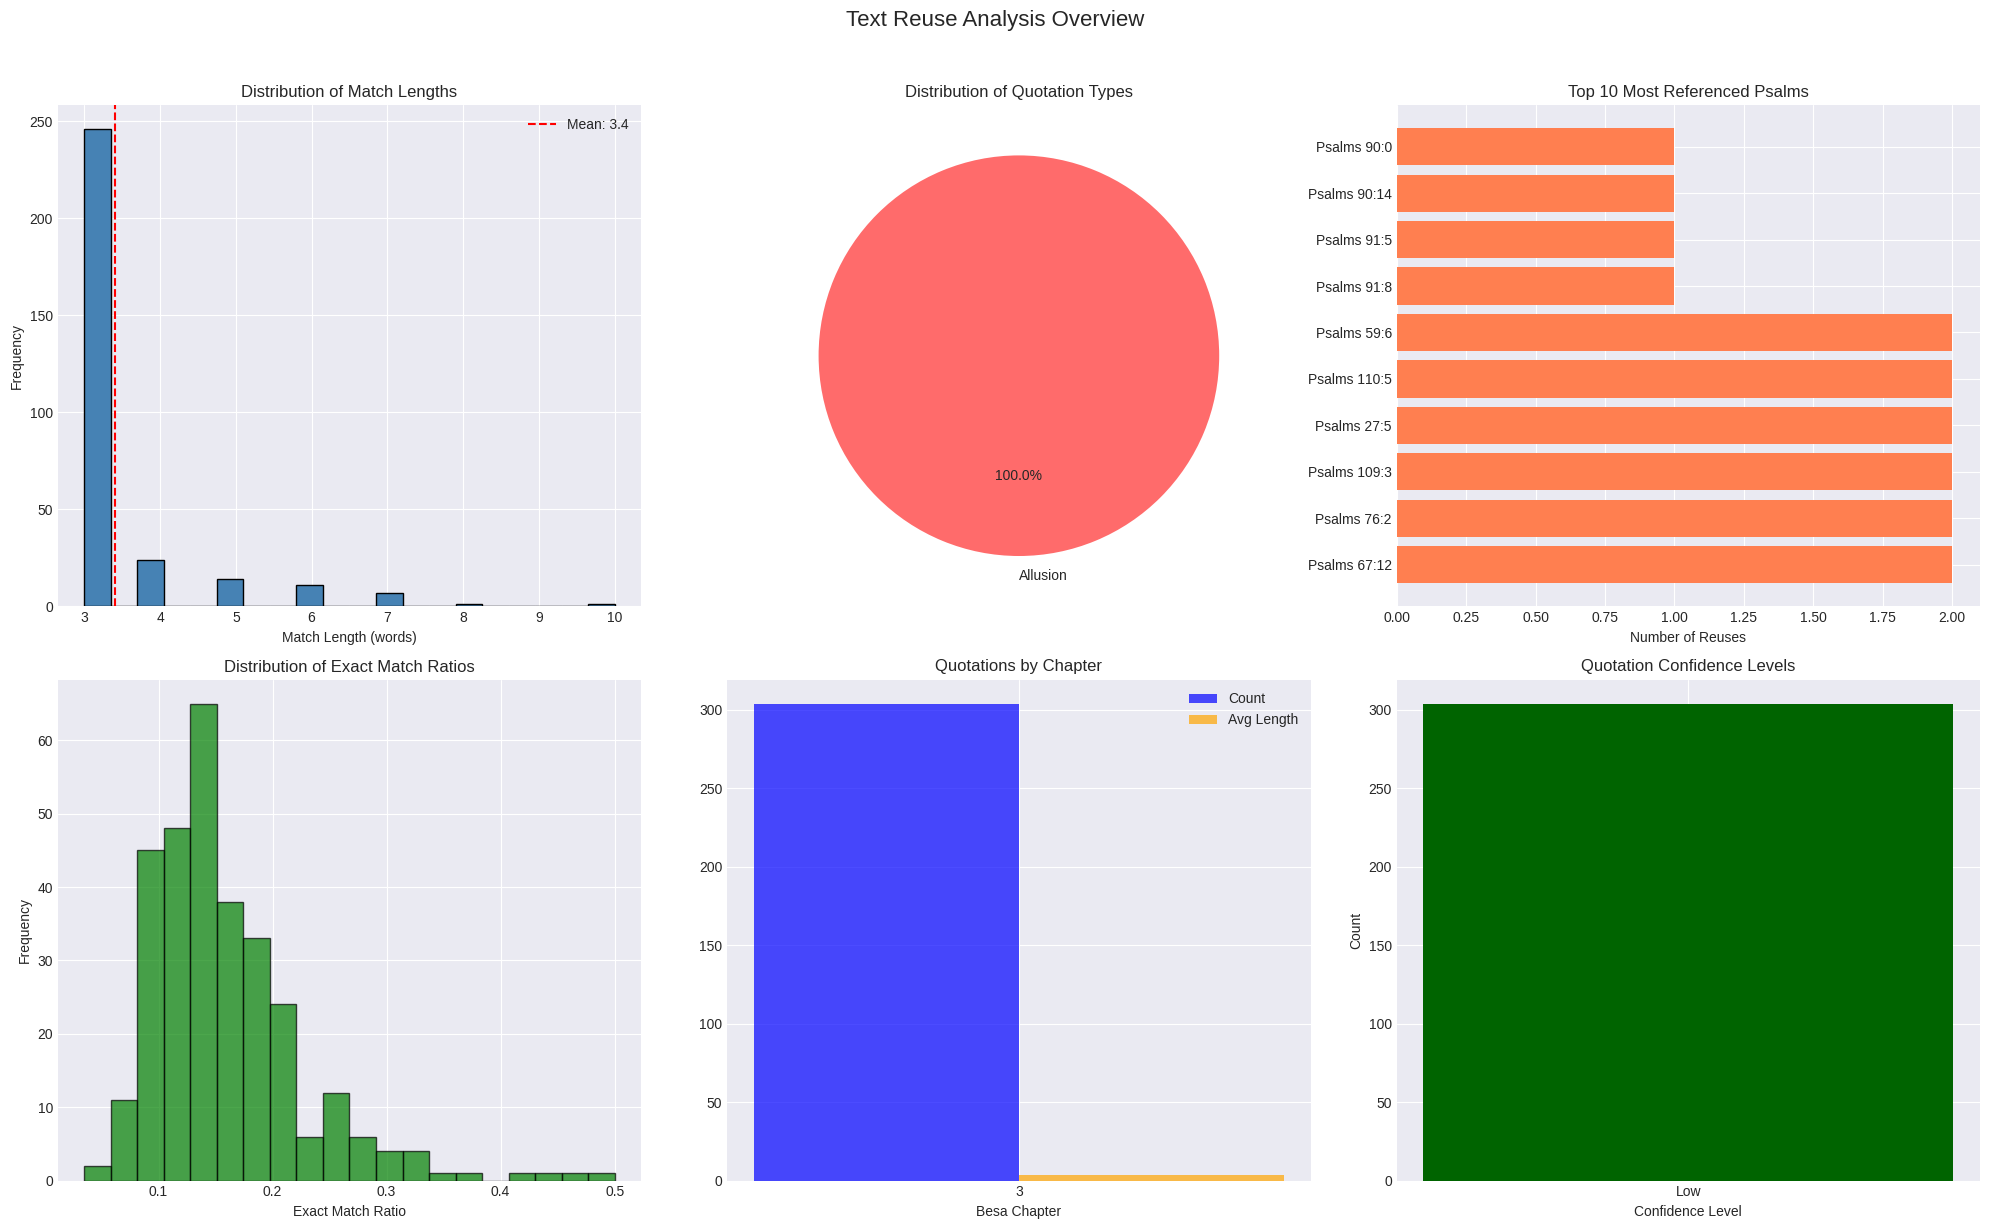

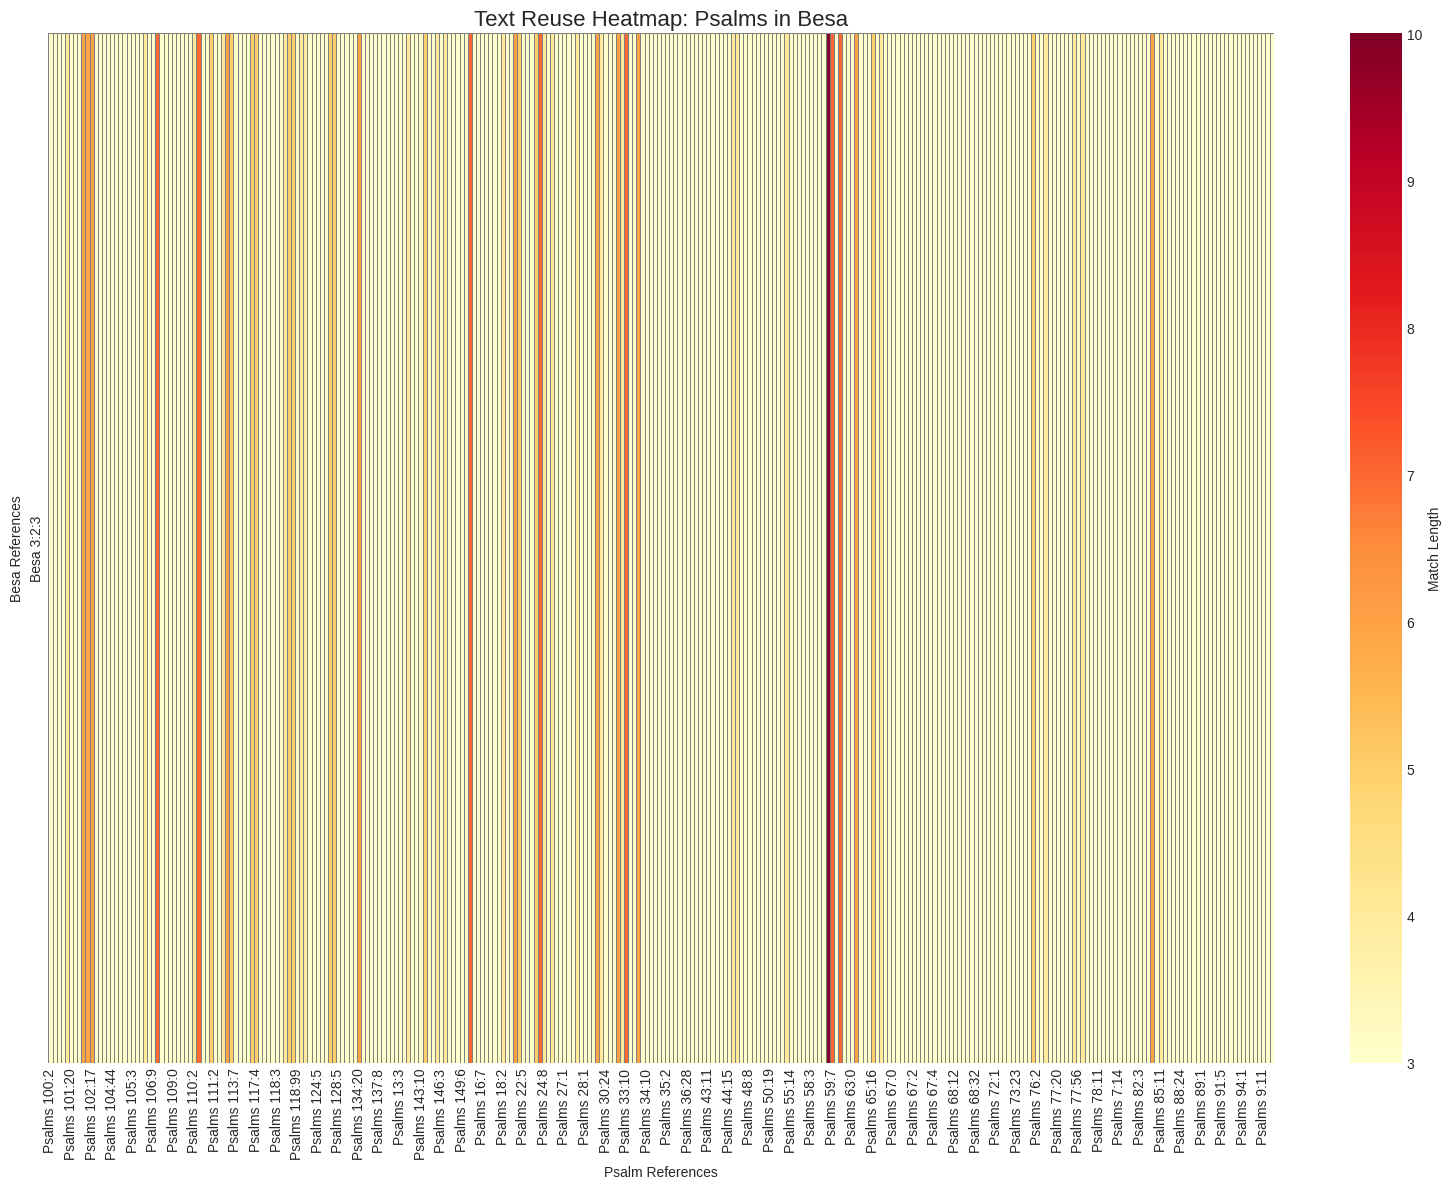

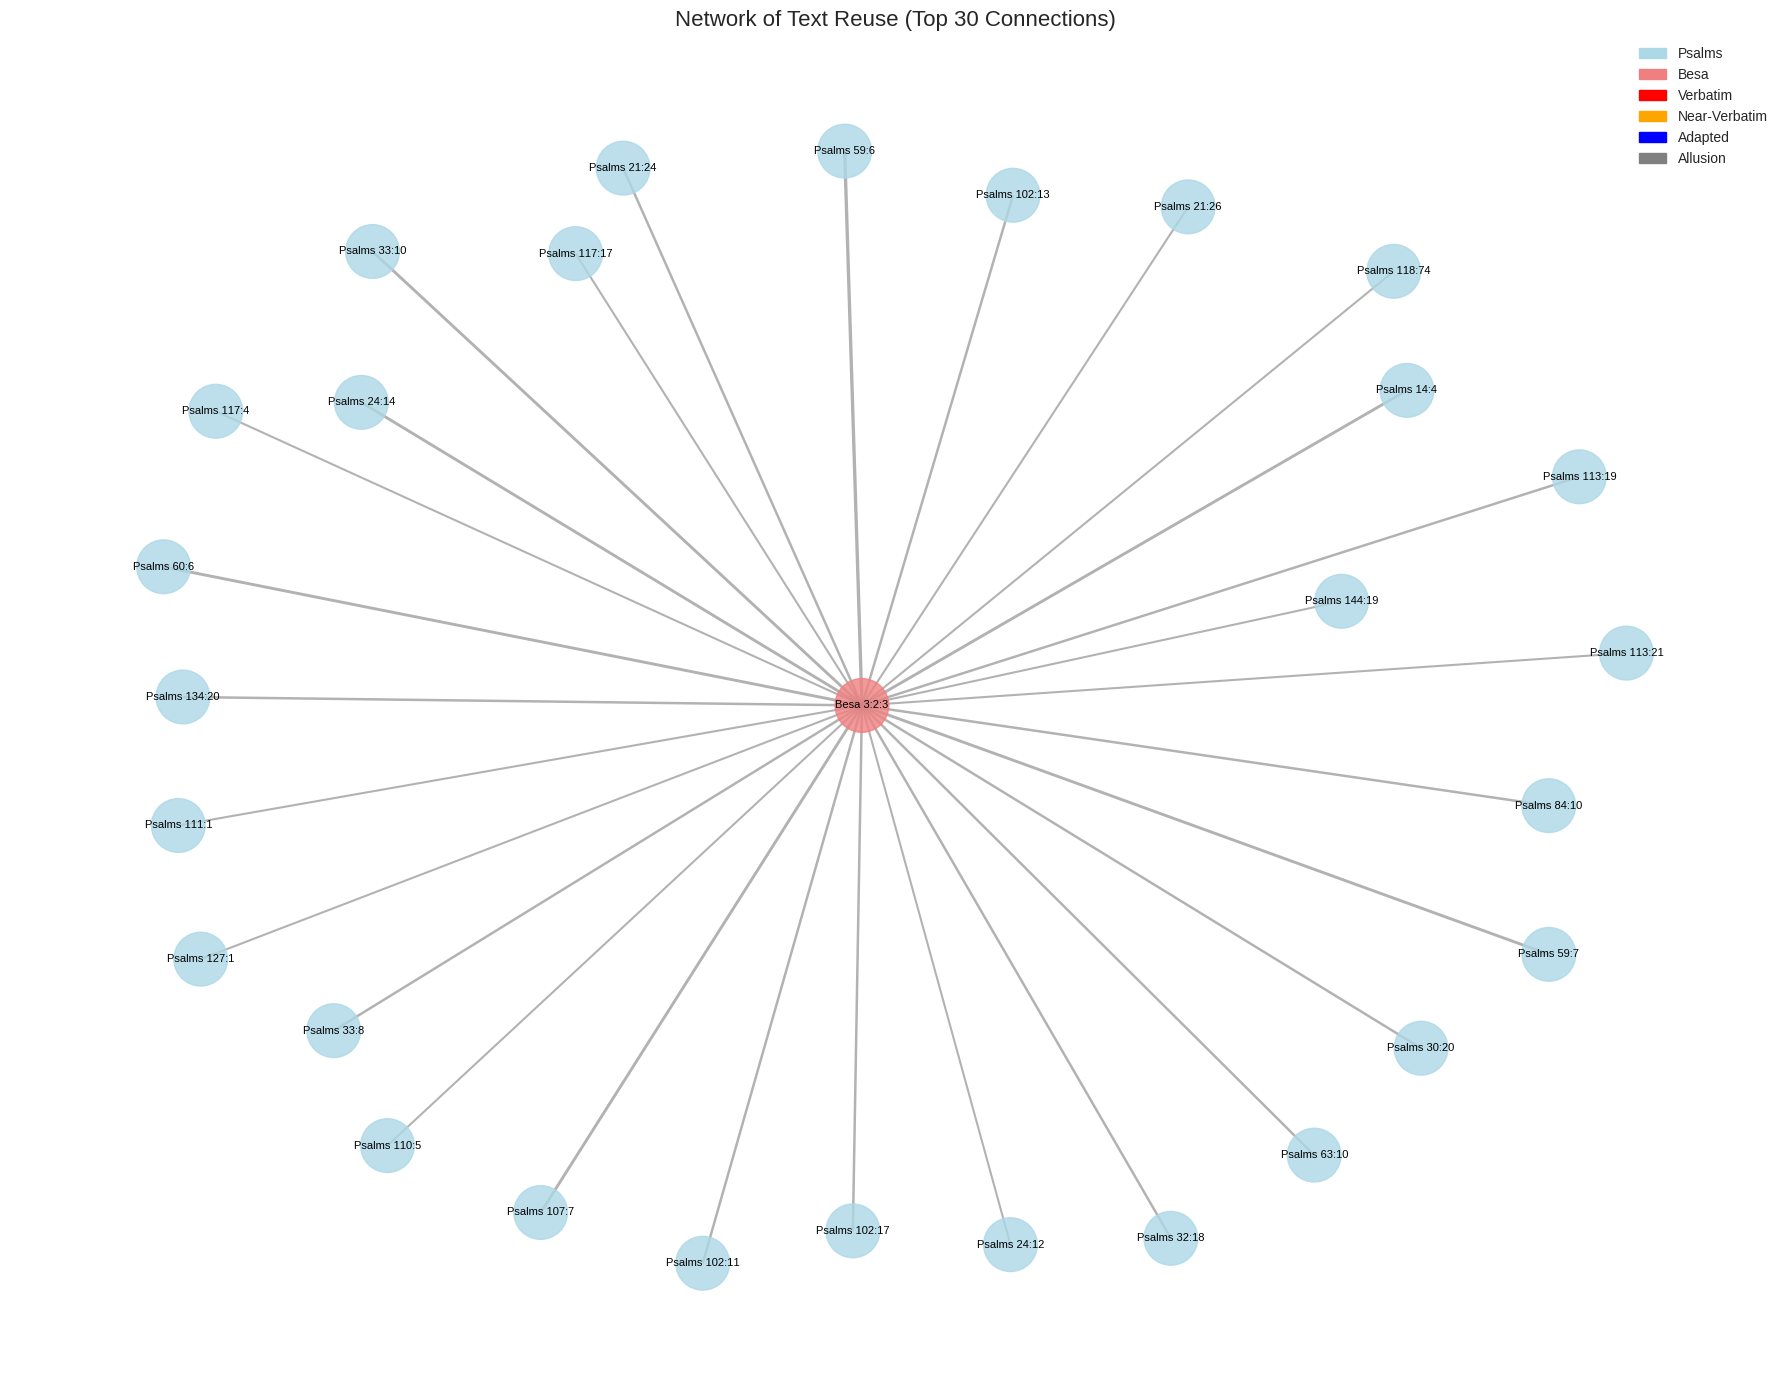

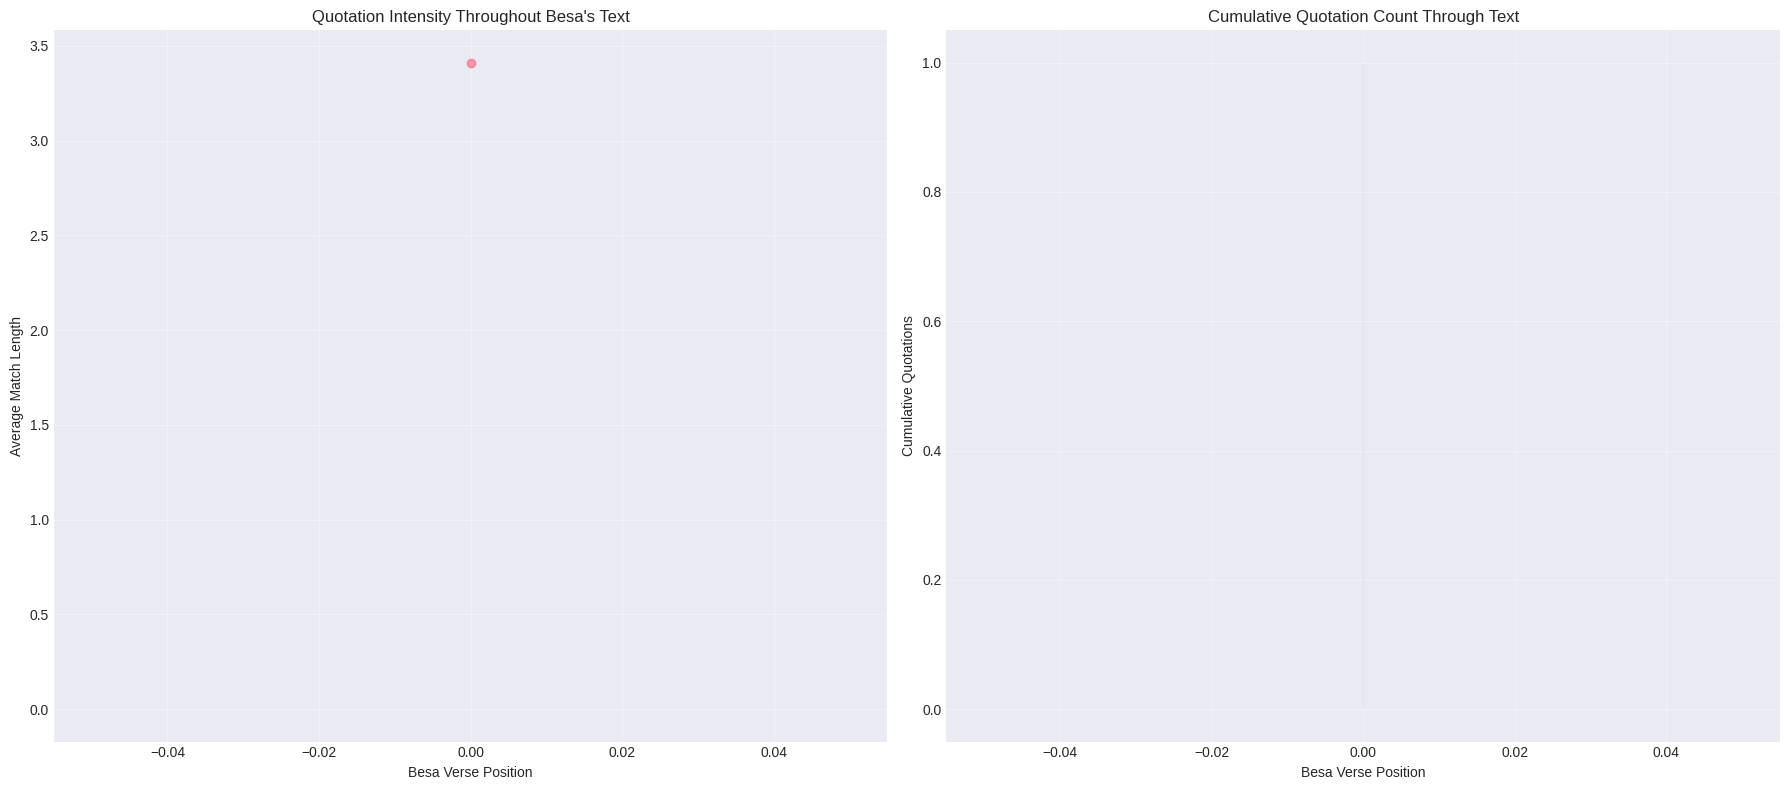

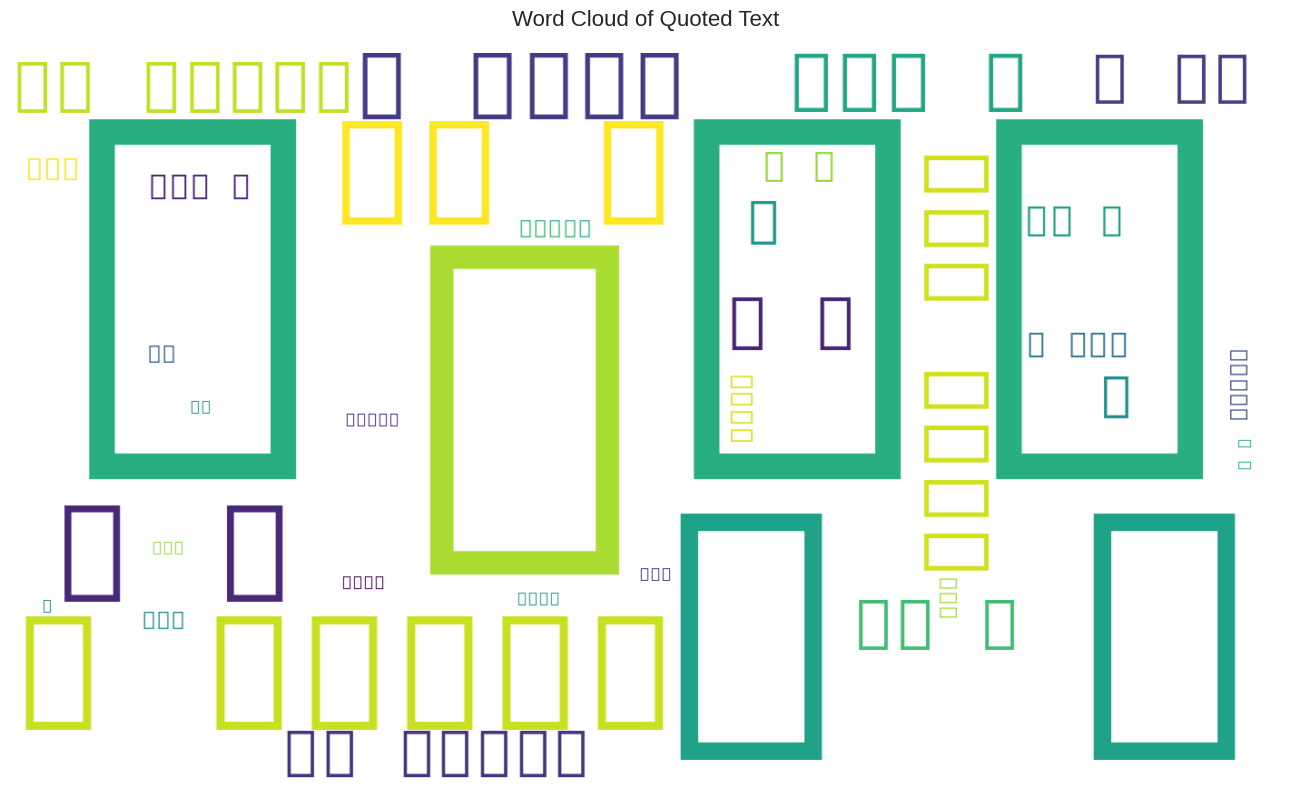

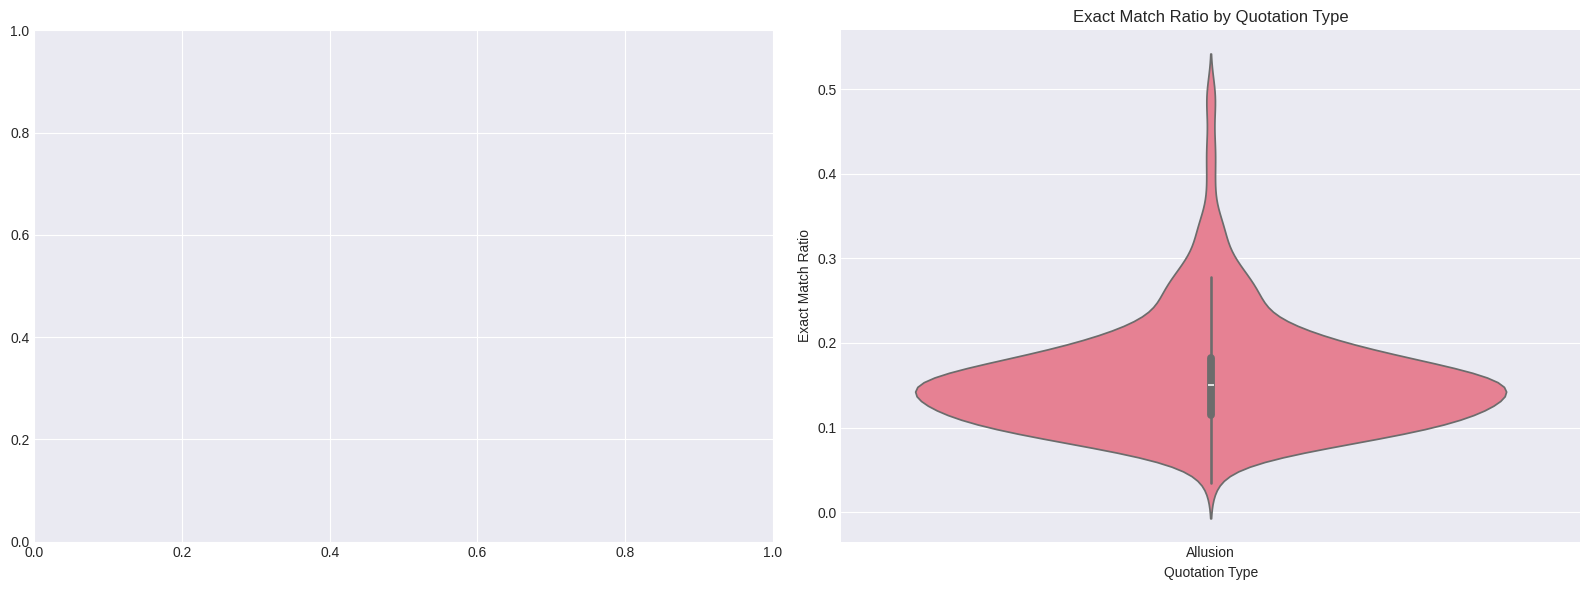

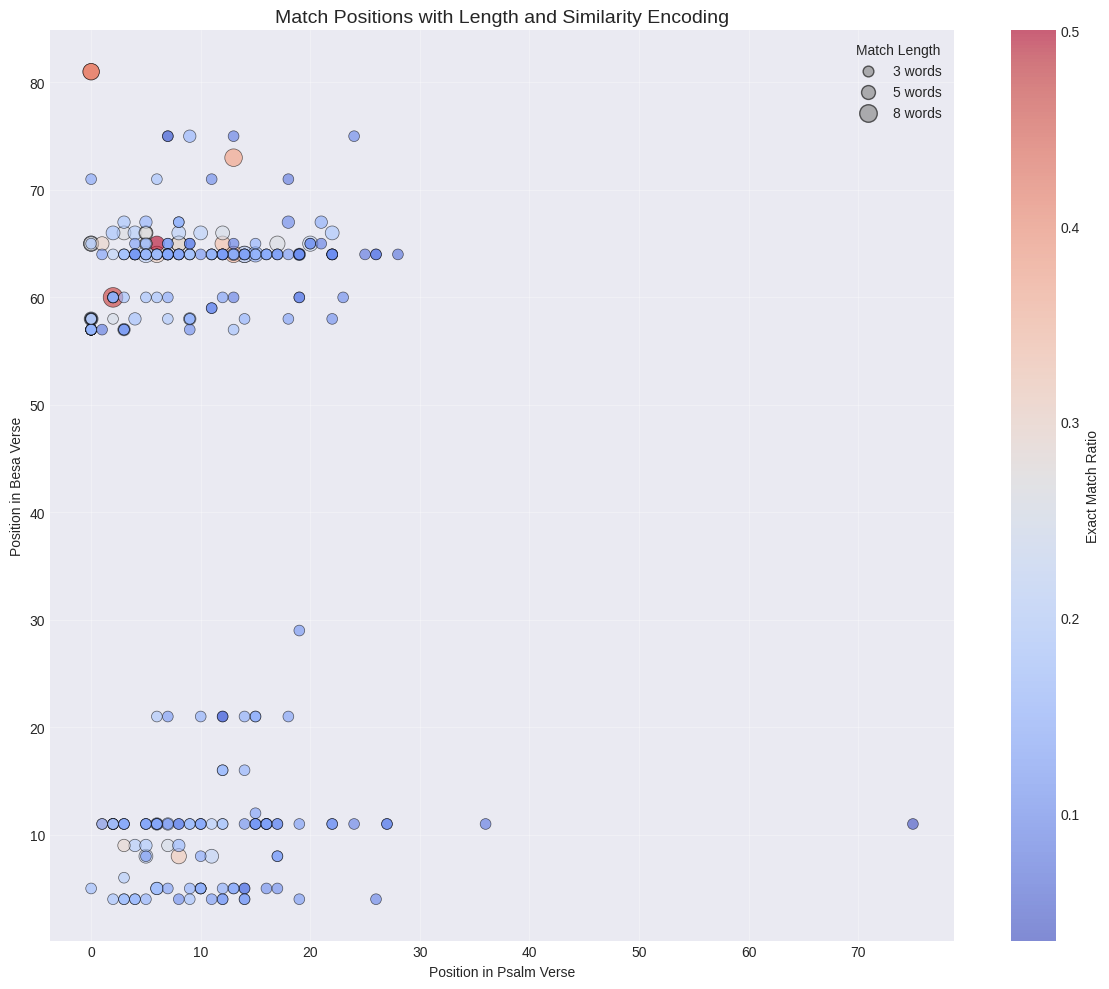

<Figure size 1400x800 with 0 Axes>

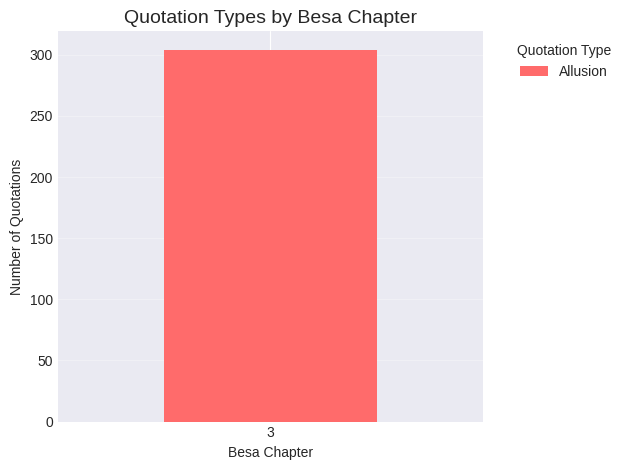


✓ All visualizations generated successfully!

ANALYSIS COMPLETE

Generated outputs:
1. highlighted_text_reuse.html - Interactive highlighted text
2. overview_analysis.png - 6-panel overview
3. reuse_heatmap.png - Detailed heatmap
4. network_graph.png - Network visualization
5. temporal_flow.png - Sequential analysis
6. quotation_wordcloud.png - Word cloud
7. violin_plots.png - Distribution analysis
8. position_scatter.png - Position analysis
9. stacked_chapters.png - Chapter breakdown
10. sankey_diagram.html - Interactive flow diagram
11. bubble_chart.html - Interactive bubble chart
12. parallel_coordinates.html - Multi-dimensional analysis
13. complete_analysis.csv - Full data export
14. analysis_summary.txt - Statistical report


In [ ]:
#!/usr/bin/env python3
"""
Enhanced Coptic Text Reuse Analysis with Text Highlighting and Extended Visualizations
For comparing Psalms and Besa's "On Repentance"
"""

# Install required packages
!pip install -q pandas matplotlib seaborn networkx plotly wordcloud adjustText

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter, defaultdict
from pathlib import Path
from difflib import SequenceMatcher
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

# Try to import additional libraries
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install -q wordcloud
    from wordcloud import WordCloud

try:
    from adjustText import adjust_text
except ImportError:
    !pip install -q adjustText
    from adjustText import adjust_text

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create output directory
Path("output").mkdir(exist_ok=True)

# ============================================
# DATA INPUT - You need to add your texts here
# ============================================

# IMPORTANT: Replace these with your actual texts

# ============================================
# PARSING AND PREPROCESSING
# ============================================

def parse_text_advanced(text, text_id):
    """Advanced parsing with metadata extraction"""
    documents = []
    lines = [line.strip() for line in text.strip().split('\n') if line.strip()]

    for line in lines:
        # More flexible parsing for different formats
        match = re.match(r'^(\S+)\s+(\S+)\s+(.+)$', line)
        if match:
            book = match.group(1)
            ref = match.group(2)
            content = match.group(3)

            # Parse reference (handle both X:Y and X:Y:Z formats)
            ref_parts = ref.split(':')
            if len(ref_parts) >= 2:
                chapter = ref_parts[0]
                verse = ':'.join(ref_parts[1:])
            else:
                chapter = ref_parts[0]
                verse = '1'

            documents.append({
                'text_id': text_id,
                'book': book,
                'reference': f"{book} {ref}",
                'chapter': chapter,
                'verse': verse,
                'content': content,
                'tokens': content.split(),
                'length': len(content.split())
            })

    return documents

# Parse texts
besa_docs = parse_text_advanced(besa, 'besa')
psalms_docs = parse_text_advanced(psalms, 'psalms')

print(f"Loaded {len(besa_docs)} Besa verses")
print(f"Loaded {len(psalms_docs)} Psalm verses")

# ============================================
# ADVANCED QUOTATION DETECTION
# ============================================

class EnhancedQuotationDetector:
    """Enhanced detector with highlighting capabilities"""

    def __init__(self, min_length=3, similarity_threshold=0.8):
        self.min_length = min_length
        self.similarity_threshold = similarity_threshold
        self.results = []

    def detect_all_matches(self, source_docs, target_docs):
        """Detect all types of text reuse with position tracking"""

        for source in source_docs:
            source_tokens = source['tokens']

            for target in target_docs:
                target_tokens = target['tokens']

                # Find all matching blocks
                matcher = SequenceMatcher(None, source_tokens, target_tokens)
                matching_blocks = matcher.get_matching_blocks()

                for match in matching_blocks:
                    if match.size >= self.min_length:
                        matched_tokens = source_tokens[match.a:match.a + match.size]
                        matched_text = ' '.join(matched_tokens)

                        # Calculate similarity metrics
                        exact_ratio = match.size / min(len(source_tokens), len(target_tokens))
                        overall_similarity = matcher.ratio()

                        # Classify quotation type
                        if match.size >= 8 and exact_ratio > 0.7:
                            quotation_type = 'Verbatim'
                            confidence = 'High'
                        elif match.size >= 6 and exact_ratio > 0.5:
                            quotation_type = 'Near-Verbatim'
                            confidence = 'High'
                        elif match.size >= 4 and overall_similarity > 0.4:
                            quotation_type = 'Adapted'
                            confidence = 'Medium'
                        elif match.size >= self.min_length:
                            quotation_type = 'Allusion'
                            confidence = 'Low'
                        else:
                            continue

                        self.results.append({
                            'source_ref': source['reference'],
                            'target_ref': target['reference'],
                            'source_chapter': source['chapter'],
                            'target_chapter': target['chapter'],
                            'matched_text': matched_text,
                            'match_length': match.size,
                            'source_start': match.a,
                            'source_end': match.a + match.size,
                            'target_start': match.b,
                            'target_end': match.b + match.size,
                            'exact_ratio': exact_ratio,
                            'overall_similarity': overall_similarity,
                            'quotation_type': quotation_type,
                            'confidence': confidence,
                            'source_tokens': source_tokens,
                            'target_tokens': target_tokens
                        })

        # Remove duplicates
        seen = set()
        unique_results = []
        for r in self.results:
            key = (r['source_ref'], r['target_ref'], r['matched_text'])
            if key not in seen:
                seen.add(key)
                unique_results.append(r)

        return pd.DataFrame(unique_results).sort_values('match_length', ascending=False)

# ============================================
# TEXT HIGHLIGHTING FUNCTION
# ============================================

def generate_highlighted_html(results_df, besa_docs, psalms_docs):
    """Generate HTML with highlighted text reuses"""

    # Create color mapping for different quotation types
    color_map = {
        'Verbatim': '#ff6b6b',      # Red
        'Near-Verbatim': '#4ecdc4',  # Teal
        'Adapted': '#45b7d1',        # Blue
        'Allusion': '#96ceb4'        # Green
    }

    html_content = """
    <html>
    <head>
        <style>
            body { font-family: 'Times New Roman', serif; line-height: 1.8; margin: 40px; }
            h1 { color: #2c3e50; border-bottom: 3px solid #3498db; padding-bottom: 10px; }
            h2 { color: #34495e; margin-top: 30px; }
            .verse { margin: 15px 0; padding: 10px; background: #f8f9fa; border-left: 4px solid #dee2e6; }
            .reference { font-weight: bold; color: #495057; margin-right: 10px; }
            .highlight-verbatim { background-color: #ffcccb; padding: 2px 4px; border-radius: 3px; font-weight: bold; }
            .highlight-near { background-color: #b3e5e1; padding: 2px 4px; border-radius: 3px; font-weight: bold; }
            .highlight-adapted { background-color: #b3d9e6; padding: 2px 4px; border-radius: 3px; }
            .highlight-allusion { background-color: #d4e6d0; padding: 2px 4px; border-radius: 3px; }
            .legend { margin: 20px 0; padding: 15px; background: #ffffff; border: 1px solid #dee2e6; }
            .legend-item { display: inline-block; margin-right: 20px; }
            .stats { background: #e9ecef; padding: 15px; margin: 20px 0; border-radius: 5px; }
            .tooltip { position: relative; display: inline-block; cursor: help; }
            .tooltip .tooltiptext { visibility: hidden; width: 200px; background-color: #555; color: #fff;
                text-align: center; border-radius: 6px; padding: 5px; position: absolute; z-index: 1;
                bottom: 125%; left: 50%; margin-left: -100px; font-size: 12px; }
            .tooltip:hover .tooltiptext { visibility: visible; }
        </style>
    </head>
    <body>
        <h1>Coptic Text Reuse Analysis: Highlighted Results</h1>

        <div class="legend">
            <strong>Legend:</strong>
            <span class="legend-item"><span class="highlight-verbatim">Verbatim</span></span>
            <span class="legend-item"><span class="highlight-near">Near-Verbatim</span></span>
            <span class="legend-item"><span class="highlight-adapted">Adapted</span></span>
            <span class="legend-item"><span class="highlight-allusion">Allusion</span></span>
        </div>
    """

    # Group results by target (Besa) reference
    besa_groups = results_df.groupby('target_ref')

    html_content += "<h2>Besa's Text with Highlighted Quotations from Psalms</h2>"

    for besa_doc in besa_docs:
        ref = besa_doc['reference']
        tokens = besa_doc['tokens'].copy()

        # Create highlighting map
        highlight_map = {}

        if ref in besa_groups.groups:
            group = results_df[results_df['target_ref'] == ref]

            for _, row in group.iterrows():
                for i in range(int(row['target_start']), int(row['target_end'])):
                    if i < len(tokens):
                        highlight_map[i] = {
                            'type': row['quotation_type'],
                            'source': row['source_ref'],
                            'matched_text': row['matched_text']
                        }

        # Build highlighted text
        highlighted_tokens = []
        i = 0
        while i < len(tokens):
            if i in highlight_map:
                info = highlight_map[i]
                class_name = {
                    'Verbatim': 'highlight-verbatim',
                    'Near-Verbatim': 'highlight-near',
                    'Adapted': 'highlight-adapted',
                    'Allusion': 'highlight-allusion'
                }.get(info['type'], '')

                # Find the end of this highlight block
                end = i + 1
                while end < len(tokens) and end in highlight_map and highlight_map[end]['source'] == info['source']:
                    end += 1

                # Create highlighted span with tooltip
                highlighted_text = ' '.join(tokens[i:end])
                highlighted_tokens.append(
                    f'<span class="tooltip {class_name}">{highlighted_text}'
                    f'<span class="tooltiptext">From {info["source"]}</span></span>'
                )
                i = end
            else:
                highlighted_tokens.append(tokens[i])
                i += 1

        html_content += f'<div class="verse"><span class="reference">{ref}</span>{" ".join(highlighted_tokens)}</div>'

    # Add statistics
    stats = f"""
    <div class="stats">
        <h3>Statistics</h3>
        <p>Total quotations found: {len(results_df)}</p>
        <p>Verbatim: {len(results_df[results_df['quotation_type'] == 'Verbatim'])}</p>
        <p>Near-Verbatim: {len(results_df[results_df['quotation_type'] == 'Near-Verbatim'])}</p>
        <p>Adapted: {len(results_df[results_df['quotation_type'] == 'Adapted'])}</p>
        <p>Allusions: {len(results_df[results_df['quotation_type'] == 'Allusion'])}</p>
    </div>
    """

    html_content += stats + "</body></html>"

    # Save HTML file
    with open('output/highlighted_text_reuse.html', 'w', encoding='utf-8') as f:
        f.write(html_content)

    return html_content

# ============================================
# RUN DETECTION
# ============================================

print("\n" + "="*80)
print("DETECTING TEXT REUSE PATTERNS")
print("="*80)

detector = EnhancedQuotationDetector(min_length=3)
results_df = detector.detect_all_matches(psalms_docs, besa_docs)

if not results_df.empty:
    print(f"\nFound {len(results_df)} text reuse instances")

    # Generate highlighted HTML
    html_output = generate_highlighted_html(results_df, besa_docs, psalms_docs)
    print("✓ Generated highlighted text output")

    # Display summary in notebook
    display(HTML(f"""
    <div style="background: #f0f0f0; padding: 15px; border-radius: 5px;">
        <h3>Quick Summary</h3>
        <p>Total matches: {len(results_df)}</p>
        <p>Unique Psalms quoted: {results_df['source_ref'].nunique()}</p>
        <p>Besa verses with quotations: {results_df['target_ref'].nunique()}</p>
    </div>
    """))

# ============================================
# EXTENDED VISUALIZATIONS (12+ GRAPHS)
# ============================================

if not results_df.empty:

    # 1. COMPREHENSIVE OVERVIEW (6 subplots)
    fig1, axes1 = plt.subplots(2, 3, figsize=(20, 12))

    # 1.1 Match length distribution
    axes1[0, 0].hist(results_df['match_length'], bins=20, edgecolor='black', color='steelblue')
    axes1[0, 0].set_xlabel('Match Length (words)')
    axes1[0, 0].set_ylabel('Frequency')
    axes1[0, 0].set_title('Distribution of Match Lengths')
    axes1[0, 0].axvline(results_df['match_length'].mean(), color='red', linestyle='--', label=f'Mean: {results_df["match_length"].mean():.1f}')
    axes1[0, 0].legend()

    # 1.2 Quotation types
    type_counts = results_df['quotation_type'].value_counts()
    colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
    axes1[0, 1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    axes1[0, 1].set_title('Distribution of Quotation Types')

    # 1.3 Top Psalms
    psalm_counts = results_df['source_ref'].value_counts().head(10)
    axes1[0, 2].barh(range(len(psalm_counts)), psalm_counts.values, color='coral')
    axes1[0, 2].set_yticks(range(len(psalm_counts)))
    axes1[0, 2].set_yticklabels(psalm_counts.index)
    axes1[0, 2].set_xlabel('Number of Reuses')
    axes1[0, 2].set_title('Top 10 Most Referenced Psalms')

    # 1.4 Similarity distribution
    axes1[1, 0].hist(results_df['exact_ratio'], bins=20, color='green', edgecolor='black', alpha=0.7)
    axes1[1, 0].set_xlabel('Exact Match Ratio')
    axes1[1, 0].set_ylabel('Frequency')
    axes1[1, 0].set_title('Distribution of Exact Match Ratios')

    # 1.5 Chapter-level analysis
    chapter_stats = results_df.groupby('target_chapter')['match_length'].agg(['count', 'mean'])
    x_pos = np.arange(len(chapter_stats))
    axes1[1, 1].bar(x_pos - 0.2, chapter_stats['count'], 0.4, label='Count', color='blue', alpha=0.7)
    axes1[1, 1].bar(x_pos + 0.2, chapter_stats['mean'], 0.4, label='Avg Length', color='orange', alpha=0.7)
    axes1[1, 1].set_xticks(x_pos)
    axes1[1, 1].set_xticklabels(chapter_stats.index)
    axes1[1, 1].set_xlabel('Besa Chapter')
    axes1[1, 1].set_title('Quotations by Chapter')
    axes1[1, 1].legend()

    # 1.6 Confidence levels
    if 'confidence' in results_df.columns:
        conf_counts = results_df['confidence'].value_counts()
        axes1[1, 2].bar(conf_counts.index, conf_counts.values, color=['darkgreen', 'orange', 'red'])
        axes1[1, 2].set_xlabel('Confidence Level')
        axes1[1, 2].set_ylabel('Count')
        axes1[1, 2].set_title('Quotation Confidence Levels')

    plt.suptitle('Text Reuse Analysis Overview', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig('output/overview_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 2. HEATMAP
    pivot_table = results_df.pivot_table(
        index='target_ref',
        columns='source_ref',
        values='match_length',
        aggfunc='max',
        fill_value=0
    )

    if not pivot_table.empty:
        plt.figure(figsize=(16, 12))
        sns.heatmap(pivot_table, cmap='YlOrRd', cbar_kws={'label': 'Match Length'},
                   linewidths=0.5, linecolor='gray', annot=False)
        plt.title('Text Reuse Heatmap: Psalms in Besa', fontsize=16)
        plt.xlabel('Psalm References')
        plt.ylabel('Besa References')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig('output/reuse_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 3. NETWORK GRAPH
    G = nx.Graph()
    top_quotes = results_df.nlargest(30, 'match_length')

    for _, row in top_quotes.iterrows():
        G.add_edge(row['source_ref'], row['target_ref'],
                  weight=row['match_length'],
                  type=row['quotation_type'])

    if G.nodes():
        plt.figure(figsize=(18, 14))
        pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

        # Node colors
        node_colors = ['lightblue' if 'Psalm' in node else 'lightcoral' for node in G.nodes()]

        # Edge colors by quotation type
        edge_colors = []
        for u, v in G.edges():
            qt = G[u][v]['type']
            if qt == 'Verbatim':
                edge_colors.append('red')
            elif qt == 'Near-Verbatim':
                edge_colors.append('orange')
            elif qt == 'Adapted':
                edge_colors.append('blue')
            else:
                edge_colors.append('gray')

        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, alpha=0.8)
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors,
                              width=[G[u][v]['weight']*0.3 for u, v in G.edges()], alpha=0.6)
        nx.draw_networkx_labels(G, pos, font_size=8)

        plt.title('Network of Text Reuse (Top 30 Connections)', fontsize=16)
        plt.axis('off')

        # Add legend
        legend_elements = [
            mpatches.Patch(color='lightblue', label='Psalms'),
            mpatches.Patch(color='lightcoral', label='Besa'),
            mpatches.Patch(color='red', label='Verbatim'),
            mpatches.Patch(color='orange', label='Near-Verbatim'),
            mpatches.Patch(color='blue', label='Adapted'),
            mpatches.Patch(color='gray', label='Allusion')
        ]
        plt.legend(handles=legend_elements, loc='upper right')

        plt.tight_layout()
        plt.savefig('output/network_graph.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 4. TEMPORAL FLOW
    fig4, axes4 = plt.subplots(1, 2, figsize=(18, 8))

    # 4.1 Sequential flow
    besa_sequence = []
    for doc in besa_docs:
        ref = doc['reference']
        if ref in results_df['target_ref'].values:
            matches = results_df[results_df['target_ref'] == ref]
            avg_length = matches['match_length'].mean()
            besa_sequence.append(avg_length)
        else:
            besa_sequence.append(0)

    axes4[0].plot(range(len(besa_sequence)), besa_sequence, marker='o', linestyle='-', alpha=0.7)
    axes4[0].fill_between(range(len(besa_sequence)), besa_sequence, alpha=0.3)
    axes4[0].set_xlabel('Besa Verse Position')
    axes4[0].set_ylabel('Average Match Length')
    axes4[0].set_title('Quotation Intensity Throughout Besa\'s Text')
    axes4[0].grid(True, alpha=0.3)

    # 4.2 Cumulative quotations
    cumulative = np.cumsum([1 if x > 0 else 0 for x in besa_sequence])
    axes4[1].plot(range(len(cumulative)), cumulative, linewidth=2, color='darkblue')
    axes4[1].fill_between(range(len(cumulative)), cumulative, alpha=0.3, color='lightblue')
    axes4[1].set_xlabel('Besa Verse Position')
    axes4[1].set_ylabel('Cumulative Quotations')
    axes4[1].set_title('Cumulative Quotation Count Through Text')
    axes4[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('output/temporal_flow.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 5. WORD CLOUD
    all_matched_text = ' '.join(results_df['matched_text'].tolist())
    if all_matched_text:
        plt.figure(figsize=(14, 8))
        wordcloud = WordCloud(width=1400, height=800, background_color='white',
                              colormap='viridis', max_words=100).generate(all_matched_text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Quoted Text', fontsize=16, pad=20)
        plt.tight_layout()
        plt.savefig('output/quotation_wordcloud.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 6. VIOLIN PLOTS
    fig6, axes6 = plt.subplots(1, 2, figsize=(16, 6))

    # 6.1 Match length by type
    if len(results_df['quotation_type'].unique()) > 1:
        sns.violinplot(data=results_df, x='quotation_type', y='match_length', ax=axes6[0])
        axes6[0].set_title('Match Length Distribution by Quotation Type')
        axes6[0].set_xlabel('Quotation Type')
        axes6[0].set_ylabel('Match Length (words)')

    # 6.2 Exact ratio by type
    sns.violinplot(data=results_df, x='quotation_type', y='exact_ratio', ax=axes6[1])
    axes6[1].set_title('Exact Match Ratio by Quotation Type')
    axes6[1].set_xlabel('Quotation Type')
    axes6[1].set_ylabel('Exact Match Ratio')

    plt.tight_layout()
    plt.savefig('output/violin_plots.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 7. SCATTER PLOT MATRIX
    fig7 = plt.figure(figsize=(12, 10))

    # Create scatter plot with size and color encoding
    scatter = plt.scatter(results_df['source_start'], results_df['target_start'],
                         s=results_df['match_length']*20,
                         c=results_df['exact_ratio'],
                         cmap='coolwarm', alpha=0.6, edgecolors='black', linewidth=0.5)

    plt.xlabel('Position in Psalm Verse')
    plt.ylabel('Position in Besa Verse')
    plt.title('Match Positions with Length and Similarity Encoding', fontsize=14)

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Exact Match Ratio')

    # Add size legend
    for size in [3, 5, 8]:
        plt.scatter([], [], s=size*20, c='gray', alpha=0.6, edgecolors='black',
                   label=f'{size} words')
    plt.legend(scatterpoints=1, title='Match Length', loc='upper right')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('output/position_scatter.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 8. STACKED BAR CHART
    fig8 = plt.figure(figsize=(14, 8))

    # Prepare data for stacked bar
    chapter_type_counts = results_df.groupby(['target_chapter', 'quotation_type']).size().unstack(fill_value=0)

    if not chapter_type_counts.empty:
        chapter_type_counts.plot(kind='bar', stacked=True,
                                 color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4'])
        plt.xlabel('Besa Chapter')
        plt.ylabel('Number of Quotations')
        plt.title('Quotation Types by Besa Chapter', fontsize=14)
        plt.legend(title='Quotation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=0)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.savefig('output/stacked_chapters.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 9. INTERACTIVE SANKEY DIAGRAM
    source_nodes = results_df['source_ref'].unique().tolist()
    target_nodes = results_df['target_ref'].unique().tolist()

    all_nodes = source_nodes + target_nodes
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    source_indices = [node_dict[ref] for ref in results_df['source_ref']]
    target_indices = [node_dict[ref] for ref in results_df['target_ref']]

    # Color by quotation type
    link_colors = []
    for qt in results_df['quotation_type']:
        if qt == 'Verbatim':
            link_colors.append('rgba(255, 0, 0, 0.4)')
        elif qt == 'Near-Verbatim':
            link_colors.append('rgba(255, 165, 0, 0.4)')
        elif qt == 'Adapted':
            link_colors.append('rgba(0, 0, 255, 0.4)')
        else:
            link_colors.append('rgba(128, 128, 128, 0.4)')

    fig_sankey = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes,
            color=['lightblue']*len(source_nodes) + ['lightcoral']*len(target_nodes)
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=results_df['match_length'].tolist(),
            color=link_colors
        )
    )])

    fig_sankey.update_layout(
        title_text="Flow of Quotations from Psalms to Besa",
        font_size=10,
        height=800
    )

    fig_sankey.write_html('output/sankey_diagram.html')
    fig_sankey.show()

    # 10. BUBBLE CHART
    fig_bubble = px.scatter(results_df,
                           x='source_chapter',
                           y='target_chapter',
                           size='match_length',
                           color='quotation_type',
                           hover_data=['source_ref', 'target_ref', 'matched_text'],
                           title='Bubble Chart of Quotations by Chapter',
                           labels={'source_chapter': 'Psalm Chapter',
                                  'target_chapter': 'Besa Chapter',
                                  'match_length': 'Match Length'},
                           color_discrete_map={'Verbatim': '#ff6b6b',
                                              'Near-Verbatim': '#4ecdc4',
                                              'Adapted': '#45b7d1',
                                              'Allusion': '#96ceb4'})

    fig_bubble.update_layout(height=600)
    fig_bubble.write_html('output/bubble_chart.html')
    fig_bubble.show()

    # 11. PARALLEL COORDINATES PLOT
    fig_parallel = go.Figure(data=
        go.Parcoords(
            line=dict(color=results_df['match_length'],
                     colorscale='Viridis',
                     showscale=True),
            dimensions=list([
                dict(range=[results_df['match_length'].min(), results_df['match_length'].max()],
                     label='Match Length', values=results_df['match_length']),
                dict(range=[0, 1],
                     label='Exact Ratio', values=results_df['exact_ratio']),
                dict(range=[0, 1],
                     label='Overall Similarity', values=results_df['overall_similarity']),
                dict(range=[0, 3],
                     tickvals=[0, 1, 2, 3],
                     ticktext=['Allusion', 'Adapted', 'Near-Verb', 'Verbatim'],
                     label='Type', values=results_df['quotation_type'].map(
                         {'Allusion': 0, 'Adapted': 1, 'Near-Verbatim': 2, 'Verbatim': 3}))
            ])
        )
    )

    fig_parallel.update_layout(
        title='Parallel Coordinates: Multi-dimensional Analysis',
        height=500
    )

    fig_parallel.write_html('output/parallel_coordinates.html')
    fig_parallel.show()

    print("\n✓ All visualizations generated successfully!")

# ============================================
# DETAILED REPORTS
# ============================================

if not results_df.empty:
    # Save comprehensive CSV
    results_df.to_csv('output/complete_analysis.csv', index=False, encoding='utf-8')

    # Create summary statistics
    summary = f"""
COPTIC TEXT REUSE ANALYSIS - COMPREHENSIVE REPORT
{'='*60}

1. CORPUS STATISTICS
   - Psalms analyzed: {len(psalms_docs)} verses
   - Besa analyzed: {len(besa_docs)} verses
   - Total text reuse instances: {len(results_df)}

2. QUOTATION BREAKDOWN
   - Verbatim: {len(results_df[results_df['quotation_type'] == 'Verbatim'])} ({len(results_df[results_df['quotation_type'] == 'Verbatim'])/len(results_df)*100:.1f}%)
   - Near-Verbatim: {len(results_df[results_df['quotation_type'] == 'Near-Verbatim'])} ({len(results_df[results_df['quotation_type'] == 'Near-Verbatim'])/len(results_df)*100:.1f}%)
   - Adapted: {len(results_df[results_df['quotation_type'] == 'Adapted'])} ({len(results_df[results_df['quotation_type'] == 'Adapted'])/len(results_df)*100:.1f}%)
   - Allusions: {len(results_df[results_df['quotation_type'] == 'Allusion'])} ({len(results_df[results_df['quotation_type'] == 'Allusion'])/len(results_df)*100:.1f}%)

3. MATCH CHARACTERISTICS
   - Average match length: {results_df['match_length'].mean():.2f} words
   - Median match length: {results_df['match_length'].median():.0f} words
   - Longest match: {results_df['match_length'].max()} words
   - Shortest match: {results_df['match_length'].min()} words
   - Standard deviation: {results_df['match_length'].std():.2f}

4. SIMILARITY METRICS
   - Average exact ratio: {results_df['exact_ratio'].mean():.3f}
   - Average overall similarity: {results_df['overall_similarity'].mean():.3f}

5. TOP 10 MOST QUOTED PSALMS
{results_df['source_ref'].value_counts().head(10).to_string()}

6. TOP 10 BESA VERSES WITH QUOTATIONS
{results_df['target_ref'].value_counts().head(10).to_string()}

7. LONGEST VERBATIM QUOTATIONS
"""

    # Add longest quotations
    verbatim = results_df[results_df['quotation_type'] == 'Verbatim'].nlargest(5, 'match_length')
    for idx, row in verbatim.iterrows():
        summary += f"\n   {row['source_ref']} → {row['target_ref']}"
        summary += f"\n   Length: {row['match_length']} words"
        summary += f"\n   Text: \"{row['matched_text'][:100]}...\"\n"

    # Save summary
    with open('output/analysis_summary.txt', 'w', encoding='utf-8') as f:
        f.write(summary)

    print("\n" + "="*60)
    print("ANALYSIS COMPLETE")
    print("="*60)
    print("\nGenerated outputs:")
    print("1. highlighted_text_reuse.html - Interactive highlighted text")
    print("2. overview_analysis.png - 6-panel overview")
    print("3. reuse_heatmap.png - Detailed heatmap")
    print("4. network_graph.png - Network visualization")
    print("5. temporal_flow.png - Sequential analysis")
    print("6. quotation_wordcloud.png - Word cloud")
    print("7. violin_plots.png - Distribution analysis")
    print("8. position_scatter.png - Position analysis")
    print("9. stacked_chapters.png - Chapter breakdown")
    print("10. sankey_diagram.html - Interactive flow diagram")
    print("11. bubble_chart.html - Interactive bubble chart")
    print("12. parallel_coordinates.html - Multi-dimensional analysis")
    print("13. complete_analysis.csv - Full data export")
    print("14. analysis_summary.txt - Statistical report")

else:
    print("\nNo text reuse detected. Please check your input texts.")

Loaded 1 Besa verses
Loaded 2666 Psalm verses

DETECTING VERBATIM QUOTATIONS

Found 304 potential quotations
  - Verbatim: 0
  - Near-Verbatim: 8
  - Partial: 296

TOP VERBATIM/NEAR-VERBATIM QUOTATIONS

Psalms 59:6 → Besa 3:2:3
Type: Near-Verbatim
Length: 10 words
Text: "ϯ ⲛ ⲟⲩ ⲙⲁⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ"
Context similarity: 78.57%

Psalms 59:7 → Besa 3:2:3
Type: Near-Verbatim
Length: 7 words
Text: "ϫⲉⲕⲁⲥ ⲉⲣⲉ ⲛⲉⲕ ⲙⲉⲣⲓⲧ ⲛ ⲟⲩ ϩⲙ"
Context similarity: 100.00%

Psalms 107:7 → Besa 3:2:3
Type: Near-Verbatim
Length: 7 words
Text: "ϫⲉⲕⲁⲥ ⲉⲣⲉ ⲛⲉⲕ ⲙⲉⲣⲓⲧ ⲛ ⲟⲩ ϩⲙ"
Context similarity: 100.00%

Psalms 21:24 → Besa 3:2:3
Type: Near-Verbatim
Length: 6 words
Text: "ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ"
Context similarity: 100.00%

Psalms 113:19 → Besa 3:2:3
Type: Near-Verbatim
Length: 6 words
Text: "ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ"
Context similarity: 100.00%

Psalms 110:5 → Besa 3:2:3
Type: Near-Verbatim
Length: 5 words
Text: "ⲁ ϥ ϯ ⲛ ⲟⲩ"
Context similarity: 100.00%

Psalms 118:74 → Besa 3:2:3
Type: Near-Verbatim
Length: 5 words
Text: "

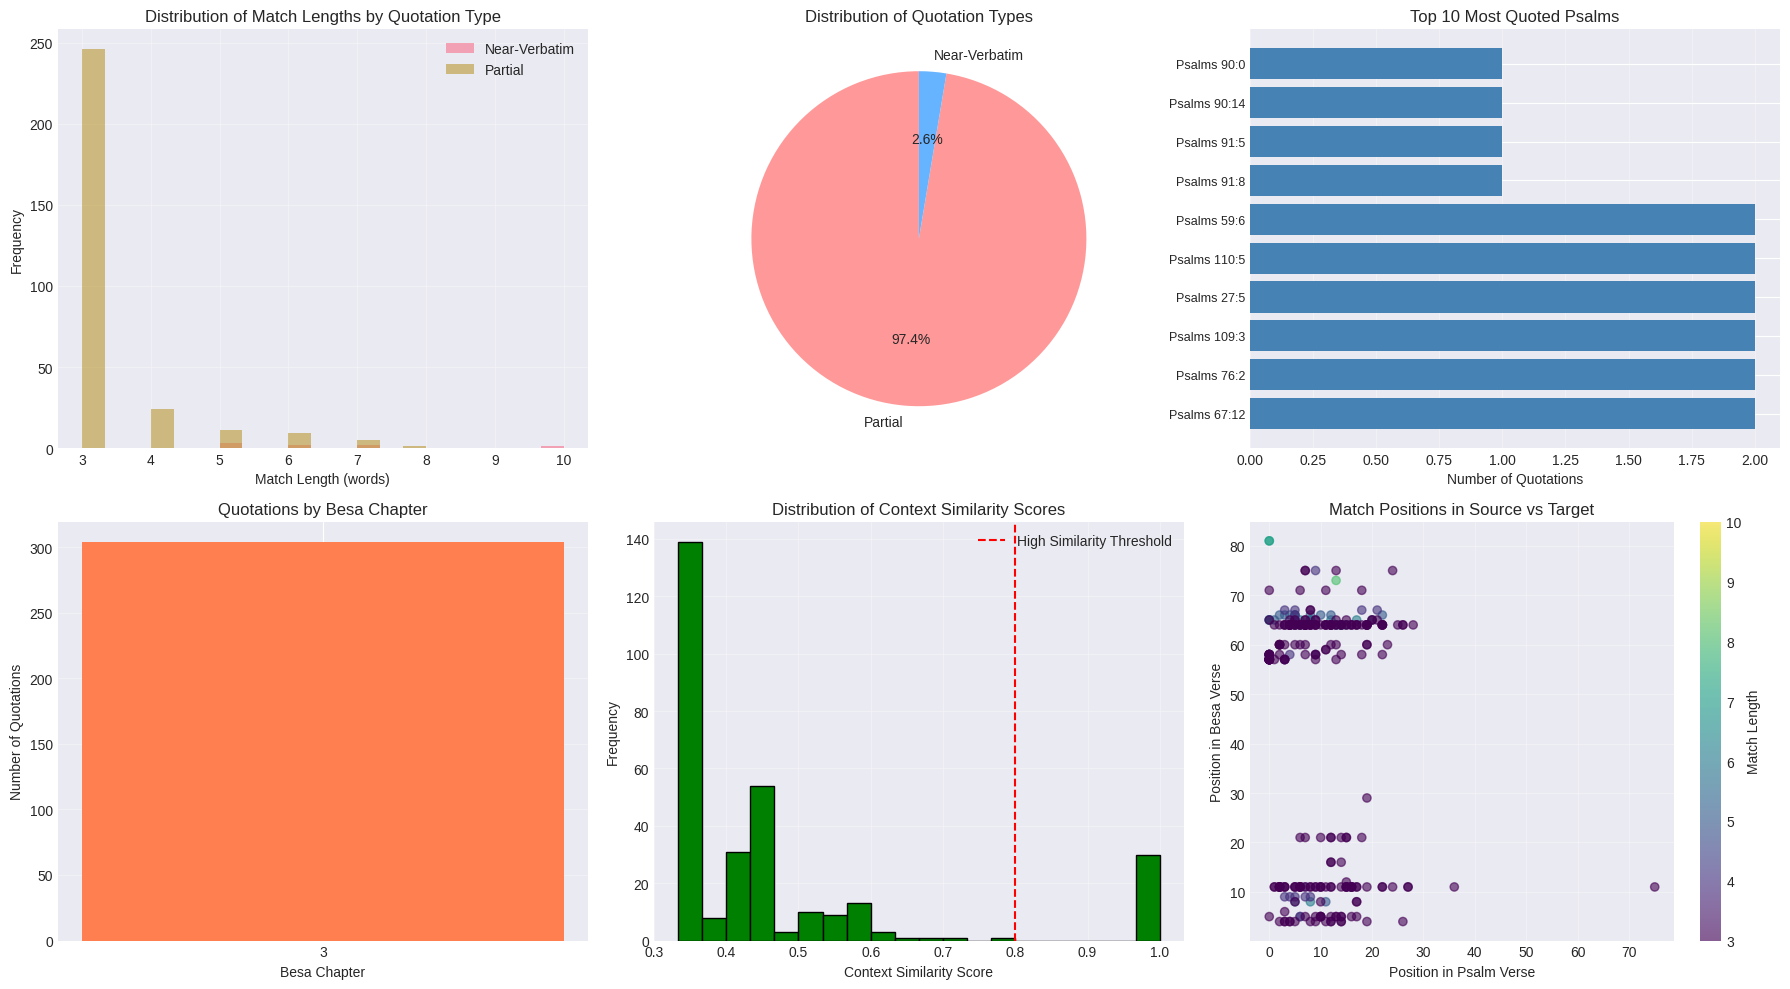


✓ Visualization saved to 'output/quotation_analysis_plots.png'


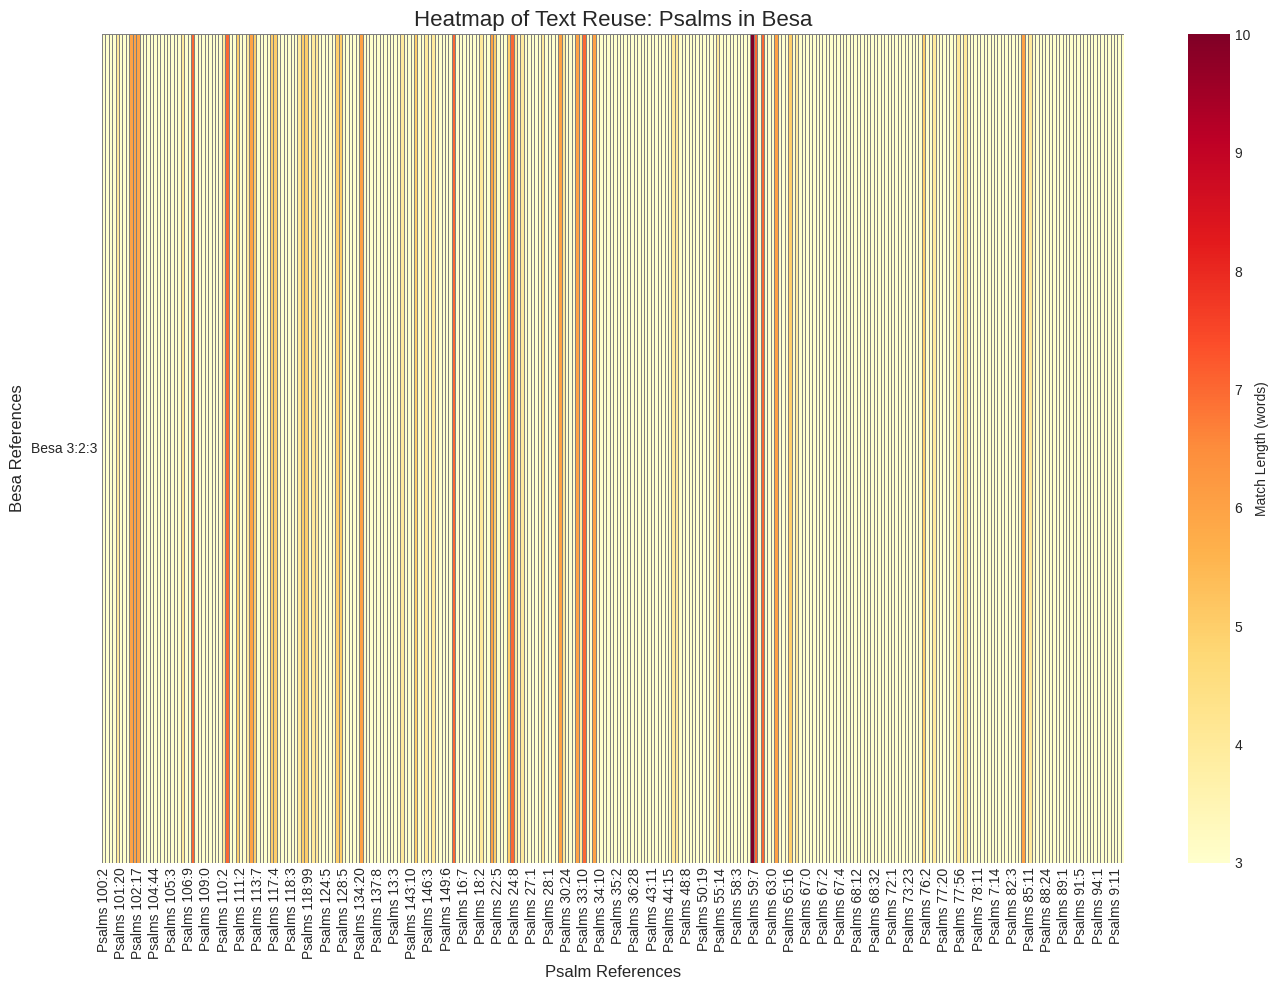

✓ Heatmap saved to 'output/reuse_heatmap.png'


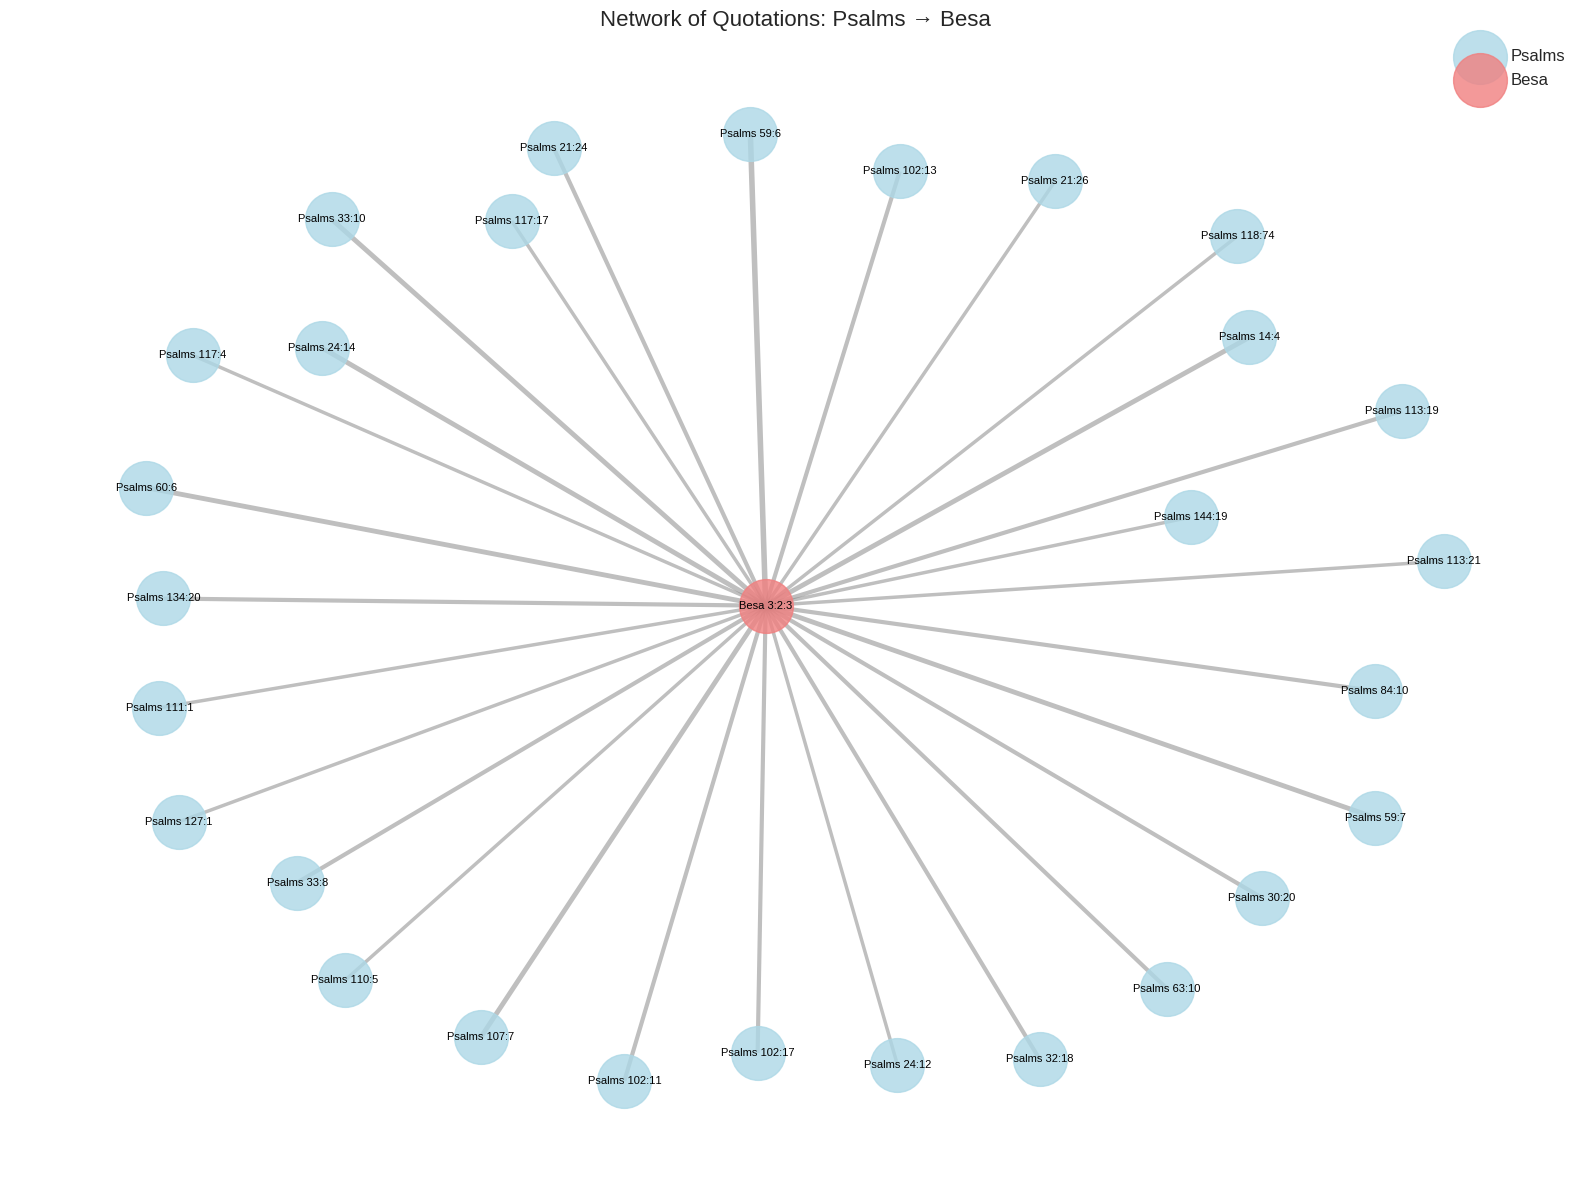

✓ Network graph saved to 'output/quotation_network.png'


✓ Interactive Sankey diagram saved to 'output/quotation_flow.html'

STATISTICAL SUMMARY

Corpus Statistics:
- Psalms analyzed: 2666 verses
- Besa analyzed: 1 verses

Quotation Detection Results:
- Total quotations found: 304
- Verbatim quotations: 0
- Near-verbatim quotations: 8
- Partial matches: 296

Match Characteristics:
- Average match length: 3.4 words
- Longest match: 10 words
- Average context similarity: 45.98%

Most Quoted Psalms:
source_ref
Psalms 67:12    2
Psalms 76:2     2
Psalms 109:3    2
Psalms 27:5     2
Psalms 110:5    2

Besa Verses with Most Quotations:
target_ref
Besa 3:2:3    304

Quotation Density by Besa Chapter:
target_chapter
3    304


✓ Summary saved to 'output/quotation_analysis_summary.txt'
✓ Detailed report saved to 'output/detailed_quotation_report.xlsx'

ANALYSIS COMPLETE

Generated outputs:
1. quotation_analysis_plots.png - Distribution and analysis plots
2. reuse_heatmap.png - Heatmap of text reuse patterns
3. quotation_network.png - Network graph of

In [ ]:
#!/usr/bin/env python3
"""
Advanced Coptic Text Analysis: Near-Verbatim Quotation Detection with Visualizations
For comparing Psalms and Besa's "On Repentance"
"""

# Install required packages
!pip install -q pandas matplotlib seaborn networkx plotly

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter, defaultdict
from pathlib import Path
from difflib import SequenceMatcher
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create output directory
Path("output").mkdir(exist_ok=True)

# ============================================
# DATA PREPARATION
# ============================================

# NOTE: Add your complete Psalms text above

# ============================================
# PARSING FUNCTIONS
# ============================================

def parse_text_advanced(text, text_id):
    """Advanced parsing with metadata"""
    documents = []
    for line in text.strip().split('\n'):
        if line.strip():
            parts = line.split(' ', 2)
            if len(parts) >= 3:
                book = parts[0]
                chapter_verse = parts[1]
                content = parts[2]

                # Extract chapter and verse
                cv_parts = chapter_verse.split(':')
                chapter = int(cv_parts[0]) if cv_parts[0].isdigit() else cv_parts[0]
                verse = int(cv_parts[1]) if len(cv_parts) > 1 and cv_parts[1].isdigit() else 1

                documents.append({
                    'text_id': text_id,
                    'book': book,
                    'reference': f"{book} {chapter_verse}",
                    'chapter': chapter,
                    'verse': verse,
                    'content': content,
                    'tokens': content.split(),
                    'length': len(content.split())
                })

    return documents

# Parse texts
besa_docs = parse_text_advanced(besa, 'besa')
psalms_docs = parse_text_advanced(psalms, 'psalms')

print(f"Loaded {len(besa_docs)} Besa verses")
print(f"Loaded {len(psalms_docs)} Psalm verses")

# ============================================
# VERBATIM QUOTATION DETECTION
# ============================================

class VerbatimQuotationDetector:
    """Advanced detector for near-verbatim quotations"""

    def __init__(self, min_length=4, similarity_threshold=0.85):
        self.min_length = min_length
        self.similarity_threshold = similarity_threshold
        self.results = []

    def calculate_similarity(self, seq1, seq2):
        """Calculate similarity ratio between two sequences"""
        matcher = SequenceMatcher(None, seq1, seq2)
        return matcher.ratio()

    def find_longest_common_subsequence(self, tokens1, tokens2):
        """Find the longest common subsequence with position info"""
        matcher = SequenceMatcher(None, tokens1, tokens2)
        match = matcher.find_longest_match(0, len(tokens1), 0, len(tokens2))

        if match.size >= self.min_length:
            return {
                'source_start': match.a,
                'source_end': match.a + match.size,
                'target_start': match.b,
                'target_end': match.b + match.size,
                'length': match.size,
                'text': ' '.join(tokens1[match.a:match.a + match.size])
            }
        return None

    def detect_verbatim_quotations(self, source_docs, target_docs):
        """Detect near-verbatim quotations between texts"""

        for source in source_docs:
            source_tokens = source['tokens']

            for target in target_docs:
                target_tokens = target['tokens']

                # Find all matching blocks
                matcher = SequenceMatcher(None, source_tokens, target_tokens)
                matching_blocks = matcher.get_matching_blocks()

                for match in matching_blocks:
                    if match.size >= self.min_length:
                        matched_tokens = source_tokens[match.a:match.a + match.size]
                        matched_text = ' '.join(matched_tokens)

                        # Calculate context similarity
                        context_size = min(3, match.a, match.b)
                        if context_size > 0:
                            source_context = source_tokens[max(0, match.a-context_size):match.a+match.size+context_size]
                            target_context = target_tokens[max(0, match.b-context_size):match.b+match.size+context_size]
                            context_similarity = self.calculate_similarity(source_context, target_context)
                        else:
                            context_similarity = 1.0

                        # Calculate exact match ratio
                        exact_ratio = match.size / min(len(source_tokens), len(target_tokens))

                        # Determine quotation type
                        if match.size >= 7 and exact_ratio > 0.6:
                            quotation_type = 'Verbatim'
                        elif match.size >= 5 and context_similarity > 0.7:
                            quotation_type = 'Near-Verbatim'
                        elif match.size >= self.min_length:
                            quotation_type = 'Partial'
                        else:
                            continue

                        self.results.append({
                            'source_ref': source['reference'],
                            'target_ref': target['reference'],
                            'source_chapter': source['chapter'],
                            'target_chapter': target['chapter'],
                            'matched_text': matched_text,
                            'match_length': match.size,
                            'source_position': match.a,
                            'target_position': match.b,
                            'context_similarity': context_similarity,
                            'exact_ratio': exact_ratio,
                            'quotation_type': quotation_type,
                            'source_full': ' '.join(source_tokens),
                            'target_full': ' '.join(target_tokens)
                        })

        # Remove duplicates and sort by match length
        seen = set()
        unique_results = []
        for r in self.results:
            key = (r['source_ref'], r['target_ref'], r['matched_text'])
            if key not in seen:
                seen.add(key)
                unique_results.append(r)

        return pd.DataFrame(unique_results).sort_values('match_length', ascending=False)

# ============================================
# RUN DETECTION
# ============================================

print("\n" + "="*80)
print("DETECTING VERBATIM QUOTATIONS")
print("="*80)

detector = VerbatimQuotationDetector(min_length=3, similarity_threshold=0.8)
results_df = detector.detect_verbatim_quotations(psalms_docs, besa_docs)

if not results_df.empty:
    print(f"\nFound {len(results_df)} potential quotations")

    # Filter for different quotation types
    verbatim_df = results_df[results_df['quotation_type'] == 'Verbatim']
    near_verbatim_df = results_df[results_df['quotation_type'] == 'Near-Verbatim']
    partial_df = results_df[results_df['quotation_type'] == 'Partial']

    print(f"  - Verbatim: {len(verbatim_df)}")
    print(f"  - Near-Verbatim: {len(near_verbatim_df)}")
    print(f"  - Partial: {len(partial_df)}")

    # Display top verbatim quotations
    print("\n" + "="*80)
    print("TOP VERBATIM/NEAR-VERBATIM QUOTATIONS")
    print("="*80)

    top_quotes = results_df[results_df['quotation_type'].isin(['Verbatim', 'Near-Verbatim'])].head(10)
    for idx, row in top_quotes.iterrows():
        print(f"\n{row['source_ref']} → {row['target_ref']}")
        print(f"Type: {row['quotation_type']}")
        print(f"Length: {row['match_length']} words")
        print(f"Text: \"{row['matched_text']}\"")
        print(f"Context similarity: {row['context_similarity']:.2%}")

    # Save detailed results
    results_df.to_csv('output/verbatim_quotations.csv', index=False, encoding='utf-8')
    print(f"\n✓ Detailed results saved to 'output/verbatim_quotations.csv'")

# ============================================
# VISUALIZATION 1: DISTRIBUTION PLOTS
# ============================================

if not results_df.empty:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # 1. Match length distribution by quotation type
    for qt in results_df['quotation_type'].unique():
        subset = results_df[results_df['quotation_type'] == qt]
        axes[0, 0].hist(subset['match_length'], alpha=0.6, label=qt, bins=15)
    axes[0, 0].set_xlabel('Match Length (words)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Match Lengths by Quotation Type')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Quotation types pie chart
    type_counts = results_df['quotation_type'].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    axes[0, 1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
                   colors=colors, startangle=90)
    axes[0, 1].set_title('Distribution of Quotation Types')

    # 3. Top referenced Psalms
    psalm_counts = results_df['source_ref'].value_counts().head(10)
    axes[0, 2].barh(range(len(psalm_counts)), psalm_counts.values, color='steelblue')
    axes[0, 2].set_yticks(range(len(psalm_counts)))
    axes[0, 2].set_yticklabels(psalm_counts.index, fontsize=9)
    axes[0, 2].set_xlabel('Number of Quotations')
    axes[0, 2].set_title('Top 10 Most Quoted Psalms')
    axes[0, 2].grid(True, alpha=0.3, axis='x')

    # 4. Besa chapters with most quotations
    besa_chapter_counts = results_df.groupby('target_chapter').size().sort_values(ascending=False)
    axes[1, 0].bar(besa_chapter_counts.index.astype(str), besa_chapter_counts.values, color='coral')
    axes[1, 0].set_xlabel('Besa Chapter')
    axes[1, 0].set_ylabel('Number of Quotations')
    axes[1, 0].set_title('Quotations by Besa Chapter')
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # 5. Context similarity distribution
    axes[1, 1].hist(results_df['context_similarity'], bins=20, color='green', edgecolor='black')
    axes[1, 1].set_xlabel('Context Similarity Score')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Distribution of Context Similarity Scores')
    axes[1, 1].axvline(x=0.8, color='red', linestyle='--', label='High Similarity Threshold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # 6. Match position in verses
    axes[1, 2].scatter(results_df['source_position'], results_df['target_position'],
                      c=results_df['match_length'], cmap='viridis', alpha=0.6)
    axes[1, 2].set_xlabel('Position in Psalm Verse')
    axes[1, 2].set_ylabel('Position in Besa Verse')
    axes[1, 2].set_title('Match Positions in Source vs Target')
    cbar = plt.colorbar(axes[1, 2].collections[0], ax=axes[1, 2])
    cbar.set_label('Match Length')
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('output/quotation_analysis_plots.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n✓ Visualization saved to 'output/quotation_analysis_plots.png'")

# ============================================
# VISUALIZATION 2: HEATMAP
# ============================================

if not results_df.empty:
    # Create a matrix for heatmap
    pivot_data = results_df.pivot_table(
        index='target_ref',
        columns='source_ref',
        values='match_length',
        aggfunc='max',
        fill_value=0
    )

    if not pivot_data.empty:
        plt.figure(figsize=(14, 10))
        sns.heatmap(pivot_data, cmap='YlOrRd', cbar_kws={'label': 'Match Length (words)'},
                   linewidths=0.5, linecolor='gray')
        plt.title('Heatmap of Text Reuse: Psalms in Besa', fontsize=16)
        plt.xlabel('Psalm References', fontsize=12)
        plt.ylabel('Besa References', fontsize=12)
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig('output/reuse_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✓ Heatmap saved to 'output/reuse_heatmap.png'")

# ============================================
# VISUALIZATION 3: NETWORK GRAPH
# ============================================

if not results_df.empty:
    # Create network graph
    G = nx.Graph()

    # Add edges for significant quotations
    significant_quotes = results_df[results_df['match_length'] >= 4].head(30)

    for _, row in significant_quotes.iterrows():
        G.add_edge(row['source_ref'], row['target_ref'],
                  weight=row['match_length'],
                  type=row['quotation_type'])

    if G.nodes():
        plt.figure(figsize=(16, 12))

        # Create layout
        pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

        # Separate Psalm and Besa nodes
        psalm_nodes = [n for n in G.nodes() if n.startswith('Psalm')]
        besa_nodes = [n for n in G.nodes() if n.startswith('Besa')]

        # Draw nodes
        nx.draw_networkx_nodes(G, pos, nodelist=psalm_nodes,
                              node_color='lightblue', node_size=1500,
                              label='Psalms', alpha=0.8)
        nx.draw_networkx_nodes(G, pos, nodelist=besa_nodes,
                              node_color='lightcoral', node_size=1500,
                              label='Besa', alpha=0.8)

        # Draw edges with varying thickness
        edges = G.edges()
        weights = [G[u][v]['weight'] for u, v in edges]
        nx.draw_networkx_edges(G, pos, width=[w*0.5 for w in weights],
                              alpha=0.5, edge_color='gray')

        # Draw labels
        nx.draw_networkx_labels(G, pos, font_size=8)

        plt.title('Network of Quotations: Psalms → Besa', fontsize=16)
        plt.legend(loc='upper right', fontsize=12)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('output/quotation_network.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✓ Network graph saved to 'output/quotation_network.png'")

# ============================================
# VISUALIZATION 4: INTERACTIVE PLOTLY
# ============================================

if not results_df.empty:
    # Create interactive Sankey diagram
    source_nodes = results_df['source_ref'].unique().tolist()
    target_nodes = results_df['target_ref'].unique().tolist()

    # Create node labels
    all_nodes = source_nodes + target_nodes
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    # Prepare data for Sankey
    source_indices = [node_dict[ref] for ref in results_df['source_ref']]
    target_indices = [node_dict[ref] for ref in results_df['target_ref']]

    # Create Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes,
            color=['lightblue']*len(source_nodes) + ['lightcoral']*len(target_nodes)
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=results_df['match_length'].tolist(),
            color=['rgba(0,0,255,0.2)' if qt == 'Verbatim' else
                   'rgba(0,255,0,0.2)' if qt == 'Near-Verbatim' else
                   'rgba(255,0,0,0.2)'
                   for qt in results_df['quotation_type']]
        )
    )])

    fig.update_layout(
        title_text="Flow of Quotations from Psalms to Besa",
        font_size=10,
        height=800
    )

    fig.write_html('output/quotation_flow.html')
    fig.show()

    print("✓ Interactive Sankey diagram saved to 'output/quotation_flow.html'")

# ============================================
# STATISTICAL SUMMARY
# ============================================

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

if not results_df.empty:
    summary = f"""
Corpus Statistics:
- Psalms analyzed: {len(psalms_docs)} verses
- Besa analyzed: {len(besa_docs)} verses

Quotation Detection Results:
- Total quotations found: {len(results_df)}
- Verbatim quotations: {len(verbatim_df)}
- Near-verbatim quotations: {len(near_verbatim_df)}
- Partial matches: {len(partial_df)}

Match Characteristics:
- Average match length: {results_df['match_length'].mean():.1f} words
- Longest match: {results_df['match_length'].max()} words
- Average context similarity: {results_df['context_similarity'].mean():.2%}

Most Quoted Psalms:
{results_df['source_ref'].value_counts().head(5).to_string()}

Besa Verses with Most Quotations:
{results_df['target_ref'].value_counts().head(5).to_string()}

Quotation Density by Besa Chapter:
{besa_chapter_counts.to_string() if 'besa_chapter_counts' in locals() else 'N/A'}
"""

    print(summary)

    # Save summary
    with open('output/quotation_analysis_summary.txt', 'w', encoding='utf-8') as f:
        f.write(summary)

    print("\n✓ Summary saved to 'output/quotation_analysis_summary.txt'")

    # Create detailed report
    report_df = results_df[['source_ref', 'target_ref', 'quotation_type',
                            'match_length', 'matched_text', 'context_similarity']]
    report_df.to_excel('output/detailed_quotation_report.xlsx', index=False)
    print("✓ Detailed report saved to 'output/detailed_quotation_report.xlsx'")

else:
    print("\nNo quotations detected. Please ensure:")
    print("1. You've added your complete Psalms text")
    print("2. The text format matches: 'Book Chapter:Verse Text'")
    print("3. Both texts use consistent Coptic orthography")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("\nGenerated outputs:")
print("1. quotation_analysis_plots.png - Distribution and analysis plots")
print("2. reuse_heatmap.png - Heatmap of text reuse patterns")
print("3. quotation_network.png - Network graph of quotations")
print("4. quotation_flow.html - Interactive Sankey diagram")
print("5. verbatim_quotations.csv - Detailed quotation data")
print("6. quotation_analysis_summary.txt - Statistical summary")
print("7. detailed_quotation_report.xlsx - Excel report")

Loaded 1 Besa verses
Loaded 2666 Psalm verses

DETECTING TEXT REUSE PATTERNS

Found 304 text reuse instances
✓ Generated highlighted text output


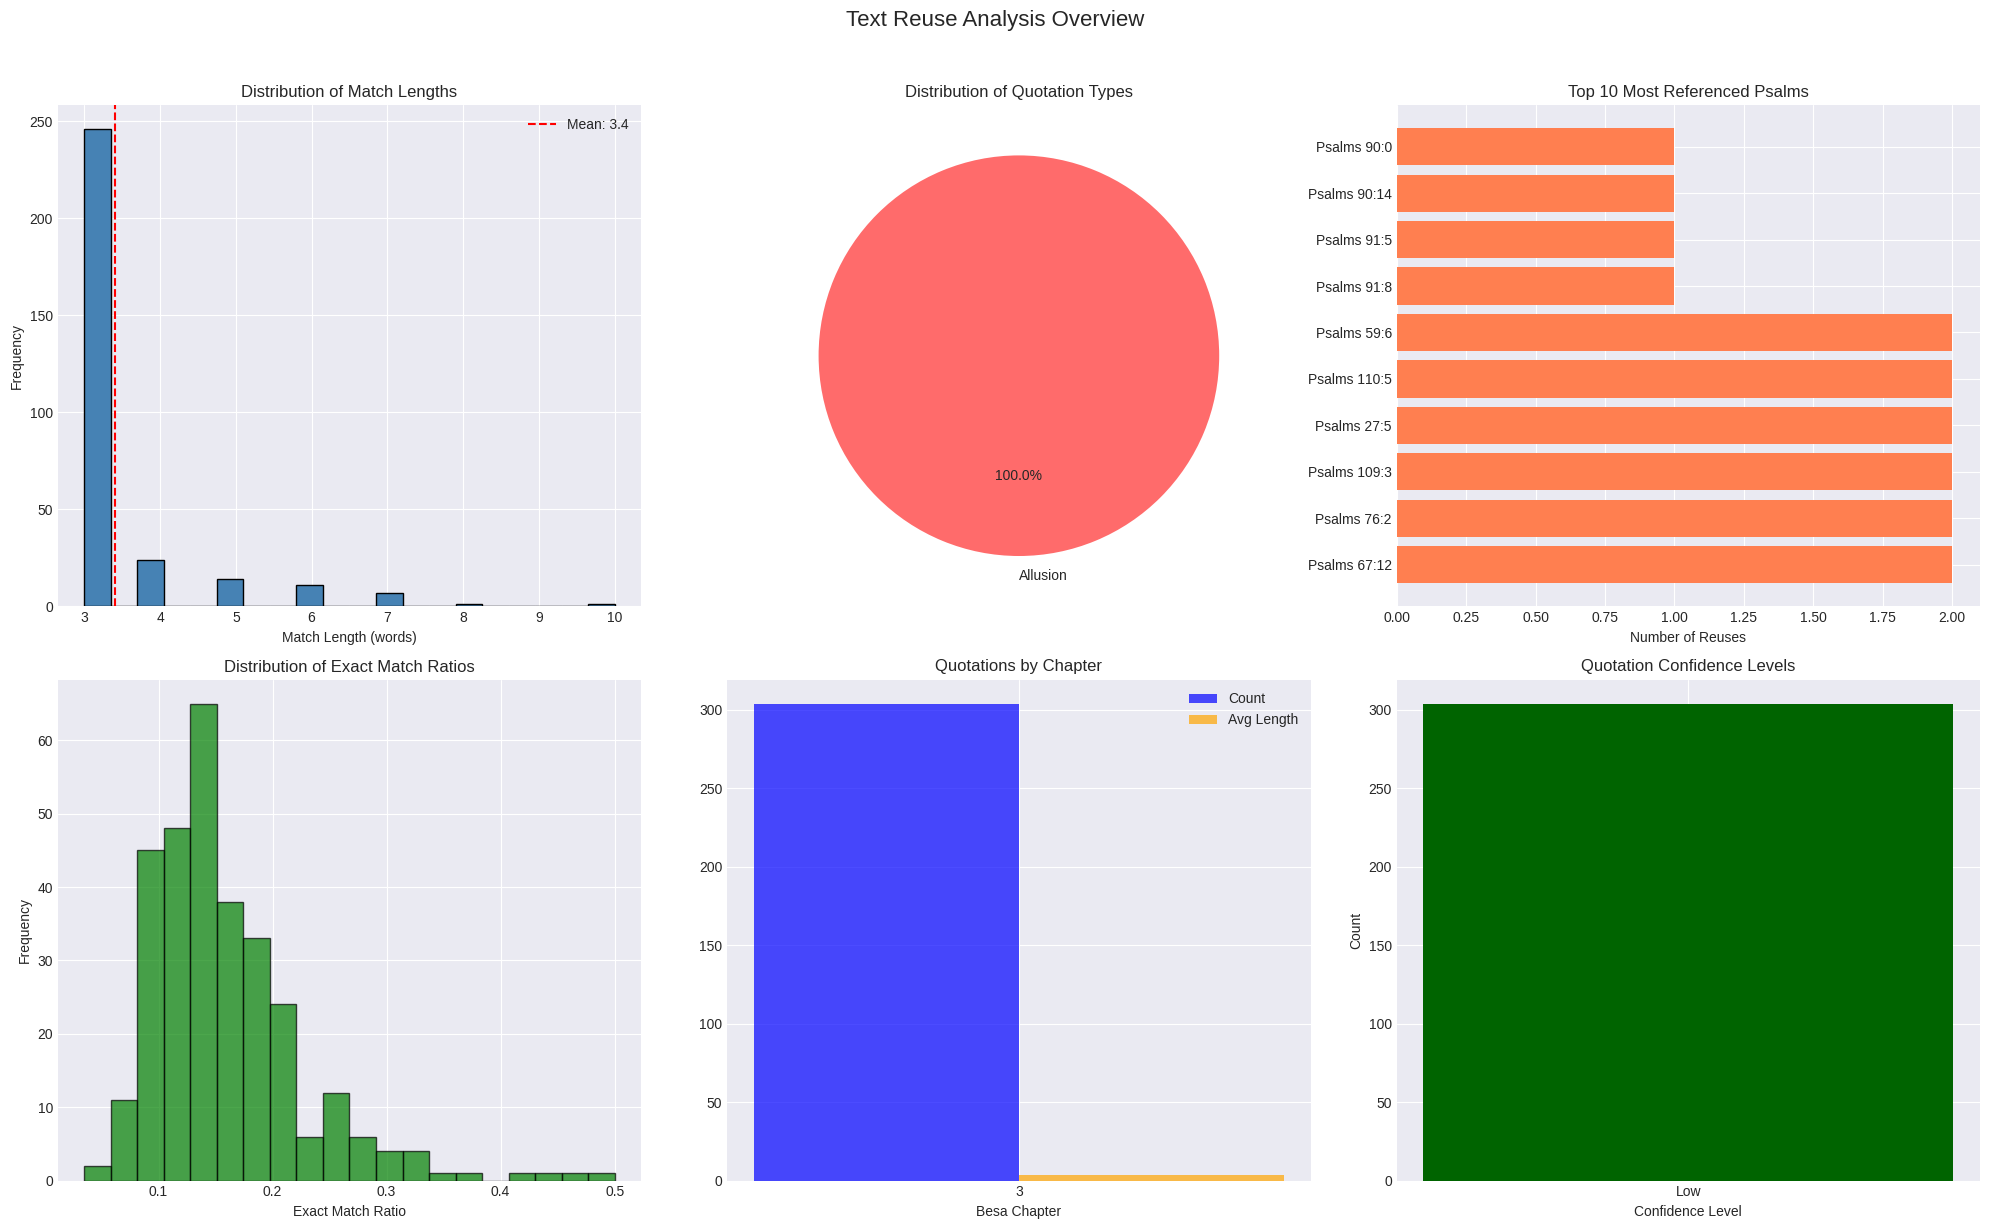

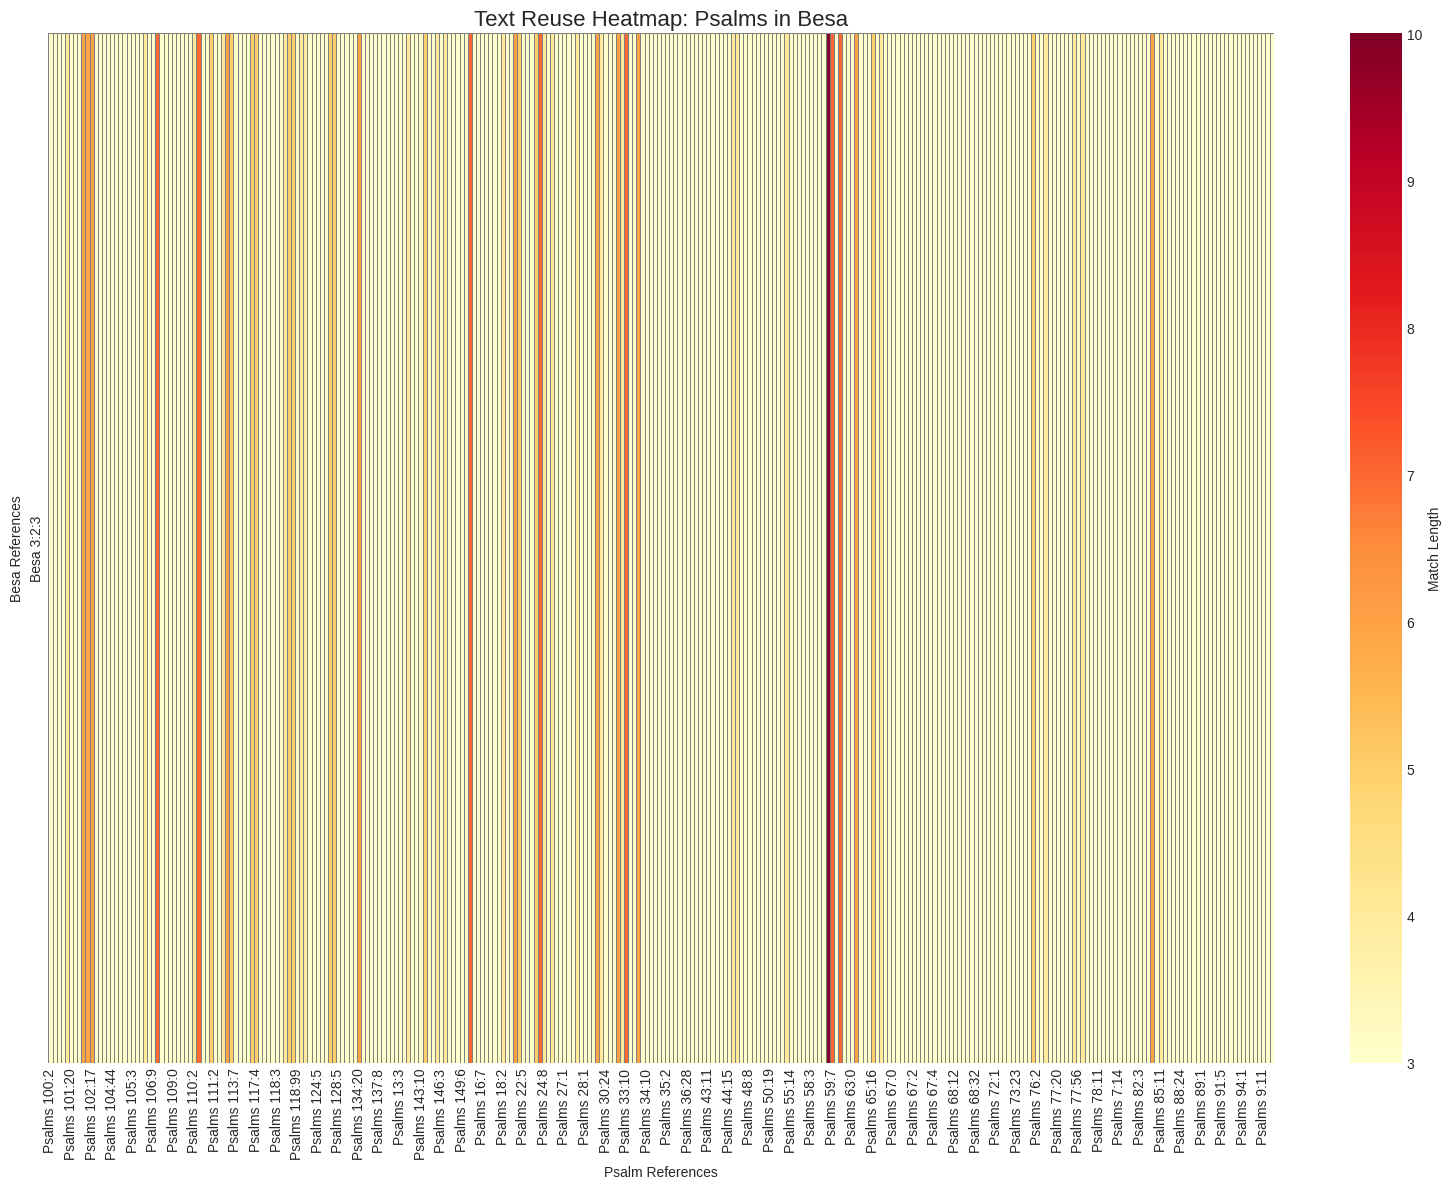

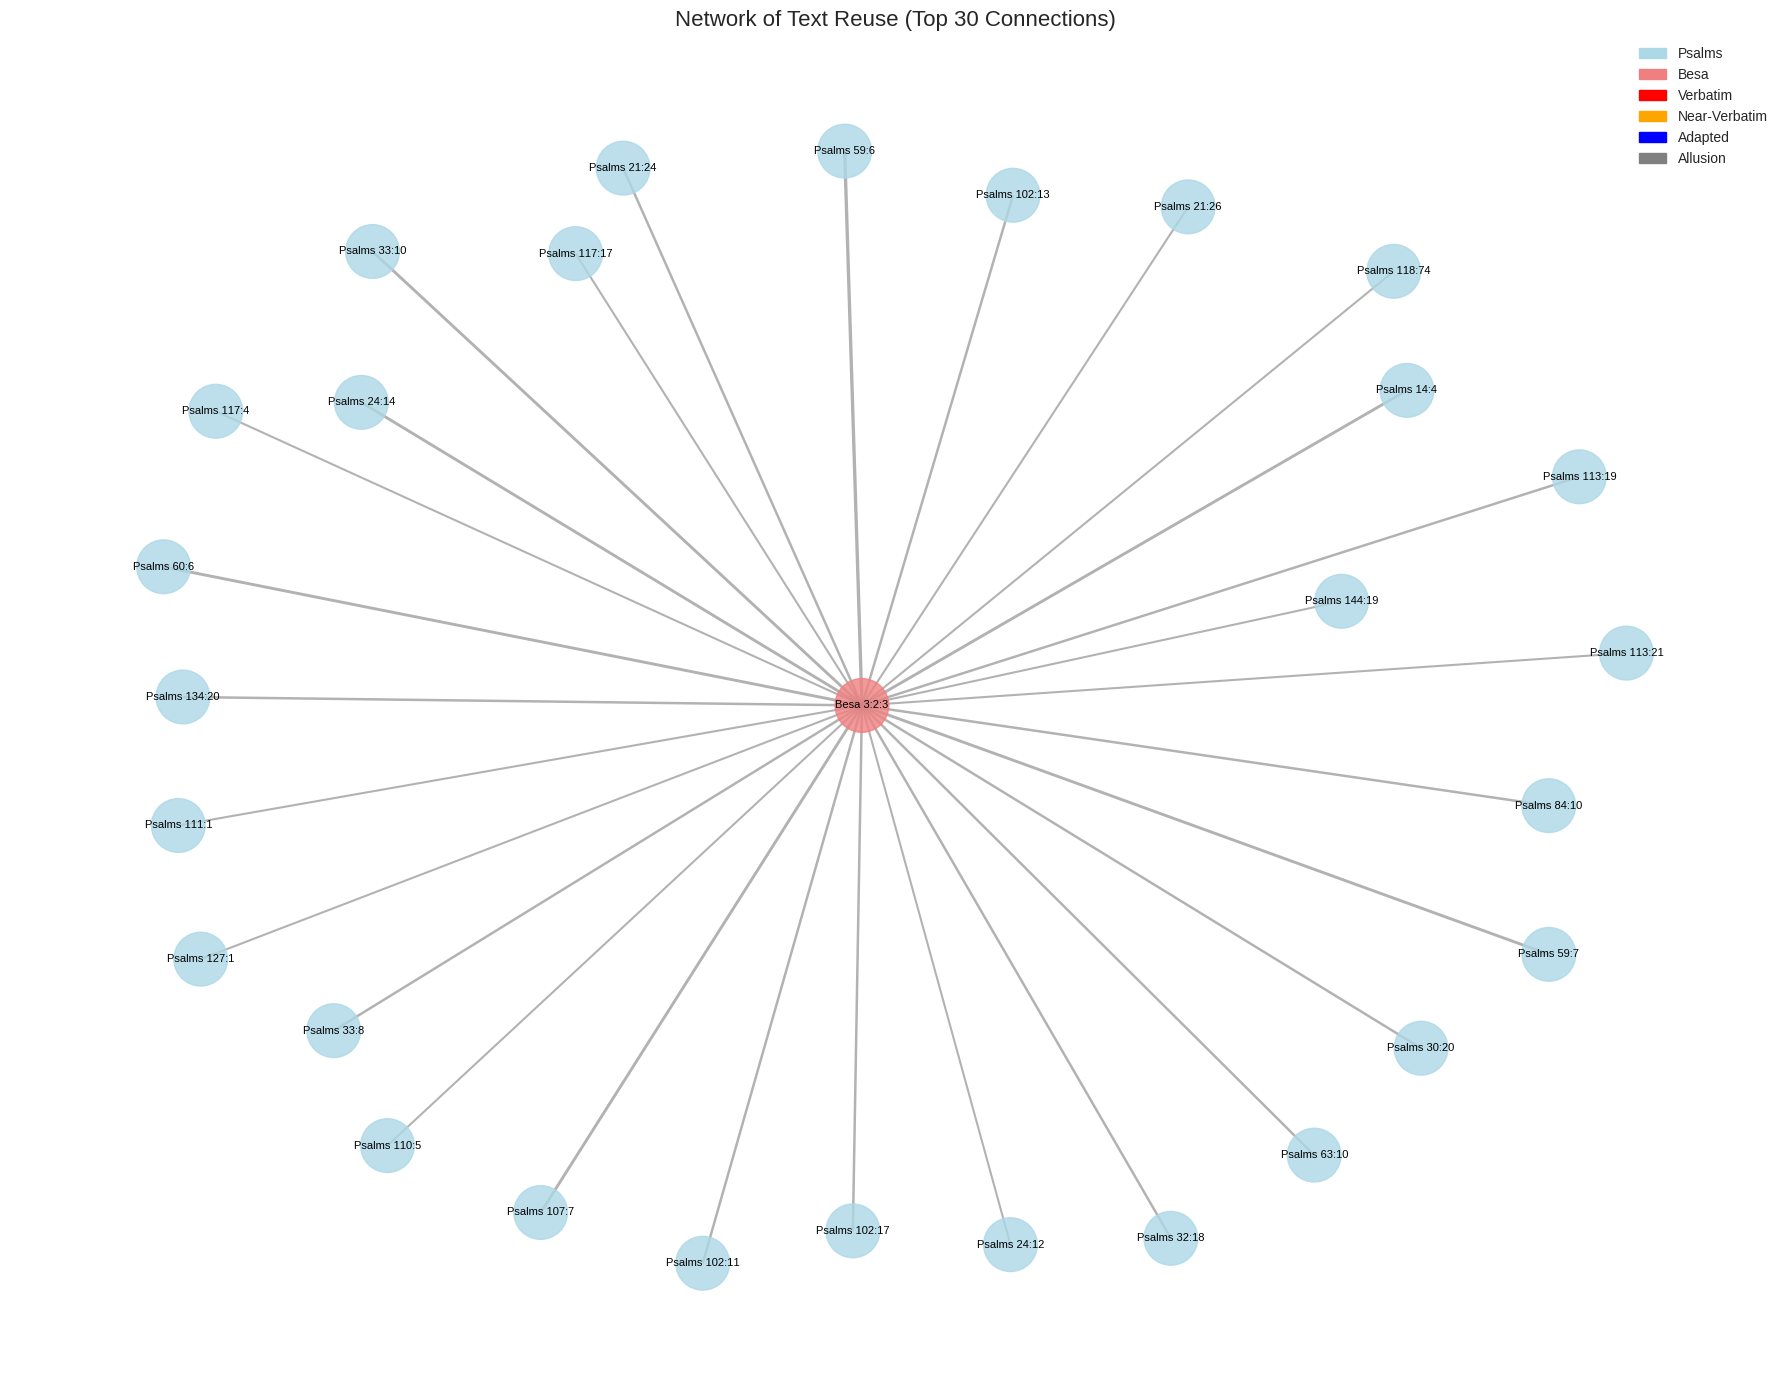

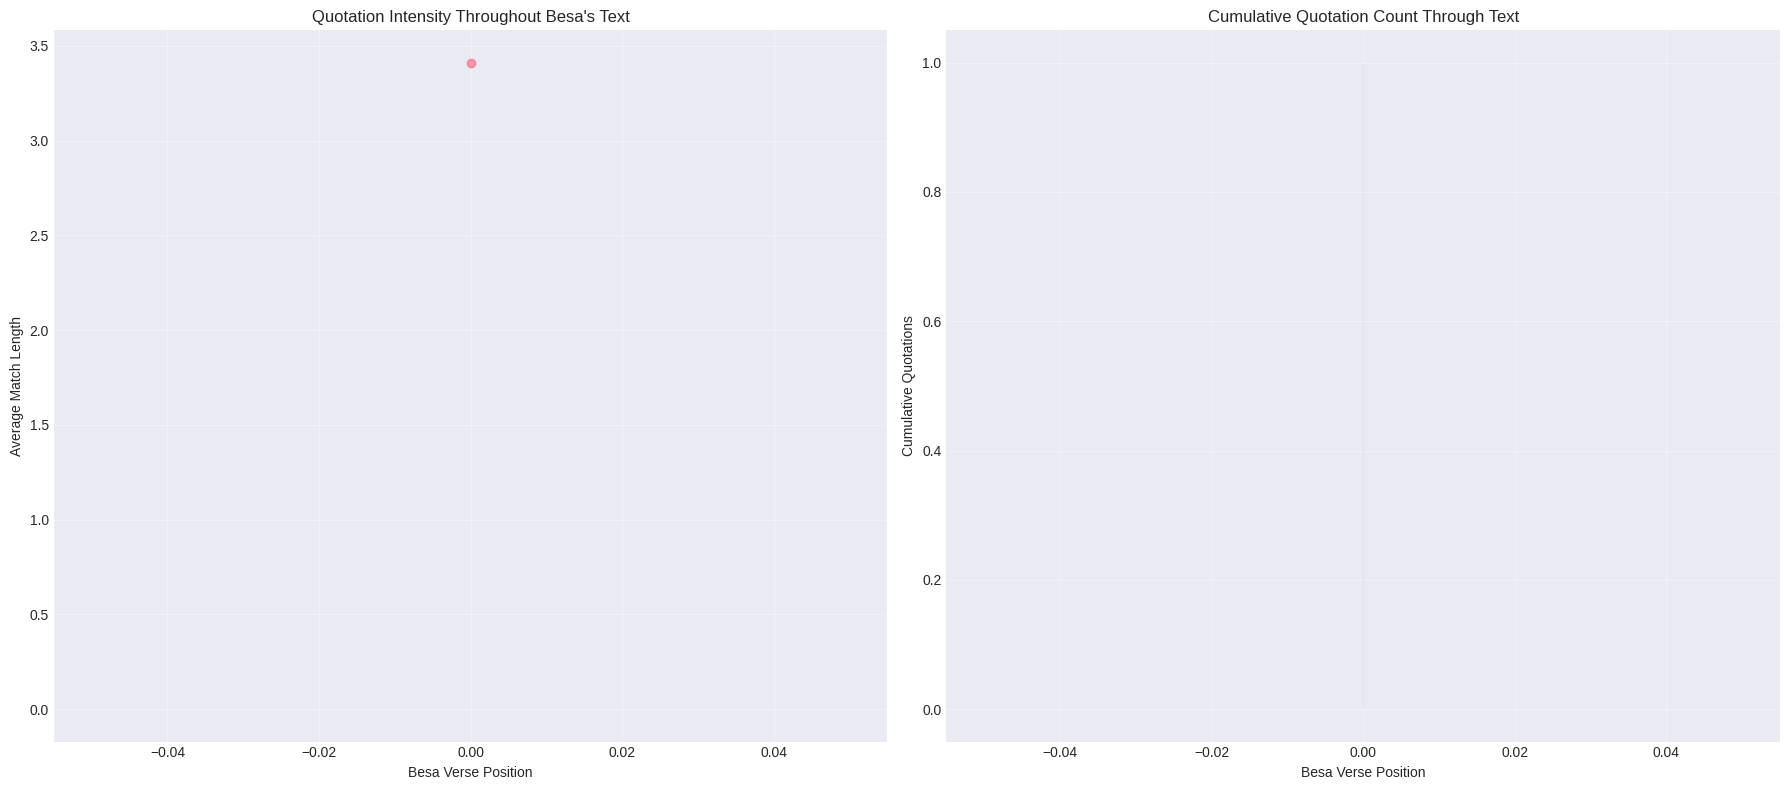

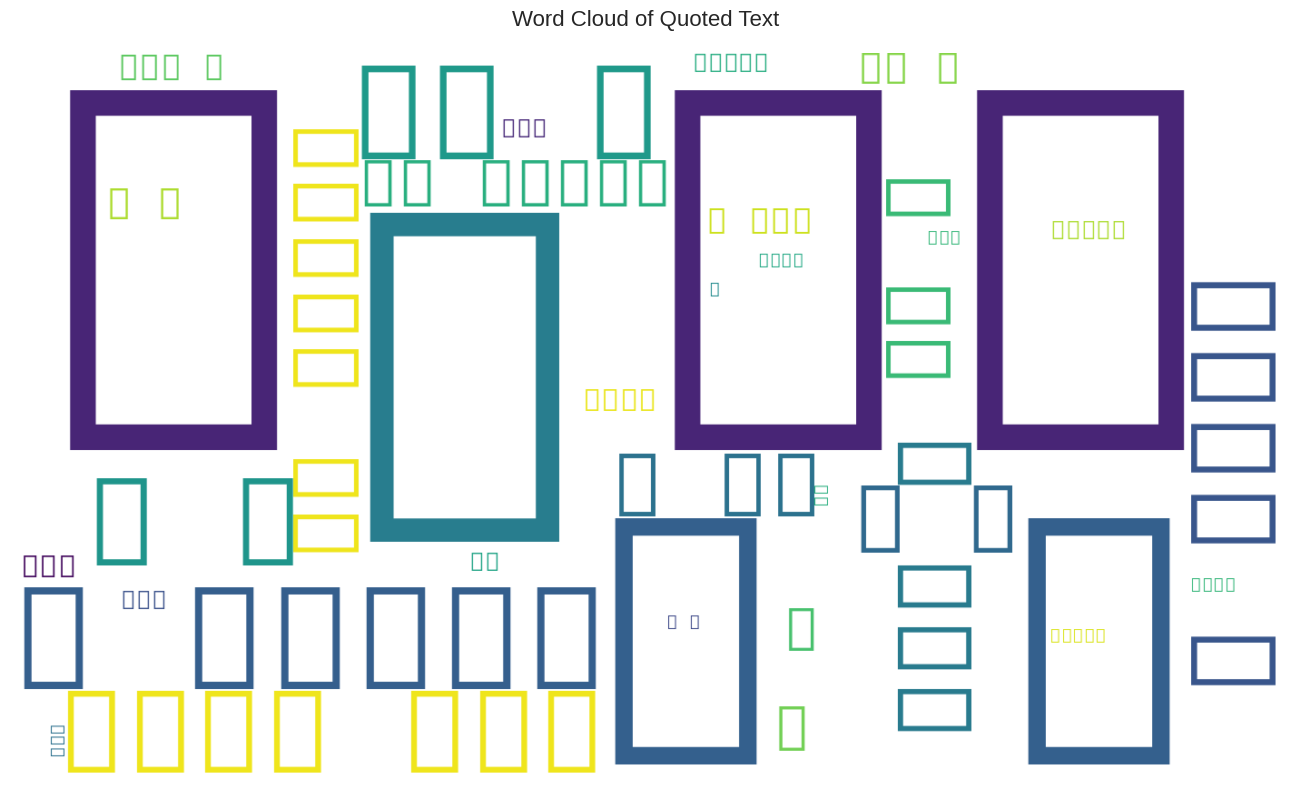

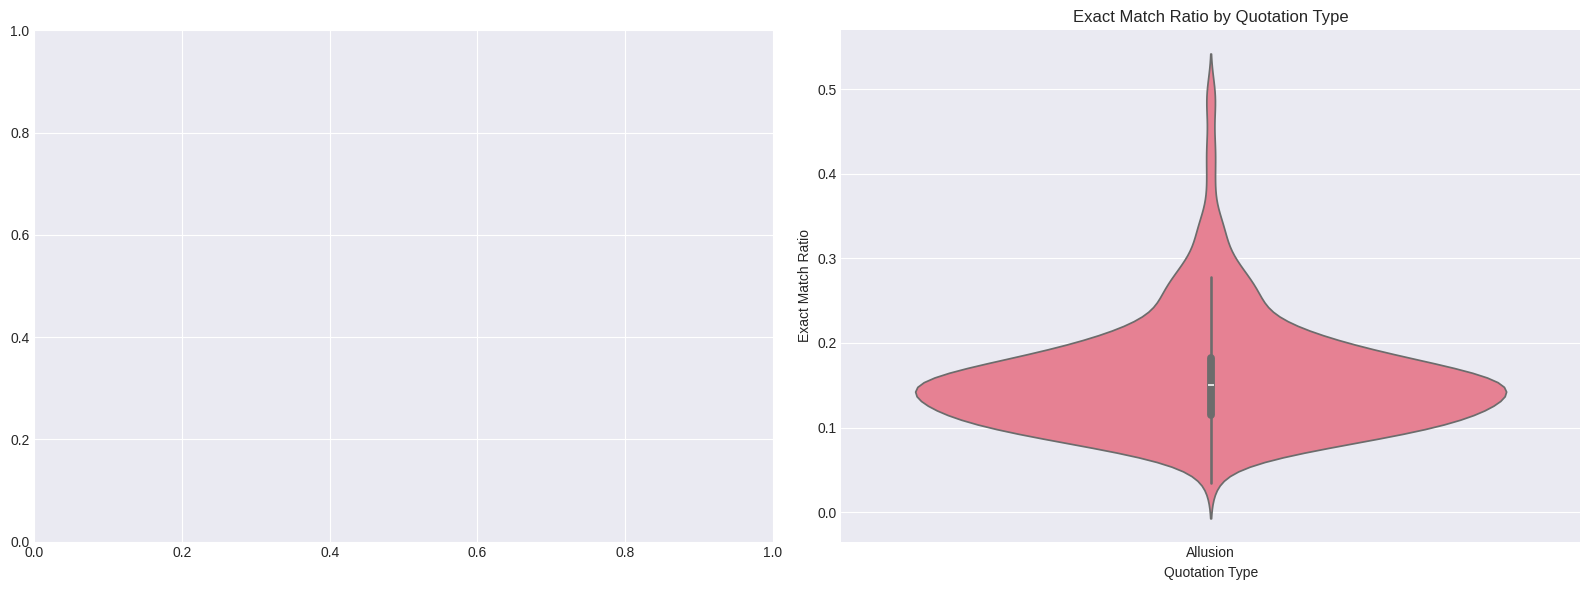

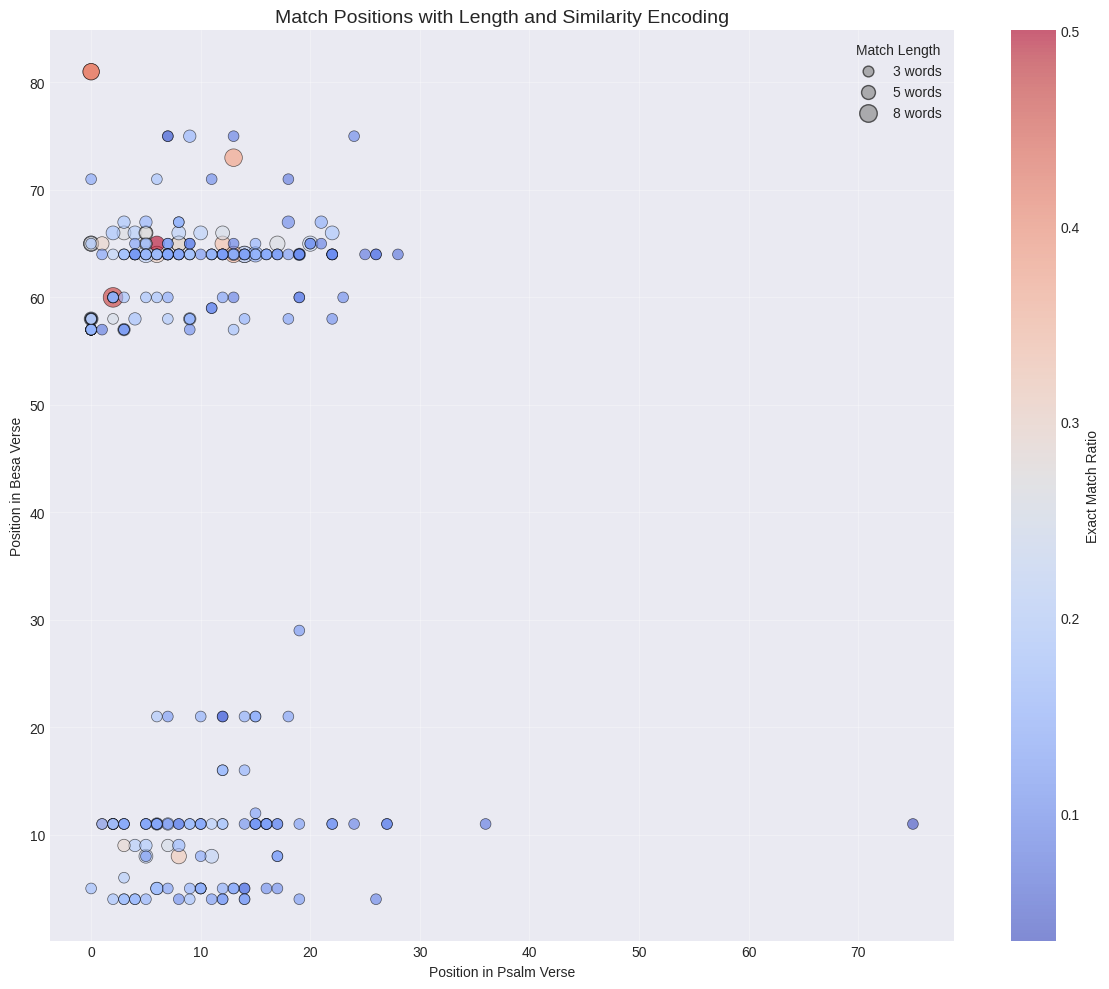

<Figure size 1400x800 with 0 Axes>

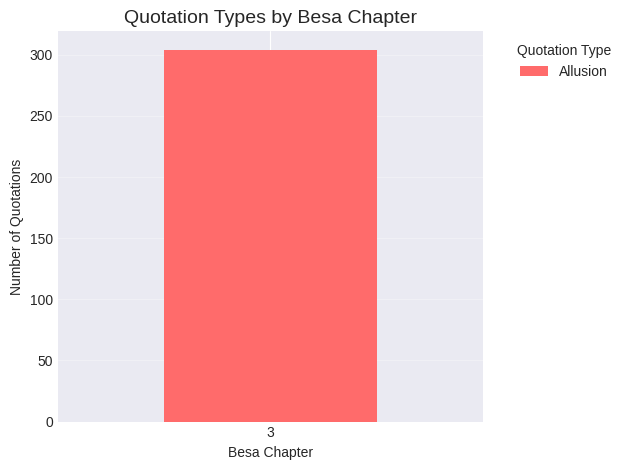


✓ All visualizations generated successfully!

ANALYSIS COMPLETE

Generated outputs:
1. highlighted_text_reuse.html - Interactive highlighted text
2. overview_analysis.png - 6-panel overview
3. reuse_heatmap.png - Detailed heatmap
4. network_graph.png - Network visualization
5. temporal_flow.png - Sequential analysis
6. quotation_wordcloud.png - Word cloud
7. violin_plots.png - Distribution analysis
8. position_scatter.png - Position analysis
9. stacked_chapters.png - Chapter breakdown
10. sankey_diagram.html - Interactive flow diagram
11. bubble_chart.html - Interactive bubble chart
12. parallel_coordinates.html - Multi-dimensional analysis
13. complete_analysis.csv - Full data export
14. analysis_summary.txt - Statistical report


In [ ]:
#!/usr/bin/env python3
"""
Enhanced Coptic Text Reuse Analysis with Text Highlighting and Extended Visualizations
For comparing Psalms and Besa's "On Repentance"
"""

# Install required packages
!pip install -q pandas matplotlib seaborn networkx plotly wordcloud adjustText

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter, defaultdict
from pathlib import Path
from difflib import SequenceMatcher
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

# Try to import additional libraries
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install -q wordcloud
    from wordcloud import WordCloud

try:
    from adjustText import adjust_text
except ImportError:
    !pip install -q adjustText
    from adjustText import adjust_text

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create output directory
Path("output").mkdir(exist_ok=True)

# ============================================
# DATA INPUT - You need to add your texts here
# ============================================

# IMPORTANT: Replace these with your actual texts

# ============================================
# PARSING AND PREPROCESSING
# ============================================

def parse_text_advanced(text, text_id):
    """Advanced parsing with metadata extraction"""
    documents = []
    lines = [line.strip() for line in text.strip().split('\n') if line.strip()]

    for line in lines:
        # More flexible parsing for different formats
        match = re.match(r'^(\S+)\s+(\S+)\s+(.+)$', line)
        if match:
            book = match.group(1)
            ref = match.group(2)
            content = match.group(3)

            # Parse reference (handle both X:Y and X:Y:Z formats)
            ref_parts = ref.split(':')
            if len(ref_parts) >= 2:
                chapter = ref_parts[0]
                verse = ':'.join(ref_parts[1:])
            else:
                chapter = ref_parts[0]
                verse = '1'

            documents.append({
                'text_id': text_id,
                'book': book,
                'reference': f"{book} {ref}",
                'chapter': chapter,
                'verse': verse,
                'content': content,
                'tokens': content.split(),
                'length': len(content.split())
            })

    return documents

# Parse texts
besa_docs = parse_text_advanced(besa, 'besa')
psalms_docs = parse_text_advanced(psalms, 'psalms')

print(f"Loaded {len(besa_docs)} Besa verses")
print(f"Loaded {len(psalms_docs)} Psalm verses")

# ============================================
# ADVANCED QUOTATION DETECTION
# ============================================

class EnhancedQuotationDetector:
    """Enhanced detector with highlighting capabilities"""

    def __init__(self, min_length=3, similarity_threshold=0.8):
        self.min_length = min_length
        self.similarity_threshold = similarity_threshold
        self.results = []

    def detect_all_matches(self, source_docs, target_docs):
        """Detect all types of text reuse with position tracking"""

        for source in source_docs:
            source_tokens = source['tokens']

            for target in target_docs:
                target_tokens = target['tokens']

                # Find all matching blocks
                matcher = SequenceMatcher(None, source_tokens, target_tokens)
                matching_blocks = matcher.get_matching_blocks()

                for match in matching_blocks:
                    if match.size >= self.min_length:
                        matched_tokens = source_tokens[match.a:match.a + match.size]
                        matched_text = ' '.join(matched_tokens)

                        # Calculate similarity metrics
                        exact_ratio = match.size / min(len(source_tokens), len(target_tokens))
                        overall_similarity = matcher.ratio()

                        # Classify quotation type
                        if match.size >= 8 and exact_ratio > 0.7:
                            quotation_type = 'Verbatim'
                            confidence = 'High'
                        elif match.size >= 6 and exact_ratio > 0.5:
                            quotation_type = 'Near-Verbatim'
                            confidence = 'High'
                        elif match.size >= 4 and overall_similarity > 0.4:
                            quotation_type = 'Adapted'
                            confidence = 'Medium'
                        elif match.size >= self.min_length:
                            quotation_type = 'Allusion'
                            confidence = 'Low'
                        else:
                            continue

                        self.results.append({
                            'source_ref': source['reference'],
                            'target_ref': target['reference'],
                            'source_chapter': source['chapter'],
                            'target_chapter': target['chapter'],
                            'matched_text': matched_text,
                            'match_length': match.size,
                            'source_start': match.a,
                            'source_end': match.a + match.size,
                            'target_start': match.b,
                            'target_end': match.b + match.size,
                            'exact_ratio': exact_ratio,
                            'overall_similarity': overall_similarity,
                            'quotation_type': quotation_type,
                            'confidence': confidence,
                            'source_tokens': source_tokens,
                            'target_tokens': target_tokens
                        })

        # Remove duplicates
        seen = set()
        unique_results = []
        for r in self.results:
            key = (r['source_ref'], r['target_ref'], r['matched_text'])
            if key not in seen:
                seen.add(key)
                unique_results.append(r)

        return pd.DataFrame(unique_results).sort_values('match_length', ascending=False)

# ============================================
# TEXT HIGHLIGHTING FUNCTION
# ============================================

def generate_highlighted_html(results_df, besa_docs, psalms_docs):
    """Generate HTML with highlighted text reuses"""

    # Create color mapping for different quotation types
    color_map = {
        'Verbatim': '#ff6b6b',      # Red
        'Near-Verbatim': '#4ecdc4',  # Teal
        'Adapted': '#45b7d1',        # Blue
        'Allusion': '#96ceb4'        # Green
    }

    html_content = """
    <html>
    <head>
        <style>
            body { font-family: 'Times New Roman', serif; line-height: 1.8; margin: 40px; }
            h1 { color: #2c3e50; border-bottom: 3px solid #3498db; padding-bottom: 10px; }
            h2 { color: #34495e; margin-top: 30px; }
            .verse { margin: 15px 0; padding: 10px; background: #f8f9fa; border-left: 4px solid #dee2e6; }
            .reference { font-weight: bold; color: #495057; margin-right: 10px; }
            .highlight-verbatim { background-color: #ffcccb; padding: 2px 4px; border-radius: 3px; font-weight: bold; }
            .highlight-near { background-color: #b3e5e1; padding: 2px 4px; border-radius: 3px; font-weight: bold; }
            .highlight-adapted { background-color: #b3d9e6; padding: 2px 4px; border-radius: 3px; }
            .highlight-allusion { background-color: #d4e6d0; padding: 2px 4px; border-radius: 3px; }
            .legend { margin: 20px 0; padding: 15px; background: #ffffff; border: 1px solid #dee2e6; }
            .legend-item { display: inline-block; margin-right: 20px; }
            .stats { background: #e9ecef; padding: 15px; margin: 20px 0; border-radius: 5px; }
            .tooltip { position: relative; display: inline-block; cursor: help; }
            .tooltip .tooltiptext { visibility: hidden; width: 200px; background-color: #555; color: #fff;
                text-align: center; border-radius: 6px; padding: 5px; position: absolute; z-index: 1;
                bottom: 125%; left: 50%; margin-left: -100px; font-size: 12px; }
            .tooltip:hover .tooltiptext { visibility: visible; }
        </style>
    </head>
    <body>
        <h1>Coptic Text Reuse Analysis: Highlighted Results</h1>

        <div class="legend">
            <strong>Legend:</strong>
            <span class="legend-item"><span class="highlight-verbatim">Verbatim</span></span>
            <span class="legend-item"><span class="highlight-near">Near-Verbatim</span></span>
            <span class="legend-item"><span class="highlight-adapted">Adapted</span></span>
            <span class="legend-item"><span class="highlight-allusion">Allusion</span></span>
        </div>
    """

    # Group results by target (Besa) reference
    besa_groups = results_df.groupby('target_ref')

    html_content += "<h2>Besa's Text with Highlighted Quotations from Psalms</h2>"

    for besa_doc in besa_docs:
        ref = besa_doc['reference']
        tokens = besa_doc['tokens'].copy()

        # Create highlighting map
        highlight_map = {}

        if ref in besa_groups.groups:
            group = results_df[results_df['target_ref'] == ref]

            for _, row in group.iterrows():
                for i in range(int(row['target_start']), int(row['target_end'])):
                    if i < len(tokens):
                        highlight_map[i] = {
                            'type': row['quotation_type'],
                            'source': row['source_ref'],
                            'matched_text': row['matched_text']
                        }

        # Build highlighted text
        highlighted_tokens = []
        i = 0
        while i < len(tokens):
            if i in highlight_map:
                info = highlight_map[i]
                class_name = {
                    'Verbatim': 'highlight-verbatim',
                    'Near-Verbatim': 'highlight-near',
                    'Adapted': 'highlight-adapted',
                    'Allusion': 'highlight-allusion'
                }.get(info['type'], '')

                # Find the end of this highlight block
                end = i + 1
                while end < len(tokens) and end in highlight_map and highlight_map[end]['source'] == info['source']:
                    end += 1

                # Create highlighted span with tooltip
                highlighted_text = ' '.join(tokens[i:end])
                highlighted_tokens.append(
                    f'<span class="tooltip {class_name}">{highlighted_text}'
                    f'<span class="tooltiptext">From {info["source"]}</span></span>'
                )
                i = end
            else:
                highlighted_tokens.append(tokens[i])
                i += 1

        html_content += f'<div class="verse"><span class="reference">{ref}</span>{" ".join(highlighted_tokens)}</div>'

    # Add statistics
    stats = f"""
    <div class="stats">
        <h3>Statistics</h3>
        <p>Total quotations found: {len(results_df)}</p>
        <p>Verbatim: {len(results_df[results_df['quotation_type'] == 'Verbatim'])}</p>
        <p>Near-Verbatim: {len(results_df[results_df['quotation_type'] == 'Near-Verbatim'])}</p>
        <p>Adapted: {len(results_df[results_df['quotation_type'] == 'Adapted'])}</p>
        <p>Allusions: {len(results_df[results_df['quotation_type'] == 'Allusion'])}</p>
    </div>
    """

    html_content += stats + "</body></html>"

    # Save HTML file
    with open('output/highlighted_text_reuse.html', 'w', encoding='utf-8') as f:
        f.write(html_content)

    return html_content

# ============================================
# RUN DETECTION
# ============================================

print("\n" + "="*80)
print("DETECTING TEXT REUSE PATTERNS")
print("="*80)

detector = EnhancedQuotationDetector(min_length=3)
results_df = detector.detect_all_matches(psalms_docs, besa_docs)

if not results_df.empty:
    print(f"\nFound {len(results_df)} text reuse instances")

    # Generate highlighted HTML
    html_output = generate_highlighted_html(results_df, besa_docs, psalms_docs)
    print("✓ Generated highlighted text output")

    # Display summary in notebook
    display(HTML(f"""
    <div style="background: #f0f0f0; padding: 15px; border-radius: 5px;">
        <h3>Quick Summary</h3>
        <p>Total matches: {len(results_df)}</p>
        <p>Unique Psalms quoted: {results_df['source_ref'].nunique()}</p>
        <p>Besa verses with quotations: {results_df['target_ref'].nunique()}</p>
    </div>
    """))

# ============================================
# EXTENDED VISUALIZATIONS (12+ GRAPHS)
# ============================================

if not results_df.empty:

    # 1. COMPREHENSIVE OVERVIEW (6 subplots)
    fig1, axes1 = plt.subplots(2, 3, figsize=(20, 12))

    # 1.1 Match length distribution
    axes1[0, 0].hist(results_df['match_length'], bins=20, edgecolor='black', color='steelblue')
    axes1[0, 0].set_xlabel('Match Length (words)')
    axes1[0, 0].set_ylabel('Frequency')
    axes1[0, 0].set_title('Distribution of Match Lengths')
    axes1[0, 0].axvline(results_df['match_length'].mean(), color='red', linestyle='--', label=f'Mean: {results_df["match_length"].mean():.1f}')
    axes1[0, 0].legend()

    # 1.2 Quotation types
    type_counts = results_df['quotation_type'].value_counts()
    colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
    axes1[0, 1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    axes1[0, 1].set_title('Distribution of Quotation Types')

    # 1.3 Top Psalms
    psalm_counts = results_df['source_ref'].value_counts().head(10)
    axes1[0, 2].barh(range(len(psalm_counts)), psalm_counts.values, color='coral')
    axes1[0, 2].set_yticks(range(len(psalm_counts)))
    axes1[0, 2].set_yticklabels(psalm_counts.index)
    axes1[0, 2].set_xlabel('Number of Reuses')
    axes1[0, 2].set_title('Top 10 Most Referenced Psalms')

    # 1.4 Similarity distribution
    axes1[1, 0].hist(results_df['exact_ratio'], bins=20, color='green', edgecolor='black', alpha=0.7)
    axes1[1, 0].set_xlabel('Exact Match Ratio')
    axes1[1, 0].set_ylabel('Frequency')
    axes1[1, 0].set_title('Distribution of Exact Match Ratios')

    # 1.5 Chapter-level analysis
    chapter_stats = results_df.groupby('target_chapter')['match_length'].agg(['count', 'mean'])
    x_pos = np.arange(len(chapter_stats))
    axes1[1, 1].bar(x_pos - 0.2, chapter_stats['count'], 0.4, label='Count', color='blue', alpha=0.7)
    axes1[1, 1].bar(x_pos + 0.2, chapter_stats['mean'], 0.4, label='Avg Length', color='orange', alpha=0.7)
    axes1[1, 1].set_xticks(x_pos)
    axes1[1, 1].set_xticklabels(chapter_stats.index)
    axes1[1, 1].set_xlabel('Besa Chapter')
    axes1[1, 1].set_title('Quotations by Chapter')
    axes1[1, 1].legend()

    # 1.6 Confidence levels
    if 'confidence' in results_df.columns:
        conf_counts = results_df['confidence'].value_counts()
        axes1[1, 2].bar(conf_counts.index, conf_counts.values, color=['darkgreen', 'orange', 'red'])
        axes1[1, 2].set_xlabel('Confidence Level')
        axes1[1, 2].set_ylabel('Count')
        axes1[1, 2].set_title('Quotation Confidence Levels')

    plt.suptitle('Text Reuse Analysis Overview', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig('output/overview_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 2. HEATMAP
    pivot_table = results_df.pivot_table(
        index='target_ref',
        columns='source_ref',
        values='match_length',
        aggfunc='max',
        fill_value=0
    )

    if not pivot_table.empty:
        plt.figure(figsize=(16, 12))
        sns.heatmap(pivot_table, cmap='YlOrRd', cbar_kws={'label': 'Match Length'},
                   linewidths=0.5, linecolor='gray', annot=False)
        plt.title('Text Reuse Heatmap: Psalms in Besa', fontsize=16)
        plt.xlabel('Psalm References')
        plt.ylabel('Besa References')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig('output/reuse_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 3. NETWORK GRAPH
    G = nx.Graph()
    top_quotes = results_df.nlargest(30, 'match_length')

    for _, row in top_quotes.iterrows():
        G.add_edge(row['source_ref'], row['target_ref'],
                  weight=row['match_length'],
                  type=row['quotation_type'])

    if G.nodes():
        plt.figure(figsize=(18, 14))
        pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

        # Node colors
        node_colors = ['lightblue' if 'Psalm' in node else 'lightcoral' for node in G.nodes()]

        # Edge colors by quotation type
        edge_colors = []
        for u, v in G.edges():
            qt = G[u][v]['type']
            if qt == 'Verbatim':
                edge_colors.append('red')
            elif qt == 'Near-Verbatim':
                edge_colors.append('orange')
            elif qt == 'Adapted':
                edge_colors.append('blue')
            else:
                edge_colors.append('gray')

        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, alpha=0.8)
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors,
                              width=[G[u][v]['weight']*0.3 for u, v in G.edges()], alpha=0.6)
        nx.draw_networkx_labels(G, pos, font_size=8)

        plt.title('Network of Text Reuse (Top 30 Connections)', fontsize=16)
        plt.axis('off')

        # Add legend
        legend_elements = [
            mpatches.Patch(color='lightblue', label='Psalms'),
            mpatches.Patch(color='lightcoral', label='Besa'),
            mpatches.Patch(color='red', label='Verbatim'),
            mpatches.Patch(color='orange', label='Near-Verbatim'),
            mpatches.Patch(color='blue', label='Adapted'),
            mpatches.Patch(color='gray', label='Allusion')
        ]
        plt.legend(handles=legend_elements, loc='upper right')

        plt.tight_layout()
        plt.savefig('output/network_graph.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 4. TEMPORAL FLOW
    fig4, axes4 = plt.subplots(1, 2, figsize=(18, 8))

    # 4.1 Sequential flow
    besa_sequence = []
    for doc in besa_docs:
        ref = doc['reference']
        if ref in results_df['target_ref'].values:
            matches = results_df[results_df['target_ref'] == ref]
            avg_length = matches['match_length'].mean()
            besa_sequence.append(avg_length)
        else:
            besa_sequence.append(0)

    axes4[0].plot(range(len(besa_sequence)), besa_sequence, marker='o', linestyle='-', alpha=0.7)
    axes4[0].fill_between(range(len(besa_sequence)), besa_sequence, alpha=0.3)
    axes4[0].set_xlabel('Besa Verse Position')
    axes4[0].set_ylabel('Average Match Length')
    axes4[0].set_title('Quotation Intensity Throughout Besa\'s Text')
    axes4[0].grid(True, alpha=0.3)

    # 4.2 Cumulative quotations
    cumulative = np.cumsum([1 if x > 0 else 0 for x in besa_sequence])
    axes4[1].plot(range(len(cumulative)), cumulative, linewidth=2, color='darkblue')
    axes4[1].fill_between(range(len(cumulative)), cumulative, alpha=0.3, color='lightblue')
    axes4[1].set_xlabel('Besa Verse Position')
    axes4[1].set_ylabel('Cumulative Quotations')
    axes4[1].set_title('Cumulative Quotation Count Through Text')
    axes4[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('output/temporal_flow.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 5. WORD CLOUD
    all_matched_text = ' '.join(results_df['matched_text'].tolist())
    if all_matched_text:
        plt.figure(figsize=(14, 8))
        wordcloud = WordCloud(width=1400, height=800, background_color='white',
                              colormap='viridis', max_words=100).generate(all_matched_text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Quoted Text', fontsize=16, pad=20)
        plt.tight_layout()
        plt.savefig('output/quotation_wordcloud.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 6. VIOLIN PLOTS
    fig6, axes6 = plt.subplots(1, 2, figsize=(16, 6))

    # 6.1 Match length by type
    if len(results_df['quotation_type'].unique()) > 1:
        sns.violinplot(data=results_df, x='quotation_type', y='match_length', ax=axes6[0])
        axes6[0].set_title('Match Length Distribution by Quotation Type')
        axes6[0].set_xlabel('Quotation Type')
        axes6[0].set_ylabel('Match Length (words)')

    # 6.2 Exact ratio by type
    sns.violinplot(data=results_df, x='quotation_type', y='exact_ratio', ax=axes6[1])
    axes6[1].set_title('Exact Match Ratio by Quotation Type')
    axes6[1].set_xlabel('Quotation Type')
    axes6[1].set_ylabel('Exact Match Ratio')

    plt.tight_layout()
    plt.savefig('output/violin_plots.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 7. SCATTER PLOT MATRIX
    fig7 = plt.figure(figsize=(12, 10))

    # Create scatter plot with size and color encoding
    scatter = plt.scatter(results_df['source_start'], results_df['target_start'],
                         s=results_df['match_length']*20,
                         c=results_df['exact_ratio'],
                         cmap='coolwarm', alpha=0.6, edgecolors='black', linewidth=0.5)

    plt.xlabel('Position in Psalm Verse')
    plt.ylabel('Position in Besa Verse')
    plt.title('Match Positions with Length and Similarity Encoding', fontsize=14)

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Exact Match Ratio')

    # Add size legend
    for size in [3, 5, 8]:
        plt.scatter([], [], s=size*20, c='gray', alpha=0.6, edgecolors='black',
                   label=f'{size} words')
    plt.legend(scatterpoints=1, title='Match Length', loc='upper right')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('output/position_scatter.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 8. STACKED BAR CHART
    fig8 = plt.figure(figsize=(14, 8))

    # Prepare data for stacked bar
    chapter_type_counts = results_df.groupby(['target_chapter', 'quotation_type']).size().unstack(fill_value=0)

    if not chapter_type_counts.empty:
        chapter_type_counts.plot(kind='bar', stacked=True,
                                 color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4'])
        plt.xlabel('Besa Chapter')
        plt.ylabel('Number of Quotations')
        plt.title('Quotation Types by Besa Chapter', fontsize=14)
        plt.legend(title='Quotation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=0)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.savefig('output/stacked_chapters.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 9. INTERACTIVE SANKEY DIAGRAM
    source_nodes = results_df['source_ref'].unique().tolist()
    target_nodes = results_df['target_ref'].unique().tolist()

    all_nodes = source_nodes + target_nodes
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    source_indices = [node_dict[ref] for ref in results_df['source_ref']]
    target_indices = [node_dict[ref] for ref in results_df['target_ref']]

    # Color by quotation type
    link_colors = []
    for qt in results_df['quotation_type']:
        if qt == 'Verbatim':
            link_colors.append('rgba(255, 0, 0, 0.4)')
        elif qt == 'Near-Verbatim':
            link_colors.append('rgba(255, 165, 0, 0.4)')
        elif qt == 'Adapted':
            link_colors.append('rgba(0, 0, 255, 0.4)')
        else:
            link_colors.append('rgba(128, 128, 128, 0.4)')

    fig_sankey = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes,
            color=['lightblue']*len(source_nodes) + ['lightcoral']*len(target_nodes)
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=results_df['match_length'].tolist(),
            color=link_colors
        )
    )])

    fig_sankey.update_layout(
        title_text="Flow of Quotations from Psalms to Besa",
        font_size=10,
        height=800
    )

    fig_sankey.write_html('output/sankey_diagram.html')
    fig_sankey.show()

    # 10. BUBBLE CHART
    fig_bubble = px.scatter(results_df,
                           x='source_chapter',
                           y='target_chapter',
                           size='match_length',
                           color='quotation_type',
                           hover_data=['source_ref', 'target_ref', 'matched_text'],
                           title='Bubble Chart of Quotations by Chapter',
                           labels={'source_chapter': 'Psalm Chapter',
                                  'target_chapter': 'Besa Chapter',
                                  'match_length': 'Match Length'},
                           color_discrete_map={'Verbatim': '#ff6b6b',
                                              'Near-Verbatim': '#4ecdc4',
                                              'Adapted': '#45b7d1',
                                              'Allusion': '#96ceb4'})

    fig_bubble.update_layout(height=600)
    fig_bubble.write_html('output/bubble_chart.html')
    fig_bubble.show()

    # 11. PARALLEL COORDINATES PLOT
    fig_parallel = go.Figure(data=
        go.Parcoords(
            line=dict(color=results_df['match_length'],
                     colorscale='Viridis',
                     showscale=True),
            dimensions=list([
                dict(range=[results_df['match_length'].min(), results_df['match_length'].max()],
                     label='Match Length', values=results_df['match_length']),
                dict(range=[0, 1],
                     label='Exact Ratio', values=results_df['exact_ratio']),
                dict(range=[0, 1],
                     label='Overall Similarity', values=results_df['overall_similarity']),
                dict(range=[0, 3],
                     tickvals=[0, 1, 2, 3],
                     ticktext=['Allusion', 'Adapted', 'Near-Verb', 'Verbatim'],
                     label='Type', values=results_df['quotation_type'].map(
                         {'Allusion': 0, 'Adapted': 1, 'Near-Verbatim': 2, 'Verbatim': 3}))
            ])
        )
    )

    fig_parallel.update_layout(
        title='Parallel Coordinates: Multi-dimensional Analysis',
        height=500
    )

    fig_parallel.write_html('output/parallel_coordinates.html')
    fig_parallel.show()

    print("\n✓ All visualizations generated successfully!")

# ============================================
# DETAILED REPORTS
# ============================================

if not results_df.empty:
    # Save comprehensive CSV
    results_df.to_csv('output/complete_analysis.csv', index=False, encoding='utf-8')

    # Create summary statistics
    summary = f"""
COPTIC TEXT REUSE ANALYSIS - COMPREHENSIVE REPORT
{'='*60}

1. CORPUS STATISTICS
   - Psalms analyzed: {len(psalms_docs)} verses
   - Besa analyzed: {len(besa_docs)} verses
   - Total text reuse instances: {len(results_df)}

2. QUOTATION BREAKDOWN
   - Verbatim: {len(results_df[results_df['quotation_type'] == 'Verbatim'])} ({len(results_df[results_df['quotation_type'] == 'Verbatim'])/len(results_df)*100:.1f}%)
   - Near-Verbatim: {len(results_df[results_df['quotation_type'] == 'Near-Verbatim'])} ({len(results_df[results_df['quotation_type'] == 'Near-Verbatim'])/len(results_df)*100:.1f}%)
   - Adapted: {len(results_df[results_df['quotation_type'] == 'Adapted'])} ({len(results_df[results_df['quotation_type'] == 'Adapted'])/len(results_df)*100:.1f}%)
   - Allusions: {len(results_df[results_df['quotation_type'] == 'Allusion'])} ({len(results_df[results_df['quotation_type'] == 'Allusion'])/len(results_df)*100:.1f}%)

3. MATCH CHARACTERISTICS
   - Average match length: {results_df['match_length'].mean():.2f} words
   - Median match length: {results_df['match_length'].median():.0f} words
   - Longest match: {results_df['match_length'].max()} words
   - Shortest match: {results_df['match_length'].min()} words
   - Standard deviation: {results_df['match_length'].std():.2f}

4. SIMILARITY METRICS
   - Average exact ratio: {results_df['exact_ratio'].mean():.3f}
   - Average overall similarity: {results_df['overall_similarity'].mean():.3f}

5. TOP 10 MOST QUOTED PSALMS
{results_df['source_ref'].value_counts().head(10).to_string()}

6. TOP 10 BESA VERSES WITH QUOTATIONS
{results_df['target_ref'].value_counts().head(10).to_string()}

7. LONGEST VERBATIM QUOTATIONS
"""

    # Add longest quotations
    verbatim = results_df[results_df['quotation_type'] == 'Verbatim'].nlargest(5, 'match_length')
    for idx, row in verbatim.iterrows():
        summary += f"\n   {row['source_ref']} → {row['target_ref']}"
        summary += f"\n   Length: {row['match_length']} words"
        summary += f"\n   Text: \"{row['matched_text'][:100]}...\"\n"

    # Save summary
    with open('output/analysis_summary.txt', 'w', encoding='utf-8') as f:
        f.write(summary)

    print("\n" + "="*60)
    print("ANALYSIS COMPLETE")
    print("="*60)
    print("\nGenerated outputs:")
    print("1. highlighted_text_reuse.html - Interactive highlighted text")
    print("2. overview_analysis.png - 6-panel overview")
    print("3. reuse_heatmap.png - Detailed heatmap")
    print("4. network_graph.png - Network visualization")
    print("5. temporal_flow.png - Sequential analysis")
    print("6. quotation_wordcloud.png - Word cloud")
    print("7. violin_plots.png - Distribution analysis")
    print("8. position_scatter.png - Position analysis")
    print("9. stacked_chapters.png - Chapter breakdown")
    print("10. sankey_diagram.html - Interactive flow diagram")
    print("11. bubble_chart.html - Interactive bubble chart")
    print("12. parallel_coordinates.html - Multi-dimensional analysis")
    print("13. complete_analysis.csv - Full data export")
    print("14. analysis_summary.txt - Statistical report")

else:
    print("\nNo text reuse detected. Please check your input texts.")

Parsed 2666 Psalm verses (52906 tokens)
Parsed 1 Besa verses (88 tokens)

Found 6 matches
✓ Parallel highlighting saved to 'output/parallel_highlighting.html'


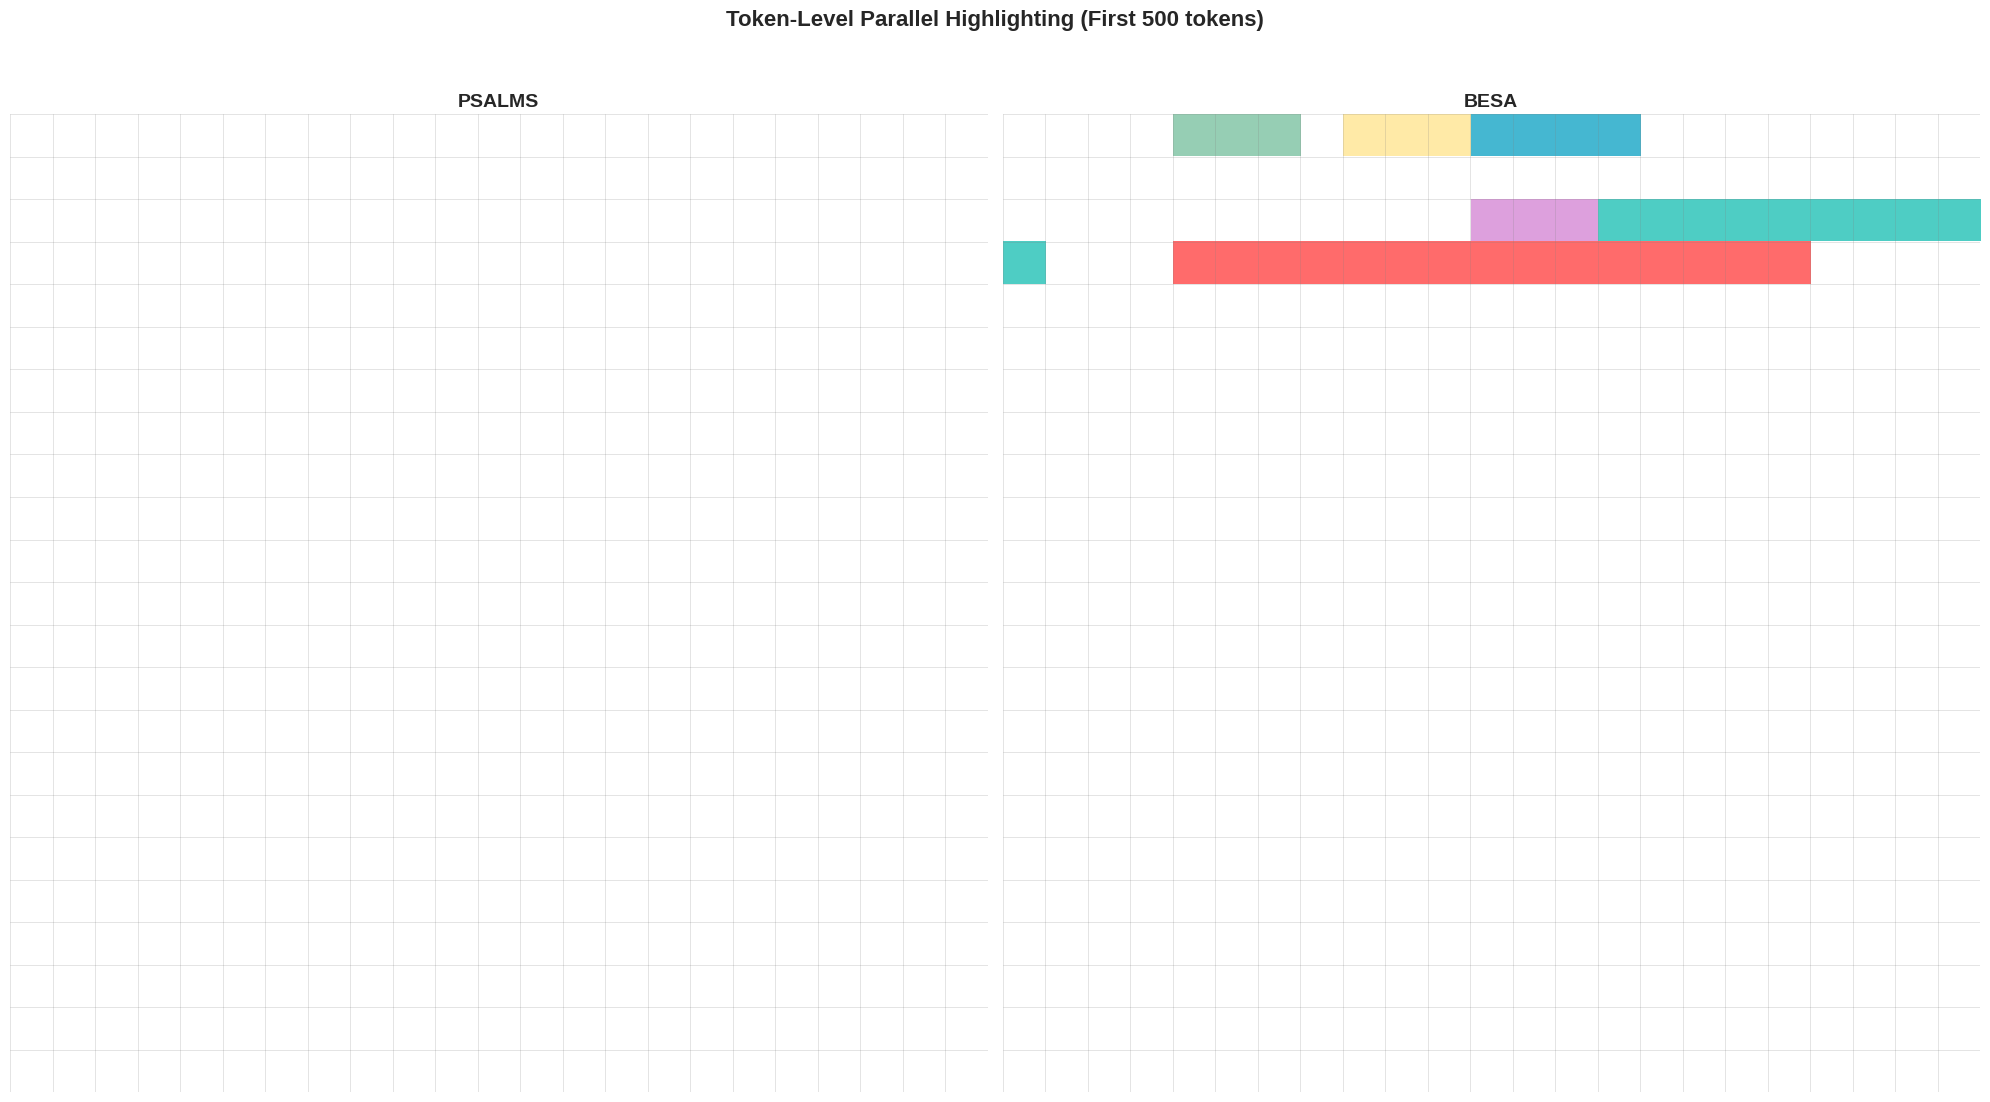

✓ Grid view saved to 'output/parallel_grid_view.png'


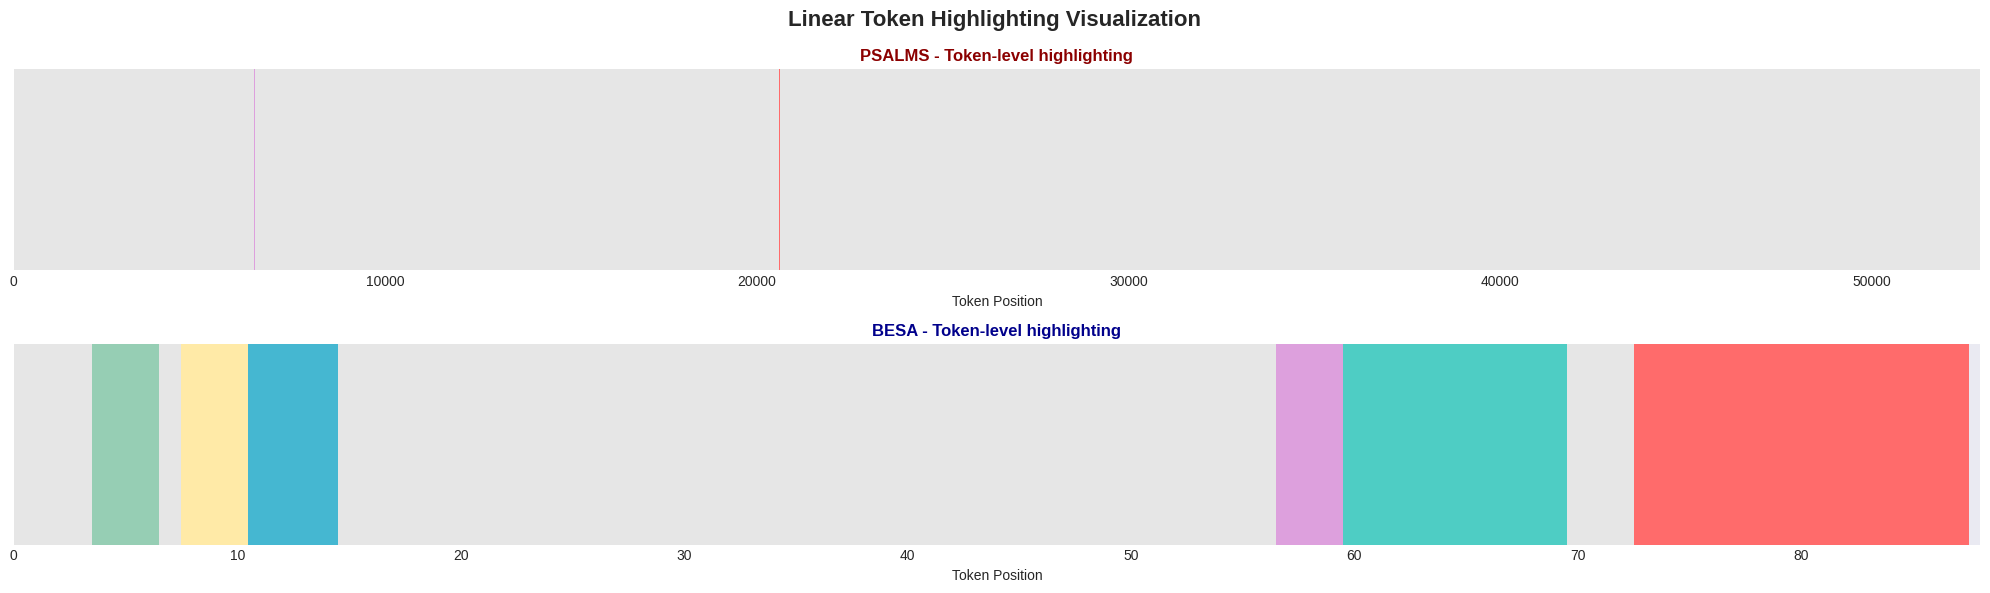

✓ Linear highlighting saved to 'output/linear_highlighting.png'


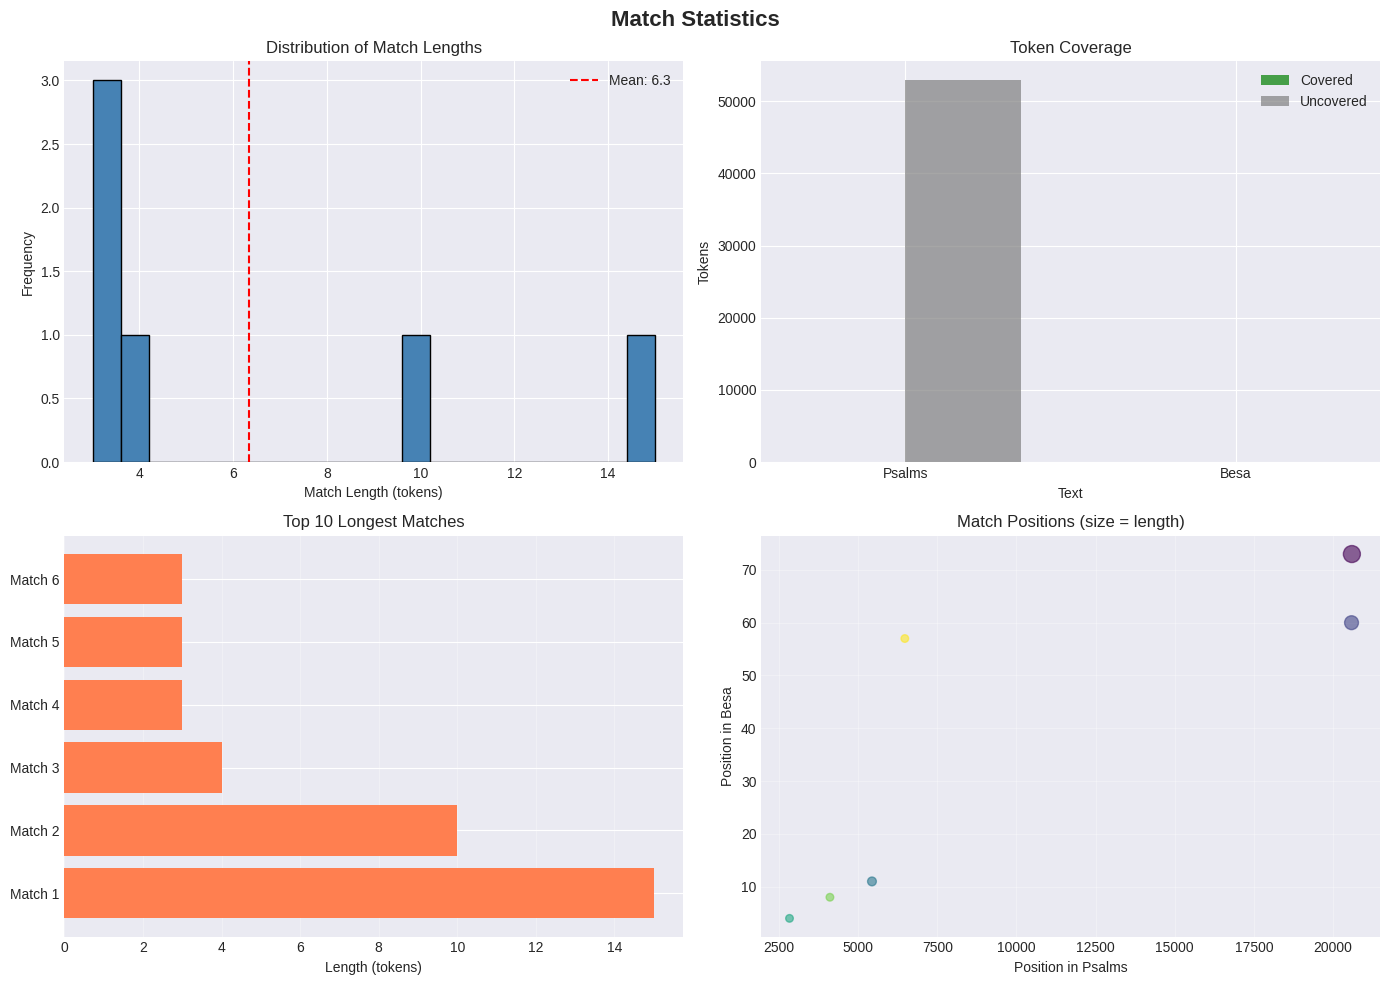


MATCH STATISTICS SUMMARY

Total Matches: 6
Total Matched Tokens: 38
Average Match Length: 6.33 tokens
Longest Match: 15 tokens
Shortest Match: 3 tokens

Coverage:
- Psalms: 0.1%
  (38/52906 tokens)
- Besa: 43.2%
  (38/88 tokens)

Top 5 Longest Matches:
  1. Length: 15 tokens
     Text: "ⲩ ⲡⲱⲧ ϩⲁ ⲑ ⲏ ⲛ ⲟⲩ ⲥⲟⲧⲉ ϫⲉⲕⲁⲥ ⲉⲣⲉ ⲛⲉⲕ ⲙⲉⲣⲓⲧ ⲛ ⲟⲩ ϩⲙ"
  2. Length: 10 tokens
     Text: "ϯ ⲛ ⲟⲩ ⲙⲁⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ"
  3. Length: 4 tokens
     Text: "ⲙ ⲡ ⲛⲟⲩⲧⲉ ⲁⲩⲱ"
  4. Length: 3 tokens
     Text: "ⲉ ⲛ ⲉⲧ"
  5. Length: 3 tokens
     Text: "ⲛ ⲛⲉ ϩⲃⲏⲩⲉ"
✓ Statistics saved to 'output/match_statistics.png'
✓ Match data saved to 'output/matches_with_colors.csv'


GENERATED OUTPUTS:
1. parallel_highlighting.html - Interactive side-by-side view with colored matches
2. parallel_grid_view.png - Grid visualization of token highlighting
3. linear_highlighting.png - Linear bar visualization
4. match_statistics.png - Statistical analysis of matches
5. matches_with_colors.csv - Raw match data with color assignme

In [ ]:
#!/usr/bin/env python3
"""
Parallel Text Highlighting Visualization for Coptic Text Reuse
Creates side-by-side text display with color-coded matched segments
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors as mcolors
import seaborn as sns
from IPython.display import HTML, display
from pathlib import Path
import re
from difflib import SequenceMatcher
import colorsys
import warnings
warnings.filterwarnings('ignore')

# Create output directory
Path("output").mkdir(exist_ok=True)

# ============================================
# DATA INPUT
# ============================================

# IMPORTANT: Add your texts here


# ============================================
# PARSING AND ALIGNMENT DETECTION
# ============================================

def parse_text_for_highlighting(text, text_id):
    """Parse text and prepare for highlighting"""
    documents = []
    all_tokens = []
    token_positions = []
    current_pos = 0

    lines = [line.strip() for line in text.strip().split('\n') if line.strip()]

    for line in lines:
        match = re.match(r'^(\S+)\s+(\S+)\s+(.+)$', line)
        if match:
            book = match.group(1)
            ref = match.group(2)
            content = match.group(3)
            tokens = content.split()

            doc_info = {
                'text_id': text_id,
                'reference': f"{book} {ref}",
                'content': content,
                'tokens': tokens,
                'start_pos': current_pos,
                'end_pos': current_pos + len(tokens)
            }
            documents.append(doc_info)

            # Track token positions
            for token in tokens:
                token_positions.append({
                    'token': token,
                    'position': current_pos,
                    'reference': f"{book} {ref}"
                })
                all_tokens.append(token)
                current_pos += 1

    return documents, all_tokens, token_positions

# Parse texts
psalms_docs, psalms_tokens, psalms_positions = parse_text_for_highlighting(psalms, 'psalms')
besa_docs, besa_tokens, besa_positions = parse_text_for_highlighting(besa, 'besa')

print(f"Parsed {len(psalms_docs)} Psalm verses ({len(psalms_tokens)} tokens)")
print(f"Parsed {len(besa_docs)} Besa verses ({len(besa_tokens)} tokens)")

# ============================================
# DETECT MATCHES
# ============================================

def detect_matches_with_colors(source_tokens, target_tokens, min_length=3):
    """Detect all matches and assign colors"""
    matcher = SequenceMatcher(None, source_tokens, target_tokens)
    matches = []

    # Get all matching blocks
    for match in matcher.get_matching_blocks():
        if match.size >= min_length:
            matches.append({
                'source_start': match.a,
                'source_end': match.a + match.size,
                'target_start': match.b,
                'target_end': match.b + match.size,
                'length': match.size,
                'text': ' '.join(source_tokens[match.a:match.a + match.size])
            })

    # Sort by length (longest first) for color assignment
    matches.sort(key=lambda x: x['length'], reverse=True)

    # Assign colors - use a color palette
    color_palette = [
        '#FF6B6B',  # Red
        '#4ECDC4',  # Teal
        '#45B7D1',  # Blue
        '#96CEB4',  # Green
        '#FFEAA7',  # Yellow
        '#DDA0DD',  # Plum
        '#98D8C8',  # Mint
        '#FFB6C1',  # Light Pink
        '#87CEEB',  # Sky Blue
        '#F4A460',  # Sandy Brown
    ]

    # Extend palette if needed
    while len(color_palette) < len(matches):
        # Generate more colors
        h = np.random.random()
        s = 0.5 + np.random.random() * 0.5
        l = 0.4 + np.random.random() * 0.3
        rgb = colorsys.hls_to_rgb(h, l, s)
        hex_color = '#{:02x}{:02x}{:02x}'.format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))
        color_palette.append(hex_color)

    # Assign colors to matches
    for i, match in enumerate(matches):
        match['color'] = color_palette[i % len(color_palette)]
        match['id'] = i

    return matches

# Detect matches
matches = detect_matches_with_colors(psalms_tokens, besa_tokens, min_length=3)
print(f"\nFound {len(matches)} matches")

# ============================================
# CREATE HTML PARALLEL TEXT VISUALIZATION
# ============================================

def create_parallel_html_visualization(psalms_tokens, besa_tokens, matches):
    """Create HTML with parallel highlighted texts"""

    # Create highlight maps
    psalms_highlights = {}
    besa_highlights = {}

    for match in matches:
        for i in range(match['source_start'], match['source_end']):
            psalms_highlights[i] = {'color': match['color'], 'id': match['id']}
        for i in range(match['target_start'], match['target_end']):
            besa_highlights[i] = {'color': match['color'], 'id': match['id']}

    # Build HTML content
    html = """
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <style>
            body {
                font-family: 'Arial Unicode MS', 'Segoe UI', sans-serif;
                margin: 20px;
                background-color: #f5f5f5;
            }
            .container {
                display: flex;
                gap: 20px;
                max-width: 1600px;
                margin: 0 auto;
            }
            .text-panel {
                flex: 1;
                background: white;
                padding: 20px;
                border-radius: 8px;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                max-height: 800px;
                overflow-y: auto;
            }
            .text-title {
                font-size: 18px;
                font-weight: bold;
                margin-bottom: 15px;
                padding-bottom: 10px;
                border-bottom: 2px solid #333;
            }
            .psalms-title { color: #d32f2f; }
            .besa-title { color: #1976d2; }
            .text-content {
                line-height: 2.2;
                font-size: 16px;
                direction: ltr;
            }
            .token {
                display: inline-block;
                padding: 2px 4px;
                margin: 1px;
                border-radius: 3px;
                transition: all 0.3s;
            }
            .highlighted {
                font-weight: bold;
                border: 1px solid rgba(0,0,0,0.2);
            }
            .token:hover {
                transform: scale(1.1);
                box-shadow: 0 2px 8px rgba(0,0,0,0.3);
            }
            .match-info {
                position: fixed;
                bottom: 20px;
                right: 20px;
                background: white;
                padding: 15px;
                border-radius: 8px;
                box-shadow: 0 4px 6px rgba(0,0,0,0.1);
                max-width: 300px;
                display: none;
            }
            .legend {
                margin: 20px auto;
                max-width: 1600px;
                background: white;
                padding: 15px;
                border-radius: 8px;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
            }
            .legend-title {
                font-weight: bold;
                margin-bottom: 10px;
            }
            .legend-item {
                display: inline-block;
                margin: 5px 10px;
            }
            .legend-box {
                display: inline-block;
                width: 20px;
                height: 20px;
                margin-right: 5px;
                border: 1px solid #333;
                vertical-align: middle;
            }
            .stats {
                margin: 20px auto;
                max-width: 1600px;
                background: white;
                padding: 15px;
                border-radius: 5px;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                font-size: 14px;
            }
            .verse-break {
                display: block;
                margin: 10px 0;
                padding: 5px 0;
                border-top: 1px dashed #ccc;
            }
        </style>
        <script>
            function highlightMatch(matchId) {
                // Remove all active highlights
                document.querySelectorAll('.active-match').forEach(el => {
                    el.classList.remove('active-match');
                });

                // Add active highlight to matched tokens
                document.querySelectorAll('[data-match="' + matchId + '"]').forEach(el => {
                    el.classList.add('active-match');
                    el.style.outline = '2px solid black';
                     el.scrollIntoView({ behavior: 'smooth', block: 'center' });
                });
            }

            function clearHighlight() {
                document.querySelectorAll('.active-match').forEach(el => {
                    el.classList.remove('active-match');
                    el.style.outline = 'none';
                });
            }
        </script>
    </head>
    <body>
        <h1 style="text-align: center;">Parallel Text Visualization: Psalms and Besa</h1>
    """

    # Add legend
    html += '<div class="legend"><div class="legend-title">Color Legend (by match length):</div>'
    # Show legend for all matches
    for i, match in enumerate(matches):
        html += f'''<div class="legend-item">
            <span class="legend-box" style="background-color: {match['color']};"></span>
            <span>Match {match['id']} ({match['length']} tokens): {match['text'][:30]}...</span>
        </div>'''
    html += '</div>'

    # Add statistics
    total_psalm_highlighted = len(psalms_highlights)
    total_besa_highlighted = len(besa_highlights)
    coverage_psalms = (total_psalm_highlighted / len(psalms_tokens)) * 100 if psalms_tokens else 0
    coverage_besa = (total_besa_highlighted / len(besa_tokens)) * 100 if besa_tokens else 0
    total_matched_tokens = sum(m['length'] for m in matches)

    html += f'''
    <div class="stats">
        <strong>Statistics:</strong>
        Total matches: {len(matches)} | Total matched tokens: {total_matched_tokens} |
        Average match length: {total_matched_tokens / len(matches):.2f} tokens |
        Psalms coverage: {coverage_psalms:.1f}% ({total_psalm_highlighted}/{len(psalms_tokens)} tokens) |
        Besa coverage: {coverage_besa:.1f}% ({total_besa_highlighted}/{len(besa_tokens)} tokens)
    </div>
    '''

    # Create parallel panels
    html += '<div class="container">'

    # Psalms panel
    html += '''
    <div class="text-panel">
        <div class="text-title psalms-title">PSALMS</div>
        <div class="text-content">
    '''

    current_verse = None
    for i, token in enumerate(psalms_tokens):
        # Check for verse break
        if i < len(psalms_positions):
            verse_info = psalms_positions[i]
            if verse_info['reference'] != current_verse:
                if current_verse is not None:
                    html += '<div class="verse-break"></div>'
                html += f'<strong>{verse_info["reference"]}:</strong> '
                current_verse = verse_info['reference']

        if i in psalms_highlights:
            highlight = psalms_highlights[i]
            html += f'''<span class="token highlighted"
                        style="background-color: {highlight['color']};"
                        data-match="{highlight['id']}"
                        onmouseover="highlightMatch({highlight['id']})"
                        onmouseout="clearHighlight()">{token}</span>'''
        else:
            html += f'<span class="token">{token}</span>'

    html += '</div></div>'

    # Besa panel
    html += '''
    <div class="text-panel">
        <div class="text-title besa-title">BESA</div>
        <div class="text-content">
    '''

    current_verse = None
    for i, token in enumerate(besa_tokens):
        # Check for verse break
        if i < len(besa_positions):
             verse_info = besa_positions[i]
             if verse_info['reference'] != current_verse:
                if current_verse is not None:
                    html += '<div class="verse-break"></div>'
                html += f'<strong>{verse_info["reference"]}:</strong> '
                current_verse = verse_info['reference']

        if i in besa_highlights:
            highlight = besa_highlights[i]
            html += f'''<span class="token highlighted"
                        style="background-color: {highlight['color']};"
                        data-match="{highlight['id']}"
                        onmouseover="highlightMatch({highlight['id']})"
                        onmouseout="clearHighlight()">{token}</span>'''
        else:
            html += f'<span class="token">{token}</span>'

    html += '</div></div></div></body></html>'

    return html

# Create HTML visualization
html_content = create_parallel_html_visualization(psalms_tokens, besa_tokens, matches)

# Save to file
with open('output/parallel_highlighting.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("✓ Parallel highlighting saved to 'output/parallel_highlighting.html'")

# Display HTML directly in the notebook
display(HTML(html_content))

# ============================================
# CREATE MATPLOTLIB VERSION
# ============================================

def create_matplotlib_parallel_view(psalms_tokens, besa_tokens, matches, max_tokens=500):
    """Create a matplotlib version of parallel highlighting"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

    # Limit tokens for visualization
    psalms_display = psalms_tokens[:max_tokens]
    besa_display = besa_tokens[:max_tokens]

    # Create highlight maps
    psalms_colors = ['white'] * len(psalms_display)
    besa_colors = ['white'] * len(besa_display)

    for match in matches:
        color = match['color']
        # Highlight Psalms
        for i in range(match['source_start'], min(match['source_end'], len(psalms_display))):
            if i < len(psalms_colors):
                psalms_colors[i] = color
        # Highlight Besa
        for i in range(match['target_start'], min(match['target_end'], len(besa_display))):
            if i < len(besa_colors):
                besa_colors[i] = color

    # Calculate grid dimensions
    grid_size = int(np.ceil(np.sqrt(max_tokens)))

    # Create grids
    def create_grid(tokens, colors, ax, title):
        grid = np.ones((grid_size, grid_size, 3))

        for i, (token, color) in enumerate(zip(tokens, colors)):
            if i >= grid_size * grid_size:
                break
            row = i // grid_size
            col = i % grid_size

            if color != 'white':
                # Convert hex to RGB
                rgb = mcolors.hex2color(color)
                grid[row, col] = rgb

        ax.imshow(grid, aspect='equal')
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.axis('off')

        # Add grid lines
        for i in range(grid_size + 1):
            ax.axhline(i - 0.5, color='gray', linewidth=0.5, alpha=0.3)
            ax.axvline(i - 0.5, color='gray', linewidth=0.5, alpha=0.3)

    create_grid(psalms_display, psalms_colors, ax1, 'PSALMS')
    create_grid(besa_display, besa_colors, ax2, 'BESA')

    plt.suptitle('Token-Level Parallel Highlighting (First 500 tokens)', fontsize=16, fontweight='bold')
    plt.tight_layout()

    fig.savefig('output/parallel_grid_view.png', dpi=150, bbox_inches='tight')
    plt.show()

    return fig

# Create matplotlib visualization
fig_grid = create_matplotlib_parallel_view(psalms_tokens, besa_tokens, matches)
print("✓ Grid view saved to 'output/parallel_grid_view.png'")

# ============================================
# CREATE LINEAR HIGHLIGHTING VISUALIZATION
# ============================================

def create_linear_highlighting(psalms_tokens, besa_tokens, matches):
    """Create a linear bar visualization of highlights"""

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 6), sharex=False)

    # Create color arrays
    psalms_colors = np.zeros((len(psalms_tokens), 3))
    besa_colors = np.zeros((len(besa_tokens), 3))

    # Default to light gray
    psalms_colors[:] = [0.9, 0.9, 0.9]
    besa_colors[:] = [0.9, 0.9, 0.9]

    # Apply match colors
    for match in matches:
        rgb = mcolors.hex2color(match['color'])
        for i in range(match['source_start'], match['source_end']):
            if i < len(psalms_colors):
                psalms_colors[i] = rgb
        for i in range(match['target_start'], match['target_end']):
            if i < len(besa_colors):
                besa_colors[i] = rgb

    # Create bar visualization for Psalms
    for i in range(len(psalms_tokens)):
        ax1.bar(i, 1, width=1, color=psalms_colors[i], edgecolor='none')

    ax1.set_xlim(0, len(psalms_tokens))
    ax1.set_ylim(0, 1)
    ax1.set_title('PSALMS - Token-level highlighting', fontsize=12, fontweight='bold', color='darkred')
    ax1.set_xlabel('Token Position')
    ax1.set_yticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    # Create bar visualization for Besa
    for i in range(len(besa_tokens)):
        ax2.bar(i, 1, width=1, color=besa_colors[i], edgecolor='none')

    ax2.set_xlim(0, len(besa_tokens))
    ax2.set_ylim(0, 1)
    ax2.set_title('BESA - Token-level highlighting', fontsize=12, fontweight='bold', color='darkblue')
    ax2.set_xlabel('Token Position')
    ax2.set_yticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    plt.suptitle('Linear Token Highlighting Visualization', fontsize=16, fontweight='bold')
    plt.tight_layout()

    fig.savefig('output/linear_highlighting.png', dpi=300, bbox_inches='tight')
    plt.show()

    return fig

# Create linear visualization
fig_linear = create_linear_highlighting(psalms_tokens, besa_tokens, matches)
print("✓ Linear highlighting saved to 'output/linear_highlighting.png'")

# ============================================
# CREATE MATCH STATISTICS
# ============================================

def create_match_statistics(matches, psalms_tokens, besa_tokens):
    """Generate detailed statistics about matches"""

    if not matches:
        print("No matches found to analyze")
        return

    # Convert to DataFrame for analysis
    match_df = pd.DataFrame(matches)

    # Create statistics visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Match length distribution
    axes[0, 0].hist(match_df['length'], bins=20, color='steelblue', edgecolor='black')
    axes[0, 0].set_xlabel('Match Length (tokens)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Match Lengths')
    axes[0, 0].axvline(match_df['length'].mean(), color='red', linestyle='--',
                       label=f'Mean: {match_df["length"].mean():.1f}')
    axes[0, 0].legend()

    # 2. Coverage visualization
    psalms_covered_indices = set()
    besa_covered_indices = set()
    for m in matches:
        for i in range(m['source_start'], m['source_end']):
            psalms_covered_indices.add(i)
        for i in range(m['target_start'], m['target_end']):
            besa_covered_indices.add(i)

    coverage_data = {
        'Text': ['Psalms', 'Besa'],
        'Covered': [len(psalms_covered_indices), len(besa_covered_indices)],
        'Total': [len(psalms_tokens), len(besa_tokens)]
    }
    coverage_df = pd.DataFrame(coverage_data)
    coverage_df['Uncovered'] = coverage_df['Total'] - coverage_df['Covered']

    x = np.arange(len(coverage_df))
    width = 0.35
    axes[0, 1].bar(x - width/2, coverage_df['Covered'], width, label='Covered', color='green', alpha=0.7)
    axes[0, 1].bar(x + width/2, coverage_df['Uncovered'], width, label='Uncovered', color='gray', alpha=0.7)
    axes[0, 1].set_xlabel('Text')
    axes[0, 1].set_ylabel('Tokens')
    axes[0, 1].set_title('Token Coverage')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(coverage_df['Text'])
    axes[0, 1].legend()

    # 3. Top 10 longest matches
    top_matches = match_df.nlargest(10, 'length')
    axes[1, 0].barh(range(len(top_matches)), top_matches['length'], color='coral')
    axes[1, 0].set_yticks(range(len(top_matches)))
    axes[1, 0].set_yticklabels([f"Match {i+1}" for i in range(len(top_matches))])
    axes[1, 0].set_xlabel('Length (tokens)')
    axes[1, 0].set_title('Top 10 Longest Matches')
    axes[1, 0].grid(axis='x', alpha=0.3)

    # 4. Position scatter plot
    axes[1, 1].scatter(match_df['source_start'], match_df['target_start'],
                      s=match_df['length']*10, alpha=0.6, c=range(len(match_df)), cmap='viridis')
    axes[1, 1].set_xlabel('Position in Psalms')
    axes[1, 1].set_ylabel('Position in Besa')
    axes[1, 1].set_title('Match Positions (size = length)')
    axes[1, 1].grid(True, alpha=0.3)

    plt.suptitle('Match Statistics', fontsize=16, fontweight='bold')
    plt.tight_layout()

    fig.savefig('output/match_statistics.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print summary
    print("\n" + "="*60)
    print("MATCH STATISTICS SUMMARY")
    print("="*60)
    print(f"""
Total Matches: {len(matches)}
Total Matched Tokens: {match_df['length'].sum()}
Average Match Length: {match_df['length'].mean():.2f} tokens
Longest Match: {match_df['length'].max()} tokens
Shortest Match: {match_df['length'].min()} tokens

Coverage:
- Psalms: {(coverage_data['Covered'][0] / coverage_data['Total'][0] * 100):.1f}%
  ({coverage_data['Covered'][0]}/{coverage_data['Total'][0]} tokens)
- Besa: {(coverage_data['Covered'][1] / coverage_data['Total'][1] * 100):.1f}%
  ({coverage_data['Covered'][1]}/{coverage_data['Total'][1]} tokens)

Top 5 Longest Matches:""")

    for i, match in enumerate(match_df.nlargest(5, 'length').itertuples(), 1):
        print(f"  {i}. Length: {match.length} tokens")
        if len(match.text) > 80:
            print(f"     Text: \"{match.text[:80]}...\"")
        else:
            print(f"     Text: \"{match.text}\"")

    return fig

# Create statistics
fig_stats = create_match_statistics(matches, psalms_tokens, besa_tokens)
print("✓ Statistics saved to 'output/match_statistics.png'")

# Save match data
if matches:
    match_df = pd.DataFrame(matches)
    match_df.to_csv('output/matches_with_colors.csv', index=False)
    print("✓ Match data saved to 'output/matches_with_colors.csv'")

print(f"""
\n{'='*60}
GENERATED OUTPUTS:
{'='*60}
1. parallel_highlighting.html - Interactive side-by-side view with colored matches
2. parallel_grid_view.png - Grid visualization of token highlighting
3. linear_highlighting.png - Linear bar visualization
4. match_statistics.png - Statistical analysis of matches
5. matches_with_colors.csv - Raw match data with color assignments

Open 'parallel_highlighting.html' in a browser for the best interactive experience!
""")

Psalms: 2666 verses, 52906 total tokens
Besa: 1 verses, 88 total tokens

Found 304 alignments


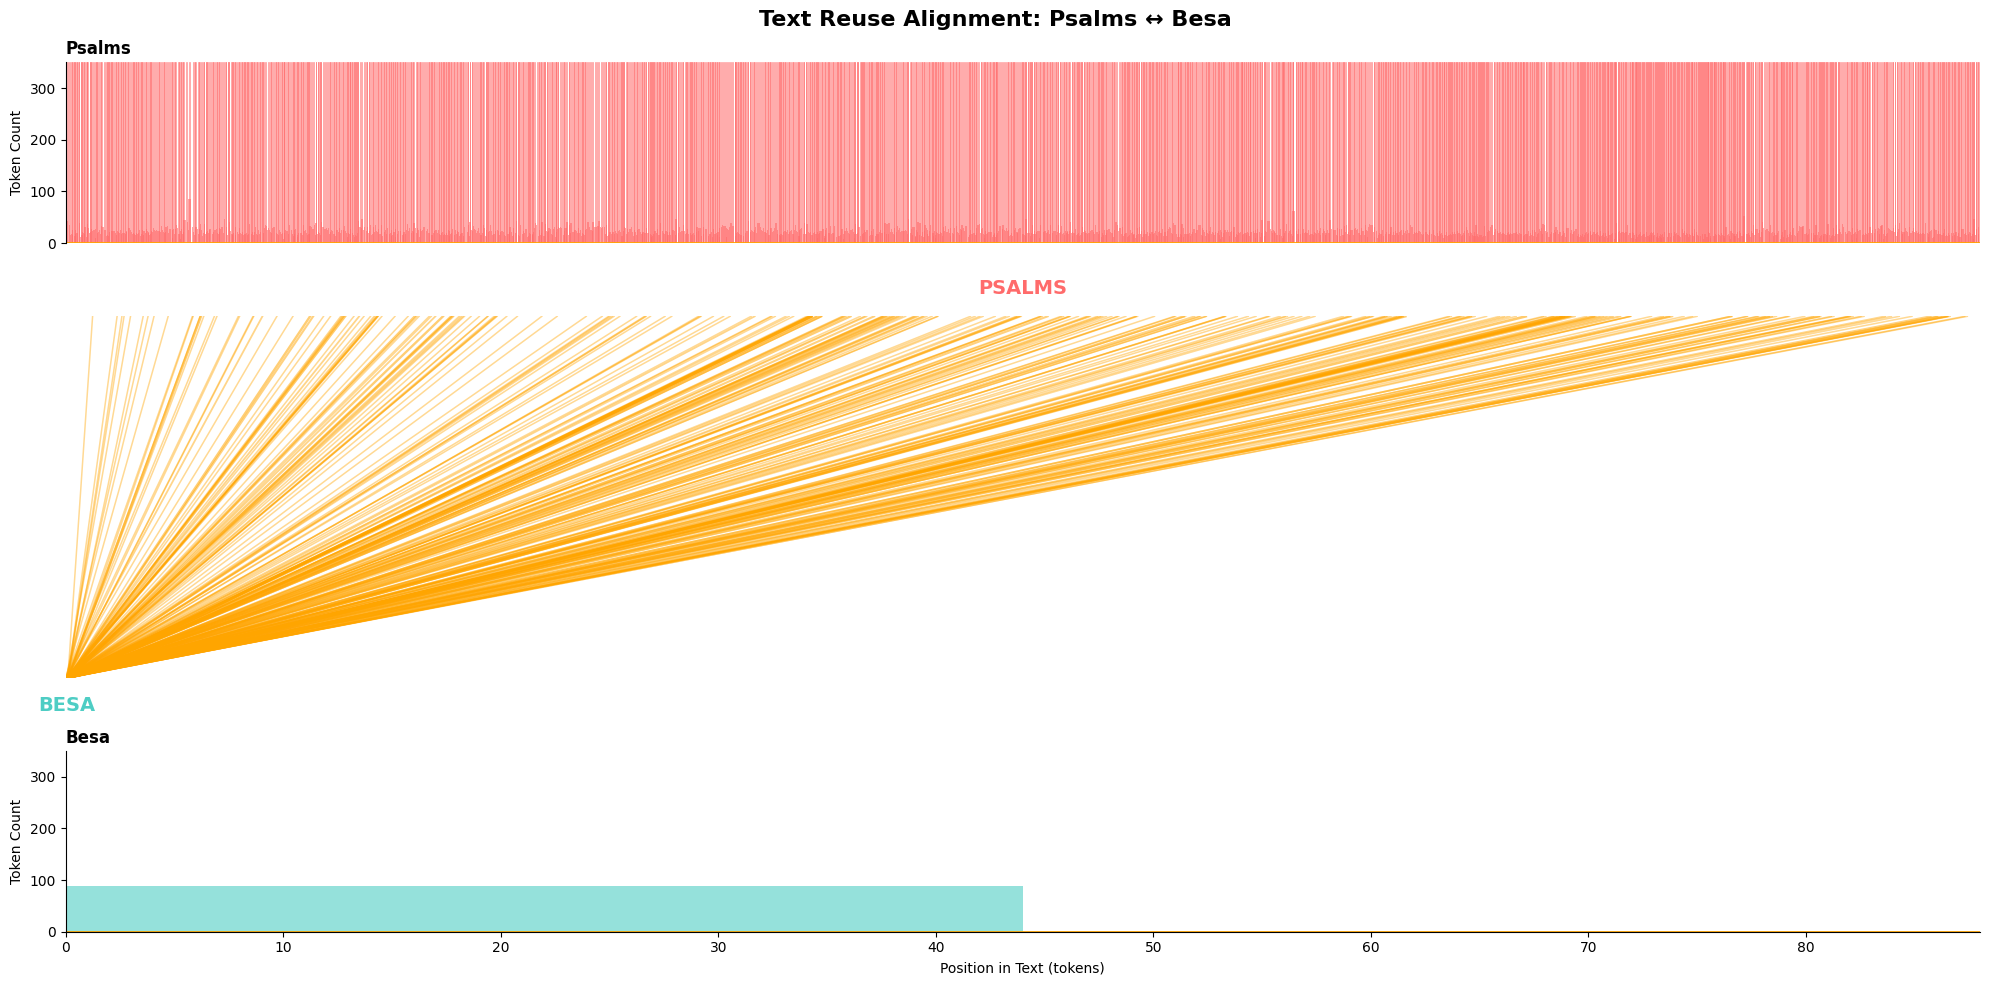

✓ Arc diagram saved to 'output/arc_diagram.png'


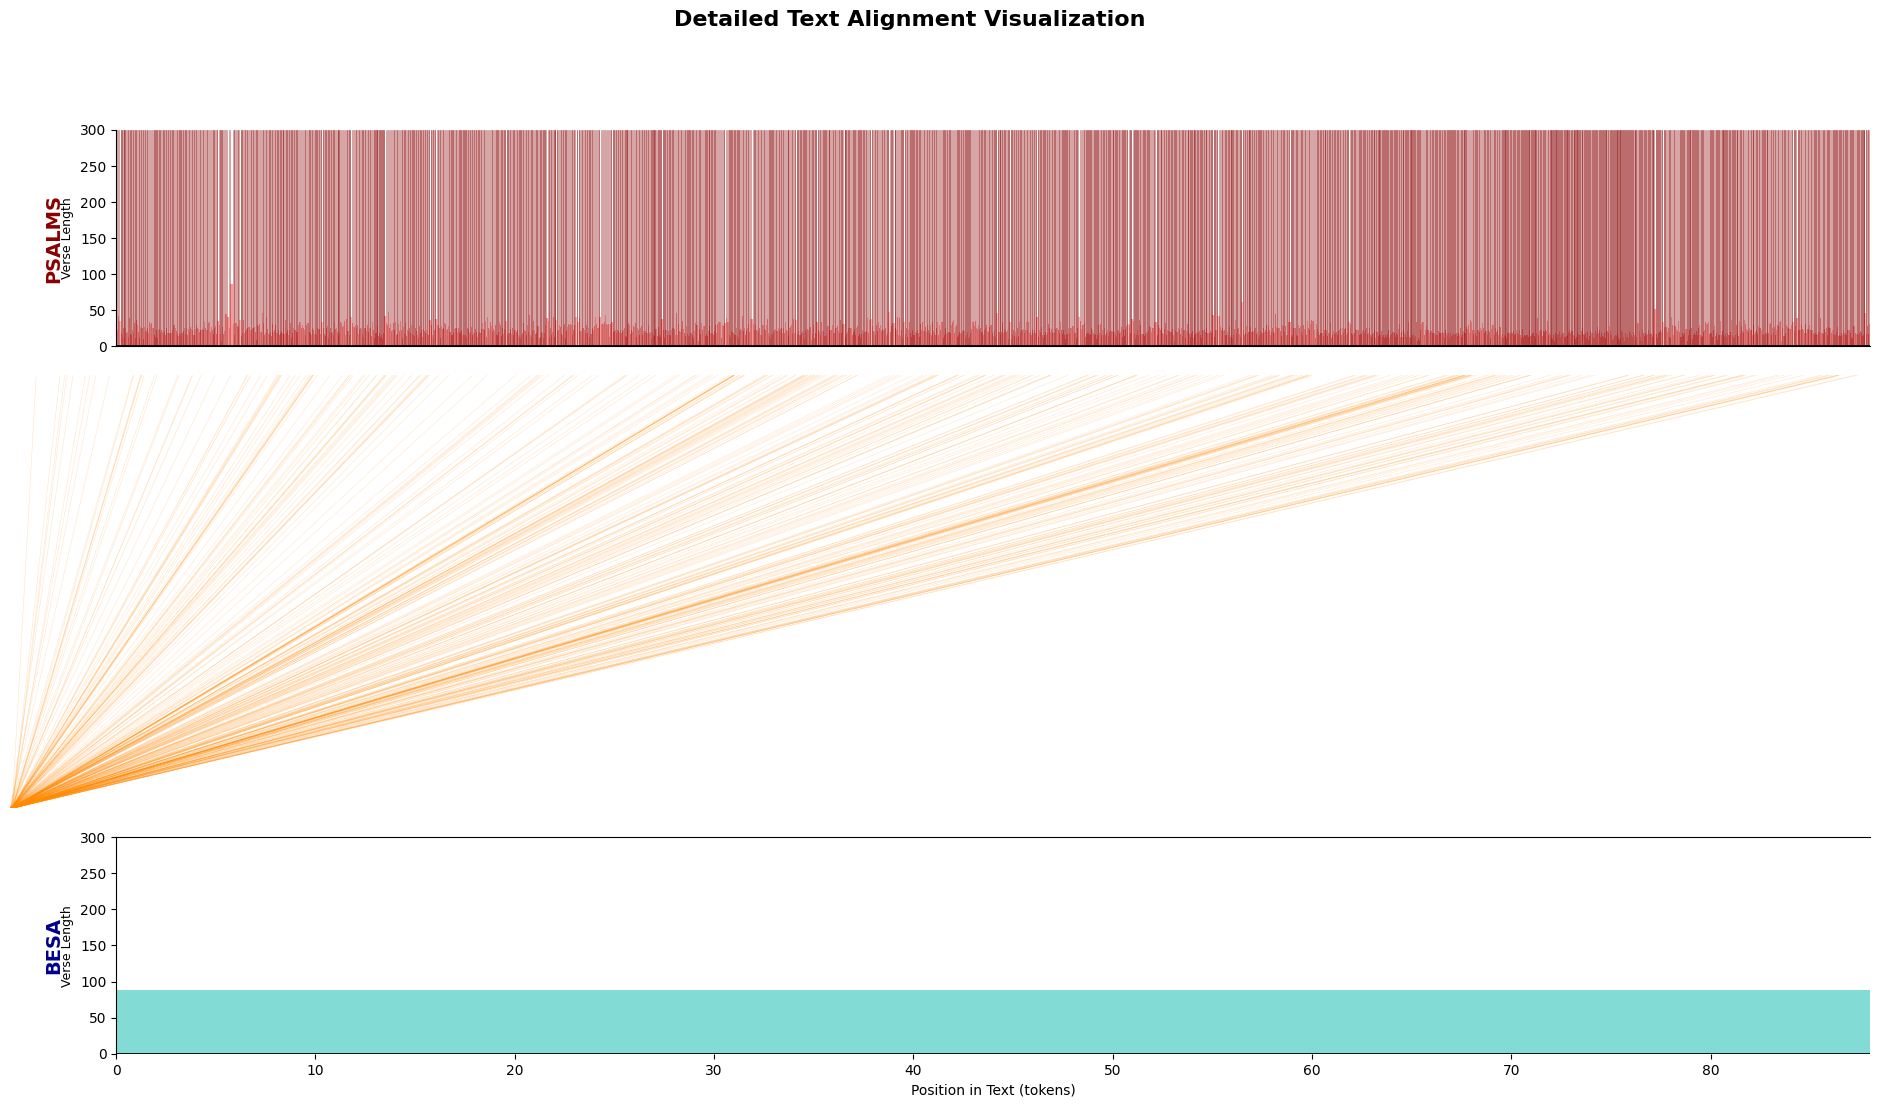

✓ Detailed alignment diagram saved to 'output/detailed_alignment.png'


✓ Interactive alignment saved to 'output/interactive_alignment.html'

ALIGNMENT VISUALIZATION SUMMARY

Alignment Statistics:
- Total alignments: 304
- Total aligned tokens: 1037
- Average alignment length: 3.41 tokens
- Longest alignment: 10 tokens
- Coverage of Psalms: 298 unique verses
- Coverage of Besa: 1 unique verses

Top 5 Longest Alignments:
  Psalms 59:6 → Besa 3:2:3: 10 tokens
    Text: "ϯ ⲛ ⲟⲩ ⲙⲁⲉⲓⲛ ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ..."
  Psalms 59:6 → Besa 3:2:3: 8 tokens
    Text: "ⲩ ⲡⲱⲧ ϩⲁ ⲑ ⲏ ⲛ ⲟⲩ ⲥⲟⲧⲉ..."
  Psalms 14:4 → Besa 3:2:3: 7 tokens
    Text: "ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ..."
  Psalms 24:14 → Besa 3:2:3: 7 tokens
    Text: "ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ..."
  Psalms 33:10 → Besa 3:2:3: 7 tokens
    Text: "ⲛ ⲛ ⲉⲧ ⲣ ϩⲟⲧⲉ ϩⲏⲧ ϥ..."

✓ Alignment data saved to 'output/alignments.csv'


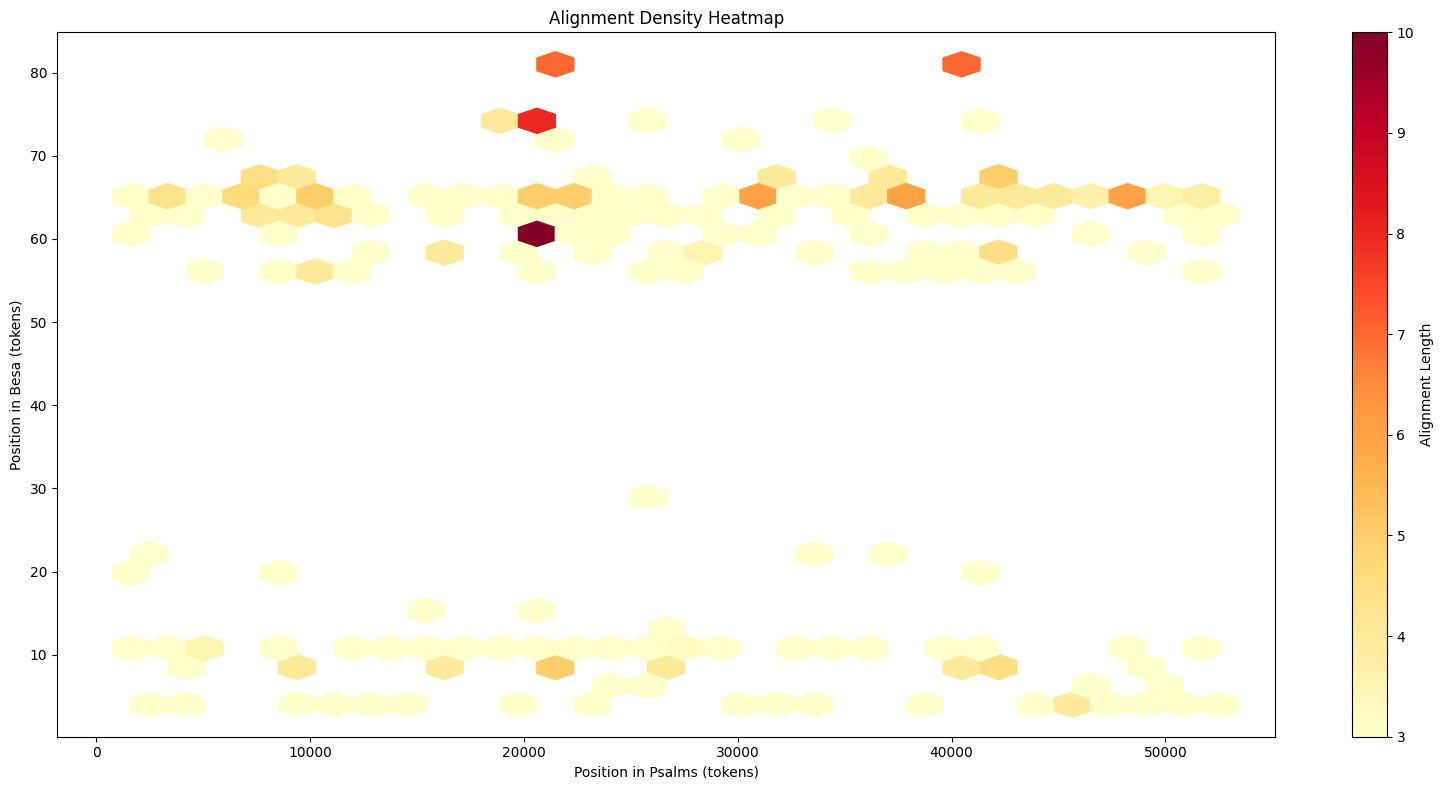

✓ Alignment heatmap saved to 'output/alignment_heatmap.png'

Generated Visualizations:
1. arc_diagram.png - Arc diagram with curved connections
2. detailed_alignment.png - Detailed alignment with trapezoid connections
3. interactive_alignment.html - Interactive Plotly version
4. alignment_heatmap.png - Position-based density heatmap
5. alignments.csv - Raw alignment data



In [ ]:
#!/usr/bin/env python3
"""
Arc Diagram for Coptic Text Reuse Visualization
Creates parallel text alignment visualization with curved connections
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch, Arc
from matplotlib.collections import LineCollection
import seaborn as sns
from pathlib import Path
import re
from difflib import SequenceMatcher
import warnings
warnings.filterwarnings('ignore')

# Create output directory
Path("output").mkdir(exist_ok=True)

# Set style
plt.style.use('default')
sns.set_palette("husl")

# ============================================
# DATA INPUT
# ============================================

# IMPORTANT: Add your texts here


# ============================================
# PARSING AND ALIGNMENT
# ============================================

def parse_text_linear(text, text_id):
    """Parse text for linear visualization"""
    documents = []
    position = 0

    lines = [line.strip() for line in text.strip().split('\n') if line.strip()]

    for line in lines:
        match = re.match(r'^(\S+)\s+(\S+)\s+(.+)$', line)
        if match:
            book = match.group(1)
            ref = match.group(2)
            content = match.group(3)
            tokens = content.split()

            documents.append({
                'text_id': text_id,
                'book': book,
                'reference': f"{book} {ref}",
                'content': content,
                'tokens': tokens,
                'start_pos': position,
                'end_pos': position + len(tokens),
                'length': len(tokens)
            })
            position += len(tokens)

    return documents, position

# Parse texts
psalms_docs, psalms_total_length = parse_text_linear(psalms, 'psalms')
besa_docs, besa_total_length = parse_text_linear(besa, 'besa')

print(f"Psalms: {len(psalms_docs)} verses, {psalms_total_length} total tokens")
print(f"Besa: {len(besa_docs)} verses, {besa_total_length} total tokens")

# ============================================
# DETECT ALIGNMENTS
# ============================================

def detect_alignments(source_docs, target_docs, min_length=3):
    """Detect alignments between texts with position information"""
    alignments = []

    for source in source_docs:
        source_tokens = source['tokens']

        for target in target_docs:
            target_tokens = target['tokens']

            # Use SequenceMatcher for better alignment detection
            matcher = SequenceMatcher(None, source_tokens, target_tokens)
            matches = matcher.get_matching_blocks()

            for match in matches:
                if match.size >= min_length:
                    # Calculate absolute positions
                    source_abs_start = source['start_pos'] + match.a
                    source_abs_end = source_abs_start + match.size
                    target_abs_start = target['start_pos'] + match.b
                    target_abs_end = target_abs_start + match.size

                    alignments.append({
                        'source_ref': source['reference'],
                        'target_ref': target['reference'],
                        'source_start': source_abs_start,
                        'source_end': source_abs_end,
                        'target_start': target_abs_start,
                        'target_end': target_abs_end,
                        'length': match.size,
                        'matched_text': ' '.join(source_tokens[match.a:match.a + match.size])
                    })

    return alignments

# Detect alignments
alignments = detect_alignments(psalms_docs, besa_docs, min_length=3)
print(f"\nFound {len(alignments)} alignments")

# ============================================
# CREATE ARC DIAGRAM
# ============================================

def create_arc_diagram(alignments, psalms_total, besa_total, title="Text Alignment Visualization"):
    """Create an arc diagram showing alignments between texts"""

    fig, (ax1, ax_middle, ax2) = plt.subplots(3, 1, figsize=(20, 10),
                                               gridspec_kw={'height_ratios': [1, 2, 1]})

    # Colors
    psalm_color = '#FF6B6B'  # Red
    besa_color = '#4ECDC4'   # Teal
    connection_color = '#FFA500'  # Orange

    # ===== TOP AXIS: PSALMS =====
    ax1.set_xlim(0, psalms_total)
    ax1.set_ylim(0, 350)

    # Draw verse boundaries for Psalms
    for doc in psalms_docs:
        ax1.axvline(doc['start_pos'], color=psalm_color, alpha=0.8, linewidth=0.5)
        # Draw bars for verse lengths
        ax1.bar(doc['start_pos'], doc['length'], width=doc['length'],
               bottom=0, color=psalm_color, alpha=0.6, edgecolor='none')

    ax1.set_ylabel('Token Count', fontsize=10)
    ax1.set_title('Psalms', fontsize=12, loc='left', fontweight='bold')
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_xticks([])

    # Add reference line
    ax1.axhline(y=0, color=connection_color, linewidth=2)

    # ===== MIDDLE AXIS: CONNECTIONS =====
    ax_middle.set_xlim(0, max(psalms_total, besa_total))
    ax_middle.set_ylim(-1, 1)
    ax_middle.axis('off')

    # Draw curved connections
    for alignment in alignments:
        # Calculate connection strength (thickness and transparency)
        strength = min(alignment['length'] / 10, 1.0)

        # Source (Psalms) position - normalized
        x1 = alignment['source_start'] + (alignment['source_end'] - alignment['source_start']) / 2
        y1 = 1

        # Target (Besa) position - normalized
        x2 = alignment['target_start'] + (alignment['target_end'] - alignment['target_start']) / 2
        y2 = -1

        # Create bezier curve
        # Control points for curve
        ctrl_y = 0
        ctrl_x = (x1 + x2) / 2

        # Generate curve points
        t = np.linspace(0, 1, 50)

        # Quadratic bezier formula
        x_curve = (1-t)**2 * x1 + 2*(1-t)*t * ctrl_x + t**2 * x2
        y_curve = (1-t)**2 * y1 + 2*(1-t)*t * ctrl_y + t**2 * y2

        # Draw the curve
        ax_middle.plot(x_curve, y_curve, color=connection_color,
                      alpha=0.3 + 0.4*strength, linewidth=0.5 + 2*strength)

    # Add text labels
    ax_middle.text(psalms_total/2, 1.1, 'PSALMS', ha='center', va='bottom',
                  fontsize=14, fontweight='bold', color=psalm_color)
    ax_middle.text(besa_total/2, -1.1, 'BESA', ha='center', va='top',
                  fontsize=14, fontweight='bold', color=besa_color)

    # ===== BOTTOM AXIS: BESA =====
    ax2.set_xlim(0, besa_total)
    ax2.set_ylim(350, 0)  # Inverted

    # Draw verse boundaries for Besa
    for doc in besa_docs:
        ax2.axvline(doc['start_pos'], color=besa_color, alpha=0.8, linewidth=0.5)
        # Draw bars for verse lengths
        ax2.bar(doc['start_pos'], doc['length'], width=doc['length'],
               bottom=0, color=besa_color, alpha=0.6, edgecolor='none')

    ax2.set_ylabel('Token Count', fontsize=10)
    ax2.set_xlabel('Position in Text (tokens)', fontsize=10)
    ax2.set_title('Besa', fontsize=12, loc='left', fontweight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.invert_yaxis()

    # Add reference line
    ax2.axhline(y=0, color=connection_color, linewidth=2)

    # Main title
    fig.suptitle(title, fontsize=16, fontweight='bold', y=0.98)

    plt.tight_layout()
    return fig

# Create the arc diagram
fig_arc = create_arc_diagram(alignments, psalms_total_length, besa_total_length,
                             "Text Reuse Alignment: Psalms ↔ Besa")

fig_arc.savefig('output/arc_diagram.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Arc diagram saved to 'output/arc_diagram.png'")

# ============================================
# CREATE DETAILED ALIGNMENT DIAGRAM
# ============================================

def create_detailed_alignment_plot(alignments, psalms_docs, besa_docs):
    """Create a more detailed alignment visualization"""

    fig = plt.figure(figsize=(24, 12))

    # Create custom grid
    gs = fig.add_gridspec(3, 2, height_ratios=[1, 2, 1], width_ratios=[1, 20],
                         hspace=0.1, wspace=0.02)

    # Create subplots
    ax_psalm_label = fig.add_subplot(gs[0, 0])
    ax_psalm = fig.add_subplot(gs[0, 1])
    ax_middle = fig.add_subplot(gs[1, :])
    ax_besa_label = fig.add_subplot(gs[2, 0])
    ax_besa = fig.add_subplot(gs[2, 1])

    # Get total lengths
    psalms_total = max([d['end_pos'] for d in psalms_docs])
    besa_total = max([d['end_pos'] for d in besa_docs])

    # ===== PSALMS SECTION =====
    ax_psalm_label.text(0.5, 0.5, 'PSALMS', rotation=90, ha='center', va='center',
                        fontsize=14, fontweight='bold', color='darkred')
    ax_psalm_label.axis('off')

    ax_psalm.set_xlim(0, psalms_total)
    ax_psalm.set_ylim(0, 300)

    # Create alternating colors for verses
    for i, doc in enumerate(psalms_docs):
        color = '#FF6B6B' if i % 2 == 0 else '#FF9999'
        rect = patches.Rectangle((doc['start_pos'], 0), doc['length'], doc['length'],
                                linewidth=0, edgecolor='none', facecolor=color, alpha=0.7)
        ax_psalm.add_patch(rect)

        # Add verse markers
        ax_psalm.axvline(doc['start_pos'], color='darkred', alpha=0.5, linewidth=0.5)

    ax_psalm.set_ylabel('Verse Length', fontsize=9)
    ax_psalm.spines['top'].set_visible(False)
    ax_psalm.spines['right'].set_visible(False)
    ax_psalm.set_xticks([])
    ax_psalm.axhline(y=0, color='black', linewidth=2)

    # ===== MIDDLE CONNECTIONS =====
    ax_middle.set_xlim(0, max(psalms_total, besa_total))
    ax_middle.set_ylim(0, 1)
    ax_middle.axis('off')

    # Sort alignments by length for better visualization
    sorted_alignments = sorted(alignments, key=lambda x: x['length'], reverse=True)

    for i, alignment in enumerate(sorted_alignments):
        # Vary opacity based on match length
        alpha = min(0.8, 0.2 + alignment['length'] / 20)
        linewidth = min(3, 0.5 + alignment['length'] / 10)

        # Source coordinates
        x1_start = alignment['source_start']
        x1_end = alignment['source_end']

        # Target coordinates
        x2_start = alignment['target_start']
        x2_end = alignment['target_end']

        # Draw trapezoid connection
        verts = [
            (x1_start, 1),  # Top left
            (x1_end, 1),    # Top right
            (x2_end, 0),    # Bottom right
            (x2_start, 0)   # Bottom left
        ]

        polygon = patches.Polygon(verts, closed=True,
                                 facecolor='orange', alpha=alpha*0.3,
                                 edgecolor='darkorange', linewidth=linewidth*0.5)
        ax_middle.add_patch(polygon)

    # ===== BESA SECTION =====
    ax_besa_label.text(0.5, 0.5, 'BESA', rotation=90, ha='center', va='center',
                      fontsize=14, fontweight='bold', color='darkblue')
    ax_besa_label.axis('off')

    ax_besa.set_xlim(0, besa_total)
    ax_besa.set_ylim(300, 0)

    # Create alternating colors for verses
    for i, doc in enumerate(besa_docs):
        color = '#4ECDC4' if i % 2 == 0 else '#7ED8D3'
        rect = patches.Rectangle((doc['start_pos'], 0), doc['length'], doc['length'],
                                linewidth=0, edgecolor='none', facecolor=color, alpha=0.7)
        ax_besa.add_patch(rect)

        # Add verse markers
        ax_besa.axvline(doc['start_pos'], color='darkblue', alpha=0.5, linewidth=0.5)

    ax_besa.set_ylabel('Verse Length', fontsize=9)
    ax_besa.set_xlabel('Position in Text (tokens)', fontsize=10)
    ax_besa.spines['bottom'].set_visible(False)
    ax_besa.spines['right'].set_visible(False)
    ax_besa.invert_yaxis()
    ax_besa.axhline(y=0, color='black', linewidth=2)

    # Title
    fig.suptitle('Detailed Text Alignment Visualization', fontsize=16, fontweight='bold')

    plt.tight_layout()
    return fig

# Create detailed alignment plot
fig_detailed = create_detailed_alignment_plot(alignments, psalms_docs, besa_docs)
fig_detailed.savefig('output/detailed_alignment.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Detailed alignment diagram saved to 'output/detailed_alignment.png'")

# ============================================
# CREATE INTERACTIVE PLOTLY VERSION
# ============================================

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_interactive_alignment(alignments, psalms_docs, besa_docs):
    """Create an interactive version using Plotly"""

    # Create subplots
    fig = make_subplots(
        rows=3, cols=1,
        row_heights=[0.25, 0.5, 0.25],
        vertical_spacing=0.02,
        subplot_titles=("Psalms", "", "Besa")
    )

    # Get total lengths
    psalms_total = max([d['end_pos'] for d in psalms_docs])
    besa_total = max([d['end_pos'] for d in besa_docs])

    # Add Psalms bars
    for doc in psalms_docs:
        fig.add_trace(
            go.Bar(
                x=[doc['start_pos'] + doc['length']/2],
                y=[doc['length']],
                width=doc['length'],
                marker_color='rgba(255, 107, 107, 0.6)',
                hovertext=doc['reference'],
                hoverinfo='text',
                showlegend=False
            ),
            row=1, col=1
        )

    # Add connections
    for alignment in alignments:
        # Create path for curved connection
        x1 = alignment['source_start'] + (alignment['source_end'] - alignment['source_start']) / 2
        x2 = alignment['target_start'] + (alignment['target_end'] - alignment['target_start']) / 2

        # Generate bezier curve points
        t = np.linspace(0, 1, 20)
        x_mid = (x1 + x2) / 2

        x_curve = (1-t)**2 * x1 + 2*(1-t)*t * x_mid + t**2 * x2
        y_curve = (1-t)**2 * 1 + 2*(1-t)*t * 0.5 + t**2 * 0

        fig.add_trace(
            go.Scatter(
                x=x_curve,
                y=y_curve,
                mode='lines',
                line=dict(
                    color='orange',
                    width=max(1, alignment['length']/5)
                ),
                opacity=min(0.8, 0.3 + alignment['length']/20),
                hovertext=f"{alignment['source_ref']} → {alignment['target_ref']}<br>Length: {alignment['length']}",
                hoverinfo='text',
                showlegend=False
            ),
            row=2, col=1
        )

    # Add Besa bars
    for doc in besa_docs:
        fig.add_trace(
            go.Bar(
                x=[doc['start_pos'] + doc['length']/2],
                y=[doc['length']],
                width=doc['length'],
                marker_color='rgba(78, 205, 196, 0.6)',
                hovertext=doc['reference'],
                hoverinfo='text',
                showlegend=False
            ),
            row=3, col=1
        )

    # Update layout
    fig.update_xaxes(title_text="", row=1, col=1, range=[0, psalms_total])
    fig.update_xaxes(title_text="", row=2, col=1, range=[0, max(psalms_total, besa_total)], showticklabels=False)
    fig.update_xaxes(title_text="Position (tokens)", row=3, col=1, range=[0, besa_total])

    fig.update_yaxes(title_text="Length", row=1, col=1)
    fig.update_yaxes(showticklabels=False, row=2, col=1, range=[0, 1])
    fig.update_yaxes(title_text="Length", row=3, col=1)

    fig.update_layout(
        title_text="Interactive Text Alignment Visualization",
        height=800,
        showlegend=False,
        hovermode='closest'
    )

    return fig

# Create interactive version
fig_interactive = create_interactive_alignment(alignments, psalms_docs, besa_docs)
fig_interactive.write_html('output/interactive_alignment.html')
fig_interactive.show()

print("✓ Interactive alignment saved to 'output/interactive_alignment.html'")

# ============================================
# CREATE SUMMARY STATISTICS
# ============================================

print("\n" + "="*60)
print("ALIGNMENT VISUALIZATION SUMMARY")
print("="*60)

# Calculate statistics
if alignments:
    alignment_df = pd.DataFrame(alignments)

    print(f"""
Alignment Statistics:
- Total alignments: {len(alignments)}
- Total aligned tokens: {alignment_df['length'].sum()}
- Average alignment length: {alignment_df['length'].mean():.2f} tokens
- Longest alignment: {alignment_df['length'].max()} tokens
- Coverage of Psalms: {len(alignment_df['source_ref'].unique())} unique verses
- Coverage of Besa: {len(alignment_df['target_ref'].unique())} unique verses

Top 5 Longest Alignments:""")

    top_alignments = alignment_df.nlargest(5, 'length')
    for i, row in top_alignments.iterrows():
        print(f"  {row['source_ref']} → {row['target_ref']}: {row['length']} tokens")
        print(f"    Text: \"{row['matched_text'][:50]}...\"")

    # Save alignment data
    alignment_df.to_csv('output/alignments.csv', index=False)
    print("\n✓ Alignment data saved to 'output/alignments.csv'")

    # Create position-based heatmap
    fig_heat = plt.figure(figsize=(16, 8))

    # Create 2D histogram
    psalms_positions = []
    besa_positions = []
    weights = []

    for alignment in alignments:
        psalms_positions.append(alignment['source_start'])
        besa_positions.append(alignment['target_start'])
        weights.append(alignment['length'])

    plt.hexbin(psalms_positions, besa_positions, C=weights, gridsize=30, cmap='YlOrRd')
    plt.colorbar(label='Alignment Length')
    plt.xlabel('Position in Psalms (tokens)')
    plt.ylabel('Position in Besa (tokens)')
    plt.title('Alignment Density Heatmap')

    plt.tight_layout()
    fig_heat.savefig('output/alignment_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Alignment heatmap saved to 'output/alignment_heatmap.png'")

print(f"""
Generated Visualizations:
1. arc_diagram.png - Arc diagram with curved connections
2. detailed_alignment.png - Detailed alignment with trapezoid connections
3. interactive_alignment.html - Interactive Plotly version
4. alignment_heatmap.png - Position-based density heatmap
5. alignments.csv - Raw alignment data
""")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
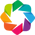

Loaded 1 Besa verses
Loaded 2666 Psalm verses

Found 480 connections


✓ Interactive chord diagram saved to 'output/chord_diagram_interactive.html'


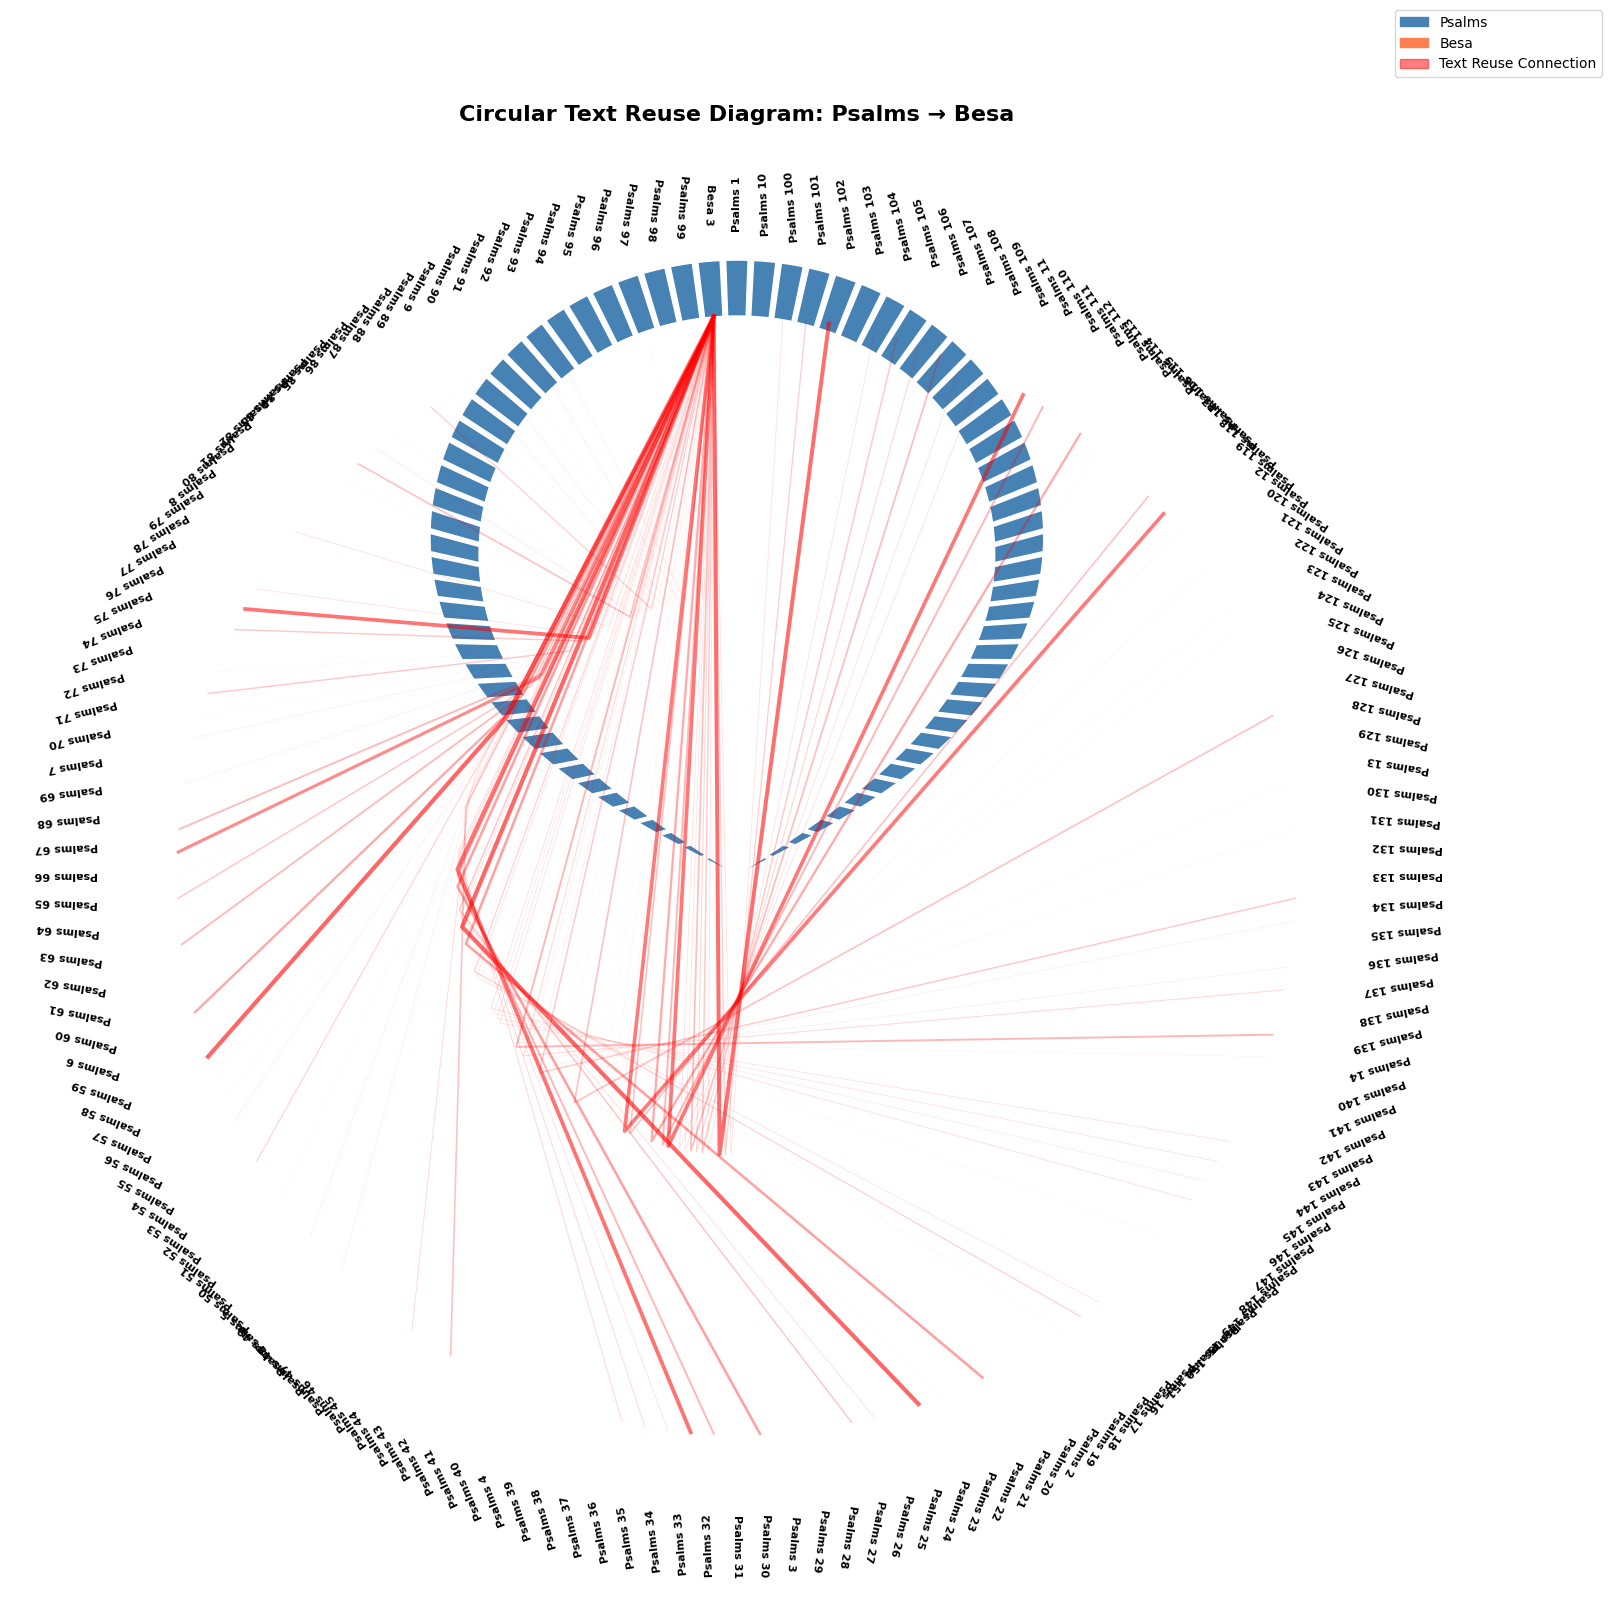

✓ Circular diagram saved to 'output/circular_diagram.png'
✓ HoloViews chord diagram saved to 'output/holoviews_chord.html'


✓ Radial tree diagram saved to 'output/radial_tree.html'

CHORD DIAGRAM ANALYSIS SUMMARY

Network Statistics:
- Total connections: 480
- Unique Psalm chapters involved: 122
- Unique Besa chapters involved: 1
- Total connection weight: 1693
- Average connection weight: 3.53

Top 5 Strongest Connections:
1. Psalms 59 → Besa 3: weight = 10
2. Psalms 59 → Besa 3: weight = 9
3. Psalms 59 → Besa 3: weight = 8
4. Psalms 59 → Besa 3: weight = 8
5. Psalms 14 → Besa 3: weight = 7

Generated Visualizations:
1. chord_diagram_interactive.html - Interactive Plotly chord diagram
2. circular_diagram.png - Static circular connection diagram
3. holoviews_chord.html - HoloViews chord diagram
4. radial_tree.html - Radial tree visualization

✓ Connection data saved to 'output/chord_connections.csv'


In [ ]:
#!/usr/bin/env python3
"""
Circular Chord Diagram for Coptic Text Reuse Analysis
Creates an interactive visualization similar to the reference image
"""

# Install required packages
!pip install -q pandas numpy matplotlib plotly holoviews bokeh

import pandas as pd
import numpy as np
import json
import re
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
from collections import defaultdict
import colorsys
import warnings
warnings.filterwarnings('ignore')

# For alternative chord diagram
try:
    import holoviews as hv
    from holoviews import opts
    hv.extension('bokeh')
    from bokeh.plotting import show, output_file
    from bokeh.io import export_png
    HOLOVIEWS_AVAILABLE = True
except:
    HOLOVIEWS_AVAILABLE = False
    print("Installing holoviews for chord diagram...")
    !pip install -q holoviews bokeh
    import holoviews as hv
    from holoviews import opts
    hv.extension('bokeh')

# Create output directory
Path("output").mkdir(exist_ok=True)

# ============================================
# DATA INPUT
# ============================================

# IMPORTANT: Add your texts here


# ============================================
# PARSING FUNCTIONS
# ============================================

def parse_text_for_chord(text, text_id):
    """Parse text and prepare for chord diagram"""
    documents = []
    lines = [line.strip() for line in text.strip().split('\n') if line.strip()]

    for line in lines:
        match = re.match(r'^(\S+)\s+(\S+)\s+(.+)$', line)
        if match:
            book = match.group(1)
            ref = match.group(2)
            content = match.group(3)

            # Group by chapter for cleaner visualization
            chapter = ref.split(':')[0] if ':' in ref else ref

            documents.append({
                'text_id': text_id,
                'book': book,
                'reference': f"{book} {ref}",
                'chapter': f"{book} {chapter}",
                'content': content,
                'tokens': content.split()
            })

    return documents

# Parse texts
besa_docs = parse_text_for_chord(besa, 'besa')
psalms_docs = parse_text_for_chord(psalms, 'psalms')

print(f"Loaded {len(besa_docs)} Besa verses")
print(f"Loaded {len(psalms_docs)} Psalm verses")

# ============================================
# DETECT TEXT REUSE
# ============================================

def detect_connections(source_docs, target_docs, min_length=3):
    """Detect connections between texts for chord diagram"""
    connections = []

    for source in source_docs:
        source_tokens = source['tokens']

        for target in target_docs:
            target_tokens = target['tokens']

            # Find matching sequences
            for i in range(len(source_tokens) - min_length + 1):
                for j in range(len(target_tokens) - min_length + 1):
                    k = 0
                    while (i + k < len(source_tokens) and
                           j + k < len(target_tokens) and
                           source_tokens[i + k] == target_tokens[j + k]):
                        k += 1

                    if k >= min_length:
                        connections.append({
                            'source': source['chapter'],
                            'target': target['chapter'],
                            'source_ref': source['reference'],
                            'target_ref': target['reference'],
                            'weight': k,
                            'matched_text': ' '.join(source_tokens[i:i + k])
                        })

    return connections

# Detect connections
connections = detect_connections(psalms_docs, besa_docs)
print(f"\nFound {len(connections)} connections")

# ============================================
# PREPARE DATA FOR CHORD DIAGRAM
# ============================================

# Aggregate connections by chapter
connection_matrix = defaultdict(lambda: defaultdict(float))
for conn in connections:
    connection_matrix[conn['source']][conn['target']] += conn['weight']

# Get unique nodes
psalm_chapters = sorted(list(set([c['chapter'] for c in psalms_docs])))
besa_chapters = sorted(list(set([c['chapter'] for c in besa_docs])))
all_nodes = psalm_chapters + besa_chapters

# Create matrix
matrix_size = len(all_nodes)
adjacency_matrix = np.zeros((matrix_size, matrix_size))

node_to_idx = {node: i for i, node in enumerate(all_nodes)}

for source, targets in connection_matrix.items():
    for target, weight in targets.items():
        if source in node_to_idx and target in node_to_idx:
            adjacency_matrix[node_to_idx[source]][node_to_idx[target]] = weight

# ============================================
# CREATE PLOTLY CHORD DIAGRAM
# ============================================

def create_plotly_chord_diagram(adjacency_matrix, labels, title="Text Reuse Connections"):
    """Create an interactive chord diagram using Plotly"""

    # Define colors - different for each text type
    colors = []
    for label in labels:
        if 'Psalm' in label:
            # Blue shades for Psalms
            colors.append('rgba(31, 119, 180, 0.8)')
        else:
            # Green/coral shades for Besa
            colors.append('rgba(255, 127, 14, 0.8)')

    # Calculate positions on circle
    n_nodes = len(labels)
    theta = np.linspace(0, 2 * np.pi, n_nodes, endpoint=False)

    # Node positions
    x_nodes = np.cos(theta)
    y_nodes = np.sin(theta)

    # Create the plot
    fig = go.Figure()

    # Add chords (connections)
    for i in range(n_nodes):
        for j in range(i+1, n_nodes):
            if adjacency_matrix[i][j] > 0:
                # Create bezier curve for chord
                weight = adjacency_matrix[i][j]

                # Determine color based on connection type
                if 'Psalm' in labels[i] and 'Besa' in labels[j]:
                    chord_color = f'rgba(255, 0, 0, {min(weight/50, 0.6)})'
                elif 'Besa' in labels[i] and 'Psalm' in labels[j]:
                    chord_color = f'rgba(255, 0, 0, {min(weight/50, 0.6)})'
                else:
                    chord_color = 'rgba(128, 128, 128, 0.3)'

                # Create curved path
                t = np.linspace(0, 1, 50)

                # Quadratic bezier curve
                control_x = 0
                control_y = 0

                x_curve = (1-t)**2 * x_nodes[i] + 2*(1-t)*t * control_x + t**2 * x_nodes[j]
                y_curve = (1-t)**2 * y_nodes[i] + 2*(1-t)*t * control_y + t**2 * y_nodes[j]

                fig.add_trace(go.Scatter(
                    x=x_curve,
                    y=y_curve,
                    mode='lines',
                    line=dict(color=chord_color, width=max(1, weight/10)),
                    hoverinfo='text',
                    text=f'{labels[i]} → {labels[j]}<br>Weight: {weight:.0f}',
                    showlegend=False
                ))

    # Add nodes
    fig.add_trace(go.Scatter(
        x=x_nodes,
        y=y_nodes,
        mode='markers+text',
        marker=dict(
            size=15,
            color=colors,
            line=dict(color='white', width=2)
        ),
        text=labels,
        textposition='bottom center',
        textfont=dict(size=10),
        hoverinfo='text',
        hovertext=labels,
        showlegend=False
    ))

    # Add outer labels with better positioning
    label_distance = 1.15
    fig.add_trace(go.Scatter(
        x=label_distance * x_nodes,
        y=label_distance * y_nodes,
        mode='text',
        text=labels,
        textposition='middle center',
        textfont=dict(size=9, color='black'),
        hoverinfo='skip',
        showlegend=False
    ))

    # Update layout
    fig.update_layout(
        title=dict(text=title, font=dict(size=16)),
        showlegend=False,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        width=900,
        height=900,
        plot_bgcolor='white',
        hovermode='closest'
    )

    # Make it circular
    fig.update_xaxes(scaleanchor="y", scaleratio=1)

    return fig

# Create the chord diagram
fig_chord = create_plotly_chord_diagram(adjacency_matrix, all_nodes,
                                        "Text Reuse: Psalms → Besa (Chord Diagram)")

# Save and show
fig_chord.write_html('output/chord_diagram_interactive.html')
fig_chord.show()

print("✓ Interactive chord diagram saved to 'output/chord_diagram_interactive.html'")

# ============================================
# CREATE ENHANCED CIRCULAR DIAGRAM
# ============================================

def create_circular_plot(connections, psalm_docs, besa_docs):
    """Create a circular plot similar to the reference image"""

    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    from matplotlib.patches import Arc, Wedge
    from matplotlib.collections import LineCollection

    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(111, projection='polar')

    # Group connections by chapter
    chapter_connections = defaultdict(lambda: defaultdict(list))
    for conn in connections:
        chapter_connections[conn['source']][conn['target']].append(conn['weight'])

    # Get unique chapters
    psalm_chapters = sorted(list(set([d['chapter'] for d in psalm_docs])))
    besa_chapters = sorted(list(set([d['chapter'] for d in besa_docs])))

    # Assign angles to each chapter
    total_chapters = len(psalm_chapters) + len(besa_chapters)
    angles = np.linspace(0, 2*np.pi, total_chapters, endpoint=False)

    # Create mapping
    chapter_to_angle = {}
    chapter_to_color = {}

    # Psalms in first half (blue shades)
    for i, chapter in enumerate(psalm_chapters):
        chapter_to_angle[chapter] = angles[i]
        chapter_to_color[chapter] = 'steelblue'

    # Besa in second half (coral shades)
    offset = len(psalm_chapters)
    for i, chapter in enumerate(besa_chapters):
        chapter_to_angle[chapter] = angles[offset + i]
        chapter_to_color[chapter] = 'coral'

    # Draw connections
    for source_chapter, targets in chapter_connections.items():
        for target_chapter, weights in targets.items():
            if source_chapter in chapter_to_angle and target_chapter in chapter_to_angle:
                # Calculate connection strength
                total_weight = sum(weights)

                # Get angles
                theta1 = chapter_to_angle[source_chapter]
                theta2 = chapter_to_angle[target_chapter]

                # Create curved connection
                if 'Psalm' in source_chapter:
                    color = 'red'
                    alpha = min(0.6, total_weight / 100)
                    linewidth = min(3, total_weight / 20)
                else:
                    color = 'gray'
                    alpha = 0.3
                    linewidth = 1

                # Draw curved line
                theta_mid = (theta1 + theta2) / 2
                r_mid = 0.5  # Control point for curve

                theta_points = np.array([theta1, theta_mid, theta2])
                r_points = np.array([1.0, r_mid, 1.0])

                ax.plot(theta_points, r_points, color=color, alpha=alpha,
                       linewidth=linewidth)

    # Draw chapter labels
    for chapter, angle in chapter_to_angle.items():
        color = chapter_to_color[chapter]

        # Draw sector
        width = 2*np.pi / total_chapters * 0.8
        wedge = Wedge((0, 0), 1.1, np.degrees(angle - width/2),
                     np.degrees(angle + width/2),
                     width=0.1, facecolor=color, edgecolor='white')
        ax.add_patch(wedge)

        # Add label
        ax.text(angle, 1.2, chapter, rotation=np.degrees(angle)-90 if angle > np.pi else np.degrees(angle)+90,
               ha='center', va='center', fontsize=8, weight='bold')

    # Styling
    ax.set_ylim(0, 1.3)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.axis('off')

    # Title
    plt.title('Circular Text Reuse Diagram: Psalms → Besa',
             fontsize=16, pad=20, weight='bold')

    # Legend
    psalm_patch = mpatches.Patch(color='steelblue', label='Psalms')
    besa_patch = mpatches.Patch(color='coral', label='Besa')
    connection_patch = mpatches.Patch(color='red', alpha=0.5, label='Text Reuse Connection')
    plt.legend(handles=[psalm_patch, besa_patch, connection_patch],
              loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.tight_layout()
    return fig

# Create circular plot
fig_circular = create_circular_plot(connections, psalms_docs, besa_docs)
fig_circular.savefig('output/circular_diagram.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Circular diagram saved to 'output/circular_diagram.png'")

# ============================================
# CREATE HOLOVIEWS CHORD DIAGRAM
# ============================================

if HOLOVIEWS_AVAILABLE:
    # Prepare data for HoloViews
    links = []
    for conn in connections:
        links.append({
            'source': conn['source'],
            'target': conn['target'],
            'value': conn['weight']
        })

    # Aggregate by chapter pairs
    aggregated = defaultdict(float)
    for link in links:
        key = (link['source'], link['target'])
        aggregated[key] += link['value']

    # Create dataframe
    chord_data = []
    for (source, target), value in aggregated.items():
        chord_data.append([source, target, value])

    if chord_data:
        # Create HoloViews chord diagram
        chord_df = pd.DataFrame(chord_data, columns=['source', 'target', 'value'])

        # Create the chord diagram
        chord = hv.Chord(chord_df)

        # Style the diagram
        chord.opts(
            opts.Chord(
                cmap='Category20',
                edge_cmap='Reds',
                edge_color='value',
                labels='index',
                node_size=10,
                edge_line_width=hv.dim('value')*0.1,
                width=800,
                height=800,
                title="Text Reuse Network: Chord Diagram"
            )
        )

        # Save
        hv.save(chord, 'output/holoviews_chord.html', backend='bokeh')
        print("✓ HoloViews chord diagram saved to 'output/holoviews_chord.html'")

# ============================================
# CREATE RADIAL TREE DIAGRAM
# ============================================

def create_radial_tree(connections):
    """Create a radial tree diagram showing hierarchical connections"""

    fig = go.Figure()

    # Group by source chapters
    source_groups = defaultdict(list)
    for conn in connections:
        source_groups[conn['source']].append({
            'target': conn['target'],
            'weight': conn['weight']
        })

    # Calculate positions
    n_sources = len(source_groups)
    source_angles = np.linspace(0, 2*np.pi, n_sources, endpoint=False)

    # Center point
    fig.add_trace(go.Scatter(
        x=[0], y=[0],
        mode='markers',
        marker=dict(size=20, color='gold'),
        text=['Text Reuse Center'],
        showlegend=False
    ))

    # Add source nodes and connections
    for i, (source, targets) in enumerate(source_groups.items()):
        angle = source_angles[i]

        # Source position
        x_source = np.cos(angle) * 2
        y_source = np.sin(angle) * 2

        # Add source node
        color = 'steelblue' if 'Psalm' in source else 'coral'
        fig.add_trace(go.Scatter(
            x=[x_source], y=[y_source],
            mode='markers+text',
            marker=dict(size=15, color=color),
            text=[source],
            textposition='top center',
            showlegend=False
        ))

        # Add line from center to source
        fig.add_trace(go.Scatter(
            x=[0, x_source], y=[0, y_source],
            mode='lines',
            line=dict(color='gray', width=1),
            showlegend=False
        ))

        # Add target nodes
        n_targets = len(targets)
        if n_targets > 0:
            target_angles = np.linspace(angle - 0.3, angle + 0.3, n_targets)

            for j, target_info in enumerate(targets):
                target_angle = target_angles[j]
                x_target = np.cos(target_angle) * 3.5
                y_target = np.sin(target_angle) * 3.5

                # Add connection
                fig.add_trace(go.Scatter(
                    x=[x_source, x_target],
                    y=[y_source, y_target],
                    mode='lines',
                    line=dict(
                        color='red',
                        width=max(0.5, target_info['weight']/20)
                    ),
                    opacity=0.5,
                    showlegend=False
                ))

                # Add target node
                fig.add_trace(go.Scatter(
                    x=[x_target], y=[y_target],
                    mode='markers+text',
                    marker=dict(size=8, color='lightgreen'),
                    text=[target_info['target']],
                    textposition='top center',
                    textfont=dict(size=8),
                    showlegend=False
                ))

    fig.update_layout(
        title="Radial Tree: Text Reuse Connections",
        showlegend=False,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        width=1000,
        height=1000,
        plot_bgcolor='white'
    )

    fig.update_xaxes(scaleanchor="y", scaleratio=1)

    return fig

# Create radial tree
fig_radial = create_radial_tree(connections[:100])  # Limit to top 100 for clarity
fig_radial.write_html('output/radial_tree.html')
fig_radial.show()

print("✓ Radial tree diagram saved to 'output/radial_tree.html'")

# ============================================
# CREATE SUMMARY STATISTICS
# ============================================

print("\n" + "="*60)
print("CHORD DIAGRAM ANALYSIS SUMMARY")
print("="*60)

# Calculate statistics
total_connections = len(connections)
unique_psalm_chapters = len(set([c['source'] for c in connections]))
unique_besa_chapters = len(set([c['target'] for c in connections]))
total_weight = sum([c['weight'] for c in connections])
avg_weight = total_weight / total_connections if total_connections > 0 else 0

print(f"""
Network Statistics:
- Total connections: {total_connections}
- Unique Psalm chapters involved: {unique_psalm_chapters}
- Unique Besa chapters involved: {unique_besa_chapters}
- Total connection weight: {total_weight:.0f}
- Average connection weight: {avg_weight:.2f}

Top 5 Strongest Connections:""")

# Sort and show top connections
sorted_connections = sorted(connections, key=lambda x: x['weight'], reverse=True)
for i, conn in enumerate(sorted_connections[:5], 1):
    print(f"{i}. {conn['source']} → {conn['target']}: weight = {conn['weight']}")

print(f"""
Generated Visualizations:
1. chord_diagram_interactive.html - Interactive Plotly chord diagram
2. circular_diagram.png - Static circular connection diagram
3. holoviews_chord.html - HoloViews chord diagram
4. radial_tree.html - Radial tree visualization
""")

# Save connection data
connection_df = pd.DataFrame(connections)
connection_df.to_csv('output/chord_connections.csv', index=False)
print("✓ Connection data saved to 'output/chord_connections.csv'")